<a href="https://colab.research.google.com/github/Mihirirj/Audio_PRE-FE/blob/main/Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import pandas as pd

# Path to audio dataset
data_path = "/content/drive/MyDrive/AudioWAV/"

# Emotion label mapping from filename
emotion_map = {
    'ANG': 'angry',
    'DIS': 'disgust',
    'FEA': 'fear',
    'HAP': 'happy',
    'NEU': 'neutral',
    'SAD': 'sad'
}

# List all wav files
files = [f for f in os.listdir(data_path) if f.endswith('.wav')]

# Extract emotion from filename
emotion_data = []

for file in files:
    parts = file.split('_')
    emotion_code = parts[2]
    emotion = emotion_map.get(emotion_code)
    if emotion:
        emotion_data.append({
            'path': os.path.join(data_path, file),
            'emotion': emotion
        })

df = pd.DataFrame(emotion_data)
df.head()


path  emotion
0  /content/drive/MyDrive/AudioWAV/1080_DFA_SAD_X...      sad
1  /content/drive/MyDrive/AudioWAV/1079_WSI_HAP_X...    happy
2  /content/drive/MyDrive/AudioWAV/1079_TSI_ANG_X...    angry
3  /content/drive/MyDrive/AudioWAV/1080_DFA_NEU_X...  neutral
4  /content/drive/MyDrive/AudioWAV/1079_WSI_FEA_X...     fear

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('path').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['emotion'].value_counts()
    for x_label, grp in _df_2.groupby('path')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('path')
_ = plt.ylabel('emotion')

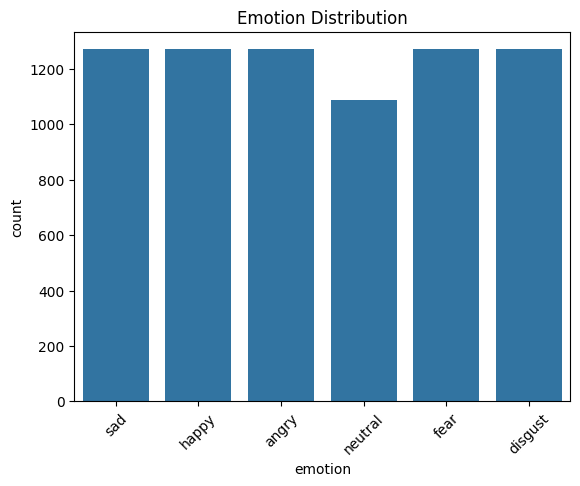

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='emotion', data=df)
plt.title('Emotion Distribution')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import librosa
import numpy as np
from tqdm import tqdm

def extract_features(file_path, n_mfcc=40, max_len=130):
    try:
        audio, sr = librosa.load(file_path, res_type='kaiser_fast', sr=22050)
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
        # Pad or truncate
        if mfccs.shape[1] < max_len:
            pad_width = max_len - mfccs.shape[1]
            mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfccs = mfccs[:, :max_len]
        return mfccs
    except Exception as e:
        print(f"Error: {file_path}", e)
        return None

X = []
y = []

label_to_index = {emotion: i for i, emotion in enumerate(df['emotion'].unique())}

for i, row in tqdm(df.iterrows(), total=len(df)):
    features = extract_features(row['path'])
    if features is not None:
        X.append(features)
        y.append(label_to_index[row['emotion']])


  0%|          | 1/7442 [00:15<32:20:57, 15.65s/it]

Error: /content/drive/MyDrive/AudioWAV/1080_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 2/7442 [00:15<13:41:09,  6.62s/it]

Error: /content/drive/MyDrive/AudioWAV/1079_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 3/7442 [00:16<7:44:47,  3.75s/it] 

Error: /content/drive/MyDrive/AudioWAV/1079_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 4/7442 [00:16<5:09:57,  2.50s/it]

Error: /content/drive/MyDrive/AudioWAV/1080_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 5/7442 [00:17<3:32:33,  1.71s/it]

Error: /content/drive/MyDrive/AudioWAV/1079_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 6/7442 [00:17<2:30:57,  1.22s/it]

Error: /content/drive/MyDrive/AudioWAV/1079_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 7/7442 [00:17<1:53:19,  1.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 8/7442 [00:18<1:31:23,  1.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 9/7442 [00:18<1:20:52,  1.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 10/7442 [00:18<1:09:29,  1.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 11/7442 [00:19<1:04:05,  1.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 12/7442 [00:19<58:36,  2.11it/s]  

Error: /content/drive/MyDrive/AudioWAV/1079_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 13/7442 [00:20<52:44,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 14/7442 [00:20<48:06,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 15/7442 [00:20<44:06,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 16/7442 [00:20<41:33,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 17/7442 [00:21<59:14,  2.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 18/7442 [00:22<53:09,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 19/7442 [00:23<1:19:11,  1.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 20/7442 [00:23<1:04:44,  1.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 21/7442 [00:23<1:00:26,  2.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 22/7442 [00:24<51:09,  2.42it/s]  

Error: /content/drive/MyDrive/AudioWAV/1079_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 23/7442 [00:24<52:11,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 24/7442 [00:24<50:33,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 25/7442 [00:25<45:52,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 26/7442 [00:25<54:00,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 27/7442 [00:26<47:27,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 28/7442 [00:26<42:33,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 29/7442 [00:26<48:22,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 30/7442 [00:27<47:27,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 31/7442 [00:27<47:43,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 32/7442 [00:27<44:39,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 33/7442 [00:28<42:35,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 34/7442 [00:28<48:23,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 35/7442 [00:29<52:31,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 36/7442 [00:29<47:57,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  0%|          | 37/7442 [00:29<44:04,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 38/7442 [00:29<40:22,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 39/7442 [00:30<37:34,  3.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 40/7442 [00:30<44:04,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 41/7442 [00:31<43:17,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 42/7442 [00:31<48:48,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 43/7442 [00:32<54:29,  2.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 44/7442 [00:32<53:25,  2.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 45/7442 [00:32<46:56,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 46/7442 [00:33<43:47,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 47/7442 [00:33<39:40,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 48/7442 [00:33<37:51,  3.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 49/7442 [00:33<36:16,  3.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 50/7442 [00:34<40:40,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 51/7442 [00:34<39:13,  3.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 52/7442 [00:34<38:20,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 53/7442 [00:35<45:50,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 54/7442 [00:35<42:25,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 55/7442 [00:36<45:28,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 56/7442 [00:36<49:07,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 57/7442 [00:37<54:07,  2.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 58/7442 [00:37<58:13,  2.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 59/7442 [00:38<58:53,  2.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 60/7442 [00:38<55:57,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 61/7442 [00:38<54:27,  2.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 62/7442 [00:39<49:01,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 63/7442 [00:39<43:09,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 64/7442 [00:39<39:47,  3.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 65/7442 [00:40<39:21,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 66/7442 [00:41<1:09:42,  1.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 67/7442 [00:41<1:04:20,  1.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 68/7442 [00:42<1:03:52,  1.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 69/7442 [00:42<1:00:11,  2.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 70/7442 [00:42<57:32,  2.13it/s]  

Error: /content/drive/MyDrive/AudioWAV/1080_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 71/7442 [00:43<48:06,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 72/7442 [00:43<43:35,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 73/7442 [00:43<38:45,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 74/7442 [00:43<37:05,  3.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 75/7442 [00:44<45:46,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 76/7442 [00:44<46:34,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 77/7442 [00:45<42:58,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 78/7442 [00:45<40:22,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 79/7442 [00:45<43:16,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 80/7442 [00:46<46:55,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 81/7442 [00:46<43:01,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 82/7442 [00:46<39:47,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 83/7442 [00:47<36:23,  3.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 84/7442 [00:47<42:25,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 85/7442 [00:47<40:07,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 86/7442 [00:48<42:06,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 87/7442 [00:48<46:48,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 88/7442 [00:49<46:18,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 89/7442 [00:49<48:25,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 90/7442 [00:49<50:38,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 91/7442 [00:50<46:28,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 92/7442 [00:50<49:42,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|          | 93/7442 [00:50<46:03,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 94/7442 [00:51<40:28,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 95/7442 [00:51<37:23,  3.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 96/7442 [00:51<42:09,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 97/7442 [00:52<43:49,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 98/7442 [00:52<39:03,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 99/7442 [00:52<43:32,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 100/7442 [00:53<47:02,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 101/7442 [00:53<51:27,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 102/7442 [00:54<45:55,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 103/7442 [00:54<39:50,  3.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 104/7442 [00:54<46:13,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 105/7442 [00:55<49:53,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 106/7442 [00:55<45:43,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 108/7442 [00:56<35:40,  3.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1081_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 109/7442 [00:56<40:24,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 110/7442 [00:56<44:53,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  1%|▏         | 111/7442 [00:57<40:56,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 112/7442 [00:58<1:09:12,  1.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 113/7442 [00:58<1:04:11,  1.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 114/7442 [00:59<57:24,  2.13it/s]  

Error: /content/drive/MyDrive/AudioWAV/1081_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 115/7442 [00:59<56:36,  2.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 116/7442 [00:59<49:14,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 117/7442 [01:00<52:01,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 118/7442 [01:00<50:27,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 119/7442 [01:01<51:54,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 120/7442 [01:01<44:25,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 121/7442 [01:01<46:12,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 122/7442 [01:02<43:21,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 123/7442 [01:02<38:26,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 124/7442 [01:02<36:03,  3.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 125/7442 [01:02<40:24,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 126/7442 [01:03<39:39,  3.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 127/7442 [01:03<39:22,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 128/7442 [01:04<47:59,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 129/7442 [01:04<50:15,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 130/7442 [01:04<50:09,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 131/7442 [01:08<2:39:23,  1.31s/it]

Error: /content/drive/MyDrive/AudioWAV/1081_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 132/7442 [01:08<2:02:31,  1.01s/it]

Error: /content/drive/MyDrive/AudioWAV/1081_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 133/7442 [01:09<1:43:34,  1.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 134/7442 [01:09<1:30:03,  1.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 135/7442 [01:10<1:18:09,  1.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 136/7442 [01:10<1:03:29,  1.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 137/7442 [01:10<54:39,  2.23it/s]  

Error: /content/drive/MyDrive/AudioWAV/1081_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 138/7442 [01:10<52:02,  2.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 139/7442 [01:11<54:06,  2.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 140/7442 [01:11<52:43,  2.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 141/7442 [01:12<44:51,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 142/7442 [01:12<48:18,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 143/7442 [01:13<1:17:04,  1.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 144/7442 [01:14<1:07:51,  1.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 145/7442 [01:14<1:03:25,  1.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 146/7442 [01:15<1:01:54,  1.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 147/7442 [01:15<50:59,  2.38it/s]  

Error: /content/drive/MyDrive/AudioWAV/1081_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 148/7442 [01:15<48:05,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 149/7442 [01:16<50:20,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 150/7442 [01:16<47:40,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 151/7442 [01:16<43:23,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 152/7442 [01:17<47:59,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 153/7442 [01:17<44:05,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 154/7442 [01:17<45:52,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 155/7442 [01:18<50:32,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 156/7442 [01:18<52:23,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 157/7442 [01:19<54:19,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 158/7442 [01:19<46:54,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 159/7442 [01:19<44:11,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 160/7442 [01:20<40:20,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 161/7442 [01:20<40:54,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 162/7442 [01:20<40:45,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 163/7442 [01:21<42:21,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 164/7442 [01:21<38:06,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 165/7442 [01:21<35:43,  3.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 166/7442 [01:21<35:54,  3.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 167/7442 [01:22<37:39,  3.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 168/7442 [01:22<43:58,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 169/7442 [01:23<1:05:41,  1.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 170/7442 [01:24<1:03:30,  1.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 171/7442 [01:24<1:03:21,  1.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 172/7442 [01:25<56:49,  2.13it/s]  

Error: /content/drive/MyDrive/AudioWAV/1081_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 173/7442 [01:25<55:59,  2.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 174/7442 [01:25<50:46,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 175/7442 [01:26<57:07,  2.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 176/7442 [01:26<58:23,  2.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 177/7442 [01:28<1:22:58,  1.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 178/7442 [01:28<1:14:16,  1.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 179/7442 [01:28<1:05:58,  1.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 180/7442 [01:29<56:53,  2.13it/s]  

Error: /content/drive/MyDrive/AudioWAV/1082_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 181/7442 [01:29<55:17,  2.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 182/7442 [01:30<55:37,  2.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 183/7442 [01:30<47:46,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 184/7442 [01:30<46:59,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 185/7442 [01:31<47:32,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  2%|▏         | 186/7442 [01:31<45:11,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 187/7442 [01:31<42:08,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 188/7442 [01:32<47:34,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 189/7442 [01:32<46:18,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 190/7442 [01:33<52:10,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 191/7442 [01:33<52:50,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 192/7442 [01:33<47:57,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1081_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 193/7442 [01:34<46:11,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 194/7442 [01:34<49:35,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 195/7442 [01:35<47:11,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 196/7442 [01:35<45:12,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 197/7442 [01:35<44:14,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 198/7442 [01:36<48:01,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 199/7442 [01:36<44:49,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 200/7442 [01:37<47:58,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 201/7442 [01:37<44:39,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 202/7442 [01:37<50:56,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 203/7442 [01:38<52:22,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 204/7442 [01:38<54:09,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 205/7442 [01:39<55:12,  2.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 206/7442 [01:39<50:04,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 207/7442 [01:39<48:37,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 208/7442 [01:40<45:08,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 209/7442 [01:40<40:33,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 210/7442 [01:40<44:32,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 211/7442 [01:41<40:53,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 212/7442 [01:41<38:37,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 213/7442 [01:41<39:28,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 214/7442 [01:42<41:12,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 215/7442 [01:42<43:01,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 216/7442 [01:43<55:19,  2.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 217/7442 [01:43<54:06,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 218/7442 [01:44<56:07,  2.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 219/7442 [01:44<51:19,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 220/7442 [01:45<51:54,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 221/7442 [01:45<56:33,  2.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 222/7442 [01:46<53:49,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 223/7442 [01:46<49:46,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 224/7442 [01:46<49:25,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 225/7442 [01:47<47:05,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 226/7442 [01:47<49:59,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 227/7442 [01:47<43:53,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 228/7442 [01:48<49:17,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 229/7442 [01:48<54:21,  2.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 230/7442 [01:49<55:44,  2.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 231/7442 [01:50<1:21:20,  1.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 232/7442 [01:50<1:09:12,  1.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 233/7442 [01:51<57:05,  2.10it/s]  

Error: /content/drive/MyDrive/AudioWAV/1082_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 234/7442 [01:51<59:50,  2.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 235/7442 [01:52<1:01:49,  1.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 236/7442 [01:52<1:00:36,  1.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 237/7442 [01:53<1:03:26,  1.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 238/7442 [01:53<55:24,  2.17it/s]  

Error: /content/drive/MyDrive/AudioWAV/1082_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 239/7442 [01:54<55:22,  2.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 240/7442 [01:54<50:50,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 241/7442 [01:54<54:49,  2.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 242/7442 [01:55<52:31,  2.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 243/7442 [01:55<46:42,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 244/7442 [01:55<45:49,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 245/7442 [01:56<41:47,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 246/7442 [01:56<40:54,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 247/7442 [01:57<46:00,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 248/7442 [01:57<49:54,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 249/7442 [01:58<56:39,  2.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 250/7442 [01:58<49:27,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 251/7442 [01:58<46:13,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 252/7442 [01:59<47:07,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 253/7442 [01:59<45:19,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 254/7442 [01:59<44:53,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 255/7442 [02:00<46:03,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 256/7442 [02:00<45:40,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 257/7442 [02:00<42:20,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 258/7442 [02:01<43:28,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 259/7442 [02:01<41:37,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  3%|▎         | 260/7442 [02:02<45:29,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 261/7442 [02:02<40:05,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 262/7442 [02:03<55:39,  2.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 263/7442 [02:03<56:14,  2.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 264/7442 [02:03<53:34,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 265/7442 [02:04<46:40,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 266/7442 [02:04<43:57,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1082_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 267/7442 [02:05<48:08,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 268/7442 [02:05<41:43,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 269/7442 [02:05<38:02,  3.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 270/7442 [02:05<43:53,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 271/7442 [02:06<41:15,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 272/7442 [02:06<39:14,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 273/7442 [02:06<36:55,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 274/7442 [02:07<45:25,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 275/7442 [02:07<44:39,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 276/7442 [02:08<56:40,  2.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 277/7442 [02:08<52:09,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 278/7442 [02:09<48:48,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▎         | 279/7442 [02:09<49:45,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 280/7442 [02:10<1:05:39,  1.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 281/7442 [02:10<55:15,  2.16it/s]  

Error: /content/drive/MyDrive/AudioWAV/1083_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 282/7442 [02:11<1:04:58,  1.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 283/7442 [02:12<1:12:32,  1.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 284/7442 [02:12<1:01:06,  1.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 285/7442 [02:12<51:42,  2.31it/s]  

Error: /content/drive/MyDrive/AudioWAV/1083_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 286/7442 [02:12<44:54,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 287/7442 [02:13<40:57,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 288/7442 [02:13<44:19,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 289/7442 [02:13<39:59,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 290/7442 [02:14<37:07,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 291/7442 [02:14<34:19,  3.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 292/7442 [02:14<41:41,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 293/7442 [02:15<36:42,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 294/7442 [02:15<35:45,  3.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 295/7442 [02:15<37:24,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 296/7442 [02:15<35:56,  3.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 297/7442 [02:16<35:05,  3.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 298/7442 [02:16<35:36,  3.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 299/7442 [02:16<33:00,  3.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 300/7442 [02:17<31:46,  3.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 301/7442 [02:17<35:25,  3.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 302/7442 [02:17<32:43,  3.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 303/7442 [02:18<47:23,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 304/7442 [02:18<42:49,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 305/7442 [02:18<38:53,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 306/7442 [02:19<36:43,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 307/7442 [02:19<35:24,  3.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 308/7442 [02:20<58:08,  2.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 309/7442 [02:20<48:48,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 310/7442 [02:20<49:38,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 311/7442 [02:21<45:59,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 312/7442 [02:21<40:38,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 313/7442 [02:22<46:07,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 314/7442 [02:22<42:24,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 315/7442 [02:22<49:42,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 316/7442 [02:23<53:53,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 317/7442 [02:23<57:53,  2.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 318/7442 [02:24<53:19,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 319/7442 [02:24<48:59,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 320/7442 [02:25<50:44,  2.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 321/7442 [02:25<51:44,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 322/7442 [02:25<49:16,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 323/7442 [02:26<52:12,  2.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 324/7442 [02:26<49:27,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 325/7442 [02:27<44:36,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 326/7442 [02:27<39:38,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 327/7442 [02:27<40:30,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 328/7442 [02:28<43:40,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 329/7442 [02:28<46:06,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 330/7442 [02:28<43:50,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 331/7442 [02:29<44:23,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 332/7442 [02:29<40:26,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 333/7442 [02:29<39:01,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  4%|▍         | 334/7442 [02:30<41:02,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 335/7442 [02:30<44:20,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 336/7442 [02:30<39:12,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 337/7442 [02:31<36:52,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 338/7442 [02:31<38:09,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 339/7442 [02:31<41:38,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 340/7442 [02:32<37:57,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 341/7442 [02:32<33:59,  3.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 342/7442 [02:32<34:11,  3.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 343/7442 [02:32<33:58,  3.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 344/7442 [02:35<2:02:02,  1.03s/it]

Error: /content/drive/MyDrive/AudioWAV/1084_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 345/7442 [02:35<1:34:11,  1.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 346/7442 [02:36<1:19:29,  1.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 347/7442 [02:36<1:17:01,  1.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 348/7442 [02:37<1:05:18,  1.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 349/7442 [02:37<1:02:29,  1.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1083_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 350/7442 [02:38<57:31,  2.05it/s]  

Error: /content/drive/MyDrive/AudioWAV/1083_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 351/7442 [02:38<48:49,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 352/7442 [02:38<42:50,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 353/7442 [02:38<40:06,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 354/7442 [02:39<42:37,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 355/7442 [02:39<49:11,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 356/7442 [02:40<44:28,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 357/7442 [02:40<46:19,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 358/7442 [02:40<42:04,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 359/7442 [02:41<50:13,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 360/7442 [02:41<49:26,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 361/7442 [02:42<43:56,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 362/7442 [02:42<39:41,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 363/7442 [02:42<35:12,  3.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 364/7442 [02:43<42:22,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 365/7442 [02:43<39:36,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 366/7442 [02:43<36:53,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 367/7442 [02:43<35:31,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 368/7442 [02:44<43:59,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 369/7442 [02:44<42:18,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 370/7442 [02:45<40:19,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 371/7442 [02:45<41:59,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▍         | 372/7442 [02:45<38:48,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 373/7442 [02:45<36:38,  3.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 374/7442 [02:46<35:37,  3.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 375/7442 [02:46<40:53,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 376/7442 [02:46<37:20,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 377/7442 [02:47<53:42,  2.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 378/7442 [02:47<45:11,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 379/7442 [02:48<40:15,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 380/7442 [02:48<45:17,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 381/7442 [02:48<42:08,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 382/7442 [02:49<41:10,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 383/7442 [02:49<41:58,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 384/7442 [02:50<52:49,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 385/7442 [02:50<46:21,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 386/7442 [02:51<52:43,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 387/7442 [02:51<46:48,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 388/7442 [02:51<41:12,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 389/7442 [02:55<2:32:04,  1.29s/it]

Error: /content/drive/MyDrive/AudioWAV/1084_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 390/7442 [02:55<1:58:45,  1.01s/it]

Error: /content/drive/MyDrive/AudioWAV/1084_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 391/7442 [02:55<1:36:42,  1.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 392/7442 [02:56<1:22:11,  1.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 393/7442 [02:56<1:14:37,  1.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 394/7442 [02:57<1:01:49,  1.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 395/7442 [02:57<51:45,  2.27it/s]  

Error: /content/drive/MyDrive/AudioWAV/1084_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 396/7442 [02:57<46:35,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 397/7442 [02:57<42:55,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 398/7442 [02:58<52:39,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 399/7442 [02:58<46:16,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 400/7442 [02:59<40:57,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 401/7442 [02:59<37:52,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 402/7442 [02:59<35:06,  3.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 403/7442 [02:59<32:05,  3.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 404/7442 [03:00<30:27,  3.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 405/7442 [03:00<36:21,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 406/7442 [03:00<34:33,  3.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 407/7442 [03:00<32:49,  3.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 408/7442 [03:01<30:53,  3.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  5%|▌         | 409/7442 [03:01<30:14,  3.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 410/7442 [03:01<31:03,  3.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 411/7442 [03:01<29:52,  3.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 412/7442 [03:02<29:31,  3.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 413/7442 [03:02<31:56,  3.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 414/7442 [03:02<32:29,  3.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 415/7442 [03:03<38:28,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 416/7442 [03:03<42:12,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 417/7442 [03:03<39:31,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 418/7442 [03:04<43:45,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 419/7442 [03:04<39:30,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 420/7442 [03:04<36:13,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 421/7442 [03:05<36:29,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 422/7442 [03:05<35:00,  3.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 423/7442 [03:05<41:12,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 424/7442 [03:06<44:29,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 425/7442 [03:06<41:36,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 426/7442 [03:07<41:28,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 427/7442 [03:07<38:13,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 428/7442 [03:07<43:22,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 429/7442 [03:08<57:43,  2.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 430/7442 [03:08<52:13,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 431/7442 [03:09<47:43,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 432/7442 [03:09<43:23,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1084_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 433/7442 [03:10<49:20,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 434/7442 [03:10<56:14,  2.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 435/7442 [03:11<52:01,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 436/7442 [03:11<44:49,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 437/7442 [03:11<45:05,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 438/7442 [03:11<40:37,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 439/7442 [03:12<45:39,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 440/7442 [03:12<39:54,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 441/7442 [03:12<38:26,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 442/7442 [03:13<39:20,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 443/7442 [03:13<40:08,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 444/7442 [03:13<36:35,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 445/7442 [03:14<41:22,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 446/7442 [03:14<43:09,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 447/7442 [03:15<40:20,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 448/7442 [03:15<47:19,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 449/7442 [03:15<40:46,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 450/7442 [03:16<40:43,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 451/7442 [03:16<45:40,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 452/7442 [03:17<44:25,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 453/7442 [03:17<48:17,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 454/7442 [03:17<41:39,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 455/7442 [03:18<39:24,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 456/7442 [03:18<39:03,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 457/7442 [03:18<39:28,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 458/7442 [03:19<37:48,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 459/7442 [03:19<37:46,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 460/7442 [03:19<37:38,  3.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 461/7442 [03:19<33:53,  3.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 462/7442 [03:20<40:34,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 463/7442 [03:20<36:26,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 464/7442 [03:21<40:21,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▌         | 465/7442 [03:21<37:20,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 466/7442 [03:21<36:07,  3.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 467/7442 [03:21<37:26,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 468/7442 [03:22<41:19,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 469/7442 [03:22<41:03,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 470/7442 [03:23<42:02,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 471/7442 [03:23<37:21,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 472/7442 [03:23<40:35,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 473/7442 [03:24<41:12,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 474/7442 [03:24<39:49,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 475/7442 [03:24<36:21,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 476/7442 [03:24<33:25,  3.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 477/7442 [03:25<41:53,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 478/7442 [03:25<41:29,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 479/7442 [03:26<43:54,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 480/7442 [03:26<40:10,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 481/7442 [03:26<36:16,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 482/7442 [03:27<41:41,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  6%|▋         | 483/7442 [03:27<38:13,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 484/7442 [03:27<38:25,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 485/7442 [03:28<37:20,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 486/7442 [03:28<35:41,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 487/7442 [03:28<38:17,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 488/7442 [03:29<43:05,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 489/7442 [03:29<38:50,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 490/7442 [03:29<41:44,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 491/7442 [03:30<39:11,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 492/7442 [03:30<40:15,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 493/7442 [03:30<43:46,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 494/7442 [03:31<43:50,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 495/7442 [03:31<38:26,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 496/7442 [03:31<36:43,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 497/7442 [03:32<38:03,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 498/7442 [03:32<42:20,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 499/7442 [03:33<46:10,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 500/7442 [03:33<45:00,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 501/7442 [03:33<47:44,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 502/7442 [03:34<45:45,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 503/7442 [03:36<1:33:01,  1.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 504/7442 [03:36<1:13:34,  1.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 505/7442 [03:36<1:08:21,  1.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 506/7442 [03:37<1:04:17,  1.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 507/7442 [03:37<57:56,  2.00it/s]  

Error: /content/drive/MyDrive/AudioWAV/1086_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 508/7442 [03:38<56:22,  2.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 509/7442 [03:38<54:00,  2.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 510/7442 [03:38<54:02,  2.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 511/7442 [03:39<50:26,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 512/7442 [03:39<51:32,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 513/7442 [03:40<50:30,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 514/7442 [03:40<51:51,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 515/7442 [03:41<49:47,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1085_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 516/7442 [03:41<51:55,  2.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 517/7442 [03:41<45:09,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 518/7442 [03:43<1:28:30,  1.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 519/7442 [03:43<1:10:22,  1.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 520/7442 [03:44<1:02:26,  1.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 521/7442 [03:44<52:59,  2.18it/s]  

Error: /content/drive/MyDrive/AudioWAV/1086_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 522/7442 [03:44<45:11,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 523/7442 [03:45<49:32,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 524/7442 [03:45<43:40,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 525/7442 [03:45<47:36,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 526/7442 [03:46<41:08,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 527/7442 [03:46<37:48,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 528/7442 [03:46<39:47,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 529/7442 [03:46<35:16,  3.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 530/7442 [03:47<33:38,  3.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 531/7442 [03:47<44:44,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 532/7442 [03:48<55:57,  2.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 533/7442 [03:48<47:32,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 534/7442 [03:49<43:19,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 535/7442 [03:49<45:30,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 536/7442 [03:49<46:44,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 537/7442 [03:50<43:06,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 538/7442 [03:50<49:52,  2.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 539/7442 [03:51<52:08,  2.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 540/7442 [03:51<52:45,  2.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 541/7442 [03:52<45:25,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 542/7442 [03:52<40:23,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 543/7442 [03:52<35:43,  3.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 544/7442 [03:52<33:12,  3.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 545/7442 [03:53<32:27,  3.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 546/7442 [03:53<36:29,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 547/7442 [03:53<42:15,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 548/7442 [03:54<37:58,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 549/7442 [03:54<41:15,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 550/7442 [03:54<42:23,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 551/7442 [03:55<40:36,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 552/7442 [03:55<36:37,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 553/7442 [03:56<41:51,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 554/7442 [03:56<37:59,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 555/7442 [03:56<34:49,  3.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 556/7442 [03:56<33:52,  3.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 557/7442 [03:57<38:42,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  7%|▋         | 558/7442 [03:57<36:00,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 559/7442 [03:57<34:26,  3.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 560/7442 [03:58<35:27,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 561/7442 [03:58<33:12,  3.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 562/7442 [03:58<37:20,  3.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 563/7442 [03:59<41:10,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 564/7442 [03:59<41:09,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 565/7442 [04:00<1:16:44,  1.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 566/7442 [04:01<1:21:02,  1.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 567/7442 [04:02<1:07:43,  1.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 568/7442 [04:02<56:37,  2.02it/s]  

Error: /content/drive/MyDrive/AudioWAV/1086_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 569/7442 [04:02<47:55,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 570/7442 [04:02<41:26,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 571/7442 [04:04<1:32:20,  1.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 572/7442 [04:04<1:13:05,  1.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 573/7442 [04:05<1:05:27,  1.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 574/7442 [04:05<55:13,  2.07it/s]  

Error: /content/drive/MyDrive/AudioWAV/1086_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 575/7442 [04:05<51:14,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 576/7442 [04:07<1:15:36,  1.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 577/7442 [04:07<1:06:08,  1.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 578/7442 [04:07<53:46,  2.13it/s]  

Error: /content/drive/MyDrive/AudioWAV/1086_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 579/7442 [04:08<49:04,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 580/7442 [04:08<51:51,  2.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 581/7442 [04:08<46:33,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 582/7442 [04:09<42:22,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 583/7442 [04:09<40:05,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 584/7442 [04:09<37:00,  3.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 585/7442 [04:10<39:16,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 586/7442 [04:10<43:54,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 587/7442 [04:11<49:15,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 588/7442 [04:11<48:16,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 589/7442 [04:12<51:52,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 590/7442 [04:12<51:15,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 591/7442 [04:15<2:10:03,  1.14s/it]

Error: /content/drive/MyDrive/AudioWAV/1087_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 592/7442 [04:15<1:47:26,  1.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 593/7442 [04:16<1:31:52,  1.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 594/7442 [04:16<1:12:54,  1.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 595/7442 [04:16<1:07:40,  1.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 596/7442 [04:17<1:02:14,  1.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 597/7442 [04:17<54:02,  2.11it/s]  

Error: /content/drive/MyDrive/AudioWAV/1087_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 598/7442 [04:18<51:07,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 599/7442 [04:18<48:23,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 600/7442 [04:18<51:25,  2.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 601/7442 [04:19<44:45,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 602/7442 [04:19<50:13,  2.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 603/7442 [04:19<43:41,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1086_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 604/7442 [04:21<1:15:22,  1.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 605/7442 [04:21<1:03:09,  1.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 606/7442 [04:22<58:48,  1.94it/s]  

Error: /content/drive/MyDrive/AudioWAV/1087_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 607/7442 [04:22<55:30,  2.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 608/7442 [04:23<1:10:49,  1.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 609/7442 [04:23<1:04:58,  1.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 610/7442 [04:24<59:00,  1.93it/s]  

Error: /content/drive/MyDrive/AudioWAV/1087_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 611/7442 [04:24<54:29,  2.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 612/7442 [04:24<51:51,  2.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 613/7442 [04:25<51:39,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 614/7442 [04:25<44:53,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 615/7442 [04:26<46:06,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 616/7442 [04:29<2:27:16,  1.29s/it]

Error: /content/drive/MyDrive/AudioWAV/1087_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 617/7442 [04:30<2:02:16,  1.07s/it]

Error: /content/drive/MyDrive/AudioWAV/1087_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 618/7442 [04:30<1:34:01,  1.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 619/7442 [04:30<1:16:58,  1.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 620/7442 [04:30<1:04:00,  1.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 621/7442 [04:31<59:56,  1.90it/s]  

Error: /content/drive/MyDrive/AudioWAV/1087_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 622/7442 [04:31<57:57,  1.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 623/7442 [04:32<50:21,  2.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 624/7442 [04:32<44:14,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 625/7442 [04:32<44:36,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 626/7442 [04:33<47:43,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 627/7442 [04:33<41:20,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 628/7442 [04:34<46:31,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 629/7442 [04:34<1:00:21,  1.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 630/7442 [04:35<55:48,  2.03it/s]  

Error: /content/drive/MyDrive/AudioWAV/1087_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 631/7442 [04:35<49:37,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  8%|▊         | 632/7442 [04:35<47:44,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 633/7442 [04:36<43:09,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 634/7442 [04:36<38:02,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 635/7442 [04:36<44:03,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 636/7442 [04:37<39:59,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 637/7442 [04:37<37:23,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 638/7442 [04:37<33:25,  3.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 639/7442 [04:38<39:15,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 640/7442 [04:38<38:10,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 641/7442 [04:38<34:45,  3.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 642/7442 [04:38<31:31,  3.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 643/7442 [04:39<32:34,  3.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 644/7442 [04:39<32:34,  3.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 645/7442 [04:39<36:42,  3.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 646/7442 [04:40<41:38,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 647/7442 [04:40<37:04,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 648/7442 [04:40<36:29,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 649/7442 [04:41<47:59,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 650/7442 [04:42<49:38,  2.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▊         | 651/7442 [04:42<43:36,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 652/7442 [04:42<40:34,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 653/7442 [04:42<38:25,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 654/7442 [04:43<40:27,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 655/7442 [04:43<41:18,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 656/7442 [04:44<38:56,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 657/7442 [04:44<38:01,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 658/7442 [04:44<44:25,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 659/7442 [04:45<47:20,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 660/7442 [04:47<1:37:17,  1.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 661/7442 [04:47<1:20:59,  1.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 662/7442 [04:48<1:19:30,  1.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 663/7442 [04:48<1:11:26,  1.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 664/7442 [04:49<1:01:11,  1.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 665/7442 [04:49<52:24,  2.15it/s]  

Error: /content/drive/MyDrive/AudioWAV/1087_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 666/7442 [04:49<44:20,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 667/7442 [04:50<47:38,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 668/7442 [04:50<46:31,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 669/7442 [04:50<40:22,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 670/7442 [04:51<42:37,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 671/7442 [04:51<44:17,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 672/7442 [04:51<39:59,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 673/7442 [04:52<35:05,  3.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 674/7442 [04:52<41:23,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 675/7442 [04:52<39:11,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1087_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 676/7442 [04:53<39:57,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 677/7442 [04:53<36:36,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 678/7442 [04:53<41:12,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 679/7442 [04:54<39:14,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 680/7442 [04:54<43:05,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 681/7442 [04:55<43:33,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 682/7442 [04:55<42:35,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 683/7442 [04:55<39:46,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 684/7442 [04:55<35:20,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 685/7442 [04:56<36:04,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 686/7442 [04:56<38:52,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 687/7442 [04:56<36:39,  3.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 688/7442 [04:57<42:49,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 689/7442 [04:57<39:19,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 690/7442 [04:58<36:10,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 691/7442 [04:58<40:25,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 692/7442 [04:58<44:05,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 693/7442 [04:59<47:42,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 694/7442 [04:59<40:47,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 695/7442 [04:59<36:44,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 696/7442 [05:00<34:46,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 697/7442 [05:00<40:05,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 698/7442 [05:01<40:18,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 699/7442 [05:01<51:19,  2.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 700/7442 [05:02<52:50,  2.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 701/7442 [05:02<48:28,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 702/7442 [05:02<44:12,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 703/7442 [05:03<45:51,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 704/7442 [05:03<40:17,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 705/7442 [05:03<42:03,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


  9%|▉         | 706/7442 [05:04<39:57,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 707/7442 [05:04<37:49,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 708/7442 [05:04<41:21,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 709/7442 [05:05<38:39,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 710/7442 [05:05<40:07,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 711/7442 [05:06<43:30,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 712/7442 [05:06<45:50,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 713/7442 [05:06<41:05,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 714/7442 [05:07<38:26,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 715/7442 [05:07<35:26,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 716/7442 [05:07<37:40,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 717/7442 [05:08<35:43,  3.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 718/7442 [05:08<44:22,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 719/7442 [05:09<52:49,  2.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 720/7442 [05:09<53:04,  2.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 721/7442 [05:10<47:33,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 722/7442 [05:10<47:29,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 723/7442 [05:10<42:03,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 724/7442 [05:11<45:06,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 725/7442 [05:11<47:50,  2.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 726/7442 [05:12<43:34,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 727/7442 [05:12<39:11,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 728/7442 [05:12<39:17,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 729/7442 [05:12<37:18,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 730/7442 [05:13<33:44,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 731/7442 [05:13<32:46,  3.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 732/7442 [05:13<33:17,  3.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 733/7442 [05:14<40:59,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 734/7442 [05:14<37:26,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 735/7442 [05:14<40:00,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 736/7442 [05:15<44:08,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 737/7442 [05:15<38:41,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 738/7442 [05:15<36:04,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 739/7442 [05:16<39:50,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 740/7442 [05:16<37:05,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 741/7442 [05:16<36:41,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 742/7442 [05:17<45:53,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 743/7442 [05:18<53:17,  2.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|▉         | 744/7442 [05:18<50:20,  2.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 745/7442 [05:18<46:00,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 746/7442 [05:19<42:21,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 747/7442 [05:19<36:42,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 748/7442 [05:19<34:51,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 749/7442 [05:20<41:01,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 750/7442 [05:20<43:29,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 751/7442 [05:20<38:59,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 752/7442 [05:21<38:13,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 753/7442 [05:21<36:13,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 754/7442 [05:21<40:33,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 755/7442 [05:22<37:37,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 756/7442 [05:22<35:48,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 757/7442 [05:22<36:33,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 758/7442 [05:23<35:48,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 759/7442 [05:23<39:23,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 760/7442 [05:23<35:31,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 761/7442 [05:24<32:03,  3.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 762/7442 [05:24<35:45,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 763/7442 [05:24<37:51,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 764/7442 [05:25<40:02,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 765/7442 [05:25<37:39,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 766/7442 [05:25<41:25,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 767/7442 [05:26<39:14,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 768/7442 [05:26<34:36,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 769/7442 [05:26<33:16,  3.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 770/7442 [05:27<38:19,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 771/7442 [05:27<34:20,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 772/7442 [05:27<37:18,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1088_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 773/7442 [05:28<44:19,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 774/7442 [05:28<45:42,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 775/7442 [05:29<45:58,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 776/7442 [05:29<42:07,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 777/7442 [05:29<37:30,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 778/7442 [05:29<34:19,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 779/7442 [05:30<32:14,  3.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 780/7442 [05:31<50:46,  2.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 10%|█         | 781/7442 [05:31<44:27,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 782/7442 [05:31<38:51,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 783/7442 [05:32<42:07,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 784/7442 [05:32<38:21,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 785/7442 [05:32<38:55,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 786/7442 [05:33<39:01,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 787/7442 [05:33<35:25,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 788/7442 [05:33<43:02,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 789/7442 [05:34<38:51,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 790/7442 [05:34<37:30,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 791/7442 [05:34<40:56,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 792/7442 [05:35<40:55,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 793/7442 [05:35<37:03,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 794/7442 [05:35<33:11,  3.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 795/7442 [05:35<31:45,  3.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 796/7442 [05:36<32:58,  3.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 797/7442 [05:36<39:10,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 798/7442 [05:36<35:34,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 799/7442 [05:37<36:35,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 800/7442 [05:37<35:00,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 801/7442 [05:37<33:03,  3.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 802/7442 [05:38<32:45,  3.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 803/7442 [05:38<41:42,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 804/7442 [05:38<37:29,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 805/7442 [05:39<41:23,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 806/7442 [05:39<37:11,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 807/7442 [05:39<36:20,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 808/7442 [05:40<40:28,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 809/7442 [05:40<41:23,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 810/7442 [05:41<38:47,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 811/7442 [05:41<44:48,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 812/7442 [05:41<39:31,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 813/7442 [05:42<39:09,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 814/7442 [05:42<34:46,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 815/7442 [05:42<39:00,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 816/7442 [05:43<44:01,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 817/7442 [05:43<39:36,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 818/7442 [05:44<38:12,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 819/7442 [05:44<41:08,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 820/7442 [05:44<37:38,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 821/7442 [05:44<35:37,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 822/7442 [05:45<36:33,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 823/7442 [05:45<39:45,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 824/7442 [05:46<37:10,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 825/7442 [05:46<40:56,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 826/7442 [05:47<47:32,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 827/7442 [05:47<45:56,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 828/7442 [05:47<42:29,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 829/7442 [05:48<43:26,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 830/7442 [05:48<46:34,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 831/7442 [05:49<45:19,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 832/7442 [05:49<45:57,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 833/7442 [05:49<39:55,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 834/7442 [05:49<35:16,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 835/7442 [05:50<39:28,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 836/7442 [05:50<37:39,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█         | 837/7442 [05:51<39:17,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 838/7442 [05:51<44:05,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 839/7442 [05:51<39:02,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1089_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 840/7442 [05:52<38:49,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 841/7442 [05:52<35:00,  3.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 842/7442 [05:52<31:51,  3.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 843/7442 [05:52<30:40,  3.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 844/7442 [05:53<36:16,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 845/7442 [05:53<32:48,  3.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 846/7442 [05:53<36:06,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 847/7442 [05:54<43:08,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 848/7442 [05:54<41:13,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 849/7442 [05:55<36:37,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 850/7442 [05:55<39:09,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 851/7442 [05:56<44:33,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 852/7442 [05:56<45:39,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 853/7442 [05:56<44:46,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 854/7442 [05:57<40:54,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 11%|█▏        | 855/7442 [05:57<43:45,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 856/7442 [05:58<1:04:17,  1.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 857/7442 [05:58<57:06,  1.92it/s]  

Error: /content/drive/MyDrive/AudioWAV/1090_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 858/7442 [05:59<48:33,  2.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 859/7442 [05:59<43:43,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 860/7442 [05:59<40:19,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 861/7442 [06:00<36:27,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 862/7442 [06:00<32:55,  3.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 863/7442 [06:00<34:33,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 864/7442 [06:01<38:07,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 865/7442 [06:01<36:58,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 866/7442 [06:01<35:05,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 867/7442 [06:02<50:18,  2.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 868/7442 [06:02<46:54,  2.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 869/7442 [06:03<39:41,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 870/7442 [06:03<37:17,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 871/7442 [06:03<34:18,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 872/7442 [06:04<40:11,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 873/7442 [06:04<37:50,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 874/7442 [06:04<40:25,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 875/7442 [06:05<41:08,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 876/7442 [06:05<37:13,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 877/7442 [06:05<40:42,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 878/7442 [06:06<36:22,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 879/7442 [06:06<34:03,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 880/7442 [06:06<32:21,  3.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 881/7442 [06:07<36:10,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 882/7442 [06:07<33:54,  3.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 883/7442 [06:07<31:40,  3.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 884/7442 [06:07<29:56,  3.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 885/7442 [06:08<38:11,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 886/7442 [06:08<44:13,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 887/7442 [06:09<46:47,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 888/7442 [06:09<44:11,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 889/7442 [06:10<46:31,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 890/7442 [06:11<1:09:18,  1.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 891/7442 [06:11<55:45,  1.96it/s]  

Error: /content/drive/MyDrive/AudioWAV/1090_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 892/7442 [06:11<46:17,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 893/7442 [06:12<42:44,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 894/7442 [06:12<40:14,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 895/7442 [06:12<39:57,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 896/7442 [06:13<41:57,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 897/7442 [06:13<40:02,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 898/7442 [06:13<35:33,  3.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 899/7442 [06:13<33:55,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 900/7442 [06:14<46:30,  2.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 901/7442 [06:15<43:05,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 902/7442 [06:15<38:42,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 903/7442 [06:15<36:57,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 904/7442 [06:15<38:14,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 905/7442 [06:16<34:49,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 906/7442 [06:16<33:30,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 907/7442 [06:16<35:35,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 908/7442 [06:17<39:44,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 909/7442 [06:17<47:24,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 910/7442 [06:18<48:24,  2.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 911/7442 [06:19<1:01:28,  1.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 912/7442 [06:19<51:07,  2.13it/s]  

Error: /content/drive/MyDrive/AudioWAV/1090_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 913/7442 [06:19<43:57,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 914/7442 [06:20<51:35,  2.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 915/7442 [06:20<43:45,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 916/7442 [06:20<38:30,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 917/7442 [06:22<1:08:20,  1.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 918/7442 [06:22<1:03:30,  1.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 919/7442 [06:22<55:27,  1.96it/s]  

Error: /content/drive/MyDrive/AudioWAV/1090_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 920/7442 [06:23<45:51,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1090_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 921/7442 [06:23<45:59,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 922/7442 [06:23<46:18,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 923/7442 [06:24<41:46,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 924/7442 [06:24<37:53,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 925/7442 [06:24<35:45,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 926/7442 [06:25<53:03,  2.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 927/7442 [06:26<53:16,  2.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 928/7442 [06:26<48:38,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 929/7442 [06:26<41:42,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 12%|█▏        | 930/7442 [06:27<40:25,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 931/7442 [06:27<35:31,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 932/7442 [06:27<36:08,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 933/7442 [06:27<34:19,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 934/7442 [06:28<41:39,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 935/7442 [06:28<37:04,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 936/7442 [06:29<36:14,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 937/7442 [06:29<38:03,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 939/7442 [06:30<33:39,  3.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1091_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 940/7442 [06:30<33:38,  3.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 941/7442 [06:30<30:52,  3.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 942/7442 [06:30<30:20,  3.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 943/7442 [06:31<30:13,  3.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 944/7442 [06:31<30:46,  3.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 945/7442 [06:31<28:28,  3.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 946/7442 [06:31<29:00,  3.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 947/7442 [06:32<27:35,  3.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 948/7442 [06:32<34:57,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 949/7442 [06:32<37:32,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 950/7442 [06:33<41:41,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 951/7442 [06:33<42:32,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 952/7442 [06:34<37:34,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 953/7442 [06:34<36:18,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 954/7442 [06:34<32:48,  3.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 955/7442 [06:34<33:01,  3.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 956/7442 [06:35<35:12,  3.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 957/7442 [06:35<32:38,  3.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 958/7442 [06:35<30:54,  3.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 959/7442 [06:36<29:09,  3.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 960/7442 [06:36<30:08,  3.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 961/7442 [06:36<30:19,  3.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 962/7442 [06:36<28:10,  3.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 963/7442 [06:37<28:43,  3.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 964/7442 [06:37<31:33,  3.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 965/7442 [06:37<29:39,  3.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 966/7442 [06:37<27:43,  3.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 967/7442 [06:38<27:25,  3.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 968/7442 [06:38<28:34,  3.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 969/7442 [06:38<29:59,  3.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 970/7442 [06:39<28:50,  3.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 971/7442 [06:39<28:37,  3.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 972/7442 [06:39<28:08,  3.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 973/7442 [06:39<34:04,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 974/7442 [06:40<35:26,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 975/7442 [06:40<38:45,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 976/7442 [06:41<34:41,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 977/7442 [06:41<36:38,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 978/7442 [06:41<34:23,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 979/7442 [06:41<32:51,  3.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 980/7442 [06:42<33:10,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 981/7442 [06:42<31:25,  3.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 982/7442 [06:42<29:02,  3.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 983/7442 [06:42<28:26,  3.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 984/7442 [06:43<30:46,  3.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 985/7442 [06:43<32:41,  3.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 986/7442 [06:43<31:26,  3.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 987/7442 [06:44<31:17,  3.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 988/7442 [06:44<28:56,  3.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 989/7442 [06:44<30:08,  3.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 990/7442 [06:45<29:39,  3.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 991/7442 [06:45<33:47,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 992/7442 [06:45<31:46,  3.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 993/7442 [06:45<30:59,  3.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 994/7442 [06:46<32:24,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 995/7442 [06:46<37:37,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 996/7442 [06:46<33:15,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 997/7442 [06:47<35:19,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 998/7442 [06:47<39:45,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 999/7442 [06:48<35:33,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1000/7442 [06:48<32:08,  3.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1091_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1001/7442 [06:48<31:04,  3.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1002/7442 [06:49<42:49,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1003/7442 [06:49<38:09,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 13%|█▎        | 1004/7442 [06:49<37:30,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1005/7442 [06:50<37:06,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1006/7442 [06:50<46:23,  2.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1007/7442 [06:51<41:38,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1008/7442 [06:51<36:45,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1009/7442 [06:51<33:05,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1010/7442 [06:51<30:26,  3.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1011/7442 [06:52<32:24,  3.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1012/7442 [06:52<30:52,  3.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1013/7442 [06:52<32:32,  3.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1014/7442 [06:52<33:26,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1015/7442 [06:53<35:34,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1016/7442 [06:53<41:32,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1017/7442 [06:54<35:59,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1018/7442 [06:54<39:25,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1019/7442 [06:54<39:01,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1020/7442 [06:55<36:17,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1021/7442 [06:55<33:18,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1022/7442 [06:55<31:04,  3.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▎        | 1023/7442 [06:55<30:02,  3.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1024/7442 [06:56<28:45,  3.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1025/7442 [06:56<28:33,  3.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1026/7442 [06:56<26:55,  3.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1027/7442 [06:56<26:34,  4.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1029/7442 [06:57<24:05,  4.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1068_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1030/7442 [06:57<25:09,  4.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1031/7442 [06:57<24:41,  4.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1032/7442 [06:58<26:54,  3.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1033/7442 [06:58<27:40,  3.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1034/7442 [06:58<27:53,  3.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1035/7442 [06:58<26:07,  4.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1036/7442 [06:59<29:17,  3.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1037/7442 [06:59<29:33,  3.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1038/7442 [06:59<28:02,  3.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1039/7442 [06:59<28:41,  3.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1040/7442 [07:00<27:01,  3.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1041/7442 [07:00<26:33,  4.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1042/7442 [07:00<29:12,  3.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1043/7442 [07:00<27:03,  3.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1044/7442 [07:01<35:46,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1045/7442 [07:01<38:08,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1046/7442 [07:02<37:37,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1047/7442 [07:02<34:41,  3.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1048/7442 [07:02<33:42,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1049/7442 [07:03<32:28,  3.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1050/7442 [07:03<30:20,  3.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1051/7442 [07:03<29:31,  3.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1052/7442 [07:03<27:19,  3.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1053/7442 [07:04<26:34,  4.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1054/7442 [07:04<26:38,  4.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1055/7442 [07:04<25:50,  4.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1056/7442 [07:04<29:41,  3.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1057/7442 [07:05<31:30,  3.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1058/7442 [07:05<33:26,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1059/7442 [07:05<32:46,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1060/7442 [07:06<29:43,  3.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1061/7442 [07:06<27:53,  3.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1062/7442 [07:06<26:43,  3.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1063/7442 [07:06<25:56,  4.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1064/7442 [07:07<29:57,  3.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1065/7442 [07:07<30:01,  3.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1066/7442 [07:07<28:29,  3.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1067/7442 [07:07<31:59,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1068/7442 [07:08<30:50,  3.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1069/7442 [07:08<30:35,  3.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1070/7442 [07:08<35:51,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1071/7442 [07:09<32:32,  3.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1072/7442 [07:09<30:19,  3.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1073/7442 [07:09<29:43,  3.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1074/7442 [07:10<31:43,  3.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1075/7442 [07:10<29:07,  3.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1076/7442 [07:10<28:56,  3.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1077/7442 [07:10<32:57,  3.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1078/7442 [07:11<41:17,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 14%|█▍        | 1079/7442 [07:11<35:39,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1080/7442 [07:11<32:02,  3.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1081/7442 [07:12<30:17,  3.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1082/7442 [07:12<29:49,  3.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1083/7442 [07:12<28:21,  3.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1084/7442 [07:12<28:43,  3.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1085/7442 [07:13<32:17,  3.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1086/7442 [07:13<29:12,  3.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1087/7442 [07:13<28:31,  3.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1088/7442 [07:14<34:22,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1089/7442 [07:14<32:43,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1090/7442 [07:14<30:23,  3.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1091/7442 [07:15<29:03,  3.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1092/7442 [07:15<27:43,  3.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1093/7442 [07:15<29:16,  3.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1094/7442 [07:15<27:50,  3.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1095/7442 [07:16<31:28,  3.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1096/7442 [07:16<32:12,  3.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1097/7442 [07:16<30:11,  3.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1098/7442 [07:17<29:08,  3.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1099/7442 [07:17<27:31,  3.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1100/7442 [07:17<26:53,  3.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1101/7442 [07:17<26:43,  3.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1102/7442 [07:17<25:58,  4.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1103/7442 [07:18<25:45,  4.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1104/7442 [07:18<25:45,  4.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1105/7442 [07:18<26:44,  3.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1106/7442 [07:18<26:03,  4.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1107/7442 [07:19<26:31,  3.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1108/7442 [07:19<25:43,  4.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1109/7442 [07:19<25:03,  4.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1110/7442 [07:19<25:03,  4.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1111/7442 [07:20<27:45,  3.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1112/7442 [07:20<26:22,  4.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1113/7442 [07:20<25:45,  4.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1114/7442 [07:20<25:20,  4.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1115/7442 [07:21<29:55,  3.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▍        | 1116/7442 [07:21<29:35,  3.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1117/7442 [07:21<28:21,  3.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1118/7442 [07:22<32:54,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1119/7442 [07:22<31:23,  3.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1120/7442 [07:22<32:11,  3.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1121/7442 [07:23<30:22,  3.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1122/7442 [07:23<33:43,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1123/7442 [07:23<31:55,  3.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1124/7442 [07:23<28:57,  3.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1125/7442 [07:24<29:49,  3.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1126/7442 [07:24<28:53,  3.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1127/7442 [07:25<37:07,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1128/7442 [07:25<35:44,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1129/7442 [07:25<39:06,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1130/7442 [07:26<35:00,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1131/7442 [07:26<33:44,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1132/7442 [07:26<31:02,  3.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1133/7442 [07:27<36:42,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1134/7442 [07:27<33:33,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1135/7442 [07:27<31:19,  3.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1136/7442 [07:27<35:17,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1137/7442 [07:28<41:43,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1068_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1138/7442 [07:29<50:59,  2.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1139/7442 [07:29<48:10,  2.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1140/7442 [07:30<48:27,  2.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1141/7442 [07:30<44:35,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1143/7442 [07:31<37:59,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1069_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1144/7442 [07:31<40:49,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1145/7442 [07:31<35:43,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1146/7442 [07:32<38:52,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1147/7442 [07:32<41:05,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1148/7442 [07:32<42:00,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1149/7442 [07:33<57:09,  1.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1150/7442 [07:34<55:28,  1.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1151/7442 [07:34<57:05,  1.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1152/7442 [07:35<55:01,  1.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 15%|█▌        | 1153/7442 [07:35<52:40,  1.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1154/7442 [07:36<45:57,  2.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1155/7442 [07:36<42:11,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1156/7442 [07:36<36:50,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1157/7442 [07:39<1:37:50,  1.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1158/7442 [07:39<1:16:05,  1.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1159/7442 [07:39<1:06:31,  1.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1160/7442 [07:39<53:55,  1.94it/s]  

Error: /content/drive/MyDrive/AudioWAV/1069_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1161/7442 [07:40<44:42,  2.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1162/7442 [07:40<41:09,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1163/7442 [07:40<42:59,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1164/7442 [07:41<36:43,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1165/7442 [07:41<42:11,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1166/7442 [07:41<36:51,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1167/7442 [07:42<36:26,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1168/7442 [07:42<43:06,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1169/7442 [07:43<38:34,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1170/7442 [07:43<49:10,  2.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1171/7442 [07:44<49:30,  2.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1172/7442 [07:44<43:52,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1173/7442 [07:45<47:23,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1174/7442 [07:45<40:32,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1175/7442 [07:45<40:16,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1176/7442 [07:46<39:43,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1177/7442 [07:46<43:08,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1178/7442 [07:46<39:12,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1179/7442 [07:47<33:47,  3.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1180/7442 [07:47<33:35,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1181/7442 [07:47<37:30,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1182/7442 [07:48<37:35,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1184/7442 [07:48<32:49,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1069_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1185/7442 [07:49<35:50,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1186/7442 [07:49<33:48,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1187/7442 [07:49<35:34,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1188/7442 [07:50<38:30,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1189/7442 [07:50<39:04,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1190/7442 [07:51<44:34,  2.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1191/7442 [07:51<50:23,  2.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1192/7442 [07:52<42:28,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1193/7442 [07:52<45:58,  2.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1194/7442 [07:52<45:12,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1195/7442 [07:53<44:03,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1196/7442 [07:53<40:33,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1197/7442 [07:53<36:34,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1198/7442 [07:54<35:31,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1199/7442 [07:54<38:16,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1200/7442 [07:55<40:14,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1201/7442 [07:55<41:26,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1202/7442 [07:55<39:37,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1203/7442 [07:56<35:11,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1204/7442 [07:56<33:15,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1205/7442 [07:57<47:53,  2.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1206/7442 [07:57<41:52,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1207/7442 [07:57<41:02,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1208/7442 [07:58<37:15,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▌        | 1209/7442 [07:59<57:30,  1.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1210/7442 [07:59<52:04,  1.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1069_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1211/7442 [07:59<50:54,  2.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1212/7442 [08:00<47:20,  2.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1213/7442 [08:00<42:31,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1214/7442 [08:01<41:54,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1215/7442 [08:01<45:13,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1216/7442 [08:01<40:31,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1217/7442 [08:02<42:48,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1218/7442 [08:02<43:28,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1219/7442 [08:03<43:15,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1220/7442 [08:03<41:47,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1221/7442 [08:03<36:35,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1222/7442 [08:03<34:09,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1223/7442 [08:04<36:04,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1224/7442 [08:04<36:21,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1225/7442 [08:04<33:26,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1226/7442 [08:05<33:07,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 16%|█▋        | 1227/7442 [08:05<32:20,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1228/7442 [08:05<33:36,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1229/7442 [08:06<30:51,  3.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1230/7442 [08:06<32:25,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1231/7442 [08:06<31:38,  3.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1232/7442 [08:07<40:28,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1233/7442 [08:07<35:37,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1234/7442 [08:07<32:52,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1235/7442 [08:08<35:54,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1236/7442 [08:08<31:34,  3.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1237/7442 [08:08<34:38,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1238/7442 [08:09<38:23,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1239/7442 [08:10<46:43,  2.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1240/7442 [08:10<41:04,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1241/7442 [08:10<43:14,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1242/7442 [08:11<42:29,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1243/7442 [08:11<36:49,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1244/7442 [08:11<38:52,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1245/7442 [08:12<36:47,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1246/7442 [08:12<34:55,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1247/7442 [08:12<35:40,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1248/7442 [08:13<40:51,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1249/7442 [08:13<35:51,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1250/7442 [08:14<54:17,  1.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1251/7442 [08:14<47:03,  2.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1252/7442 [08:15<45:57,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1253/7442 [08:16<1:13:53,  1.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1254/7442 [08:16<1:04:52,  1.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1255/7442 [08:17<53:47,  1.92it/s]  

Error: /content/drive/MyDrive/AudioWAV/1070_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1256/7442 [08:17<49:28,  2.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1257/7442 [08:18<48:00,  2.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1258/7442 [08:18<41:56,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1259/7442 [08:18<38:03,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1260/7442 [08:18<35:48,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1261/7442 [08:19<35:26,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1262/7442 [08:19<39:35,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1263/7442 [08:20<41:01,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1264/7442 [08:20<42:26,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1265/7442 [08:20<41:16,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1266/7442 [08:21<42:23,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1267/7442 [08:21<39:04,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1268/7442 [08:22<41:43,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1269/7442 [08:22<44:52,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1270/7442 [08:22<38:17,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1271/7442 [08:23<40:44,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1272/7442 [08:23<37:40,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1273/7442 [08:24<40:09,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1274/7442 [08:24<38:00,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1275/7442 [08:24<33:07,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1276/7442 [08:24<34:11,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1277/7442 [08:25<37:01,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1278/7442 [08:25<35:08,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1279/7442 [08:26<38:26,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1280/7442 [08:26<36:10,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1281/7442 [08:26<39:25,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1283/7442 [08:27<31:36,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1071_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1284/7442 [08:27<36:30,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1285/7442 [08:28<33:00,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1286/7442 [08:28<34:04,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1287/7442 [08:28<37:56,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1288/7442 [08:29<42:07,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1289/7442 [08:30<53:27,  1.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1290/7442 [08:30<51:52,  1.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1291/7442 [08:31<50:03,  2.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1070_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1292/7442 [08:31<45:50,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1293/7442 [08:31<38:55,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1294/7442 [08:32<1:03:14,  1.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1295/7442 [08:33<54:53,  1.87it/s]  

Error: /content/drive/MyDrive/AudioWAV/1071_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1296/7442 [08:33<52:01,  1.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1297/7442 [08:33<45:09,  2.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1298/7442 [08:34<51:02,  2.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1299/7442 [08:35<52:52,  1.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1300/7442 [08:35<44:00,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1301/7442 [08:35<42:52,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 17%|█▋        | 1302/7442 [08:36<38:15,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1303/7442 [08:36<34:58,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1304/7442 [08:36<38:00,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1305/7442 [08:37<36:38,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1306/7442 [08:37<33:24,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1307/7442 [08:37<36:14,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1308/7442 [08:38<35:23,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1309/7442 [08:38<35:27,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1310/7442 [08:38<32:47,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1311/7442 [08:38<30:32,  3.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1312/7442 [08:39<34:55,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1313/7442 [08:39<34:02,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1314/7442 [08:40<39:01,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1315/7442 [08:40<42:05,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1316/7442 [08:40<38:09,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1317/7442 [08:41<39:03,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1318/7442 [08:41<42:54,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1319/7442 [08:42<41:21,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1320/7442 [08:42<43:19,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1321/7442 [08:43<42:42,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1322/7442 [08:43<36:55,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1323/7442 [08:46<1:54:45,  1.13s/it]

Error: /content/drive/MyDrive/AudioWAV/1071_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1324/7442 [08:46<1:29:03,  1.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1325/7442 [08:46<1:14:22,  1.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1326/7442 [08:47<1:00:35,  1.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1327/7442 [08:47<53:55,  1.89it/s]  

Error: /content/drive/MyDrive/AudioWAV/1071_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1328/7442 [08:47<50:06,  2.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1329/7442 [08:48<54:56,  1.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1330/7442 [08:49<51:33,  1.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1331/7442 [08:49<48:10,  2.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1332/7442 [08:50<1:00:52,  1.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1333/7442 [08:50<56:12,  1.81it/s]  

Error: /content/drive/MyDrive/AudioWAV/1071_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1334/7442 [08:51<54:23,  1.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1335/7442 [08:51<47:01,  2.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1336/7442 [08:52<46:35,  2.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1337/7442 [08:52<47:31,  2.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1338/7442 [08:52<44:14,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1339/7442 [08:53<41:46,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1340/7442 [08:53<38:23,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1341/7442 [08:54<48:43,  2.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1342/7442 [08:54<44:18,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1343/7442 [08:54<42:52,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1344/7442 [08:55<43:40,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1345/7442 [08:55<45:59,  2.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1346/7442 [08:56<42:12,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1347/7442 [08:56<43:07,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1348/7442 [08:57<40:23,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1349/7442 [08:57<39:30,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1350/7442 [08:57<37:52,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1351/7442 [08:58<35:08,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1352/7442 [08:58<32:13,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1353/7442 [08:58<36:49,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1354/7442 [08:59<38:31,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1355/7442 [08:59<33:51,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1356/7442 [08:59<37:24,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1357/7442 [09:00<32:49,  3.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1358/7442 [09:00<30:30,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1359/7442 [09:01<43:34,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1360/7442 [09:01<47:13,  2.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1361/7442 [09:01<40:56,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1362/7442 [09:02<52:34,  1.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1363/7442 [09:02<48:14,  2.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1364/7442 [09:03<41:47,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1365/7442 [09:03<37:38,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1366/7442 [09:03<38:18,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1367/7442 [09:04<37:56,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1071_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1368/7442 [09:04<40:18,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1369/7442 [09:05<43:08,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1370/7442 [09:05<40:42,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1371/7442 [09:06<42:40,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1372/7442 [09:06<39:47,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1373/7442 [09:06<39:50,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1374/7442 [09:07<37:10,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1375/7442 [09:07<36:57,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 18%|█▊        | 1376/7442 [09:07<34:32,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1377/7442 [09:08<33:28,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1378/7442 [09:08<36:23,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1379/7442 [09:08<36:10,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1380/7442 [09:09<40:29,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1381/7442 [09:09<37:47,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1382/7442 [09:09<34:16,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1383/7442 [09:10<31:37,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1384/7442 [09:10<34:33,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1385/7442 [09:11<39:03,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1386/7442 [09:11<39:03,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1387/7442 [09:11<35:58,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1388/7442 [09:12<36:40,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1389/7442 [09:12<34:47,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1390/7442 [09:12<32:09,  3.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1391/7442 [09:13<36:55,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1392/7442 [09:13<38:59,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1393/7442 [09:14<41:07,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1394/7442 [09:14<40:51,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▊        | 1395/7442 [09:14<35:48,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1396/7442 [09:14<32:50,  3.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1397/7442 [09:15<32:30,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1398/7442 [09:15<29:00,  3.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1399/7442 [09:15<34:43,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1400/7442 [09:16<35:40,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1401/7442 [09:16<37:29,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1402/7442 [09:16<33:18,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1403/7442 [09:17<30:05,  3.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1404/7442 [09:17<30:43,  3.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1405/7442 [09:17<35:09,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1406/7442 [09:18<37:55,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1407/7442 [09:18<36:14,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1408/7442 [09:19<39:20,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1409/7442 [09:19<41:09,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1410/7442 [09:20<43:33,  2.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1411/7442 [09:20<43:40,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1412/7442 [09:20<37:07,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1413/7442 [09:20<32:47,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1414/7442 [09:21<33:52,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1415/7442 [09:21<36:05,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1416/7442 [09:22<37:32,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1417/7442 [09:22<34:34,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1418/7442 [09:22<37:06,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1419/7442 [09:23<36:28,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1420/7442 [09:23<33:45,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1421/7442 [09:23<31:11,  3.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1422/7442 [09:24<35:41,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1423/7442 [09:24<39:52,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1424/7442 [09:25<39:18,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1425/7442 [09:25<37:34,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1426/7442 [09:25<39:02,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1427/7442 [09:26<42:48,  2.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1428/7442 [09:26<37:52,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1429/7442 [09:27<39:47,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1430/7442 [09:27<34:04,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1431/7442 [09:27<38:44,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1432/7442 [09:28<38:34,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1433/7442 [09:28<33:53,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1434/7442 [09:28<37:57,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1435/7442 [09:29<38:39,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1436/7442 [09:29<48:31,  2.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1437/7442 [09:30<41:59,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1438/7442 [09:30<43:12,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1439/7442 [09:31<40:15,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1440/7442 [09:31<36:14,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1441/7442 [09:31<38:03,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1442/7442 [09:32<39:06,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1443/7442 [09:32<40:43,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1444/7442 [09:33<42:26,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1445/7442 [09:33<37:09,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1446/7442 [09:33<34:48,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1447/7442 [09:33<32:29,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1448/7442 [09:34<31:35,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1072_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1449/7442 [09:34<34:26,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1450/7442 [09:34<34:49,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 19%|█▉        | 1451/7442 [09:35<38:21,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1452/7442 [09:35<43:42,  2.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1453/7442 [09:36<37:19,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1454/7442 [09:36<32:49,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1455/7442 [09:36<31:16,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1456/7442 [09:37<34:57,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1457/7442 [09:37<31:38,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1458/7442 [09:37<33:14,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1459/7442 [09:37<30:01,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1460/7442 [09:38<28:43,  3.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1461/7442 [09:38<26:36,  3.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1462/7442 [09:38<25:59,  3.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1463/7442 [09:38<25:38,  3.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1464/7442 [09:39<29:03,  3.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1465/7442 [09:39<33:10,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1466/7442 [09:39<30:49,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1467/7442 [09:40<33:57,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1468/7442 [09:40<38:05,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1469/7442 [09:41<34:44,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1470/7442 [09:41<31:23,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1471/7442 [09:41<30:24,  3.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1472/7442 [09:41<29:18,  3.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1473/7442 [09:42<30:44,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1474/7442 [09:42<29:23,  3.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1475/7442 [09:42<28:10,  3.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1476/7442 [09:43<27:22,  3.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1477/7442 [09:43<27:18,  3.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1478/7442 [09:43<26:55,  3.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1479/7442 [09:43<26:57,  3.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1480/7442 [09:44<27:08,  3.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1481/7442 [09:44<33:19,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1482/7442 [09:44<30:35,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1483/7442 [09:45<29:19,  3.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1484/7442 [09:45<30:53,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1485/7442 [09:45<33:09,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1486/7442 [09:46<30:59,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1487/7442 [09:46<33:21,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|█▉        | 1488/7442 [09:46<37:18,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1489/7442 [09:47<35:07,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1490/7442 [09:47<33:17,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1491/7442 [09:47<34:23,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1492/7442 [09:48<30:26,  3.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1493/7442 [09:48<28:32,  3.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1494/7442 [09:48<27:24,  3.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1495/7442 [09:49<32:51,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1496/7442 [09:49<29:34,  3.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1497/7442 [09:50<44:27,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1498/7442 [09:50<39:16,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1499/7442 [09:50<41:59,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1500/7442 [09:51<45:08,  2.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1501/7442 [09:51<38:48,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1502/7442 [09:52<39:16,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1503/7442 [09:52<41:47,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1504/7442 [09:52<36:06,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1505/7442 [09:53<31:34,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1506/7442 [09:53<29:47,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1507/7442 [09:53<28:29,  3.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1508/7442 [09:53<27:22,  3.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1509/7442 [09:54<26:18,  3.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1511/7442 [09:54<25:20,  3.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1073_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1512/7442 [09:54<24:08,  4.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1513/7442 [09:55<43:09,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1514/7442 [09:56<43:14,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1515/7442 [09:56<36:58,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1516/7442 [09:56<33:29,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1517/7442 [09:56<30:35,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1518/7442 [09:57<35:15,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1519/7442 [09:57<32:34,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1520/7442 [09:57<29:57,  3.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1521/7442 [09:58<28:48,  3.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1522/7442 [09:58<32:33,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1523/7442 [09:58<30:45,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1524/7442 [09:59<31:47,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 20%|██        | 1525/7442 [09:59<28:13,  3.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1526/7442 [09:59<25:49,  3.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1527/7442 [09:59<25:08,  3.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1528/7442 [09:59<24:29,  4.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1529/7442 [10:00<26:42,  3.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1530/7442 [10:00<28:01,  3.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1531/7442 [10:00<27:43,  3.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1073_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1532/7442 [10:01<31:55,  3.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1533/7442 [10:01<28:39,  3.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1534/7442 [10:01<28:30,  3.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1535/7442 [10:02<36:51,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1536/7442 [10:02<39:57,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1537/7442 [10:03<41:13,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1538/7442 [10:03<43:33,  2.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1539/7442 [10:05<1:07:15,  1.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1540/7442 [10:05<55:14,  1.78it/s]  

Error: /content/drive/MyDrive/AudioWAV/1074_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1541/7442 [10:05<45:56,  2.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1542/7442 [10:06<46:44,  2.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1543/7442 [10:06<40:38,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1544/7442 [10:06<35:34,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1545/7442 [10:06<33:46,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1546/7442 [10:07<36:22,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1547/7442 [10:07<36:48,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1548/7442 [10:07<32:09,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1549/7442 [10:08<33:10,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1550/7442 [10:08<36:25,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1551/7442 [10:09<36:04,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1552/7442 [10:09<31:39,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1553/7442 [10:09<29:45,  3.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1554/7442 [10:09<29:33,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1555/7442 [10:10<28:24,  3.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1556/7442 [10:10<26:35,  3.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1557/7442 [10:10<28:45,  3.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1558/7442 [10:10<28:08,  3.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1559/7442 [10:11<47:33,  2.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1560/7442 [10:12<40:16,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1561/7442 [10:12<35:14,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1562/7442 [10:12<35:26,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1563/7442 [10:13<34:19,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1564/7442 [10:13<37:11,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1565/7442 [10:14<42:46,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1566/7442 [10:14<37:17,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1567/7442 [10:14<36:43,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1568/7442 [10:15<35:50,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1569/7442 [10:15<31:17,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1570/7442 [10:15<32:42,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1571/7442 [10:15<29:48,  3.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1572/7442 [10:16<27:27,  3.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1573/7442 [10:16<25:47,  3.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1574/7442 [10:16<30:05,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1575/7442 [10:16<27:21,  3.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1576/7442 [10:17<29:14,  3.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1577/7442 [10:17<28:07,  3.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1578/7442 [10:17<28:57,  3.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1579/7442 [10:18<27:53,  3.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1580/7442 [10:18<27:59,  3.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██        | 1581/7442 [10:18<28:10,  3.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1582/7442 [10:18<26:38,  3.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1583/7442 [10:19<25:19,  3.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1584/7442 [10:19<25:22,  3.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1585/7442 [10:19<25:59,  3.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1586/7442 [10:19<25:56,  3.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1587/7442 [10:20<26:34,  3.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1588/7442 [10:20<28:53,  3.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1589/7442 [10:20<27:20,  3.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1590/7442 [10:21<26:01,  3.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1591/7442 [10:21<25:22,  3.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1592/7442 [10:21<26:29,  3.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1593/7442 [10:21<26:21,  3.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1594/7442 [10:22<24:21,  4.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1595/7442 [10:22<24:37,  3.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1596/7442 [10:22<24:30,  3.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1597/7442 [10:22<24:55,  3.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1598/7442 [10:23<26:01,  3.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1599/7442 [10:23<25:48,  3.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 21%|██▏       | 1600/7442 [10:23<25:59,  3.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1601/7442 [10:23<26:29,  3.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1602/7442 [10:24<30:43,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1603/7442 [10:24<29:24,  3.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1604/7442 [10:24<27:44,  3.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1605/7442 [10:25<37:10,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1606/7442 [10:25<32:12,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1607/7442 [10:25<28:39,  3.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1608/7442 [10:26<27:04,  3.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1609/7442 [10:26<25:40,  3.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1610/7442 [10:26<26:01,  3.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1611/7442 [10:26<24:55,  3.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1612/7442 [10:28<50:12,  1.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1613/7442 [10:28<44:22,  2.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1614/7442 [10:28<39:26,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1615/7442 [10:29<41:15,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1616/7442 [10:29<40:02,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1617/7442 [10:29<38:34,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1618/7442 [10:30<38:20,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1619/7442 [10:30<35:12,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1620/7442 [10:30<36:13,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1621/7442 [10:31<40:00,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1622/7442 [10:31<34:58,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1623/7442 [10:31<30:57,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1624/7442 [10:32<32:31,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1625/7442 [10:32<32:18,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1074_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1626/7442 [10:32<30:22,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1627/7442 [10:33<28:28,  3.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1628/7442 [10:33<36:21,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1629/7442 [10:33<33:38,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1630/7442 [10:34<32:50,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1631/7442 [10:34<30:49,  3.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1632/7442 [10:34<30:16,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1633/7442 [10:35<29:57,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1634/7442 [10:35<29:55,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1635/7442 [10:35<29:01,  3.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1636/7442 [10:36<31:09,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1637/7442 [10:36<29:02,  3.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1638/7442 [10:36<26:19,  3.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1639/7442 [10:37<31:03,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1640/7442 [10:37<35:43,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1641/7442 [10:37<33:55,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1642/7442 [10:38<31:33,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1643/7442 [10:38<31:55,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1644/7442 [10:38<29:15,  3.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1645/7442 [10:38<27:55,  3.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1646/7442 [10:39<30:41,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1647/7442 [10:39<33:07,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1648/7442 [10:40<35:12,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1649/7442 [10:40<37:54,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1650/7442 [10:40<34:21,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1651/7442 [10:41<35:46,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1652/7442 [10:41<31:47,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1653/7442 [10:41<29:33,  3.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1654/7442 [10:41<28:24,  3.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1655/7442 [10:42<27:38,  3.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1656/7442 [10:42<26:01,  3.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1657/7442 [10:42<25:47,  3.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1658/7442 [10:42<25:03,  3.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1659/7442 [10:43<26:50,  3.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1660/7442 [10:43<33:52,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1661/7442 [10:44<31:01,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1662/7442 [10:44<32:33,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1663/7442 [10:44<31:24,  3.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1664/7442 [10:45<29:47,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1665/7442 [10:45<28:25,  3.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1666/7442 [10:45<34:20,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1667/7442 [10:46<31:43,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1668/7442 [10:46<37:02,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1669/7442 [10:47<38:45,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1670/7442 [10:47<35:29,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1671/7442 [10:47<35:34,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1672/7442 [10:47<33:44,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1673/7442 [10:48<30:54,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 22%|██▏       | 1674/7442 [10:48<30:20,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1675/7442 [10:48<33:55,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1676/7442 [10:49<35:33,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1677/7442 [10:49<33:22,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1678/7442 [10:49<30:21,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1679/7442 [10:50<29:22,  3.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1680/7442 [10:50<28:24,  3.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1681/7442 [10:50<27:31,  3.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1682/7442 [10:50<25:13,  3.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1683/7442 [10:51<30:50,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1684/7442 [10:51<28:09,  3.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1685/7442 [10:51<27:46,  3.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1686/7442 [10:52<28:19,  3.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1687/7442 [10:52<26:37,  3.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1688/7442 [10:52<27:02,  3.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1689/7442 [10:53<26:19,  3.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1690/7442 [10:53<30:58,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1691/7442 [10:53<33:27,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1692/7442 [10:54<31:06,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1693/7442 [10:54<29:51,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1694/7442 [10:54<28:36,  3.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1695/7442 [10:55<32:54,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1696/7442 [10:55<30:01,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1697/7442 [10:55<30:24,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1698/7442 [10:55<27:40,  3.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1699/7442 [10:56<26:56,  3.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1700/7442 [10:56<31:21,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1701/7442 [10:57<35:19,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1702/7442 [10:57<31:35,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1703/7442 [10:57<29:49,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1704/7442 [10:58<35:37,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1705/7442 [10:58<32:27,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1706/7442 [10:58<29:43,  3.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1075_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1707/7442 [10:59<32:03,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1708/7442 [10:59<34:02,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1709/7442 [10:59<37:05,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1710/7442 [11:00<32:34,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1711/7442 [11:00<29:50,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1712/7442 [11:00<34:01,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1713/7442 [11:01<36:40,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1714/7442 [11:01<32:28,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1715/7442 [11:01<29:55,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1716/7442 [11:01<27:46,  3.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1717/7442 [11:02<31:24,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1718/7442 [11:02<33:31,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1719/7442 [11:03<29:22,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1720/7442 [11:03<28:23,  3.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1721/7442 [11:03<27:46,  3.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1722/7442 [11:04<34:10,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1723/7442 [11:04<32:05,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1724/7442 [11:04<35:30,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1725/7442 [11:05<38:24,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1726/7442 [11:05<41:35,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1727/7442 [11:06<38:03,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1728/7442 [11:06<41:28,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1729/7442 [11:07<46:18,  2.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1730/7442 [11:07<39:04,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1731/7442 [11:07<38:24,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1732/7442 [11:08<33:58,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1733/7442 [11:08<35:31,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1734/7442 [11:08<35:06,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1735/7442 [11:09<38:40,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1736/7442 [11:09<39:15,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1737/7442 [11:10<40:26,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1738/7442 [11:10<42:14,  2.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1739/7442 [11:11<41:38,  2.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1740/7442 [11:11<40:16,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1742/7442 [11:12<38:40,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1076_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1743/7442 [11:12<39:29,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1744/7442 [11:13<40:15,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1745/7442 [11:13<38:29,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1746/7442 [11:14<40:49,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1747/7442 [11:14<36:27,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 23%|██▎       | 1748/7442 [11:14<37:03,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 1749/7442 [11:15<39:04,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 1750/7442 [11:15<39:14,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 1751/7442 [11:16<44:33,  2.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 1752/7442 [11:16<42:20,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 1753/7442 [11:17<41:54,  2.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 1754/7442 [11:17<41:55,  2.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 1755/7442 [11:17<37:26,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 1756/7442 [11:18<35:33,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 1757/7442 [11:18<32:42,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 1758/7442 [11:18<34:35,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 1759/7442 [11:19<32:14,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 1760/7442 [11:19<33:42,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 1761/7442 [11:19<31:18,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 1762/7442 [11:20<33:02,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 1763/7442 [11:20<29:11,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 1764/7442 [11:20<28:49,  3.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 1765/7442 [11:21<35:40,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 1766/7442 [11:21<32:20,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▎       | 1767/7442 [11:21<29:13,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1768/7442 [11:22<26:49,  3.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1769/7442 [11:22<32:31,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1770/7442 [11:22<29:18,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1771/7442 [11:23<33:12,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1772/7442 [11:23<34:31,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1773/7442 [11:24<44:33,  2.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1774/7442 [11:24<37:43,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1076_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1775/7442 [11:24<35:19,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1776/7442 [11:25<30:51,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1777/7442 [11:25<28:17,  3.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1778/7442 [11:25<29:43,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1779/7442 [11:25<27:21,  3.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1781/7442 [11:26<23:58,  3.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1077_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1782/7442 [11:26<25:37,  3.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1783/7442 [11:27<29:27,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1784/7442 [11:27<29:19,  3.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1785/7442 [11:27<29:39,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1786/7442 [11:28<35:43,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1787/7442 [11:28<32:28,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1788/7442 [11:28<30:26,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1789/7442 [11:29<32:28,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1790/7442 [11:29<29:13,  3.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1791/7442 [11:29<32:07,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1792/7442 [11:30<29:06,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1793/7442 [11:30<29:37,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1794/7442 [11:30<31:44,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1795/7442 [11:30<29:17,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1796/7442 [11:31<31:10,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1797/7442 [11:31<29:20,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1798/7442 [11:32<33:20,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1799/7442 [11:32<30:19,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1800/7442 [11:32<37:00,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1801/7442 [11:33<36:40,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1802/7442 [11:33<34:02,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1803/7442 [11:33<33:49,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1804/7442 [11:34<29:44,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1805/7442 [11:34<27:37,  3.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1806/7442 [11:34<30:53,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1807/7442 [11:35<35:01,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1808/7442 [11:35<31:03,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1809/7442 [11:36<43:14,  2.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1810/7442 [11:36<36:43,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1811/7442 [11:36<38:50,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1812/7442 [11:37<37:17,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1813/7442 [11:37<34:12,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1814/7442 [11:37<35:04,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1815/7442 [11:38<32:49,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1816/7442 [11:38<34:49,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1817/7442 [11:39<38:48,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1818/7442 [11:39<35:22,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1819/7442 [11:39<33:28,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1820/7442 [11:40<29:57,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1821/7442 [11:40<40:10,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1822/7442 [11:41<35:23,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 24%|██▍       | 1823/7442 [11:41<33:17,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1824/7442 [11:41<29:26,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1825/7442 [11:41<27:14,  3.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1826/7442 [11:42<26:31,  3.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1827/7442 [11:42<32:06,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1828/7442 [11:42<30:40,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1829/7442 [11:43<28:30,  3.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1830/7442 [11:43<30:46,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1831/7442 [11:43<31:27,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1832/7442 [11:44<28:22,  3.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1833/7442 [11:44<32:34,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1834/7442 [11:44<36:07,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1835/7442 [11:45<36:55,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1836/7442 [11:45<37:05,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1837/7442 [11:46<38:59,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1838/7442 [11:46<33:43,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1839/7442 [11:46<37:32,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1840/7442 [11:47<38:43,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1841/7442 [11:47<40:45,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1842/7442 [11:48<41:29,  2.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1843/7442 [11:48<37:52,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1844/7442 [11:49<41:37,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1845/7442 [11:49<36:28,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1846/7442 [11:49<37:01,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1847/7442 [11:50<36:42,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1848/7442 [11:50<33:51,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1849/7442 [11:51<45:38,  2.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1850/7442 [11:51<43:52,  2.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1851/7442 [11:52<43:43,  2.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1852/7442 [11:52<46:54,  1.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1853/7442 [11:53<46:01,  2.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1854/7442 [11:54<52:30,  1.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1855/7442 [11:54<45:19,  2.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1856/7442 [11:54<48:11,  1.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1857/7442 [11:55<45:56,  2.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1858/7442 [11:55<39:22,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1859/7442 [11:55<35:48,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▍       | 1860/7442 [11:56<41:25,  2.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1861/7442 [11:56<39:21,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1862/7442 [11:57<42:12,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1863/7442 [11:57<35:59,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1864/7442 [11:58<35:54,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1865/7442 [11:58<35:40,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1866/7442 [11:58<31:52,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1867/7442 [11:59<34:38,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1077_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1868/7442 [11:59<31:08,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1869/7442 [12:00<46:08,  2.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1870/7442 [12:00<39:59,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1871/7442 [12:01<45:56,  2.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1872/7442 [12:01<39:12,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1873/7442 [12:01<35:56,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1874/7442 [12:02<36:44,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1875/7442 [12:02<35:07,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1876/7442 [12:02<37:18,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1877/7442 [12:03<39:29,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1878/7442 [12:04<46:07,  2.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1879/7442 [12:04<40:24,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1881/7442 [12:04<30:36,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1078_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1882/7442 [12:05<39:21,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1883/7442 [12:05<35:55,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1884/7442 [12:06<35:02,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1885/7442 [12:06<32:31,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1886/7442 [12:06<29:19,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1887/7442 [12:07<35:36,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1888/7442 [12:07<37:06,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1889/7442 [12:07<33:33,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1890/7442 [12:08<33:59,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1891/7442 [12:08<32:29,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1892/7442 [12:09<36:05,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1893/7442 [12:09<37:22,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1894/7442 [12:09<39:39,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1895/7442 [12:10<42:14,  2.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1896/7442 [12:10<39:12,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 25%|██▌       | 1897/7442 [12:11<34:57,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1898/7442 [12:12<55:00,  1.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1899/7442 [12:12<46:11,  2.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1900/7442 [12:12<45:30,  2.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1901/7442 [12:13<43:37,  2.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1902/7442 [12:13<38:40,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1903/7442 [12:14<41:59,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1904/7442 [12:14<40:22,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1905/7442 [12:15<40:54,  2.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1906/7442 [12:15<35:31,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1907/7442 [12:15<32:47,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1908/7442 [12:16<36:57,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1909/7442 [12:16<39:55,  2.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1910/7442 [12:17<38:50,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1911/7442 [12:17<35:02,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1912/7442 [12:17<32:27,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1913/7442 [12:18<36:03,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1914/7442 [12:18<38:31,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1915/7442 [12:18<38:42,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1916/7442 [12:19<38:38,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1917/7442 [12:19<33:49,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1918/7442 [12:20<40:23,  2.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1919/7442 [12:20<40:27,  2.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1920/7442 [12:20<34:44,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1921/7442 [12:21<35:39,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1922/7442 [12:21<36:16,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1923/7442 [12:22<34:27,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1924/7442 [12:22<34:56,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1925/7442 [12:22<33:29,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1926/7442 [12:23<35:50,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1927/7442 [12:23<38:09,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1928/7442 [12:24<38:38,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1929/7442 [12:24<44:22,  2.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1930/7442 [12:25<42:49,  2.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1931/7442 [12:25<35:44,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1932/7442 [12:25<31:19,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1933/7442 [12:26<34:18,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1934/7442 [12:26<29:50,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1935/7442 [12:26<26:48,  3.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1937/7442 [12:27<24:54,  3.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1078_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1938/7442 [12:27<27:19,  3.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1939/7442 [12:27<26:44,  3.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1940/7442 [12:28<30:18,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1941/7442 [12:28<29:15,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1942/7442 [12:28<33:42,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1943/7442 [12:29<30:57,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1944/7442 [12:29<28:12,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1945/7442 [12:29<26:22,  3.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1946/7442 [12:30<30:45,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1947/7442 [12:30<33:26,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1948/7442 [12:30<34:12,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1949/7442 [12:31<30:49,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1950/7442 [12:31<28:12,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1951/7442 [12:31<32:37,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1952/7442 [12:32<29:42,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▌       | 1953/7442 [12:32<27:32,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 1954/7442 [12:32<32:24,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 1955/7442 [12:33<33:53,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 1956/7442 [12:33<43:05,  2.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 1957/7442 [12:34<37:22,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 1958/7442 [12:34<39:23,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1078_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 1959/7442 [12:34<35:36,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 1960/7442 [12:35<32:31,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 1961/7442 [12:35<35:06,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 1962/7442 [12:36<36:30,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 1963/7442 [12:36<34:15,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 1964/7442 [12:36<31:14,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 1965/7442 [12:37<34:39,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 1966/7442 [12:37<32:44,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 1967/7442 [12:37<30:17,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 1968/7442 [12:38<31:45,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 1969/7442 [12:38<32:48,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 1970/7442 [12:38<31:07,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 1971/7442 [12:39<28:46,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 26%|██▋       | 1972/7442 [12:39<36:28,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 1973/7442 [12:40<36:10,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 1974/7442 [12:40<33:51,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 1975/7442 [12:40<29:27,  3.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 1976/7442 [12:40<27:32,  3.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 1977/7442 [12:41<26:30,  3.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 1978/7442 [12:41<25:19,  3.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 1979/7442 [12:41<23:54,  3.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 1980/7442 [12:42<28:40,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 1981/7442 [12:42<30:05,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 1982/7442 [12:42<28:58,  3.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 1983/7442 [12:43<30:30,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 1984/7442 [12:43<37:01,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 1985/7442 [12:44<36:37,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 1986/7442 [12:44<38:33,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 1987/7442 [12:44<36:18,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 1988/7442 [12:45<35:58,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 1989/7442 [12:45<39:27,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 1990/7442 [12:46<38:36,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 1991/7442 [12:46<33:46,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 1992/7442 [12:46<34:55,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 1993/7442 [12:47<32:38,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 1994/7442 [12:47<30:14,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 1995/7442 [12:47<31:30,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 1996/7442 [12:48<31:21,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 1997/7442 [12:48<30:00,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 1998/7442 [12:48<29:10,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 1999/7442 [12:49<31:29,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1080_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2000/7442 [12:49<33:55,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1079_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2001/7442 [12:49<34:35,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2002/7442 [12:50<32:05,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2003/7442 [12:50<33:29,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2004/7442 [12:51<39:04,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2005/7442 [12:51<41:33,  2.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2006/7442 [12:52<37:02,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2007/7442 [12:52<32:54,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2008/7442 [12:52<34:03,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2009/7442 [12:52<31:13,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2010/7442 [12:53<30:24,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2011/7442 [12:53<28:41,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2012/7442 [12:54<33:10,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2013/7442 [12:54<30:31,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2014/7442 [12:54<29:22,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2015/7442 [12:55<33:09,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2016/7442 [12:55<33:35,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2017/7442 [12:55<30:37,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2018/7442 [12:56<32:21,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2019/7442 [12:56<30:08,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2020/7442 [12:56<28:23,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2021/7442 [12:56<27:40,  3.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2022/7442 [12:57<34:03,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2023/7442 [12:57<33:11,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2024/7442 [12:58<30:02,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2025/7442 [12:58<28:30,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2026/7442 [12:58<26:22,  3.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2027/7442 [12:58<24:44,  3.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2028/7442 [12:59<25:03,  3.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2029/7442 [12:59<25:33,  3.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2030/7442 [12:59<24:24,  3.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2031/7442 [12:59<22:55,  3.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2032/7442 [13:00<22:53,  3.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2033/7442 [13:00<28:33,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2034/7442 [13:00<26:31,  3.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2035/7442 [13:01<30:58,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2036/7442 [13:01<32:06,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2037/7442 [13:02<34:22,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2038/7442 [13:02<34:24,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2039/7442 [13:02<30:35,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2040/7442 [13:03<28:02,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2041/7442 [13:03<33:57,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2042/7442 [13:04<36:24,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2043/7442 [13:04<38:58,  2.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2044/7442 [13:04<38:03,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2045/7442 [13:05<36:14,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 27%|██▋       | 2046/7442 [13:05<34:30,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2047/7442 [13:05<30:28,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2048/7442 [13:06<31:41,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2049/7442 [13:06<34:49,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2050/7442 [13:06<31:26,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2051/7442 [13:07<33:06,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2052/7442 [13:07<33:43,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2053/7442 [13:08<30:48,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2054/7442 [13:08<29:03,  3.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2055/7442 [13:08<29:38,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2056/7442 [13:08<27:18,  3.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2057/7442 [13:09<27:06,  3.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2058/7442 [13:09<25:13,  3.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2059/7442 [13:09<25:54,  3.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2060/7442 [13:10<26:51,  3.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2061/7442 [13:10<25:15,  3.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2062/7442 [13:10<27:35,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2063/7442 [13:10<26:03,  3.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2064/7442 [13:11<26:59,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2065/7442 [13:11<32:48,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2066/7442 [13:11<28:50,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2067/7442 [13:12<27:13,  3.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2068/7442 [13:12<24:52,  3.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2069/7442 [13:12<24:33,  3.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2070/7442 [13:13<25:40,  3.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2071/7442 [13:13<25:14,  3.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2073/7442 [13:13<22:51,  3.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1056_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2074/7442 [13:14<26:09,  3.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2075/7442 [13:14<31:58,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2076/7442 [13:15<34:51,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2077/7442 [13:15<30:18,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2078/7442 [13:15<28:57,  3.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2079/7442 [13:16<32:56,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2080/7442 [13:16<36:18,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2081/7442 [13:16<32:04,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2082/7442 [13:17<30:04,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2083/7442 [13:17<27:57,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2084/7442 [13:17<26:44,  3.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2085/7442 [13:18<32:35,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2086/7442 [13:18<29:12,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2087/7442 [13:18<27:54,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2088/7442 [13:18<26:50,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2089/7442 [13:19<30:14,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2090/7442 [13:19<28:44,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2091/7442 [13:19<27:04,  3.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2092/7442 [13:20<32:00,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2093/7442 [13:20<28:52,  3.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2094/7442 [13:20<27:00,  3.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2095/7442 [13:21<26:27,  3.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2096/7442 [13:21<28:21,  3.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2097/7442 [13:21<28:17,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2098/7442 [13:22<28:40,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2099/7442 [13:22<32:39,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2100/7442 [13:23<37:49,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2101/7442 [13:23<37:13,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2102/7442 [13:24<35:26,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2103/7442 [13:24<31:45,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2104/7442 [13:24<35:03,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2105/7442 [13:25<39:47,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2106/7442 [13:25<34:50,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2107/7442 [13:25<34:41,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2108/7442 [13:26<30:51,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2109/7442 [13:26<31:46,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2110/7442 [13:26<30:21,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2111/7442 [13:27<30:28,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2112/7442 [13:27<28:11,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2113/7442 [13:27<25:58,  3.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2114/7442 [13:28<28:29,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2115/7442 [13:28<26:07,  3.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2116/7442 [13:28<27:25,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2117/7442 [13:29<30:29,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2118/7442 [13:29<31:23,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2119/7442 [13:29<29:11,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 28%|██▊       | 2120/7442 [13:30<30:01,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2121/7442 [13:30<32:37,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2122/7442 [13:30<30:21,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2123/7442 [13:31<27:49,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2124/7442 [13:31<33:46,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2125/7442 [13:32<35:30,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2126/7442 [13:32<31:45,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2127/7442 [13:32<34:37,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2128/7442 [13:33<32:36,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2129/7442 [13:33<30:07,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2130/7442 [13:33<27:34,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2131/7442 [13:34<33:11,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2132/7442 [13:34<30:58,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2133/7442 [13:34<27:09,  3.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2134/7442 [13:34<25:10,  3.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2135/7442 [13:35<27:57,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2136/7442 [13:35<32:20,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2137/7442 [13:36<36:13,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2138/7442 [13:36<31:49,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▊       | 2139/7442 [13:37<34:48,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2140/7442 [13:37<32:46,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2141/7442 [13:37<28:54,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2142/7442 [13:37<27:09,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2144/7442 [13:38<24:02,  3.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1056_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1056_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2145/7442 [13:38<29:08,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2146/7442 [13:41<1:30:23,  1.02s/it]

Error: /content/drive/MyDrive/AudioWAV/1057_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2147/7442 [13:41<1:10:04,  1.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2148/7442 [13:41<56:30,  1.56it/s]  

Error: /content/drive/MyDrive/AudioWAV/1057_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2149/7442 [13:42<51:06,  1.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2150/7442 [13:42<42:55,  2.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2151/7442 [13:43<39:35,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2152/7442 [13:43<33:54,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2153/7442 [13:43<31:29,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2154/7442 [13:43<33:13,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2155/7442 [13:44<30:54,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2156/7442 [13:44<38:29,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2157/7442 [13:45<39:49,  2.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2158/7442 [13:45<35:01,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2159/7442 [13:45<30:53,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2160/7442 [13:46<34:20,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2161/7442 [13:49<1:58:09,  1.34s/it]

Error: /content/drive/MyDrive/AudioWAV/1057_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2162/7442 [13:50<1:29:21,  1.02s/it]

Error: /content/drive/MyDrive/AudioWAV/1057_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2163/7442 [13:50<1:11:04,  1.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2164/7442 [13:50<1:01:46,  1.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2165/7442 [13:51<53:26,  1.65it/s]  

Error: /content/drive/MyDrive/AudioWAV/1057_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2166/7442 [13:51<48:26,  1.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2167/7442 [13:52<45:37,  1.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2168/7442 [13:52<39:14,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2169/7442 [13:52<36:59,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2170/7442 [13:53<32:57,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2171/7442 [13:53<29:08,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2172/7442 [13:53<27:21,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2173/7442 [13:54<32:54,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2174/7442 [13:54<29:23,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2175/7442 [13:54<29:27,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2176/7442 [13:55<31:51,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2177/7442 [13:55<28:14,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2178/7442 [13:55<34:05,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2179/7442 [13:56<32:34,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2180/7442 [13:56<33:08,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2181/7442 [13:57<38:27,  2.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2182/7442 [13:59<1:13:29,  1.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2183/7442 [13:59<59:32,  1.47it/s]  

Error: /content/drive/MyDrive/AudioWAV/1057_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2184/7442 [13:59<47:24,  1.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2185/7442 [14:00<46:40,  1.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2186/7442 [14:00<39:33,  2.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2187/7442 [14:00<33:20,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2188/7442 [14:00<32:32,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2189/7442 [14:01<29:31,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2190/7442 [14:01<26:50,  3.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2191/7442 [14:01<29:39,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2192/7442 [14:02<31:18,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2193/7442 [14:02<27:39,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2194/7442 [14:02<26:20,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 29%|██▉       | 2195/7442 [14:02<24:21,  3.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2196/7442 [14:03<27:33,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2197/7442 [14:03<24:47,  3.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2198/7442 [14:03<24:57,  3.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2199/7442 [14:04<26:52,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2200/7442 [14:04<27:11,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2201/7442 [14:05<42:34,  2.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2202/7442 [14:05<38:11,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2203/7442 [14:06<35:52,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2204/7442 [14:06<36:47,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2205/7442 [14:06<33:16,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2206/7442 [14:07<33:53,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2207/7442 [14:07<39:45,  2.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2208/7442 [14:08<33:54,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2209/7442 [14:08<39:54,  2.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2210/7442 [14:09<40:39,  2.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2211/7442 [14:09<36:23,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2212/7442 [14:09<37:31,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2213/7442 [14:10<36:35,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2214/7442 [14:10<31:48,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2215/7442 [14:11<35:13,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2216/7442 [14:11<34:02,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2217/7442 [14:11<31:01,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2218/7442 [14:12<35:00,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1057_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2219/7442 [14:12<37:33,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2220/7442 [14:12<34:11,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2221/7442 [14:13<29:37,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2222/7442 [14:13<32:12,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2223/7442 [14:14<32:32,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2224/7442 [14:14<33:44,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2225/7442 [14:14<33:20,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2226/7442 [14:15<33:41,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2227/7442 [14:15<32:18,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2228/7442 [14:15<29:29,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2229/7442 [14:16<32:17,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2230/7442 [14:16<28:56,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2231/7442 [14:16<31:25,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|██▉       | 2232/7442 [14:17<27:58,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2233/7442 [14:17<32:44,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2234/7442 [14:18<31:57,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2235/7442 [14:18<29:52,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2236/7442 [14:18<28:51,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2237/7442 [14:19<31:26,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2238/7442 [14:19<29:23,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2239/7442 [14:19<32:58,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2240/7442 [14:20<36:07,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2241/7442 [14:20<37:44,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2242/7442 [14:21<35:18,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2243/7442 [14:21<40:19,  2.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2244/7442 [14:21<35:22,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2245/7442 [14:22<36:48,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2246/7442 [14:22<34:05,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2247/7442 [14:23<34:17,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2248/7442 [14:23<34:33,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2249/7442 [14:24<36:21,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2250/7442 [14:24<36:51,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2251/7442 [14:24<34:49,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2252/7442 [14:25<31:15,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2253/7442 [14:25<31:46,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2254/7442 [14:25<28:21,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2255/7442 [14:26<27:14,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2256/7442 [14:26<31:01,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2257/7442 [14:26<29:39,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2258/7442 [14:27<33:14,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2259/7442 [14:27<41:16,  2.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2260/7442 [14:28<35:10,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2261/7442 [14:28<33:36,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2262/7442 [14:28<30:17,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2263/7442 [14:29<33:33,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2264/7442 [14:29<30:12,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2265/7442 [14:29<32:48,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2266/7442 [14:30<33:04,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2267/7442 [14:30<32:39,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2268/7442 [14:31<34:48,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 30%|███       | 2269/7442 [14:31<33:47,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2270/7442 [14:32<35:16,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2271/7442 [14:32<36:23,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2272/7442 [14:32<33:09,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2273/7442 [14:33<33:25,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2274/7442 [14:33<35:36,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2275/7442 [14:33<32:45,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2276/7442 [14:34<32:58,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2277/7442 [14:34<29:17,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2278/7442 [14:35<31:45,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2279/7442 [14:35<30:56,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2280/7442 [14:35<30:10,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2281/7442 [14:36<30:44,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2282/7442 [14:36<32:44,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2283/7442 [14:36<33:50,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2284/7442 [14:37<29:15,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2285/7442 [14:37<31:55,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2286/7442 [14:38<35:03,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2287/7442 [14:38<39:51,  2.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2288/7442 [14:38<34:14,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2289/7442 [14:39<37:53,  2.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2290/7442 [14:39<31:56,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2291/7442 [14:40<32:24,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2292/7442 [14:40<33:31,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2293/7442 [14:40<30:27,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2294/7442 [14:41<31:24,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2295/7442 [14:41<27:24,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2296/7442 [14:41<26:34,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2297/7442 [14:42<31:03,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2298/7442 [14:42<31:32,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2299/7442 [14:42<28:49,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1058_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2300/7442 [14:43<26:56,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2301/7442 [14:43<25:00,  3.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2302/7442 [14:43<25:07,  3.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2303/7442 [14:43<23:58,  3.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2304/7442 [14:44<23:43,  3.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2305/7442 [14:44<27:49,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2306/7442 [14:45<32:09,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2307/7442 [14:45<32:25,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2308/7442 [14:45<34:34,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2309/7442 [14:46<36:38,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2310/7442 [14:46<32:05,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2311/7442 [14:46<29:29,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2312/7442 [14:47<29:58,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2313/7442 [14:47<28:37,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2314/7442 [14:47<31:52,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2315/7442 [14:48<32:55,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2316/7442 [14:48<36:24,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2317/7442 [14:49<33:18,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2318/7442 [14:49<34:34,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2319/7442 [14:49<30:57,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2320/7442 [14:50<29:52,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2321/7442 [14:50<26:46,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2322/7442 [14:50<25:44,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2323/7442 [14:51<30:12,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2324/7442 [14:51<27:16,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███       | 2325/7442 [14:51<25:41,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2326/7442 [14:52<29:32,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2327/7442 [14:52<26:55,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2328/7442 [14:52<27:09,  3.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2329/7442 [14:53<28:38,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2330/7442 [14:53<27:45,  3.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2331/7442 [14:53<27:13,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2332/7442 [14:54<29:44,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2333/7442 [14:54<30:28,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2334/7442 [14:54<30:49,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2335/7442 [14:55<31:30,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2336/7442 [14:55<32:29,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2337/7442 [14:56<38:29,  2.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2338/7442 [14:56<32:47,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2339/7442 [14:57<38:25,  2.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2340/7442 [14:57<33:52,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2341/7442 [14:57<31:46,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2342/7442 [14:58<28:40,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2343/7442 [14:58<29:33,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 31%|███▏      | 2344/7442 [14:58<26:53,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2345/7442 [14:59<29:30,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2346/7442 [14:59<26:08,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2347/7442 [14:59<28:49,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2348/7442 [15:00<29:31,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2349/7442 [15:00<30:49,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2350/7442 [15:00<28:43,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2351/7442 [15:01<27:58,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2352/7442 [15:01<28:47,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2353/7442 [15:01<25:52,  3.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2354/7442 [15:02<28:06,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2355/7442 [15:02<26:51,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2356/7442 [15:03<39:29,  2.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2357/7442 [15:03<50:10,  1.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2358/7442 [15:04<45:17,  1.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2359/7442 [15:04<37:02,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2360/7442 [15:05<36:50,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2361/7442 [15:05<37:05,  2.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2362/7442 [15:05<36:45,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2363/7442 [15:06<34:20,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2364/7442 [15:06<34:38,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2365/7442 [15:07<34:53,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2366/7442 [15:07<34:40,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2367/7442 [15:07<30:10,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2368/7442 [15:08<31:28,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2369/7442 [15:08<29:27,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2370/7442 [15:08<27:55,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2371/7442 [15:09<30:47,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2372/7442 [15:09<27:52,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2373/7442 [15:09<25:40,  3.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2374/7442 [15:09<24:02,  3.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2375/7442 [15:10<24:22,  3.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2376/7442 [15:10<26:48,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2377/7442 [15:11<31:17,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2378/7442 [15:11<39:40,  2.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2379/7442 [15:11<33:27,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2380/7442 [15:12<30:52,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2381/7442 [15:12<27:26,  3.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2382/7442 [15:12<29:20,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2383/7442 [15:13<28:47,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2384/7442 [15:13<27:37,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2385/7442 [15:13<27:39,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2386/7442 [15:14<30:42,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2387/7442 [15:14<32:22,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2388/7442 [15:15<30:05,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2389/7442 [15:15<31:59,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2390/7442 [15:15<29:30,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2391/7442 [15:16<32:56,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2392/7442 [15:16<29:38,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1059_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2393/7442 [15:16<26:44,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2394/7442 [15:17<31:18,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2395/7442 [15:17<32:54,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2396/7442 [15:17<29:10,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2397/7442 [15:18<30:47,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2398/7442 [15:18<31:01,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2399/7442 [15:19<31:50,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2400/7442 [15:19<28:18,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2401/7442 [15:19<31:26,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2402/7442 [15:20<35:19,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2403/7442 [15:20<33:03,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2404/7442 [15:20<30:00,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2405/7442 [15:21<30:41,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2406/7442 [15:21<35:03,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2407/7442 [15:22<34:01,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2408/7442 [15:23<43:21,  1.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2409/7442 [15:23<43:14,  1.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2410/7442 [15:23<42:07,  1.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2411/7442 [15:24<36:30,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2412/7442 [15:24<32:10,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2413/7442 [15:24<28:56,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2414/7442 [15:25<26:21,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2415/7442 [15:25<24:56,  3.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2416/7442 [15:25<26:55,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2417/7442 [15:25<24:37,  3.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 32%|███▏      | 2418/7442 [15:26<23:49,  3.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2419/7442 [15:26<24:18,  3.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2420/7442 [15:26<22:41,  3.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2421/7442 [15:27<26:18,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2422/7442 [15:27<24:28,  3.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2423/7442 [15:27<23:35,  3.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2424/7442 [15:28<29:27,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2425/7442 [15:28<30:30,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2426/7442 [15:28<27:19,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2427/7442 [15:29<26:13,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2428/7442 [15:29<29:57,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2429/7442 [15:29<28:02,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2430/7442 [15:30<26:37,  3.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2431/7442 [15:30<25:15,  3.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2432/7442 [15:30<24:36,  3.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2433/7442 [15:30<23:47,  3.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2434/7442 [15:31<27:55,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2435/7442 [15:31<27:56,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2436/7442 [15:31<25:56,  3.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2437/7442 [15:32<29:07,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2438/7442 [15:32<30:28,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2439/7442 [15:32<27:03,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2440/7442 [15:33<26:48,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2441/7442 [15:33<30:39,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2442/7442 [15:34<32:42,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2443/7442 [15:34<30:59,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2444/7442 [15:35<33:12,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2445/7442 [15:35<35:00,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2446/7442 [15:35<32:24,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2447/7442 [15:36<29:43,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2448/7442 [15:36<27:50,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2449/7442 [15:36<26:10,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2450/7442 [15:36<23:51,  3.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2451/7442 [15:37<25:32,  3.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2452/7442 [15:37<24:12,  3.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2453/7442 [15:37<23:27,  3.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2454/7442 [15:38<24:15,  3.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2455/7442 [15:38<22:53,  3.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2456/7442 [15:38<25:56,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2457/7442 [15:39<27:45,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2458/7442 [15:39<24:56,  3.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2459/7442 [15:39<24:27,  3.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2460/7442 [15:39<26:44,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2461/7442 [15:40<24:06,  3.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2462/7442 [15:40<26:04,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2463/7442 [15:40<25:15,  3.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2464/7442 [15:41<30:48,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2465/7442 [15:41<29:31,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2466/7442 [15:41<26:03,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2467/7442 [15:42<29:16,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1060_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2468/7442 [15:43<43:21,  1.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2469/7442 [15:43<36:11,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2470/7442 [15:43<30:31,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2471/7442 [15:43<27:24,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2472/7442 [15:44<31:17,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2473/7442 [15:44<32:59,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2474/7442 [15:45<32:59,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2475/7442 [15:45<28:48,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2476/7442 [15:46<33:23,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2477/7442 [15:46<42:23,  1.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2478/7442 [15:47<35:13,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2479/7442 [15:47<31:12,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2480/7442 [15:48<46:38,  1.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2481/7442 [15:48<38:49,  2.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2482/7442 [15:48<32:40,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2483/7442 [15:48<28:05,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2484/7442 [15:49<25:29,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2485/7442 [15:49<30:46,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2486/7442 [15:50<35:08,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2487/7442 [15:50<33:24,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2488/7442 [15:50<29:29,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2489/7442 [15:51<27:30,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2490/7442 [15:51<25:07,  3.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2491/7442 [15:51<23:40,  3.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2492/7442 [15:51<24:04,  3.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 33%|███▎      | 2493/7442 [15:52<26:08,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2494/7442 [15:52<30:47,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2495/7442 [15:53<48:47,  1.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2496/7442 [15:54<43:27,  1.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2497/7442 [15:54<36:53,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2498/7442 [15:54<34:12,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2499/7442 [15:55<36:39,  2.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2500/7442 [15:55<36:14,  2.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2501/7442 [15:56<30:44,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2502/7442 [15:56<37:50,  2.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2503/7442 [15:56<33:39,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2504/7442 [15:57<31:22,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2505/7442 [15:57<33:19,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2506/7442 [15:58<34:54,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2507/7442 [15:58<31:59,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2508/7442 [15:58<28:50,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2509/7442 [15:59<30:11,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2510/7442 [15:59<28:13,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▎      | 2511/7442 [15:59<25:55,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2512/7442 [16:00<28:57,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2513/7442 [16:00<31:15,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2514/7442 [16:01<37:48,  2.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2515/7442 [16:01<34:55,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2516/7442 [16:02<38:59,  2.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2517/7442 [16:02<37:16,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2518/7442 [16:02<32:12,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2519/7442 [16:03<32:44,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2520/7442 [16:03<29:38,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2521/7442 [16:03<27:46,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2522/7442 [16:04<24:58,  3.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2523/7442 [16:04<22:54,  3.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2524/7442 [16:04<27:26,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2525/7442 [16:05<30:08,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2526/7442 [16:05<32:45,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2527/7442 [16:06<31:58,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2528/7442 [16:06<34:06,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2529/7442 [16:06<34:27,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2530/7442 [16:07<30:32,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2531/7442 [16:07<30:14,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2532/7442 [16:07<31:20,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2533/7442 [16:08<33:13,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2534/7442 [16:08<34:08,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2535/7442 [16:09<30:57,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2536/7442 [16:09<38:37,  2.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2537/7442 [16:10<34:36,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2538/7442 [16:10<34:15,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2539/7442 [16:10<29:59,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2540/7442 [16:11<26:54,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2541/7442 [16:11<24:58,  3.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2542/7442 [16:11<22:58,  3.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2543/7442 [16:12<28:28,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2544/7442 [16:12<26:10,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2545/7442 [16:12<30:02,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2546/7442 [16:13<30:55,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2547/7442 [16:13<28:40,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2548/7442 [16:13<30:50,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2549/7442 [16:14<32:28,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2550/7442 [16:14<34:08,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2551/7442 [16:15<39:13,  2.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2552/7442 [16:15<32:52,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2553/7442 [16:16<33:04,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2554/7442 [16:16<35:35,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2555/7442 [16:16<34:29,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1061_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2556/7442 [16:17<32:50,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2557/7442 [16:17<29:58,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2558/7442 [16:17<26:35,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2559/7442 [16:18<31:03,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2560/7442 [16:18<30:22,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2561/7442 [16:19<27:57,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2562/7442 [16:19<25:39,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2563/7442 [16:19<24:36,  3.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2564/7442 [16:19<23:20,  3.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2565/7442 [16:20<22:30,  3.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2566/7442 [16:20<21:36,  3.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 34%|███▍      | 2567/7442 [16:20<24:29,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2568/7442 [16:21<28:21,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2569/7442 [16:21<26:20,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2570/7442 [16:21<28:46,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2571/7442 [16:22<30:30,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2572/7442 [16:22<27:53,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2573/7442 [16:22<25:17,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2574/7442 [16:23<33:33,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2575/7442 [16:23<35:58,  2.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2576/7442 [16:24<34:23,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2577/7442 [16:24<33:34,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2578/7442 [16:24<30:22,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2579/7442 [16:25<30:44,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2580/7442 [16:25<27:15,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2581/7442 [16:25<28:14,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2582/7442 [16:26<32:25,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2583/7442 [16:26<30:30,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2584/7442 [16:27<28:33,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2585/7442 [16:27<25:35,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2586/7442 [16:27<29:02,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2587/7442 [16:28<26:37,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2588/7442 [16:28<24:54,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2589/7442 [16:28<27:33,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2590/7442 [16:28<24:42,  3.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2591/7442 [16:29<23:41,  3.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2592/7442 [16:29<27:34,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2593/7442 [16:29<25:32,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2594/7442 [16:30<24:05,  3.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2595/7442 [16:30<26:21,  3.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2596/7442 [16:30<26:42,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2597/7442 [16:31<24:22,  3.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2598/7442 [16:31<22:43,  3.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2599/7442 [16:31<21:26,  3.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2600/7442 [16:32<25:25,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2601/7442 [16:32<28:12,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2602/7442 [16:33<36:45,  2.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2603/7442 [16:33<35:37,  2.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▍      | 2604/7442 [16:34<38:14,  2.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2605/7442 [16:34<37:14,  2.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2606/7442 [16:34<32:21,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2607/7442 [16:35<28:58,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2608/7442 [16:35<31:26,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2609/7442 [16:35<29:04,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2610/7442 [16:36<33:38,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2611/7442 [16:36<30:43,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2612/7442 [16:37<34:11,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2613/7442 [16:37<29:56,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2614/7442 [16:37<29:34,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2615/7442 [16:38<27:22,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2616/7442 [16:38<26:52,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2617/7442 [16:38<24:34,  3.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2618/7442 [16:38<22:37,  3.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2619/7442 [16:39<22:37,  3.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2620/7442 [16:39<24:20,  3.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2621/7442 [16:39<23:51,  3.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2622/7442 [16:40<24:56,  3.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2623/7442 [16:40<22:58,  3.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2624/7442 [16:40<27:11,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2625/7442 [16:41<27:42,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2626/7442 [16:41<26:07,  3.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2627/7442 [16:41<28:27,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2628/7442 [16:42<26:44,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2629/7442 [16:42<29:06,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2630/7442 [16:43<31:40,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2631/7442 [16:43<28:40,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2632/7442 [16:43<25:37,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2633/7442 [16:43<26:47,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2634/7442 [16:44<24:08,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2635/7442 [16:44<22:23,  3.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2636/7442 [16:44<25:00,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2637/7442 [16:45<24:33,  3.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2638/7442 [16:45<23:58,  3.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2639/7442 [16:45<24:57,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2640/7442 [16:46<26:28,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 35%|███▌      | 2641/7442 [16:46<24:12,  3.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2642/7442 [16:47<50:16,  1.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2643/7442 [16:48<42:28,  1.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2644/7442 [16:48<38:38,  2.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2645/7442 [16:48<33:27,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2646/7442 [16:48<28:20,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2647/7442 [16:49<26:55,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2648/7442 [16:49<28:44,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2649/7442 [16:49<27:06,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1062_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2650/7442 [16:50<34:39,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2651/7442 [16:50<29:55,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2652/7442 [16:51<32:30,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2653/7442 [16:51<36:14,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2654/7442 [16:52<34:01,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2655/7442 [16:53<47:32,  1.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2656/7442 [16:53<39:11,  2.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2657/7442 [16:53<33:20,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2658/7442 [16:53<29:59,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2659/7442 [16:54<29:54,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2660/7442 [16:54<30:15,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2661/7442 [16:54<26:40,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2662/7442 [16:55<23:42,  3.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2663/7442 [16:55<24:44,  3.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2664/7442 [16:55<24:34,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2665/7442 [16:56<27:48,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2666/7442 [16:56<25:01,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2667/7442 [16:56<26:22,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2668/7442 [16:57<23:48,  3.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2669/7442 [16:57<27:28,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2670/7442 [16:57<25:45,  3.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2671/7442 [16:58<30:54,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2672/7442 [16:58<32:49,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2673/7442 [16:59<28:54,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2674/7442 [16:59<32:09,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2675/7442 [16:59<32:00,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2676/7442 [17:00<27:19,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2677/7442 [17:00<24:42,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2678/7442 [17:00<24:13,  3.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2679/7442 [17:01<28:06,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2680/7442 [17:01<29:49,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2681/7442 [17:01<27:36,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2682/7442 [17:02<26:05,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2683/7442 [17:02<26:20,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2684/7442 [17:02<23:54,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2685/7442 [17:02<22:12,  3.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2686/7442 [17:03<23:47,  3.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2687/7442 [17:03<23:31,  3.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2688/7442 [17:03<23:35,  3.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2689/7442 [17:04<22:09,  3.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2690/7442 [17:04<29:14,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2691/7442 [17:05<29:05,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2692/7442 [17:05<25:51,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2693/7442 [17:05<24:05,  3.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2694/7442 [17:05<23:04,  3.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2695/7442 [17:06<26:14,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2696/7442 [17:07<43:03,  1.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▌      | 2697/7442 [17:07<36:39,  2.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 2698/7442 [17:07<32:02,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 2699/7442 [17:08<30:53,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 2700/7442 [17:08<30:42,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 2701/7442 [17:08<28:25,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 2702/7442 [17:09<29:51,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 2703/7442 [17:09<26:45,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 2704/7442 [17:09<24:55,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 2705/7442 [17:09<22:51,  3.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1063_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 2706/7442 [17:10<22:11,  3.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 2707/7442 [17:10<22:08,  3.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 2708/7442 [17:10<22:01,  3.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 2709/7442 [17:11<22:25,  3.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 2710/7442 [17:11<26:59,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 2711/7442 [17:12<29:35,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 2712/7442 [17:12<29:52,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 2713/7442 [17:12<34:13,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 2714/7442 [17:13<33:20,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 2715/7442 [17:13<32:49,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 36%|███▋      | 2716/7442 [17:14<33:59,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2717/7442 [17:14<33:41,  2.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2718/7442 [17:15<35:15,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2719/7442 [17:15<34:43,  2.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2720/7442 [17:15<30:55,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2721/7442 [17:16<27:34,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2722/7442 [17:16<29:59,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2723/7442 [17:16<26:21,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2724/7442 [17:17<25:26,  3.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2725/7442 [17:17<22:54,  3.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2726/7442 [17:17<22:56,  3.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2727/7442 [17:17<21:07,  3.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2728/7442 [17:18<24:23,  3.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2729/7442 [17:18<26:19,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2730/7442 [17:18<23:45,  3.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2731/7442 [17:19<22:00,  3.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2732/7442 [17:19<22:30,  3.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2733/7442 [17:19<21:11,  3.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2734/7442 [17:19<21:29,  3.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2735/7442 [17:20<21:33,  3.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2736/7442 [17:20<21:22,  3.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2737/7442 [17:20<26:05,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2738/7442 [17:21<24:33,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2739/7442 [17:21<27:33,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2740/7442 [17:22<28:50,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2741/7442 [17:22<28:53,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2742/7442 [17:22<31:14,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2743/7442 [17:23<28:03,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2744/7442 [17:23<31:51,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2745/7442 [17:23<28:41,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2746/7442 [17:24<29:10,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2747/7442 [17:24<25:27,  3.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2748/7442 [17:24<28:49,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2749/7442 [17:25<30:33,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2750/7442 [17:25<26:15,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2751/7442 [17:26<29:39,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2752/7442 [17:26<32:19,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2753/7442 [17:26<30:54,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2754/7442 [17:27<33:22,  2.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2755/7442 [17:27<31:15,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2756/7442 [17:28<33:02,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2757/7442 [17:28<28:58,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2758/7442 [17:29<32:07,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2759/7442 [17:29<36:05,  2.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2760/7442 [17:29<33:59,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2761/7442 [17:30<29:39,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2762/7442 [17:30<34:02,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2763/7442 [17:31<30:36,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2764/7442 [17:31<31:12,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2765/7442 [17:31<28:35,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2766/7442 [17:32<31:07,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2767/7442 [17:33<39:01,  2.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2768/7442 [17:33<33:40,  2.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2769/7442 [17:33<30:36,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2770/7442 [17:33<27:34,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2771/7442 [17:34<26:26,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2772/7442 [17:34<28:52,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2773/7442 [17:35<34:08,  2.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2774/7442 [17:35<29:42,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2775/7442 [17:35<31:38,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2776/7442 [17:36<33:14,  2.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2777/7442 [17:36<31:17,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2778/7442 [17:37<28:15,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2779/7442 [17:37<25:03,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2780/7442 [17:37<28:27,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2781/7442 [17:38<27:46,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2782/7442 [17:38<27:14,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2783/7442 [17:38<25:57,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2784/7442 [17:38<23:58,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2785/7442 [17:39<23:55,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2786/7442 [17:39<28:02,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2787/7442 [17:39<25:50,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2788/7442 [17:40<24:56,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2789/7442 [17:40<24:53,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 37%|███▋      | 2790/7442 [17:40<23:08,  3.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2791/7442 [17:41<26:39,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2792/7442 [17:41<25:24,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2793/7442 [17:42<28:31,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2794/7442 [17:42<28:54,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2795/7442 [17:42<28:22,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2796/7442 [17:43<28:45,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2797/7442 [17:43<32:48,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2798/7442 [17:43<29:39,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2799/7442 [17:44<29:32,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2800/7442 [17:44<28:40,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2801/7442 [17:45<30:49,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2802/7442 [17:45<31:29,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1064_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2803/7442 [17:45<27:23,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2804/7442 [17:46<24:54,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2805/7442 [17:46<26:42,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2806/7442 [17:46<25:27,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2807/7442 [17:47<27:48,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2808/7442 [17:47<29:12,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2809/7442 [17:48<33:52,  2.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2810/7442 [17:48<36:00,  2.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2811/7442 [17:49<34:30,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2812/7442 [17:49<31:04,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2813/7442 [17:49<27:58,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2814/7442 [17:50<33:59,  2.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2815/7442 [17:50<31:05,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2816/7442 [17:51<31:04,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2817/7442 [17:51<28:32,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2818/7442 [17:51<27:09,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2820/7442 [17:52<21:20,  3.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1065_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2821/7442 [17:52<24:47,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2822/7442 [17:52<25:16,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2823/7442 [17:53<27:28,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2824/7442 [17:53<30:17,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2825/7442 [17:54<28:50,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2826/7442 [17:54<29:39,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2827/7442 [17:54<29:52,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2828/7442 [17:55<26:07,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2829/7442 [17:55<24:24,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2830/7442 [17:55<27:14,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2831/7442 [17:56<26:12,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2832/7442 [17:56<27:18,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2833/7442 [17:56<23:52,  3.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2834/7442 [17:57<27:25,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2835/7442 [17:57<26:45,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2836/7442 [17:57<28:13,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2837/7442 [17:58<26:36,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2838/7442 [17:58<29:00,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2839/7442 [17:58<27:02,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2840/7442 [17:59<30:23,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2841/7442 [17:59<29:54,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2842/7442 [18:00<34:36,  2.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2843/7442 [18:00<32:55,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2844/7442 [18:01<29:08,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2845/7442 [18:01<30:12,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2846/7442 [18:01<27:52,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2847/7442 [18:02<24:38,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2848/7442 [18:02<22:17,  3.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2849/7442 [18:02<24:24,  3.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2850/7442 [18:02<24:50,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2851/7442 [18:03<29:17,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2852/7442 [18:03<29:22,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2853/7442 [18:04<31:30,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2854/7442 [18:04<30:57,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2855/7442 [18:05<31:24,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2856/7442 [18:05<30:12,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2857/7442 [18:05<26:44,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2858/7442 [18:06<25:02,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2859/7442 [18:06<27:13,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2860/7442 [18:07<35:29,  2.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2861/7442 [18:07<31:27,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2862/7442 [18:07<32:24,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2863/7442 [18:08<33:35,  2.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2864/7442 [18:08<28:50,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 38%|███▊      | 2865/7442 [18:09<30:07,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 2866/7442 [18:09<26:21,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 2867/7442 [18:09<28:42,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 2868/7442 [18:09<25:12,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 2869/7442 [18:10<23:33,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 2870/7442 [18:10<25:03,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 2871/7442 [18:11<27:20,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 2872/7442 [18:11<31:27,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 2873/7442 [18:11<29:35,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 2874/7442 [18:12<29:16,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 2875/7442 [18:12<29:38,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 2876/7442 [18:12<27:39,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 2877/7442 [18:13<27:21,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 2878/7442 [18:13<27:53,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 2879/7442 [18:14<29:41,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1065_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 2880/7442 [18:14<33:42,  2.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 2881/7442 [18:15<35:13,  2.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 2882/7442 [18:15<30:38,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▊      | 2883/7442 [18:15<28:23,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2884/7442 [18:16<27:57,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2885/7442 [18:16<28:28,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2886/7442 [18:16<26:09,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2887/7442 [18:17<25:48,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2888/7442 [18:17<26:47,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2889/7442 [18:17<25:04,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2890/7442 [18:18<30:05,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2891/7442 [18:18<29:08,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2892/7442 [18:18<25:15,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2893/7442 [18:19<23:30,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2894/7442 [18:19<24:40,  3.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2895/7442 [18:21<58:08,  1.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2896/7442 [18:21<47:16,  1.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2897/7442 [18:22<44:00,  1.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2898/7442 [18:22<39:32,  1.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2899/7442 [18:23<39:13,  1.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2900/7442 [18:23<36:50,  2.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2901/7442 [18:23<31:34,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2902/7442 [18:24<31:30,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2903/7442 [18:24<27:27,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2904/7442 [18:24<25:14,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2905/7442 [18:24<25:06,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2906/7442 [18:25<25:51,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2907/7442 [18:25<24:17,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2908/7442 [18:25<25:56,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2909/7442 [18:26<28:17,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2910/7442 [18:26<25:09,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2911/7442 [18:27<26:41,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2912/7442 [18:27<25:17,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2913/7442 [18:27<25:34,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2914/7442 [18:27<23:39,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2915/7442 [18:28<26:22,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2916/7442 [18:28<24:42,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2917/7442 [18:29<28:06,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2918/7442 [18:29<25:43,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2919/7442 [18:29<24:22,  3.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2920/7442 [18:30<25:04,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2921/7442 [18:30<22:24,  3.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2922/7442 [18:30<22:42,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2923/7442 [18:30<25:40,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2924/7442 [18:31<23:46,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2925/7442 [18:31<25:03,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2926/7442 [18:31<23:00,  3.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2927/7442 [18:32<28:51,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2928/7442 [18:32<30:18,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2929/7442 [18:33<30:22,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2930/7442 [18:33<26:41,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2931/7442 [18:33<27:15,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2932/7442 [18:34<28:41,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2933/7442 [18:34<30:55,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2934/7442 [18:35<28:28,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2935/7442 [18:35<25:32,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2936/7442 [18:35<23:04,  3.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2937/7442 [18:35<24:49,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2938/7442 [18:36<28:58,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 39%|███▉      | 2939/7442 [18:36<25:20,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2940/7442 [18:37<24:04,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2941/7442 [18:37<24:50,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2942/7442 [18:37<23:35,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2943/7442 [18:37<22:37,  3.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2944/7442 [18:38<26:02,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2945/7442 [18:38<23:44,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2946/7442 [18:39<28:14,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2947/7442 [18:39<25:09,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2948/7442 [18:39<27:04,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2949/7442 [18:40<25:01,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2950/7442 [18:40<22:12,  3.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2951/7442 [18:40<21:44,  3.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2952/7442 [18:40<22:12,  3.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2953/7442 [18:41<24:18,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2954/7442 [18:41<23:47,  3.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2955/7442 [18:41<22:17,  3.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2956/7442 [18:42<21:22,  3.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2957/7442 [18:42<21:46,  3.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2958/7442 [18:42<21:46,  3.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2959/7442 [18:43<33:18,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2960/7442 [18:43<33:54,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2961/7442 [18:44<32:46,  2.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1066_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2962/7442 [18:44<28:15,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2963/7442 [18:45<29:47,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2964/7442 [18:45<29:28,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2965/7442 [18:45<25:55,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2966/7442 [18:45<23:46,  3.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2967/7442 [18:46<27:33,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2968/7442 [18:46<26:58,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2969/7442 [18:47<31:10,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2970/7442 [18:47<27:13,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2971/7442 [18:47<25:07,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2972/7442 [18:48<28:27,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2973/7442 [18:48<31:28,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2974/7442 [18:49<27:44,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2975/7442 [18:49<27:00,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|███▉      | 2976/7442 [18:49<27:20,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 2977/7442 [18:50<35:30,  2.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 2978/7442 [18:50<31:23,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 2979/7442 [18:51<32:48,  2.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 2980/7442 [18:51<33:02,  2.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 2981/7442 [18:52<31:56,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 2982/7442 [18:52<30:44,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 2983/7442 [18:52<30:41,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 2984/7442 [18:53<30:55,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 2985/7442 [18:53<26:57,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 2986/7442 [18:53<26:03,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 2987/7442 [18:54<27:27,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 2988/7442 [18:54<30:41,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 2989/7442 [18:55<31:36,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 2990/7442 [18:55<32:36,  2.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 2991/7442 [18:56<32:46,  2.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 2992/7442 [18:56<27:27,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 2993/7442 [18:56<24:18,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 2994/7442 [18:56<22:39,  3.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 2995/7442 [18:57<30:02,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 2996/7442 [18:58<32:37,  2.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 2997/7442 [18:58<29:57,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 2998/7442 [18:58<32:50,  2.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 2999/7442 [18:59<29:24,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3000/7442 [18:59<27:25,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1067_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3001/7442 [19:00<32:00,  2.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3002/7442 [19:00<30:38,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3003/7442 [19:00<31:26,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3004/7442 [19:01<31:51,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3005/7442 [19:01<32:21,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3006/7442 [19:02<29:02,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3007/7442 [19:02<28:06,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3008/7442 [19:02<26:27,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3009/7442 [19:03<30:14,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3010/7442 [19:03<27:14,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3011/7442 [19:03<28:53,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3012/7442 [19:04<30:30,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3013/7442 [19:04<31:42,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 40%|████      | 3014/7442 [19:05<32:02,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3015/7442 [19:05<30:33,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3016/7442 [19:06<31:20,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3017/7442 [19:06<30:25,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3018/7442 [19:07<31:15,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3019/7442 [19:07<29:00,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3020/7442 [19:07<27:23,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3021/7442 [19:08<27:22,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3022/7442 [19:08<24:35,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3023/7442 [19:08<23:24,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3024/7442 [19:08<23:03,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3025/7442 [19:09<25:53,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3026/7442 [19:09<29:47,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3027/7442 [19:10<29:47,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3028/7442 [19:10<27:29,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3029/7442 [19:10<26:03,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3030/7442 [19:11<27:14,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3031/7442 [19:11<24:47,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3032/7442 [19:11<27:36,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3033/7442 [19:12<28:55,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3034/7442 [19:12<29:45,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3035/7442 [19:13<26:36,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3036/7442 [19:13<26:10,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3037/7442 [19:13<28:53,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3038/7442 [19:14<28:24,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3039/7442 [19:14<27:07,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3040/7442 [19:14<24:12,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3041/7442 [19:15<25:32,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3042/7442 [19:15<22:49,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3043/7442 [19:15<22:14,  3.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3044/7442 [19:16<20:57,  3.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3045/7442 [19:16<24:23,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3046/7442 [19:16<27:57,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3047/7442 [19:17<26:04,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3048/7442 [19:17<29:28,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3049/7442 [19:18<27:28,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3050/7442 [19:18<24:17,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3051/7442 [19:18<26:31,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3052/7442 [19:19<29:19,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3053/7442 [19:19<26:30,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3054/7442 [19:19<29:12,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3055/7442 [19:20<29:41,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3056/7442 [19:20<25:27,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3057/7442 [19:21<31:39,  2.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3058/7442 [19:21<29:04,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3059/7442 [19:22<30:49,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3060/7442 [19:22<28:46,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3061/7442 [19:22<27:43,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3062/7442 [19:23<31:49,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3063/7442 [19:23<30:16,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3064/7442 [19:23<28:32,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3065/7442 [19:24<28:35,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3066/7442 [19:24<25:46,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3067/7442 [19:24<23:39,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3068/7442 [19:25<24:47,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████      | 3069/7442 [19:25<26:49,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3070/7442 [19:26<28:31,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3071/7442 [19:26<28:46,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3072/7442 [19:26<28:04,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3073/7442 [19:27<28:47,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3074/7442 [19:29<1:03:21,  1.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3075/7442 [19:29<52:55,  1.38it/s]  

Error: /content/drive/MyDrive/AudioWAV/1044_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3076/7442 [19:30<45:33,  1.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3077/7442 [19:30<37:37,  1.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3078/7442 [19:30<36:05,  2.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3079/7442 [19:31<30:27,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3080/7442 [19:31<27:50,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3081/7442 [19:31<24:30,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3082/7442 [19:31<22:27,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3083/7442 [19:32<23:20,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3084/7442 [19:32<25:04,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3085/7442 [19:33<26:47,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3086/7442 [19:33<23:56,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3087/7442 [19:33<21:58,  3.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 41%|████▏     | 3088/7442 [19:33<23:50,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3089/7442 [19:34<24:22,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3090/7442 [19:34<22:37,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3091/7442 [19:34<25:11,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3092/7442 [19:35<26:36,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3093/7442 [19:36<51:32,  1.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3094/7442 [19:37<43:29,  1.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3095/7442 [19:37<41:15,  1.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3096/7442 [19:37<34:14,  2.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3097/7442 [19:38<33:43,  2.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3098/7442 [19:38<29:26,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3099/7442 [19:39<28:42,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3100/7442 [19:39<25:21,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3101/7442 [19:39<25:01,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3102/7442 [19:39<23:01,  3.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3103/7442 [19:40<25:09,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3104/7442 [19:40<25:24,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3105/7442 [19:40<22:38,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3106/7442 [19:41<26:18,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3107/7442 [19:41<29:18,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3108/7442 [19:42<27:59,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3109/7442 [19:42<28:59,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3110/7442 [19:43<37:17,  1.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3112/7442 [19:43<25:43,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1044_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3113/7442 [19:44<25:27,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3114/7442 [19:44<23:38,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3115/7442 [19:44<22:17,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3116/7442 [19:44<21:20,  3.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3117/7442 [19:45<24:34,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3118/7442 [19:45<23:58,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3119/7442 [19:45<22:38,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3120/7442 [19:46<28:30,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3121/7442 [19:46<27:14,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3122/7442 [19:47<31:56,  2.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3123/7442 [19:47<32:45,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3124/7442 [19:48<32:02,  2.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3125/7442 [19:48<31:40,  2.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3126/7442 [19:49<29:37,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3127/7442 [19:49<26:36,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3128/7442 [19:49<24:41,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3129/7442 [19:50<24:17,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3130/7442 [19:50<24:08,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3131/7442 [19:50<23:00,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3132/7442 [19:50<22:02,  3.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3133/7442 [19:51<24:20,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3134/7442 [19:51<21:55,  3.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3135/7442 [19:51<22:29,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3136/7442 [19:52<23:05,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3137/7442 [19:52<20:37,  3.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3138/7442 [19:52<21:56,  3.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3139/7442 [19:53<20:49,  3.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3140/7442 [19:53<24:04,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3141/7442 [19:53<25:10,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3142/7442 [19:54<24:26,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3143/7442 [19:54<22:24,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3144/7442 [19:54<21:24,  3.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3145/7442 [19:55<23:48,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3146/7442 [19:55<26:18,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3147/7442 [19:55<24:03,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3148/7442 [19:56<24:53,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3149/7442 [19:58<1:04:41,  1.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3150/7442 [19:58<50:57,  1.40it/s]  

Error: /content/drive/MyDrive/AudioWAV/1045_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3151/7442 [19:59<42:55,  1.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3152/7442 [19:59<37:52,  1.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3153/7442 [19:59<35:05,  2.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3154/7442 [20:00<34:41,  2.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3155/7442 [20:00<34:32,  2.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3156/7442 [20:01<33:06,  2.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3157/7442 [20:01<32:39,  2.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3158/7442 [20:01<29:15,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3159/7442 [20:02<29:09,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3160/7442 [20:02<29:07,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3161/7442 [20:03<46:28,  1.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 42%|████▏     | 3162/7442 [20:04<37:19,  1.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3163/7442 [20:04<37:57,  1.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3164/7442 [20:05<36:52,  1.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3165/7442 [20:05<35:15,  2.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3166/7442 [20:06<33:21,  2.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3167/7442 [20:06<30:13,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3168/7442 [20:07<35:03,  2.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3169/7442 [20:07<34:06,  2.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1044_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3170/7442 [20:08<36:12,  1.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3171/7442 [20:08<36:46,  1.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3172/7442 [20:08<33:46,  2.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3173/7442 [20:09<29:27,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3174/7442 [20:09<25:26,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3175/7442 [20:09<28:35,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3176/7442 [20:11<42:14,  1.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3177/7442 [20:11<40:01,  1.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3178/7442 [20:11<33:29,  2.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3179/7442 [20:12<34:09,  2.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3180/7442 [20:12<37:15,  1.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3181/7442 [20:13<38:42,  1.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3182/7442 [20:13<32:23,  2.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3183/7442 [20:14<33:39,  2.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3184/7442 [20:14<38:52,  1.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3185/7442 [20:15<38:06,  1.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3186/7442 [20:15<36:42,  1.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3187/7442 [20:16<33:08,  2.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3188/7442 [20:16<28:57,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3189/7442 [20:16<26:51,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3190/7442 [20:17<25:33,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3191/7442 [20:18<38:12,  1.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3192/7442 [20:18<32:56,  2.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3193/7442 [20:18<29:00,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3194/7442 [20:19<29:19,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3195/7442 [20:19<31:00,  2.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3196/7442 [20:20<32:11,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3197/7442 [20:20<30:29,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3198/7442 [20:20<27:58,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3199/7442 [20:21<27:19,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3200/7442 [20:21<24:30,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3201/7442 [20:21<24:38,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3202/7442 [20:22<27:16,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3203/7442 [20:22<26:54,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3204/7442 [20:23<28:11,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3205/7442 [20:23<32:39,  2.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3206/7442 [20:23<28:41,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3207/7442 [20:24<24:58,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3208/7442 [20:24<29:28,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3209/7442 [20:25<27:25,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3210/7442 [20:25<26:59,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3211/7442 [20:26<40:07,  1.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3212/7442 [20:26<35:45,  1.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3213/7442 [20:27<29:57,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3214/7442 [20:27<28:52,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3215/7442 [20:27<25:20,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3216/7442 [20:28<28:03,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3217/7442 [20:28<29:11,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3218/7442 [20:28<27:33,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3219/7442 [20:29<24:25,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1045_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3221/7442 [20:29<21:54,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3222/7442 [20:29<20:48,  3.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3223/7442 [20:30<22:40,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3224/7442 [20:31<33:33,  2.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3225/7442 [20:31<30:21,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3226/7442 [20:31<29:26,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3227/7442 [20:32<30:43,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3228/7442 [20:32<26:59,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3229/7442 [20:33<28:58,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3230/7442 [20:33<31:14,  2.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3231/7442 [20:33<26:20,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3232/7442 [20:34<25:09,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3233/7442 [20:34<23:06,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3234/7442 [20:34<23:15,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3235/7442 [20:35<22:23,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3236/7442 [20:35<20:35,  3.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 43%|████▎     | 3237/7442 [20:35<25:58,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3238/7442 [20:36<26:30,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3239/7442 [20:36<24:39,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3240/7442 [20:36<26:19,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3241/7442 [20:37<26:38,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3242/7442 [20:37<26:41,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3243/7442 [20:38<25:31,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3244/7442 [20:38<22:07,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3245/7442 [20:38<20:26,  3.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3246/7442 [20:38<19:46,  3.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3248/7442 [20:39<19:46,  3.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1046_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3249/7442 [20:39<22:01,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3250/7442 [20:40<23:53,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3251/7442 [20:40<24:37,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3252/7442 [20:40<23:00,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3253/7442 [20:41<24:55,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3254/7442 [20:41<22:28,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▎     | 3255/7442 [20:41<21:41,  3.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3256/7442 [20:42<22:22,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1045_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3257/7442 [20:43<36:46,  1.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3258/7442 [20:43<34:49,  2.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3259/7442 [20:44<33:46,  2.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3260/7442 [20:44<32:47,  2.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3261/7442 [20:44<28:13,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3262/7442 [20:45<29:46,  2.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3263/7442 [20:45<31:54,  2.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3264/7442 [20:46<31:00,  2.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3265/7442 [20:46<32:26,  2.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3266/7442 [20:47<34:34,  2.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3267/7442 [20:47<31:40,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3268/7442 [20:48<31:57,  2.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3269/7442 [20:48<31:49,  2.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3270/7442 [20:48<31:33,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3271/7442 [20:49<33:58,  2.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3272/7442 [20:49<32:25,  2.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3273/7442 [20:50<28:51,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3274/7442 [20:50<25:16,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3275/7442 [20:50<25:14,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3276/7442 [20:51<26:37,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3277/7442 [20:51<24:45,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3278/7442 [20:51<23:05,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3279/7442 [20:52<21:19,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3280/7442 [20:52<23:14,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3281/7442 [20:52<22:08,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3282/7442 [20:52<19:57,  3.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3283/7442 [20:53<23:45,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3284/7442 [20:53<22:03,  3.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3285/7442 [20:54<26:46,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3286/7442 [20:54<24:51,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3287/7442 [20:54<26:14,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3288/7442 [20:55<37:17,  1.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3289/7442 [20:56<34:18,  2.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3290/7442 [20:56<29:51,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3291/7442 [20:57<34:34,  2.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3292/7442 [20:57<32:06,  2.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3293/7442 [20:57<27:27,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3294/7442 [20:58<24:48,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3295/7442 [20:58<23:27,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3296/7442 [20:58<28:12,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3297/7442 [20:59<29:29,  2.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3298/7442 [20:59<29:33,  2.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3299/7442 [21:00<38:32,  1.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3300/7442 [21:01<36:12,  1.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3301/7442 [21:01<34:15,  2.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3302/7442 [21:02<33:59,  2.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3303/7442 [21:02<34:17,  2.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3304/7442 [21:02<28:39,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3305/7442 [21:03<29:10,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3306/7442 [21:03<30:57,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3307/7442 [21:04<30:25,  2.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3308/7442 [21:04<27:13,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3309/7442 [21:04<28:19,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3310/7442 [21:05<24:20,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 44%|████▍     | 3311/7442 [21:05<22:00,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3312/7442 [21:05<20:38,  3.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3313/7442 [21:06<24:41,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3314/7442 [21:06<22:19,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3315/7442 [21:06<27:36,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3316/7442 [21:07<23:50,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3317/7442 [21:07<21:40,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3318/7442 [21:07<21:50,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1046_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3319/7442 [21:08<21:06,  3.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3320/7442 [21:08<23:11,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3321/7442 [21:09<27:36,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3322/7442 [21:09<28:21,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3323/7442 [21:09<27:58,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3324/7442 [21:10<29:03,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3325/7442 [21:10<26:41,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3326/7442 [21:11<28:56,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3327/7442 [21:11<29:42,  2.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3328/7442 [21:11<26:02,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3329/7442 [21:12<28:23,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3330/7442 [21:12<28:48,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3331/7442 [21:13<27:07,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3332/7442 [21:13<28:26,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3333/7442 [21:13<28:39,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3334/7442 [21:14<28:46,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3335/7442 [21:14<27:16,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3336/7442 [21:15<25:21,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3337/7442 [21:15<23:45,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3338/7442 [21:15<25:03,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3339/7442 [21:16<26:44,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3340/7442 [21:16<28:35,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3342/7442 [21:17<22:27,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1047_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3343/7442 [21:18<32:41,  2.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3344/7442 [21:18<33:58,  2.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3345/7442 [21:19<32:57,  2.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3346/7442 [21:19<28:16,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3347/7442 [21:19<25:53,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▍     | 3348/7442 [21:20<31:42,  2.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3349/7442 [21:20<28:28,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3350/7442 [21:20<25:54,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3351/7442 [21:21<23:24,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3352/7442 [21:21<25:56,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3353/7442 [21:21<26:27,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3354/7442 [21:22<23:47,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3355/7442 [21:22<27:00,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3356/7442 [21:22<23:58,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3357/7442 [21:23<27:20,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3358/7442 [21:23<28:12,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3359/7442 [21:24<30:26,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3360/7442 [21:24<25:45,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3361/7442 [21:24<22:41,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3362/7442 [21:26<47:04,  1.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3363/7442 [21:26<38:26,  1.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3364/7442 [21:26<32:14,  2.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3365/7442 [21:27<30:00,  2.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3366/7442 [21:27<31:03,  2.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3367/7442 [21:28<30:01,  2.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3368/7442 [21:28<28:04,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3369/7442 [21:28<24:20,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3370/7442 [21:29<26:41,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3371/7442 [21:29<24:36,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3372/7442 [21:29<21:53,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3373/7442 [21:30<20:30,  3.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3374/7442 [21:30<21:42,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3375/7442 [21:30<20:45,  3.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3376/7442 [21:31<23:38,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3377/7442 [21:31<31:24,  2.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3378/7442 [21:32<30:36,  2.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3379/7442 [21:32<26:19,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3380/7442 [21:32<27:42,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3381/7442 [21:33<28:50,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3382/7442 [21:33<25:23,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3383/7442 [21:33<23:05,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3384/7442 [21:34<20:26,  3.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3385/7442 [21:34<22:16,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 45%|████▌     | 3386/7442 [21:34<21:05,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3387/7442 [21:35<22:12,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3388/7442 [21:35<25:05,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3389/7442 [21:36<25:50,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3390/7442 [21:36<27:24,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3391/7442 [21:37<30:42,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3392/7442 [21:37<28:02,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3393/7442 [21:37<26:42,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3394/7442 [21:38<24:26,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3395/7442 [21:38<25:35,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3396/7442 [21:38<25:54,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3397/7442 [21:39<24:13,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3398/7442 [21:39<21:41,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3399/7442 [21:39<21:00,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3400/7442 [21:39<19:24,  3.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3401/7442 [21:40<18:20,  3.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1047_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3402/7442 [21:40<19:07,  3.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3403/7442 [21:40<19:41,  3.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3404/7442 [21:41<27:17,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3405/7442 [21:41<24:28,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3406/7442 [21:42<26:03,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3407/7442 [21:42<25:54,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3408/7442 [21:43<27:12,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3409/7442 [21:43<28:03,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3410/7442 [21:43<27:02,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3411/7442 [21:44<24:54,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3412/7442 [21:44<26:10,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3413/7442 [21:44<23:47,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3414/7442 [21:45<23:46,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3415/7442 [21:45<22:49,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3416/7442 [21:45<21:07,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3417/7442 [21:46<19:44,  3.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3418/7442 [21:46<30:23,  2.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3419/7442 [21:47<27:35,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3420/7442 [21:47<25:06,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3421/7442 [21:47<26:38,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3422/7442 [21:48<24:54,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3423/7442 [21:48<21:33,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3424/7442 [21:48<21:43,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3425/7442 [21:48<19:56,  3.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3426/7442 [21:49<19:39,  3.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3427/7442 [21:49<20:15,  3.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3428/7442 [21:49<19:04,  3.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3429/7442 [21:50<25:56,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3430/7442 [21:50<26:49,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3431/7442 [21:51<27:01,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3432/7442 [21:51<27:59,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3433/7442 [21:52<27:40,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3434/7442 [21:52<24:51,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3435/7442 [21:53<31:41,  2.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3436/7442 [21:53<28:44,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3437/7442 [21:53<25:02,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3438/7442 [21:54<26:50,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3439/7442 [21:54<24:39,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3440/7442 [21:54<24:02,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▌     | 3441/7442 [21:55<22:31,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 3442/7442 [21:55<23:51,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 3443/7442 [21:55<23:26,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 3444/7442 [21:56<22:45,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 3445/7442 [21:56<25:58,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 3446/7442 [21:56<23:32,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 3447/7442 [21:57<25:52,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 3448/7442 [21:57<24:20,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 3449/7442 [21:58<25:32,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 3450/7442 [21:58<22:21,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 3451/7442 [21:58<20:14,  3.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 3452/7442 [21:58<22:07,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 3453/7442 [21:59<22:40,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 3454/7442 [21:59<25:23,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 3455/7442 [22:00<23:15,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 3456/7442 [22:00<21:27,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 3457/7442 [22:02<51:52,  1.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 3458/7442 [22:02<41:10,  1.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 3459/7442 [22:02<39:44,  1.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 46%|████▋     | 3460/7442 [22:03<33:17,  1.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3461/7442 [22:03<32:22,  2.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3462/7442 [22:04<30:10,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3463/7442 [22:04<30:58,  2.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3464/7442 [22:05<30:44,  2.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3465/7442 [22:06<41:24,  1.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3466/7442 [22:06<39:08,  1.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3467/7442 [22:06<35:22,  1.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3468/7442 [22:07<30:53,  2.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3469/7442 [22:07<27:00,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3470/7442 [22:07<25:34,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3471/7442 [22:08<30:45,  2.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3472/7442 [22:08<28:47,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3473/7442 [22:09<31:24,  2.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3474/7442 [22:09<27:31,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3475/7442 [22:10<24:51,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3476/7442 [22:10<28:16,  2.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3477/7442 [22:11<31:53,  2.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3478/7442 [22:11<31:41,  2.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1048_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3479/7442 [22:11<27:05,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3480/7442 [22:12<32:13,  2.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3481/7442 [22:12<27:58,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3482/7442 [22:13<24:23,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3483/7442 [22:13<22:43,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3484/7442 [22:13<21:20,  3.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3485/7442 [22:14<21:57,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3486/7442 [22:14<20:12,  3.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3487/7442 [22:14<18:40,  3.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3488/7442 [22:14<18:56,  3.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3489/7442 [22:15<22:40,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3490/7442 [22:15<20:39,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3491/7442 [22:16<24:45,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3492/7442 [22:16<22:15,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3493/7442 [22:16<20:33,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3494/7442 [22:16<21:43,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3495/7442 [22:17<20:21,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3496/7442 [22:17<23:21,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3497/7442 [22:18<25:46,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3498/7442 [22:18<31:25,  2.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3499/7442 [22:19<29:05,  2.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3500/7442 [22:19<29:53,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3501/7442 [22:19<26:21,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3502/7442 [22:20<26:01,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3503/7442 [22:20<25:19,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3504/7442 [22:21<25:35,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3505/7442 [22:21<28:15,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3506/7442 [22:21<27:00,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3507/7442 [22:22<23:21,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3508/7442 [22:22<24:09,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3509/7442 [22:22<25:23,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3510/7442 [22:23<22:45,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3511/7442 [22:23<30:15,  2.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3512/7442 [22:24<26:06,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3513/7442 [22:24<24:15,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3514/7442 [22:25<26:56,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3515/7442 [22:25<25:21,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3516/7442 [22:25<22:23,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3517/7442 [22:26<27:14,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3518/7442 [22:26<23:17,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3519/7442 [22:26<21:57,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3520/7442 [22:26<19:19,  3.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3521/7442 [22:27<19:45,  3.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3522/7442 [22:27<18:46,  3.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3523/7442 [22:27<20:08,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3524/7442 [22:28<20:02,  3.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3525/7442 [22:28<21:36,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3526/7442 [22:29<32:18,  2.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3527/7442 [22:29<30:11,  2.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3528/7442 [22:30<30:49,  2.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3529/7442 [22:30<28:38,  2.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3530/7442 [22:31<27:42,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3531/7442 [22:31<26:58,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3532/7442 [22:31<23:39,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3533/7442 [22:32<25:44,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 47%|████▋     | 3534/7442 [22:32<26:01,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3535/7442 [22:32<25:38,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3536/7442 [22:33<23:29,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3537/7442 [22:33<26:11,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3538/7442 [22:34<24:02,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3539/7442 [22:34<26:27,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3540/7442 [22:34<26:22,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3541/7442 [22:35<22:39,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3542/7442 [22:35<20:11,  3.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3543/7442 [22:35<22:15,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3544/7442 [22:36<25:16,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3545/7442 [22:36<21:50,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3546/7442 [22:37<27:21,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3547/7442 [22:37<28:19,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3548/7442 [22:37<26:04,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3549/7442 [22:38<28:00,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3550/7442 [22:39<32:23,  2.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3551/7442 [22:39<26:36,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3552/7442 [22:39<26:42,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3553/7442 [22:40<25:43,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3554/7442 [22:40<24:33,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3555/7442 [22:40<24:45,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3556/7442 [22:41<24:22,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3557/7442 [22:41<21:42,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3558/7442 [22:41<20:13,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3559/7442 [22:41<19:32,  3.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3560/7442 [22:42<20:24,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3561/7442 [22:42<23:59,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3562/7442 [22:43<24:13,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3563/7442 [22:43<29:43,  2.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3564/7442 [22:44<26:13,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3565/7442 [22:44<28:47,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3566/7442 [22:44<24:34,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3567/7442 [22:46<54:15,  1.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3568/7442 [22:47<47:26,  1.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3569/7442 [22:47<38:06,  1.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3570/7442 [22:47<32:17,  2.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3571/7442 [22:48<31:45,  2.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3572/7442 [22:48<31:25,  2.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1049_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3573/7442 [22:49<27:54,  2.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3574/7442 [22:49<24:58,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3575/7442 [22:49<22:10,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3576/7442 [22:50<26:20,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3577/7442 [22:50<28:58,  2.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3578/7442 [22:51<29:37,  2.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3579/7442 [22:51<26:16,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3580/7442 [22:51<24:27,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3581/7442 [22:51<21:24,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3582/7442 [22:52<24:53,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3583/7442 [22:52<25:13,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3584/7442 [22:53<23:08,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3585/7442 [22:53<25:01,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3586/7442 [22:53<22:25,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3587/7442 [22:54<25:25,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3588/7442 [22:54<25:48,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3589/7442 [22:55<22:34,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3590/7442 [22:55<21:16,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3591/7442 [22:55<23:55,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3592/7442 [22:56<21:36,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3593/7442 [22:56<20:20,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3594/7442 [22:56<22:31,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3595/7442 [22:56<20:51,  3.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3596/7442 [22:57<23:13,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3597/7442 [22:57<22:02,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3598/7442 [22:58<24:24,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3599/7442 [22:58<27:15,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3600/7442 [22:59<26:27,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3601/7442 [22:59<31:10,  2.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3602/7442 [23:00<31:06,  2.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3603/7442 [23:00<30:08,  2.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3604/7442 [23:01<27:15,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3605/7442 [23:01<25:08,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3606/7442 [23:01<28:07,  2.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3607/7442 [23:02<26:21,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3608/7442 [23:02<27:47,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 48%|████▊     | 3609/7442 [23:02<23:23,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 3610/7442 [23:03<25:45,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 3611/7442 [23:03<23:13,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 3612/7442 [23:04<23:33,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 3613/7442 [23:04<21:10,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 3614/7442 [23:04<23:31,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 3615/7442 [23:05<25:53,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 3616/7442 [23:05<25:21,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 3617/7442 [23:05<22:20,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 3618/7442 [23:06<22:35,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 3619/7442 [23:06<22:17,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 3620/7442 [23:06<19:58,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 3621/7442 [23:07<18:16,  3.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 3622/7442 [23:07<22:26,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 3623/7442 [23:07<23:58,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 3624/7442 [23:08<21:31,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 3625/7442 [23:08<22:38,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 3626/7442 [23:09<22:57,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▊     | 3627/7442 [23:09<20:27,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3628/7442 [23:09<18:48,  3.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3629/7442 [23:09<18:11,  3.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3630/7442 [23:09<17:30,  3.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3631/7442 [23:10<18:59,  3.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3633/7442 [23:10<18:06,  3.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1050_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3634/7442 [23:11<17:16,  3.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3635/7442 [23:11<16:54,  3.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3636/7442 [23:11<17:03,  3.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3637/7442 [23:11<16:26,  3.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3638/7442 [23:12<19:04,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3639/7442 [23:12<18:56,  3.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1050_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3640/7442 [23:12<17:29,  3.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3641/7442 [23:13<20:49,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3642/7442 [23:13<18:48,  3.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3643/7442 [23:13<18:42,  3.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3644/7442 [23:14<20:40,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3645/7442 [23:14<22:43,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3646/7442 [23:14<20:48,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3647/7442 [23:15<18:28,  3.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3648/7442 [23:15<19:44,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3649/7442 [23:15<17:54,  3.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3650/7442 [23:16<21:06,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3651/7442 [23:16<19:29,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3652/7442 [23:16<18:56,  3.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3653/7442 [23:16<18:01,  3.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3654/7442 [23:17<17:33,  3.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3655/7442 [23:17<22:18,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3656/7442 [23:18<21:12,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3657/7442 [23:18<21:32,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3658/7442 [23:18<20:01,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3659/7442 [23:19<21:48,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3660/7442 [23:19<22:16,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3661/7442 [23:19<22:06,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3662/7442 [23:20<20:57,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3663/7442 [23:20<18:59,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3664/7442 [23:20<17:44,  3.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3665/7442 [23:20<20:12,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3666/7442 [23:21<20:56,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3667/7442 [23:21<22:50,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3668/7442 [23:21<21:08,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3669/7442 [23:22<22:26,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3670/7442 [23:22<20:29,  3.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3671/7442 [23:23<21:46,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3672/7442 [23:23<21:32,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3673/7442 [23:23<20:39,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3674/7442 [23:24<23:06,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3675/7442 [23:24<22:10,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3676/7442 [23:24<22:51,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3677/7442 [23:25<23:36,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3678/7442 [23:26<35:02,  1.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3679/7442 [23:26<28:29,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3680/7442 [23:26<24:26,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3681/7442 [23:26<21:49,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3682/7442 [23:27<24:27,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 49%|████▉     | 3683/7442 [23:27<21:50,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3684/7442 [23:27<21:07,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3685/7442 [23:28<21:35,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3686/7442 [23:28<20:42,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3687/7442 [23:28<19:11,  3.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3688/7442 [23:29<18:21,  3.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3689/7442 [23:29<21:32,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3690/7442 [23:29<19:59,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3692/7442 [23:30<20:57,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1051_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3693/7442 [23:30<20:14,  3.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3694/7442 [23:31<22:10,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3695/7442 [23:31<20:52,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3696/7442 [23:32<24:22,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3697/7442 [23:32<24:27,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3698/7442 [23:32<22:28,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3699/7442 [23:33<20:18,  3.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3700/7442 [23:33<22:42,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3701/7442 [23:33<20:59,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3702/7442 [23:34<22:18,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3703/7442 [23:34<26:09,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3704/7442 [23:35<23:07,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3705/7442 [23:35<20:09,  3.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3706/7442 [23:35<18:17,  3.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3707/7442 [23:35<21:40,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3708/7442 [23:36<20:22,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3709/7442 [23:36<28:05,  2.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3710/7442 [23:37<24:05,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3711/7442 [23:37<24:44,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3712/7442 [23:37<21:37,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3713/7442 [23:38<23:05,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3714/7442 [23:38<20:30,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3715/7442 [23:38<19:29,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3716/7442 [23:39<18:05,  3.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3717/7442 [23:39<19:34,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3718/7442 [23:39<23:08,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3719/7442 [23:40<25:55,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|████▉     | 3720/7442 [23:40<23:29,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3721/7442 [23:42<43:03,  1.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3722/7442 [23:42<40:01,  1.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3723/7442 [23:42<33:08,  1.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3724/7442 [23:43<33:31,  1.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3725/7442 [23:43<28:51,  2.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3726/7442 [23:44<29:20,  2.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3727/7442 [23:44<26:22,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3728/7442 [23:45<26:03,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3729/7442 [23:45<29:15,  2.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3730/7442 [23:45<25:30,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3731/7442 [23:46<21:47,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3732/7442 [23:46<23:42,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3733/7442 [23:46<23:52,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3734/7442 [23:47<23:49,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3735/7442 [23:47<20:56,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3736/7442 [23:47<20:29,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3737/7442 [23:48<18:57,  3.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1051_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3738/7442 [23:48<20:57,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3739/7442 [23:48<19:17,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3740/7442 [23:49<18:50,  3.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3741/7442 [23:49<18:40,  3.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3742/7442 [23:49<18:16,  3.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3743/7442 [23:50<21:35,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3744/7442 [23:50<18:58,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3745/7442 [23:50<18:05,  3.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3746/7442 [23:50<17:49,  3.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3747/7442 [23:51<21:44,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3748/7442 [23:51<23:59,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3749/7442 [23:52<24:06,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3750/7442 [23:52<21:35,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3751/7442 [23:52<22:14,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3752/7442 [23:53<21:26,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3753/7442 [23:53<19:18,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3754/7442 [23:53<18:49,  3.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3755/7442 [23:54<18:21,  3.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3756/7442 [23:54<20:15,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3757/7442 [23:54<22:43,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 50%|█████     | 3758/7442 [23:55<20:50,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3759/7442 [23:55<22:07,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3760/7442 [23:55<20:42,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3761/7442 [23:56<20:20,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3762/7442 [23:56<19:05,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3763/7442 [23:56<20:40,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3764/7442 [23:57<19:09,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3765/7442 [23:57<21:15,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3766/7442 [23:57<21:13,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3767/7442 [23:58<22:35,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3768/7442 [23:58<22:56,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3769/7442 [23:58<20:52,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3770/7442 [23:59<21:53,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3771/7442 [23:59<20:40,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3772/7442 [24:00<28:40,  2.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3773/7442 [24:00<28:58,  2.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3774/7442 [24:01<27:45,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3775/7442 [24:01<28:09,  2.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3776/7442 [24:02<28:03,  2.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3777/7442 [24:02<28:18,  2.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3778/7442 [24:03<25:28,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3779/7442 [24:03<23:00,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3780/7442 [24:03<24:27,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3781/7442 [24:04<26:08,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3782/7442 [24:04<23:45,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3783/7442 [24:05<25:12,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3784/7442 [24:05<25:46,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3785/7442 [24:06<27:59,  2.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3786/7442 [24:06<27:50,  2.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3787/7442 [24:06<24:37,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3788/7442 [24:07<25:21,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3789/7442 [24:07<23:35,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3790/7442 [24:07<21:08,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3791/7442 [24:07<18:39,  3.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3792/7442 [24:08<17:10,  3.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3793/7442 [24:08<17:52,  3.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3794/7442 [24:08<16:25,  3.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3795/7442 [24:08<15:37,  3.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3796/7442 [24:09<18:58,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3797/7442 [24:09<19:39,  3.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3798/7442 [24:10<19:37,  3.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3799/7442 [24:10<18:32,  3.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3800/7442 [24:10<18:02,  3.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3801/7442 [24:10<17:43,  3.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3802/7442 [24:11<16:28,  3.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3803/7442 [24:11<17:19,  3.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3804/7442 [24:11<21:05,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3805/7442 [24:12<18:55,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3806/7442 [24:12<17:24,  3.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3807/7442 [24:12<20:22,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3808/7442 [24:13<20:23,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3809/7442 [24:13<18:12,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3810/7442 [24:13<21:11,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3811/7442 [24:14<24:29,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3812/7442 [24:14<25:23,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3813/7442 [24:15<22:01,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████     | 3814/7442 [24:15<20:15,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 3816/7442 [24:15<19:15,  3.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1053_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 3817/7442 [24:16<21:28,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 3818/7442 [24:17<29:49,  2.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 3819/7442 [24:17<33:02,  1.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 3820/7442 [24:18<31:57,  1.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1052_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 3821/7442 [24:18<26:38,  2.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 3822/7442 [24:19<28:36,  2.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 3823/7442 [24:19<24:50,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 3824/7442 [24:19<21:06,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 3825/7442 [24:20<21:49,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 3827/7442 [24:20<18:37,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1053_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 3828/7442 [24:20<17:46,  3.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 3829/7442 [24:21<17:20,  3.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 3830/7442 [24:21<16:56,  3.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 3831/7442 [24:21<19:41,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 51%|█████▏    | 3832/7442 [24:22<21:18,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3833/7442 [24:22<22:44,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3834/7442 [24:23<26:20,  2.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3835/7442 [24:23<25:15,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3836/7442 [24:24<26:10,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3837/7442 [24:24<26:31,  2.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3838/7442 [24:24<24:47,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3839/7442 [24:25<32:24,  1.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3840/7442 [24:26<27:41,  2.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3841/7442 [24:26<24:23,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3842/7442 [24:26<21:04,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3843/7442 [24:26<21:26,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3844/7442 [24:27<19:20,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3845/7442 [24:27<18:16,  3.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3846/7442 [24:27<19:04,  3.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3847/7442 [24:28<22:14,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3848/7442 [24:28<24:27,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3849/7442 [24:29<22:51,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3850/7442 [24:29<23:30,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3851/7442 [24:29<23:27,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3852/7442 [24:30<31:44,  1.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3853/7442 [24:30<26:49,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3854/7442 [24:31<26:26,  2.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3855/7442 [24:31<25:18,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3856/7442 [24:32<23:15,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3857/7442 [24:32<25:58,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3858/7442 [24:32<22:13,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3859/7442 [24:33<19:38,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3860/7442 [24:33<18:43,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3861/7442 [24:33<17:41,  3.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3862/7442 [24:33<18:20,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3863/7442 [24:34<20:33,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3864/7442 [24:34<20:48,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3865/7442 [24:35<19:05,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3866/7442 [24:35<19:50,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3867/7442 [24:35<21:00,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3868/7442 [24:36<22:38,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3869/7442 [24:36<20:10,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3870/7442 [24:36<17:49,  3.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3871/7442 [24:37<18:25,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3872/7442 [24:37<20:35,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3873/7442 [24:38<24:56,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3874/7442 [24:38<21:31,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3875/7442 [24:38<24:09,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3876/7442 [24:39<22:00,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3877/7442 [24:39<19:11,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3878/7442 [24:39<18:46,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3879/7442 [24:40<21:04,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3880/7442 [24:40<18:29,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3881/7442 [24:40<16:53,  3.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3882/7442 [24:40<18:44,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3883/7442 [24:41<17:46,  3.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3884/7442 [24:41<18:02,  3.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3885/7442 [24:41<17:33,  3.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3886/7442 [24:42<20:17,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3887/7442 [24:42<18:11,  3.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3888/7442 [24:42<19:34,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3889/7442 [24:42<18:04,  3.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3890/7442 [24:43<19:26,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3892/7442 [24:43<16:37,  3.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1053_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3893/7442 [24:44<19:41,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3894/7442 [24:44<23:20,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3895/7442 [24:45<23:11,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3896/7442 [24:45<20:20,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3897/7442 [24:45<19:05,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3898/7442 [24:46<19:52,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3899/7442 [24:46<19:00,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3900/7442 [24:46<17:48,  3.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3901/7442 [24:47<19:23,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1053_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3902/7442 [24:47<18:15,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3903/7442 [24:47<17:15,  3.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3904/7442 [24:47<17:53,  3.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3905/7442 [24:48<16:38,  3.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3906/7442 [24:48<16:21,  3.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 52%|█████▏    | 3907/7442 [24:48<15:19,  3.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3908/7442 [24:48<15:02,  3.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3909/7442 [24:49<15:35,  3.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3910/7442 [24:49<14:35,  4.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3911/7442 [24:49<14:47,  3.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3912/7442 [24:49<15:12,  3.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3913/7442 [24:50<16:14,  3.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3914/7442 [24:50<16:29,  3.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3915/7442 [24:50<19:08,  3.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3916/7442 [24:51<23:24,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3917/7442 [24:51<21:00,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3918/7442 [24:51<18:33,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3919/7442 [24:52<17:36,  3.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3920/7442 [24:52<16:06,  3.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3921/7442 [24:52<18:38,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3922/7442 [24:53<19:27,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3923/7442 [24:53<21:23,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3924/7442 [24:54<22:13,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3925/7442 [24:54<20:00,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3926/7442 [24:54<18:49,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3927/7442 [24:55<20:52,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3929/7442 [24:55<17:07,  3.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1054_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3930/7442 [24:55<15:22,  3.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3931/7442 [24:56<17:17,  3.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3932/7442 [24:56<16:18,  3.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3933/7442 [24:56<16:09,  3.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3934/7442 [24:57<18:27,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3935/7442 [24:57<16:57,  3.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3936/7442 [24:57<15:45,  3.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3937/7442 [24:57<15:24,  3.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3938/7442 [24:58<17:52,  3.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3939/7442 [24:58<18:12,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3940/7442 [24:58<21:14,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3942/7442 [24:59<18:31,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1054_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3943/7442 [24:59<17:05,  3.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3944/7442 [25:00<16:24,  3.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3945/7442 [25:00<17:53,  3.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3946/7442 [25:00<19:03,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3947/7442 [25:00<17:25,  3.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3948/7442 [25:01<17:12,  3.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3949/7442 [25:01<16:57,  3.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3950/7442 [25:01<18:06,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3951/7442 [25:02<20:23,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3952/7442 [25:02<21:55,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3953/7442 [25:03<19:49,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3954/7442 [25:03<21:23,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3955/7442 [25:04<25:42,  2.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3956/7442 [25:04<23:04,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3957/7442 [25:04<20:51,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3958/7442 [25:04<19:37,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3959/7442 [25:05<21:58,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3960/7442 [25:05<20:09,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3961/7442 [25:06<19:53,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3962/7442 [25:06<18:17,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3963/7442 [25:06<16:44,  3.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3964/7442 [25:06<16:10,  3.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3965/7442 [25:07<20:59,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3966/7442 [25:07<21:25,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3967/7442 [25:07<19:09,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3968/7442 [25:08<20:44,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3969/7442 [25:08<20:38,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3970/7442 [25:08<18:20,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3971/7442 [25:09<17:41,  3.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3972/7442 [25:09<17:38,  3.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3973/7442 [25:09<16:36,  3.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3974/7442 [25:10<16:04,  3.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3975/7442 [25:10<18:04,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3976/7442 [25:10<17:12,  3.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3977/7442 [25:10<16:06,  3.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3978/7442 [25:11<15:39,  3.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1054_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3979/7442 [25:11<15:24,  3.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3980/7442 [25:11<18:16,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 53%|█████▎    | 3981/7442 [25:12<17:08,  3.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 3982/7442 [25:12<18:46,  3.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 3983/7442 [25:13<22:05,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 3984/7442 [25:13<22:44,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 3985/7442 [25:13<20:16,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 3986/7442 [25:14<26:38,  2.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 3987/7442 [25:14<28:06,  2.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 3988/7442 [25:15<31:12,  1.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 3989/7442 [25:15<27:09,  2.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 3990/7442 [25:16<23:54,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 3991/7442 [25:16<25:16,  2.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 3992/7442 [25:17<27:33,  2.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 3994/7442 [25:18<24:43,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1055_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 3995/7442 [25:18<21:11,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 3996/7442 [25:18<19:46,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 3997/7442 [25:18<18:08,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 3998/7442 [25:19<16:46,  3.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 3999/7442 [25:19<20:02,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▎    | 4000/7442 [25:19<18:50,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1055_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4001/7442 [25:20<23:28,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4002/7442 [25:20<21:58,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4003/7442 [25:21<21:17,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4004/7442 [25:21<22:49,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4005/7442 [25:22<24:36,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4006/7442 [25:22<24:00,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4007/7442 [25:23<28:18,  2.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4008/7442 [25:23<30:21,  1.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4009/7442 [25:24<24:53,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4010/7442 [25:24<21:18,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4011/7442 [25:24<19:10,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4012/7442 [25:24<20:55,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4013/7442 [25:25<19:21,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4014/7442 [25:25<17:26,  3.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4015/7442 [25:25<17:17,  3.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4016/7442 [25:26<16:48,  3.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4017/7442 [25:26<17:43,  3.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4018/7442 [25:26<21:30,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4019/7442 [25:27<25:23,  2.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4020/7442 [25:27<23:45,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4021/7442 [25:28<25:12,  2.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4022/7442 [25:28<21:57,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4023/7442 [25:28<21:29,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4024/7442 [25:29<19:25,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4025/7442 [25:29<24:05,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4026/7442 [25:30<21:18,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4027/7442 [25:30<18:47,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4028/7442 [25:30<22:35,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4029/7442 [25:31<20:31,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4030/7442 [25:31<22:39,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4031/7442 [25:31<21:14,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4032/7442 [25:32<19:34,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4033/7442 [25:32<18:10,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4034/7442 [25:32<20:04,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4035/7442 [25:33<22:56,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4036/7442 [25:33<20:57,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4037/7442 [25:34<23:20,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4038/7442 [25:34<24:11,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4039/7442 [25:35<25:45,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4040/7442 [25:35<30:34,  1.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4041/7442 [25:36<28:26,  1.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4042/7442 [25:36<27:45,  2.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4043/7442 [25:37<25:30,  2.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4044/7442 [25:37<24:57,  2.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4045/7442 [25:37<22:49,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4046/7442 [25:38<20:03,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4047/7442 [25:38<21:29,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4048/7442 [25:39<22:48,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4049/7442 [25:39<24:24,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4050/7442 [25:39<24:16,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4051/7442 [25:40<23:34,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4052/7442 [25:40<20:40,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4053/7442 [25:40<20:47,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4054/7442 [25:41<19:13,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 54%|█████▍    | 4055/7442 [25:41<20:57,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4056/7442 [25:41<18:41,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4057/7442 [25:42<18:23,  3.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4058/7442 [25:42<20:58,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4059/7442 [25:43<23:16,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4060/7442 [25:43<24:15,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4061/7442 [25:44<24:04,  2.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4062/7442 [25:44<26:11,  2.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4063/7442 [25:44<22:52,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4064/7442 [25:45<21:18,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4065/7442 [25:45<22:50,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4066/7442 [25:46<25:40,  2.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4067/7442 [25:46<25:41,  2.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4068/7442 [25:47<25:46,  2.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4069/7442 [25:47<24:59,  2.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4070/7442 [25:48<24:33,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4071/7442 [25:48<22:15,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4072/7442 [25:48<20:41,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4073/7442 [25:49<21:56,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4074/7442 [25:49<20:26,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4075/7442 [25:49<18:17,  3.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4076/7442 [25:49<17:29,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4077/7442 [25:50<19:36,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4078/7442 [25:50<21:05,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4079/7442 [25:51<18:24,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4080/7442 [25:51<28:18,  1.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4081/7442 [25:52<27:30,  2.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4082/7442 [25:52<23:37,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4083/7442 [25:53<24:52,  2.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4084/7442 [25:53<22:46,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4085/7442 [25:54<32:48,  1.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4086/7442 [25:54<31:17,  1.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4087/7442 [25:55<25:51,  2.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4088/7442 [25:55<24:02,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4089/7442 [25:56<24:04,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4090/7442 [25:56<23:46,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4091/7442 [25:56<23:02,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4092/7442 [25:57<21:06,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▍    | 4093/7442 [25:57<21:08,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4094/7442 [25:57<18:37,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4095/7442 [25:58<18:06,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4096/7442 [25:58<24:23,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4097/7442 [25:59<23:59,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4098/7442 [25:59<20:43,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4099/7442 [26:00<25:39,  2.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4100/7442 [26:00<26:00,  2.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4101/7442 [26:00<21:41,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4102/7442 [26:01<21:30,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4103/7442 [26:01<21:34,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4104/7442 [26:01<19:57,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4105/7442 [26:02<20:29,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4106/7442 [26:02<18:47,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4107/7442 [26:02<18:45,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4108/7442 [26:03<18:43,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4109/7442 [26:03<20:34,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4110/7442 [26:03<21:40,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4111/7442 [26:04<23:25,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4112/7442 [26:04<24:22,  2.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4113/7442 [26:05<25:11,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4114/7442 [26:05<23:27,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4115/7442 [26:06<24:50,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4116/7442 [26:06<24:42,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4117/7442 [26:07<22:54,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4118/7442 [26:07<23:03,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4119/7442 [26:07<20:10,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4120/7442 [26:08<20:34,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4121/7442 [26:08<19:16,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4122/7442 [26:08<20:27,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4123/7442 [26:09<22:00,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4124/7442 [26:09<22:05,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4125/7442 [26:09<19:38,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4126/7442 [26:10<17:41,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4127/7442 [26:10<19:43,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4128/7442 [26:10<18:19,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4129/7442 [26:11<21:04,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 55%|█████▌    | 4130/7442 [26:11<18:33,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4131/7442 [26:12<20:09,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4132/7442 [26:12<17:28,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4133/7442 [26:12<16:14,  3.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4134/7442 [26:12<15:16,  3.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4135/7442 [26:13<15:34,  3.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4136/7442 [26:13<19:50,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4137/7442 [26:13<19:24,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4138/7442 [26:14<22:41,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4139/7442 [26:15<32:31,  1.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4140/7442 [26:15<28:34,  1.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4141/7442 [26:16<24:41,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4142/7442 [26:16<21:13,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4143/7442 [26:16<22:21,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4144/7442 [26:17<21:59,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4145/7442 [26:17<19:12,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4146/7442 [26:18<22:36,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4147/7442 [26:18<20:31,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4148/7442 [26:18<22:38,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4149/7442 [26:19<23:47,  2.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4150/7442 [26:19<22:20,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4151/7442 [26:20<23:45,  2.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4152/7442 [26:20<23:39,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4153/7442 [26:20<20:20,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4154/7442 [26:21<26:47,  2.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4155/7442 [26:21<22:36,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4156/7442 [26:22<19:58,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4157/7442 [26:22<21:08,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4158/7442 [26:23<23:47,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4159/7442 [26:23<22:01,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4160/7442 [26:23<22:37,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4161/7442 [26:24<19:54,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4162/7442 [26:24<21:57,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4163/7442 [26:25<26:41,  2.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1032_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4164/7442 [26:25<25:37,  2.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4165/7442 [26:26<25:26,  2.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4166/7442 [26:26<24:49,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4167/7442 [26:26<25:02,  2.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4168/7442 [26:27<21:48,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4169/7442 [26:27<21:02,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4170/7442 [26:27<18:55,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4171/7442 [26:28<20:05,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4172/7442 [26:28<18:07,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4173/7442 [26:28<18:31,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4174/7442 [26:29<16:26,  3.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4175/7442 [26:29<15:31,  3.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4176/7442 [26:29<16:32,  3.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4177/7442 [26:30<19:54,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4178/7442 [26:30<17:30,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4179/7442 [26:30<18:39,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4180/7442 [26:31<17:47,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4181/7442 [26:31<18:23,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4182/7442 [26:32<25:03,  2.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4183/7442 [26:32<25:10,  2.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4184/7442 [26:33<23:24,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▌    | 4186/7442 [26:33<19:44,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1033_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4187/7442 [26:33<17:58,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4188/7442 [26:34<18:46,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4189/7442 [26:34<16:53,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4190/7442 [26:34<17:36,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4191/7442 [26:35<16:26,  3.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4192/7442 [26:35<17:10,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4193/7442 [26:35<16:17,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4194/7442 [26:39<1:04:25,  1.19s/it]

Error: /content/drive/MyDrive/AudioWAV/1033_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4195/7442 [26:39<55:24,  1.02s/it]  

Error: /content/drive/MyDrive/AudioWAV/1033_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4196/7442 [26:39<42:30,  1.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4197/7442 [26:40<35:24,  1.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4198/7442 [26:40<29:37,  1.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4199/7442 [26:40<27:56,  1.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4200/7442 [26:41<25:30,  2.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4201/7442 [26:41<22:02,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4202/7442 [26:42<24:09,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4203/7442 [26:42<20:54,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 56%|█████▋    | 4204/7442 [26:42<20:56,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4205/7442 [26:43<21:01,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4206/7442 [26:43<18:26,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4207/7442 [26:43<19:27,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4208/7442 [26:44<20:21,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4209/7442 [26:44<19:46,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4210/7442 [26:45<22:02,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4211/7442 [26:45<23:26,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4212/7442 [26:45<22:11,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4213/7442 [26:46<28:20,  1.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4214/7442 [26:48<50:52,  1.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4215/7442 [26:48<39:30,  1.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4216/7442 [26:49<32:17,  1.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4217/7442 [26:49<27:34,  1.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4218/7442 [26:49<26:41,  2.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4219/7442 [26:50<23:39,  2.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4220/7442 [26:50<24:32,  2.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4221/7442 [26:51<21:53,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4222/7442 [26:51<25:16,  2.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4223/7442 [26:51<22:06,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4224/7442 [26:52<26:14,  2.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4225/7442 [26:52<22:20,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4226/7442 [26:53<21:46,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4227/7442 [26:53<20:07,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4228/7442 [26:53<18:41,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4229/7442 [26:54<18:38,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4230/7442 [26:54<17:31,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4231/7442 [26:54<16:02,  3.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4232/7442 [26:55<16:36,  3.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4233/7442 [26:55<15:38,  3.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4234/7442 [26:55<15:26,  3.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4235/7442 [26:55<15:22,  3.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4236/7442 [26:56<16:36,  3.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4237/7442 [26:56<17:50,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4238/7442 [26:56<16:09,  3.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4239/7442 [26:57<15:29,  3.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4240/7442 [26:57<18:13,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4241/7442 [26:57<16:18,  3.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4242/7442 [26:58<19:42,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4243/7442 [26:58<17:35,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4244/7442 [26:58<19:00,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4245/7442 [26:59<18:37,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4246/7442 [26:59<16:55,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4247/7442 [26:59<19:02,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4248/7442 [27:00<19:19,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4249/7442 [27:00<21:17,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4250/7442 [27:01<22:00,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4251/7442 [27:01<21:52,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4252/7442 [27:01<18:39,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4253/7442 [27:02<16:58,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4254/7442 [27:02<15:37,  3.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4255/7442 [27:02<15:06,  3.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1033_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4256/7442 [27:03<19:05,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4257/7442 [27:03<20:55,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4258/7442 [27:03<18:33,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4259/7442 [27:04<16:22,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4260/7442 [27:04<15:21,  3.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4261/7442 [27:04<16:12,  3.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4262/7442 [27:05<17:39,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4263/7442 [27:05<16:34,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4264/7442 [27:05<16:31,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4265/7442 [27:06<17:51,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4266/7442 [27:06<19:29,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4267/7442 [27:06<17:22,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4268/7442 [27:12<1:37:32,  1.84s/it]

Error: /content/drive/MyDrive/AudioWAV/1034_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4269/7442 [27:12<1:15:57,  1.44s/it]

Error: /content/drive/MyDrive/AudioWAV/1034_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4270/7442 [27:13<59:55,  1.13s/it]  

Error: /content/drive/MyDrive/AudioWAV/1034_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4271/7442 [27:13<45:56,  1.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4272/7442 [27:13<36:25,  1.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4273/7442 [27:13<28:50,  1.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4274/7442 [27:14<23:49,  2.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4275/7442 [27:14<21:09,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4276/7442 [27:14<25:42,  2.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4277/7442 [27:15<21:56,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4278/7442 [27:15<19:25,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 57%|█████▋    | 4279/7442 [27:15<20:36,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4280/7442 [27:16<18:22,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4281/7442 [27:16<16:55,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4282/7442 [27:16<16:32,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4283/7442 [27:17<18:49,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4284/7442 [27:17<20:26,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4285/7442 [27:17<18:09,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4286/7442 [27:18<20:16,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4287/7442 [27:18<21:05,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4288/7442 [27:19<20:56,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4289/7442 [27:19<20:59,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4290/7442 [27:19<18:08,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4291/7442 [27:20<20:23,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4292/7442 [27:20<18:11,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4293/7442 [27:20<17:09,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4294/7442 [27:21<17:49,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4295/7442 [27:21<20:16,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4296/7442 [27:22<19:50,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4297/7442 [27:22<18:18,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4298/7442 [27:22<16:18,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4299/7442 [27:23<18:40,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4300/7442 [27:24<30:19,  1.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4301/7442 [27:24<26:46,  1.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4302/7442 [27:24<24:32,  2.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4303/7442 [27:25<24:19,  2.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4304/7442 [27:25<24:09,  2.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4305/7442 [27:26<25:56,  2.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4306/7442 [27:26<25:41,  2.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4307/7442 [27:27<22:11,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4308/7442 [27:27<22:19,  2.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4309/7442 [27:27<19:20,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4310/7442 [27:28<20:59,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4311/7442 [27:28<18:37,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4312/7442 [27:28<19:50,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4313/7442 [27:29<17:06,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4314/7442 [27:29<18:14,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4315/7442 [27:29<16:30,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4316/7442 [27:30<18:58,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4317/7442 [27:30<20:37,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4318/7442 [27:30<17:56,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4319/7442 [27:31<23:31,  2.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4320/7442 [27:32<26:29,  1.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4321/7442 [27:32<26:13,  1.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4322/7442 [27:33<23:36,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4323/7442 [27:33<20:27,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4324/7442 [27:33<19:02,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4325/7442 [27:33<17:31,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4326/7442 [27:34<18:42,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4327/7442 [27:34<17:25,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4328/7442 [27:35<17:49,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4329/7442 [27:35<16:05,  3.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4330/7442 [27:35<16:26,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4331/7442 [27:36<18:32,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4332/7442 [27:36<19:32,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4333/7442 [27:36<17:26,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4334/7442 [27:37<20:17,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4335/7442 [27:37<21:16,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4336/7442 [27:37<18:58,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4338/7442 [27:38<15:43,  3.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1034_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1035_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4339/7442 [27:38<18:05,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4340/7442 [27:39<16:14,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4341/7442 [27:39<15:14,  3.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4342/7442 [27:39<15:37,  3.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4343/7442 [27:40<17:19,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4344/7442 [27:40<17:09,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4345/7442 [27:40<16:11,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4346/7442 [27:40<15:43,  3.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4347/7442 [27:41<18:16,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4348/7442 [27:41<18:14,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4349/7442 [27:42<19:57,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4350/7442 [27:42<18:32,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4351/7442 [27:43<20:35,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4352/7442 [27:43<22:06,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 58%|█████▊    | 4353/7442 [27:44<23:24,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 4354/7442 [27:44<23:43,  2.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 4355/7442 [27:45<24:24,  2.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 4356/7442 [27:45<22:22,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 4357/7442 [27:45<19:05,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 4358/7442 [27:45<17:12,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 4359/7442 [27:46<17:07,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 4360/7442 [27:46<18:33,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 4361/7442 [27:47<26:51,  1.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 4362/7442 [27:47<25:11,  2.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 4363/7442 [27:49<40:31,  1.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 4364/7442 [27:49<32:29,  1.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 4365/7442 [27:50<29:47,  1.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 4366/7442 [27:50<27:12,  1.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 4367/7442 [27:50<25:35,  2.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 4368/7442 [27:51<21:59,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 4369/7442 [27:51<22:43,  2.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 4370/7442 [27:52<21:05,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 4371/7442 [27:52<22:52,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▊    | 4372/7442 [27:53<23:49,  2.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4373/7442 [27:53<20:23,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4374/7442 [27:53<17:55,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4375/7442 [27:53<16:36,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4376/7442 [27:54<16:02,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4377/7442 [27:54<15:27,  3.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4378/7442 [27:54<18:16,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4379/7442 [27:55<16:30,  3.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4380/7442 [27:55<17:55,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4381/7442 [27:56<21:15,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4382/7442 [27:56<20:00,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4383/7442 [27:56<20:30,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4384/7442 [27:57<18:36,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4385/7442 [27:57<17:31,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4386/7442 [27:57<16:40,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4387/7442 [27:58<20:16,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4388/7442 [27:58<18:26,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4389/7442 [27:58<17:22,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4390/7442 [27:59<15:57,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4391/7442 [27:59<15:18,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4392/7442 [27:59<14:42,  3.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4393/7442 [27:59<15:00,  3.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4394/7442 [28:00<13:40,  3.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4395/7442 [28:00<14:08,  3.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4396/7442 [28:00<17:20,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4397/7442 [28:01<17:14,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4398/7442 [28:01<19:20,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4399/7442 [28:02<17:16,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4400/7442 [28:02<17:36,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4401/7442 [28:02<18:57,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4402/7442 [28:03<19:15,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4403/7442 [28:03<22:32,  2.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4404/7442 [28:04<22:57,  2.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4405/7442 [28:04<19:36,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4406/7442 [28:04<18:08,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4407/7442 [28:05<16:44,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4408/7442 [28:05<18:42,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4409/7442 [28:06<21:39,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4410/7442 [28:06<18:47,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4411/7442 [28:06<20:48,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4412/7442 [28:07<23:25,  2.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4413/7442 [28:07<21:42,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4414/7442 [28:08<22:41,  2.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4415/7442 [28:08<20:18,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4416/7442 [28:08<17:45,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4417/7442 [28:09<24:31,  2.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4418/7442 [28:09<21:27,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4419/7442 [28:10<22:07,  2.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1035_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4420/7442 [28:10<21:44,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4421/7442 [28:11<22:36,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4422/7442 [28:11<19:34,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4423/7442 [28:11<18:01,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4424/7442 [28:12<16:11,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4425/7442 [28:12<15:34,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4426/7442 [28:12<14:23,  3.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 59%|█████▉    | 4427/7442 [28:13<17:27,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4428/7442 [28:13<19:45,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4429/7442 [28:13<17:54,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4430/7442 [28:14<16:24,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4431/7442 [28:14<14:55,  3.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4432/7442 [28:14<15:51,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4433/7442 [28:14<15:17,  3.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4434/7442 [28:15<14:11,  3.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4435/7442 [28:15<15:43,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4436/7442 [28:15<15:20,  3.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4437/7442 [28:16<15:11,  3.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4438/7442 [28:16<14:15,  3.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4439/7442 [28:16<15:59,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4440/7442 [28:17<17:34,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4441/7442 [28:17<16:23,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4442/7442 [28:17<17:58,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4443/7442 [28:18<15:50,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4444/7442 [28:18<16:31,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4445/7442 [28:18<16:31,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4446/7442 [28:19<23:30,  2.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4447/7442 [28:20<24:23,  2.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4448/7442 [28:20<21:32,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4449/7442 [28:20<19:31,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4450/7442 [28:21<21:48,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4451/7442 [28:21<24:42,  2.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4452/7442 [28:22<24:41,  2.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4453/7442 [28:22<21:10,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4454/7442 [28:23<19:15,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4455/7442 [28:23<17:38,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4456/7442 [28:23<19:19,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4457/7442 [28:24<17:29,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4458/7442 [28:24<16:13,  3.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4459/7442 [28:24<15:29,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4460/7442 [28:24<14:30,  3.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4461/7442 [28:25<14:15,  3.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4462/7442 [28:25<16:12,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4463/7442 [28:25<15:36,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4464/7442 [28:26<15:18,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|█████▉    | 4465/7442 [28:26<15:16,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4466/7442 [28:27<20:23,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4467/7442 [28:27<18:55,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4468/7442 [28:27<19:07,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4469/7442 [28:27<16:52,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4470/7442 [28:28<17:29,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4471/7442 [28:28<16:14,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4472/7442 [28:29<17:40,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4473/7442 [28:29<17:32,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4474/7442 [28:29<15:53,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4475/7442 [28:29<14:53,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4476/7442 [28:30<17:09,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4477/7442 [28:30<17:53,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4478/7442 [28:31<18:58,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4479/7442 [28:31<20:07,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4480/7442 [28:32<20:37,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4481/7442 [28:32<18:36,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4482/7442 [28:32<17:06,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4483/7442 [28:32<15:37,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4484/7442 [28:33<15:32,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4485/7442 [28:33<18:33,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4486/7442 [28:33<16:13,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4487/7442 [28:34<15:04,  3.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4488/7442 [28:34<14:48,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4489/7442 [28:34<14:15,  3.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4490/7442 [28:35<17:05,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4491/7442 [28:35<15:07,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4492/7442 [28:35<14:36,  3.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4493/7442 [28:36<14:28,  3.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4494/7442 [28:36<13:27,  3.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4495/7442 [28:36<13:59,  3.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4496/7442 [28:36<13:32,  3.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4497/7442 [28:37<13:05,  3.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4498/7442 [28:37<12:27,  3.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4499/7442 [28:37<12:44,  3.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4500/7442 [28:37<12:18,  3.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1036_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4501/7442 [28:38<16:49,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 60%|██████    | 4502/7442 [28:38<18:13,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4503/7442 [28:38<15:44,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4504/7442 [28:39<15:51,  3.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4505/7442 [28:39<15:32,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4506/7442 [28:39<15:40,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4507/7442 [28:40<14:40,  3.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4508/7442 [28:40<14:18,  3.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4509/7442 [28:40<14:27,  3.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4510/7442 [28:41<17:16,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4511/7442 [28:41<18:48,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4512/7442 [28:41<16:30,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4513/7442 [28:42<19:42,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4514/7442 [28:42<19:20,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4515/7442 [28:43<19:21,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4516/7442 [28:43<20:46,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4517/7442 [28:44<21:00,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4518/7442 [28:44<21:44,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4519/7442 [28:45<19:45,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4520/7442 [28:45<18:47,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4521/7442 [28:45<16:37,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4522/7442 [28:45<16:33,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4523/7442 [28:46<17:22,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4524/7442 [28:46<15:28,  3.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4525/7442 [28:46<15:02,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4526/7442 [28:47<16:14,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4527/7442 [28:47<14:19,  3.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4528/7442 [28:47<13:30,  3.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4529/7442 [28:47<13:28,  3.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4530/7442 [28:48<12:48,  3.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4531/7442 [28:48<16:20,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4532/7442 [28:49<16:43,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4533/7442 [28:49<18:45,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4534/7442 [28:49<17:28,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4535/7442 [28:50<16:00,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4536/7442 [28:50<15:27,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4537/7442 [28:50<17:02,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4538/7442 [28:51<15:38,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4539/7442 [28:51<14:54,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4540/7442 [28:51<17:36,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4541/7442 [28:52<18:04,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4542/7442 [28:52<16:34,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4543/7442 [28:52<17:41,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4544/7442 [28:53<15:23,  3.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4545/7442 [28:53<14:27,  3.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4546/7442 [28:53<16:55,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4547/7442 [28:54<15:56,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4548/7442 [28:54<17:35,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4549/7442 [28:54<15:26,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4550/7442 [28:55<16:27,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4551/7442 [28:55<20:24,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4552/7442 [28:56<19:42,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4553/7442 [28:56<17:47,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4554/7442 [28:56<15:29,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4555/7442 [28:56<14:07,  3.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4556/7442 [28:57<17:23,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4557/7442 [28:57<15:33,  3.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████    | 4558/7442 [28:58<16:02,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 4559/7442 [28:58<17:39,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 4560/7442 [28:59<22:14,  2.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 4561/7442 [28:59<21:12,  2.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 4562/7442 [28:59<19:20,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 4563/7442 [29:00<17:30,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 4564/7442 [29:00<15:39,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 4565/7442 [29:00<17:49,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 4566/7442 [29:01<19:19,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 4567/7442 [29:01<17:23,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 4568/7442 [29:02<19:34,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 4569/7442 [29:02<19:55,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 4570/7442 [29:02<19:44,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 4571/7442 [29:03<16:46,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 4572/7442 [29:03<18:31,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 4573/7442 [29:03<17:13,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 4575/7442 [29:04<13:32,  3.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1037_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1038_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 61%|██████▏   | 4576/7442 [29:04<15:43,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4577/7442 [29:05<17:01,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4578/7442 [29:05<15:40,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4579/7442 [29:05<17:24,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4580/7442 [29:06<16:25,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4581/7442 [29:06<16:56,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4582/7442 [29:06<14:59,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4583/7442 [29:07<14:32,  3.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4584/7442 [29:07<14:30,  3.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4586/7442 [29:08<14:34,  3.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1038_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4587/7442 [29:08<15:36,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4588/7442 [29:08<14:09,  3.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4589/7442 [29:09<15:15,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4590/7442 [29:09<15:27,  3.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4591/7442 [29:09<18:02,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4592/7442 [29:10<16:55,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4593/7442 [29:10<17:26,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4594/7442 [29:10<16:26,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4595/7442 [29:11<19:06,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4596/7442 [29:11<20:07,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4597/7442 [29:12<18:16,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4598/7442 [29:12<17:35,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4599/7442 [29:12<16:15,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4600/7442 [29:13<18:55,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4601/7442 [29:13<19:24,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4602/7442 [29:13<16:52,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4603/7442 [29:14<15:10,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4604/7442 [29:14<17:16,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4605/7442 [29:14<16:21,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4606/7442 [29:15<17:34,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4607/7442 [29:15<19:09,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4608/7442 [29:16<16:35,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4609/7442 [29:16<17:05,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4610/7442 [29:16<16:52,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4611/7442 [29:17<15:04,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4612/7442 [29:17<16:05,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4613/7442 [29:17<17:31,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4614/7442 [29:18<18:06,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4615/7442 [29:18<19:15,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4616/7442 [29:19<17:46,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4617/7442 [29:19<16:11,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4618/7442 [29:19<16:54,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4619/7442 [29:20<18:29,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4620/7442 [29:20<18:40,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4621/7442 [29:21<20:21,  2.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4622/7442 [29:21<17:35,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4623/7442 [29:21<18:57,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4624/7442 [29:22<19:32,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4625/7442 [29:22<19:30,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4626/7442 [29:23<17:22,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4627/7442 [29:23<15:25,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4628/7442 [29:23<17:07,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4629/7442 [29:24<18:20,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4630/7442 [29:24<18:51,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4631/7442 [29:24<17:16,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4632/7442 [29:25<15:09,  3.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4633/7442 [29:25<14:23,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4634/7442 [29:25<13:23,  3.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4635/7442 [29:26<15:38,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4636/7442 [29:26<17:11,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4637/7442 [29:26<17:13,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4638/7442 [29:27<18:26,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4639/7442 [29:27<19:17,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4640/7442 [29:28<20:56,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4641/7442 [29:28<20:46,  2.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4642/7442 [29:29<20:56,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4643/7442 [29:29<19:48,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4644/7442 [29:29<17:59,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4645/7442 [29:30<19:35,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4646/7442 [29:30<20:52,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4647/7442 [29:31<19:13,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4648/7442 [29:31<20:36,  2.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4649/7442 [29:31<17:31,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4650/7442 [29:32<18:02,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 62%|██████▏   | 4651/7442 [29:32<18:58,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4652/7442 [29:33<17:39,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4653/7442 [29:33<19:24,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4654/7442 [29:34<19:01,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4655/7442 [29:34<16:45,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1038_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4656/7442 [29:34<20:25,  2.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4657/7442 [29:35<19:00,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4658/7442 [29:35<18:38,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4659/7442 [29:36<26:25,  1.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4660/7442 [29:36<22:21,  2.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4661/7442 [29:37<18:35,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4662/7442 [29:37<16:52,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4663/7442 [29:37<16:12,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4664/7442 [29:38<22:02,  2.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4665/7442 [29:38<20:40,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4666/7442 [29:39<24:26,  1.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4667/7442 [29:39<20:40,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4668/7442 [29:39<17:30,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4669/7442 [29:40<18:12,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4670/7442 [29:40<17:55,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4671/7442 [29:41<15:46,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4672/7442 [29:42<27:21,  1.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4673/7442 [29:42<25:13,  1.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4674/7442 [29:42<20:53,  2.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4675/7442 [29:43<17:56,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4676/7442 [29:43<16:51,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4677/7442 [29:43<15:28,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4678/7442 [29:44<16:10,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4679/7442 [29:44<16:19,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4680/7442 [29:44<17:08,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4681/7442 [29:45<16:35,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4682/7442 [29:45<18:10,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4683/7442 [29:46<19:58,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4684/7442 [29:46<17:29,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4685/7442 [29:46<19:12,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4686/7442 [29:47<21:26,  2.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4687/7442 [29:47<19:39,  2.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4688/7442 [29:48<17:15,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4690/7442 [29:48<14:42,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1039_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4691/7442 [29:49<15:29,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4692/7442 [29:49<13:46,  3.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4693/7442 [29:49<15:17,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4694/7442 [29:50<16:00,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4695/7442 [29:50<14:14,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4696/7442 [29:50<14:24,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4697/7442 [29:50<13:39,  3.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4698/7442 [29:51<23:11,  1.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4699/7442 [29:52<23:34,  1.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4700/7442 [29:52<20:38,  2.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4701/7442 [29:52<17:44,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4702/7442 [29:53<18:02,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4703/7442 [29:53<15:33,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4704/7442 [29:54<17:26,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4705/7442 [29:54<18:57,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4706/7442 [29:55<19:24,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4707/7442 [29:55<19:00,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4708/7442 [29:55<17:21,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4709/7442 [29:56<19:03,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4710/7442 [29:56<16:23,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4711/7442 [29:56<19:03,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4712/7442 [29:57<17:02,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4713/7442 [29:57<14:55,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4714/7442 [29:57<16:14,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4715/7442 [29:58<14:36,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4716/7442 [29:58<15:57,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4717/7442 [29:58<15:03,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4718/7442 [29:59<13:35,  3.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4719/7442 [29:59<14:29,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4720/7442 [29:59<16:53,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4721/7442 [30:00<16:20,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4722/7442 [30:00<14:19,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4723/7442 [30:00<16:57,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4724/7442 [30:01<16:56,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 63%|██████▎   | 4725/7442 [30:01<16:57,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 4726/7442 [30:01<14:54,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 4727/7442 [30:02<14:01,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 4728/7442 [30:02<13:35,  3.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 4729/7442 [30:02<13:55,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 4730/7442 [30:03<14:59,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 4731/7442 [30:03<14:51,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 4732/7442 [30:04<19:37,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 4733/7442 [30:04<16:42,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 4734/7442 [30:04<17:33,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 4735/7442 [30:05<16:06,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 4736/7442 [30:05<15:28,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 4737/7442 [30:05<17:15,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 4738/7442 [30:06<15:31,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 4739/7442 [30:06<16:07,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 4740/7442 [30:07<17:01,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 4741/7442 [30:07<14:48,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 4742/7442 [30:07<16:01,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 4743/7442 [30:07<15:07,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1039_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▎   | 4744/7442 [30:08<15:37,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4745/7442 [30:08<14:09,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4746/7442 [30:09<16:42,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4747/7442 [30:09<15:21,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4748/7442 [30:09<15:09,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4749/7442 [30:09<13:41,  3.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4750/7442 [30:10<14:22,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4751/7442 [30:10<15:10,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4752/7442 [30:10<14:48,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4753/7442 [30:11<15:33,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4754/7442 [30:11<14:21,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4755/7442 [30:11<12:55,  3.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4756/7442 [30:12<14:42,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4757/7442 [30:12<14:13,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4758/7442 [30:12<15:33,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4759/7442 [30:13<15:07,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4760/7442 [30:13<14:14,  3.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4761/7442 [30:13<14:52,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4762/7442 [30:14<13:35,  3.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4763/7442 [30:15<23:29,  1.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4764/7442 [30:15<19:46,  2.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4765/7442 [30:15<19:25,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4766/7442 [30:16<19:02,  2.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4767/7442 [30:16<18:31,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4768/7442 [30:16<17:37,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4769/7442 [30:17<15:54,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4770/7442 [30:17<16:00,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_ITH_SAD_X.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4771/7442 [30:18<19:28,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4772/7442 [30:18<17:21,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4773/7442 [30:19<22:16,  2.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4774/7442 [30:20<27:25,  1.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4775/7442 [30:20<22:20,  1.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4776/7442 [30:20<21:40,  2.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4777/7442 [30:21<20:01,  2.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4778/7442 [30:21<19:21,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4779/7442 [30:22<26:11,  1.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4780/7442 [30:22<22:01,  2.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4781/7442 [30:23<20:10,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4782/7442 [30:23<17:49,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4783/7442 [30:23<18:32,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4784/7442 [30:24<15:46,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4785/7442 [30:24<17:15,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4787/7442 [30:25<13:10,  3.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1040_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4788/7442 [30:25<13:02,  3.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4789/7442 [30:25<16:37,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4790/7442 [30:26<16:28,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4791/7442 [30:26<16:25,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4792/7442 [30:27<17:13,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4793/7442 [30:27<16:59,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4794/7442 [30:27<17:39,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4795/7442 [30:28<15:56,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4796/7442 [30:28<17:25,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4797/7442 [30:28<17:29,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4798/7442 [30:29<17:08,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4799/7442 [30:29<15:52,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 64%|██████▍   | 4800/7442 [30:30<17:42,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4801/7442 [30:30<19:11,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4802/7442 [30:30<17:09,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4803/7442 [30:31<19:37,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4804/7442 [30:31<18:48,  2.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4805/7442 [30:32<16:12,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4806/7442 [30:32<14:44,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4807/7442 [30:32<13:19,  3.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4808/7442 [30:33<15:46,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4809/7442 [30:33<14:56,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4810/7442 [30:33<13:51,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4811/7442 [30:33<13:24,  3.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4812/7442 [30:34<13:33,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4813/7442 [30:34<15:18,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4814/7442 [30:35<17:21,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4815/7442 [30:35<15:08,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4816/7442 [30:35<16:26,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4817/7442 [30:36<15:28,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4818/7442 [30:37<21:29,  2.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4819/7442 [30:37<21:41,  2.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4820/7442 [30:37<18:23,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4821/7442 [30:39<34:58,  1.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4822/7442 [30:39<27:31,  1.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4823/7442 [30:40<25:03,  1.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4824/7442 [30:40<21:20,  2.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1040_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4825/7442 [30:40<18:05,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4826/7442 [30:40<16:27,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4827/7442 [30:41<16:38,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4828/7442 [30:41<15:14,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4829/7442 [30:41<13:47,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4830/7442 [30:42<14:28,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4831/7442 [30:42<14:16,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4832/7442 [30:43<16:30,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4833/7442 [30:43<15:07,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4834/7442 [30:43<13:44,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4835/7442 [30:44<15:57,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4836/7442 [30:44<14:42,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▍   | 4837/7442 [30:44<18:14,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4838/7442 [30:45<16:03,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4839/7442 [30:45<14:21,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4840/7442 [30:45<13:46,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4841/7442 [30:45<13:11,  3.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4842/7442 [30:46<14:28,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4843/7442 [30:46<14:38,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4844/7442 [30:47<15:08,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4845/7442 [30:47<14:13,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4846/7442 [30:47<13:38,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4847/7442 [30:47<12:50,  3.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4848/7442 [30:48<12:25,  3.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4849/7442 [30:48<15:40,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4850/7442 [30:49<18:24,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4851/7442 [30:49<16:33,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4852/7442 [30:49<15:31,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4853/7442 [30:50<16:24,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4854/7442 [30:50<15:01,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4855/7442 [30:51<16:39,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4856/7442 [30:51<16:36,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4857/7442 [30:51<14:58,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4858/7442 [30:52<15:49,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4859/7442 [30:52<16:55,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4860/7442 [30:52<17:04,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4861/7442 [30:53<19:44,  2.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4862/7442 [30:53<18:45,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4863/7442 [30:54<17:56,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4864/7442 [30:54<17:21,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4865/7442 [30:55<17:59,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4866/7442 [30:55<18:24,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4867/7442 [30:55<16:20,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4868/7442 [30:56<22:23,  1.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4869/7442 [30:57<20:21,  2.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4870/7442 [30:57<18:30,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4871/7442 [30:58<24:12,  1.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4872/7442 [30:58<22:56,  1.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4873/7442 [30:59<22:44,  1.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 65%|██████▌   | 4874/7442 [30:59<19:45,  2.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4875/7442 [30:59<16:36,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4876/7442 [31:00<16:42,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4877/7442 [31:00<17:34,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4878/7442 [31:00<15:15,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4879/7442 [31:01<13:45,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4880/7442 [31:01<13:38,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4881/7442 [31:01<16:15,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4882/7442 [31:02<17:10,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4883/7442 [31:02<16:47,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4884/7442 [31:03<15:06,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4885/7442 [31:03<15:28,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4886/7442 [31:03<17:34,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4887/7442 [31:04<15:40,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4888/7442 [31:04<15:34,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4889/7442 [31:04<14:06,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4890/7442 [31:05<13:02,  3.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4891/7442 [31:05<12:45,  3.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4892/7442 [31:05<11:53,  3.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4893/7442 [31:05<11:08,  3.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4894/7442 [31:06<11:50,  3.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4895/7442 [31:06<16:23,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4896/7442 [31:07<15:12,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4897/7442 [31:07<14:23,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4898/7442 [31:07<14:13,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4899/7442 [31:08<18:23,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4900/7442 [31:08<17:24,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4901/7442 [31:09<17:34,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4902/7442 [31:09<16:26,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4903/7442 [31:09<15:03,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4904/7442 [31:10<16:49,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4905/7442 [31:10<16:43,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4906/7442 [31:11<19:21,  2.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4907/7442 [31:11<20:10,  2.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4908/7442 [31:12<17:51,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4909/7442 [31:12<15:34,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4910/7442 [31:12<14:29,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4911/7442 [31:12<14:50,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4912/7442 [31:13<15:13,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4913/7442 [31:13<14:07,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4914/7442 [31:13<12:40,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4915/7442 [31:14<13:26,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4916/7442 [31:14<12:59,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1041_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4917/7442 [31:14<12:58,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4918/7442 [31:15<11:56,  3.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4919/7442 [31:15<11:40,  3.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4920/7442 [31:15<12:05,  3.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4921/7442 [31:16<13:45,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4922/7442 [31:16<12:43,  3.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4923/7442 [31:16<14:05,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4924/7442 [31:17<16:38,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4925/7442 [31:17<14:36,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4926/7442 [31:17<15:34,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4927/7442 [31:18<16:29,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4928/7442 [31:18<16:21,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4929/7442 [31:19<16:31,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▌   | 4930/7442 [31:19<17:27,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 4931/7442 [31:20<18:11,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 4932/7442 [31:20<22:45,  1.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 4933/7442 [31:21<19:21,  2.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 4934/7442 [31:21<16:26,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 4935/7442 [31:21<14:47,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 4936/7442 [31:21<14:26,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 4937/7442 [31:22<13:29,  3.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 4938/7442 [31:22<12:22,  3.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 4939/7442 [31:22<11:47,  3.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 4940/7442 [31:23<12:06,  3.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 4941/7442 [31:23<13:48,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 4942/7442 [31:23<14:04,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 4943/7442 [31:24<15:10,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 4944/7442 [31:24<13:25,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 4945/7442 [31:24<12:56,  3.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 4946/7442 [31:25<13:30,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 66%|██████▋   | 4947/7442 [31:25<12:03,  3.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4949/7442 [31:25<10:22,  4.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1042_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4950/7442 [31:25<10:01,  4.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4951/7442 [31:26<11:34,  3.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4952/7442 [31:26<12:29,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4953/7442 [31:26<11:35,  3.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4954/7442 [31:27<11:42,  3.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4955/7442 [31:27<14:24,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4956/7442 [31:27<13:20,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4957/7442 [31:28<13:58,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4958/7442 [31:28<14:56,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4959/7442 [31:29<17:56,  2.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4960/7442 [31:29<15:59,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4961/7442 [31:30<16:47,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4962/7442 [31:30<16:49,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4963/7442 [31:30<16:14,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4964/7442 [31:31<15:52,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4965/7442 [31:31<14:41,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4966/7442 [31:31<13:03,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4967/7442 [31:31<12:02,  3.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4968/7442 [31:32<12:20,  3.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4969/7442 [31:32<11:37,  3.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4970/7442 [31:32<11:16,  3.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4971/7442 [31:33<12:35,  3.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4972/7442 [31:33<14:51,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4973/7442 [31:34<20:26,  2.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4974/7442 [31:34<18:55,  2.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4975/7442 [31:35<18:15,  2.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4976/7442 [31:35<15:33,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4977/7442 [31:35<16:01,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4978/7442 [31:36<16:18,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4979/7442 [31:36<15:44,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4980/7442 [31:37<18:41,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4981/7442 [31:37<16:19,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4982/7442 [31:37<15:02,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4983/7442 [31:38<13:34,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4984/7442 [31:38<15:44,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4985/7442 [31:38<14:25,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4986/7442 [31:39<13:26,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4987/7442 [31:39<14:23,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4988/7442 [31:39<13:06,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4989/7442 [31:40<14:49,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4990/7442 [31:40<13:26,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4991/7442 [31:40<13:04,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4992/7442 [31:41<17:04,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4993/7442 [31:41<17:09,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4994/7442 [31:42<15:05,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4995/7442 [31:42<15:05,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4996/7442 [31:42<16:16,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4997/7442 [31:43<14:36,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4998/7442 [31:43<12:51,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 4999/7442 [31:43<12:37,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1042_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5000/7442 [31:44<14:25,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1043_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5001/7442 [31:44<16:36,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5002/7442 [31:44<14:37,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5003/7442 [31:46<25:13,  1.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5004/7442 [31:46<21:13,  1.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5005/7442 [31:47<23:14,  1.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5006/7442 [31:47<18:55,  2.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5007/7442 [31:47<17:44,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5008/7442 [31:48<15:59,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5009/7442 [31:48<13:52,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5010/7442 [31:48<12:16,  3.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5011/7442 [31:48<13:35,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5012/7442 [31:49<15:12,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5013/7442 [31:49<15:50,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5014/7442 [31:50<13:57,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5015/7442 [31:50<12:26,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5016/7442 [31:50<11:56,  3.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5017/7442 [31:50<12:08,  3.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5018/7442 [31:51<15:05,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5019/7442 [31:51<16:47,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5020/7442 [31:52<14:51,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5021/7442 [31:52<13:14,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5022/7442 [31:52<13:21,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 67%|██████▋   | 5023/7442 [31:53<13:28,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5024/7442 [31:53<14:40,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5026/7442 [31:54<14:01,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1018_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5027/7442 [31:54<12:25,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5028/7442 [31:54<14:41,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5029/7442 [31:55<13:08,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5030/7442 [31:55<12:29,  3.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5031/7442 [31:55<12:10,  3.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5032/7442 [31:55<11:39,  3.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5033/7442 [31:56<11:29,  3.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5034/7442 [31:56<14:07,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5035/7442 [31:57<15:56,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5036/7442 [31:57<17:25,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5037/7442 [31:58<16:31,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5038/7442 [31:58<17:21,  2.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5039/7442 [31:58<15:11,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5040/7442 [31:59<14:17,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5041/7442 [31:59<15:15,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5042/7442 [31:59<14:36,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5043/7442 [32:00<15:22,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5044/7442 [32:00<13:42,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5045/7442 [32:01<15:35,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5046/7442 [32:01<13:42,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5047/7442 [32:01<12:11,  3.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5048/7442 [32:01<11:32,  3.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5049/7442 [32:02<13:07,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5050/7442 [32:02<15:04,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5051/7442 [32:03<15:20,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5052/7442 [32:03<13:20,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5053/7442 [32:03<12:20,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5054/7442 [32:03<11:47,  3.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5055/7442 [32:04<11:30,  3.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5056/7442 [32:04<11:20,  3.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5057/7442 [32:04<10:47,  3.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5058/7442 [32:05<11:22,  3.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5059/7442 [32:05<12:43,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5060/7442 [32:05<12:15,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5061/7442 [32:06<14:48,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5062/7442 [32:06<14:10,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5063/7442 [32:06<14:16,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5064/7442 [32:07<13:22,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5065/7442 [32:07<12:51,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5066/7442 [32:08<15:21,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5067/7442 [32:08<14:02,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5068/7442 [32:08<13:59,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5069/7442 [32:09<15:23,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5070/7442 [32:09<13:57,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5071/7442 [32:10<27:03,  1.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5072/7442 [32:11<22:38,  1.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5073/7442 [32:11<19:00,  2.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5074/7442 [32:11<18:37,  2.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5075/7442 [32:12<16:26,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5076/7442 [32:12<16:55,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5077/7442 [32:13<17:53,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5078/7442 [32:13<18:16,  2.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5079/7442 [32:14<18:05,  2.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5080/7442 [32:14<15:50,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5081/7442 [32:14<14:48,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5082/7442 [32:15<19:34,  2.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5083/7442 [32:15<18:29,  2.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5084/7442 [32:16<19:51,  1.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5085/7442 [32:17<23:00,  1.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5086/7442 [32:17<19:20,  2.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5087/7442 [32:18<20:31,  1.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5088/7442 [32:18<17:57,  2.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5089/7442 [32:18<18:09,  2.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5090/7442 [32:19<18:25,  2.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5091/7442 [32:19<15:52,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5092/7442 [32:19<14:44,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5093/7442 [32:20<14:09,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5094/7442 [32:20<14:34,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5095/7442 [32:21<15:20,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5096/7442 [32:21<16:45,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 68%|██████▊   | 5097/7442 [32:21<16:17,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 5098/7442 [32:22<15:01,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 5099/7442 [32:22<16:07,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 5100/7442 [32:23<16:35,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 5101/7442 [32:23<16:03,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 5102/7442 [32:23<15:02,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 5103/7442 [32:24<16:03,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 5104/7442 [32:24<14:41,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 5105/7442 [32:25<14:38,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 5106/7442 [32:25<13:23,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 5107/7442 [32:26<17:23,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 5108/7442 [32:26<15:56,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 5109/7442 [32:26<16:57,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 5110/7442 [32:27<16:31,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1019_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 5111/7442 [32:28<25:16,  1.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 5112/7442 [32:28<21:09,  1.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 5113/7442 [32:29<18:50,  2.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 5114/7442 [32:29<18:06,  2.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 5115/7442 [32:29<15:17,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▊   | 5116/7442 [32:29<13:47,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5117/7442 [32:30<15:52,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5118/7442 [32:30<16:46,  2.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5119/7442 [32:31<16:59,  2.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5120/7442 [32:31<16:45,  2.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5121/7442 [32:32<17:38,  2.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5122/7442 [32:32<17:17,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5123/7442 [32:33<17:30,  2.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5124/7442 [32:33<15:52,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5125/7442 [32:33<13:27,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5126/7442 [32:34<15:26,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5127/7442 [32:34<15:41,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5128/7442 [32:35<15:01,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5129/7442 [32:35<16:39,  2.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5130/7442 [32:36<16:57,  2.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5131/7442 [32:36<19:29,  1.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5132/7442 [32:37<19:25,  1.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5133/7442 [32:37<16:59,  2.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5134/7442 [32:37<15:00,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5135/7442 [32:38<13:08,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5136/7442 [32:38<12:51,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5137/7442 [32:38<14:16,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5138/7442 [32:39<15:10,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5139/7442 [32:39<14:44,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5140/7442 [32:39<14:13,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5141/7442 [32:40<13:03,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5142/7442 [32:40<14:37,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5143/7442 [32:41<14:46,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5144/7442 [32:41<16:36,  2.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5145/7442 [32:41<15:42,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5146/7442 [32:42<16:11,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5147/7442 [32:42<14:11,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5148/7442 [32:42<12:57,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5149/7442 [32:43<15:24,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5150/7442 [32:43<15:40,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5151/7442 [32:44<15:46,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5152/7442 [32:44<13:27,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5153/7442 [32:45<14:58,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5154/7442 [32:45<13:35,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5155/7442 [32:45<14:05,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5156/7442 [32:45<12:57,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5157/7442 [32:46<14:08,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5158/7442 [32:46<12:21,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5159/7442 [32:47<15:05,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5160/7442 [32:47<17:24,  2.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5161/7442 [32:48<16:41,  2.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5162/7442 [32:48<17:00,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5163/7442 [32:48<14:27,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5164/7442 [32:49<12:31,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5165/7442 [32:49<14:26,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5166/7442 [32:49<13:03,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5167/7442 [32:50<15:26,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5168/7442 [32:50<14:19,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5169/7442 [32:51<14:33,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5170/7442 [32:51<15:51,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5171/7442 [32:51<14:32,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 69%|██████▉   | 5172/7442 [32:52<13:15,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5173/7442 [32:52<14:10,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5174/7442 [32:52<12:59,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5175/7442 [32:53<15:10,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5176/7442 [32:53<13:50,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5177/7442 [32:54<14:07,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5178/7442 [32:54<14:46,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5179/7442 [32:54<15:16,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5180/7442 [32:55<15:58,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5181/7442 [32:55<13:47,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5182/7442 [32:55<13:00,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5183/7442 [32:56<14:07,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5184/7442 [32:56<13:25,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5185/7442 [32:57<12:42,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5186/7442 [32:57<11:45,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5187/7442 [32:57<11:35,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5188/7442 [32:57<11:00,  3.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5189/7442 [32:58<10:23,  3.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1020_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5190/7442 [32:58<12:41,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5191/7442 [32:58<12:36,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5192/7442 [32:59<13:38,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5193/7442 [32:59<12:36,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5194/7442 [32:59<11:06,  3.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5195/7442 [33:00<10:50,  3.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5196/7442 [33:00<12:34,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5197/7442 [33:00<14:03,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5198/7442 [33:01<14:17,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5199/7442 [33:01<14:20,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5200/7442 [33:02<13:37,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5201/7442 [33:02<12:44,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5202/7442 [33:02<11:35,  3.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5203/7442 [33:02<11:40,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5204/7442 [33:03<11:12,  3.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5205/7442 [33:03<10:42,  3.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5206/7442 [33:03<09:56,  3.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5207/7442 [33:03<09:21,  3.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5208/7442 [33:04<09:45,  3.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|██████▉   | 5209/7442 [33:04<09:39,  3.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5210/7442 [33:04<09:21,  3.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5211/7442 [33:05<12:26,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5212/7442 [33:05<14:12,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5213/7442 [33:05<12:59,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5214/7442 [33:06<20:00,  1.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5215/7442 [33:07<17:41,  2.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5216/7442 [33:07<17:42,  2.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5217/7442 [33:07<14:55,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5218/7442 [33:08<15:27,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5219/7442 [33:08<15:16,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5220/7442 [33:09<15:51,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5221/7442 [33:09<16:16,  2.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5222/7442 [33:10<15:35,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5223/7442 [33:10<15:56,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5224/7442 [33:11<16:37,  2.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5225/7442 [33:11<14:44,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5226/7442 [33:11<16:16,  2.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5227/7442 [33:12<14:14,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5228/7442 [33:12<12:18,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5229/7442 [33:12<11:42,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5230/7442 [33:13<12:07,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5231/7442 [33:13<10:45,  3.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5232/7442 [33:13<10:42,  3.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5233/7442 [33:13<10:08,  3.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5234/7442 [33:14<10:13,  3.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5235/7442 [33:14<09:44,  3.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5236/7442 [33:14<09:31,  3.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5237/7442 [33:14<11:52,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5238/7442 [33:15<11:05,  3.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5239/7442 [33:15<11:44,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5240/7442 [33:17<27:11,  1.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5241/7442 [33:17<22:28,  1.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5242/7442 [33:18<21:38,  1.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5243/7442 [33:19<26:58,  1.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5244/7442 [33:19<25:52,  1.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5245/7442 [33:20<21:25,  1.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 70%|███████   | 5246/7442 [33:20<18:31,  1.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5247/7442 [33:20<16:07,  2.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5248/7442 [33:21<15:39,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5249/7442 [33:21<15:29,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5250/7442 [33:21<13:53,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5251/7442 [33:22<12:47,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5252/7442 [33:22<11:51,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5253/7442 [33:22<11:27,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5254/7442 [33:22<10:43,  3.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5255/7442 [33:23<11:17,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5256/7442 [33:23<10:45,  3.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5257/7442 [33:23<11:30,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5258/7442 [33:24<13:03,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5259/7442 [33:24<13:00,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5260/7442 [33:25<14:35,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5261/7442 [33:25<13:11,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5262/7442 [33:25<12:50,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5263/7442 [33:26<13:05,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5264/7442 [33:26<11:42,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1021_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5265/7442 [33:26<12:18,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5266/7442 [33:27<11:28,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5267/7442 [33:27<11:03,  3.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5268/7442 [33:27<12:49,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5269/7442 [33:28<13:56,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5270/7442 [33:28<12:52,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5271/7442 [33:28<12:02,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5272/7442 [33:29<11:12,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5273/7442 [33:29<10:50,  3.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5274/7442 [33:29<10:07,  3.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5275/7442 [33:29<09:46,  3.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5276/7442 [33:30<09:24,  3.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5277/7442 [33:30<09:05,  3.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5278/7442 [33:30<10:52,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5279/7442 [33:31<10:04,  3.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5280/7442 [33:31<11:34,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5281/7442 [33:31<10:35,  3.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5282/7442 [33:31<09:52,  3.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5283/7442 [33:32<10:30,  3.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5284/7442 [33:32<12:08,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5285/7442 [33:32<11:33,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5286/7442 [33:33<12:42,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5287/7442 [33:33<11:44,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5288/7442 [33:33<11:25,  3.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5289/7442 [33:34<13:49,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5290/7442 [33:34<12:44,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5291/7442 [33:35<11:57,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5292/7442 [33:35<11:45,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5293/7442 [33:35<14:02,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5294/7442 [33:36<13:48,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5295/7442 [33:36<16:38,  2.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5296/7442 [33:37<14:12,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5297/7442 [33:37<12:39,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5298/7442 [33:37<14:21,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5299/7442 [33:38<19:03,  1.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5300/7442 [33:39<16:12,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5301/7442 [33:39<16:12,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████   | 5302/7442 [33:40<17:14,  2.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 5303/7442 [33:40<15:03,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 5304/7442 [33:40<15:18,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 5305/7442 [33:41<15:24,  2.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 5306/7442 [33:41<13:21,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 5307/7442 [33:42<18:42,  1.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 5308/7442 [33:42<17:14,  2.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 5309/7442 [33:43<15:07,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 5310/7442 [33:43<14:40,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 5311/7442 [33:45<29:32,  1.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 5312/7442 [33:45<25:19,  1.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 5313/7442 [33:45<20:30,  1.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 5314/7442 [33:46<17:07,  2.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 5315/7442 [33:46<14:22,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 5316/7442 [33:46<12:37,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 5317/7442 [33:46<12:27,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 5318/7442 [33:47<11:20,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 5319/7442 [33:47<11:11,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 5320/7442 [33:47<10:52,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 71%|███████▏  | 5321/7442 [33:48<11:01,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5322/7442 [33:48<09:57,  3.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5323/7442 [33:48<10:14,  3.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5324/7442 [33:48<09:35,  3.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5325/7442 [33:49<11:48,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5326/7442 [33:49<13:37,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5327/7442 [33:50<12:22,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5328/7442 [33:50<11:37,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5329/7442 [33:50<13:12,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5330/7442 [33:51<12:18,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5331/7442 [33:51<12:41,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5332/7442 [33:51<11:28,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5333/7442 [33:52<12:41,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5334/7442 [33:52<11:47,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5335/7442 [33:52<11:09,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5336/7442 [33:53<12:26,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5337/7442 [33:53<11:37,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5338/7442 [33:54<12:56,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5339/7442 [33:54<11:35,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5340/7442 [33:54<10:35,  3.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5341/7442 [33:54<09:35,  3.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5342/7442 [33:54<09:17,  3.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5343/7442 [33:55<08:37,  4.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5344/7442 [33:55<08:47,  3.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5345/7442 [33:55<11:01,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5346/7442 [33:56<09:59,  3.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5348/7442 [33:56<08:55,  3.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1023_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5349/7442 [33:56<08:28,  4.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5350/7442 [33:57<08:40,  4.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5351/7442 [33:57<08:45,  3.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5352/7442 [33:57<08:39,  4.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5353/7442 [33:57<08:46,  3.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5354/7442 [33:58<08:52,  3.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5355/7442 [33:58<11:02,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5356/7442 [33:58<12:17,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1022_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5357/7442 [33:59<10:41,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5358/7442 [33:59<11:57,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5359/7442 [33:59<12:38,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5360/7442 [34:00<13:15,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5361/7442 [34:00<13:24,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5362/7442 [34:01<12:53,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5363/7442 [34:01<12:52,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5364/7442 [34:01<12:15,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5365/7442 [34:02<10:41,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5366/7442 [34:02<11:24,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5367/7442 [34:02<10:40,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5368/7442 [34:03<12:22,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5369/7442 [34:03<11:34,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5370/7442 [34:03<10:52,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5371/7442 [34:03<09:53,  3.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5373/7442 [34:04<09:02,  3.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1023_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5374/7442 [34:04<09:05,  3.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5375/7442 [34:05<10:20,  3.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5376/7442 [34:05<09:45,  3.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5377/7442 [34:05<09:03,  3.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5378/7442 [34:05<09:39,  3.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5379/7442 [34:06<09:43,  3.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5380/7442 [34:06<12:06,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5381/7442 [34:06<10:55,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5382/7442 [34:07<13:03,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5383/7442 [34:07<14:21,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5384/7442 [34:08<14:25,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5385/7442 [34:08<13:12,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5386/7442 [34:09<14:28,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5387/7442 [34:09<12:37,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5388/7442 [34:09<11:26,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5389/7442 [34:09<10:18,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5390/7442 [34:10<10:48,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5391/7442 [34:10<11:27,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5392/7442 [34:10<10:39,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5393/7442 [34:11<09:32,  3.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5394/7442 [34:11<08:51,  3.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 72%|███████▏  | 5395/7442 [34:11<08:36,  3.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5396/7442 [34:12<12:14,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5397/7442 [34:12<11:36,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5398/7442 [34:12<11:32,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5399/7442 [34:13<12:51,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5400/7442 [34:13<11:40,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5401/7442 [34:13<11:12,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5402/7442 [34:14<12:43,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5403/7442 [34:14<13:28,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5404/7442 [34:15<14:30,  2.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5405/7442 [34:15<14:31,  2.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5406/7442 [34:16<13:50,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5407/7442 [34:16<14:11,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5408/7442 [34:16<12:15,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5409/7442 [34:17<13:07,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5410/7442 [34:17<14:43,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5411/7442 [34:17<13:16,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5412/7442 [34:18<14:00,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5413/7442 [34:18<14:11,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5414/7442 [34:19<17:08,  1.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5415/7442 [34:19<14:14,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5416/7442 [34:20<13:41,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5417/7442 [34:20<13:58,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5418/7442 [34:20<12:06,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5419/7442 [34:21<11:05,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5420/7442 [34:21<10:48,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5421/7442 [34:21<10:11,  3.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5423/7442 [34:22<10:00,  3.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1023_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5424/7442 [34:22<10:58,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5425/7442 [34:22<10:25,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5426/7442 [34:23<10:43,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5427/7442 [34:23<12:01,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5428/7442 [34:24<11:59,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1023_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5429/7442 [34:24<12:03,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5430/7442 [34:24<11:09,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5431/7442 [34:24<10:13,  3.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5432/7442 [34:25<09:47,  3.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5433/7442 [34:25<09:07,  3.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5434/7442 [34:25<08:50,  3.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5435/7442 [34:26<10:03,  3.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5436/7442 [34:26<10:39,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5437/7442 [34:26<09:48,  3.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5438/7442 [34:26<09:09,  3.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5439/7442 [34:27<08:55,  3.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5440/7442 [34:27<09:07,  3.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5441/7442 [34:27<09:54,  3.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5442/7442 [34:28<10:43,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5443/7442 [34:28<09:45,  3.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5444/7442 [34:28<09:16,  3.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5445/7442 [34:29<11:48,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5446/7442 [34:29<10:38,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5447/7442 [34:29<10:12,  3.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5448/7442 [34:30<10:55,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5449/7442 [34:30<10:23,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5450/7442 [34:31<16:48,  1.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5451/7442 [34:31<14:45,  2.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5452/7442 [34:31<13:54,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5453/7442 [34:32<14:04,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5454/7442 [34:32<14:49,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5455/7442 [34:33<13:22,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5456/7442 [34:33<14:24,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5457/7442 [34:34<13:22,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5458/7442 [34:34<11:27,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5459/7442 [34:34<11:16,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5460/7442 [34:35<14:37,  2.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5461/7442 [34:35<14:52,  2.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5462/7442 [34:36<15:07,  2.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5463/7442 [34:36<15:07,  2.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5464/7442 [34:36<13:26,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5465/7442 [34:37<11:45,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5466/7442 [34:37<13:02,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5467/7442 [34:38<13:26,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5468/7442 [34:38<13:01,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 73%|███████▎  | 5469/7442 [34:38<11:37,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 5470/7442 [34:39<10:43,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 5471/7442 [34:39<11:19,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 5472/7442 [34:40<14:59,  2.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 5473/7442 [34:40<12:49,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 5474/7442 [34:41<19:55,  1.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 5475/7442 [34:41<16:48,  1.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 5476/7442 [34:42<16:11,  2.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 5477/7442 [34:42<17:56,  1.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 5478/7442 [34:43<16:45,  1.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 5479/7442 [34:43<16:17,  2.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 5481/7442 [34:44<12:35,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1024_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 5482/7442 [34:44<11:34,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 5483/7442 [34:45<12:15,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 5484/7442 [34:45<12:46,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 5485/7442 [34:45<12:32,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 5486/7442 [34:46<11:05,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 5487/7442 [34:46<10:24,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▎  | 5488/7442 [34:46<11:13,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5489/7442 [34:48<19:47,  1.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5490/7442 [34:48<16:11,  2.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5491/7442 [34:48<13:54,  2.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5492/7442 [34:48<14:16,  2.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5493/7442 [34:49<12:39,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5494/7442 [34:49<12:33,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5495/7442 [34:50<12:39,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5496/7442 [34:50<11:01,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5497/7442 [34:50<11:34,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5498/7442 [34:51<11:52,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5499/7442 [34:52<19:18,  1.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5500/7442 [34:52<17:03,  1.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5501/7442 [34:52<15:53,  2.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5502/7442 [34:53<19:48,  1.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5503/7442 [34:54<16:17,  1.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5505/7442 [34:54<11:54,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1024_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5506/7442 [34:54<11:02,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5507/7442 [34:55<10:31,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5508/7442 [34:58<36:22,  1.13s/it]

Error: /content/drive/MyDrive/AudioWAV/1024_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5509/7442 [34:58<29:23,  1.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5510/7442 [34:58<23:10,  1.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5511/7442 [34:59<19:08,  1.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5512/7442 [34:59<17:47,  1.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5513/7442 [35:00<16:45,  1.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5514/7442 [35:00<15:46,  2.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5515/7442 [35:00<14:59,  2.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5517/7442 [35:01<11:02,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1024_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1024_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5518/7442 [35:01<12:41,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5520/7442 [35:02<09:59,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1025_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5521/7442 [35:10<1:20:49,  2.52s/it]

Error: /content/drive/MyDrive/AudioWAV/1025_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5522/7442 [35:10<1:01:19,  1.92s/it]

Error: /content/drive/MyDrive/AudioWAV/1025_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5523/7442 [35:10<45:26,  1.42s/it]  

Error: /content/drive/MyDrive/AudioWAV/1025_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5524/7442 [35:11<34:44,  1.09s/it]

Error: /content/drive/MyDrive/AudioWAV/1025_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5525/7442 [35:11<28:48,  1.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5526/7442 [35:12<25:08,  1.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5527/7442 [35:12<21:20,  1.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5528/7442 [35:12<17:18,  1.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5529/7442 [35:13<14:57,  2.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5530/7442 [35:13<12:54,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5531/7442 [35:13<11:50,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5532/7442 [35:13<12:03,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5533/7442 [35:14<11:03,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5534/7442 [35:14<10:04,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5535/7442 [35:14<09:12,  3.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5536/7442 [35:15<10:51,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5537/7442 [35:15<11:42,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5538/7442 [35:16<11:59,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5539/7442 [35:16<12:34,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5540/7442 [35:16<13:23,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5541/7442 [35:17<14:27,  2.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5542/7442 [35:17<12:44,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5543/7442 [35:18<12:39,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 74%|███████▍  | 5544/7442 [35:18<13:26,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5545/7442 [35:19<13:26,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5546/7442 [35:19<13:11,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5547/7442 [35:19<11:49,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5548/7442 [35:20<12:13,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5549/7442 [35:20<11:42,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5550/7442 [35:20<10:48,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5551/7442 [35:21<10:27,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5552/7442 [35:21<09:20,  3.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5553/7442 [35:21<08:58,  3.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5554/7442 [35:21<08:33,  3.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5555/7442 [35:22<08:52,  3.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5556/7442 [35:22<09:39,  3.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5557/7442 [35:22<09:45,  3.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5558/7442 [35:23<10:37,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5559/7442 [35:23<10:16,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5560/7442 [35:23<11:32,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5561/7442 [35:24<10:46,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5562/7442 [35:24<09:53,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5563/7442 [35:24<09:18,  3.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5564/7442 [35:25<09:15,  3.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5565/7442 [35:25<10:55,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5566/7442 [35:25<11:34,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5567/7442 [35:26<12:50,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5568/7442 [35:26<11:12,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5569/7442 [35:26<10:32,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5570/7442 [35:27<10:44,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5571/7442 [35:27<10:24,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5572/7442 [35:27<09:20,  3.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5573/7442 [35:28<09:59,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5574/7442 [35:28<11:01,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5575/7442 [35:28<10:13,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5576/7442 [35:29<10:53,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5577/7442 [35:29<11:46,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5578/7442 [35:30<11:27,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5579/7442 [35:30<12:13,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5580/7442 [35:30<11:29,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▍  | 5581/7442 [35:31<10:30,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5582/7442 [35:31<12:37,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5583/7442 [35:32<12:56,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5584/7442 [35:32<10:56,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5585/7442 [35:32<10:02,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5586/7442 [35:32<10:14,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5587/7442 [35:33<12:05,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5588/7442 [35:33<10:45,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5589/7442 [35:34<11:17,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5590/7442 [35:34<12:09,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5591/7442 [35:35<18:48,  1.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5592/7442 [35:36<17:48,  1.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5593/7442 [35:36<14:46,  2.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5594/7442 [35:36<12:27,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5595/7442 [35:36<10:48,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5596/7442 [35:37<09:51,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5597/7442 [35:37<09:32,  3.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5598/7442 [35:37<09:01,  3.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5599/7442 [35:37<08:19,  3.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5600/7442 [35:38<08:34,  3.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5601/7442 [35:38<08:16,  3.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5602/7442 [35:39<11:29,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5603/7442 [35:39<12:24,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1025_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5604/7442 [35:39<11:26,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5605/7442 [35:40<10:50,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5606/7442 [35:40<12:01,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5607/7442 [35:40<10:19,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5608/7442 [35:41<09:04,  3.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5609/7442 [35:41<12:35,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5610/7442 [35:42<13:00,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5611/7442 [35:42<13:37,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5612/7442 [35:42<11:39,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5613/7442 [35:43<10:54,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5614/7442 [35:43<09:39,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5615/7442 [35:43<08:37,  3.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5616/7442 [35:44<10:44,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5617/7442 [35:44<11:24,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 75%|███████▌  | 5618/7442 [35:44<11:44,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5619/7442 [35:45<10:50,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5620/7442 [35:45<10:44,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5621/7442 [35:45<09:52,  3.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5622/7442 [35:46<09:11,  3.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5623/7442 [35:46<08:55,  3.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5624/7442 [35:46<11:24,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5625/7442 [35:47<12:04,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5626/7442 [35:47<10:32,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5627/7442 [35:48<11:53,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5628/7442 [35:49<16:17,  1.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5629/7442 [35:49<15:28,  1.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5630/7442 [35:49<14:24,  2.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5631/7442 [35:50<13:05,  2.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5632/7442 [35:51<24:38,  1.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5633/7442 [35:52<19:26,  1.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5634/7442 [35:52<16:50,  1.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5635/7442 [35:52<15:15,  1.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5636/7442 [35:53<14:25,  2.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5637/7442 [35:53<13:20,  2.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5638/7442 [35:54<12:21,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5639/7442 [35:54<12:29,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5640/7442 [35:54<10:54,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5641/7442 [35:55<10:38,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5642/7442 [35:55<09:59,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5643/7442 [35:55<09:37,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5644/7442 [35:55<08:45,  3.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5645/7442 [35:56<13:24,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5646/7442 [35:57<12:38,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5647/7442 [35:57<10:56,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5648/7442 [35:57<11:05,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5649/7442 [35:57<10:49,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5650/7442 [35:58<09:55,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5651/7442 [35:58<09:01,  3.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5652/7442 [35:58<09:20,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5653/7442 [35:59<09:03,  3.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5654/7442 [35:59<08:27,  3.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5655/7442 [35:59<08:39,  3.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5656/7442 [36:00<09:53,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5657/7442 [36:00<10:41,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5658/7442 [36:00<09:39,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5659/7442 [36:01<10:20,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5660/7442 [36:01<10:05,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5661/7442 [36:01<09:57,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5662/7442 [36:02<09:16,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5663/7442 [36:02<11:08,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5664/7442 [36:02<09:49,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5665/7442 [36:03<09:26,  3.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5666/7442 [36:03<10:33,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5667/7442 [36:03<09:30,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5668/7442 [36:04<11:19,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5669/7442 [36:04<10:46,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5670/7442 [36:04<09:58,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5671/7442 [36:05<09:05,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5672/7442 [36:05<08:33,  3.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5673/7442 [36:05<09:55,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▌  | 5674/7442 [36:06<09:16,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 5675/7442 [36:06<10:26,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 5676/7442 [36:06<09:58,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 5677/7442 [36:07<10:53,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 5678/7442 [36:07<10:01,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 5679/7442 [36:07<10:46,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1026_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 5680/7442 [36:08<11:32,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 5681/7442 [36:08<12:09,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 5682/7442 [36:09<10:47,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 5683/7442 [36:09<11:47,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 5684/7442 [36:09<10:28,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 5685/7442 [36:10<11:36,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 5686/7442 [36:10<10:35,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 5687/7442 [36:11<11:21,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 5688/7442 [36:11<11:06,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 5689/7442 [36:11<11:49,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 5690/7442 [36:12<10:21,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 5691/7442 [36:12<11:04,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 5692/7442 [36:12<10:20,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 76%|███████▋  | 5693/7442 [36:13<11:02,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5694/7442 [36:13<10:51,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5695/7442 [36:14<10:55,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5696/7442 [36:14<11:46,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5697/7442 [36:15<12:36,  2.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5698/7442 [36:15<14:15,  2.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5699/7442 [36:16<14:15,  2.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5700/7442 [36:16<14:22,  2.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5701/7442 [36:16<12:15,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5702/7442 [36:17<11:05,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5703/7442 [36:17<11:53,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5704/7442 [36:18<12:24,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5705/7442 [36:18<10:33,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5706/7442 [36:18<11:59,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5707/7442 [36:19<10:54,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5708/7442 [36:19<10:14,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5709/7442 [36:19<11:10,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5711/7442 [36:20<08:35,  3.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1027_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5712/7442 [36:20<08:47,  3.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5713/7442 [36:21<09:54,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5714/7442 [36:21<09:01,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5715/7442 [36:21<09:10,  3.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5716/7442 [36:22<10:31,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5717/7442 [36:22<10:14,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5718/7442 [36:22<10:55,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5719/7442 [36:23<12:06,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5720/7442 [36:23<11:27,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5721/7442 [36:24<10:54,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5722/7442 [36:24<10:52,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5723/7442 [36:24<09:32,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5724/7442 [36:25<09:58,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5725/7442 [36:25<10:40,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5726/7442 [36:25<10:42,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5727/7442 [36:26<09:34,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5728/7442 [36:26<08:48,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5729/7442 [36:26<08:30,  3.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5730/7442 [36:27<09:53,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5731/7442 [36:27<09:23,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5732/7442 [36:27<08:38,  3.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5733/7442 [36:27<08:22,  3.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5734/7442 [36:28<08:11,  3.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5735/7442 [36:28<08:48,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5736/7442 [36:29<09:54,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5737/7442 [36:29<09:50,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5738/7442 [36:29<11:21,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5739/7442 [36:30<10:42,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5740/7442 [36:30<11:49,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5741/7442 [36:31<11:35,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5742/7442 [36:31<12:06,  2.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5743/7442 [36:31<11:39,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5744/7442 [36:32<10:44,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5745/7442 [36:32<11:13,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5746/7442 [36:32<10:05,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5747/7442 [36:33<08:56,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5748/7442 [36:33<10:15,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5749/7442 [36:34<11:12,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5750/7442 [36:34<10:30,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5751/7442 [36:34<11:40,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5752/7442 [36:35<11:16,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5753/7442 [36:35<10:12,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5754/7442 [36:35<08:51,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5755/7442 [36:36<10:44,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5756/7442 [36:36<09:36,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5757/7442 [36:37<10:50,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5758/7442 [36:37<09:25,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5759/7442 [36:37<09:01,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5760/7442 [36:37<08:53,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1027_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5761/7442 [36:38<08:10,  3.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5762/7442 [36:38<07:25,  3.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5763/7442 [36:38<08:20,  3.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5764/7442 [36:40<17:11,  1.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5765/7442 [36:40<15:46,  1.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5766/7442 [36:40<13:51,  2.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 77%|███████▋  | 5767/7442 [36:41<13:38,  2.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5768/7442 [36:41<11:15,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5769/7442 [36:41<10:09,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5770/7442 [36:42<08:59,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5771/7442 [36:42<10:15,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5772/7442 [36:42<10:53,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5773/7442 [36:43<09:56,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5774/7442 [36:43<11:08,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5775/7442 [36:44<10:22,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5776/7442 [36:44<11:15,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5777/7442 [36:44<09:44,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5778/7442 [36:45<09:12,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5779/7442 [36:45<10:29,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5780/7442 [36:45<09:31,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5781/7442 [36:46<10:17,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5782/7442 [36:46<09:47,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5783/7442 [36:46<08:49,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5784/7442 [36:47<10:12,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5785/7442 [36:47<09:21,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5786/7442 [36:47<09:12,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5787/7442 [36:48<09:28,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5788/7442 [36:48<09:46,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5789/7442 [36:49<10:05,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5790/7442 [36:49<11:01,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5791/7442 [36:50<12:44,  2.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5792/7442 [36:50<10:47,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5793/7442 [36:50<09:15,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5794/7442 [36:50<09:28,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5795/7442 [36:51<08:57,  3.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5796/7442 [36:51<09:31,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5797/7442 [36:51<08:54,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5798/7442 [36:52<10:21,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5799/7442 [36:52<09:34,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5800/7442 [36:52<09:03,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5801/7442 [36:53<09:14,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5802/7442 [36:53<10:06,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5803/7442 [36:54<10:42,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5804/7442 [36:54<09:43,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5805/7442 [36:54<10:02,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5806/7442 [36:55<08:50,  3.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5807/7442 [36:55<08:38,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5809/7442 [36:55<08:11,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1028_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5810/7442 [36:56<10:25,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5811/7442 [36:56<10:08,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5812/7442 [36:57<09:03,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5813/7442 [36:57<08:11,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5814/7442 [36:57<07:57,  3.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5815/7442 [36:57<07:25,  3.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5816/7442 [36:58<07:13,  3.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5817/7442 [36:58<06:49,  3.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5818/7442 [36:58<06:43,  4.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5819/7442 [36:58<06:37,  4.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5820/7442 [36:59<06:47,  3.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5821/7442 [36:59<06:44,  4.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5822/7442 [36:59<06:25,  4.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5823/7442 [36:59<07:03,  3.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5824/7442 [37:00<07:21,  3.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5825/7442 [37:00<06:53,  3.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5826/7442 [37:00<07:16,  3.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5827/7442 [37:00<07:37,  3.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5828/7442 [37:01<07:26,  3.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5829/7442 [37:01<07:29,  3.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5830/7442 [37:01<06:53,  3.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5831/7442 [37:02<07:36,  3.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5832/7442 [37:02<07:34,  3.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5833/7442 [37:02<07:26,  3.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5834/7442 [37:02<07:10,  3.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5835/7442 [37:03<06:55,  3.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5836/7442 [37:03<06:58,  3.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5837/7442 [37:03<06:53,  3.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5838/7442 [37:03<06:44,  3.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5839/7442 [37:04<06:46,  3.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5840/7442 [37:04<09:52,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 78%|███████▊  | 5841/7442 [37:05<11:36,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 5842/7442 [37:05<10:05,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 5843/7442 [37:05<09:08,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 5844/7442 [37:06<08:29,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 5845/7442 [37:06<08:14,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 5846/7442 [37:06<07:31,  3.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 5848/7442 [37:07<06:57,  3.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1029_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 5849/7442 [37:07<07:59,  3.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 5850/7442 [37:07<07:32,  3.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 5851/7442 [37:07<07:13,  3.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 5852/7442 [37:08<06:43,  3.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 5853/7442 [37:08<06:52,  3.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 5854/7442 [37:08<06:26,  4.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 5855/7442 [37:08<06:23,  4.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1028_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 5856/7442 [37:09<06:26,  4.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 5858/7442 [37:09<05:54,  4.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1029_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 5859/7442 [37:09<05:55,  4.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▊  | 5860/7442 [37:10<05:59,  4.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5861/7442 [37:10<08:26,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5862/7442 [37:10<07:46,  3.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5863/7442 [37:11<07:07,  3.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5864/7442 [37:11<07:13,  3.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5865/7442 [37:11<07:31,  3.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5866/7442 [37:11<07:19,  3.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5867/7442 [37:12<09:03,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5868/7442 [37:12<08:29,  3.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5869/7442 [37:12<07:44,  3.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5870/7442 [37:13<07:37,  3.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5871/7442 [37:13<07:12,  3.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5872/7442 [37:13<06:49,  3.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5873/7442 [37:13<06:53,  3.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5874/7442 [37:14<08:10,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5875/7442 [37:14<09:11,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5876/7442 [37:15<08:55,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5878/7442 [37:15<07:01,  3.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1029_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5879/7442 [37:15<07:20,  3.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5880/7442 [37:16<07:20,  3.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5881/7442 [37:16<07:01,  3.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5882/7442 [37:16<06:49,  3.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5883/7442 [37:16<06:59,  3.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5884/7442 [37:17<07:07,  3.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5885/7442 [37:17<06:44,  3.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5886/7442 [37:17<08:20,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5887/7442 [37:18<07:34,  3.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5888/7442 [37:18<12:03,  2.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5889/7442 [37:19<10:17,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5890/7442 [37:19<09:26,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5891/7442 [37:19<08:25,  3.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5892/7442 [37:19<07:44,  3.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5893/7442 [37:20<07:22,  3.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5894/7442 [37:20<07:01,  3.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5895/7442 [37:20<06:47,  3.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5896/7442 [37:20<07:00,  3.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5897/7442 [37:21<07:02,  3.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5898/7442 [37:21<06:53,  3.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5899/7442 [37:21<07:03,  3.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5900/7442 [37:22<07:00,  3.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5901/7442 [37:22<06:48,  3.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5902/7442 [37:22<06:26,  3.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5903/7442 [37:23<08:09,  3.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5904/7442 [37:23<07:46,  3.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5905/7442 [37:23<07:33,  3.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5906/7442 [37:24<09:36,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5907/7442 [37:24<08:51,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5908/7442 [37:24<08:06,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5909/7442 [37:25<08:41,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5910/7442 [37:25<08:04,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5911/7442 [37:25<07:22,  3.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5912/7442 [37:26<09:15,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5913/7442 [37:26<08:51,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5914/7442 [37:26<10:26,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 79%|███████▉  | 5915/7442 [37:27<09:01,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 5917/7442 [37:27<07:24,  3.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1029_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 5918/7442 [37:27<07:04,  3.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 5919/7442 [37:28<06:52,  3.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 5920/7442 [37:28<06:33,  3.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 5921/7442 [37:28<06:50,  3.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 5922/7442 [37:28<06:56,  3.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 5923/7442 [37:29<06:40,  3.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 5924/7442 [37:29<06:22,  3.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 5925/7442 [37:29<07:10,  3.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 5926/7442 [37:30<07:10,  3.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1029_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 5927/7442 [37:30<07:06,  3.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 5928/7442 [37:30<07:20,  3.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 5930/7442 [37:31<06:25,  3.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1030_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 5931/7442 [37:31<06:12,  4.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 5933/7442 [37:31<05:37,  4.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1030_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 5934/7442 [37:32<06:08,  4.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 5935/7442 [37:32<06:27,  3.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 5936/7442 [37:32<06:12,  4.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 5937/7442 [37:32<06:18,  3.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 5938/7442 [37:33<06:11,  4.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 5939/7442 [37:33<06:17,  3.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 5940/7442 [37:33<06:21,  3.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 5942/7442 [37:33<05:54,  4.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1030_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 5943/7442 [37:34<06:16,  3.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 5944/7442 [37:34<06:58,  3.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 5945/7442 [37:34<06:25,  3.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 5947/7442 [37:35<05:47,  4.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1030_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 5948/7442 [37:35<05:50,  4.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 5949/7442 [37:35<06:20,  3.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 5950/7442 [37:37<18:15,  1.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 5951/7442 [37:37<14:46,  1.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 5952/7442 [37:38<12:24,  2.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|███████▉  | 5953/7442 [37:38<10:25,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5954/7442 [37:38<09:07,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5955/7442 [37:38<08:11,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5956/7442 [37:39<07:30,  3.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5957/7442 [37:39<07:28,  3.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5958/7442 [37:39<06:53,  3.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5959/7442 [37:39<06:33,  3.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5960/7442 [37:40<06:47,  3.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5961/7442 [37:40<06:27,  3.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5962/7442 [37:40<06:12,  3.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5963/7442 [37:41<07:55,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5964/7442 [37:41<08:19,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5965/7442 [37:41<09:04,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5966/7442 [37:42<08:33,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5967/7442 [37:42<07:55,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5968/7442 [37:42<07:09,  3.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5969/7442 [37:43<08:12,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5970/7442 [37:43<09:11,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5971/7442 [37:44<09:24,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5972/7442 [37:44<08:39,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5973/7442 [37:44<08:44,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5974/7442 [37:44<07:44,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5975/7442 [37:45<07:04,  3.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5976/7442 [37:45<06:53,  3.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5977/7442 [37:45<06:52,  3.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5978/7442 [37:45<06:39,  3.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5979/7442 [37:46<06:51,  3.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5980/7442 [37:46<06:38,  3.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5981/7442 [37:46<06:45,  3.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5982/7442 [37:47<06:23,  3.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5983/7442 [37:47<06:29,  3.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5984/7442 [37:47<06:19,  3.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5985/7442 [37:47<06:17,  3.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5986/7442 [37:48<07:35,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5987/7442 [37:48<07:44,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5988/7442 [37:48<08:18,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5989/7442 [37:49<09:29,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 80%|████████  | 5990/7442 [37:49<09:39,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 5991/7442 [37:51<16:38,  1.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 5992/7442 [37:51<14:42,  1.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 5993/7442 [37:51<12:23,  1.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 5994/7442 [37:52<14:01,  1.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 5995/7442 [37:53<12:07,  1.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1030_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 5996/7442 [37:53<10:30,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 5997/7442 [37:53<10:15,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 5998/7442 [37:53<08:52,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 5999/7442 [37:54<07:51,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6000/7442 [37:54<07:02,  3.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1031_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6001/7442 [37:54<07:44,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6002/7442 [37:54<06:54,  3.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6003/7442 [37:55<06:37,  3.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6004/7442 [37:55<08:45,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6005/7442 [37:56<10:48,  2.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6006/7442 [37:56<10:45,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6007/7442 [37:59<24:10,  1.01s/it]

Error: /content/drive/MyDrive/AudioWAV/1006_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6008/7442 [37:59<20:33,  1.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6009/7442 [38:00<16:59,  1.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6010/7442 [38:00<15:05,  1.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6011/7442 [38:00<13:23,  1.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6012/7442 [38:01<12:29,  1.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6013/7442 [38:01<11:32,  2.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6014/7442 [38:02<11:47,  2.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6015/7442 [38:02<11:45,  2.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6016/7442 [38:03<11:53,  2.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6017/7442 [38:03<10:23,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6018/7442 [38:03<08:54,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6019/7442 [38:04<08:06,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6020/7442 [38:04<08:17,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6021/7442 [38:04<09:31,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6022/7442 [38:05<08:40,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6023/7442 [38:05<09:13,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6024/7442 [38:06<09:10,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6025/7442 [38:06<09:07,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6026/7442 [38:06<09:25,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6027/7442 [38:07<08:10,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6028/7442 [38:07<08:59,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6029/7442 [38:07<08:47,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6030/7442 [38:08<08:12,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6031/7442 [38:08<08:37,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6032/7442 [38:08<08:05,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6033/7442 [38:09<08:08,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6034/7442 [38:09<08:00,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6035/7442 [38:09<07:57,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6036/7442 [38:10<07:47,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6037/7442 [38:10<09:19,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6038/7442 [38:11<10:06,  2.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6039/7442 [38:11<09:02,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6040/7442 [38:11<07:57,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6041/7442 [38:12<07:16,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6042/7442 [38:12<08:25,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6043/7442 [38:12<07:48,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6044/7442 [38:13<07:43,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6045/7442 [38:13<08:53,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████  | 6046/7442 [38:13<07:45,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 6047/7442 [38:14<08:23,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 6048/7442 [38:14<08:09,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 6049/7442 [38:14<07:28,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 6050/7442 [38:15<08:16,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 6051/7442 [38:16<11:39,  1.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 6052/7442 [38:17<16:49,  1.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 6053/7442 [38:17<14:32,  1.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 6054/7442 [38:18<12:01,  1.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 6055/7442 [38:18<10:11,  2.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 6056/7442 [38:18<10:21,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 6057/7442 [38:19<10:22,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 6058/7442 [38:19<09:36,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 6059/7442 [38:19<08:28,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 6060/7442 [38:20<08:29,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 6061/7442 [38:20<08:31,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 6062/7442 [38:21<09:46,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 6063/7442 [38:21<10:13,  2.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 6064/7442 [38:22<10:18,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 81%|████████▏ | 6065/7442 [38:22<10:43,  2.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6066/7442 [38:23<10:54,  2.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6067/7442 [38:23<09:20,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6068/7442 [38:23<08:17,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6069/7442 [38:23<08:23,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6070/7442 [38:24<09:07,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6071/7442 [38:24<08:15,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6072/7442 [38:25<09:01,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6073/7442 [38:25<08:38,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6074/7442 [38:25<08:53,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6075/7442 [38:26<08:43,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6076/7442 [38:26<07:52,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6077/7442 [38:26<08:01,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6078/7442 [38:27<09:14,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6079/7442 [38:27<09:32,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6080/7442 [38:28<10:05,  2.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6081/7442 [38:28<10:27,  2.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6082/7442 [38:29<10:20,  2.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6083/7442 [38:29<10:34,  2.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1006_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6084/7442 [38:30<10:40,  2.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6085/7442 [38:31<12:42,  1.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6086/7442 [38:31<10:23,  2.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6087/7442 [38:31<10:21,  2.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6088/7442 [38:32<09:25,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6089/7442 [38:32<09:27,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6090/7442 [38:33<09:54,  2.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6091/7442 [38:33<08:40,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6092/7442 [38:33<07:50,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6093/7442 [38:33<07:19,  3.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6094/7442 [38:34<06:30,  3.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6095/7442 [38:34<06:29,  3.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6096/7442 [38:34<06:29,  3.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6097/7442 [38:34<06:14,  3.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6098/7442 [38:35<06:46,  3.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6099/7442 [38:35<07:22,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6100/7442 [38:36<08:34,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6101/7442 [38:36<09:05,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6102/7442 [38:36<08:14,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6103/7442 [38:37<07:29,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6104/7442 [38:37<08:47,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6105/7442 [38:38<09:20,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6106/7442 [38:38<09:30,  2.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6107/7442 [38:38<09:12,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6108/7442 [38:39<09:00,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6109/7442 [38:39<09:17,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6110/7442 [38:40<08:16,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6111/7442 [38:40<07:45,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6112/7442 [38:40<07:52,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6113/7442 [38:41<07:24,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6114/7442 [38:41<08:45,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6115/7442 [38:41<08:26,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6116/7442 [38:42<08:04,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6117/7442 [38:42<08:25,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6118/7442 [38:42<07:44,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6119/7442 [38:43<07:01,  3.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6120/7442 [38:43<07:32,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6121/7442 [38:44<11:37,  1.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6122/7442 [38:44<09:54,  2.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6123/7442 [38:45<09:48,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6124/7442 [38:45<11:44,  1.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6125/7442 [38:46<11:18,  1.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6126/7442 [38:46<09:26,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6127/7442 [38:46<08:19,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6128/7442 [38:47<08:41,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6129/7442 [38:47<08:16,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6130/7442 [38:48<07:44,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6131/7442 [38:48<07:15,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6132/7442 [38:48<07:26,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6133/7442 [38:49<07:27,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6134/7442 [38:49<07:06,  3.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1007_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6135/7442 [38:50<12:27,  1.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6136/7442 [38:50<10:19,  2.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6137/7442 [38:50<09:05,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6138/7442 [38:51<09:30,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 82%|████████▏ | 6139/7442 [38:51<09:14,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6140/7442 [38:52<07:50,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6141/7442 [38:52<08:00,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6142/7442 [38:52<07:35,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6143/7442 [38:53<07:06,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6144/7442 [38:53<06:52,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6145/7442 [38:53<06:38,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6146/7442 [38:54<07:22,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6147/7442 [38:54<06:57,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6148/7442 [38:54<07:47,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6149/7442 [38:55<12:37,  1.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6150/7442 [38:56<12:30,  1.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6151/7442 [38:56<10:40,  2.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6152/7442 [38:57<09:40,  2.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6153/7442 [38:57<09:44,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6154/7442 [38:57<08:15,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6155/7442 [38:57<07:07,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6156/7442 [38:58<08:06,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6157/7442 [38:58<07:39,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6158/7442 [38:59<07:50,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6159/7442 [38:59<09:33,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6160/7442 [39:00<08:46,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6161/7442 [39:00<09:06,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6162/7442 [39:01<09:04,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6163/7442 [39:01<07:57,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6164/7442 [39:01<08:02,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6165/7442 [39:01<07:10,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6166/7442 [39:02<08:07,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6167/7442 [39:02<08:14,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6168/7442 [39:03<07:44,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6169/7442 [39:03<08:34,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6170/7442 [39:03<07:47,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6171/7442 [39:04<07:21,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6172/7442 [39:04<08:10,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6173/7442 [39:05<08:27,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6174/7442 [39:05<07:46,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6175/7442 [39:05<08:45,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6176/7442 [39:06<08:38,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6177/7442 [39:06<08:17,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6178/7442 [39:07<08:18,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6179/7442 [39:07<08:15,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6180/7442 [39:08<14:44,  1.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6181/7442 [39:09<13:05,  1.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6182/7442 [39:09<10:46,  1.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6183/7442 [39:09<09:02,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6184/7442 [39:10<09:44,  2.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6185/7442 [39:10<09:56,  2.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6186/7442 [39:11<09:17,  2.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6187/7442 [39:11<09:20,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6188/7442 [39:12<09:09,  2.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6189/7442 [39:12<10:54,  1.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6190/7442 [39:13<10:31,  1.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6191/7442 [39:13<10:02,  2.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6192/7442 [39:14<09:30,  2.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6193/7442 [39:14<09:12,  2.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6194/7442 [39:14<09:31,  2.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6195/7442 [39:15<09:13,  2.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6196/7442 [39:15<09:40,  2.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6197/7442 [39:16<09:33,  2.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6198/7442 [39:16<09:19,  2.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6199/7442 [39:17<13:50,  1.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6200/7442 [39:18<11:25,  1.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6201/7442 [39:18<10:40,  1.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6202/7442 [39:19<10:16,  2.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6203/7442 [39:19<09:20,  2.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6204/7442 [39:19<09:15,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6205/7442 [39:20<08:13,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6206/7442 [39:20<09:40,  2.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6207/7442 [39:21<09:50,  2.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1008_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6208/7442 [39:21<08:35,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6209/7442 [39:22<08:32,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6210/7442 [39:22<08:49,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6211/7442 [39:22<08:06,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6212/7442 [39:23<07:03,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6213/7442 [39:23<06:55,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 83%|████████▎ | 6214/7442 [39:23<07:59,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 6215/7442 [39:24<07:22,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 6216/7442 [39:24<06:48,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 6217/7442 [39:24<06:06,  3.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 6218/7442 [39:25<06:41,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 6219/7442 [39:25<06:13,  3.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 6220/7442 [39:25<07:20,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 6221/7442 [39:25<06:26,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 6222/7442 [39:26<07:10,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 6223/7442 [39:27<08:38,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 6224/7442 [39:27<08:21,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 6225/7442 [39:29<16:29,  1.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 6226/7442 [39:30<17:06,  1.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 6227/7442 [39:30<14:27,  1.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 6228/7442 [39:30<12:47,  1.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 6229/7442 [39:31<12:27,  1.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 6230/7442 [39:31<10:14,  1.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 6231/7442 [39:32<09:53,  2.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▎ | 6232/7442 [39:32<09:27,  2.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6233/7442 [39:33<09:35,  2.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6234/7442 [39:33<10:04,  2.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6235/7442 [39:34<09:46,  2.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6236/7442 [39:34<08:27,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6237/7442 [39:34<08:49,  2.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6238/7442 [39:35<07:41,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6239/7442 [39:35<06:44,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6240/7442 [39:35<07:21,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6241/7442 [39:36<06:22,  3.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6242/7442 [39:36<07:33,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6243/7442 [39:36<08:01,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6244/7442 [39:37<07:57,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6245/7442 [39:37<08:06,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6246/7442 [39:38<08:28,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6247/7442 [39:38<08:00,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6248/7442 [39:39<08:38,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6249/7442 [39:39<07:52,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6250/7442 [39:39<06:46,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6251/7442 [39:39<06:22,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6252/7442 [39:40<06:01,  3.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6253/7442 [39:40<06:57,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6254/7442 [39:41<07:34,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6255/7442 [39:41<08:02,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6256/7442 [39:41<07:18,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6257/7442 [39:42<09:28,  2.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6258/7442 [39:42<08:55,  2.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6259/7442 [39:43<09:27,  2.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6260/7442 [39:44<10:01,  1.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6261/7442 [39:44<08:50,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6262/7442 [39:44<08:35,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6263/7442 [39:45<07:57,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6264/7442 [39:45<07:00,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6265/7442 [39:45<06:19,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6266/7442 [39:45<06:12,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6267/7442 [39:46<05:54,  3.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6268/7442 [39:46<06:41,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6269/7442 [39:47<07:09,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6270/7442 [39:47<07:54,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6271/7442 [39:47<07:05,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6272/7442 [39:48<06:41,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6273/7442 [39:48<07:39,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6274/7442 [39:48<07:27,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6275/7442 [39:49<07:23,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6276/7442 [39:49<07:51,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6277/7442 [39:50<07:04,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6278/7442 [39:50<07:19,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6279/7442 [39:50<07:49,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6280/7442 [39:51<06:44,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6281/7442 [39:51<06:20,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6282/7442 [39:51<07:18,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6283/7442 [39:52<06:41,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6284/7442 [39:52<06:05,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6285/7442 [39:52<05:43,  3.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6286/7442 [39:53<05:45,  3.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1009_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6287/7442 [39:53<06:50,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 84%|████████▍ | 6288/7442 [39:53<06:10,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6289/7442 [39:54<06:21,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6290/7442 [39:54<06:46,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6291/7442 [39:54<07:23,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6292/7442 [39:55<07:03,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6293/7442 [39:55<06:37,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6294/7442 [39:56<07:38,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6295/7442 [39:56<06:51,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6296/7442 [39:56<06:42,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6297/7442 [39:57<06:20,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6298/7442 [39:57<06:02,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6299/7442 [39:57<06:38,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6300/7442 [39:58<06:38,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6301/7442 [39:58<06:19,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6302/7442 [39:58<06:18,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6303/7442 [39:59<07:27,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6304/7442 [39:59<08:33,  2.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6305/7442 [40:00<07:20,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6306/7442 [40:00<08:18,  2.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6307/7442 [40:00<07:19,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6308/7442 [40:01<07:43,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6309/7442 [40:01<07:56,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6310/7442 [40:02<08:11,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6311/7442 [40:02<08:25,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6312/7442 [40:03<09:11,  2.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6313/7442 [40:03<07:44,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6314/7442 [40:03<06:40,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6315/7442 [40:04<06:41,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6316/7442 [40:04<06:42,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6317/7442 [40:04<06:53,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6318/7442 [40:05<07:38,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6319/7442 [40:05<08:17,  2.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6320/7442 [40:06<08:25,  2.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6321/7442 [40:06<07:36,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6322/7442 [40:07<07:56,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6323/7442 [40:07<07:09,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6324/7442 [40:07<07:40,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▍ | 6325/7442 [40:08<09:23,  1.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6326/7442 [40:09<08:48,  2.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6327/7442 [40:09<07:56,  2.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6328/7442 [40:09<07:04,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6329/7442 [40:09<06:36,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6330/7442 [40:10<06:13,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6331/7442 [40:10<05:47,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6332/7442 [40:10<06:08,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6333/7442 [40:11<05:57,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6334/7442 [40:11<06:54,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6335/7442 [40:12<07:03,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6336/7442 [40:12<06:36,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6337/7442 [40:12<06:17,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6338/7442 [40:13<07:00,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6339/7442 [40:13<07:33,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6340/7442 [40:13<07:12,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6341/7442 [40:14<07:46,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6343/7442 [40:15<06:26,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1010_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6344/7442 [40:15<07:02,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6345/7442 [40:15<07:13,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6346/7442 [40:16<06:28,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6347/7442 [40:16<06:52,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6348/7442 [40:16<06:03,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6349/7442 [40:17<05:52,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6350/7442 [40:17<05:28,  3.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6351/7442 [40:17<04:58,  3.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6352/7442 [40:17<04:48,  3.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6353/7442 [40:18<04:53,  3.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6354/7442 [40:18<08:06,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6355/7442 [40:19<07:56,  2.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6356/7442 [40:19<06:48,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6357/7442 [40:20<06:58,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6358/7442 [40:20<06:39,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6360/7442 [40:20<05:39,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1010_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6361/7442 [40:21<06:41,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 85%|████████▌ | 6362/7442 [40:21<06:00,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6363/7442 [40:22<07:15,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6364/7442 [40:22<06:38,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6365/7442 [40:22<06:00,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6366/7442 [40:23<06:05,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6367/7442 [40:23<05:32,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6368/7442 [40:23<05:04,  3.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6369/7442 [40:23<04:56,  3.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6370/7442 [40:24<05:08,  3.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6371/7442 [40:24<04:44,  3.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6372/7442 [40:24<04:34,  3.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6373/7442 [40:24<04:43,  3.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6374/7442 [40:25<04:37,  3.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6375/7442 [40:25<04:21,  4.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6376/7442 [40:25<04:33,  3.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6377/7442 [40:25<04:30,  3.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6378/7442 [40:26<04:20,  4.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1010_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6379/7442 [40:26<04:21,  4.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6380/7442 [40:26<04:26,  3.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6381/7442 [40:26<04:20,  4.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6382/7442 [40:27<04:16,  4.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6383/7442 [40:27<04:15,  4.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6384/7442 [40:27<04:07,  4.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6386/7442 [40:27<03:56,  4.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1011_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6387/7442 [40:28<03:59,  4.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6388/7442 [40:28<04:11,  4.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6389/7442 [40:28<04:53,  3.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6390/7442 [40:29<04:42,  3.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6391/7442 [40:33<25:22,  1.45s/it]

Error: /content/drive/MyDrive/AudioWAV/1011_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6392/7442 [40:33<19:17,  1.10s/it]

Error: /content/drive/MyDrive/AudioWAV/1011_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6393/7442 [40:33<14:45,  1.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6394/7442 [40:34<11:23,  1.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6395/7442 [40:34<09:07,  1.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6396/7442 [40:35<10:35,  1.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6397/7442 [40:35<08:44,  1.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6398/7442 [40:35<07:15,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6400/7442 [40:36<05:45,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1011_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6401/7442 [40:36<05:23,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6402/7442 [40:36<06:11,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6403/7442 [40:37<08:10,  2.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6404/7442 [40:37<07:07,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6405/7442 [40:38<06:11,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6406/7442 [40:38<05:38,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6407/7442 [40:38<05:46,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6408/7442 [40:38<05:21,  3.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6409/7442 [40:39<04:55,  3.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6410/7442 [40:39<04:39,  3.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6411/7442 [40:39<04:29,  3.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6412/7442 [40:39<04:29,  3.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6413/7442 [40:40<04:16,  4.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6414/7442 [40:40<04:10,  4.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6415/7442 [40:40<04:09,  4.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6416/7442 [40:42<11:38,  1.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6417/7442 [40:42<09:14,  1.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▌ | 6418/7442 [40:42<07:47,  2.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 6419/7442 [40:43<07:15,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 6420/7442 [40:43<06:33,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 6421/7442 [40:43<05:39,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 6422/7442 [40:43<05:31,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 6423/7442 [40:44<04:58,  3.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 6424/7442 [40:44<04:51,  3.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 6425/7442 [40:44<04:43,  3.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 6426/7442 [40:44<04:50,  3.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 6427/7442 [40:45<04:42,  3.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 6428/7442 [40:45<05:44,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 6429/7442 [40:45<05:18,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 6430/7442 [40:46<05:09,  3.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 6431/7442 [40:46<05:02,  3.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 6432/7442 [40:46<05:02,  3.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 6433/7442 [40:47<05:02,  3.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 6434/7442 [40:47<04:52,  3.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 6435/7442 [40:47<06:10,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 6436/7442 [40:48<06:41,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 86%|████████▋ | 6437/7442 [40:48<05:45,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6438/7442 [40:48<05:21,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6439/7442 [40:49<04:52,  3.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6440/7442 [40:49<04:30,  3.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6441/7442 [40:49<04:25,  3.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6442/7442 [40:49<04:13,  3.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6443/7442 [40:50<04:04,  4.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6444/7442 [40:50<04:02,  4.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6445/7442 [40:50<03:57,  4.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6446/7442 [40:50<04:06,  4.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6447/7442 [40:51<04:04,  4.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6448/7442 [40:51<04:01,  4.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6449/7442 [40:51<04:05,  4.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6450/7442 [40:51<04:05,  4.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6451/7442 [40:52<04:35,  3.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6452/7442 [40:52<04:30,  3.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6453/7442 [40:52<04:35,  3.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6454/7442 [40:52<04:18,  3.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6455/7442 [40:53<04:04,  4.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6456/7442 [40:53<04:08,  3.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6457/7442 [40:53<03:56,  4.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6458/7442 [40:53<03:56,  4.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6459/7442 [40:54<04:01,  4.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6460/7442 [40:54<03:59,  4.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1011_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6461/7442 [40:54<03:51,  4.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6462/7442 [40:54<03:41,  4.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6463/7442 [40:55<03:54,  4.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6464/7442 [40:55<03:51,  4.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6465/7442 [40:55<04:11,  3.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6466/7442 [40:55<05:01,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6467/7442 [40:56<05:42,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6468/7442 [40:56<06:15,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6469/7442 [40:57<05:42,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6470/7442 [40:57<05:03,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6471/7442 [40:58<06:59,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6472/7442 [40:58<06:15,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6473/7442 [40:58<05:39,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6474/7442 [40:58<05:19,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6475/7442 [40:59<04:56,  3.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6476/7442 [40:59<04:36,  3.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6477/7442 [40:59<04:40,  3.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6478/7442 [41:00<05:27,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6479/7442 [41:00<05:55,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6480/7442 [41:00<05:10,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6481/7442 [41:01<04:49,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6482/7442 [41:01<04:29,  3.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6483/7442 [41:01<04:18,  3.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6484/7442 [41:02<07:14,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6485/7442 [41:02<06:11,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6486/7442 [41:03<06:36,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6487/7442 [41:03<06:53,  2.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6488/7442 [41:03<06:25,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6489/7442 [41:04<06:49,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6490/7442 [41:04<07:14,  2.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6491/7442 [41:05<06:13,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6492/7442 [41:05<05:45,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6493/7442 [41:05<05:59,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6494/7442 [41:06<05:19,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6495/7442 [41:06<04:59,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6496/7442 [41:06<04:59,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6497/7442 [41:07<05:31,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6498/7442 [41:07<04:58,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6499/7442 [41:07<04:40,  3.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6500/7442 [41:08<05:35,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6501/7442 [41:08<05:16,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6502/7442 [41:08<05:10,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6503/7442 [41:09<06:17,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6504/7442 [41:09<06:31,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6505/7442 [41:10<06:44,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6506/7442 [41:10<06:58,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6507/7442 [41:11<06:18,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6508/7442 [41:11<05:30,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6509/7442 [41:11<05:11,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6510/7442 [41:12<05:59,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 87%|████████▋ | 6511/7442 [41:12<06:04,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6512/7442 [41:12<05:52,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6513/7442 [41:13<06:07,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6514/7442 [41:13<05:19,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6515/7442 [41:13<05:06,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6516/7442 [41:14<04:42,  3.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6517/7442 [41:14<05:33,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6518/7442 [41:14<04:51,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6519/7442 [41:15<05:10,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6520/7442 [41:15<04:43,  3.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6521/7442 [41:15<05:08,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6522/7442 [41:15<04:39,  3.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6523/7442 [41:16<05:31,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6524/7442 [41:16<05:11,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6525/7442 [41:17<04:42,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6526/7442 [41:17<04:15,  3.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6527/7442 [41:17<04:16,  3.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6528/7442 [41:17<04:11,  3.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6529/7442 [41:18<05:23,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6530/7442 [41:18<05:12,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1012_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6531/7442 [41:18<05:02,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6532/7442 [41:19<04:35,  3.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6533/7442 [41:19<04:43,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6534/7442 [41:20<05:42,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6535/7442 [41:20<05:05,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6536/7442 [41:20<05:07,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6537/7442 [41:21<05:36,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6538/7442 [41:21<06:34,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6539/7442 [41:21<05:46,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6540/7442 [41:22<05:11,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6541/7442 [41:22<04:40,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6542/7442 [41:22<04:37,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6543/7442 [41:23<05:01,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6544/7442 [41:23<05:03,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6545/7442 [41:23<04:28,  3.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6546/7442 [41:24<06:01,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6547/7442 [41:24<05:54,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6548/7442 [41:25<06:59,  2.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6549/7442 [41:25<06:34,  2.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6551/7442 [41:26<05:14,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1013_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6552/7442 [41:26<06:35,  2.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6553/7442 [41:27<05:32,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6554/7442 [41:27<06:02,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6555/7442 [41:28<06:09,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6556/7442 [41:28<05:43,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6557/7442 [41:28<05:42,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6558/7442 [41:29<05:03,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6559/7442 [41:29<04:43,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6560/7442 [41:29<05:19,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6561/7442 [41:30<05:21,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6562/7442 [41:31<08:08,  1.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6563/7442 [41:31<08:05,  1.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6564/7442 [41:32<07:15,  2.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6565/7442 [41:32<06:16,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6566/7442 [41:32<06:37,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6567/7442 [41:33<06:44,  2.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6568/7442 [41:33<05:47,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6569/7442 [41:33<05:09,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6570/7442 [41:34<05:22,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6571/7442 [41:34<04:44,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6572/7442 [41:34<04:40,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6573/7442 [41:35<05:27,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6574/7442 [41:35<05:36,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6575/7442 [41:36<05:45,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6576/7442 [41:36<05:53,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6577/7442 [41:36<06:12,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6578/7442 [41:37<06:32,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6579/7442 [41:37<06:30,  2.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6580/7442 [41:38<05:58,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6581/7442 [41:38<05:42,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6582/7442 [41:38<05:06,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6583/7442 [41:39<04:42,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6584/7442 [41:39<04:11,  3.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6585/7442 [41:39<04:53,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 88%|████████▊ | 6586/7442 [41:40<04:52,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 6587/7442 [41:40<05:18,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 6588/7442 [41:41<05:38,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 6589/7442 [41:41<05:42,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 6590/7442 [41:42<06:37,  2.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 6591/7442 [41:42<06:41,  2.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 6592/7442 [41:42<05:41,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 6593/7442 [41:43<05:07,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 6594/7442 [41:43<04:39,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 6595/7442 [41:44<06:42,  2.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 6596/7442 [41:44<06:29,  2.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 6597/7442 [41:44<05:56,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 6598/7442 [41:45<05:42,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 6599/7442 [41:45<05:54,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 6600/7442 [41:46<05:58,  2.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 6601/7442 [41:46<05:42,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 6602/7442 [41:46<04:53,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 6603/7442 [41:47<04:33,  3.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▊ | 6604/7442 [41:47<04:15,  3.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6605/7442 [41:47<04:59,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6606/7442 [41:48<05:05,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6607/7442 [41:48<05:16,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6608/7442 [41:48<05:03,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6609/7442 [41:49<05:04,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6610/7442 [41:49<05:34,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6611/7442 [41:50<06:09,  2.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6612/7442 [41:50<05:46,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6613/7442 [41:51<05:59,  2.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6615/7442 [41:52<06:00,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1014_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6616/7442 [41:52<06:04,  2.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6617/7442 [41:52<05:43,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6618/7442 [41:53<05:59,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6619/7442 [41:53<06:15,  2.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6620/7442 [41:54<06:28,  2.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6621/7442 [41:54<05:36,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6622/7442 [41:54<05:05,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6623/7442 [41:55<05:04,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6624/7442 [41:55<04:35,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6625/7442 [41:55<04:22,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6626/7442 [41:56<04:56,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6627/7442 [41:57<06:20,  2.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6628/7442 [41:57<05:36,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6629/7442 [41:57<04:50,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1013_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6630/7442 [41:58<05:46,  2.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6631/7442 [41:58<06:08,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6632/7442 [41:58<05:31,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6633/7442 [42:00<08:09,  1.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6634/7442 [42:00<07:49,  1.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6635/7442 [42:00<06:32,  2.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6636/7442 [42:01<06:31,  2.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6637/7442 [42:01<05:39,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6638/7442 [42:02<06:12,  2.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6639/7442 [42:02<06:31,  2.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6640/7442 [42:03<06:10,  2.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6641/7442 [42:03<05:28,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6642/7442 [42:03<05:09,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6643/7442 [42:04<05:37,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6644/7442 [42:04<04:52,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6645/7442 [42:04<04:30,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6646/7442 [42:05<05:53,  2.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6647/7442 [42:05<05:29,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6648/7442 [42:06<06:27,  2.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6649/7442 [42:07<07:15,  1.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6650/7442 [42:07<07:30,  1.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6651/7442 [42:08<06:56,  1.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6652/7442 [42:08<05:43,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6653/7442 [42:08<05:59,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6654/7442 [42:09<05:06,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6655/7442 [42:09<05:23,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6656/7442 [42:09<05:02,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6657/7442 [42:10<05:31,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6658/7442 [42:10<05:28,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6659/7442 [42:11<04:58,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 89%|████████▉ | 6660/7442 [42:11<04:23,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6661/7442 [42:11<04:45,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6662/7442 [42:12<07:04,  1.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6663/7442 [42:13<06:31,  1.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6664/7442 [42:13<06:18,  2.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6665/7442 [42:13<05:22,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6666/7442 [42:14<04:52,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6667/7442 [42:14<04:42,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6668/7442 [42:14<04:39,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6669/7442 [42:15<04:11,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6670/7442 [42:15<03:58,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6671/7442 [42:15<03:54,  3.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6672/7442 [42:16<04:16,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6673/7442 [42:16<04:19,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6674/7442 [42:16<03:55,  3.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6675/7442 [42:16<03:50,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6676/7442 [42:17<04:07,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6677/7442 [42:17<03:47,  3.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6678/7442 [42:17<04:11,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6679/7442 [42:18<04:15,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6680/7442 [42:18<04:29,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6681/7442 [42:19<04:36,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6682/7442 [42:19<04:10,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6683/7442 [42:19<04:35,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6684/7442 [42:20<05:06,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6685/7442 [42:20<04:22,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6686/7442 [42:20<04:39,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6687/7442 [42:21<05:44,  2.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6688/7442 [42:21<04:53,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6689/7442 [42:21<04:14,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6690/7442 [42:22<04:39,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6691/7442 [42:22<04:53,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6692/7442 [42:23<05:37,  2.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6693/7442 [42:23<05:37,  2.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6694/7442 [42:24<05:35,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1014_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6695/7442 [42:24<04:53,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6696/7442 [42:24<04:19,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|████████▉ | 6697/7442 [42:25<05:03,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6698/7442 [42:25<05:06,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6699/7442 [42:26<04:59,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6700/7442 [42:26<04:38,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6701/7442 [42:26<04:23,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6702/7442 [42:27<04:30,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6703/7442 [42:27<05:16,  2.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6704/7442 [42:28<04:36,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6706/7442 [42:28<04:22,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1015_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6707/7442 [42:29<04:05,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6708/7442 [42:29<03:53,  3.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6709/7442 [42:29<03:35,  3.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6710/7442 [42:30<04:32,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6711/7442 [42:30<03:58,  3.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6712/7442 [42:30<04:23,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6713/7442 [42:31<03:57,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6714/7442 [42:31<04:18,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6715/7442 [42:31<04:25,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6716/7442 [42:32<03:59,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6717/7442 [42:32<03:45,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6718/7442 [42:32<03:42,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6719/7442 [42:33<03:54,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6720/7442 [42:33<04:21,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6721/7442 [42:33<04:42,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6722/7442 [42:34<04:48,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6723/7442 [42:34<04:18,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6724/7442 [42:34<04:01,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6725/7442 [42:35<03:39,  3.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6726/7442 [42:35<04:16,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6727/7442 [42:36<05:45,  2.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6728/7442 [42:36<05:49,  2.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6729/7442 [42:37<05:07,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6730/7442 [42:37<04:34,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6731/7442 [42:37<04:52,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6732/7442 [42:38<04:58,  2.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6733/7442 [42:38<04:29,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 90%|█████████ | 6734/7442 [42:38<04:09,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6736/7442 [42:39<03:25,  3.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1015_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6737/7442 [42:39<04:14,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6738/7442 [42:40<03:57,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6739/7442 [42:40<04:16,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6740/7442 [42:40<03:53,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6741/7442 [42:41<04:18,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6742/7442 [42:41<04:32,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6743/7442 [42:42<04:09,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6744/7442 [42:42<04:30,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6745/7442 [42:42<04:02,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6746/7442 [42:43<04:30,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6747/7442 [42:43<04:40,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6748/7442 [42:44<05:08,  2.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6749/7442 [42:44<04:35,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6750/7442 [42:44<04:27,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6751/7442 [42:45<04:42,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6752/7442 [42:45<04:06,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6753/7442 [42:46<04:20,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6754/7442 [42:46<04:25,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6755/7442 [42:46<03:57,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6756/7442 [42:47<04:02,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6757/7442 [42:47<03:35,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6758/7442 [42:47<03:45,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6759/7442 [42:48<03:56,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6760/7442 [42:48<03:56,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6761/7442 [42:48<04:23,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6762/7442 [42:49<04:00,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6763/7442 [42:49<04:04,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6764/7442 [42:49<04:14,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6765/7442 [42:50<06:17,  1.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6766/7442 [42:51<05:45,  1.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6767/7442 [42:51<05:52,  1.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6768/7442 [42:52<05:25,  2.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6769/7442 [42:52<05:06,  2.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6770/7442 [42:53<05:03,  2.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6771/7442 [42:53<04:43,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6772/7442 [42:53<04:31,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6773/7442 [42:54<04:43,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6774/7442 [42:54<04:03,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6775/7442 [42:55<05:28,  2.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6776/7442 [42:55<05:00,  2.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6777/7442 [42:55<04:37,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6778/7442 [42:56<03:55,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6779/7442 [42:56<03:37,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6780/7442 [42:56<03:24,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6781/7442 [42:57<03:49,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6782/7442 [42:57<04:36,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6783/7442 [42:57<03:53,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6784/7442 [42:58<03:53,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6785/7442 [42:58<03:29,  3.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1015_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6786/7442 [42:58<03:25,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6787/7442 [42:59<03:41,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6788/7442 [42:59<03:36,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6789/7442 [43:00<04:05,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████ | 6790/7442 [43:00<04:12,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 6791/7442 [43:00<03:42,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 6792/7442 [43:00<03:25,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 6793/7442 [43:01<03:49,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 6794/7442 [43:01<03:58,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 6795/7442 [43:02<03:46,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 6796/7442 [43:02<03:28,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 6797/7442 [43:02<03:22,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 6798/7442 [43:03<03:54,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 6799/7442 [43:03<04:13,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 6800/7442 [43:03<03:52,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 6801/7442 [43:04<03:31,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 6802/7442 [43:04<04:46,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 6803/7442 [43:05<05:51,  1.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 6804/7442 [43:06<05:38,  1.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 6805/7442 [43:06<04:58,  2.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 6806/7442 [43:06<04:13,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 6807/7442 [43:07<04:39,  2.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 6808/7442 [43:07<04:09,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 91%|█████████▏| 6809/7442 [43:08<04:32,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6810/7442 [43:08<04:01,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6811/7442 [43:08<04:14,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6812/7442 [43:09<03:51,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6813/7442 [43:09<03:26,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6814/7442 [43:09<03:05,  3.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6815/7442 [43:09<02:57,  3.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6816/7442 [43:10<02:56,  3.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6817/7442 [43:10<03:04,  3.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6818/7442 [43:10<02:51,  3.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6819/7442 [43:10<02:59,  3.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6820/7442 [43:11<02:47,  3.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6821/7442 [43:11<02:40,  3.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6822/7442 [43:11<02:39,  3.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6823/7442 [43:11<03:05,  3.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6824/7442 [43:12<02:55,  3.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6825/7442 [43:12<02:46,  3.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6826/7442 [43:12<02:38,  3.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6827/7442 [43:12<02:35,  3.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6828/7442 [43:13<02:27,  4.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6829/7442 [43:13<02:24,  4.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6830/7442 [43:13<02:25,  4.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6831/7442 [43:13<02:32,  4.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6832/7442 [43:14<02:28,  4.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6833/7442 [43:14<02:27,  4.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6834/7442 [43:14<02:29,  4.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6835/7442 [43:14<02:24,  4.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6836/7442 [43:15<02:29,  4.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6837/7442 [43:15<02:35,  3.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6838/7442 [43:15<02:36,  3.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6839/7442 [43:15<02:37,  3.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6840/7442 [43:16<02:33,  3.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6841/7442 [43:16<02:28,  4.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6842/7442 [43:16<02:30,  3.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6843/7442 [43:16<02:29,  4.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6844/7442 [43:17<02:31,  3.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6845/7442 [43:17<02:23,  4.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6847/7442 [43:17<02:15,  4.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1016_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6848/7442 [43:18<02:17,  4.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6849/7442 [43:18<02:22,  4.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6850/7442 [43:18<02:24,  4.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6851/7442 [43:18<02:21,  4.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6852/7442 [43:19<02:39,  3.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6853/7442 [43:19<02:36,  3.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6854/7442 [43:19<02:30,  3.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6855/7442 [43:19<02:30,  3.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6856/7442 [43:20<04:12,  2.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6857/7442 [43:21<03:54,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6858/7442 [43:21<03:30,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6859/7442 [43:21<03:23,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6860/7442 [43:21<03:02,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6861/7442 [43:22<02:48,  3.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6862/7442 [43:22<02:40,  3.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6863/7442 [43:22<02:30,  3.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6864/7442 [43:22<02:33,  3.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6865/7442 [43:23<03:14,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6866/7442 [43:23<03:08,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1016_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6867/7442 [43:23<02:51,  3.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6868/7442 [43:24<02:45,  3.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6869/7442 [43:24<02:42,  3.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6870/7442 [43:24<02:35,  3.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6871/7442 [43:24<02:23,  3.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6872/7442 [43:25<02:25,  3.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6873/7442 [43:25<02:17,  4.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6874/7442 [43:25<02:24,  3.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6875/7442 [43:26<02:43,  3.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6876/7442 [43:26<02:36,  3.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6877/7442 [43:26<02:47,  3.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6878/7442 [43:26<02:34,  3.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6879/7442 [43:27<02:28,  3.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6880/7442 [43:27<02:23,  3.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6881/7442 [43:27<02:26,  3.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6882/7442 [43:27<02:20,  3.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 92%|█████████▏| 6883/7442 [43:28<02:24,  3.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6884/7442 [43:28<02:22,  3.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6885/7442 [43:28<02:19,  4.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6886/7442 [43:28<02:14,  4.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6887/7442 [43:29<02:22,  3.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6888/7442 [43:29<02:17,  4.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6889/7442 [43:29<02:20,  3.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6890/7442 [43:29<02:13,  4.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6891/7442 [43:30<02:11,  4.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6892/7442 [43:30<02:12,  4.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6893/7442 [43:30<02:51,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6894/7442 [43:30<02:36,  3.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6895/7442 [43:31<02:40,  3.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6896/7442 [43:31<03:08,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6897/7442 [43:32<03:10,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6898/7442 [43:32<03:28,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6899/7442 [43:33<03:49,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6900/7442 [43:33<03:37,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6901/7442 [43:33<03:14,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6902/7442 [43:33<02:54,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6903/7442 [43:34<02:39,  3.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6904/7442 [43:34<02:50,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6905/7442 [43:34<02:38,  3.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6906/7442 [43:35<03:39,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6907/7442 [43:35<03:58,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6908/7442 [43:36<03:24,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6909/7442 [43:36<02:57,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6910/7442 [43:36<02:51,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6911/7442 [43:37<03:08,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6912/7442 [43:37<03:27,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6913/7442 [43:37<03:05,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6914/7442 [43:38<02:44,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6915/7442 [43:38<02:37,  3.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6916/7442 [43:38<02:36,  3.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6917/7442 [43:38<02:30,  3.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6918/7442 [43:39<02:19,  3.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6919/7442 [43:39<02:56,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6920/7442 [43:39<02:44,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6921/7442 [43:40<02:43,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6922/7442 [43:40<02:34,  3.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6923/7442 [43:40<02:43,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6924/7442 [43:41<02:32,  3.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6925/7442 [43:41<02:21,  3.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6926/7442 [43:41<02:44,  3.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6927/7442 [43:42<02:35,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6928/7442 [43:42<02:46,  3.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6929/7442 [43:42<02:37,  3.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6930/7442 [43:42<02:32,  3.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6931/7442 [43:43<02:56,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6932/7442 [43:43<03:04,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6933/7442 [43:44<03:23,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6934/7442 [43:44<02:55,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6935/7442 [43:44<03:09,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6936/7442 [43:45<03:04,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6937/7442 [43:45<02:50,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6938/7442 [43:45<02:51,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6939/7442 [43:46<02:46,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6940/7442 [43:46<02:32,  3.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6941/7442 [43:46<03:08,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6942/7442 [43:47<02:49,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6943/7442 [43:47<02:40,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6944/7442 [43:48<03:05,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6945/7442 [43:48<03:08,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6946/7442 [43:48<03:22,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6947/7442 [43:49<03:00,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6948/7442 [43:49<03:24,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6949/7442 [43:50<03:22,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6950/7442 [43:50<03:13,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1017_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6951/7442 [43:50<03:08,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6952/7442 [43:51<02:50,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6953/7442 [43:51<03:04,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6954/7442 [43:51<02:44,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6955/7442 [43:51<02:29,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6956/7442 [43:52<02:17,  3.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6957/7442 [43:52<02:42,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 93%|█████████▎| 6958/7442 [43:53<03:11,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 6959/7442 [43:53<03:31,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 6960/7442 [43:54<03:06,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 6961/7442 [43:54<02:51,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 6962/7442 [43:54<02:35,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 6963/7442 [43:54<02:27,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 6964/7442 [43:55<02:20,  3.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 6965/7442 [43:55<02:45,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 6966/7442 [43:55<02:47,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 6967/7442 [43:56<03:02,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 6968/7442 [43:56<02:44,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 6969/7442 [43:57<02:55,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 6970/7442 [43:57<02:49,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 6971/7442 [43:57<03:15,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 6972/7442 [43:58<03:20,  2.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 6973/7442 [43:58<03:05,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 6974/7442 [43:59<03:09,  2.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 6975/7442 [43:59<02:53,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▎| 6976/7442 [43:59<03:01,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 6977/7442 [44:00<04:03,  1.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 6978/7442 [44:01<03:58,  1.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 6979/7442 [44:01<03:52,  1.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 6980/7442 [44:02<03:41,  2.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 6981/7442 [44:02<03:10,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 6982/7442 [44:02<02:44,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 6983/7442 [44:02<02:25,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 6984/7442 [44:03<02:46,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 6985/7442 [44:03<03:02,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 6986/7442 [44:03<02:38,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 6987/7442 [44:04<02:55,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 6988/7442 [44:05<03:21,  2.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 6989/7442 [44:05<03:18,  2.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 6990/7442 [44:05<02:57,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 6991/7442 [44:06<02:44,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 6992/7442 [44:06<02:45,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 6993/7442 [44:06<02:23,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 6994/7442 [44:07<02:39,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 6995/7442 [44:07<02:19,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 6996/7442 [44:07<02:10,  3.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 6997/7442 [44:07<02:22,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 6998/7442 [44:08<02:32,  2.92it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 6999/7442 [44:08<02:52,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 7000/7442 [44:09<02:34,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1018_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 7001/7442 [44:09<02:42,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 7002/7442 [44:09<02:41,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 7003/7442 [44:10<02:25,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 7004/7442 [44:10<02:09,  3.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 7005/7442 [44:10<02:03,  3.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 7006/7442 [44:10<01:55,  3.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 7007/7442 [44:11<02:22,  3.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 7008/7442 [44:11<02:32,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 7009/7442 [44:12<02:42,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 7010/7442 [44:12<02:49,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 7011/7442 [44:12<02:58,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 7012/7442 [44:13<02:38,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 7013/7442 [44:13<02:17,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 7014/7442 [44:13<02:18,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 7015/7442 [44:13<02:04,  3.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 7016/7442 [44:14<02:16,  3.12it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 7017/7442 [44:14<02:41,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 7018/7442 [44:15<02:21,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 7019/7442 [44:15<02:32,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 7020/7442 [44:15<02:40,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 7021/7442 [44:16<02:31,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 7022/7442 [44:16<02:30,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 7023/7442 [44:17<02:40,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 7024/7442 [44:17<02:27,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 7025/7442 [44:17<02:20,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 7026/7442 [44:17<02:11,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 7027/7442 [44:18<02:42,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 7028/7442 [44:18<02:30,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 7029/7442 [44:19<02:10,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 7030/7442 [44:19<02:02,  3.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 7031/7442 [44:19<01:56,  3.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 94%|█████████▍| 7032/7442 [44:19<02:09,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7033/7442 [44:20<02:01,  3.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7034/7442 [44:20<01:59,  3.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7035/7442 [44:20<02:18,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7036/7442 [44:21<02:29,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7037/7442 [44:21<02:46,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7038/7442 [44:22<02:36,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7039/7442 [44:22<02:41,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7040/7442 [44:22<02:20,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7041/7442 [44:23<02:12,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7042/7442 [44:23<02:10,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7043/7442 [44:23<02:15,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7044/7442 [44:24<02:14,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7045/7442 [44:24<02:21,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7046/7442 [44:25<02:42,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7047/7442 [44:25<02:19,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7048/7442 [44:25<02:10,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7049/7442 [44:25<01:55,  3.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7050/7442 [44:26<01:50,  3.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7051/7442 [44:26<02:03,  3.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7052/7442 [44:26<01:54,  3.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7053/7442 [44:27<02:20,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7054/7442 [44:27<02:19,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7055/7442 [44:27<02:21,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7056/7442 [44:28<02:06,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7057/7442 [44:28<02:04,  3.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7058/7442 [44:28<01:53,  3.38it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7059/7442 [44:28<01:45,  3.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7060/7442 [44:29<01:46,  3.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7061/7442 [44:29<01:52,  3.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7062/7442 [44:30<02:09,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7063/7442 [44:30<02:20,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7064/7442 [44:30<02:32,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7065/7442 [44:31<02:23,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7066/7442 [44:31<02:23,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7067/7442 [44:32<02:29,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7068/7442 [44:32<02:23,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▍| 7069/7442 [44:32<02:09,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7070/7442 [44:33<02:21,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7071/7442 [44:33<02:28,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7072/7442 [44:34<02:31,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7073/7442 [44:34<02:16,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7074/7442 [44:34<02:05,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7075/7442 [44:34<02:07,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7076/7442 [44:35<02:14,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7077/7442 [44:35<02:07,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7078/7442 [44:35<01:59,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7079/7442 [44:36<02:05,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7080/7442 [44:36<02:23,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7081/7442 [44:37<02:04,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7082/7442 [44:37<02:26,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1001_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7083/7442 [44:38<02:26,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7084/7442 [44:38<02:29,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7085/7442 [44:38<02:27,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7086/7442 [44:39<02:09,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7087/7442 [44:39<01:58,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7088/7442 [44:39<01:50,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7089/7442 [44:40<02:08,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7090/7442 [44:40<02:00,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7091/7442 [44:40<02:06,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7092/7442 [44:41<02:16,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7093/7442 [44:41<01:58,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7094/7442 [44:41<02:11,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7095/7442 [44:42<02:26,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7096/7442 [44:42<02:12,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7097/7442 [44:43<02:02,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7098/7442 [44:43<02:09,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7099/7442 [44:44<02:22,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7100/7442 [44:44<02:04,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7101/7442 [44:44<02:06,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7102/7442 [44:44<01:58,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7103/7442 [44:45<01:49,  3.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7104/7442 [44:45<02:04,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7105/7442 [44:46<02:15,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7106/7442 [44:46<02:20,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 95%|█████████▌| 7107/7442 [44:47<02:25,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7108/7442 [44:47<02:08,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7109/7442 [44:47<02:08,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7110/7442 [44:48<02:04,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7111/7442 [44:48<01:53,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7112/7442 [44:48<01:43,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7113/7442 [44:49<01:57,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7114/7442 [44:49<01:50,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7115/7442 [44:49<01:43,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7116/7442 [44:49<01:38,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7117/7442 [44:50<01:29,  3.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7118/7442 [44:50<01:40,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7119/7442 [44:50<01:50,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7120/7442 [44:51<01:40,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7121/7442 [44:51<02:06,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7122/7442 [44:52<02:22,  2.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7123/7442 [44:52<02:23,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7124/7442 [44:53<02:04,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7125/7442 [44:53<01:49,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7126/7442 [44:53<01:50,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7127/7442 [44:53<01:46,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7128/7442 [44:54<01:57,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7129/7442 [44:54<01:48,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7130/7442 [44:55<01:52,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7131/7442 [44:55<01:56,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7132/7442 [44:55<01:56,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7133/7442 [44:56<01:43,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7134/7442 [44:56<01:57,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7135/7442 [44:56<01:44,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7136/7442 [44:57<01:55,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7137/7442 [44:57<01:57,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7138/7442 [44:58<02:01,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7139/7442 [44:58<01:55,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7140/7442 [44:58<02:01,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7141/7442 [44:59<02:05,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7142/7442 [44:59<02:04,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7143/7442 [44:59<01:46,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7144/7442 [45:00<01:54,  2.61it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7145/7442 [45:00<01:55,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7146/7442 [45:01<01:47,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7147/7442 [45:01<01:35,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7148/7442 [45:01<01:40,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7149/7442 [45:02<01:50,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7150/7442 [45:02<01:37,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7151/7442 [45:02<01:30,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7152/7442 [45:02<01:22,  3.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7153/7442 [45:03<01:41,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7154/7442 [45:03<01:48,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7155/7442 [45:04<01:35,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7156/7442 [45:04<01:38,  2.91it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7157/7442 [45:04<01:30,  3.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7158/7442 [45:05<02:14,  2.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7159/7442 [45:06<02:15,  2.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7160/7442 [45:06<02:11,  2.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7161/7442 [45:06<02:11,  2.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▌| 7162/7442 [45:07<02:08,  2.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 7163/7442 [45:07<02:10,  2.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 7164/7442 [45:08<02:07,  2.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1002_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 7165/7442 [45:08<02:07,  2.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 7166/7442 [45:09<02:05,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 7167/7442 [45:09<02:07,  2.16it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 7168/7442 [45:09<01:52,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 7169/7442 [45:10<01:59,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 7170/7442 [45:10<02:02,  2.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 7171/7442 [45:11<01:47,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 7172/7442 [45:11<01:35,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 7173/7442 [45:11<01:24,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 7174/7442 [45:12<01:24,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 7175/7442 [45:12<01:18,  3.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 7176/7442 [45:12<01:24,  3.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 7177/7442 [45:13<01:28,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 7178/7442 [45:13<01:39,  2.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 7179/7442 [45:13<01:31,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 7180/7442 [45:14<01:26,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 96%|█████████▋| 7181/7442 [45:14<01:21,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7182/7442 [45:14<01:27,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7183/7442 [45:14<01:20,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7184/7442 [45:15<01:14,  3.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7185/7442 [45:15<01:09,  3.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7186/7442 [45:15<01:22,  3.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7187/7442 [45:16<01:18,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7188/7442 [45:16<01:29,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7189/7442 [45:16<01:20,  3.15it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7190/7442 [45:17<01:30,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7191/7442 [45:17<01:31,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7192/7442 [45:18<01:29,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7193/7442 [45:18<01:30,  2.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7194/7442 [45:18<01:39,  2.49it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7195/7442 [45:19<01:35,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7196/7442 [45:19<01:37,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7197/7442 [45:20<01:47,  2.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7198/7442 [45:20<01:34,  2.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7199/7442 [45:21<02:13,  1.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7200/7442 [45:22<02:50,  1.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7201/7442 [45:22<02:17,  1.75it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7202/7442 [45:22<01:52,  2.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7203/7442 [45:23<01:52,  2.13it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7204/7442 [45:23<01:45,  2.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7205/7442 [45:24<01:45,  2.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7206/7442 [45:24<01:48,  2.17it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7207/7442 [45:25<01:33,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7208/7442 [45:25<01:38,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7209/7442 [45:25<01:26,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7210/7442 [45:26<01:31,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7211/7442 [45:27<02:03,  1.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7212/7442 [45:27<01:49,  2.09it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7213/7442 [45:27<01:34,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7214/7442 [45:28<01:40,  2.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7215/7442 [45:28<01:50,  2.05it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7216/7442 [45:29<01:35,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7217/7442 [45:29<01:32,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7218/7442 [45:29<01:38,  2.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7219/7442 [45:30<01:27,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7220/7442 [45:30<01:30,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7221/7442 [45:31<01:52,  1.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7222/7442 [45:31<01:39,  2.22it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7223/7442 [45:32<01:43,  2.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7224/7442 [45:32<01:51,  1.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7225/7442 [45:33<01:34,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7226/7442 [45:33<01:21,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7227/7442 [45:33<01:16,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7228/7442 [45:34<01:22,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7229/7442 [45:34<01:33,  2.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7230/7442 [45:35<01:29,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7231/7442 [45:35<01:18,  2.68it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7232/7442 [45:35<01:11,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7233/7442 [45:36<01:18,  2.66it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7234/7442 [45:36<01:12,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7235/7442 [45:36<01:05,  3.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7236/7442 [45:36<01:02,  3.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7237/7442 [45:37<01:13,  2.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7238/7442 [45:37<01:08,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7239/7442 [45:38<01:14,  2.73it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7240/7442 [45:38<01:07,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7241/7442 [45:38<01:12,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7242/7442 [45:39<01:20,  2.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7243/7442 [45:39<01:09,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7244/7442 [45:39<01:10,  2.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7245/7442 [45:40<01:04,  3.06it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7246/7442 [45:40<01:10,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7247/7442 [45:40<01:17,  2.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7248/7442 [45:41<01:16,  2.53it/s]

Error: /content/drive/MyDrive/AudioWAV/1003_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7249/7442 [45:41<01:06,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7250/7442 [45:42<01:09,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7251/7442 [45:42<01:13,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7252/7442 [45:43<01:31,  2.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7253/7442 [45:43<01:19,  2.39it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7254/7442 [45:43<01:20,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 97%|█████████▋| 7255/7442 [45:44<01:30,  2.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7256/7442 [45:45<01:42,  1.81it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7257/7442 [45:45<01:28,  2.10it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7258/7442 [45:45<01:16,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7259/7442 [45:46<01:13,  2.51it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7260/7442 [45:46<01:15,  2.40it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7261/7442 [45:46<01:06,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7262/7442 [45:47<01:03,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7263/7442 [45:47<01:12,  2.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7264/7442 [45:48<01:16,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7265/7442 [45:48<01:08,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7266/7442 [45:48<00:59,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7267/7442 [45:49<01:17,  2.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7268/7442 [45:49<01:07,  2.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7269/7442 [45:50<01:14,  2.33it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7270/7442 [45:50<01:04,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7271/7442 [45:51<01:15,  2.26it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7272/7442 [45:51<01:07,  2.52it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7273/7442 [45:51<01:11,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7274/7442 [45:52<01:00,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7275/7442 [45:52<01:08,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7276/7442 [45:52<01:10,  2.37it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7277/7442 [45:53<01:00,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7278/7442 [45:53<00:53,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7279/7442 [45:53<00:49,  3.32it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7280/7442 [45:53<00:46,  3.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7281/7442 [45:54<00:44,  3.65it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7282/7442 [45:54<00:42,  3.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7283/7442 [45:54<00:44,  3.60it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7284/7442 [45:54<00:42,  3.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7285/7442 [45:55<00:41,  3.80it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7286/7442 [45:56<01:04,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7287/7442 [45:56<01:03,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7288/7442 [45:56<00:57,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7289/7442 [45:56<00:52,  2.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7290/7442 [45:57<00:51,  2.98it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7291/7442 [45:57<00:46,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7292/7442 [45:58<00:57,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7293/7442 [45:58<00:50,  2.97it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7294/7442 [45:58<00:58,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7295/7442 [45:59<00:50,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7296/7442 [45:59<00:53,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7297/7442 [45:59<00:56,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7298/7442 [46:00<00:49,  2.89it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7299/7442 [46:01<01:17,  1.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7300/7442 [46:01<01:03,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7301/7442 [46:01<00:55,  2.56it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7302/7442 [46:02<00:53,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7303/7442 [46:02<00:50,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7304/7442 [46:02<00:49,  2.78it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7305/7442 [46:02<00:44,  3.11it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7306/7442 [46:03<00:49,  2.77it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7307/7442 [46:04<00:59,  2.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7308/7442 [46:04<00:50,  2.64it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_TSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7309/7442 [46:04<00:45,  2.94it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7310/7442 [46:04<00:40,  3.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_TSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7311/7442 [46:04<00:36,  3.59it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7312/7442 [46:05<00:38,  3.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7313/7442 [46:05<00:40,  3.18it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7314/7442 [46:06<00:42,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_TIE_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7315/7442 [46:06<00:45,  2.76it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7316/7442 [46:06<00:42,  3.00it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7317/7442 [46:06<00:38,  3.27it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7318/7442 [46:07<00:35,  3.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_TSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7319/7442 [46:07<00:34,  3.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7320/7442 [46:07<00:37,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_TSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7321/7442 [46:08<00:42,  2.87it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7322/7442 [46:08<00:41,  2.86it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_DFA_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7323/7442 [46:08<00:37,  3.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7324/7442 [46:09<00:36,  3.21it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_WSI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7325/7442 [46:09<00:36,  3.25it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_DFA_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7326/7442 [46:09<00:40,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_DFA_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7327/7442 [46:10<00:40,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_DFA_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7328/7442 [46:10<00:36,  3.14it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_TSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7329/7442 [46:10<00:40,  2.82it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 98%|█████████▊| 7330/7442 [46:12<01:05,  1.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_WSI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 7331/7442 [46:12<01:02,  1.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_DFA_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 7332/7442 [46:13<00:57,  1.90it/s]

Error: /content/drive/MyDrive/AudioWAV/1004_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 7333/7442 [46:13<00:48,  2.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IEO_SAD_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 7334/7442 [46:13<00:42,  2.57it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IEO_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 7335/7442 [46:14<00:44,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IEO_DIS_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 7336/7442 [46:14<00:39,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IEO_HAP_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 7337/7442 [46:14<00:35,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IEO_FEA_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 7338/7442 [46:14<00:32,  3.24it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IEO_SAD_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 7339/7442 [46:15<00:32,  3.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IEO_FEA_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 7340/7442 [46:15<00:34,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IEO_FEA_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 7341/7442 [46:15<00:35,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IOM_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 7342/7442 [46:16<00:35,  2.84it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IEO_DIS_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 7343/7442 [46:16<00:45,  2.20it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IEO_ANG_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 7344/7442 [46:17<00:50,  1.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IEO_SAD_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 7345/7442 [46:17<00:42,  2.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IEO_HAP_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 7346/7442 [46:18<00:39,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IEO_ANG_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 7347/7442 [46:18<00:40,  2.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IEO_ANG_HI.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▊| 7348/7442 [46:18<00:34,  2.71it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_DFA_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7349/7442 [46:19<00:31,  2.99it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IEO_HAP_LO.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7350/7442 [46:19<00:28,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IEO_DIS_MD.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7351/7442 [46:19<00:27,  3.34it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_ITH_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7352/7442 [46:19<00:26,  3.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IOM_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7353/7442 [46:20<00:25,  3.46it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_ITH_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7354/7442 [46:20<00:24,  3.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_ITH_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7355/7442 [46:20<00:28,  3.01it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_ITH_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7356/7442 [46:21<00:26,  3.28it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IOM_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7357/7442 [46:21<00:27,  3.04it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IOM_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7358/7442 [46:21<00:25,  3.35it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_ITH_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7359/7442 [46:22<00:23,  3.47it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IOM_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7360/7442 [46:22<00:26,  3.08it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_ITH_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7361/7442 [46:22<00:30,  2.69it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IOM_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7362/7442 [46:23<00:31,  2.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_ITS_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7363/7442 [46:23<00:28,  2.74it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_ITS_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7364/7442 [46:24<00:27,  2.85it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IWL_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7365/7442 [46:24<00:26,  2.95it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_ITS_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7366/7442 [46:24<00:28,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_ITS_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7367/7442 [46:24<00:24,  3.03it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IWL_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7368/7442 [46:25<00:22,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IWL_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7369/7442 [46:25<00:20,  3.54it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IWL_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7370/7442 [46:25<00:20,  3.50it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_ITS_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7371/7442 [46:26<00:22,  3.19it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_ITS_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7372/7442 [46:26<00:23,  2.93it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IWL_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7373/7442 [46:26<00:25,  2.72it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IWW_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7374/7442 [46:27<00:26,  2.55it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IWL_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7375/7442 [46:27<00:27,  2.41it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IWW_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7376/7442 [46:28<00:26,  2.45it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IWW_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7377/7442 [46:28<00:27,  2.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IWW_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7378/7442 [46:29<00:24,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IWW_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7379/7442 [46:29<00:25,  2.44it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_IWW_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7380/7442 [46:29<00:25,  2.42it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_MTI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7381/7442 [46:30<00:26,  2.31it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_MTI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7382/7442 [46:30<00:24,  2.43it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_TIE_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7383/7442 [46:31<00:25,  2.29it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_TAI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7384/7442 [46:31<00:22,  2.58it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_MTI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7385/7442 [46:31<00:19,  2.88it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_TIE_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7386/7442 [46:32<00:21,  2.63it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_MTI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7387/7442 [46:32<00:19,  2.83it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_MTI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7388/7442 [46:32<00:20,  2.62it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_MTI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7389/7442 [46:33<00:19,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_TIE_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7391/7442 [46:33<00:14,  3.48it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_TIE_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")
Error: /content/drive/MyDrive/AudioWAV/1005_TAI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7392/7442 [46:34<00:15,  3.23it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_TAI_ANG_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7393/7442 [46:34<00:16,  2.96it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_TAI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7394/7442 [46:34<00:14,  3.36it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_TAI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7395/7442 [46:35<00:16,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_TAI_SAD_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7396/7442 [46:35<00:15,  3.02it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_WSI_DIS_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7397/7442 [46:35<00:16,  2.67it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_WSI_FEA_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7398/7442 [46:36<00:19,  2.30it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_WSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7399/7442 [46:36<00:15,  2.70it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_TIE_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7400/7442 [46:37<00:15,  2.79it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_WSI_NEU_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


 99%|█████████▉| 7401/7442 [46:37<00:13,  3.07it/s]

Error: /content/drive/MyDrive/AudioWAV/1005_TSI_HAP_XX.wav No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")


In [ ]:
print("Length of X:", len(X))
print("Length of y:", len(y))


Length of X: 0
Length of y: 0


In [ ]:
import os

data_path = "/content/drive/MyDrive/AudioWAV/"  # Confirm this is correct
files = [f for f in os.listdir(data_path) if f.endswith('.wav')]

print("Total .wav files found:", len(files))
print("Example file:", files[0])


Total .wav files found: 7442
Example file: 1080_DFA_SAD_XX.wav


In [ ]:
import torch.nn as nn

class LSTMEmotionModel(nn.Module):
    def __init__(self, input_size=40, hidden_size=128, output_size=6):
        super(LSTMEmotionModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # last time step
        out = self.relu(out)
        out = self.fc(out)
        return out

model = LSTMEmotionModel()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [13]:
print("Length of X:", len(X))
print("Shape of first feature:", X[0].shape if len(X) > 0 else "Empty")
print("Length of y:", len(y))


Length of X: 0
Shape of first feature: Empty
Length of y: 0


In [14]:
for f in files[:10]:
    print(f)


1080_DFA_SAD_XX.wav
1079_WSI_HAP_XX.wav
1079_TSI_ANG_XX.wav
1080_DFA_NEU_XX.wav
1079_WSI_FEA_XX.wav
1079_TIE_ANG_XX.wav
1079_TSI_FEA_XX.wav
1079_TIE_DIS_XX.wav
1080_DFA_DIS_XX.wav
1079_TSI_HAP_XX.wav


In [15]:
def extract_features(file_path, n_mfcc=40, max_len=130):
    try:
        # Load audio
        audio, sr = librosa.load(file_path, sr=22050)

        # Skip if audio is empty
        if audio is None or len(audio) == 0:
            print(f"⚠️ Empty audio: {file_path}")
            return None

        # Extract MFCCs
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)

        # Pad or truncate
        if mfcc.shape[1] < max_len:
            pad_width = max_len - mfcc.shape[1]
            mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfcc = mfcc[:, :max_len]

        return mfcc

    except Exception as e:
        print(f"❌ Error processing {file_path}: {e}")
        return None


In [16]:
X = []
y = []

for f in tqdm(files[:20], desc="Testing feature extraction"):
    parts = f.split('_')
    if len(parts) >= 3:
        emotion_code = parts[2]
        emotion = emotion_map.get(emotion_code)
        if emotion:
            file_path = os.path.join(data_path, f)
            print(f"🔍 Extracting: {f} → {emotion}")
            features = extract_features(file_path)
            if features is not None:
                X.append(features)
                y.append(label_to_index[emotion])
                print(f"✅ Done: {f}")
            else:
                print(f"❌ Failed: {f}")


Testing feature extraction:   0%|          | 0/20 [00:00<?, ?it/s]

🔍 Extracting: 1080_DFA_SAD_XX.wav → sad


Testing feature extraction:  35%|███▌      | 7/20 [00:01<00:02,  5.11it/s]

✅ Done: 1080_DFA_SAD_XX.wav
🔍 Extracting: 1079_WSI_HAP_XX.wav → happy
✅ Done: 1079_WSI_HAP_XX.wav
🔍 Extracting: 1079_TSI_ANG_XX.wav → angry
✅ Done: 1079_TSI_ANG_XX.wav
🔍 Extracting: 1080_DFA_NEU_XX.wav → neutral
✅ Done: 1080_DFA_NEU_XX.wav
🔍 Extracting: 1079_WSI_FEA_XX.wav → fear
✅ Done: 1079_WSI_FEA_XX.wav
🔍 Extracting: 1079_TIE_ANG_XX.wav → angry
✅ Done: 1079_TIE_ANG_XX.wav
🔍 Extracting: 1079_TSI_FEA_XX.wav → fear
✅ Done: 1079_TSI_FEA_XX.wav
🔍 Extracting: 1079_TIE_DIS_XX.wav → disgust
✅ Done: 1079_TIE_DIS_XX.wav
🔍 Extracting: 1080_DFA_DIS_XX.wav → disgust
✅ Done: 1080_DFA_DIS_XX.wav
🔍 Extracting: 1079_TSI_HAP_XX.wav → happy
✅ Done: 1079_TSI_HAP_XX.wav
🔍 Extracting: 1080_DFA_HAP_XX.wav → happy
✅ Done: 1080_DFA_HAP_XX.wav
🔍 Extracting: 1079_TIE_SAD_XX.wav → sad
✅ Done: 1079_TIE_SAD_XX.wav
🔍 Extracting: 1079_TIE_NEU_XX.wav → neutral


Testing feature extraction: 100%|██████████| 20/20 [00:02<00:00,  9.83it/s]

✅ Done: 1079_TIE_NEU_XX.wav
🔍 Extracting: 1079_TIE_FEA_XX.wav → fear
✅ Done: 1079_TIE_FEA_XX.wav
🔍 Extracting: 1079_WSI_SAD_XX.wav → sad
✅ Done: 1079_WSI_SAD_XX.wav
🔍 Extracting: 1079_TSI_NEU_XX.wav → neutral
✅ Done: 1079_TSI_NEU_XX.wav
🔍 Extracting: 1079_TIE_HAP_XX.wav → happy
✅ Done: 1079_TIE_HAP_XX.wav
🔍 Extracting: 1080_DFA_ANG_XX.wav → angry
✅ Done: 1080_DFA_ANG_XX.wav
🔍 Extracting: 1079_TSI_SAD_XX.wav → sad
✅ Done: 1079_TSI_SAD_XX.wav
🔍 Extracting: 1079_TSI_DIS_XX.wav → disgust
✅ Done: 1079_TSI_DIS_XX.wav


In [17]:
X = []
y = []

for f in tqdm(files, desc="Extracting all features"):
    parts = f.split('_')

    # Validate filename
    if len(parts) >= 3:
        emotion_code = parts[2]  # Get emotion part like 'SAD'
        emotion = emotion_map.get(emotion_code)  # Map to label

        if emotion:
            file_path = os.path.join(data_path, f)
            print(f"🔍 Extracting: {f} → {emotion}")

            features = extract_features(file_path)

            if features is not None:
                X.append(features)
                y.append(label_to_index[emotion])
                print(f"✅ Done: {f}")
            else:
                print(f"❌ Failed (features): {f}")
        else:
            print(f"⚠️ Unknown emotion code: {emotion_code}")
    else:
        print(f"⚠️ Invalid filename format: {f}")


Extracting all features:   0%|          | 7/7442 [00:00<01:57, 63.40it/s]

🔍 Extracting: 1080_DFA_SAD_XX.wav → sad
✅ Done: 1080_DFA_SAD_XX.wav
🔍 Extracting: 1079_WSI_HAP_XX.wav → happy
✅ Done: 1079_WSI_HAP_XX.wav
🔍 Extracting: 1079_TSI_ANG_XX.wav → angry
✅ Done: 1079_TSI_ANG_XX.wav
🔍 Extracting: 1080_DFA_NEU_XX.wav → neutral
✅ Done: 1080_DFA_NEU_XX.wav
🔍 Extracting: 1079_WSI_FEA_XX.wav → fear
✅ Done: 1079_WSI_FEA_XX.wav
🔍 Extracting: 1079_TIE_ANG_XX.wav → angry
✅ Done: 1079_TIE_ANG_XX.wav
🔍 Extracting: 1079_TSI_FEA_XX.wav → fear
✅ Done: 1079_TSI_FEA_XX.wav
🔍 Extracting: 1079_TIE_DIS_XX.wav → disgust
✅ Done: 1079_TIE_DIS_XX.wav
🔍 Extracting: 1080_DFA_DIS_XX.wav → disgust
✅ Done: 1080_DFA_DIS_XX.wav
🔍 Extracting: 1079_TSI_HAP_XX.wav → happy
✅ Done: 1079_TSI_HAP_XX.wav
🔍 Extracting: 1080_DFA_HAP_XX.wav → happy
✅ Done: 1080_DFA_HAP_XX.wav
🔍 Extracting: 1079_TIE_SAD_XX.wav → sad
✅ Done: 1079_TIE_SAD_XX.wav
🔍 Extracting: 1079_TIE_NEU_XX.wav → neutral


Extracting all features:   0%|          | 21/7442 [00:00<01:59, 61.96it/s]

✅ Done: 1079_TIE_NEU_XX.wav
🔍 Extracting: 1079_TIE_FEA_XX.wav → fear
✅ Done: 1079_TIE_FEA_XX.wav
🔍 Extracting: 1079_WSI_SAD_XX.wav → sad
✅ Done: 1079_WSI_SAD_XX.wav
🔍 Extracting: 1079_TSI_NEU_XX.wav → neutral
✅ Done: 1079_TSI_NEU_XX.wav
🔍 Extracting: 1079_TIE_HAP_XX.wav → happy
✅ Done: 1079_TIE_HAP_XX.wav
🔍 Extracting: 1080_DFA_ANG_XX.wav → angry
✅ Done: 1080_DFA_ANG_XX.wav
🔍 Extracting: 1079_TSI_SAD_XX.wav → sad
✅ Done: 1079_TSI_SAD_XX.wav
🔍 Extracting: 1079_TSI_DIS_XX.wav → disgust
✅ Done: 1079_TSI_DIS_XX.wav
🔍 Extracting: 1079_WSI_ANG_XX.wav → angry
✅ Done: 1079_WSI_ANG_XX.wav
🔍 Extracting: 1079_WSI_NEU_XX.wav → neutral
✅ Done: 1079_WSI_NEU_XX.wav
🔍 Extracting: 1080_IEO_ANG_LO.wav → angry
✅ Done: 1080_IEO_ANG_LO.wav
🔍 Extracting: 1080_IEO_HAP_HI.wav → happy
✅ Done: 1080_IEO_HAP_HI.wav
🔍 Extracting: 1080_IEO_ANG_HI.wav → angry
✅ Done: 1080_IEO_ANG_HI.wav
🔍 Extracting: 1080_IEO_FEA_LO.wav → fear


Extracting all features:   0%|          | 35/7442 [00:00<01:57, 63.20it/s]

✅ Done: 1080_IEO_FEA_LO.wav
🔍 Extracting: 1080_IEO_DIS_HI.wav → disgust
✅ Done: 1080_IEO_DIS_HI.wav
🔍 Extracting: 1080_IEO_NEU_XX.wav → neutral
✅ Done: 1080_IEO_NEU_XX.wav
🔍 Extracting: 1080_IEO_ANG_MD.wav → angry
✅ Done: 1080_IEO_ANG_MD.wav
🔍 Extracting: 1080_IEO_HAP_MD.wav → happy
✅ Done: 1080_IEO_HAP_MD.wav
🔍 Extracting: 1080_IEO_FEA_MD.wav → fear
✅ Done: 1080_IEO_FEA_MD.wav
🔍 Extracting: 1080_IEO_SAD_HI.wav → sad
✅ Done: 1080_IEO_SAD_HI.wav
🔍 Extracting: 1080_IEO_DIS_LO.wav → disgust
✅ Done: 1080_IEO_DIS_LO.wav
🔍 Extracting: 1080_IEO_HAP_LO.wav → happy
✅ Done: 1080_IEO_HAP_LO.wav
🔍 Extracting: 1080_IEO_SAD_LO.wav → sad
✅ Done: 1080_IEO_SAD_LO.wav
🔍 Extracting: 1080_IEO_FEA_HI.wav → fear
✅ Done: 1080_IEO_FEA_HI.wav
🔍 Extracting: 1080_IEO_DIS_MD.wav → disgust
✅ Done: 1080_IEO_DIS_MD.wav
🔍 Extracting: 1080_IOM_HAP_XX.wav → happy
✅ Done: 1080_IOM_HAP_XX.wav
🔍 Extracting: 1080_IEO_SAD_MD.wav → sad
✅ Done: 1080_IEO_SAD_MD.wav
🔍 Extracting: 1080_IOM_SAD_XX.wav → sad


Extracting all features:   1%|          | 49/7442 [00:00<02:08, 57.64it/s]

✅ Done: 1080_IOM_SAD_XX.wav
🔍 Extracting: 1080_IOM_DIS_XX.wav → disgust
✅ Done: 1080_IOM_DIS_XX.wav
🔍 Extracting: 1080_IOM_FEA_XX.wav → fear
✅ Done: 1080_IOM_FEA_XX.wav
🔍 Extracting: 1080_IOM_NEU_XX.wav → neutral
✅ Done: 1080_IOM_NEU_XX.wav
🔍 Extracting: 1080_IOM_ANG_XX.wav → angry
✅ Done: 1080_IOM_ANG_XX.wav
🔍 Extracting: 1080_ITH_NEU_XX.wav → neutral
✅ Done: 1080_ITH_NEU_XX.wav
🔍 Extracting: 1080_ITS_SAD_XX.wav → sad
✅ Done: 1080_ITS_SAD_XX.wav
🔍 Extracting: 1080_IWL_HAP_XX.wav → happy
✅ Done: 1080_IWL_HAP_XX.wav
🔍 Extracting: 1080_ITS_NEU_XX.wav → neutral
✅ Done: 1080_ITS_NEU_XX.wav
🔍 Extracting: 1080_IWL_DIS_XX.wav → disgust
✅ Done: 1080_IWL_DIS_XX.wav
🔍 Extracting: 1080_ITS_HAP_XX.wav → happy
✅ Done: 1080_ITS_HAP_XX.wav
🔍 Extracting: 1080_IWL_FEA_XX.wav → fear


Extracting all features:   1%|          | 62/7442 [00:01<02:08, 57.22it/s]

✅ Done: 1080_IWL_FEA_XX.wav
🔍 Extracting: 1080_IWL_ANG_XX.wav → angry
✅ Done: 1080_IWL_ANG_XX.wav
🔍 Extracting: 1080_ITS_ANG_XX.wav → angry
✅ Done: 1080_ITS_ANG_XX.wav
🔍 Extracting: 1080_ITH_SAD_XX.wav → sad
✅ Done: 1080_ITH_SAD_XX.wav
🔍 Extracting: 1080_IWL_NEU_XX.wav → neutral
✅ Done: 1080_IWL_NEU_XX.wav
🔍 Extracting: 1080_ITH_DIS_XX.wav → disgust
✅ Done: 1080_ITH_DIS_XX.wav
🔍 Extracting: 1080_ITH_ANG_XX.wav → angry
✅ Done: 1080_ITH_ANG_XX.wav
🔍 Extracting: 1080_ITH_HAP_XX.wav → happy
✅ Done: 1080_ITH_HAP_XX.wav
🔍 Extracting: 1080_ITH_FEA_XX.wav → fear
✅ Done: 1080_ITH_FEA_XX.wav
🔍 Extracting: 1080_ITS_DIS_XX.wav → disgust
✅ Done: 1080_ITS_DIS_XX.wav
🔍 Extracting: 1080_ITS_FEA_XX.wav → fear
✅ Done: 1080_ITS_FEA_XX.wav
🔍 Extracting: 1080_IWW_FEA_XX.wav → fear
✅ Done: 1080_IWW_FEA_XX.wav


Extracting all features:   1%|          | 74/7442 [00:01<02:06, 58.13it/s]

🔍 Extracting: 1080_TIE_ANG_XX.wav → angry
✅ Done: 1080_TIE_ANG_XX.wav
🔍 Extracting: 1080_TAI_SAD_XX.wav → sad
✅ Done: 1080_TAI_SAD_XX.wav
🔍 Extracting: 1080_IWL_SAD_XX.wav → sad
✅ Done: 1080_IWL_SAD_XX.wav
🔍 Extracting: 1080_IWW_SAD_XX.wav → sad
✅ Done: 1080_IWW_SAD_XX.wav
🔍 Extracting: 1080_TAI_HAP_XX.wav → happy
✅ Done: 1080_TAI_HAP_XX.wav
🔍 Extracting: 1080_TAI_NEU_XX.wav → neutral
✅ Done: 1080_TAI_NEU_XX.wav
🔍 Extracting: 1080_MTI_SAD_XX.wav → sad
✅ Done: 1080_MTI_SAD_XX.wav
🔍 Extracting: 1080_TAI_ANG_XX.wav → angry
✅ Done: 1080_TAI_ANG_XX.wav
🔍 Extracting: 1080_MTI_HAP_XX.wav → happy
✅ Done: 1080_MTI_HAP_XX.wav
🔍 Extracting: 1080_IWW_ANG_XX.wav → angry
✅ Done: 1080_IWW_ANG_XX.wav
🔍 Extracting: 1080_MTI_FEA_XX.wav → fear
✅ Done: 1080_MTI_FEA_XX.wav
🔍 Extracting: 1080_MTI_NEU_XX.wav → neutral
✅ Done: 1080_MTI_NEU_XX.wav
🔍 Extracting: 1080_IWW_NEU_XX.wav → neutral


Extracting all features:   1%|          | 87/7442 [00:01<02:05, 58.63it/s]

✅ Done: 1080_IWW_NEU_XX.wav
🔍 Extracting: 1080_TIE_FEA_XX.wav → fear
✅ Done: 1080_TIE_FEA_XX.wav
🔍 Extracting: 1080_MTI_ANG_XX.wav → angry
✅ Done: 1080_MTI_ANG_XX.wav
🔍 Extracting: 1080_MTI_DIS_XX.wav → disgust
✅ Done: 1080_MTI_DIS_XX.wav
🔍 Extracting: 1080_IWW_DIS_XX.wav → disgust
✅ Done: 1080_IWW_DIS_XX.wav
🔍 Extracting: 1080_TIE_DIS_XX.wav → disgust
✅ Done: 1080_TIE_DIS_XX.wav
🔍 Extracting: 1080_TAI_FEA_XX.wav → fear
✅ Done: 1080_TAI_FEA_XX.wav
🔍 Extracting: 1080_TAI_DIS_XX.wav → disgust
✅ Done: 1080_TAI_DIS_XX.wav
🔍 Extracting: 1080_IWW_HAP_XX.wav → happy
✅ Done: 1080_IWW_HAP_XX.wav
🔍 Extracting: 1080_TSI_FEA_XX.wav → fear
✅ Done: 1080_TSI_FEA_XX.wav
🔍 Extracting: 1080_TSI_SAD_XX.wav → sad
✅ Done: 1080_TSI_SAD_XX.wav
🔍 Extracting: 1080_TIE_SAD_XX.wav → sad
✅ Done: 1080_TIE_SAD_XX.wav
🔍 Extracting: 1080_WSI_FEA_XX.wav → fear
✅ Done: 1080_WSI_FEA_XX.wav


Extracting all features:   1%|          | 93/7442 [00:01<02:06, 58.00it/s]

🔍 Extracting: 1080_WSI_DIS_XX.wav → disgust
✅ Done: 1080_WSI_DIS_XX.wav
🔍 Extracting: 1080_TSI_DIS_XX.wav → disgust
✅ Done: 1080_TSI_DIS_XX.wav
🔍 Extracting: 1080_TSI_NEU_XX.wav → neutral
✅ Done: 1080_TSI_NEU_XX.wav
🔍 Extracting: 1080_WSI_ANG_XX.wav → angry
✅ Done: 1080_WSI_ANG_XX.wav
🔍 Extracting: 1080_TIE_HAP_XX.wav → happy
✅ Done: 1080_TIE_HAP_XX.wav
🔍 Extracting: 1080_TIE_NEU_XX.wav → neutral
✅ Done: 1080_TIE_NEU_XX.wav
🔍 Extracting: 1080_TSI_ANG_XX.wav → angry
✅ Done: 1080_TSI_ANG_XX.wav
🔍 Extracting: 1080_TSI_HAP_XX.wav → happy
✅ Done: 1080_TSI_HAP_XX.wav
🔍 Extracting: 1081_DFA_HAP_XX.wav → happy
✅ Done: 1081_DFA_HAP_XX.wav
🔍 Extracting: 1081_DFA_FEA_XX.wav → fear
✅ Done: 1081_DFA_FEA_XX.wav
🔍 Extracting: 1080_WSI_SAD_XX.wav → sad
✅ Done: 1080_WSI_SAD_XX.wav
🔍 Extracting: 1081_DFA_DIS_XX.wav → disgust
✅ Done: 1081_DFA_DIS_XX.wav
🔍 Extracting: 1080_WSI_HAP_XX.wav → happy


Extracting all features:   1%|▏         | 107/7442 [00:01<02:09, 56.63it/s]

✅ Done: 1080_WSI_HAP_XX.wav
🔍 Extracting: 1081_DFA_ANG_XX.wav → angry
✅ Done: 1081_DFA_ANG_XX.wav
🔍 Extracting: 1081_DFA_NEU_XX.wav → neutral
✅ Done: 1081_DFA_NEU_XX.wav
🔍 Extracting: 1080_WSI_NEU_XX.wav → neutral
✅ Done: 1080_WSI_NEU_XX.wav
🔍 Extracting: 1081_IEO_FEA_MD.wav → fear
✅ Done: 1081_IEO_FEA_MD.wav
🔍 Extracting: 1081_IEO_ANG_HI.wav → angry
✅ Done: 1081_IEO_ANG_HI.wav
🔍 Extracting: 1081_ITH_ANG_XX.wav → angry
✅ Done: 1081_ITH_ANG_XX.wav
🔍 Extracting: 1081_IEO_HAP_HI.wav → happy
✅ Done: 1081_IEO_HAP_HI.wav
🔍 Extracting: 1081_IEO_FEA_LO.wav → fear
✅ Done: 1081_IEO_FEA_LO.wav
🔍 Extracting: 1081_IOM_DIS_XX.wav → disgust
✅ Done: 1081_IOM_DIS_XX.wav
🔍 Extracting: 1081_DFA_SAD_XX.wav → sad
✅ Done: 1081_DFA_SAD_XX.wav
🔍 Extracting: 1081_IOM_HAP_XX.wav → happy
✅ Done: 1081_IOM_HAP_XX.wav
🔍 Extracting: 1081_IEO_DIS_HI.wav → disgust


Extracting all features:   2%|▏         | 121/7442 [00:02<02:00, 60.82it/s]

✅ Done: 1081_IEO_DIS_HI.wav
🔍 Extracting: 1081_IEO_FEA_HI.wav → fear
✅ Done: 1081_IEO_FEA_HI.wav
🔍 Extracting: 1081_IOM_ANG_XX.wav → angry
✅ Done: 1081_IOM_ANG_XX.wav
🔍 Extracting: 1081_IEO_HAP_MD.wav → happy
✅ Done: 1081_IEO_HAP_MD.wav
🔍 Extracting: 1081_ITH_DIS_XX.wav → disgust
✅ Done: 1081_ITH_DIS_XX.wav
🔍 Extracting: 1081_IEO_NEU_XX.wav → neutral
✅ Done: 1081_IEO_NEU_XX.wav
🔍 Extracting: 1081_IEO_ANG_MD.wav → angry
✅ Done: 1081_IEO_ANG_MD.wav
🔍 Extracting: 1081_IEO_ANG_LO.wav → angry
✅ Done: 1081_IEO_ANG_LO.wav
🔍 Extracting: 1081_IEO_SAD_HI.wav → sad
✅ Done: 1081_IEO_SAD_HI.wav
🔍 Extracting: 1081_IEO_HAP_LO.wav → happy
✅ Done: 1081_IEO_HAP_LO.wav
🔍 Extracting: 1081_IOM_SAD_XX.wav → sad
✅ Done: 1081_IOM_SAD_XX.wav
🔍 Extracting: 1081_IEO_DIS_LO.wav → disgust
✅ Done: 1081_IEO_DIS_LO.wav
🔍 Extracting: 1081_IEO_DIS_MD.wav → disgust


Extracting all features:   2%|▏         | 135/7442 [00:02<02:00, 60.88it/s]

✅ Done: 1081_IEO_DIS_MD.wav
🔍 Extracting: 1081_IOM_NEU_XX.wav → neutral
✅ Done: 1081_IOM_NEU_XX.wav
🔍 Extracting: 1081_IEO_SAD_MD.wav → sad
✅ Done: 1081_IEO_SAD_MD.wav
🔍 Extracting: 1081_IOM_FEA_XX.wav → fear
✅ Done: 1081_IOM_FEA_XX.wav
🔍 Extracting: 1081_IEO_SAD_LO.wav → sad
✅ Done: 1081_IEO_SAD_LO.wav
🔍 Extracting: 1081_ITS_FEA_XX.wav → fear
✅ Done: 1081_ITS_FEA_XX.wav
🔍 Extracting: 1081_IWL_HAP_XX.wav → happy
✅ Done: 1081_IWL_HAP_XX.wav
🔍 Extracting: 1081_ITH_NEU_XX.wav → neutral
✅ Done: 1081_ITH_NEU_XX.wav
🔍 Extracting: 1081_ITS_HAP_XX.wav → happy
✅ Done: 1081_ITS_HAP_XX.wav
🔍 Extracting: 1081_ITH_HAP_XX.wav → happy
✅ Done: 1081_ITH_HAP_XX.wav
🔍 Extracting: 1081_IWW_SAD_XX.wav → sad
✅ Done: 1081_IWW_SAD_XX.wav
🔍 Extracting: 1081_ITS_SAD_XX.wav → sad
✅ Done: 1081_ITS_SAD_XX.wav
🔍 Extracting: 1081_ITS_DIS_XX.wav → disgust
✅ Done: 1081_ITS_DIS_XX.wav
🔍 Extracting: 1081_IWL_DIS_XX.wav → disgust
✅ Done: 1081_IWL_DIS_XX.wav
🔍 Extracting: 1081_ITS_ANG_XX.wav → angry


Extracting all features:   2%|▏         | 149/7442 [00:02<01:55, 63.14it/s]

✅ Done: 1081_ITS_ANG_XX.wav
🔍 Extracting: 1081_IWL_NEU_XX.wav → neutral
✅ Done: 1081_IWL_NEU_XX.wav
🔍 Extracting: 1081_ITH_SAD_XX.wav → sad
✅ Done: 1081_ITH_SAD_XX.wav
🔍 Extracting: 1081_IWW_DIS_XX.wav → disgust
✅ Done: 1081_IWW_DIS_XX.wav
🔍 Extracting: 1081_IWW_NEU_XX.wav → neutral
✅ Done: 1081_IWW_NEU_XX.wav
🔍 Extracting: 1081_IWW_ANG_XX.wav → angry
✅ Done: 1081_IWW_ANG_XX.wav
🔍 Extracting: 1081_IWL_ANG_XX.wav → angry
✅ Done: 1081_IWL_ANG_XX.wav
🔍 Extracting: 1081_IWW_FEA_XX.wav → fear
✅ Done: 1081_IWW_FEA_XX.wav
🔍 Extracting: 1081_IWL_SAD_XX.wav → sad
✅ Done: 1081_IWL_SAD_XX.wav
🔍 Extracting: 1081_IWW_HAP_XX.wav → happy
✅ Done: 1081_IWW_HAP_XX.wav
🔍 Extracting: 1081_IWL_FEA_XX.wav → fear
✅ Done: 1081_IWL_FEA_XX.wav
🔍 Extracting: 1081_ITS_NEU_XX.wav → neutral
✅ Done: 1081_ITS_NEU_XX.wav
🔍 Extracting: 1081_ITH_FEA_XX.wav → fear
✅ Done: 1081_ITH_FEA_XX.wav
🔍 Extracting: 1081_MTI_DIS_XX.wav → disgust
✅ Done: 1081_MTI_DIS_XX.wav
🔍 Extracting: 1081_TAI_HAP_XX.wav → happy


Extracting all features:   2%|▏         | 163/7442 [00:02<01:55, 63.17it/s]

✅ Done: 1081_TAI_HAP_XX.wav
🔍 Extracting: 1081_MTI_ANG_XX.wav → angry
✅ Done: 1081_MTI_ANG_XX.wav
🔍 Extracting: 1081_TAI_NEU_XX.wav → neutral
✅ Done: 1081_TAI_NEU_XX.wav
🔍 Extracting: 1081_TAI_ANG_XX.wav → angry
✅ Done: 1081_TAI_ANG_XX.wav
🔍 Extracting: 1081_TAI_FEA_XX.wav → fear
✅ Done: 1081_TAI_FEA_XX.wav
🔍 Extracting: 1081_MTI_FEA_XX.wav → fear
✅ Done: 1081_MTI_FEA_XX.wav
🔍 Extracting: 1081_TAI_DIS_XX.wav → disgust
✅ Done: 1081_TAI_DIS_XX.wav
🔍 Extracting: 1081_MTI_NEU_XX.wav → neutral
✅ Done: 1081_MTI_NEU_XX.wav
🔍 Extracting: 1081_TAI_SAD_XX.wav → sad
✅ Done: 1081_TAI_SAD_XX.wav
🔍 Extracting: 1081_MTI_HAP_XX.wav → happy
✅ Done: 1081_MTI_HAP_XX.wav
🔍 Extracting: 1081_TIE_ANG_XX.wav → angry
✅ Done: 1081_TIE_ANG_XX.wav
🔍 Extracting: 1081_MTI_SAD_XX.wav → sad
✅ Done: 1081_MTI_SAD_XX.wav
🔍 Extracting: 1081_TSI_FEA_XX.wav → fear
✅ Done: 1081_TSI_FEA_XX.wav
🔍 Extracting: 1081_TSI_NEU_XX.wav → neutral


Extracting all features:   2%|▏         | 170/7442 [00:02<02:02, 59.25it/s]

✅ Done: 1081_TSI_NEU_XX.wav
🔍 Extracting: 1081_WSI_DIS_XX.wav → disgust
✅ Done: 1081_WSI_DIS_XX.wav
🔍 Extracting: 1081_TIE_SAD_XX.wav → sad
✅ Done: 1081_TIE_SAD_XX.wav
🔍 Extracting: 1081_WSI_FEA_XX.wav → fear
✅ Done: 1081_WSI_FEA_XX.wav
🔍 Extracting: 1081_TIE_DIS_XX.wav → disgust
✅ Done: 1081_TIE_DIS_XX.wav
🔍 Extracting: 1081_WSI_ANG_XX.wav → angry
✅ Done: 1081_WSI_ANG_XX.wav
🔍 Extracting: 1081_TIE_FEA_XX.wav → fear
✅ Done: 1081_TIE_FEA_XX.wav
🔍 Extracting: 1081_TSI_ANG_XX.wav → angry
✅ Done: 1081_TSI_ANG_XX.wav
🔍 Extracting: 1081_TSI_SAD_XX.wav → sad
✅ Done: 1081_TSI_SAD_XX.wav
🔍 Extracting: 1081_TSI_DIS_XX.wav → disgust
✅ Done: 1081_TSI_DIS_XX.wav
🔍 Extracting: 1081_TIE_HAP_XX.wav → happy
✅ Done: 1081_TIE_HAP_XX.wav
🔍 Extracting: 1081_TSI_HAP_XX.wav → happy
✅ Done: 1081_TSI_HAP_XX.wav
🔍 Extracting: 1081_TIE_NEU_XX.wav → neutral


Extracting all features:   2%|▏         | 184/7442 [00:03<01:55, 63.02it/s]

✅ Done: 1081_TIE_NEU_XX.wav
🔍 Extracting: 1082_IEO_ANG_LO.wav → angry
✅ Done: 1082_IEO_ANG_LO.wav
🔍 Extracting: 1082_DFA_ANG_XX.wav → angry
✅ Done: 1082_DFA_ANG_XX.wav
🔍 Extracting: 1082_IOM_ANG_XX.wav → angry
✅ Done: 1082_IOM_ANG_XX.wav
🔍 Extracting: 1082_IEO_SAD_MD.wav → sad
✅ Done: 1082_IEO_SAD_MD.wav
🔍 Extracting: 1082_IEO_HAP_LO.wav → happy
✅ Done: 1082_IEO_HAP_LO.wav
🔍 Extracting: 1082_IEO_SAD_HI.wav → sad
✅ Done: 1082_IEO_SAD_HI.wav
🔍 Extracting: 1082_IEO_SAD_LO.wav → sad
✅ Done: 1082_IEO_SAD_LO.wav
🔍 Extracting: 1081_WSI_NEU_XX.wav → neutral
✅ Done: 1081_WSI_NEU_XX.wav
🔍 Extracting: 1082_IOM_DIS_XX.wav → disgust
✅ Done: 1082_IOM_DIS_XX.wav
🔍 Extracting: 1082_DFA_FEA_XX.wav → fear
✅ Done: 1082_DFA_FEA_XX.wav
🔍 Extracting: 1082_IEO_DIS_MD.wav → disgust
✅ Done: 1082_IEO_DIS_MD.wav
🔍 Extracting: 1082_IEO_NEU_XX.wav → neutral
✅ Done: 1082_IEO_NEU_XX.wav
🔍 Extracting: 1082_IEO_HAP_MD.wav → happy
✅ Done: 1082_IEO_HAP_MD.wav
🔍 Extracting: 1081_WSI_SAD_XX.wav → sad


Extracting all features:   3%|▎         | 198/7442 [00:03<01:54, 63.18it/s]

✅ Done: 1081_WSI_SAD_XX.wav
🔍 Extracting: 1081_WSI_HAP_XX.wav → happy
✅ Done: 1081_WSI_HAP_XX.wav
🔍 Extracting: 1082_IEO_ANG_MD.wav → angry
✅ Done: 1082_IEO_ANG_MD.wav
🔍 Extracting: 1082_IEO_ANG_HI.wav → angry
✅ Done: 1082_IEO_ANG_HI.wav
🔍 Extracting: 1082_IOM_FEA_XX.wav → fear
✅ Done: 1082_IOM_FEA_XX.wav
🔍 Extracting: 1082_IEO_DIS_HI.wav → disgust
✅ Done: 1082_IEO_DIS_HI.wav
🔍 Extracting: 1082_IOM_HAP_XX.wav → happy
✅ Done: 1082_IOM_HAP_XX.wav
🔍 Extracting: 1082_IEO_FEA_LO.wav → fear
✅ Done: 1082_IEO_FEA_LO.wav
🔍 Extracting: 1082_IEO_FEA_HI.wav → fear
✅ Done: 1082_IEO_FEA_HI.wav
🔍 Extracting: 1082_DFA_SAD_XX.wav → sad
✅ Done: 1082_DFA_SAD_XX.wav
🔍 Extracting: 1082_DFA_HAP_XX.wav → happy
✅ Done: 1082_DFA_HAP_XX.wav
🔍 Extracting: 1082_DFA_NEU_XX.wav → neutral
✅ Done: 1082_DFA_NEU_XX.wav
🔍 Extracting: 1082_IEO_HAP_HI.wav → happy
✅ Done: 1082_IEO_HAP_HI.wav
🔍 Extracting: 1082_IEO_DIS_LO.wav → disgust
✅ Done: 1082_IEO_DIS_LO.wav
🔍 Extracting: 1082_IEO_FEA_MD.wav → fear


Extracting all features:   3%|▎         | 213/7442 [00:03<01:49, 66.04it/s]

✅ Done: 1082_IEO_FEA_MD.wav
🔍 Extracting: 1082_DFA_DIS_XX.wav → disgust
✅ Done: 1082_DFA_DIS_XX.wav
🔍 Extracting: 1082_IOM_NEU_XX.wav → neutral
✅ Done: 1082_IOM_NEU_XX.wav
🔍 Extracting: 1082_IWL_FEA_XX.wav → fear
✅ Done: 1082_IWL_FEA_XX.wav
🔍 Extracting: 1082_IWW_DIS_XX.wav → disgust
✅ Done: 1082_IWW_DIS_XX.wav
🔍 Extracting: 1082_IWW_SAD_XX.wav → sad
✅ Done: 1082_IWW_SAD_XX.wav
🔍 Extracting: 1082_IOM_SAD_XX.wav → sad
✅ Done: 1082_IOM_SAD_XX.wav
🔍 Extracting: 1082_ITH_DIS_XX.wav → disgust
✅ Done: 1082_ITH_DIS_XX.wav
🔍 Extracting: 1082_MTI_ANG_XX.wav → angry
✅ Done: 1082_MTI_ANG_XX.wav
🔍 Extracting: 1082_ITH_NEU_XX.wav → neutral
✅ Done: 1082_ITH_NEU_XX.wav
🔍 Extracting: 1082_MTI_HAP_XX.wav → happy
✅ Done: 1082_MTI_HAP_XX.wav
🔍 Extracting: 1082_ITH_SAD_XX.wav → sad
✅ Done: 1082_ITH_SAD_XX.wav
🔍 Extracting: 1082_ITS_FEA_XX.wav → fear
✅ Done: 1082_ITS_FEA_XX.wav
🔍 Extracting: 1082_ITS_ANG_XX.wav → angry
✅ Done: 1082_ITS_ANG_XX.wav
🔍 Extracting: 1082_ITH_HAP_XX.wav → happy


Extracting all features:   3%|▎         | 227/7442 [00:03<01:48, 66.54it/s]

✅ Done: 1082_ITH_HAP_XX.wav
🔍 Extracting: 1082_ITS_SAD_XX.wav → sad
✅ Done: 1082_ITS_SAD_XX.wav
🔍 Extracting: 1082_ITS_HAP_XX.wav → happy
✅ Done: 1082_ITS_HAP_XX.wav
🔍 Extracting: 1082_IWW_NEU_XX.wav → neutral
✅ Done: 1082_IWW_NEU_XX.wav
🔍 Extracting: 1082_MTI_NEU_XX.wav → neutral
✅ Done: 1082_MTI_NEU_XX.wav
🔍 Extracting: 1082_MTI_DIS_XX.wav → disgust
✅ Done: 1082_MTI_DIS_XX.wav
🔍 Extracting: 1082_IWL_ANG_XX.wav → angry
✅ Done: 1082_IWL_ANG_XX.wav
🔍 Extracting: 1082_MTI_FEA_XX.wav → fear
✅ Done: 1082_MTI_FEA_XX.wav
🔍 Extracting: 1082_IWW_ANG_XX.wav → angry
✅ Done: 1082_IWW_ANG_XX.wav
🔍 Extracting: 1082_ITH_ANG_XX.wav → angry
✅ Done: 1082_ITH_ANG_XX.wav
🔍 Extracting: 1082_ITS_NEU_XX.wav → neutral
✅ Done: 1082_ITS_NEU_XX.wav
🔍 Extracting: 1082_IWL_HAP_XX.wav → happy
✅ Done: 1082_IWL_HAP_XX.wav
🔍 Extracting: 1082_IWL_NEU_XX.wav → neutral
✅ Done: 1082_IWL_NEU_XX.wav
🔍 Extracting: 1082_ITS_DIS_XX.wav → disgust
✅ Done: 1082_ITS_DIS_XX.wav
🔍 Extracting: 1082_IWW_FEA_XX.wav → fear


Extracting all features:   3%|▎         | 234/7442 [00:03<01:47, 67.06it/s]

✅ Done: 1082_IWW_FEA_XX.wav
🔍 Extracting: 1082_ITH_FEA_XX.wav → fear
✅ Done: 1082_ITH_FEA_XX.wav
🔍 Extracting: 1082_IWL_SAD_XX.wav → sad
✅ Done: 1082_IWL_SAD_XX.wav
🔍 Extracting: 1082_IWW_HAP_XX.wav → happy
✅ Done: 1082_IWW_HAP_XX.wav
🔍 Extracting: 1082_IWL_DIS_XX.wav → disgust
✅ Done: 1082_IWL_DIS_XX.wav
🔍 Extracting: 1082_TIE_SAD_XX.wav → sad
✅ Done: 1082_TIE_SAD_XX.wav
🔍 Extracting: 1082_TIE_HAP_XX.wav → happy
✅ Done: 1082_TIE_HAP_XX.wav
🔍 Extracting: 1082_TAI_DIS_XX.wav → disgust
✅ Done: 1082_TAI_DIS_XX.wav
🔍 Extracting: 1082_TIE_NEU_XX.wav → neutral


Extracting all features:   3%|▎         | 241/7442 [00:03<02:13, 54.09it/s]

✅ Done: 1082_TIE_NEU_XX.wav
🔍 Extracting: 1082_TAI_HAP_XX.wav → happy
✅ Done: 1082_TAI_HAP_XX.wav
🔍 Extracting: 1082_TAI_ANG_XX.wav → angry
✅ Done: 1082_TAI_ANG_XX.wav
🔍 Extracting: 1082_MTI_SAD_XX.wav → sad
✅ Done: 1082_MTI_SAD_XX.wav
🔍 Extracting: 1082_TIE_ANG_XX.wav → angry
✅ Done: 1082_TIE_ANG_XX.wav
🔍 Extracting: 1082_TAI_SAD_XX.wav → sad


Extracting all features:   3%|▎         | 247/7442 [00:04<02:53, 41.50it/s]

✅ Done: 1082_TAI_SAD_XX.wav
🔍 Extracting: 1082_TIE_FEA_XX.wav → fear
✅ Done: 1082_TIE_FEA_XX.wav
🔍 Extracting: 1082_TAI_FEA_XX.wav → fear
✅ Done: 1082_TAI_FEA_XX.wav
🔍 Extracting: 1082_TAI_NEU_XX.wav → neutral
✅ Done: 1082_TAI_NEU_XX.wav
🔍 Extracting: 1082_TIE_DIS_XX.wav → disgust
✅ Done: 1082_TIE_DIS_XX.wav
🔍 Extracting: 1083_DFA_DIS_XX.wav → disgust


Extracting all features:   3%|▎         | 252/7442 [00:04<03:27, 34.62it/s]

✅ Done: 1083_DFA_DIS_XX.wav
🔍 Extracting: 1083_DFA_ANG_XX.wav → angry
✅ Done: 1083_DFA_ANG_XX.wav
🔍 Extracting: 1082_WSI_FEA_XX.wav → fear
✅ Done: 1082_WSI_FEA_XX.wav
🔍 Extracting: 1082_WSI_ANG_XX.wav → angry
✅ Done: 1082_WSI_ANG_XX.wav
🔍 Extracting: 1082_TSI_SAD_XX.wav → sad
✅ Done: 1082_TSI_SAD_XX.wav
🔍 Extracting: 1082_WSI_DIS_XX.wav → disgust
✅ Done: 1082_WSI_DIS_XX.wav
🔍 Extracting: 1082_TSI_HAP_XX.wav → happy


Extracting all features:   3%|▎         | 257/7442 [00:04<03:44, 32.05it/s]

✅ Done: 1082_TSI_HAP_XX.wav
🔍 Extracting: 1082_TSI_DIS_XX.wav → disgust
✅ Done: 1082_TSI_DIS_XX.wav
🔍 Extracting: 1082_WSI_SAD_XX.wav → sad
✅ Done: 1082_WSI_SAD_XX.wav
🔍 Extracting: 1082_WSI_NEU_XX.wav → neutral


Extracting all features:   4%|▎         | 261/7442 [00:04<04:56, 24.21it/s]

✅ Done: 1082_WSI_NEU_XX.wav
🔍 Extracting: 1082_TSI_ANG_XX.wav → angry
✅ Done: 1082_TSI_ANG_XX.wav
🔍 Extracting: 1083_DFA_HAP_XX.wav → happy
✅ Done: 1083_DFA_HAP_XX.wav
🔍 Extracting: 1082_WSI_HAP_XX.wav → happy


Extracting all features:   4%|▎         | 264/7442 [00:05<05:14, 22.86it/s]

✅ Done: 1082_WSI_HAP_XX.wav
🔍 Extracting: 1083_DFA_NEU_XX.wav → neutral
✅ Done: 1083_DFA_NEU_XX.wav
🔍 Extracting: 1082_TSI_NEU_XX.wav → neutral
✅ Done: 1082_TSI_NEU_XX.wav
🔍 Extracting: 1082_TSI_FEA_XX.wav → fear
✅ Done: 1082_TSI_FEA_XX.wav
🔍 Extracting: 1083_DFA_FEA_XX.wav → fear


Extracting all features:   4%|▎         | 270/7442 [00:05<06:14, 19.13it/s]

✅ Done: 1083_DFA_FEA_XX.wav
🔍 Extracting: 1083_IOM_DIS_XX.wav → disgust
✅ Done: 1083_IOM_DIS_XX.wav
🔍 Extracting: 1083_IOM_HAP_XX.wav → happy
✅ Done: 1083_IOM_HAP_XX.wav
🔍 Extracting: 1083_IEO_SAD_HI.wav → sad
✅ Done: 1083_IEO_SAD_HI.wav
🔍 Extracting: 1083_IEO_HAP_HI.wav → happy


Extracting all features:   4%|▎         | 276/7442 [00:05<05:36, 21.31it/s]

✅ Done: 1083_IEO_HAP_HI.wav
🔍 Extracting: 1083_IEO_HAP_MD.wav → happy
✅ Done: 1083_IEO_HAP_MD.wav
🔍 Extracting: 1083_IOM_ANG_XX.wav → angry
✅ Done: 1083_IOM_ANG_XX.wav
🔍 Extracting: 1083_IOM_FEA_XX.wav → fear
✅ Done: 1083_IOM_FEA_XX.wav
🔍 Extracting: 1083_DFA_SAD_XX.wav → sad
✅ Done: 1083_DFA_SAD_XX.wav
🔍 Extracting: 1083_IEO_SAD_MD.wav → sad
✅ Done: 1083_IEO_SAD_MD.wav


Extracting all features:   4%|▎         | 279/7442 [00:05<05:28, 21.81it/s]

🔍 Extracting: 1083_IEO_DIS_LO.wav → disgust
✅ Done: 1083_IEO_DIS_LO.wav
🔍 Extracting: 1083_IEO_ANG_LO.wav → angry
✅ Done: 1083_IEO_ANG_LO.wav
🔍 Extracting: 1083_IEO_NEU_XX.wav → neutral
✅ Done: 1083_IEO_NEU_XX.wav
🔍 Extracting: 1083_IEO_DIS_MD.wav → disgust
✅ Done: 1083_IEO_DIS_MD.wav
🔍 Extracting: 1083_IEO_ANG_MD.wav → angry
✅ Done: 1083_IEO_ANG_MD.wav
🔍 Extracting: 1083_ITH_ANG_XX.wav → angry


Extracting all features:   4%|▍         | 286/7442 [00:06<04:37, 25.83it/s]

✅ Done: 1083_ITH_ANG_XX.wav
🔍 Extracting: 1083_IEO_FEA_HI.wav → fear
✅ Done: 1083_IEO_FEA_HI.wav
🔍 Extracting: 1083_IEO_SAD_LO.wav → sad
✅ Done: 1083_IEO_SAD_LO.wav
🔍 Extracting: 1083_IOM_SAD_XX.wav → sad
✅ Done: 1083_IOM_SAD_XX.wav
🔍 Extracting: 1083_IEO_FEA_LO.wav → fear
✅ Done: 1083_IEO_FEA_LO.wav
🔍 Extracting: 1083_IEO_HAP_LO.wav → happy
✅ Done: 1083_IEO_HAP_LO.wav
🔍 Extracting: 1083_IOM_NEU_XX.wav → neutral
✅ Done: 1083_IOM_NEU_XX.wav
🔍 Extracting: 1083_ITH_DIS_XX.wav → disgust
✅ Done: 1083_ITH_DIS_XX.wav
🔍 Extracting: 1083_IEO_DIS_HI.wav → disgust
✅ Done: 1083_IEO_DIS_HI.wav
🔍 Extracting: 1083_IEO_FEA_MD.wav → fear


Extracting all features:   4%|▍         | 294/7442 [00:06<04:44, 25.14it/s]

✅ Done: 1083_IEO_FEA_MD.wav
🔍 Extracting: 1083_IEO_ANG_HI.wav → angry
✅ Done: 1083_IEO_ANG_HI.wav
🔍 Extracting: 1083_IWL_NEU_XX.wav → neutral
✅ Done: 1083_IWL_NEU_XX.wav
🔍 Extracting: 1083_IWL_HAP_XX.wav → happy
✅ Done: 1083_IWL_HAP_XX.wav
🔍 Extracting: 1083_ITS_ANG_XX.wav → angry
✅ Done: 1083_ITS_ANG_XX.wav
🔍 Extracting: 1083_IWL_SAD_XX.wav → sad


Extracting all features:   4%|▍         | 298/7442 [00:06<04:35, 25.89it/s]

✅ Done: 1083_IWL_SAD_XX.wav
🔍 Extracting: 1083_ITS_SAD_XX.wav → sad
✅ Done: 1083_ITS_SAD_XX.wav
🔍 Extracting: 1083_ITS_DIS_XX.wav → disgust
✅ Done: 1083_ITS_DIS_XX.wav
🔍 Extracting: 1083_IWL_DIS_XX.wav → disgust
✅ Done: 1083_IWL_DIS_XX.wav
🔍 Extracting: 1083_MTI_ANG_XX.wav → angry


Extracting all features:   4%|▍         | 305/7442 [00:06<04:53, 24.28it/s]

✅ Done: 1083_MTI_ANG_XX.wav
🔍 Extracting: 1083_IWL_FEA_XX.wav → fear
✅ Done: 1083_IWL_FEA_XX.wav
🔍 Extracting: 1083_ITS_NEU_XX.wav → neutral
✅ Done: 1083_ITS_NEU_XX.wav
🔍 Extracting: 1083_ITS_FEA_XX.wav → fear
✅ Done: 1083_ITS_FEA_XX.wav
🔍 Extracting: 1083_IWW_HAP_XX.wav → happy
✅ Done: 1083_IWW_HAP_XX.wav
🔍 Extracting: 1083_IWW_SAD_XX.wav → sad
✅ Done: 1083_IWW_SAD_XX.wav
🔍 Extracting: 1083_IWL_ANG_XX.wav → angry


Extracting all features:   4%|▍         | 309/7442 [00:07<04:42, 25.21it/s]

✅ Done: 1083_IWL_ANG_XX.wav
🔍 Extracting: 1083_IWW_ANG_XX.wav → angry
✅ Done: 1083_IWW_ANG_XX.wav
🔍 Extracting: 1083_ITH_NEU_XX.wav → neutral
✅ Done: 1083_ITH_NEU_XX.wav
🔍 Extracting: 1083_ITH_SAD_XX.wav → sad
✅ Done: 1083_ITH_SAD_XX.wav
🔍 Extracting: 1083_ITS_HAP_XX.wav → happy
✅ Done: 1083_ITS_HAP_XX.wav
🔍 Extracting: 1083_ITH_HAP_XX.wav → happy


Extracting all features:   4%|▍         | 316/7442 [00:07<04:40, 25.36it/s]

✅ Done: 1083_ITH_HAP_XX.wav
🔍 Extracting: 1083_IWW_NEU_XX.wav → neutral
✅ Done: 1083_IWW_NEU_XX.wav
🔍 Extracting: 1083_IWW_FEA_XX.wav → fear
✅ Done: 1083_IWW_FEA_XX.wav
🔍 Extracting: 1083_ITH_FEA_XX.wav → fear
✅ Done: 1083_ITH_FEA_XX.wav
🔍 Extracting: 1083_IWW_DIS_XX.wav → disgust
✅ Done: 1083_IWW_DIS_XX.wav
🔍 Extracting: 1083_TAI_ANG_XX.wav → angry
✅ Done: 1083_TAI_ANG_XX.wav
🔍 Extracting: 1083_MTI_NEU_XX.wav → neutral
✅ Done: 1083_MTI_NEU_XX.wav
🔍 Extracting: 1083_TIE_FEA_XX.wav → fear
✅ Done: 1083_TIE_FEA_XX.wav
🔍 Extracting: 1083_MTI_DIS_XX.wav → disgust


Extracting all features:   4%|▍         | 322/7442 [00:07<06:23, 18.58it/s]

✅ Done: 1083_MTI_DIS_XX.wav
🔍 Extracting: 1083_MTI_HAP_XX.wav → happy
✅ Done: 1083_MTI_HAP_XX.wav
🔍 Extracting: 1083_TAI_HAP_XX.wav → happy
✅ Done: 1083_TAI_HAP_XX.wav
🔍 Extracting: 1083_TAI_FEA_XX.wav → fear
✅ Done: 1083_TAI_FEA_XX.wav
🔍 Extracting: 1083_TIE_NEU_XX.wav → neutral


Extracting all features:   4%|▍         | 325/7442 [00:07<06:10, 19.20it/s]

✅ Done: 1083_TIE_NEU_XX.wav
🔍 Extracting: 1083_TIE_DIS_XX.wav → disgust
✅ Done: 1083_TIE_DIS_XX.wav
🔍 Extracting: 1083_TAI_DIS_XX.wav → disgust
✅ Done: 1083_TAI_DIS_XX.wav
🔍 Extracting: 1083_MTI_FEA_XX.wav → fear
✅ Done: 1083_MTI_FEA_XX.wav
🔍 Extracting: 1083_MTI_SAD_XX.wav → sad
✅ Done: 1083_MTI_SAD_XX.wav
🔍 Extracting: 1083_TIE_ANG_XX.wav → angry


Extracting all features:   4%|▍         | 332/7442 [00:08<05:03, 23.45it/s]

✅ Done: 1083_TIE_ANG_XX.wav
🔍 Extracting: 1083_TAI_SAD_XX.wav → sad
✅ Done: 1083_TAI_SAD_XX.wav
🔍 Extracting: 1083_TIE_HAP_XX.wav → happy
✅ Done: 1083_TIE_HAP_XX.wav
🔍 Extracting: 1083_TAI_NEU_XX.wav → neutral
✅ Done: 1083_TAI_NEU_XX.wav
🔍 Extracting: 1083_TSI_ANG_XX.wav → angry
✅ Done: 1083_TSI_ANG_XX.wav
🔍 Extracting: 1083_TIE_SAD_XX.wav → sad
✅ Done: 1083_TIE_SAD_XX.wav
🔍 Extracting: 1083_TSI_DIS_XX.wav → disgust


Extracting all features:   5%|▍         | 340/7442 [00:08<04:07, 28.68it/s]

✅ Done: 1083_TSI_DIS_XX.wav
🔍 Extracting: 1083_WSI_DIS_XX.wav → disgust
✅ Done: 1083_WSI_DIS_XX.wav
🔍 Extracting: 1084_DFA_FEA_XX.wav → fear
✅ Done: 1084_DFA_FEA_XX.wav
🔍 Extracting: 1083_TSI_SAD_XX.wav → sad
✅ Done: 1083_TSI_SAD_XX.wav
🔍 Extracting: 1083_WSI_SAD_XX.wav → sad
✅ Done: 1083_WSI_SAD_XX.wav
🔍 Extracting: 1084_DFA_HAP_XX.wav → happy
✅ Done: 1084_DFA_HAP_XX.wav
🔍 Extracting: 1084_DFA_NEU_XX.wav → neutral
✅ Done: 1084_DFA_NEU_XX.wav
🔍 Extracting: 1084_IEO_ANG_LO.wav → angry
✅ Done: 1084_IEO_ANG_LO.wav
🔍 Extracting: 1083_WSI_FEA_XX.wav → fear


Extracting all features:   5%|▍         | 343/7442 [00:08<04:19, 27.34it/s]

✅ Done: 1083_WSI_FEA_XX.wav
🔍 Extracting: 1084_DFA_ANG_XX.wav → angry
✅ Done: 1084_DFA_ANG_XX.wav
🔍 Extracting: 1084_DFA_DIS_XX.wav → disgust
✅ Done: 1084_DFA_DIS_XX.wav
🔍 Extracting: 1083_WSI_NEU_XX.wav → neutral
✅ Done: 1083_WSI_NEU_XX.wav
🔍 Extracting: 1083_WSI_HAP_XX.wav → happy


Extracting all features:   5%|▍         | 349/7442 [00:08<04:54, 24.05it/s]

✅ Done: 1083_WSI_HAP_XX.wav
🔍 Extracting: 1083_TSI_FEA_XX.wav → fear
✅ Done: 1083_TSI_FEA_XX.wav
🔍 Extracting: 1083_WSI_ANG_XX.wav → angry
✅ Done: 1083_WSI_ANG_XX.wav
🔍 Extracting: 1083_TSI_NEU_XX.wav → neutral
✅ Done: 1083_TSI_NEU_XX.wav
🔍 Extracting: 1083_TSI_HAP_XX.wav → happy
✅ Done: 1083_TSI_HAP_XX.wav
🔍 Extracting: 1084_DFA_SAD_XX.wav → sad
✅ Done: 1084_DFA_SAD_XX.wav
🔍 Extracting: 1084_IEO_ANG_HI.wav → angry
✅ Done: 1084_IEO_ANG_HI.wav
🔍 Extracting: 1084_IEO_HAP_LO.wav → happy
✅ Done: 1084_IEO_HAP_LO.wav
🔍 Extracting: 1084_IOM_SAD_XX.wav → sad
✅ Done: 1084_IOM_SAD_XX.wav
🔍 Extracting: 1084_IEO_NEU_XX.wav → neutral
✅ Done: 1084_IEO_NEU_XX.wav
🔍 Extracting: 1084_IEO_SAD_HI.wav → sad


Extracting all features:   5%|▍         | 363/7442 [00:09<02:46, 42.54it/s]

✅ Done: 1084_IEO_SAD_HI.wav
🔍 Extracting: 1084_IEO_HAP_HI.wav → happy
✅ Done: 1084_IEO_HAP_HI.wav
🔍 Extracting: 1084_IOM_FEA_XX.wav → fear
✅ Done: 1084_IOM_FEA_XX.wav
🔍 Extracting: 1084_IOM_HAP_XX.wav → happy
✅ Done: 1084_IOM_HAP_XX.wav
🔍 Extracting: 1084_IEO_FEA_HI.wav → fear
✅ Done: 1084_IEO_FEA_HI.wav
🔍 Extracting: 1084_IEO_DIS_HI.wav → disgust
✅ Done: 1084_IEO_DIS_HI.wav
🔍 Extracting: 1084_IEO_SAD_MD.wav → sad
✅ Done: 1084_IEO_SAD_MD.wav
🔍 Extracting: 1084_IOM_NEU_XX.wav → neutral
✅ Done: 1084_IOM_NEU_XX.wav
🔍 Extracting: 1084_IOM_DIS_XX.wav → disgust
✅ Done: 1084_IOM_DIS_XX.wav
🔍 Extracting: 1084_IEO_ANG_MD.wav → angry
✅ Done: 1084_IEO_ANG_MD.wav
🔍 Extracting: 1084_IEO_FEA_LO.wav → fear
✅ Done: 1084_IEO_FEA_LO.wav
🔍 Extracting: 1084_IOM_ANG_XX.wav → angry
✅ Done: 1084_IOM_ANG_XX.wav
🔍 Extracting: 1084_IEO_SAD_LO.wav → sad
✅ Done: 1084_IEO_SAD_LO.wav
🔍 Extracting: 1084_IEO_DIS_MD.wav → disgust


Extracting all features:   5%|▌         | 374/7442 [00:09<02:30, 46.92it/s]

✅ Done: 1084_IEO_DIS_MD.wav
🔍 Extracting: 1084_IEO_DIS_LO.wav → disgust
✅ Done: 1084_IEO_DIS_LO.wav
🔍 Extracting: 1084_ITH_ANG_XX.wav → angry
✅ Done: 1084_ITH_ANG_XX.wav
🔍 Extracting: 1084_ITH_DIS_XX.wav → disgust
✅ Done: 1084_ITH_DIS_XX.wav
🔍 Extracting: 1084_IEO_HAP_MD.wav → happy
✅ Done: 1084_IEO_HAP_MD.wav
🔍 Extracting: 1084_IEO_FEA_MD.wav → fear
✅ Done: 1084_IEO_FEA_MD.wav
🔍 Extracting: 1084_ITS_DIS_XX.wav → disgust
✅ Done: 1084_ITS_DIS_XX.wav
🔍 Extracting: 1084_ITS_FEA_XX.wav → fear
✅ Done: 1084_ITS_FEA_XX.wav
🔍 Extracting: 1084_ITH_NEU_XX.wav → neutral
✅ Done: 1084_ITH_NEU_XX.wav
🔍 Extracting: 1084_ITH_SAD_XX.wav → sad
✅ Done: 1084_ITH_SAD_XX.wav
🔍 Extracting: 1084_IWL_ANG_XX.wav → angry
✅ Done: 1084_IWL_ANG_XX.wav
🔍 Extracting: 1084_ITS_ANG_XX.wav → angry


Extracting all features:   5%|▌         | 387/7442 [00:09<02:09, 54.45it/s]

✅ Done: 1084_ITS_ANG_XX.wav
🔍 Extracting: 1084_ITS_HAP_XX.wav → happy
✅ Done: 1084_ITS_HAP_XX.wav
🔍 Extracting: 1084_ITS_NEU_XX.wav → neutral
✅ Done: 1084_ITS_NEU_XX.wav
🔍 Extracting: 1084_ITH_HAP_XX.wav → happy
✅ Done: 1084_ITH_HAP_XX.wav
🔍 Extracting: 1084_ITS_SAD_XX.wav → sad
✅ Done: 1084_ITS_SAD_XX.wav
🔍 Extracting: 1084_ITH_FEA_XX.wav → fear
✅ Done: 1084_ITH_FEA_XX.wav
🔍 Extracting: 1084_IWL_DIS_XX.wav → disgust
✅ Done: 1084_IWL_DIS_XX.wav
🔍 Extracting: 1084_IWL_SAD_XX.wav → sad
✅ Done: 1084_IWL_SAD_XX.wav
🔍 Extracting: 1084_IWW_NEU_XX.wav → neutral
✅ Done: 1084_IWW_NEU_XX.wav
🔍 Extracting: 1084_IWL_HAP_XX.wav → happy
✅ Done: 1084_IWL_HAP_XX.wav
🔍 Extracting: 1084_IWW_DIS_XX.wav → disgust
✅ Done: 1084_IWW_DIS_XX.wav
🔍 Extracting: 1084_IWW_SAD_XX.wav → sad
✅ Done: 1084_IWW_SAD_XX.wav
🔍 Extracting: 1084_IWL_NEU_XX.wav → neutral
✅ Done: 1084_IWL_NEU_XX.wav
🔍 Extracting: 1084_IWW_FEA_XX.wav → fear


Extracting all features:   5%|▌         | 400/7442 [00:09<02:07, 55.36it/s]

✅ Done: 1084_IWW_FEA_XX.wav
🔍 Extracting: 1084_IWW_ANG_XX.wav → angry
✅ Done: 1084_IWW_ANG_XX.wav
🔍 Extracting: 1084_IWW_HAP_XX.wav → happy
✅ Done: 1084_IWW_HAP_XX.wav
🔍 Extracting: 1084_MTI_ANG_XX.wav → angry
✅ Done: 1084_MTI_ANG_XX.wav
🔍 Extracting: 1084_IWL_FEA_XX.wav → fear
✅ Done: 1084_IWL_FEA_XX.wav
🔍 Extracting: 1084_MTI_FEA_XX.wav → fear
✅ Done: 1084_MTI_FEA_XX.wav
🔍 Extracting: 1084_MTI_NEU_XX.wav → neutral
✅ Done: 1084_MTI_NEU_XX.wav
🔍 Extracting: 1084_TAI_DIS_XX.wav → disgust
✅ Done: 1084_TAI_DIS_XX.wav
🔍 Extracting: 1084_TAI_NEU_XX.wav → neutral
✅ Done: 1084_TAI_NEU_XX.wav
🔍 Extracting: 1084_TIE_FEA_XX.wav → fear
✅ Done: 1084_TIE_FEA_XX.wav
🔍 Extracting: 1084_TIE_DIS_XX.wav → disgust
✅ Done: 1084_TIE_DIS_XX.wav
🔍 Extracting: 1084_TAI_HAP_XX.wav → happy
✅ Done: 1084_TAI_HAP_XX.wav
🔍 Extracting: 1084_TSI_ANG_XX.wav → angry


Extracting all features:   6%|▌         | 414/7442 [00:09<01:57, 59.70it/s]

✅ Done: 1084_TSI_ANG_XX.wav
🔍 Extracting: 1084_TIE_HAP_XX.wav → happy
✅ Done: 1084_TIE_HAP_XX.wav
🔍 Extracting: 1084_TIE_NEU_XX.wav → neutral
✅ Done: 1084_TIE_NEU_XX.wav
🔍 Extracting: 1084_TAI_SAD_XX.wav → sad
✅ Done: 1084_TAI_SAD_XX.wav
🔍 Extracting: 1084_TAI_FEA_XX.wav → fear
✅ Done: 1084_TAI_FEA_XX.wav
🔍 Extracting: 1084_MTI_DIS_XX.wav → disgust
✅ Done: 1084_MTI_DIS_XX.wav
🔍 Extracting: 1084_MTI_SAD_XX.wav → sad
✅ Done: 1084_MTI_SAD_XX.wav
🔍 Extracting: 1084_TIE_ANG_XX.wav → angry
✅ Done: 1084_TIE_ANG_XX.wav
🔍 Extracting: 1084_TIE_SAD_XX.wav → sad
✅ Done: 1084_TIE_SAD_XX.wav
🔍 Extracting: 1084_TAI_ANG_XX.wav → angry
✅ Done: 1084_TAI_ANG_XX.wav
🔍 Extracting: 1084_MTI_HAP_XX.wav → happy
✅ Done: 1084_MTI_HAP_XX.wav
🔍 Extracting: 1085_DFA_SAD_XX.wav → sad
✅ Done: 1085_DFA_SAD_XX.wav
🔍 Extracting: 1085_DFA_FEA_XX.wav → fear
✅ Done: 1085_DFA_FEA_XX.wav
🔍 Extracting: 1085_DFA_ANG_XX.wav → angry


Extracting all features:   6%|▌         | 428/7442 [00:10<01:57, 59.49it/s]

✅ Done: 1085_DFA_ANG_XX.wav
🔍 Extracting: 1084_TSI_DIS_XX.wav → disgust
✅ Done: 1084_TSI_DIS_XX.wav
🔍 Extracting: 1084_WSI_HAP_XX.wav → happy
✅ Done: 1084_WSI_HAP_XX.wav
🔍 Extracting: 1084_TSI_HAP_XX.wav → happy
✅ Done: 1084_TSI_HAP_XX.wav
🔍 Extracting: 1084_WSI_ANG_XX.wav → angry
✅ Done: 1084_WSI_ANG_XX.wav
🔍 Extracting: 1084_WSI_NEU_XX.wav → neutral
✅ Done: 1084_WSI_NEU_XX.wav
🔍 Extracting: 1084_WSI_FEA_XX.wav → fear
✅ Done: 1084_WSI_FEA_XX.wav
🔍 Extracting: 1085_DFA_DIS_XX.wav → disgust
✅ Done: 1085_DFA_DIS_XX.wav
🔍 Extracting: 1084_TSI_FEA_XX.wav → fear
✅ Done: 1084_TSI_FEA_XX.wav
🔍 Extracting: 1084_WSI_SAD_XX.wav → sad
✅ Done: 1084_WSI_SAD_XX.wav
🔍 Extracting: 1084_TSI_NEU_XX.wav → neutral
✅ Done: 1084_TSI_NEU_XX.wav
🔍 Extracting: 1084_TSI_SAD_XX.wav → sad
✅ Done: 1084_TSI_SAD_XX.wav
🔍 Extracting: 1085_DFA_HAP_XX.wav → happy
✅ Done: 1085_DFA_HAP_XX.wav
🔍 Extracting: 1085_DFA_NEU_XX.wav → neutral


Extracting all features:   6%|▌         | 442/7442 [00:10<01:57, 59.80it/s]

✅ Done: 1085_DFA_NEU_XX.wav
🔍 Extracting: 1084_WSI_DIS_XX.wav → disgust
✅ Done: 1084_WSI_DIS_XX.wav
🔍 Extracting: 1085_IEO_SAD_MD.wav → sad
✅ Done: 1085_IEO_SAD_MD.wav
🔍 Extracting: 1085_IEO_ANG_HI.wav → angry
✅ Done: 1085_IEO_ANG_HI.wav
🔍 Extracting: 1085_IOM_SAD_XX.wav → sad
✅ Done: 1085_IOM_SAD_XX.wav
🔍 Extracting: 1085_IEO_ANG_MD.wav → angry
✅ Done: 1085_IEO_ANG_MD.wav
🔍 Extracting: 1085_IEO_SAD_HI.wav → sad
✅ Done: 1085_IEO_SAD_HI.wav
🔍 Extracting: 1085_ITH_ANG_XX.wav → angry
✅ Done: 1085_ITH_ANG_XX.wav
🔍 Extracting: 1085_IEO_FEA_MD.wav → fear
✅ Done: 1085_IEO_FEA_MD.wav
🔍 Extracting: 1085_IOM_NEU_XX.wav → neutral
✅ Done: 1085_IOM_NEU_XX.wav
🔍 Extracting: 1085_IEO_DIS_HI.wav → disgust
✅ Done: 1085_IEO_DIS_HI.wav
🔍 Extracting: 1085_IEO_FEA_HI.wav → fear
✅ Done: 1085_IEO_FEA_HI.wav
🔍 Extracting: 1085_IOM_DIS_XX.wav → disgust


Extracting all features:   6%|▌         | 456/7442 [00:10<01:50, 63.46it/s]

✅ Done: 1085_IOM_DIS_XX.wav
🔍 Extracting: 1085_IEO_HAP_HI.wav → happy
✅ Done: 1085_IEO_HAP_HI.wav
🔍 Extracting: 1085_IEO_HAP_LO.wav → happy
✅ Done: 1085_IEO_HAP_LO.wav
🔍 Extracting: 1085_IOM_HAP_XX.wav → happy
✅ Done: 1085_IOM_HAP_XX.wav
🔍 Extracting: 1085_IEO_DIS_LO.wav → disgust
✅ Done: 1085_IEO_DIS_LO.wav
🔍 Extracting: 1085_IEO_SAD_LO.wav → sad
✅ Done: 1085_IEO_SAD_LO.wav
🔍 Extracting: 1085_IEO_FEA_LO.wav → fear
✅ Done: 1085_IEO_FEA_LO.wav
🔍 Extracting: 1085_IEO_ANG_LO.wav → angry
✅ Done: 1085_IEO_ANG_LO.wav
🔍 Extracting: 1085_IEO_HAP_MD.wav → happy
✅ Done: 1085_IEO_HAP_MD.wav
🔍 Extracting: 1085_IOM_FEA_XX.wav → fear
✅ Done: 1085_IOM_FEA_XX.wav
🔍 Extracting: 1085_IEO_NEU_XX.wav → neutral
✅ Done: 1085_IEO_NEU_XX.wav
🔍 Extracting: 1085_IEO_DIS_MD.wav → disgust
✅ Done: 1085_IEO_DIS_MD.wav
🔍 Extracting: 1085_IOM_ANG_XX.wav → angry
✅ Done: 1085_IOM_ANG_XX.wav
🔍 Extracting: 1085_ITS_ANG_XX.wav → angry
✅ Done: 1085_ITS_ANG_XX.wav
🔍 Extracting: 1085_IWL_NEU_XX.wav → neutral


Extracting all features:   6%|▌         | 463/7442 [00:10<01:50, 63.41it/s]

✅ Done: 1085_IWL_NEU_XX.wav
🔍 Extracting: 1085_ITH_DIS_XX.wav → disgust
✅ Done: 1085_ITH_DIS_XX.wav
🔍 Extracting: 1085_ITH_SAD_XX.wav → sad
✅ Done: 1085_ITH_SAD_XX.wav
🔍 Extracting: 1085_ITS_SAD_XX.wav → sad
✅ Done: 1085_ITS_SAD_XX.wav
🔍 Extracting: 1085_IWL_ANG_XX.wav → angry
✅ Done: 1085_IWL_ANG_XX.wav
🔍 Extracting: 1085_IWW_ANG_XX.wav → angry
✅ Done: 1085_IWW_ANG_XX.wav
🔍 Extracting: 1085_ITS_FEA_XX.wav → fear
✅ Done: 1085_ITS_FEA_XX.wav
🔍 Extracting: 1085_IWL_HAP_XX.wav → happy
✅ Done: 1085_IWL_HAP_XX.wav
🔍 Extracting: 1085_IWL_FEA_XX.wav → fear
✅ Done: 1085_IWL_FEA_XX.wav
🔍 Extracting: 1085_ITS_NEU_XX.wav → neutral
✅ Done: 1085_ITS_NEU_XX.wav
🔍 Extracting: 1085_IWL_DIS_XX.wav → disgust
✅ Done: 1085_IWL_DIS_XX.wav
🔍 Extracting: 1085_ITH_FEA_XX.wav → fear
✅ Done: 1085_ITH_FEA_XX.wav
🔍 Extracting: 1085_ITS_DIS_XX.wav → disgust


Extracting all features:   6%|▋         | 477/7442 [00:10<01:56, 59.93it/s]

✅ Done: 1085_ITS_DIS_XX.wav
🔍 Extracting: 1085_ITS_HAP_XX.wav → happy
✅ Done: 1085_ITS_HAP_XX.wav
🔍 Extracting: 1085_ITH_HAP_XX.wav → happy
✅ Done: 1085_ITH_HAP_XX.wav
🔍 Extracting: 1085_ITH_NEU_XX.wav → neutral
✅ Done: 1085_ITH_NEU_XX.wav
🔍 Extracting: 1085_IWL_SAD_XX.wav → sad
✅ Done: 1085_IWL_SAD_XX.wav
🔍 Extracting: 1085_MTI_DIS_XX.wav → disgust
✅ Done: 1085_MTI_DIS_XX.wav
🔍 Extracting: 1085_MTI_ANG_XX.wav → angry
✅ Done: 1085_MTI_ANG_XX.wav
🔍 Extracting: 1085_TIE_ANG_XX.wav → angry
✅ Done: 1085_TIE_ANG_XX.wav
🔍 Extracting: 1085_TIE_DIS_XX.wav → disgust
✅ Done: 1085_TIE_DIS_XX.wav
🔍 Extracting: 1085_TAI_ANG_XX.wav → angry
✅ Done: 1085_TAI_ANG_XX.wav
🔍 Extracting: 1085_IWW_DIS_XX.wav → disgust
✅ Done: 1085_IWW_DIS_XX.wav
🔍 Extracting: 1085_MTI_HAP_XX.wav → happy
✅ Done: 1085_MTI_HAP_XX.wav
🔍 Extracting: 1085_MTI_SAD_XX.wav → sad
✅ Done: 1085_MTI_SAD_XX.wav
🔍 Extracting: 1085_TAI_FEA_XX.wav → fear


Extracting all features:   7%|▋         | 491/7442 [00:11<01:54, 60.80it/s]

✅ Done: 1085_TAI_FEA_XX.wav
🔍 Extracting: 1085_TAI_HAP_XX.wav → happy
✅ Done: 1085_TAI_HAP_XX.wav
🔍 Extracting: 1085_IWW_SAD_XX.wav → sad
✅ Done: 1085_IWW_SAD_XX.wav
🔍 Extracting: 1085_IWW_FEA_XX.wav → fear
✅ Done: 1085_IWW_FEA_XX.wav
🔍 Extracting: 1085_MTI_FEA_XX.wav → fear
✅ Done: 1085_MTI_FEA_XX.wav
🔍 Extracting: 1085_TAI_DIS_XX.wav → disgust
✅ Done: 1085_TAI_DIS_XX.wav
🔍 Extracting: 1085_TAI_SAD_XX.wav → sad
✅ Done: 1085_TAI_SAD_XX.wav
🔍 Extracting: 1085_TAI_NEU_XX.wav → neutral
✅ Done: 1085_TAI_NEU_XX.wav
🔍 Extracting: 1085_IWW_NEU_XX.wav → neutral
✅ Done: 1085_IWW_NEU_XX.wav
🔍 Extracting: 1085_IWW_HAP_XX.wav → happy
✅ Done: 1085_IWW_HAP_XX.wav
🔍 Extracting: 1085_MTI_NEU_XX.wav → neutral
✅ Done: 1085_MTI_NEU_XX.wav
🔍 Extracting: 1085_TIE_FEA_XX.wav → fear
✅ Done: 1085_TIE_FEA_XX.wav
🔍 Extracting: 1085_TSI_NEU_XX.wav → neutral
✅ Done: 1085_TSI_NEU_XX.wav
🔍 Extracting: 1085_WSI_ANG_XX.wav → angry


Extracting all features:   7%|▋         | 505/7442 [00:11<02:01, 56.89it/s]

✅ Done: 1085_WSI_ANG_XX.wav
🔍 Extracting: 1085_TIE_HAP_XX.wav → happy
✅ Done: 1085_TIE_HAP_XX.wav
🔍 Extracting: 1085_WSI_HAP_XX.wav → happy
✅ Done: 1085_WSI_HAP_XX.wav
🔍 Extracting: 1085_TSI_DIS_XX.wav → disgust
✅ Done: 1085_TSI_DIS_XX.wav
🔍 Extracting: 1086_DFA_ANG_XX.wav → angry
✅ Done: 1086_DFA_ANG_XX.wav
🔍 Extracting: 1085_TSI_FEA_XX.wav → fear
✅ Done: 1085_TSI_FEA_XX.wav
🔍 Extracting: 1085_WSI_NEU_XX.wav → neutral
✅ Done: 1085_WSI_NEU_XX.wav
🔍 Extracting: 1086_DFA_NEU_XX.wav → neutral
✅ Done: 1086_DFA_NEU_XX.wav
🔍 Extracting: 1085_TSI_HAP_XX.wav → happy
✅ Done: 1085_TSI_HAP_XX.wav
🔍 Extracting: 1085_WSI_FEA_XX.wav → fear
✅ Done: 1085_WSI_FEA_XX.wav
🔍 Extracting: 1085_WSI_DIS_XX.wav → disgust
✅ Done: 1085_WSI_DIS_XX.wav
🔍 Extracting: 1085_TSI_SAD_XX.wav → sad


Extracting all features:   7%|▋         | 512/7442 [00:11<01:59, 57.92it/s]

✅ Done: 1085_TSI_SAD_XX.wav
🔍 Extracting: 1086_DFA_DIS_XX.wav → disgust
✅ Done: 1086_DFA_DIS_XX.wav
🔍 Extracting: 1085_TIE_SAD_XX.wav → sad
✅ Done: 1085_TIE_SAD_XX.wav
🔍 Extracting: 1086_DFA_HAP_XX.wav → happy
✅ Done: 1086_DFA_HAP_XX.wav
🔍 Extracting: 1086_DFA_FEA_XX.wav → fear
✅ Done: 1086_DFA_FEA_XX.wav
🔍 Extracting: 1085_TSI_ANG_XX.wav → angry
✅ Done: 1085_TSI_ANG_XX.wav
🔍 Extracting: 1086_IEO_ANG_HI.wav → angry
✅ Done: 1086_IEO_ANG_HI.wav
🔍 Extracting: 1085_TIE_NEU_XX.wav → neutral
✅ Done: 1085_TIE_NEU_XX.wav
🔍 Extracting: 1086_DFA_SAD_XX.wav → sad
✅ Done: 1086_DFA_SAD_XX.wav
🔍 Extracting: 1085_WSI_SAD_XX.wav → sad
✅ Done: 1085_WSI_SAD_XX.wav
🔍 Extracting: 1086_ITH_HAP_XX.wav → happy
✅ Done: 1086_ITH_HAP_XX.wav
🔍 Extracting: 1086_IOM_NEU_XX.wav → neutral
✅ Done: 1086_IOM_NEU_XX.wav
🔍 Extracting: 1086_IEO_HAP_LO.wav → happy
✅ Done: 1086_IEO_HAP_LO.wav
🔍 Extracting: 1086_ITH_NEU_XX.wav → neutral


Extracting all features:   7%|▋         | 526/7442 [00:11<01:55, 59.68it/s]

✅ Done: 1086_ITH_NEU_XX.wav
🔍 Extracting: 1086_IOM_DIS_XX.wav → disgust
✅ Done: 1086_IOM_DIS_XX.wav
🔍 Extracting: 1086_IEO_HAP_MD.wav → happy
✅ Done: 1086_IEO_HAP_MD.wav
🔍 Extracting: 1086_IEO_DIS_MD.wav → disgust
✅ Done: 1086_IEO_DIS_MD.wav
🔍 Extracting: 1086_IEO_DIS_HI.wav → disgust
✅ Done: 1086_IEO_DIS_HI.wav
🔍 Extracting: 1086_ITH_DIS_XX.wav → disgust
✅ Done: 1086_ITH_DIS_XX.wav
🔍 Extracting: 1086_IEO_NEU_XX.wav → neutral
✅ Done: 1086_IEO_NEU_XX.wav
🔍 Extracting: 1086_ITH_FEA_XX.wav → fear
✅ Done: 1086_ITH_FEA_XX.wav
🔍 Extracting: 1086_IOM_SAD_XX.wav → sad
✅ Done: 1086_IOM_SAD_XX.wav
🔍 Extracting: 1086_IEO_SAD_MD.wav → sad
✅ Done: 1086_IEO_SAD_MD.wav
🔍 Extracting: 1086_ITH_ANG_XX.wav → angry
✅ Done: 1086_ITH_ANG_XX.wav
🔍 Extracting: 1086_IEO_ANG_MD.wav → angry
✅ Done: 1086_IEO_ANG_MD.wav
🔍 Extracting: 1086_IEO_HAP_HI.wav → happy
✅ Done: 1086_IEO_HAP_HI.wav
🔍 Extracting: 1086_IEO_SAD_LO.wav → sad


Extracting all features:   7%|▋         | 540/7442 [00:11<01:55, 59.59it/s]

✅ Done: 1086_IEO_SAD_LO.wav
🔍 Extracting: 1086_IEO_DIS_LO.wav → disgust
✅ Done: 1086_IEO_DIS_LO.wav
🔍 Extracting: 1086_IEO_ANG_LO.wav → angry
✅ Done: 1086_IEO_ANG_LO.wav
🔍 Extracting: 1086_IEO_FEA_MD.wav → fear
✅ Done: 1086_IEO_FEA_MD.wav
🔍 Extracting: 1086_IOM_ANG_XX.wav → angry
✅ Done: 1086_IOM_ANG_XX.wav
🔍 Extracting: 1086_IEO_FEA_HI.wav → fear
✅ Done: 1086_IEO_FEA_HI.wav
🔍 Extracting: 1086_IOM_FEA_XX.wav → fear
✅ Done: 1086_IOM_FEA_XX.wav
🔍 Extracting: 1086_IEO_SAD_HI.wav → sad
✅ Done: 1086_IEO_SAD_HI.wav
🔍 Extracting: 1086_IOM_HAP_XX.wav → happy
✅ Done: 1086_IOM_HAP_XX.wav
🔍 Extracting: 1086_IEO_FEA_LO.wav → fear
✅ Done: 1086_IEO_FEA_LO.wav
🔍 Extracting: 1086_IWL_DIS_XX.wav → disgust
✅ Done: 1086_IWL_DIS_XX.wav
🔍 Extracting: 1086_IWW_NEU_XX.wav → neutral
✅ Done: 1086_IWW_NEU_XX.wav
🔍 Extracting: 1086_IWL_ANG_XX.wav → angry
✅ Done: 1086_IWL_ANG_XX.wav
🔍 Extracting: 1086_MTI_FEA_XX.wav → fear


Extracting all features:   7%|▋         | 554/7442 [00:12<01:50, 62.47it/s]

✅ Done: 1086_MTI_FEA_XX.wav
🔍 Extracting: 1086_ITS_FEA_XX.wav → fear
✅ Done: 1086_ITS_FEA_XX.wav
🔍 Extracting: 1086_IWL_SAD_XX.wav → sad
✅ Done: 1086_IWL_SAD_XX.wav
🔍 Extracting: 1086_IWW_DIS_XX.wav → disgust
✅ Done: 1086_IWW_DIS_XX.wav
🔍 Extracting: 1086_IWW_HAP_XX.wav → happy
✅ Done: 1086_IWW_HAP_XX.wav
🔍 Extracting: 1086_IWW_SAD_XX.wav → sad
✅ Done: 1086_IWW_SAD_XX.wav
🔍 Extracting: 1086_ITH_SAD_XX.wav → sad
✅ Done: 1086_ITH_SAD_XX.wav
🔍 Extracting: 1086_IWL_FEA_XX.wav → fear
✅ Done: 1086_IWL_FEA_XX.wav
🔍 Extracting: 1086_MTI_NEU_XX.wav → neutral
✅ Done: 1086_MTI_NEU_XX.wav
🔍 Extracting: 1086_MTI_DIS_XX.wav → disgust
✅ Done: 1086_MTI_DIS_XX.wav
🔍 Extracting: 1086_ITS_NEU_XX.wav → neutral
✅ Done: 1086_ITS_NEU_XX.wav
🔍 Extracting: 1086_IWW_FEA_XX.wav → fear
✅ Done: 1086_IWW_FEA_XX.wav
🔍 Extracting: 1086_IWL_HAP_XX.wav → happy
✅ Done: 1086_IWL_HAP_XX.wav
🔍 Extracting: 1086_MTI_HAP_XX.wav → happy
✅ Done: 1086_MTI_HAP_XX.wav
🔍 Extracting: 1086_ITS_DIS_XX.wav → disgust


Extracting all features:   8%|▊         | 568/7442 [00:12<01:54, 60.19it/s]

✅ Done: 1086_ITS_DIS_XX.wav
🔍 Extracting: 1086_IWW_ANG_XX.wav → angry
✅ Done: 1086_IWW_ANG_XX.wav
🔍 Extracting: 1086_IWL_NEU_XX.wav → neutral
✅ Done: 1086_IWL_NEU_XX.wav
🔍 Extracting: 1086_ITS_HAP_XX.wav → happy
✅ Done: 1086_ITS_HAP_XX.wav
🔍 Extracting: 1086_ITS_SAD_XX.wav → sad
✅ Done: 1086_ITS_SAD_XX.wav
🔍 Extracting: 1086_MTI_ANG_XX.wav → angry
✅ Done: 1086_MTI_ANG_XX.wav
🔍 Extracting: 1086_ITS_ANG_XX.wav → angry
✅ Done: 1086_ITS_ANG_XX.wav
🔍 Extracting: 1086_TIE_DIS_XX.wav → disgust
✅ Done: 1086_TIE_DIS_XX.wav
🔍 Extracting: 1086_TIE_ANG_XX.wav → angry
✅ Done: 1086_TIE_ANG_XX.wav
🔍 Extracting: 1086_TIE_FEA_XX.wav → fear
✅ Done: 1086_TIE_FEA_XX.wav
🔍 Extracting: 1086_TIE_NEU_XX.wav → neutral
✅ Done: 1086_TIE_NEU_XX.wav
🔍 Extracting: 1086_TAI_NEU_XX.wav → neutral
✅ Done: 1086_TAI_NEU_XX.wav
🔍 Extracting: 1086_TIE_SAD_XX.wav → sad


Extracting all features:   8%|▊         | 582/7442 [00:12<01:48, 63.12it/s]

✅ Done: 1086_TIE_SAD_XX.wav
🔍 Extracting: 1086_TSI_SAD_XX.wav → sad
✅ Done: 1086_TSI_SAD_XX.wav
🔍 Extracting: 1086_TAI_SAD_XX.wav → sad
✅ Done: 1086_TAI_SAD_XX.wav
🔍 Extracting: 1086_TAI_DIS_XX.wav → disgust
✅ Done: 1086_TAI_DIS_XX.wav
🔍 Extracting: 1086_TIE_HAP_XX.wav → happy
✅ Done: 1086_TIE_HAP_XX.wav
🔍 Extracting: 1086_TAI_HAP_XX.wav → happy
✅ Done: 1086_TAI_HAP_XX.wav
🔍 Extracting: 1086_TSI_HAP_XX.wav → happy
✅ Done: 1086_TSI_HAP_XX.wav
🔍 Extracting: 1086_TSI_NEU_XX.wav → neutral
✅ Done: 1086_TSI_NEU_XX.wav
🔍 Extracting: 1086_TSI_ANG_XX.wav → angry
✅ Done: 1086_TSI_ANG_XX.wav
🔍 Extracting: 1086_TAI_FEA_XX.wav → fear
✅ Done: 1086_TAI_FEA_XX.wav
🔍 Extracting: 1086_TSI_FEA_XX.wav → fear
✅ Done: 1086_TSI_FEA_XX.wav
🔍 Extracting: 1086_MTI_SAD_XX.wav → sad
✅ Done: 1086_MTI_SAD_XX.wav
🔍 Extracting: 1086_TAI_ANG_XX.wav → angry
✅ Done: 1086_TAI_ANG_XX.wav
🔍 Extracting: 1086_TSI_DIS_XX.wav → disgust


Extracting all features:   8%|▊         | 596/7442 [00:12<01:50, 61.98it/s]

✅ Done: 1086_TSI_DIS_XX.wav
🔍 Extracting: 1087_IEO_FEA_HI.wav → fear
✅ Done: 1087_IEO_FEA_HI.wav
🔍 Extracting: 1087_DFA_ANG_XX.wav → angry
✅ Done: 1087_DFA_ANG_XX.wav
🔍 Extracting: 1086_WSI_ANG_XX.wav → angry
✅ Done: 1086_WSI_ANG_XX.wav
🔍 Extracting: 1086_WSI_FEA_XX.wav → fear
✅ Done: 1086_WSI_FEA_XX.wav
🔍 Extracting: 1086_WSI_SAD_XX.wav → sad
✅ Done: 1086_WSI_SAD_XX.wav
🔍 Extracting: 1087_DFA_FEA_XX.wav → fear
✅ Done: 1087_DFA_FEA_XX.wav
🔍 Extracting: 1087_DFA_DIS_XX.wav → disgust
✅ Done: 1087_DFA_DIS_XX.wav
🔍 Extracting: 1087_IEO_ANG_HI.wav → angry
✅ Done: 1087_IEO_ANG_HI.wav
🔍 Extracting: 1087_IEO_ANG_LO.wav → angry
✅ Done: 1087_IEO_ANG_LO.wav
🔍 Extracting: 1087_IEO_DIS_MD.wav → disgust
✅ Done: 1087_IEO_DIS_MD.wav
🔍 Extracting: 1086_WSI_NEU_XX.wav → neutral
✅ Done: 1086_WSI_NEU_XX.wav
🔍 Extracting: 1087_DFA_SAD_XX.wav → sad
✅ Done: 1087_DFA_SAD_XX.wav
🔍 Extracting: 1087_IEO_DIS_LO.wav → disgust


Extracting all features:   8%|▊         | 603/7442 [00:12<01:50, 62.07it/s]

✅ Done: 1087_IEO_DIS_LO.wav
🔍 Extracting: 1086_WSI_DIS_XX.wav → disgust
✅ Done: 1086_WSI_DIS_XX.wav
🔍 Extracting: 1087_IEO_FEA_LO.wav → fear
✅ Done: 1087_IEO_FEA_LO.wav
🔍 Extracting: 1087_DFA_NEU_XX.wav → neutral
✅ Done: 1087_DFA_NEU_XX.wav
🔍 Extracting: 1087_IEO_DIS_HI.wav → disgust
✅ Done: 1087_IEO_DIS_HI.wav
🔍 Extracting: 1087_DFA_HAP_XX.wav → happy
✅ Done: 1087_DFA_HAP_XX.wav
🔍 Extracting: 1086_WSI_HAP_XX.wav → happy
✅ Done: 1086_WSI_HAP_XX.wav
🔍 Extracting: 1087_IEO_ANG_MD.wav → angry
✅ Done: 1087_IEO_ANG_MD.wav
🔍 Extracting: 1087_IEO_FEA_MD.wav → fear
✅ Done: 1087_IEO_FEA_MD.wav
🔍 Extracting: 1087_IEO_SAD_MD.wav → sad
✅ Done: 1087_IEO_SAD_MD.wav
🔍 Extracting: 1087_ITH_NEU_XX.wav → neutral
✅ Done: 1087_ITH_NEU_XX.wav
🔍 Extracting: 1087_IOM_DIS_XX.wav → disgust
✅ Done: 1087_IOM_DIS_XX.wav
🔍 Extracting: 1087_IEO_SAD_HI.wav → sad


Extracting all features:   8%|▊         | 617/7442 [00:13<01:53, 60.34it/s]

✅ Done: 1087_IEO_SAD_HI.wav
🔍 Extracting: 1087_IEO_SAD_LO.wav → sad
✅ Done: 1087_IEO_SAD_LO.wav
🔍 Extracting: 1087_IOM_HAP_XX.wav → happy
✅ Done: 1087_IOM_HAP_XX.wav
🔍 Extracting: 1087_IOM_ANG_XX.wav → angry
✅ Done: 1087_IOM_ANG_XX.wav
🔍 Extracting: 1087_IWL_DIS_XX.wav → disgust
✅ Done: 1087_IWL_DIS_XX.wav
🔍 Extracting: 1087_ITH_FEA_XX.wav → fear
✅ Done: 1087_ITH_FEA_XX.wav
🔍 Extracting: 1087_IOM_FEA_XX.wav → fear
✅ Done: 1087_IOM_FEA_XX.wav
🔍 Extracting: 1087_IEO_NEU_XX.wav → neutral
✅ Done: 1087_IEO_NEU_XX.wav
🔍 Extracting: 1087_ITH_SAD_XX.wav → sad
✅ Done: 1087_ITH_SAD_XX.wav
🔍 Extracting: 1087_ITS_ANG_XX.wav → angry
✅ Done: 1087_ITS_ANG_XX.wav
🔍 Extracting: 1087_ITH_DIS_XX.wav → disgust
✅ Done: 1087_ITH_DIS_XX.wav
🔍 Extracting: 1087_IOM_NEU_XX.wav → neutral
✅ Done: 1087_IOM_NEU_XX.wav
🔍 Extracting: 1087_ITS_HAP_XX.wav → happy
✅ Done: 1087_ITS_HAP_XX.wav
🔍 Extracting: 1087_IEO_HAP_LO.wav → happy
✅ Done: 1087_IEO_HAP_LO.wav
🔍 Extracting: 1087_ITH_HAP_XX.wav → happy


Extracting all features:   8%|▊         | 631/7442 [00:13<01:54, 59.33it/s]

✅ Done: 1087_ITH_HAP_XX.wav
🔍 Extracting: 1087_ITS_NEU_XX.wav → neutral
✅ Done: 1087_ITS_NEU_XX.wav
🔍 Extracting: 1087_ITS_FEA_XX.wav → fear
✅ Done: 1087_ITS_FEA_XX.wav
🔍 Extracting: 1087_IEO_HAP_HI.wav → happy
✅ Done: 1087_IEO_HAP_HI.wav
🔍 Extracting: 1087_IOM_SAD_XX.wav → sad
✅ Done: 1087_IOM_SAD_XX.wav
🔍 Extracting: 1087_IWL_ANG_XX.wav → angry
✅ Done: 1087_IWL_ANG_XX.wav
🔍 Extracting: 1087_ITS_SAD_XX.wav → sad
✅ Done: 1087_ITS_SAD_XX.wav
🔍 Extracting: 1087_ITH_ANG_XX.wav → angry
✅ Done: 1087_ITH_ANG_XX.wav
🔍 Extracting: 1087_ITS_DIS_XX.wav → disgust
✅ Done: 1087_ITS_DIS_XX.wav
🔍 Extracting: 1087_IEO_HAP_MD.wav → happy
✅ Done: 1087_IEO_HAP_MD.wav
🔍 Extracting: 1087_IWL_NEU_XX.wav → neutral
✅ Done: 1087_IWL_NEU_XX.wav
🔍 Extracting: 1087_IWW_FEA_XX.wav → fear
✅ Done: 1087_IWW_FEA_XX.wav
🔍 Extracting: 1087_TAI_SAD_XX.wav → sad


Extracting all features:   9%|▊         | 644/7442 [00:13<01:52, 60.50it/s]

✅ Done: 1087_TAI_SAD_XX.wav
🔍 Extracting: 1087_MTI_DIS_XX.wav → disgust
✅ Done: 1087_MTI_DIS_XX.wav
🔍 Extracting: 1087_MTI_FEA_XX.wav → fear
✅ Done: 1087_MTI_FEA_XX.wav
🔍 Extracting: 1087_IWW_ANG_XX.wav → angry
✅ Done: 1087_IWW_ANG_XX.wav
🔍 Extracting: 1087_MTI_ANG_XX.wav → angry
✅ Done: 1087_MTI_ANG_XX.wav
🔍 Extracting: 1087_MTI_HAP_XX.wav → happy
✅ Done: 1087_MTI_HAP_XX.wav
🔍 Extracting: 1087_TAI_DIS_XX.wav → disgust
✅ Done: 1087_TAI_DIS_XX.wav
🔍 Extracting: 1087_MTI_SAD_XX.wav → sad
✅ Done: 1087_MTI_SAD_XX.wav
🔍 Extracting: 1087_TAI_HAP_XX.wav → happy
✅ Done: 1087_TAI_HAP_XX.wav
🔍 Extracting: 1087_TAI_ANG_XX.wav → angry
✅ Done: 1087_TAI_ANG_XX.wav
🔍 Extracting: 1087_IWL_SAD_XX.wav → sad
✅ Done: 1087_IWL_SAD_XX.wav
🔍 Extracting: 1087_IWL_HAP_XX.wav → happy
✅ Done: 1087_IWL_HAP_XX.wav
🔍 Extracting: 1087_TAI_FEA_XX.wav → fear
✅ Done: 1087_TAI_FEA_XX.wav
🔍 Extracting: 1087_IWW_DIS_XX.wav → disgust


Extracting all features:   9%|▉         | 658/7442 [00:13<01:50, 61.18it/s]

✅ Done: 1087_IWW_DIS_XX.wav
🔍 Extracting: 1087_IWW_SAD_XX.wav → sad
✅ Done: 1087_IWW_SAD_XX.wav
🔍 Extracting: 1087_MTI_NEU_XX.wav → neutral
✅ Done: 1087_MTI_NEU_XX.wav
🔍 Extracting: 1087_TAI_NEU_XX.wav → neutral
✅ Done: 1087_TAI_NEU_XX.wav
🔍 Extracting: 1087_IWW_NEU_XX.wav → neutral
✅ Done: 1087_IWW_NEU_XX.wav
🔍 Extracting: 1087_IWW_HAP_XX.wav → happy
✅ Done: 1087_IWW_HAP_XX.wav
🔍 Extracting: 1087_IWL_FEA_XX.wav → fear
✅ Done: 1087_IWL_FEA_XX.wav
🔍 Extracting: 1087_TIE_HAP_XX.wav → happy
✅ Done: 1087_TIE_HAP_XX.wav
🔍 Extracting: 1087_TSI_HAP_XX.wav → happy
✅ Done: 1087_TSI_HAP_XX.wav
🔍 Extracting: 1087_TSI_DIS_XX.wav → disgust
✅ Done: 1087_TSI_DIS_XX.wav
🔍 Extracting: 1087_TIE_FEA_XX.wav → fear
✅ Done: 1087_TIE_FEA_XX.wav
🔍 Extracting: 1087_TSI_FEA_XX.wav → fear
✅ Done: 1087_TSI_FEA_XX.wav
🔍 Extracting: 1087_TIE_NEU_XX.wav → neutral
✅ Done: 1087_TIE_NEU_XX.wav
🔍 Extracting: 1087_TSI_ANG_XX.wav → angry


Extracting all features:   9%|▉         | 672/7442 [00:14<01:47, 62.92it/s]

✅ Done: 1087_TSI_ANG_XX.wav
🔍 Extracting: 1088_DFA_FEA_XX.wav → fear
✅ Done: 1088_DFA_FEA_XX.wav
🔍 Extracting: 1087_WSI_ANG_XX.wav → angry
✅ Done: 1087_WSI_ANG_XX.wav
🔍 Extracting: 1087_WSI_SAD_XX.wav → sad
✅ Done: 1087_WSI_SAD_XX.wav
🔍 Extracting: 1087_TSI_NEU_XX.wav → neutral
✅ Done: 1087_TSI_NEU_XX.wav
🔍 Extracting: 1087_WSI_HAP_XX.wav → happy
✅ Done: 1087_WSI_HAP_XX.wav
🔍 Extracting: 1087_TSI_SAD_XX.wav → sad
✅ Done: 1087_TSI_SAD_XX.wav
🔍 Extracting: 1087_WSI_FEA_XX.wav → fear
✅ Done: 1087_WSI_FEA_XX.wav
🔍 Extracting: 1088_DFA_DIS_XX.wav → disgust
✅ Done: 1088_DFA_DIS_XX.wav
🔍 Extracting: 1088_DFA_ANG_XX.wav → angry
✅ Done: 1088_DFA_ANG_XX.wav
🔍 Extracting: 1087_WSI_NEU_XX.wav → neutral
✅ Done: 1087_WSI_NEU_XX.wav
🔍 Extracting: 1087_TIE_DIS_XX.wav → disgust
✅ Done: 1087_TIE_DIS_XX.wav
🔍 Extracting: 1087_TIE_ANG_XX.wav → angry
✅ Done: 1087_TIE_ANG_XX.wav
🔍 Extracting: 1087_TIE_SAD_XX.wav → sad
✅ Done: 1087_TIE_SAD_XX.wav
🔍 Extracting: 1087_WSI_DIS_XX.wav → disgust


Extracting all features:   9%|▉         | 686/7442 [00:14<01:48, 62.10it/s]

✅ Done: 1087_WSI_DIS_XX.wav
🔍 Extracting: 1088_IEO_SAD_LO.wav → sad
✅ Done: 1088_IEO_SAD_LO.wav
🔍 Extracting: 1088_IEO_FEA_HI.wav → fear
✅ Done: 1088_IEO_FEA_HI.wav
🔍 Extracting: 1088_IEO_HAP_MD.wav → happy
✅ Done: 1088_IEO_HAP_MD.wav
🔍 Extracting: 1088_IEO_FEA_MD.wav → fear
✅ Done: 1088_IEO_FEA_MD.wav
🔍 Extracting: 1088_IEO_DIS_LO.wav → disgust
✅ Done: 1088_IEO_DIS_LO.wav
🔍 Extracting: 1088_IEO_HAP_HI.wav → happy
✅ Done: 1088_IEO_HAP_HI.wav
🔍 Extracting: 1088_IOM_SAD_XX.wav → sad
✅ Done: 1088_IOM_SAD_XX.wav
🔍 Extracting: 1088_IEO_ANG_LO.wav → angry
✅ Done: 1088_IEO_ANG_LO.wav
🔍 Extracting: 1088_IEO_HAP_LO.wav → happy
✅ Done: 1088_IEO_HAP_LO.wav
🔍 Extracting: 1088_IOM_NEU_XX.wav → neutral
✅ Done: 1088_IOM_NEU_XX.wav
🔍 Extracting: 1088_DFA_HAP_XX.wav → happy
✅ Done: 1088_DFA_HAP_XX.wav
🔍 Extracting: 1088_IEO_NEU_XX.wav → neutral


Extracting all features:   9%|▉         | 693/7442 [00:14<02:00, 55.94it/s]

✅ Done: 1088_IEO_NEU_XX.wav
🔍 Extracting: 1088_IEO_SAD_MD.wav → sad
✅ Done: 1088_IEO_SAD_MD.wav
🔍 Extracting: 1088_DFA_NEU_XX.wav → neutral
✅ Done: 1088_DFA_NEU_XX.wav
🔍 Extracting: 1088_IEO_ANG_MD.wav → angry
✅ Done: 1088_IEO_ANG_MD.wav
🔍 Extracting: 1088_IEO_ANG_HI.wav → angry
✅ Done: 1088_IEO_ANG_HI.wav
🔍 Extracting: 1088_IEO_FEA_LO.wav → fear
✅ Done: 1088_IEO_FEA_LO.wav
🔍 Extracting: 1088_IOM_DIS_XX.wav → disgust
✅ Done: 1088_IOM_DIS_XX.wav
🔍 Extracting: 1088_IOM_HAP_XX.wav → happy
✅ Done: 1088_IOM_HAP_XX.wav
🔍 Extracting: 1088_ITH_ANG_XX.wav → angry
✅ Done: 1088_ITH_ANG_XX.wav
🔍 Extracting: 1088_IEO_SAD_HI.wav → sad
✅ Done: 1088_IEO_SAD_HI.wav
🔍 Extracting: 1088_IEO_DIS_HI.wav → disgust
✅ Done: 1088_IEO_DIS_HI.wav
🔍 Extracting: 1088_IOM_ANG_XX.wav → angry


Extracting all features:  10%|▉         | 707/7442 [00:14<01:52, 59.75it/s]

✅ Done: 1088_IOM_ANG_XX.wav
🔍 Extracting: 1088_IEO_DIS_MD.wav → disgust
✅ Done: 1088_IEO_DIS_MD.wav
🔍 Extracting: 1088_DFA_SAD_XX.wav → sad
✅ Done: 1088_DFA_SAD_XX.wav
🔍 Extracting: 1088_IOM_FEA_XX.wav → fear
✅ Done: 1088_IOM_FEA_XX.wav
🔍 Extracting: 1088_ITS_ANG_XX.wav → angry
✅ Done: 1088_ITS_ANG_XX.wav
🔍 Extracting: 1088_ITH_FEA_XX.wav → fear
✅ Done: 1088_ITH_FEA_XX.wav
🔍 Extracting: 1088_ITS_FEA_XX.wav → fear
✅ Done: 1088_ITS_FEA_XX.wav
🔍 Extracting: 1088_ITS_DIS_XX.wav → disgust
✅ Done: 1088_ITS_DIS_XX.wav
🔍 Extracting: 1088_ITH_DIS_XX.wav → disgust
✅ Done: 1088_ITH_DIS_XX.wav
🔍 Extracting: 1088_ITH_NEU_XX.wav → neutral
✅ Done: 1088_ITH_NEU_XX.wav
🔍 Extracting: 1088_ITH_HAP_XX.wav → happy
✅ Done: 1088_ITH_HAP_XX.wav
🔍 Extracting: 1088_ITH_SAD_XX.wav → sad
✅ Done: 1088_ITH_SAD_XX.wav
🔍 Extracting: 1088_ITS_NEU_XX.wav → neutral
✅ Done: 1088_ITS_NEU_XX.wav
🔍 Extracting: 1088_IWW_SAD_XX.wav → sad
✅ Done: 1088_IWW_SAD_XX.wav
🔍 Extracting: 1088_IWL_SAD_XX.wav → sad


Extracting all features:  10%|▉         | 721/7442 [00:14<01:52, 59.98it/s]

✅ Done: 1088_IWL_SAD_XX.wav
🔍 Extracting: 1088_IWW_HAP_XX.wav → happy
✅ Done: 1088_IWW_HAP_XX.wav
🔍 Extracting: 1088_IWL_HAP_XX.wav → happy
✅ Done: 1088_IWL_HAP_XX.wav
🔍 Extracting: 1088_ITS_SAD_XX.wav → sad
✅ Done: 1088_ITS_SAD_XX.wav
🔍 Extracting: 1088_IWW_ANG_XX.wav → angry
✅ Done: 1088_IWW_ANG_XX.wav
🔍 Extracting: 1088_ITS_HAP_XX.wav → happy
✅ Done: 1088_ITS_HAP_XX.wav
🔍 Extracting: 1088_IWL_FEA_XX.wav → fear
✅ Done: 1088_IWL_FEA_XX.wav
🔍 Extracting: 1088_IWW_FEA_XX.wav → fear
✅ Done: 1088_IWW_FEA_XX.wav
🔍 Extracting: 1088_IWL_ANG_XX.wav → angry
✅ Done: 1088_IWL_ANG_XX.wav
🔍 Extracting: 1088_IWL_NEU_XX.wav → neutral
✅ Done: 1088_IWL_NEU_XX.wav
🔍 Extracting: 1088_IWW_DIS_XX.wav → disgust
✅ Done: 1088_IWW_DIS_XX.wav
🔍 Extracting: 1088_IWW_NEU_XX.wav → neutral
✅ Done: 1088_IWW_NEU_XX.wav
🔍 Extracting: 1088_IWL_DIS_XX.wav → disgust
✅ Done: 1088_IWL_DIS_XX.wav
🔍 Extracting: 1088_TSI_ANG_XX.wav → angry


Extracting all features:  10%|▉         | 735/7442 [00:15<01:50, 60.63it/s]

✅ Done: 1088_TSI_ANG_XX.wav
🔍 Extracting: 1088_TAI_SAD_XX.wav → sad
✅ Done: 1088_TAI_SAD_XX.wav
🔍 Extracting: 1088_TAI_HAP_XX.wav → happy
✅ Done: 1088_TAI_HAP_XX.wav
🔍 Extracting: 1088_TSI_HAP_XX.wav → happy
✅ Done: 1088_TSI_HAP_XX.wav
🔍 Extracting: 1088_TAI_FEA_XX.wav → fear
✅ Done: 1088_TAI_FEA_XX.wav
🔍 Extracting: 1088_TIE_NEU_XX.wav → neutral
✅ Done: 1088_TIE_NEU_XX.wav
🔍 Extracting: 1088_MTI_HAP_XX.wav → happy
✅ Done: 1088_MTI_HAP_XX.wav
🔍 Extracting: 1088_MTI_NEU_XX.wav → neutral
✅ Done: 1088_MTI_NEU_XX.wav
🔍 Extracting: 1088_TIE_SAD_XX.wav → sad
✅ Done: 1088_TIE_SAD_XX.wav
🔍 Extracting: 1088_TIE_FEA_XX.wav → fear
✅ Done: 1088_TIE_FEA_XX.wav
🔍 Extracting: 1088_TSI_NEU_XX.wav → neutral
✅ Done: 1088_TSI_NEU_XX.wav
🔍 Extracting: 1088_TSI_FEA_XX.wav → fear
✅ Done: 1088_TSI_FEA_XX.wav
🔍 Extracting: 1088_TSI_DIS_XX.wav → disgust
✅ Done: 1088_TSI_DIS_XX.wav
🔍 Extracting: 1088_MTI_DIS_XX.wav → disgust


Extracting all features:  10%|█         | 748/7442 [00:15<01:57, 57.15it/s]

✅ Done: 1088_MTI_DIS_XX.wav
🔍 Extracting: 1088_MTI_ANG_XX.wav → angry
✅ Done: 1088_MTI_ANG_XX.wav
🔍 Extracting: 1088_TIE_ANG_XX.wav → angry
✅ Done: 1088_TIE_ANG_XX.wav
🔍 Extracting: 1088_MTI_FEA_XX.wav → fear
✅ Done: 1088_MTI_FEA_XX.wav
🔍 Extracting: 1088_WSI_ANG_XX.wav → angry
✅ Done: 1088_WSI_ANG_XX.wav
🔍 Extracting: 1088_TSI_SAD_XX.wav → sad
✅ Done: 1088_TSI_SAD_XX.wav
🔍 Extracting: 1088_TIE_DIS_XX.wav → disgust
✅ Done: 1088_TIE_DIS_XX.wav
🔍 Extracting: 1088_TAI_NEU_XX.wav → neutral
✅ Done: 1088_TAI_NEU_XX.wav
🔍 Extracting: 1088_WSI_DIS_XX.wav → disgust
✅ Done: 1088_WSI_DIS_XX.wav
🔍 Extracting: 1088_TAI_DIS_XX.wav → disgust
✅ Done: 1088_TAI_DIS_XX.wav
🔍 Extracting: 1088_TIE_HAP_XX.wav → happy
✅ Done: 1088_TIE_HAP_XX.wav
🔍 Extracting: 1088_TAI_ANG_XX.wav → angry
✅ Done: 1088_TAI_ANG_XX.wav
🔍 Extracting: 1088_MTI_SAD_XX.wav → sad


Extracting all features:  10%|█         | 754/7442 [00:15<02:09, 51.66it/s]

✅ Done: 1088_MTI_SAD_XX.wav
🔍 Extracting: 1088_WSI_HAP_XX.wav → happy
✅ Done: 1088_WSI_HAP_XX.wav
🔍 Extracting: 1089_DFA_ANG_XX.wav → angry
✅ Done: 1089_DFA_ANG_XX.wav
🔍 Extracting: 1089_IEO_FEA_LO.wav → fear
✅ Done: 1089_IEO_FEA_LO.wav
🔍 Extracting: 1089_IEO_FEA_MD.wav → fear
✅ Done: 1089_IEO_FEA_MD.wav
🔍 Extracting: 1089_IEO_ANG_LO.wav → angry
✅ Done: 1089_IEO_ANG_LO.wav
🔍 Extracting: 1089_IEO_FEA_HI.wav → fear
✅ Done: 1089_IEO_FEA_HI.wav
🔍 Extracting: 1089_IEO_HAP_HI.wav → happy
✅ Done: 1089_IEO_HAP_HI.wav
🔍 Extracting: 1089_IEO_HAP_MD.wav → happy
✅ Done: 1089_IEO_HAP_MD.wav
🔍 Extracting: 1089_DFA_FEA_XX.wav → fear
✅ Done: 1089_DFA_FEA_XX.wav
🔍 Extracting: 1089_IEO_DIS_HI.wav → disgust
✅ Done: 1089_IEO_DIS_HI.wav
🔍 Extracting: 1089_IEO_SAD_HI.wav → sad


Extracting all features:  10%|█         | 768/7442 [00:15<01:57, 56.70it/s]

✅ Done: 1089_IEO_SAD_HI.wav
🔍 Extracting: 1088_WSI_SAD_XX.wav → sad
✅ Done: 1088_WSI_SAD_XX.wav
🔍 Extracting: 1089_IEO_HAP_LO.wav → happy
✅ Done: 1089_IEO_HAP_LO.wav
🔍 Extracting: 1089_IEO_ANG_HI.wav → angry
✅ Done: 1089_IEO_ANG_HI.wav
🔍 Extracting: 1089_DFA_SAD_XX.wav → sad
✅ Done: 1089_DFA_SAD_XX.wav
🔍 Extracting: 1089_DFA_HAP_XX.wav → happy
✅ Done: 1089_DFA_HAP_XX.wav
🔍 Extracting: 1088_WSI_FEA_XX.wav → fear
✅ Done: 1088_WSI_FEA_XX.wav
🔍 Extracting: 1089_IEO_DIS_LO.wav → disgust
✅ Done: 1089_IEO_DIS_LO.wav
🔍 Extracting: 1089_DFA_DIS_XX.wav → disgust
✅ Done: 1089_DFA_DIS_XX.wav
🔍 Extracting: 1089_DFA_NEU_XX.wav → neutral
✅ Done: 1089_DFA_NEU_XX.wav
🔍 Extracting: 1089_IEO_NEU_XX.wav → neutral
✅ Done: 1089_IEO_NEU_XX.wav
🔍 Extracting: 1088_WSI_NEU_XX.wav → neutral
✅ Done: 1088_WSI_NEU_XX.wav
🔍 Extracting: 1089_IEO_ANG_MD.wav → angry
✅ Done: 1089_IEO_ANG_MD.wav
🔍 Extracting: 1089_IEO_DIS_MD.wav → disgust


Extracting all features:  10%|█         | 781/7442 [00:16<01:54, 58.35it/s]

✅ Done: 1089_IEO_DIS_MD.wav
🔍 Extracting: 1089_ITH_FEA_XX.wav → fear
✅ Done: 1089_ITH_FEA_XX.wav
🔍 Extracting: 1089_IOM_HAP_XX.wav → happy
✅ Done: 1089_IOM_HAP_XX.wav
🔍 Extracting: 1089_ITS_FEA_XX.wav → fear
✅ Done: 1089_ITS_FEA_XX.wav
🔍 Extracting: 1089_ITS_SAD_XX.wav → sad
✅ Done: 1089_ITS_SAD_XX.wav
🔍 Extracting: 1089_IWL_HAP_XX.wav → happy
✅ Done: 1089_IWL_HAP_XX.wav
🔍 Extracting: 1089_ITH_ANG_XX.wav → angry
✅ Done: 1089_ITH_ANG_XX.wav
🔍 Extracting: 1089_IOM_NEU_XX.wav → neutral
✅ Done: 1089_IOM_NEU_XX.wav
🔍 Extracting: 1089_IWL_NEU_XX.wav → neutral
✅ Done: 1089_IWL_NEU_XX.wav
🔍 Extracting: 1089_IOM_DIS_XX.wav → disgust
✅ Done: 1089_IOM_DIS_XX.wav
🔍 Extracting: 1089_ITH_HAP_XX.wav → happy
✅ Done: 1089_ITH_HAP_XX.wav
🔍 Extracting: 1089_ITH_NEU_XX.wav → neutral
✅ Done: 1089_ITH_NEU_XX.wav
🔍 Extracting: 1089_ITH_SAD_XX.wav → sad
✅ Done: 1089_ITH_SAD_XX.wav
🔍 Extracting: 1089_ITH_DIS_XX.wav → disgust


Extracting all features:  11%|█         | 794/7442 [00:16<01:54, 58.20it/s]

✅ Done: 1089_ITH_DIS_XX.wav
🔍 Extracting: 1089_ITS_DIS_XX.wav → disgust
✅ Done: 1089_ITS_DIS_XX.wav
🔍 Extracting: 1089_IWL_ANG_XX.wav → angry
✅ Done: 1089_IWL_ANG_XX.wav
🔍 Extracting: 1089_ITS_NEU_XX.wav → neutral
✅ Done: 1089_ITS_NEU_XX.wav
🔍 Extracting: 1089_ITS_HAP_XX.wav → happy
✅ Done: 1089_ITS_HAP_XX.wav
🔍 Extracting: 1089_IOM_SAD_XX.wav → sad
✅ Done: 1089_IOM_SAD_XX.wav
🔍 Extracting: 1089_IOM_ANG_XX.wav → angry
✅ Done: 1089_IOM_ANG_XX.wav
🔍 Extracting: 1089_IEO_SAD_MD.wav → sad
✅ Done: 1089_IEO_SAD_MD.wav
🔍 Extracting: 1089_IOM_FEA_XX.wav → fear
✅ Done: 1089_IOM_FEA_XX.wav
🔍 Extracting: 1089_ITS_ANG_XX.wav → angry
✅ Done: 1089_ITS_ANG_XX.wav
🔍 Extracting: 1089_IWL_DIS_XX.wav → disgust
✅ Done: 1089_IWL_DIS_XX.wav
🔍 Extracting: 1089_IWL_FEA_XX.wav → fear
✅ Done: 1089_IWL_FEA_XX.wav
🔍 Extracting: 1089_IEO_SAD_LO.wav → sad


Extracting all features:  11%|█         | 806/7442 [00:16<01:56, 57.03it/s]

✅ Done: 1089_IEO_SAD_LO.wav
🔍 Extracting: 1089_IWW_ANG_XX.wav → angry
✅ Done: 1089_IWW_ANG_XX.wav
🔍 Extracting: 1089_IWW_NEU_XX.wav → neutral
✅ Done: 1089_IWW_NEU_XX.wav
🔍 Extracting: 1089_MTI_DIS_XX.wav → disgust
✅ Done: 1089_MTI_DIS_XX.wav
🔍 Extracting: 1089_MTI_HAP_XX.wav → happy
✅ Done: 1089_MTI_HAP_XX.wav
🔍 Extracting: 1089_IWL_SAD_XX.wav → sad
✅ Done: 1089_IWL_SAD_XX.wav
🔍 Extracting: 1089_MTI_ANG_XX.wav → angry
✅ Done: 1089_MTI_ANG_XX.wav
🔍 Extracting: 1089_IWW_FEA_XX.wav → fear
✅ Done: 1089_IWW_FEA_XX.wav
🔍 Extracting: 1089_IWW_SAD_XX.wav → sad
✅ Done: 1089_IWW_SAD_XX.wav
🔍 Extracting: 1089_IWW_HAP_XX.wav → happy
✅ Done: 1089_IWW_HAP_XX.wav
🔍 Extracting: 1089_MTI_FEA_XX.wav → fear
✅ Done: 1089_MTI_FEA_XX.wav
🔍 Extracting: 1089_IWW_DIS_XX.wav → disgust
✅ Done: 1089_IWW_DIS_XX.wav
🔍 Extracting: 1089_TAI_SAD_XX.wav → sad


Extracting all features:  11%|█         | 818/7442 [00:16<02:07, 52.06it/s]

✅ Done: 1089_TAI_SAD_XX.wav
🔍 Extracting: 1089_TIE_ANG_XX.wav → angry
✅ Done: 1089_TIE_ANG_XX.wav
🔍 Extracting: 1089_TIE_HAP_XX.wav → happy
✅ Done: 1089_TIE_HAP_XX.wav
🔍 Extracting: 1089_TAI_NEU_XX.wav → neutral
✅ Done: 1089_TAI_NEU_XX.wav
🔍 Extracting: 1089_TAI_FEA_XX.wav → fear
✅ Done: 1089_TAI_FEA_XX.wav
🔍 Extracting: 1089_TAI_DIS_XX.wav → disgust
✅ Done: 1089_TAI_DIS_XX.wav
🔍 Extracting: 1089_TIE_NEU_XX.wav → neutral
✅ Done: 1089_TIE_NEU_XX.wav
🔍 Extracting: 1089_TIE_FEA_XX.wav → fear
✅ Done: 1089_TIE_FEA_XX.wav
🔍 Extracting: 1089_MTI_NEU_XX.wav → neutral
✅ Done: 1089_MTI_NEU_XX.wav
🔍 Extracting: 1089_MTI_SAD_XX.wav → sad
✅ Done: 1089_MTI_SAD_XX.wav
🔍 Extracting: 1089_TIE_DIS_XX.wav → disgust


Extracting all features:  11%|█         | 831/7442 [00:16<01:58, 55.76it/s]

✅ Done: 1089_TIE_DIS_XX.wav
🔍 Extracting: 1089_TAI_HAP_XX.wav → happy
✅ Done: 1089_TAI_HAP_XX.wav
🔍 Extracting: 1089_TAI_ANG_XX.wav → angry
✅ Done: 1089_TAI_ANG_XX.wav
🔍 Extracting: 1089_TSI_FEA_XX.wav → fear
✅ Done: 1089_TSI_FEA_XX.wav
🔍 Extracting: 1090_DFA_FEA_XX.wav → fear
✅ Done: 1090_DFA_FEA_XX.wav
🔍 Extracting: 1089_WSI_HAP_XX.wav → happy
✅ Done: 1089_WSI_HAP_XX.wav
🔍 Extracting: 1089_TIE_SAD_XX.wav → sad
✅ Done: 1089_TIE_SAD_XX.wav
🔍 Extracting: 1089_WSI_SAD_XX.wav → sad
✅ Done: 1089_WSI_SAD_XX.wav
🔍 Extracting: 1090_DFA_ANG_XX.wav → angry
✅ Done: 1090_DFA_ANG_XX.wav
🔍 Extracting: 1089_TSI_NEU_XX.wav → neutral
✅ Done: 1089_TSI_NEU_XX.wav
🔍 Extracting: 1089_WSI_NEU_XX.wav → neutral
✅ Done: 1089_WSI_NEU_XX.wav
🔍 Extracting: 1090_DFA_DIS_XX.wav → disgust
✅ Done: 1090_DFA_DIS_XX.wav
🔍 Extracting: 1089_TSI_ANG_XX.wav → angry
✅ Done: 1089_TSI_ANG_XX.wav
🔍 Extracting: 1089_TSI_HAP_XX.wav → happy


Extracting all features:  11%|█▏        | 843/7442 [00:17<01:57, 56.37it/s]

✅ Done: 1089_TSI_HAP_XX.wav
🔍 Extracting: 1089_WSI_ANG_XX.wav → angry
✅ Done: 1089_WSI_ANG_XX.wav
🔍 Extracting: 1089_TSI_DIS_XX.wav → disgust
✅ Done: 1089_TSI_DIS_XX.wav
🔍 Extracting: 1089_TSI_SAD_XX.wav → sad
✅ Done: 1089_TSI_SAD_XX.wav
🔍 Extracting: 1089_WSI_FEA_XX.wav → fear
✅ Done: 1089_WSI_FEA_XX.wav
🔍 Extracting: 1089_WSI_DIS_XX.wav → disgust
✅ Done: 1089_WSI_DIS_XX.wav
🔍 Extracting: 1090_DFA_HAP_XX.wav → happy
✅ Done: 1090_DFA_HAP_XX.wav
🔍 Extracting: 1090_IEO_ANG_HI.wav → angry
✅ Done: 1090_IEO_ANG_HI.wav
🔍 Extracting: 1090_DFA_SAD_XX.wav → sad
✅ Done: 1090_DFA_SAD_XX.wav
🔍 Extracting: 1090_DFA_NEU_XX.wav → neutral
✅ Done: 1090_DFA_NEU_XX.wav
🔍 Extracting: 1090_IEO_HAP_LO.wav → happy
✅ Done: 1090_IEO_HAP_LO.wav
🔍 Extracting: 1090_IEO_HAP_HI.wav → happy
✅ Done: 1090_IEO_HAP_HI.wav
🔍 Extracting: 1090_ITH_ANG_XX.wav → angry


Extracting all features:  11%|█▏        | 855/7442 [00:17<01:57, 55.93it/s]

✅ Done: 1090_ITH_ANG_XX.wav
🔍 Extracting: 1090_IEO_FEA_LO.wav → fear
✅ Done: 1090_IEO_FEA_LO.wav
🔍 Extracting: 1090_IEO_SAD_HI.wav → sad
✅ Done: 1090_IEO_SAD_HI.wav
🔍 Extracting: 1090_IEO_DIS_MD.wav → disgust
✅ Done: 1090_IEO_DIS_MD.wav
🔍 Extracting: 1090_IOM_NEU_XX.wav → neutral
✅ Done: 1090_IOM_NEU_XX.wav
🔍 Extracting: 1090_ITH_DIS_XX.wav → disgust
✅ Done: 1090_ITH_DIS_XX.wav
🔍 Extracting: 1090_IEO_SAD_MD.wav → sad
✅ Done: 1090_IEO_SAD_MD.wav
🔍 Extracting: 1090_IOM_DIS_XX.wav → disgust
✅ Done: 1090_IOM_DIS_XX.wav
🔍 Extracting: 1090_ITH_FEA_XX.wav → fear
✅ Done: 1090_ITH_FEA_XX.wav
🔍 Extracting: 1090_IEO_DIS_HI.wav → disgust
✅ Done: 1090_IEO_DIS_HI.wav
🔍 Extracting: 1090_IEO_ANG_LO.wav → angry
✅ Done: 1090_IEO_ANG_LO.wav
🔍 Extracting: 1090_IOM_FEA_XX.wav → fear
✅ Done: 1090_IOM_FEA_XX.wav
🔍 Extracting: 1090_IEO_FEA_HI.wav → fear


Extracting all features:  12%|█▏        | 867/7442 [00:17<01:54, 57.32it/s]

✅ Done: 1090_IEO_FEA_HI.wav
🔍 Extracting: 1090_IEO_HAP_MD.wav → happy
✅ Done: 1090_IEO_HAP_MD.wav
🔍 Extracting: 1090_IEO_SAD_LO.wav → sad
✅ Done: 1090_IEO_SAD_LO.wav
🔍 Extracting: 1090_IEO_DIS_LO.wav → disgust
✅ Done: 1090_IEO_DIS_LO.wav
🔍 Extracting: 1090_IEO_NEU_XX.wav → neutral
✅ Done: 1090_IEO_NEU_XX.wav
🔍 Extracting: 1090_IOM_ANG_XX.wav → angry
✅ Done: 1090_IOM_ANG_XX.wav
🔍 Extracting: 1090_IEO_FEA_MD.wav → fear
✅ Done: 1090_IEO_FEA_MD.wav
🔍 Extracting: 1090_IOM_SAD_XX.wav → sad
✅ Done: 1090_IOM_SAD_XX.wav
🔍 Extracting: 1090_IOM_HAP_XX.wav → happy
✅ Done: 1090_IOM_HAP_XX.wav
🔍 Extracting: 1090_IEO_ANG_MD.wav → angry
✅ Done: 1090_IEO_ANG_MD.wav
🔍 Extracting: 1090_ITS_ANG_XX.wav → angry
✅ Done: 1090_ITS_ANG_XX.wav
🔍 Extracting: 1090_ITS_SAD_XX.wav → sad
✅ Done: 1090_ITS_SAD_XX.wav
🔍 Extracting: 1090_IWW_DIS_XX.wav → disgust


Extracting all features:  12%|█▏        | 879/7442 [00:17<02:01, 53.80it/s]

✅ Done: 1090_IWW_DIS_XX.wav
🔍 Extracting: 1090_IWW_FEA_XX.wav → fear
✅ Done: 1090_IWW_FEA_XX.wav
🔍 Extracting: 1090_ITS_HAP_XX.wav → happy
✅ Done: 1090_ITS_HAP_XX.wav
🔍 Extracting: 1090_IWW_ANG_XX.wav → angry
✅ Done: 1090_IWW_ANG_XX.wav
🔍 Extracting: 1090_IWL_SAD_XX.wav → sad
✅ Done: 1090_IWL_SAD_XX.wav
🔍 Extracting: 1090_ITH_NEU_XX.wav → neutral
✅ Done: 1090_ITH_NEU_XX.wav
🔍 Extracting: 1090_ITS_DIS_XX.wav → disgust
✅ Done: 1090_ITS_DIS_XX.wav
🔍 Extracting: 1090_ITH_HAP_XX.wav → happy
✅ Done: 1090_ITH_HAP_XX.wav
🔍 Extracting: 1090_IWL_ANG_XX.wav → angry
✅ Done: 1090_IWL_ANG_XX.wav
🔍 Extracting: 1090_ITH_SAD_XX.wav → sad
✅ Done: 1090_ITH_SAD_XX.wav
🔍 Extracting: 1090_IWL_HAP_XX.wav → happy
✅ Done: 1090_IWL_HAP_XX.wav
🔍 Extracting: 1090_ITS_NEU_XX.wav → neutral
✅ Done: 1090_ITS_NEU_XX.wav
🔍 Extracting: 1090_IWL_NEU_XX.wav → neutral


Extracting all features:  12%|█▏        | 891/7442 [00:18<02:03, 53.22it/s]

✅ Done: 1090_IWL_NEU_XX.wav
🔍 Extracting: 1090_ITS_FEA_XX.wav → fear
✅ Done: 1090_ITS_FEA_XX.wav
🔍 Extracting: 1090_IWL_DIS_XX.wav → disgust
✅ Done: 1090_IWL_DIS_XX.wav
🔍 Extracting: 1090_IWL_FEA_XX.wav → fear
✅ Done: 1090_IWL_FEA_XX.wav
🔍 Extracting: 1090_IWW_HAP_XX.wav → happy
✅ Done: 1090_IWW_HAP_XX.wav
🔍 Extracting: 1090_IWW_NEU_XX.wav → neutral
✅ Done: 1090_IWW_NEU_XX.wav
🔍 Extracting: 1090_MTI_ANG_XX.wav → angry
✅ Done: 1090_MTI_ANG_XX.wav
🔍 Extracting: 1090_IWW_SAD_XX.wav → sad
✅ Done: 1090_IWW_SAD_XX.wav
🔍 Extracting: 1090_MTI_HAP_XX.wav → happy
✅ Done: 1090_MTI_HAP_XX.wav
🔍 Extracting: 1090_TAI_FEA_XX.wav → fear
✅ Done: 1090_TAI_FEA_XX.wav
🔍 Extracting: 1090_MTI_SAD_XX.wav → sad


Extracting all features:  12%|█▏        | 897/7442 [00:18<02:07, 51.45it/s]

✅ Done: 1090_MTI_SAD_XX.wav
🔍 Extracting: 1090_MTI_NEU_XX.wav → neutral
✅ Done: 1090_MTI_NEU_XX.wav
🔍 Extracting: 1090_MTI_FEA_XX.wav → fear
✅ Done: 1090_MTI_FEA_XX.wav
🔍 Extracting: 1090_TAI_ANG_XX.wav → angry
✅ Done: 1090_TAI_ANG_XX.wav
🔍 Extracting: 1090_MTI_DIS_XX.wav → disgust
✅ Done: 1090_MTI_DIS_XX.wav
🔍 Extracting: 1090_TAI_DIS_XX.wav → disgust
✅ Done: 1090_TAI_DIS_XX.wav
🔍 Extracting: 1090_TSI_DIS_XX.wav → disgust
✅ Done: 1090_TSI_DIS_XX.wav
🔍 Extracting: 1090_TAI_HAP_XX.wav → happy
✅ Done: 1090_TAI_HAP_XX.wav
🔍 Extracting: 1090_TIE_DIS_XX.wav → disgust
✅ Done: 1090_TIE_DIS_XX.wav
🔍 Extracting: 1090_TIE_ANG_XX.wav → angry
✅ Done: 1090_TIE_ANG_XX.wav
🔍 Extracting: 1090_TAI_SAD_XX.wav → sad
✅ Done: 1090_TAI_SAD_XX.wav
🔍 Extracting: 1090_TIE_SAD_XX.wav → sad


Extracting all features:  12%|█▏        | 910/7442 [00:18<02:01, 53.68it/s]

✅ Done: 1090_TIE_SAD_XX.wav
🔍 Extracting: 1090_TIE_FEA_XX.wav → fear
✅ Done: 1090_TIE_FEA_XX.wav
🔍 Extracting: 1090_TIE_HAP_XX.wav → happy
✅ Done: 1090_TIE_HAP_XX.wav
🔍 Extracting: 1090_TAI_NEU_XX.wav → neutral
✅ Done: 1090_TAI_NEU_XX.wav
🔍 Extracting: 1090_TSI_ANG_XX.wav → angry
✅ Done: 1090_TSI_ANG_XX.wav
🔍 Extracting: 1090_TIE_NEU_XX.wav → neutral
✅ Done: 1090_TIE_NEU_XX.wav
🔍 Extracting: 1090_TSI_SAD_XX.wav → sad
✅ Done: 1090_TSI_SAD_XX.wav
🔍 Extracting: 1090_WSI_ANG_XX.wav → angry
✅ Done: 1090_WSI_ANG_XX.wav
🔍 Extracting: 1090_TSI_HAP_XX.wav → happy
✅ Done: 1090_TSI_HAP_XX.wav
🔍 Extracting: 1090_TSI_FEA_XX.wav → fear
✅ Done: 1090_TSI_FEA_XX.wav
🔍 Extracting: 1090_TSI_NEU_XX.wav → neutral
✅ Done: 1090_TSI_NEU_XX.wav
🔍 Extracting: 1090_WSI_DIS_XX.wav → disgust
✅ Done: 1090_WSI_DIS_XX.wav
🔍 Extracting: 1090_WSI_HAP_XX.wav → happy


Extracting all features:  12%|█▏        | 923/7442 [00:18<01:53, 57.33it/s]

✅ Done: 1090_WSI_HAP_XX.wav
🔍 Extracting: 1090_WSI_NEU_XX.wav → neutral
✅ Done: 1090_WSI_NEU_XX.wav
🔍 Extracting: 1091_DFA_ANG_XX.wav → angry
✅ Done: 1091_DFA_ANG_XX.wav
🔍 Extracting: 1091_DFA_DIS_XX.wav → disgust
✅ Done: 1091_DFA_DIS_XX.wav
🔍 Extracting: 1090_WSI_SAD_XX.wav → sad
✅ Done: 1090_WSI_SAD_XX.wav
🔍 Extracting: 1090_WSI_FEA_XX.wav → fear
✅ Done: 1090_WSI_FEA_XX.wav
🔍 Extracting: 1091_DFA_HAP_XX.wav → happy
✅ Done: 1091_DFA_HAP_XX.wav
🔍 Extracting: 1091_DFA_FEA_XX.wav → fear
✅ Done: 1091_DFA_FEA_XX.wav
🔍 Extracting: 1091_DFA_SAD_XX.wav → sad
✅ Done: 1091_DFA_SAD_XX.wav
🔍 Extracting: 1091_IEO_HAP_HI.wav → happy
✅ Done: 1091_IEO_HAP_HI.wav
🔍 Extracting: 1091_IEO_FEA_HI.wav → fear
✅ Done: 1091_IEO_FEA_HI.wav
🔍 Extracting: 1091_IEO_FEA_LO.wav → fear
✅ Done: 1091_IEO_FEA_LO.wav
🔍 Extracting: 1091_DFA_NEU_XX.wav → neutral


Extracting all features:  13%|█▎        | 935/7442 [00:18<02:08, 50.74it/s]

✅ Done: 1091_DFA_NEU_XX.wav
🔍 Extracting: 1091_IEO_ANG_LO.wav → angry
✅ Done: 1091_IEO_ANG_LO.wav
🔍 Extracting: 1091_IEO_ANG_MD.wav → angry
✅ Done: 1091_IEO_ANG_MD.wav
🔍 Extracting: 1091_IEO_FEA_MD.wav → fear
✅ Done: 1091_IEO_FEA_MD.wav
🔍 Extracting: 1091_IEO_DIS_MD.wav → disgust
✅ Done: 1091_IEO_DIS_MD.wav
🔍 Extracting: 1091_IEO_HAP_LO.wav → happy
✅ Done: 1091_IEO_HAP_LO.wav
🔍 Extracting: 1091_IEO_ANG_HI.wav → angry
✅ Done: 1091_IEO_ANG_HI.wav
🔍 Extracting: 1091_IEO_DIS_LO.wav → disgust
✅ Done: 1091_IEO_DIS_LO.wav
🔍 Extracting: 1091_IEO_DIS_HI.wav → disgust
✅ Done: 1091_IEO_DIS_HI.wav
🔍 Extracting: 1091_ITH_DIS_XX.wav → disgust
✅ Done: 1091_ITH_DIS_XX.wav
🔍 Extracting: 1091_IEO_SAD_HI.wav → sad


Extracting all features:  13%|█▎        | 941/7442 [00:19<02:15, 47.96it/s]

✅ Done: 1091_IEO_SAD_HI.wav
🔍 Extracting: 1091_ITH_HAP_XX.wav → happy
✅ Done: 1091_ITH_HAP_XX.wav
🔍 Extracting: 1091_IEO_NEU_XX.wav → neutral
✅ Done: 1091_IEO_NEU_XX.wav
🔍 Extracting: 1091_IOM_FEA_XX.wav → fear
✅ Done: 1091_IOM_FEA_XX.wav
🔍 Extracting: 1091_ITH_FEA_XX.wav → fear
✅ Done: 1091_ITH_FEA_XX.wav
🔍 Extracting: 1091_ITH_NEU_XX.wav → neutral
✅ Done: 1091_ITH_NEU_XX.wav
🔍 Extracting: 1091_IEO_HAP_MD.wav → happy
✅ Done: 1091_IEO_HAP_MD.wav
🔍 Extracting: 1091_IEO_SAD_LO.wav → sad
✅ Done: 1091_IEO_SAD_LO.wav
🔍 Extracting: 1091_IOM_HAP_XX.wav → happy
✅ Done: 1091_IOM_HAP_XX.wav
🔍 Extracting: 1091_IOM_SAD_XX.wav → sad


Extracting all features:  13%|█▎        | 951/7442 [00:19<02:31, 42.96it/s]

✅ Done: 1091_IOM_SAD_XX.wav
🔍 Extracting: 1091_IEO_SAD_MD.wav → sad
✅ Done: 1091_IEO_SAD_MD.wav
🔍 Extracting: 1091_ITH_ANG_XX.wav → angry
✅ Done: 1091_ITH_ANG_XX.wav
🔍 Extracting: 1091_IOM_ANG_XX.wav → angry
✅ Done: 1091_IOM_ANG_XX.wav
🔍 Extracting: 1091_IOM_DIS_XX.wav → disgust
✅ Done: 1091_IOM_DIS_XX.wav
🔍 Extracting: 1091_IOM_NEU_XX.wav → neutral
✅ Done: 1091_IOM_NEU_XX.wav
🔍 Extracting: 1091_ITH_SAD_XX.wav → sad
✅ Done: 1091_ITH_SAD_XX.wav
🔍 Extracting: 1091_ITS_ANG_XX.wav → angry
✅ Done: 1091_ITS_ANG_XX.wav
🔍 Extracting: 1091_ITS_HAP_XX.wav → happy
✅ Done: 1091_ITS_HAP_XX.wav
🔍 Extracting: 1091_IWL_FEA_XX.wav → fear
✅ Done: 1091_IWL_FEA_XX.wav
🔍 Extracting: 1091_IWW_ANG_XX.wav → angry


Extracting all features:  13%|█▎        | 956/7442 [00:19<04:01, 26.80it/s]

✅ Done: 1091_IWW_ANG_XX.wav
🔍 Extracting: 1091_ITS_DIS_XX.wav → disgust
✅ Done: 1091_ITS_DIS_XX.wav
🔍 Extracting: 1091_IWL_DIS_XX.wav → disgust
✅ Done: 1091_IWL_DIS_XX.wav
🔍 Extracting: 1091_IWL_ANG_XX.wav → angry


Extracting all features:  13%|█▎        | 960/7442 [00:19<05:12, 20.76it/s]

✅ Done: 1091_IWL_ANG_XX.wav
🔍 Extracting: 1091_IWL_NEU_XX.wav → neutral
✅ Done: 1091_IWL_NEU_XX.wav
🔍 Extracting: 1091_IWW_FEA_XX.wav → fear
✅ Done: 1091_IWW_FEA_XX.wav
🔍 Extracting: 1091_IWL_SAD_XX.wav → sad


Extracting all features:  13%|█▎        | 966/7442 [00:20<05:29, 19.68it/s]

✅ Done: 1091_IWL_SAD_XX.wav
🔍 Extracting: 1091_IWL_HAP_XX.wav → happy
✅ Done: 1091_IWL_HAP_XX.wav
🔍 Extracting: 1091_IWW_HAP_XX.wav → happy
✅ Done: 1091_IWW_HAP_XX.wav
🔍 Extracting: 1091_IWW_NEU_XX.wav → neutral
✅ Done: 1091_IWW_NEU_XX.wav
🔍 Extracting: 1091_IWW_DIS_XX.wav → disgust
✅ Done: 1091_IWW_DIS_XX.wav
🔍 Extracting: 1091_ITS_NEU_XX.wav → neutral
✅ Done: 1091_ITS_NEU_XX.wav
🔍 Extracting: 1091_ITS_FEA_XX.wav → fear


Extracting all features:  13%|█▎        | 972/7442 [00:20<05:10, 20.83it/s]

✅ Done: 1091_ITS_FEA_XX.wav
🔍 Extracting: 1091_ITS_SAD_XX.wav → sad
✅ Done: 1091_ITS_SAD_XX.wav
🔍 Extracting: 1091_TSI_FEA_XX.wav → fear
✅ Done: 1091_TSI_FEA_XX.wav
🔍 Extracting: 1091_TSI_ANG_XX.wav → angry
✅ Done: 1091_TSI_ANG_XX.wav
🔍 Extracting: 1091_TIE_HAP_XX.wav → happy
✅ Done: 1091_TIE_HAP_XX.wav


Extracting all features:  13%|█▎        | 975/7442 [00:20<05:34, 19.31it/s]

🔍 Extracting: 1091_MTI_SAD_XX.wav → sad
✅ Done: 1091_MTI_SAD_XX.wav
🔍 Extracting: 1091_TAI_SAD_XX.wav → sad
✅ Done: 1091_TAI_SAD_XX.wav
🔍 Extracting: 1091_TIE_DIS_XX.wav → disgust
✅ Done: 1091_TIE_DIS_XX.wav
🔍 Extracting: 1091_TIE_SAD_XX.wav → sad


Extracting all features:  13%|█▎        | 978/7442 [00:20<05:40, 18.99it/s]

✅ Done: 1091_TIE_SAD_XX.wav
🔍 Extracting: 1091_TAI_DIS_XX.wav → disgust
✅ Done: 1091_TAI_DIS_XX.wav
🔍 Extracting: 1091_TSI_DIS_XX.wav → disgust
✅ Done: 1091_TSI_DIS_XX.wav
🔍 Extracting: 1091_TIE_FEA_XX.wav → fear


Extracting all features:  13%|█▎        | 987/7442 [00:21<03:57, 27.14it/s]

✅ Done: 1091_TIE_FEA_XX.wav
🔍 Extracting: 1091_TAI_ANG_XX.wav → angry
✅ Done: 1091_TAI_ANG_XX.wav
🔍 Extracting: 1091_MTI_FEA_XX.wav → fear
✅ Done: 1091_MTI_FEA_XX.wav
🔍 Extracting: 1091_MTI_DIS_XX.wav → disgust
✅ Done: 1091_MTI_DIS_XX.wav
🔍 Extracting: 1091_MTI_NEU_XX.wav → neutral
✅ Done: 1091_MTI_NEU_XX.wav
🔍 Extracting: 1091_TIE_NEU_XX.wav → neutral
✅ Done: 1091_TIE_NEU_XX.wav
🔍 Extracting: 1091_IWW_SAD_XX.wav → sad
✅ Done: 1091_IWW_SAD_XX.wav
🔍 Extracting: 1091_TIE_ANG_XX.wav → angry
✅ Done: 1091_TIE_ANG_XX.wav
🔍 Extracting: 1091_TAI_HAP_XX.wav → happy
✅ Done: 1091_TAI_HAP_XX.wav
🔍 Extracting: 1091_MTI_ANG_XX.wav → angry
✅ Done: 1091_MTI_ANG_XX.wav
🔍 Extracting: 1091_TAI_NEU_XX.wav → neutral


Extracting all features:  13%|█▎        | 991/7442 [00:21<03:39, 29.43it/s]

✅ Done: 1091_TAI_NEU_XX.wav
🔍 Extracting: 1091_MTI_HAP_XX.wav → happy
✅ Done: 1091_MTI_HAP_XX.wav
🔍 Extracting: 1091_TAI_FEA_XX.wav → fear
✅ Done: 1091_TAI_FEA_XX.wav
🔍 Extracting: 1091_TSI_NEU_XX.wav → neutral
✅ Done: 1091_TSI_NEU_XX.wav
🔍 Extracting: 1091_WSI_ANG_XX.wav → angry
✅ Done: 1091_WSI_ANG_XX.wav
🔍 Extracting: 1091_WSI_DIS_XX.wav → disgust
✅ Done: 1091_WSI_DIS_XX.wav
🔍 Extracting: 1091_WSI_FEA_XX.wav → fear


Extracting all features:  13%|█▎        | 995/7442 [00:21<05:43, 18.74it/s]

✅ Done: 1091_WSI_FEA_XX.wav
🔍 Extracting: 1091_WSI_HAP_XX.wav → happy
✅ Done: 1091_WSI_HAP_XX.wav
🔍 Extracting: 1091_TSI_HAP_XX.wav → happy
✅ Done: 1091_TSI_HAP_XX.wav
🔍 Extracting: 1091_TSI_SAD_XX.wav → sad


Extracting all features:  13%|█▎        | 1001/7442 [00:22<06:16, 17.10it/s]

✅ Done: 1091_TSI_SAD_XX.wav
🔍 Extracting: 1091_WSI_NEU_XX.wav → neutral
✅ Done: 1091_WSI_NEU_XX.wav
🔍 Extracting: 1091_WSI_SAD_XX.wav → sad
✅ Done: 1091_WSI_SAD_XX.wav
🔍 Extracting: 1067_MTI_NEU_XX.wav → neutral
✅ Done: 1067_MTI_NEU_XX.wav
🔍 Extracting: 1067_IWL_NEU_XX.wav → neutral


Extracting all features:  13%|█▎        | 1004/7442 [00:22<07:09, 14.97it/s]

✅ Done: 1067_IWL_NEU_XX.wav
🔍 Extracting: 1067_TSI_FEA_XX.wav → fear
✅ Done: 1067_TSI_FEA_XX.wav
🔍 Extracting: 1067_TIE_DIS_XX.wav → disgust
✅ Done: 1067_TIE_DIS_XX.wav
🔍 Extracting: 1067_MTI_FEA_XX.wav → fear


Extracting all features:  14%|█▎        | 1006/7442 [00:22<07:46, 13.78it/s]

✅ Done: 1067_MTI_FEA_XX.wav
🔍 Extracting: 1067_TAI_ANG_XX.wav → angry
✅ Done: 1067_TAI_ANG_XX.wav
🔍 Extracting: 1067_TIE_FEA_XX.wav → fear
✅ Done: 1067_TIE_FEA_XX.wav
🔍 Extracting: 1067_MTI_HAP_XX.wav → happy
✅ Done: 1067_MTI_HAP_XX.wav
🔍 Extracting: 1067_TIE_NEU_XX.wav → neutral


Extracting all features:  14%|█▎        | 1012/7442 [00:22<05:50, 18.32it/s]

✅ Done: 1067_TIE_NEU_XX.wav
🔍 Extracting: 1067_TSI_DIS_XX.wav → disgust
✅ Done: 1067_TSI_DIS_XX.wav
🔍 Extracting: 1067_TAI_FEA_XX.wav → fear
✅ Done: 1067_TAI_FEA_XX.wav
🔍 Extracting: 1067_TAI_SAD_XX.wav → sad
✅ Done: 1067_TAI_SAD_XX.wav
🔍 Extracting: 1067_IWL_SAD_XX.wav → sad
✅ Done: 1067_IWL_SAD_XX.wav
🔍 Extracting: 1067_MTI_DIS_XX.wav → disgust


Extracting all features:  14%|█▎        | 1018/7442 [00:23<06:06, 17.52it/s]

✅ Done: 1067_MTI_DIS_XX.wav
🔍 Extracting: 1067_IWW_SAD_XX.wav → sad
✅ Done: 1067_IWW_SAD_XX.wav
🔍 Extracting: 1067_MTI_ANG_XX.wav → angry
✅ Done: 1067_MTI_ANG_XX.wav
🔍 Extracting: 1067_TSI_HAP_XX.wav → happy
✅ Done: 1067_TSI_HAP_XX.wav
🔍 Extracting: 1067_IWL_DIS_XX.wav → disgust
✅ Done: 1067_IWL_DIS_XX.wav
🔍 Extracting: 1067_IWL_HAP_XX.wav → happy


Extracting all features:  14%|█▎        | 1022/7442 [00:23<06:23, 16.74it/s]

✅ Done: 1067_IWL_HAP_XX.wav
🔍 Extracting: 1067_TAI_DIS_XX.wav → disgust
✅ Done: 1067_TAI_DIS_XX.wav
🔍 Extracting: 1067_TIE_HAP_XX.wav → happy
✅ Done: 1067_TIE_HAP_XX.wav
🔍 Extracting: 1067_IWW_DIS_XX.wav → disgust
✅ Done: 1067_IWW_DIS_XX.wav


Extracting all features:  14%|█▍        | 1024/7442 [00:23<06:18, 16.98it/s]

🔍 Extracting: 1067_TIE_SAD_XX.wav → sad
✅ Done: 1067_TIE_SAD_XX.wav
🔍 Extracting: 1067_IWL_ANG_XX.wav → angry
✅ Done: 1067_IWL_ANG_XX.wav
🔍 Extracting: 1067_IWW_NEU_XX.wav → neutral
✅ Done: 1067_IWW_NEU_XX.wav
🔍 Extracting: 1067_WSI_NEU_XX.wav → neutral
✅ Done: 1067_WSI_NEU_XX.wav
🔍 Extracting: 1067_TSI_NEU_XX.wav → neutral


Extracting all features:  14%|█▍        | 1034/7442 [00:23<03:26, 31.09it/s]

✅ Done: 1067_TSI_NEU_XX.wav
🔍 Extracting: 1068_IEO_ANG_HI.wav → angry
✅ Done: 1068_IEO_ANG_HI.wav
🔍 Extracting: 1068_DFA_ANG_XX.wav → angry
✅ Done: 1068_DFA_ANG_XX.wav
🔍 Extracting: 1067_WSI_HAP_XX.wav → happy
✅ Done: 1067_WSI_HAP_XX.wav
🔍 Extracting: 1068_DFA_HAP_XX.wav → happy
✅ Done: 1068_DFA_HAP_XX.wav
🔍 Extracting: 1067_WSI_FEA_XX.wav → fear
✅ Done: 1067_WSI_FEA_XX.wav
🔍 Extracting: 1068_IEO_NEU_XX.wav → neutral
✅ Done: 1068_IEO_NEU_XX.wav
🔍 Extracting: 1068_DFA_FEA_XX.wav → fear
✅ Done: 1068_DFA_FEA_XX.wav
🔍 Extracting: 1068_DFA_SAD_XX.wav → sad
✅ Done: 1068_DFA_SAD_XX.wav
🔍 Extracting: 1068_IEO_SAD_MD.wav → sad
✅ Done: 1068_IEO_SAD_MD.wav
🔍 Extracting: 1067_WSI_ANG_XX.wav → angry
✅ Done: 1067_WSI_ANG_XX.wav
🔍 Extracting: 1067_TSI_SAD_XX.wav → sad
✅ Done: 1067_TSI_SAD_XX.wav
🔍 Extracting: 1068_IEO_HAP_LO.wav → happy


Extracting all features:  14%|█▍        | 1047/7442 [00:23<02:25, 44.03it/s]

✅ Done: 1068_IEO_HAP_LO.wav
🔍 Extracting: 1067_WSI_SAD_XX.wav → sad
✅ Done: 1067_WSI_SAD_XX.wav
🔍 Extracting: 1068_IOM_ANG_XX.wav → angry
✅ Done: 1068_IOM_ANG_XX.wav
🔍 Extracting: 1068_IEO_SAD_LO.wav → sad
✅ Done: 1068_IEO_SAD_LO.wav
🔍 Extracting: 1068_IEO_ANG_LO.wav → angry
✅ Done: 1068_IEO_ANG_LO.wav
🔍 Extracting: 1068_IEO_HAP_HI.wav → happy
✅ Done: 1068_IEO_HAP_HI.wav
🔍 Extracting: 1068_IEO_FEA_MD.wav → fear
✅ Done: 1068_IEO_FEA_MD.wav
🔍 Extracting: 1067_WSI_DIS_XX.wav → disgust
✅ Done: 1067_WSI_DIS_XX.wav
🔍 Extracting: 1068_IEO_SAD_HI.wav → sad
✅ Done: 1068_IEO_SAD_HI.wav
🔍 Extracting: 1068_DFA_NEU_XX.wav → neutral
✅ Done: 1068_DFA_NEU_XX.wav
🔍 Extracting: 1068_IEO_DIS_MD.wav → disgust
✅ Done: 1068_IEO_DIS_MD.wav
🔍 Extracting: 1068_IEO_FEA_HI.wav → fear
✅ Done: 1068_IEO_FEA_HI.wav
🔍 Extracting: 1068_IEO_FEA_LO.wav → fear


Extracting all features:  14%|█▍        | 1059/7442 [00:24<02:05, 51.04it/s]

✅ Done: 1068_IEO_FEA_LO.wav
🔍 Extracting: 1068_DFA_DIS_XX.wav → disgust
✅ Done: 1068_DFA_DIS_XX.wav
🔍 Extracting: 1068_IEO_DIS_HI.wav → disgust
✅ Done: 1068_IEO_DIS_HI.wav
🔍 Extracting: 1068_IEO_HAP_MD.wav → happy
✅ Done: 1068_IEO_HAP_MD.wav
🔍 Extracting: 1068_IEO_ANG_MD.wav → angry
✅ Done: 1068_IEO_ANG_MD.wav
🔍 Extracting: 1068_IEO_DIS_LO.wav → disgust
✅ Done: 1068_IEO_DIS_LO.wav
🔍 Extracting: 1068_IWW_FEA_XX.wav → fear
✅ Done: 1068_IWW_FEA_XX.wav
🔍 Extracting: 1068_IOM_DIS_XX.wav → disgust
✅ Done: 1068_IOM_DIS_XX.wav
🔍 Extracting: 1068_IOM_NEU_XX.wav → neutral
✅ Done: 1068_IOM_NEU_XX.wav
🔍 Extracting: 1068_ITH_ANG_XX.wav → angry
✅ Done: 1068_ITH_ANG_XX.wav
🔍 Extracting: 1068_IWL_NEU_XX.wav → neutral
✅ Done: 1068_IWL_NEU_XX.wav
🔍 Extracting: 1068_ITH_DIS_XX.wav → disgust
✅ Done: 1068_ITH_DIS_XX.wav
🔍 Extracting: 1068_IWW_ANG_XX.wav → angry
✅ Done: 1068_IWW_ANG_XX.wav
🔍 Extracting: 1068_ITS_HAP_XX.wav → happy


Extracting all features:  14%|█▍        | 1072/7442 [00:24<01:54, 55.61it/s]

✅ Done: 1068_ITS_HAP_XX.wav
🔍 Extracting: 1068_ITH_FEA_XX.wav → fear
✅ Done: 1068_ITH_FEA_XX.wav
🔍 Extracting: 1068_ITS_DIS_XX.wav → disgust
✅ Done: 1068_ITS_DIS_XX.wav
🔍 Extracting: 1068_IWL_SAD_XX.wav → sad
✅ Done: 1068_IWL_SAD_XX.wav
🔍 Extracting: 1068_IOM_SAD_XX.wav → sad
✅ Done: 1068_IOM_SAD_XX.wav
🔍 Extracting: 1068_ITH_NEU_XX.wav → neutral
✅ Done: 1068_ITH_NEU_XX.wav
🔍 Extracting: 1068_IWW_DIS_XX.wav → disgust
✅ Done: 1068_IWW_DIS_XX.wav
🔍 Extracting: 1068_MTI_ANG_XX.wav → angry
✅ Done: 1068_MTI_ANG_XX.wav
🔍 Extracting: 1068_IWL_FEA_XX.wav → fear
✅ Done: 1068_IWL_FEA_XX.wav
🔍 Extracting: 1068_MTI_DIS_XX.wav → disgust
✅ Done: 1068_MTI_DIS_XX.wav
🔍 Extracting: 1068_IOM_FEA_XX.wav → fear
✅ Done: 1068_IOM_FEA_XX.wav
🔍 Extracting: 1068_IWL_HAP_XX.wav → happy
✅ Done: 1068_IWL_HAP_XX.wav
🔍 Extracting: 1068_ITH_HAP_XX.wav → happy
✅ Done: 1068_ITH_HAP_XX.wav
🔍 Extracting: 1068_IWW_SAD_XX.wav → sad


Extracting all features:  15%|█▍        | 1085/7442 [00:24<01:49, 58.16it/s]

✅ Done: 1068_IWW_SAD_XX.wav
🔍 Extracting: 1068_IWW_HAP_XX.wav → happy
✅ Done: 1068_IWW_HAP_XX.wav
🔍 Extracting: 1068_ITS_FEA_XX.wav → fear
✅ Done: 1068_ITS_FEA_XX.wav
🔍 Extracting: 1068_MTI_FEA_XX.wav → fear
✅ Done: 1068_MTI_FEA_XX.wav
🔍 Extracting: 1068_ITS_ANG_XX.wav → angry
✅ Done: 1068_ITS_ANG_XX.wav
🔍 Extracting: 1068_IWW_NEU_XX.wav → neutral
✅ Done: 1068_IWW_NEU_XX.wav
🔍 Extracting: 1068_ITH_SAD_XX.wav → sad
✅ Done: 1068_ITH_SAD_XX.wav
🔍 Extracting: 1068_IWL_ANG_XX.wav → angry
✅ Done: 1068_IWL_ANG_XX.wav
🔍 Extracting: 1068_ITS_SAD_XX.wav → sad
✅ Done: 1068_ITS_SAD_XX.wav
🔍 Extracting: 1068_IWL_DIS_XX.wav → disgust
✅ Done: 1068_IWL_DIS_XX.wav
🔍 Extracting: 1068_IOM_HAP_XX.wav → happy
✅ Done: 1068_IOM_HAP_XX.wav
🔍 Extracting: 1068_ITS_NEU_XX.wav → neutral
✅ Done: 1068_ITS_NEU_XX.wav
🔍 Extracting: 1068_TAI_DIS_XX.wav → disgust
✅ Done: 1068_TAI_DIS_XX.wav
🔍 Extracting: 1068_TAI_FEA_XX.wav → fear


Extracting all features:  15%|█▍        | 1097/7442 [00:24<01:50, 57.24it/s]

✅ Done: 1068_TAI_FEA_XX.wav
🔍 Extracting: 1068_TSI_ANG_XX.wav → angry
✅ Done: 1068_TSI_ANG_XX.wav
🔍 Extracting: 1068_MTI_NEU_XX.wav → neutral
✅ Done: 1068_MTI_NEU_XX.wav
🔍 Extracting: 1068_TSI_DIS_XX.wav → disgust
✅ Done: 1068_TSI_DIS_XX.wav
🔍 Extracting: 1068_TIE_ANG_XX.wav → angry
✅ Done: 1068_TIE_ANG_XX.wav
🔍 Extracting: 1068_MTI_HAP_XX.wav → happy
✅ Done: 1068_MTI_HAP_XX.wav
🔍 Extracting: 1068_MTI_SAD_XX.wav → sad
✅ Done: 1068_MTI_SAD_XX.wav
🔍 Extracting: 1068_TSI_NEU_XX.wav → neutral
✅ Done: 1068_TSI_NEU_XX.wav
🔍 Extracting: 1068_TIE_SAD_XX.wav → sad
✅ Done: 1068_TIE_SAD_XX.wav
🔍 Extracting: 1068_TIE_DIS_XX.wav → disgust
✅ Done: 1068_TIE_DIS_XX.wav
🔍 Extracting: 1068_TSI_FEA_XX.wav → fear
✅ Done: 1068_TSI_FEA_XX.wav
🔍 Extracting: 1068_TIE_HAP_XX.wav → happy
✅ Done: 1068_TIE_HAP_XX.wav
🔍 Extracting: 1068_TSI_SAD_XX.wav → sad


Extracting all features:  15%|█▍        | 1109/7442 [00:25<01:50, 57.50it/s]

✅ Done: 1068_TSI_SAD_XX.wav
🔍 Extracting: 1068_TIE_FEA_XX.wav → fear
✅ Done: 1068_TIE_FEA_XX.wav
🔍 Extracting: 1068_TAI_ANG_XX.wav → angry
✅ Done: 1068_TAI_ANG_XX.wav
🔍 Extracting: 1068_TSI_HAP_XX.wav → happy
✅ Done: 1068_TSI_HAP_XX.wav
🔍 Extracting: 1068_TAI_SAD_XX.wav → sad
✅ Done: 1068_TAI_SAD_XX.wav
🔍 Extracting: 1068_TIE_NEU_XX.wav → neutral
✅ Done: 1068_TIE_NEU_XX.wav
🔍 Extracting: 1068_WSI_ANG_XX.wav → angry
✅ Done: 1068_WSI_ANG_XX.wav
🔍 Extracting: 1068_TAI_HAP_XX.wav → happy
✅ Done: 1068_TAI_HAP_XX.wav
🔍 Extracting: 1068_TAI_NEU_XX.wav → neutral
✅ Done: 1068_TAI_NEU_XX.wav
🔍 Extracting: 1069_IEO_HAP_HI.wav → happy
✅ Done: 1069_IEO_HAP_HI.wav
🔍 Extracting: 1069_IEO_HAP_LO.wav → happy
✅ Done: 1069_IEO_HAP_LO.wav
🔍 Extracting: 1069_IEO_DIS_LO.wav → disgust
✅ Done: 1069_IEO_DIS_LO.wav
🔍 Extracting: 1068_WSI_SAD_XX.wav → sad


Extracting all features:  15%|█▌        | 1122/7442 [00:25<01:47, 58.52it/s]

✅ Done: 1068_WSI_SAD_XX.wav
🔍 Extracting: 1069_IEO_SAD_HI.wav → sad
✅ Done: 1069_IEO_SAD_HI.wav
🔍 Extracting: 1069_DFA_SAD_XX.wav → sad
✅ Done: 1069_DFA_SAD_XX.wav
🔍 Extracting: 1069_IEO_DIS_HI.wav → disgust
✅ Done: 1069_IEO_DIS_HI.wav
🔍 Extracting: 1069_IEO_FEA_MD.wav → fear
✅ Done: 1069_IEO_FEA_MD.wav
🔍 Extracting: 1069_IOM_ANG_XX.wav → angry
✅ Done: 1069_IOM_ANG_XX.wav
🔍 Extracting: 1069_IEO_DIS_MD.wav → disgust
✅ Done: 1069_IEO_DIS_MD.wav
🔍 Extracting: 1069_IEO_NEU_XX.wav → neutral
✅ Done: 1069_IEO_NEU_XX.wav
🔍 Extracting: 1069_IEO_ANG_HI.wav → angry
✅ Done: 1069_IEO_ANG_HI.wav
🔍 Extracting: 1069_IEO_HAP_MD.wav → happy
✅ Done: 1069_IEO_HAP_MD.wav
🔍 Extracting: 1069_IEO_FEA_LO.wav → fear
✅ Done: 1069_IEO_FEA_LO.wav
🔍 Extracting: 1068_WSI_DIS_XX.wav → disgust
✅ Done: 1068_WSI_DIS_XX.wav
🔍 Extracting: 1069_IEO_SAD_MD.wav → sad
✅ Done: 1069_IEO_SAD_MD.wav
🔍 Extracting: 1068_WSI_FEA_XX.wav → fear
✅ Done: 1068_WSI_FEA_XX.wav
🔍 Extracting: 1069_DFA_ANG_XX.wav → angry
✅ Done: 1069_DFA_ANG_

Extracting all features:  15%|█▌        | 1137/7442 [00:25<01:37, 64.46it/s]

✅ Done: 1069_DFA_NEU_XX.wav
🔍 Extracting: 1069_DFA_DIS_XX.wav → disgust
✅ Done: 1069_DFA_DIS_XX.wav
🔍 Extracting: 1069_DFA_FEA_XX.wav → fear
✅ Done: 1069_DFA_FEA_XX.wav
🔍 Extracting: 1069_IEO_ANG_MD.wav → angry
✅ Done: 1069_IEO_ANG_MD.wav
🔍 Extracting: 1069_IEO_FEA_HI.wav → fear
✅ Done: 1069_IEO_FEA_HI.wav
🔍 Extracting: 1068_WSI_HAP_XX.wav → happy
✅ Done: 1068_WSI_HAP_XX.wav
🔍 Extracting: 1069_IEO_SAD_LO.wav → sad
✅ Done: 1069_IEO_SAD_LO.wav
🔍 Extracting: 1069_IEO_ANG_LO.wav → angry
✅ Done: 1069_IEO_ANG_LO.wav
🔍 Extracting: 1068_WSI_NEU_XX.wav → neutral
✅ Done: 1068_WSI_NEU_XX.wav
🔍 Extracting: 1069_DFA_HAP_XX.wav → happy
✅ Done: 1069_DFA_HAP_XX.wav
🔍 Extracting: 1069_ITS_DIS_XX.wav → disgust
✅ Done: 1069_ITS_DIS_XX.wav
🔍 Extracting: 1069_MTI_DIS_XX.wav → disgust
✅ Done: 1069_MTI_DIS_XX.wav
🔍 Extracting: 1069_IWL_NEU_XX.wav → neutral
✅ Done: 1069_IWL_NEU_XX.wav
🔍 Extracting: 1069_IOM_FEA_XX.wav → fear
✅ Done: 1069_IOM_FEA_XX.wav
🔍 Extracting: 1069_IWW_DIS_XX.wav → disgust


Extracting all features:  15%|█▌        | 1151/7442 [00:25<01:39, 63.05it/s]

✅ Done: 1069_IWW_DIS_XX.wav
🔍 Extracting: 1069_IWW_NEU_XX.wav → neutral
✅ Done: 1069_IWW_NEU_XX.wav
🔍 Extracting: 1069_ITH_FEA_XX.wav → fear
✅ Done: 1069_ITH_FEA_XX.wav
🔍 Extracting: 1069_IWL_HAP_XX.wav → happy
✅ Done: 1069_IWL_HAP_XX.wav
🔍 Extracting: 1069_MTI_FEA_XX.wav → fear
✅ Done: 1069_MTI_FEA_XX.wav
🔍 Extracting: 1069_IWW_HAP_XX.wav → happy
✅ Done: 1069_IWW_HAP_XX.wav
🔍 Extracting: 1069_ITS_SAD_XX.wav → sad
✅ Done: 1069_ITS_SAD_XX.wav
🔍 Extracting: 1069_IWL_FEA_XX.wav → fear
✅ Done: 1069_IWL_FEA_XX.wav
🔍 Extracting: 1069_ITS_HAP_XX.wav → happy
✅ Done: 1069_ITS_HAP_XX.wav
🔍 Extracting: 1069_ITH_HAP_XX.wav → happy
✅ Done: 1069_ITH_HAP_XX.wav
🔍 Extracting: 1069_ITH_SAD_XX.wav → sad
✅ Done: 1069_ITH_SAD_XX.wav
🔍 Extracting: 1069_IWL_SAD_XX.wav → sad
✅ Done: 1069_IWL_SAD_XX.wav
🔍 Extracting: 1069_IWW_FEA_XX.wav → fear
✅ Done: 1069_IWW_FEA_XX.wav
🔍 Extracting: 1069_IWL_ANG_XX.wav → angry


Extracting all features:  16%|█▌        | 1165/7442 [00:25<01:40, 62.54it/s]

✅ Done: 1069_IWL_ANG_XX.wav
🔍 Extracting: 1069_IOM_DIS_XX.wav → disgust
✅ Done: 1069_IOM_DIS_XX.wav
🔍 Extracting: 1069_ITH_ANG_XX.wav → angry
✅ Done: 1069_ITH_ANG_XX.wav
🔍 Extracting: 1069_ITH_DIS_XX.wav → disgust
✅ Done: 1069_ITH_DIS_XX.wav
🔍 Extracting: 1069_MTI_ANG_XX.wav → angry
✅ Done: 1069_MTI_ANG_XX.wav
🔍 Extracting: 1069_IOM_SAD_XX.wav → sad
✅ Done: 1069_IOM_SAD_XX.wav
🔍 Extracting: 1069_IWW_ANG_XX.wav → angry
✅ Done: 1069_IWW_ANG_XX.wav
🔍 Extracting: 1069_IOM_HAP_XX.wav → happy
✅ Done: 1069_IOM_HAP_XX.wav
🔍 Extracting: 1069_IOM_NEU_XX.wav → neutral
✅ Done: 1069_IOM_NEU_XX.wav
🔍 Extracting: 1069_ITS_NEU_XX.wav → neutral
✅ Done: 1069_ITS_NEU_XX.wav
🔍 Extracting: 1069_IWW_SAD_XX.wav → sad
✅ Done: 1069_IWW_SAD_XX.wav
🔍 Extracting: 1069_ITS_FEA_XX.wav → fear
✅ Done: 1069_ITS_FEA_XX.wav
🔍 Extracting: 1069_ITS_ANG_XX.wav → angry


Extracting all features:  16%|█▌        | 1178/7442 [00:26<01:56, 53.96it/s]

✅ Done: 1069_ITS_ANG_XX.wav
🔍 Extracting: 1069_ITH_NEU_XX.wav → neutral
✅ Done: 1069_ITH_NEU_XX.wav
🔍 Extracting: 1069_IWL_DIS_XX.wav → disgust
✅ Done: 1069_IWL_DIS_XX.wav
🔍 Extracting: 1069_TAI_ANG_XX.wav → angry
✅ Done: 1069_TAI_ANG_XX.wav
🔍 Extracting: 1069_TSI_NEU_XX.wav → neutral
✅ Done: 1069_TSI_NEU_XX.wav
🔍 Extracting: 1069_TSI_ANG_XX.wav → angry
✅ Done: 1069_TSI_ANG_XX.wav
🔍 Extracting: 1069_TIE_HAP_XX.wav → happy
✅ Done: 1069_TIE_HAP_XX.wav
🔍 Extracting: 1069_TSI_SAD_XX.wav → sad
✅ Done: 1069_TSI_SAD_XX.wav
🔍 Extracting: 1069_TIE_SAD_XX.wav → sad
✅ Done: 1069_TIE_SAD_XX.wav
🔍 Extracting: 1069_TSI_DIS_XX.wav → disgust
✅ Done: 1069_TSI_DIS_XX.wav
🔍 Extracting: 1069_TAI_HAP_XX.wav → happy
✅ Done: 1069_TAI_HAP_XX.wav
🔍 Extracting: 1069_TSI_FEA_XX.wav → fear


Extracting all features:  16%|█▌        | 1192/7442 [00:26<01:45, 59.13it/s]

✅ Done: 1069_TSI_FEA_XX.wav
🔍 Extracting: 1069_TAI_NEU_XX.wav → neutral
✅ Done: 1069_TAI_NEU_XX.wav
🔍 Extracting: 1069_MTI_SAD_XX.wav → sad
✅ Done: 1069_MTI_SAD_XX.wav
🔍 Extracting: 1069_TSI_HAP_XX.wav → happy
✅ Done: 1069_TSI_HAP_XX.wav
🔍 Extracting: 1069_TIE_FEA_XX.wav → fear
✅ Done: 1069_TIE_FEA_XX.wav
🔍 Extracting: 1069_TIE_NEU_XX.wav → neutral
✅ Done: 1069_TIE_NEU_XX.wav
🔍 Extracting: 1069_TAI_DIS_XX.wav → disgust
✅ Done: 1069_TAI_DIS_XX.wav
🔍 Extracting: 1069_TAI_SAD_XX.wav → sad
✅ Done: 1069_TAI_SAD_XX.wav
🔍 Extracting: 1069_TAI_FEA_XX.wav → fear
✅ Done: 1069_TAI_FEA_XX.wav
🔍 Extracting: 1069_TIE_ANG_XX.wav → angry
✅ Done: 1069_TIE_ANG_XX.wav
🔍 Extracting: 1069_MTI_NEU_XX.wav → neutral
✅ Done: 1069_MTI_NEU_XX.wav
🔍 Extracting: 1069_TIE_DIS_XX.wav → disgust
✅ Done: 1069_TIE_DIS_XX.wav
🔍 Extracting: 1069_MTI_HAP_XX.wav → happy
✅ Done: 1069_MTI_HAP_XX.wav
🔍 Extracting: 1070_IEO_DIS_HI.wav → disgust
✅ Done: 1070_IEO_DIS_HI.wav
🔍 Extracting: 1070_IEO_FEA_HI.wav → fear


Extracting all features:  16%|█▌        | 1205/7442 [00:26<01:44, 59.78it/s]

✅ Done: 1070_IEO_FEA_HI.wav
🔍 Extracting: 1070_IEO_ANG_MD.wav → angry
✅ Done: 1070_IEO_ANG_MD.wav
🔍 Extracting: 1069_WSI_DIS_XX.wav → disgust
✅ Done: 1069_WSI_DIS_XX.wav
🔍 Extracting: 1070_DFA_NEU_XX.wav → neutral
✅ Done: 1070_DFA_NEU_XX.wav
🔍 Extracting: 1070_IEO_ANG_HI.wav → angry
✅ Done: 1070_IEO_ANG_HI.wav
🔍 Extracting: 1070_DFA_FEA_XX.wav → fear
✅ Done: 1070_DFA_FEA_XX.wav
🔍 Extracting: 1070_IEO_ANG_LO.wav → angry
✅ Done: 1070_IEO_ANG_LO.wav
🔍 Extracting: 1070_IEO_FEA_LO.wav → fear
✅ Done: 1070_IEO_FEA_LO.wav
🔍 Extracting: 1070_DFA_HAP_XX.wav → happy
✅ Done: 1070_DFA_HAP_XX.wav
🔍 Extracting: 1070_IEO_DIS_LO.wav → disgust
✅ Done: 1070_IEO_DIS_LO.wav
🔍 Extracting: 1069_WSI_SAD_XX.wav → sad
✅ Done: 1069_WSI_SAD_XX.wav
🔍 Extracting: 1070_DFA_ANG_XX.wav → angry
✅ Done: 1070_DFA_ANG_XX.wav
🔍 Extracting: 1070_IEO_DIS_MD.wav → disgust
✅ Done: 1070_IEO_DIS_MD.wav
🔍 Extracting: 1069_WSI_ANG_XX.wav → angry


Extracting all features:  16%|█▋        | 1218/7442 [00:26<01:45, 59.15it/s]

✅ Done: 1069_WSI_ANG_XX.wav
🔍 Extracting: 1070_DFA_DIS_XX.wav → disgust
✅ Done: 1070_DFA_DIS_XX.wav
🔍 Extracting: 1069_WSI_FEA_XX.wav → fear
✅ Done: 1069_WSI_FEA_XX.wav
🔍 Extracting: 1069_WSI_HAP_XX.wav → happy
✅ Done: 1069_WSI_HAP_XX.wav
🔍 Extracting: 1069_WSI_NEU_XX.wav → neutral
✅ Done: 1069_WSI_NEU_XX.wav
🔍 Extracting: 1070_DFA_SAD_XX.wav → sad
✅ Done: 1070_DFA_SAD_XX.wav
🔍 Extracting: 1070_IOM_ANG_XX.wav → angry
✅ Done: 1070_IOM_ANG_XX.wav
🔍 Extracting: 1070_ITH_HAP_XX.wav → happy
✅ Done: 1070_ITH_HAP_XX.wav
🔍 Extracting: 1070_IOM_FEA_XX.wav → fear
✅ Done: 1070_IOM_FEA_XX.wav
🔍 Extracting: 1070_ITS_ANG_XX.wav → angry
✅ Done: 1070_ITS_ANG_XX.wav
🔍 Extracting: 1070_IEO_HAP_HI.wav → happy
✅ Done: 1070_IEO_HAP_HI.wav
🔍 Extracting: 1070_ITH_NEU_XX.wav → neutral
✅ Done: 1070_ITH_NEU_XX.wav
🔍 Extracting: 1070_ITH_FEA_XX.wav → fear
✅ Done: 1070_ITH_FEA_XX.wav
🔍 Extracting: 1070_IEO_SAD_MD.wav → sad


Extracting all features:  17%|█▋        | 1231/7442 [00:27<01:44, 59.39it/s]

✅ Done: 1070_IEO_SAD_MD.wav
🔍 Extracting: 1070_IOM_SAD_XX.wav → sad
✅ Done: 1070_IOM_SAD_XX.wav
🔍 Extracting: 1070_IEO_HAP_LO.wav → happy
✅ Done: 1070_IEO_HAP_LO.wav
🔍 Extracting: 1070_ITH_ANG_XX.wav → angry
✅ Done: 1070_ITH_ANG_XX.wav
🔍 Extracting: 1070_ITH_DIS_XX.wav → disgust
✅ Done: 1070_ITH_DIS_XX.wav
🔍 Extracting: 1070_ITH_SAD_XX.wav → sad
✅ Done: 1070_ITH_SAD_XX.wav
🔍 Extracting: 1070_IEO_FEA_MD.wav → fear
✅ Done: 1070_IEO_FEA_MD.wav
🔍 Extracting: 1070_IEO_HAP_MD.wav → happy
✅ Done: 1070_IEO_HAP_MD.wav
🔍 Extracting: 1070_ITS_DIS_XX.wav → disgust
✅ Done: 1070_ITS_DIS_XX.wav
🔍 Extracting: 1070_IOM_DIS_XX.wav → disgust
✅ Done: 1070_IOM_DIS_XX.wav
🔍 Extracting: 1070_IEO_SAD_HI.wav → sad
✅ Done: 1070_IEO_SAD_HI.wav
🔍 Extracting: 1070_IOM_HAP_XX.wav → happy
✅ Done: 1070_IOM_HAP_XX.wav
🔍 Extracting: 1070_IEO_NEU_XX.wav → neutral
✅ Done: 1070_IEO_NEU_XX.wav
🔍 Extracting: 1070_IOM_NEU_XX.wav → neutral


Extracting all features:  17%|█▋        | 1237/7442 [00:27<01:55, 53.59it/s]

✅ Done: 1070_IOM_NEU_XX.wav
🔍 Extracting: 1070_IEO_SAD_LO.wav → sad
✅ Done: 1070_IEO_SAD_LO.wav
🔍 Extracting: 1070_IWL_HAP_XX.wav → happy
✅ Done: 1070_IWL_HAP_XX.wav
🔍 Extracting: 1070_IWW_ANG_XX.wav → angry
✅ Done: 1070_IWW_ANG_XX.wav
🔍 Extracting: 1070_IWW_SAD_XX.wav → sad
✅ Done: 1070_IWW_SAD_XX.wav
🔍 Extracting: 1070_IWW_NEU_XX.wav → neutral
✅ Done: 1070_IWW_NEU_XX.wav
🔍 Extracting: 1070_IWL_NEU_XX.wav → neutral
✅ Done: 1070_IWL_NEU_XX.wav
🔍 Extracting: 1070_IWW_FEA_XX.wav → fear
✅ Done: 1070_IWW_FEA_XX.wav
🔍 Extracting: 1070_ITS_SAD_XX.wav → sad
✅ Done: 1070_ITS_SAD_XX.wav
🔍 Extracting: 1070_ITS_HAP_XX.wav → happy
✅ Done: 1070_ITS_HAP_XX.wav
🔍 Extracting: 1070_IWL_SAD_XX.wav → sad
✅ Done: 1070_IWL_SAD_XX.wav
🔍 Extracting: 1070_ITS_NEU_XX.wav → neutral


Extracting all features:  17%|█▋        | 1250/7442 [00:27<01:54, 54.21it/s]

✅ Done: 1070_ITS_NEU_XX.wav
🔍 Extracting: 1070_IWL_FEA_XX.wav → fear
✅ Done: 1070_IWL_FEA_XX.wav
🔍 Extracting: 1070_IWL_DIS_XX.wav → disgust
✅ Done: 1070_IWL_DIS_XX.wav
🔍 Extracting: 1070_IWL_ANG_XX.wav → angry
✅ Done: 1070_IWL_ANG_XX.wav
🔍 Extracting: 1070_IWW_HAP_XX.wav → happy
✅ Done: 1070_IWW_HAP_XX.wav
🔍 Extracting: 1070_ITS_FEA_XX.wav → fear
✅ Done: 1070_ITS_FEA_XX.wav
🔍 Extracting: 1070_IWW_DIS_XX.wav → disgust
✅ Done: 1070_IWW_DIS_XX.wav
🔍 Extracting: 1070_TIE_DIS_XX.wav → disgust
✅ Done: 1070_TIE_DIS_XX.wav
🔍 Extracting: 1070_TAI_SAD_XX.wav → sad
✅ Done: 1070_TAI_SAD_XX.wav
🔍 Extracting: 1070_TAI_HAP_XX.wav → happy
✅ Done: 1070_TAI_HAP_XX.wav
🔍 Extracting: 1070_MTI_FEA_XX.wav → fear
✅ Done: 1070_MTI_FEA_XX.wav
🔍 Extracting: 1070_MTI_ANG_XX.wav → angry


Extracting all features:  17%|█▋        | 1262/7442 [00:27<01:50, 55.73it/s]

✅ Done: 1070_MTI_ANG_XX.wav
🔍 Extracting: 1070_MTI_DIS_XX.wav → disgust
✅ Done: 1070_MTI_DIS_XX.wav
🔍 Extracting: 1070_TIE_ANG_XX.wav → angry
✅ Done: 1070_TIE_ANG_XX.wav
🔍 Extracting: 1070_TAI_DIS_XX.wav → disgust
✅ Done: 1070_TAI_DIS_XX.wav
🔍 Extracting: 1070_MTI_HAP_XX.wav → happy
✅ Done: 1070_MTI_HAP_XX.wav
🔍 Extracting: 1070_MTI_NEU_XX.wav → neutral
✅ Done: 1070_MTI_NEU_XX.wav
🔍 Extracting: 1070_TAI_FEA_XX.wav → fear
✅ Done: 1070_TAI_FEA_XX.wav
🔍 Extracting: 1070_TAI_ANG_XX.wav → angry
✅ Done: 1070_TAI_ANG_XX.wav
🔍 Extracting: 1070_MTI_SAD_XX.wav → sad
✅ Done: 1070_MTI_SAD_XX.wav
🔍 Extracting: 1070_TAI_NEU_XX.wav → neutral
✅ Done: 1070_TAI_NEU_XX.wav
🔍 Extracting: 1070_TIE_NEU_XX.wav → neutral
✅ Done: 1070_TIE_NEU_XX.wav
🔍 Extracting: 1070_WSI_FEA_XX.wav → fear
✅ Done: 1070_WSI_FEA_XX.wav
🔍 Extracting: 1070_TIE_SAD_XX.wav → sad


Extracting all features:  17%|█▋        | 1274/7442 [00:27<01:50, 56.06it/s]

✅ Done: 1070_TIE_SAD_XX.wav
🔍 Extracting: 1070_TSI_NEU_XX.wav → neutral
✅ Done: 1070_TSI_NEU_XX.wav
🔍 Extracting: 1070_TSI_ANG_XX.wav → angry
✅ Done: 1070_TSI_ANG_XX.wav
🔍 Extracting: 1070_TSI_FEA_XX.wav → fear
✅ Done: 1070_TSI_FEA_XX.wav
🔍 Extracting: 1070_WSI_ANG_XX.wav → angry
✅ Done: 1070_WSI_ANG_XX.wav
🔍 Extracting: 1070_TSI_SAD_XX.wav → sad
✅ Done: 1070_TSI_SAD_XX.wav
🔍 Extracting: 1070_TSI_DIS_XX.wav → disgust
✅ Done: 1070_TSI_DIS_XX.wav
🔍 Extracting: 1070_TIE_FEA_XX.wav → fear
✅ Done: 1070_TIE_FEA_XX.wav
🔍 Extracting: 1070_TIE_HAP_XX.wav → happy
✅ Done: 1070_TIE_HAP_XX.wav
🔍 Extracting: 1070_TSI_HAP_XX.wav → happy
✅ Done: 1070_TSI_HAP_XX.wav
🔍 Extracting: 1070_WSI_DIS_XX.wav → disgust
✅ Done: 1070_WSI_DIS_XX.wav
🔍 Extracting: 1071_IEO_FEA_LO.wav → fear
✅ Done: 1071_IEO_FEA_LO.wav
🔍 Extracting: 1071_DFA_HAP_XX.wav → happy


Extracting all features:  17%|█▋        | 1287/7442 [00:28<01:47, 57.41it/s]

✅ Done: 1071_DFA_HAP_XX.wav
🔍 Extracting: 1071_DFA_ANG_XX.wav → angry
✅ Done: 1071_DFA_ANG_XX.wav
🔍 Extracting: 1070_WSI_NEU_XX.wav → neutral
✅ Done: 1070_WSI_NEU_XX.wav
🔍 Extracting: 1071_IEO_DIS_MD.wav → disgust
✅ Done: 1071_IEO_DIS_MD.wav
🔍 Extracting: 1070_WSI_SAD_XX.wav → sad
✅ Done: 1070_WSI_SAD_XX.wav
🔍 Extracting: 1071_IEO_HAP_HI.wav → happy
✅ Done: 1071_IEO_HAP_HI.wav
🔍 Extracting: 1071_IEO_HAP_LO.wav → happy
✅ Done: 1071_IEO_HAP_LO.wav
🔍 Extracting: 1071_IEO_SAD_HI.wav → sad
✅ Done: 1071_IEO_SAD_HI.wav
🔍 Extracting: 1071_IEO_DIS_LO.wav → disgust
✅ Done: 1071_IEO_DIS_LO.wav
🔍 Extracting: 1071_IEO_ANG_HI.wav → angry
✅ Done: 1071_IEO_ANG_HI.wav
🔍 Extracting: 1071_DFA_FEA_XX.wav → fear
✅ Done: 1071_DFA_FEA_XX.wav
🔍 Extracting: 1071_DFA_NEU_XX.wav → neutral
✅ Done: 1071_DFA_NEU_XX.wav
🔍 Extracting: 1071_IEO_HAP_MD.wav → happy
✅ Done: 1071_IEO_HAP_MD.wav
🔍 Extracting: 1070_WSI_HAP_XX.wav → happy


Extracting all features:  17%|█▋        | 1301/7442 [00:28<01:43, 59.62it/s]

✅ Done: 1070_WSI_HAP_XX.wav
🔍 Extracting: 1071_IEO_ANG_MD.wav → angry
✅ Done: 1071_IEO_ANG_MD.wav
🔍 Extracting: 1071_DFA_SAD_XX.wav → sad
✅ Done: 1071_DFA_SAD_XX.wav
🔍 Extracting: 1071_IEO_FEA_MD.wav → fear
✅ Done: 1071_IEO_FEA_MD.wav
🔍 Extracting: 1071_IEO_SAD_LO.wav → sad
✅ Done: 1071_IEO_SAD_LO.wav
🔍 Extracting: 1071_IEO_DIS_HI.wav → disgust
✅ Done: 1071_IEO_DIS_HI.wav
🔍 Extracting: 1071_IEO_ANG_LO.wav → angry
✅ Done: 1071_IEO_ANG_LO.wav
🔍 Extracting: 1071_IEO_NEU_XX.wav → neutral
✅ Done: 1071_IEO_NEU_XX.wav
🔍 Extracting: 1071_IEO_FEA_HI.wav → fear
✅ Done: 1071_IEO_FEA_HI.wav
🔍 Extracting: 1071_DFA_DIS_XX.wav → disgust
✅ Done: 1071_DFA_DIS_XX.wav
🔍 Extracting: 1071_IEO_SAD_MD.wav → sad
✅ Done: 1071_IEO_SAD_MD.wav
🔍 Extracting: 1071_IOM_FEA_XX.wav → fear
✅ Done: 1071_IOM_FEA_XX.wav
🔍 Extracting: 1071_ITH_FEA_XX.wav → fear
✅ Done: 1071_ITH_FEA_XX.wav
🔍 Extracting: 1071_ITH_HAP_XX.wav → happy


Extracting all features:  18%|█▊        | 1314/7442 [00:28<01:46, 57.38it/s]

✅ Done: 1071_ITH_HAP_XX.wav
🔍 Extracting: 1071_IOM_HAP_XX.wav → happy
✅ Done: 1071_IOM_HAP_XX.wav
🔍 Extracting: 1071_IOM_DIS_XX.wav → disgust
✅ Done: 1071_IOM_DIS_XX.wav
🔍 Extracting: 1071_IOM_ANG_XX.wav → angry
✅ Done: 1071_IOM_ANG_XX.wav
🔍 Extracting: 1071_ITH_SAD_XX.wav → sad
✅ Done: 1071_ITH_SAD_XX.wav
🔍 Extracting: 1071_IOM_NEU_XX.wav → neutral
✅ Done: 1071_IOM_NEU_XX.wav
🔍 Extracting: 1071_ITH_DIS_XX.wav → disgust
✅ Done: 1071_ITH_DIS_XX.wav
🔍 Extracting: 1071_ITH_NEU_XX.wav → neutral
✅ Done: 1071_ITH_NEU_XX.wav
🔍 Extracting: 1071_IOM_SAD_XX.wav → sad
✅ Done: 1071_IOM_SAD_XX.wav
🔍 Extracting: 1071_ITH_ANG_XX.wav → angry
✅ Done: 1071_ITH_ANG_XX.wav
🔍 Extracting: 1071_IWL_HAP_XX.wav → happy
✅ Done: 1071_IWL_HAP_XX.wav
🔍 Extracting: 1071_ITS_NEU_XX.wav → neutral


Extracting all features:  18%|█▊        | 1327/7442 [00:28<01:45, 58.02it/s]

✅ Done: 1071_ITS_NEU_XX.wav
🔍 Extracting: 1071_ITS_DIS_XX.wav → disgust
✅ Done: 1071_ITS_DIS_XX.wav
🔍 Extracting: 1071_ITS_HAP_XX.wav → happy
✅ Done: 1071_ITS_HAP_XX.wav
🔍 Extracting: 1071_ITS_ANG_XX.wav → angry
✅ Done: 1071_ITS_ANG_XX.wav
🔍 Extracting: 1071_ITS_FEA_XX.wav → fear
✅ Done: 1071_ITS_FEA_XX.wav
🔍 Extracting: 1071_IWL_ANG_XX.wav → angry
✅ Done: 1071_IWL_ANG_XX.wav
🔍 Extracting: 1071_IWL_DIS_XX.wav → disgust
✅ Done: 1071_IWL_DIS_XX.wav
🔍 Extracting: 1071_ITS_SAD_XX.wav → sad
✅ Done: 1071_ITS_SAD_XX.wav
🔍 Extracting: 1071_IWL_FEA_XX.wav → fear
✅ Done: 1071_IWL_FEA_XX.wav
🔍 Extracting: 1071_IWW_SAD_XX.wav → sad
✅ Done: 1071_IWW_SAD_XX.wav
🔍 Extracting: 1071_MTI_ANG_XX.wav → angry
✅ Done: 1071_MTI_ANG_XX.wav
🔍 Extracting: 1071_TAI_DIS_XX.wav → disgust
✅ Done: 1071_TAI_DIS_XX.wav
🔍 Extracting: 1071_MTI_SAD_XX.wav → sad
✅ Done: 1071_MTI_SAD_XX.wav


Extracting all features:  18%|█▊        | 1333/7442 [00:28<01:45, 58.05it/s]

🔍 Extracting: 1071_TAI_FEA_XX.wav → fear
✅ Done: 1071_TAI_FEA_XX.wav
🔍 Extracting: 1071_MTI_NEU_XX.wav → neutral
✅ Done: 1071_MTI_NEU_XX.wav
🔍 Extracting: 1071_MTI_DIS_XX.wav → disgust
✅ Done: 1071_MTI_DIS_XX.wav
🔍 Extracting: 1071_IWW_DIS_XX.wav → disgust
✅ Done: 1071_IWW_DIS_XX.wav
🔍 Extracting: 1071_TAI_ANG_XX.wav → angry
✅ Done: 1071_TAI_ANG_XX.wav
🔍 Extracting: 1071_IWW_ANG_XX.wav → angry
✅ Done: 1071_IWW_ANG_XX.wav
🔍 Extracting: 1071_IWL_SAD_XX.wav → sad
✅ Done: 1071_IWL_SAD_XX.wav
🔍 Extracting: 1071_IWW_FEA_XX.wav → fear
✅ Done: 1071_IWW_FEA_XX.wav
🔍 Extracting: 1071_MTI_FEA_XX.wav → fear
✅ Done: 1071_MTI_FEA_XX.wav
🔍 Extracting: 1071_IWL_NEU_XX.wav → neutral
✅ Done: 1071_IWL_NEU_XX.wav
🔍 Extracting: 1071_IWW_HAP_XX.wav → happy
✅ Done: 1071_IWW_HAP_XX.wav
🔍 Extracting: 1071_IWW_NEU_XX.wav → neutral
✅ Done: 1071_IWW_NEU_XX.wav
🔍 Extracting: 1071_MTI_HAP_XX.wav → happy
✅ Done: 1071_MTI_HAP_XX.wav


Extracting all features:  18%|█▊        | 1347/7442 [00:29<01:45, 57.59it/s]

🔍 Extracting: 1071_TAI_HAP_XX.wav → happy
✅ Done: 1071_TAI_HAP_XX.wav
🔍 Extracting: 1071_TSI_ANG_XX.wav → angry
✅ Done: 1071_TSI_ANG_XX.wav
🔍 Extracting: 1071_TIE_HAP_XX.wav → happy
✅ Done: 1071_TIE_HAP_XX.wav
🔍 Extracting: 1071_TIE_NEU_XX.wav → neutral
✅ Done: 1071_TIE_NEU_XX.wav
🔍 Extracting: 1071_TIE_FEA_XX.wav → fear
✅ Done: 1071_TIE_FEA_XX.wav
🔍 Extracting: 1071_TIE_DIS_XX.wav → disgust
✅ Done: 1071_TIE_DIS_XX.wav
🔍 Extracting: 1071_TIE_ANG_XX.wav → angry
✅ Done: 1071_TIE_ANG_XX.wav
🔍 Extracting: 1071_TAI_SAD_XX.wav → sad
✅ Done: 1071_TAI_SAD_XX.wav
🔍 Extracting: 1071_TIE_SAD_XX.wav → sad
✅ Done: 1071_TIE_SAD_XX.wav
🔍 Extracting: 1071_TAI_NEU_XX.wav → neutral
✅ Done: 1071_TAI_NEU_XX.wav
🔍 Extracting: 1072_DFA_FEA_XX.wav → fear
✅ Done: 1072_DFA_FEA_XX.wav
🔍 Extracting: 1072_DFA_DIS_XX.wav → disgust


Extracting all features:  18%|█▊        | 1359/7442 [00:29<01:54, 52.97it/s]

✅ Done: 1072_DFA_DIS_XX.wav
🔍 Extracting: 1072_DFA_ANG_XX.wav → angry
✅ Done: 1072_DFA_ANG_XX.wav
🔍 Extracting: 1071_WSI_FEA_XX.wav → fear
✅ Done: 1071_WSI_FEA_XX.wav
🔍 Extracting: 1071_TSI_SAD_XX.wav → sad
✅ Done: 1071_TSI_SAD_XX.wav
🔍 Extracting: 1071_TSI_HAP_XX.wav → happy
✅ Done: 1071_TSI_HAP_XX.wav
🔍 Extracting: 1072_DFA_HAP_XX.wav → happy
✅ Done: 1072_DFA_HAP_XX.wav
🔍 Extracting: 1071_TSI_FEA_XX.wav → fear
✅ Done: 1071_TSI_FEA_XX.wav
🔍 Extracting: 1071_TSI_DIS_XX.wav → disgust
✅ Done: 1071_TSI_DIS_XX.wav
🔍 Extracting: 1071_WSI_SAD_XX.wav → sad
✅ Done: 1071_WSI_SAD_XX.wav
🔍 Extracting: 1071_WSI_ANG_XX.wav → angry
✅ Done: 1071_WSI_ANG_XX.wav
🔍 Extracting: 1071_WSI_DIS_XX.wav → disgust


Extracting all features:  18%|█▊        | 1372/7442 [00:29<01:45, 57.27it/s]

✅ Done: 1071_WSI_DIS_XX.wav
🔍 Extracting: 1072_DFA_NEU_XX.wav → neutral
✅ Done: 1072_DFA_NEU_XX.wav
🔍 Extracting: 1071_TSI_NEU_XX.wav → neutral
✅ Done: 1071_TSI_NEU_XX.wav
🔍 Extracting: 1072_DFA_SAD_XX.wav → sad
✅ Done: 1072_DFA_SAD_XX.wav
🔍 Extracting: 1071_WSI_HAP_XX.wav → happy
✅ Done: 1071_WSI_HAP_XX.wav
🔍 Extracting: 1071_WSI_NEU_XX.wav → neutral
✅ Done: 1071_WSI_NEU_XX.wav
🔍 Extracting: 1072_IEO_SAD_HI.wav → sad
✅ Done: 1072_IEO_SAD_HI.wav
🔍 Extracting: 1072_IEO_NEU_XX.wav → neutral
✅ Done: 1072_IEO_NEU_XX.wav
🔍 Extracting: 1072_IEO_ANG_LO.wav → angry
✅ Done: 1072_IEO_ANG_LO.wav
🔍 Extracting: 1072_IEO_FEA_HI.wav → fear
✅ Done: 1072_IEO_FEA_HI.wav
🔍 Extracting: 1072_IEO_HAP_HI.wav → happy
✅ Done: 1072_IEO_HAP_HI.wav
🔍 Extracting: 1072_IEO_DIS_HI.wav → disgust
✅ Done: 1072_IEO_DIS_HI.wav
🔍 Extracting: 1072_IOM_ANG_XX.wav → angry
✅ Done: 1072_IOM_ANG_XX.wav
🔍 Extracting: 1072_IEO_FEA_MD.wav → fear


Extracting all features:  19%|█▊        | 1385/7442 [00:29<01:48, 55.67it/s]

✅ Done: 1072_IEO_FEA_MD.wav
🔍 Extracting: 1072_IEO_ANG_MD.wav → angry
✅ Done: 1072_IEO_ANG_MD.wav
🔍 Extracting: 1072_IEO_FEA_LO.wav → fear
✅ Done: 1072_IEO_FEA_LO.wav
🔍 Extracting: 1072_IEO_SAD_MD.wav → sad
✅ Done: 1072_IEO_SAD_MD.wav
🔍 Extracting: 1072_IEO_HAP_LO.wav → happy
✅ Done: 1072_IEO_HAP_LO.wav
🔍 Extracting: 1072_IEO_SAD_LO.wav → sad
✅ Done: 1072_IEO_SAD_LO.wav
🔍 Extracting: 1072_IEO_HAP_MD.wav → happy
✅ Done: 1072_IEO_HAP_MD.wav
🔍 Extracting: 1072_IOM_DIS_XX.wav → disgust
✅ Done: 1072_IOM_DIS_XX.wav
🔍 Extracting: 1072_IEO_DIS_LO.wav → disgust
✅ Done: 1072_IEO_DIS_LO.wav
🔍 Extracting: 1072_IEO_DIS_MD.wav → disgust
✅ Done: 1072_IEO_DIS_MD.wav
🔍 Extracting: 1072_IEO_ANG_HI.wav → angry
✅ Done: 1072_IEO_ANG_HI.wav
🔍 Extracting: 1072_ITH_SAD_XX.wav → sad


Extracting all features:  19%|█▉        | 1397/7442 [00:30<01:50, 54.80it/s]

✅ Done: 1072_ITH_SAD_XX.wav
🔍 Extracting: 1072_ITH_HAP_XX.wav → happy
✅ Done: 1072_ITH_HAP_XX.wav
🔍 Extracting: 1072_ITH_DIS_XX.wav → disgust
✅ Done: 1072_ITH_DIS_XX.wav
🔍 Extracting: 1072_ITS_ANG_XX.wav → angry
✅ Done: 1072_ITS_ANG_XX.wav
🔍 Extracting: 1072_ITS_DIS_XX.wav → disgust
✅ Done: 1072_ITS_DIS_XX.wav
🔍 Extracting: 1072_IOM_FEA_XX.wav → fear
✅ Done: 1072_IOM_FEA_XX.wav
🔍 Extracting: 1072_ITS_SAD_XX.wav → sad
✅ Done: 1072_ITS_SAD_XX.wav
🔍 Extracting: 1072_ITH_ANG_XX.wav → angry
✅ Done: 1072_ITH_ANG_XX.wav
🔍 Extracting: 1072_IOM_SAD_XX.wav → sad
✅ Done: 1072_IOM_SAD_XX.wav
🔍 Extracting: 1072_ITS_NEU_XX.wav → neutral
✅ Done: 1072_ITS_NEU_XX.wav
🔍 Extracting: 1072_ITH_NEU_XX.wav → neutral
✅ Done: 1072_ITH_NEU_XX.wav
🔍 Extracting: 1072_ITH_FEA_XX.wav → fear
✅ Done: 1072_ITH_FEA_XX.wav


Extracting all features:  19%|█▉        | 1403/7442 [00:30<01:54, 52.97it/s]

🔍 Extracting: 1072_IOM_NEU_XX.wav → neutral
✅ Done: 1072_IOM_NEU_XX.wav
🔍 Extracting: 1072_IWL_ANG_XX.wav → angry
✅ Done: 1072_IWL_ANG_XX.wav
🔍 Extracting: 1072_ITS_FEA_XX.wav → fear
✅ Done: 1072_ITS_FEA_XX.wav
🔍 Extracting: 1072_IOM_HAP_XX.wav → happy
✅ Done: 1072_IOM_HAP_XX.wav
🔍 Extracting: 1072_ITS_HAP_XX.wav → happy
✅ Done: 1072_ITS_HAP_XX.wav
🔍 Extracting: 1072_MTI_DIS_XX.wav → disgust
✅ Done: 1072_MTI_DIS_XX.wav
🔍 Extracting: 1072_IWL_FEA_XX.wav → fear
✅ Done: 1072_IWL_FEA_XX.wav
🔍 Extracting: 1072_IWW_DIS_XX.wav → disgust
✅ Done: 1072_IWW_DIS_XX.wav
🔍 Extracting: 1072_MTI_ANG_XX.wav → angry
✅ Done: 1072_MTI_ANG_XX.wav
🔍 Extracting: 1072_IWW_SAD_XX.wav → sad
✅ Done: 1072_IWW_SAD_XX.wav
🔍 Extracting: 1072_IWW_NEU_XX.wav → neutral


Extracting all features:  19%|█▉        | 1415/7442 [00:30<02:06, 47.58it/s]

✅ Done: 1072_IWW_NEU_XX.wav
🔍 Extracting: 1072_IWL_SAD_XX.wav → sad
✅ Done: 1072_IWL_SAD_XX.wav
🔍 Extracting: 1072_IWW_HAP_XX.wav → happy
✅ Done: 1072_IWW_HAP_XX.wav
🔍 Extracting: 1072_MTI_FEA_XX.wav → fear
✅ Done: 1072_MTI_FEA_XX.wav
🔍 Extracting: 1072_IWW_ANG_XX.wav → angry
✅ Done: 1072_IWW_ANG_XX.wav
🔍 Extracting: 1072_IWL_DIS_XX.wav → disgust
✅ Done: 1072_IWL_DIS_XX.wav
🔍 Extracting: 1072_IWL_NEU_XX.wav → neutral
✅ Done: 1072_IWL_NEU_XX.wav
🔍 Extracting: 1072_IWL_HAP_XX.wav → happy
✅ Done: 1072_IWL_HAP_XX.wav
🔍 Extracting: 1072_MTI_HAP_XX.wav → happy
✅ Done: 1072_MTI_HAP_XX.wav
🔍 Extracting: 1072_IWW_FEA_XX.wav → fear


Extracting all features:  19%|█▉        | 1426/7442 [00:30<01:59, 50.44it/s]

✅ Done: 1072_IWW_FEA_XX.wav
🔍 Extracting: 1072_TAI_NEU_XX.wav → neutral
✅ Done: 1072_TAI_NEU_XX.wav
🔍 Extracting: 1072_TAI_ANG_XX.wav → angry
✅ Done: 1072_TAI_ANG_XX.wav
🔍 Extracting: 1072_TIE_ANG_XX.wav → angry
✅ Done: 1072_TIE_ANG_XX.wav
🔍 Extracting: 1072_TAI_FEA_XX.wav → fear
✅ Done: 1072_TAI_FEA_XX.wav
🔍 Extracting: 1072_TAI_SAD_XX.wav → sad
✅ Done: 1072_TAI_SAD_XX.wav
🔍 Extracting: 1072_TAI_HAP_XX.wav → happy
✅ Done: 1072_TAI_HAP_XX.wav
🔍 Extracting: 1072_TAI_DIS_XX.wav → disgust
✅ Done: 1072_TAI_DIS_XX.wav
🔍 Extracting: 1072_MTI_NEU_XX.wav → neutral
✅ Done: 1072_MTI_NEU_XX.wav
🔍 Extracting: 1072_MTI_SAD_XX.wav → sad
✅ Done: 1072_MTI_SAD_XX.wav
🔍 Extracting: 1072_TSI_DIS_XX.wav → disgust
✅ Done: 1072_TSI_DIS_XX.wav
🔍 Extracting: 1072_TIE_DIS_XX.wav → disgust
✅ Done: 1072_TIE_DIS_XX.wav
🔍 Extracting: 1072_TIE_NEU_XX.wav → neutral


Extracting all features:  19%|█▉        | 1438/7442 [00:30<01:53, 53.06it/s]

✅ Done: 1072_TIE_NEU_XX.wav
🔍 Extracting: 1072_TIE_HAP_XX.wav → happy
✅ Done: 1072_TIE_HAP_XX.wav
🔍 Extracting: 1072_TIE_SAD_XX.wav → sad
✅ Done: 1072_TIE_SAD_XX.wav
🔍 Extracting: 1072_TSI_ANG_XX.wav → angry
✅ Done: 1072_TSI_ANG_XX.wav
🔍 Extracting: 1072_TIE_FEA_XX.wav → fear
✅ Done: 1072_TIE_FEA_XX.wav
🔍 Extracting: 1072_WSI_FEA_XX.wav → fear
✅ Done: 1072_WSI_FEA_XX.wav
🔍 Extracting: 1073_DFA_FEA_XX.wav → fear
✅ Done: 1073_DFA_FEA_XX.wav
🔍 Extracting: 1072_TSI_SAD_XX.wav → sad
✅ Done: 1072_TSI_SAD_XX.wav
🔍 Extracting: 1072_WSI_ANG_XX.wav → angry
✅ Done: 1072_WSI_ANG_XX.wav
🔍 Extracting: 1072_WSI_HAP_XX.wav → happy
✅ Done: 1072_WSI_HAP_XX.wav
🔍 Extracting: 1072_WSI_NEU_XX.wav → neutral
✅ Done: 1072_WSI_NEU_XX.wav
🔍 Extracting: 1072_TSI_FEA_XX.wav → fear
✅ Done: 1072_TSI_FEA_XX.wav
🔍 Extracting: 1073_DFA_NEU_XX.wav → neutral
✅ Done: 1073_DFA_NEU_XX.wav
🔍 Extracting: 1072_TSI_HAP_XX.wav → happy


Extracting all features:  19%|█▉        | 1450/7442 [00:31<01:50, 54.12it/s]

✅ Done: 1072_TSI_HAP_XX.wav
🔍 Extracting: 1073_DFA_ANG_XX.wav → angry
✅ Done: 1073_DFA_ANG_XX.wav
🔍 Extracting: 1072_WSI_DIS_XX.wav → disgust
✅ Done: 1072_WSI_DIS_XX.wav
🔍 Extracting: 1073_DFA_DIS_XX.wav → disgust
✅ Done: 1073_DFA_DIS_XX.wav
🔍 Extracting: 1073_DFA_HAP_XX.wav → happy
✅ Done: 1073_DFA_HAP_XX.wav
🔍 Extracting: 1072_WSI_SAD_XX.wav → sad
✅ Done: 1072_WSI_SAD_XX.wav
🔍 Extracting: 1072_TSI_NEU_XX.wav → neutral
✅ Done: 1072_TSI_NEU_XX.wav
🔍 Extracting: 1073_IOM_DIS_XX.wav → disgust
✅ Done: 1073_IOM_DIS_XX.wav
🔍 Extracting: 1073_IEO_FEA_HI.wav → fear
✅ Done: 1073_IEO_FEA_HI.wav
🔍 Extracting: 1073_DFA_SAD_XX.wav → sad
✅ Done: 1073_DFA_SAD_XX.wav
🔍 Extracting: 1073_IEO_ANG_LO.wav → angry
✅ Done: 1073_IEO_ANG_LO.wav
🔍 Extracting: 1073_IEO_FEA_LO.wav → fear
✅ Done: 1073_IEO_FEA_LO.wav
🔍 Extracting: 1073_IEO_HAP_HI.wav → happy


Extracting all features:  20%|█▉        | 1462/7442 [00:31<01:46, 55.95it/s]

✅ Done: 1073_IEO_HAP_HI.wav
🔍 Extracting: 1073_IEO_ANG_HI.wav → angry
✅ Done: 1073_IEO_ANG_HI.wav
🔍 Extracting: 1073_IEO_DIS_LO.wav → disgust
✅ Done: 1073_IEO_DIS_LO.wav
🔍 Extracting: 1073_IOM_FEA_XX.wav → fear
✅ Done: 1073_IOM_FEA_XX.wav
🔍 Extracting: 1073_IEO_HAP_LO.wav → happy
✅ Done: 1073_IEO_HAP_LO.wav
🔍 Extracting: 1073_IEO_SAD_MD.wav → sad
✅ Done: 1073_IEO_SAD_MD.wav
🔍 Extracting: 1073_IEO_DIS_MD.wav → disgust
✅ Done: 1073_IEO_DIS_MD.wav
🔍 Extracting: 1073_IEO_ANG_MD.wav → angry
✅ Done: 1073_IEO_ANG_MD.wav
🔍 Extracting: 1073_IOM_ANG_XX.wav → angry
✅ Done: 1073_IOM_ANG_XX.wav
🔍 Extracting: 1073_IEO_FEA_MD.wav → fear
✅ Done: 1073_IEO_FEA_MD.wav
🔍 Extracting: 1073_IEO_HAP_MD.wav → happy
✅ Done: 1073_IEO_HAP_MD.wav
🔍 Extracting: 1073_IEO_NEU_XX.wav → neutral
✅ Done: 1073_IEO_NEU_XX.wav
🔍 Extracting: 1073_IEO_SAD_HI.wav → sad
✅ Done: 1073_IEO_SAD_HI.wav
🔍 Extracting: 1073_IEO_SAD_LO.wav → sad


Extracting all features:  20%|█▉        | 1474/7442 [00:31<01:51, 53.75it/s]

✅ Done: 1073_IEO_SAD_LO.wav
🔍 Extracting: 1073_IEO_DIS_HI.wav → disgust
✅ Done: 1073_IEO_DIS_HI.wav
🔍 Extracting: 1073_IOM_NEU_XX.wav → neutral
✅ Done: 1073_IOM_NEU_XX.wav
🔍 Extracting: 1073_IOM_HAP_XX.wav → happy
✅ Done: 1073_IOM_HAP_XX.wav
🔍 Extracting: 1073_ITH_HAP_XX.wav → happy
✅ Done: 1073_ITH_HAP_XX.wav
🔍 Extracting: 1073_ITH_NEU_XX.wav → neutral
✅ Done: 1073_ITH_NEU_XX.wav
🔍 Extracting: 1073_ITS_NEU_XX.wav → neutral
✅ Done: 1073_ITS_NEU_XX.wav
🔍 Extracting: 1073_ITS_DIS_XX.wav → disgust
✅ Done: 1073_ITS_DIS_XX.wav
🔍 Extracting: 1073_IOM_SAD_XX.wav → sad
✅ Done: 1073_IOM_SAD_XX.wav
🔍 Extracting: 1073_ITH_FEA_XX.wav → fear
✅ Done: 1073_ITH_FEA_XX.wav
🔍 Extracting: 1073_IWL_ANG_XX.wav → angry
✅ Done: 1073_IWL_ANG_XX.wav
🔍 Extracting: 1073_ITS_HAP_XX.wav → happy


Extracting all features:  20%|█▉        | 1486/7442 [00:31<01:48, 54.75it/s]

✅ Done: 1073_ITS_HAP_XX.wav
🔍 Extracting: 1073_ITH_ANG_XX.wav → angry
✅ Done: 1073_ITH_ANG_XX.wav
🔍 Extracting: 1073_ITS_SAD_XX.wav → sad
✅ Done: 1073_ITS_SAD_XX.wav
🔍 Extracting: 1073_ITS_FEA_XX.wav → fear
✅ Done: 1073_ITS_FEA_XX.wav
🔍 Extracting: 1073_ITH_SAD_XX.wav → sad
✅ Done: 1073_ITH_SAD_XX.wav
🔍 Extracting: 1073_ITH_DIS_XX.wav → disgust
✅ Done: 1073_ITH_DIS_XX.wav
🔍 Extracting: 1073_ITS_ANG_XX.wav → angry
✅ Done: 1073_ITS_ANG_XX.wav
🔍 Extracting: 1073_IWW_FEA_XX.wav → fear
✅ Done: 1073_IWW_FEA_XX.wav
🔍 Extracting: 1073_MTI_NEU_XX.wav → neutral
✅ Done: 1073_MTI_NEU_XX.wav
🔍 Extracting: 1073_MTI_SAD_XX.wav → sad
✅ Done: 1073_MTI_SAD_XX.wav
🔍 Extracting: 1073_IWW_SAD_XX.wav → sad
✅ Done: 1073_IWW_SAD_XX.wav
🔍 Extracting: 1073_IWW_DIS_XX.wav → disgust
✅ Done: 1073_IWW_DIS_XX.wav
🔍 Extracting: 1073_MTI_ANG_XX.wav → angry


Extracting all features:  20%|██        | 1498/7442 [00:31<01:46, 55.95it/s]

✅ Done: 1073_MTI_ANG_XX.wav
🔍 Extracting: 1073_IWL_NEU_XX.wav → neutral
✅ Done: 1073_IWL_NEU_XX.wav
🔍 Extracting: 1073_MTI_FEA_XX.wav → fear
✅ Done: 1073_MTI_FEA_XX.wav
🔍 Extracting: 1073_IWL_DIS_XX.wav → disgust
✅ Done: 1073_IWL_DIS_XX.wav
🔍 Extracting: 1073_IWL_SAD_XX.wav → sad
✅ Done: 1073_IWL_SAD_XX.wav
🔍 Extracting: 1073_IWL_HAP_XX.wav → happy
✅ Done: 1073_IWL_HAP_XX.wav
🔍 Extracting: 1073_IWW_ANG_XX.wav → angry
✅ Done: 1073_IWW_ANG_XX.wav
🔍 Extracting: 1073_MTI_HAP_XX.wav → happy
✅ Done: 1073_MTI_HAP_XX.wav
🔍 Extracting: 1073_IWL_FEA_XX.wav → fear
✅ Done: 1073_IWL_FEA_XX.wav
🔍 Extracting: 1073_MTI_DIS_XX.wav → disgust
✅ Done: 1073_MTI_DIS_XX.wav
🔍 Extracting: 1073_IWW_HAP_XX.wav → happy
✅ Done: 1073_IWW_HAP_XX.wav
🔍 Extracting: 1073_IWW_NEU_XX.wav → neutral
✅ Done: 1073_IWW_NEU_XX.wav
🔍 Extracting: 1073_TIE_FEA_XX.wav → fear


Extracting all features:  20%|██        | 1511/7442 [00:32<01:46, 55.72it/s]

✅ Done: 1073_TIE_FEA_XX.wav
🔍 Extracting: 1073_TAI_HAP_XX.wav → happy
✅ Done: 1073_TAI_HAP_XX.wav
🔍 Extracting: 1073_TIE_SAD_XX.wav → sad
✅ Done: 1073_TIE_SAD_XX.wav
🔍 Extracting: 1073_TSI_SAD_XX.wav → sad
✅ Done: 1073_TSI_SAD_XX.wav
🔍 Extracting: 1073_TAI_ANG_XX.wav → angry
✅ Done: 1073_TAI_ANG_XX.wav
🔍 Extracting: 1073_TSI_NEU_XX.wav → neutral
✅ Done: 1073_TSI_NEU_XX.wav
🔍 Extracting: 1073_TAI_NEU_XX.wav → neutral
✅ Done: 1073_TAI_NEU_XX.wav
🔍 Extracting: 1073_TSI_FEA_XX.wav → fear
✅ Done: 1073_TSI_FEA_XX.wav
🔍 Extracting: 1073_TAI_DIS_XX.wav → disgust
✅ Done: 1073_TAI_DIS_XX.wav
🔍 Extracting: 1073_TAI_FEA_XX.wav → fear
✅ Done: 1073_TAI_FEA_XX.wav
🔍 Extracting: 1073_TSI_HAP_XX.wav → happy
✅ Done: 1073_TSI_HAP_XX.wav
🔍 Extracting: 1073_TSI_DIS_XX.wav → disgust
✅ Done: 1073_TSI_DIS_XX.wav
🔍 Extracting: 1073_TSI_ANG_XX.wav → angry


Extracting all features:  20%|██        | 1523/7442 [00:32<01:46, 55.77it/s]

✅ Done: 1073_TSI_ANG_XX.wav
🔍 Extracting: 1073_TIE_ANG_XX.wav → angry
✅ Done: 1073_TIE_ANG_XX.wav
🔍 Extracting: 1073_TAI_SAD_XX.wav → sad
✅ Done: 1073_TAI_SAD_XX.wav
🔍 Extracting: 1073_TIE_DIS_XX.wav → disgust
✅ Done: 1073_TIE_DIS_XX.wav
🔍 Extracting: 1073_TIE_NEU_XX.wav → neutral
✅ Done: 1073_TIE_NEU_XX.wav
🔍 Extracting: 1073_TIE_HAP_XX.wav → happy
✅ Done: 1073_TIE_HAP_XX.wav
🔍 Extracting: 1073_WSI_ANG_XX.wav → angry
✅ Done: 1073_WSI_ANG_XX.wav
🔍 Extracting: 1073_WSI_NEU_XX.wav → neutral
✅ Done: 1073_WSI_NEU_XX.wav
🔍 Extracting: 1074_IEO_ANG_LO.wav → angry
✅ Done: 1074_IEO_ANG_LO.wav
🔍 Extracting: 1073_WSI_DIS_XX.wav → disgust
✅ Done: 1073_WSI_DIS_XX.wav
🔍 Extracting: 1074_DFA_FEA_XX.wav → fear
✅ Done: 1074_DFA_FEA_XX.wav
🔍 Extracting: 1073_WSI_SAD_XX.wav → sad
✅ Done: 1073_WSI_SAD_XX.wav
🔍 Extracting: 1074_DFA_NEU_XX.wav → neutral


Extracting all features:  21%|██        | 1535/7442 [00:32<01:49, 53.87it/s]

✅ Done: 1074_DFA_NEU_XX.wav
🔍 Extracting: 1074_DFA_HAP_XX.wav → happy
✅ Done: 1074_DFA_HAP_XX.wav
🔍 Extracting: 1074_DFA_ANG_XX.wav → angry
✅ Done: 1074_DFA_ANG_XX.wav
🔍 Extracting: 1073_WSI_HAP_XX.wav → happy
✅ Done: 1073_WSI_HAP_XX.wav
🔍 Extracting: 1074_DFA_SAD_XX.wav → sad
✅ Done: 1074_DFA_SAD_XX.wav
🔍 Extracting: 1073_WSI_FEA_XX.wav → fear
✅ Done: 1073_WSI_FEA_XX.wav
🔍 Extracting: 1074_IEO_ANG_HI.wav → angry
✅ Done: 1074_IEO_ANG_HI.wav
🔍 Extracting: 1074_DFA_DIS_XX.wav → disgust
✅ Done: 1074_DFA_DIS_XX.wav
🔍 Extracting: 1074_IOM_ANG_XX.wav → angry
✅ Done: 1074_IOM_ANG_XX.wav
🔍 Extracting: 1074_IEO_DIS_MD.wav → disgust
✅ Done: 1074_IEO_DIS_MD.wav
🔍 Extracting: 1074_IEO_SAD_HI.wav → sad
✅ Done: 1074_IEO_SAD_HI.wav
🔍 Extracting: 1074_IEO_HAP_HI.wav → happy
✅ Done: 1074_IEO_HAP_HI.wav
🔍 Extracting: 1074_IEO_FEA_LO.wav → fear


Extracting all features:  21%|██        | 1547/7442 [00:32<01:45, 55.88it/s]

✅ Done: 1074_IEO_FEA_LO.wav
🔍 Extracting: 1074_IEO_HAP_MD.wav → happy
✅ Done: 1074_IEO_HAP_MD.wav
🔍 Extracting: 1074_IOM_DIS_XX.wav → disgust
✅ Done: 1074_IOM_DIS_XX.wav
🔍 Extracting: 1074_IOM_HAP_XX.wav → happy
✅ Done: 1074_IOM_HAP_XX.wav
🔍 Extracting: 1074_IEO_HAP_LO.wav → happy
✅ Done: 1074_IEO_HAP_LO.wav
🔍 Extracting: 1074_IEO_FEA_MD.wav → fear
✅ Done: 1074_IEO_FEA_MD.wav
🔍 Extracting: 1074_IEO_ANG_MD.wav → angry
✅ Done: 1074_IEO_ANG_MD.wav
🔍 Extracting: 1074_IOM_FEA_XX.wav → fear
✅ Done: 1074_IOM_FEA_XX.wav
🔍 Extracting: 1074_IEO_NEU_XX.wav → neutral
✅ Done: 1074_IEO_NEU_XX.wav
🔍 Extracting: 1074_IEO_SAD_LO.wav → sad
✅ Done: 1074_IEO_SAD_LO.wav
🔍 Extracting: 1074_IEO_DIS_LO.wav → disgust
✅ Done: 1074_IEO_DIS_LO.wav
🔍 Extracting: 1074_IEO_DIS_HI.wav → disgust
✅ Done: 1074_IEO_DIS_HI.wav
🔍 Extracting: 1074_IEO_SAD_MD.wav → sad
✅ Done: 1074_IEO_SAD_MD.wav
🔍 Extracting: 1074_IEO_FEA_HI.wav → fear


Extracting all features:  21%|██        | 1559/7442 [00:33<01:43, 56.77it/s]

✅ Done: 1074_IEO_FEA_HI.wav
🔍 Extracting: 1074_ITS_SAD_XX.wav → sad
✅ Done: 1074_ITS_SAD_XX.wav
🔍 Extracting: 1074_IOM_SAD_XX.wav → sad
✅ Done: 1074_IOM_SAD_XX.wav
🔍 Extracting: 1074_ITH_HAP_XX.wav → happy
✅ Done: 1074_ITH_HAP_XX.wav
🔍 Extracting: 1074_ITS_DIS_XX.wav → disgust
✅ Done: 1074_ITS_DIS_XX.wav
🔍 Extracting: 1074_ITS_HAP_XX.wav → happy
✅ Done: 1074_ITS_HAP_XX.wav
🔍 Extracting: 1074_ITH_FEA_XX.wav → fear
✅ Done: 1074_ITH_FEA_XX.wav
🔍 Extracting: 1074_ITS_ANG_XX.wav → angry
✅ Done: 1074_ITS_ANG_XX.wav
🔍 Extracting: 1074_ITH_NEU_XX.wav → neutral
✅ Done: 1074_ITH_NEU_XX.wav
🔍 Extracting: 1074_IOM_NEU_XX.wav → neutral
✅ Done: 1074_IOM_NEU_XX.wav
🔍 Extracting: 1074_ITH_ANG_XX.wav → angry
✅ Done: 1074_ITH_ANG_XX.wav
🔍 Extracting: 1074_ITH_SAD_XX.wav → sad


Extracting all features:  21%|██        | 1571/7442 [00:33<01:45, 55.54it/s]

✅ Done: 1074_ITH_SAD_XX.wav
🔍 Extracting: 1074_ITH_DIS_XX.wav → disgust
✅ Done: 1074_ITH_DIS_XX.wav
🔍 Extracting: 1074_ITS_FEA_XX.wav → fear
✅ Done: 1074_ITS_FEA_XX.wav
🔍 Extracting: 1074_ITS_NEU_XX.wav → neutral
✅ Done: 1074_ITS_NEU_XX.wav
🔍 Extracting: 1074_IWW_DIS_XX.wav → disgust
✅ Done: 1074_IWW_DIS_XX.wav
🔍 Extracting: 1074_MTI_ANG_XX.wav → angry
✅ Done: 1074_MTI_ANG_XX.wav
🔍 Extracting: 1074_IWW_NEU_XX.wav → neutral
✅ Done: 1074_IWW_NEU_XX.wav
🔍 Extracting: 1074_IWW_FEA_XX.wav → fear
✅ Done: 1074_IWW_FEA_XX.wav
🔍 Extracting: 1074_MTI_FEA_XX.wav → fear
✅ Done: 1074_MTI_FEA_XX.wav
🔍 Extracting: 1074_IWW_SAD_XX.wav → sad
✅ Done: 1074_IWW_SAD_XX.wav
🔍 Extracting: 1074_IWL_NEU_XX.wav → neutral
✅ Done: 1074_IWL_NEU_XX.wav
🔍 Extracting: 1074_MTI_NEU_XX.wav → neutral
✅ Done: 1074_MTI_NEU_XX.wav
🔍 Extracting: 1074_IWL_HAP_XX.wav → happy


Extracting all features:  21%|██▏       | 1583/7442 [00:33<01:42, 57.00it/s]

✅ Done: 1074_IWL_HAP_XX.wav
🔍 Extracting: 1074_MTI_HAP_XX.wav → happy
✅ Done: 1074_MTI_HAP_XX.wav
🔍 Extracting: 1074_IWL_ANG_XX.wav → angry
✅ Done: 1074_IWL_ANG_XX.wav
🔍 Extracting: 1074_IWW_ANG_XX.wav → angry
✅ Done: 1074_IWW_ANG_XX.wav
🔍 Extracting: 1074_IWL_FEA_XX.wav → fear
✅ Done: 1074_IWL_FEA_XX.wav
🔍 Extracting: 1074_MTI_DIS_XX.wav → disgust
✅ Done: 1074_MTI_DIS_XX.wav
🔍 Extracting: 1074_MTI_SAD_XX.wav → sad
✅ Done: 1074_MTI_SAD_XX.wav
🔍 Extracting: 1074_IWW_HAP_XX.wav → happy
✅ Done: 1074_IWW_HAP_XX.wav
🔍 Extracting: 1074_IWL_DIS_XX.wav → disgust
✅ Done: 1074_IWL_DIS_XX.wav
🔍 Extracting: 1074_IWL_SAD_XX.wav → sad
✅ Done: 1074_IWL_SAD_XX.wav
🔍 Extracting: 1074_TIE_FEA_XX.wav → fear
✅ Done: 1074_TIE_FEA_XX.wav
🔍 Extracting: 1074_WSI_FEA_XX.wav → fear


Extracting all features:  21%|██▏       | 1589/7442 [00:33<02:08, 45.39it/s]

✅ Done: 1074_WSI_FEA_XX.wav
🔍 Extracting: 1074_TSI_SAD_XX.wav → sad
✅ Done: 1074_TSI_SAD_XX.wav
🔍 Extracting: 1074_TSI_FEA_XX.wav → fear
✅ Done: 1074_TSI_FEA_XX.wav
🔍 Extracting: 1074_TAI_FEA_XX.wav → fear
✅ Done: 1074_TAI_FEA_XX.wav
🔍 Extracting: 1074_WSI_ANG_XX.wav → angry
✅ Done: 1074_WSI_ANG_XX.wav
🔍 Extracting: 1074_TIE_HAP_XX.wav → happy
✅ Done: 1074_TIE_HAP_XX.wav
🔍 Extracting: 1074_TIE_ANG_XX.wav → angry
✅ Done: 1074_TIE_ANG_XX.wav
🔍 Extracting: 1074_WSI_DIS_XX.wav → disgust


Extracting all features:  21%|██▏       | 1599/7442 [00:33<02:24, 40.43it/s]

✅ Done: 1074_WSI_DIS_XX.wav
🔍 Extracting: 1074_TAI_ANG_XX.wav → angry
✅ Done: 1074_TAI_ANG_XX.wav
🔍 Extracting: 1074_TSI_NEU_XX.wav → neutral
✅ Done: 1074_TSI_NEU_XX.wav
🔍 Extracting: 1074_TSI_HAP_XX.wav → happy
✅ Done: 1074_TSI_HAP_XX.wav
🔍 Extracting: 1074_TIE_DIS_XX.wav → disgust
✅ Done: 1074_TIE_DIS_XX.wav
🔍 Extracting: 1074_TIE_SAD_XX.wav → sad
✅ Done: 1074_TIE_SAD_XX.wav
🔍 Extracting: 1074_TIE_NEU_XX.wav → neutral
✅ Done: 1074_TIE_NEU_XX.wav
🔍 Extracting: 1074_TSI_ANG_XX.wav → angry
✅ Done: 1074_TSI_ANG_XX.wav
🔍 Extracting: 1074_TAI_DIS_XX.wav → disgust


Extracting all features:  22%|██▏       | 1604/7442 [00:34<02:53, 33.57it/s]

✅ Done: 1074_TAI_DIS_XX.wav
🔍 Extracting: 1074_TSI_DIS_XX.wav → disgust
✅ Done: 1074_TSI_DIS_XX.wav
🔍 Extracting: 1074_TAI_SAD_XX.wav → sad
✅ Done: 1074_TAI_SAD_XX.wav
🔍 Extracting: 1074_TAI_NEU_XX.wav → neutral
✅ Done: 1074_TAI_NEU_XX.wav
🔍 Extracting: 1074_TAI_HAP_XX.wav → happy
✅ Done: 1074_TAI_HAP_XX.wav
🔍 Extracting: 1075_IEO_SAD_LO.wav → sad


Extracting all features:  22%|██▏       | 1608/7442 [00:34<02:49, 34.50it/s]

✅ Done: 1075_IEO_SAD_LO.wav
🔍 Extracting: 1075_DFA_NEU_XX.wav → neutral
✅ Done: 1075_DFA_NEU_XX.wav
🔍 Extracting: 1075_IEO_ANG_LO.wav → angry
✅ Done: 1075_IEO_ANG_LO.wav
🔍 Extracting: 1075_IEO_SAD_MD.wav → sad
✅ Done: 1075_IEO_SAD_MD.wav
🔍 Extracting: 1075_IEO_FEA_LO.wav → fear
✅ Done: 1075_IEO_FEA_LO.wav
🔍 Extracting: 1075_DFA_SAD_XX.wav → sad
✅ Done: 1075_DFA_SAD_XX.wav
🔍 Extracting: 1075_IEO_SAD_HI.wav → sad
✅ Done: 1075_IEO_SAD_HI.wav
🔍 Extracting: 1075_IOM_ANG_XX.wav → angry


Extracting all features:  22%|██▏       | 1612/7442 [00:34<03:19, 29.25it/s]

✅ Done: 1075_IOM_ANG_XX.wav
🔍 Extracting: 1075_IEO_NEU_XX.wav → neutral
✅ Done: 1075_IEO_NEU_XX.wav
🔍 Extracting: 1075_IEO_HAP_LO.wav → happy
✅ Done: 1075_IEO_HAP_LO.wav
🔍 Extracting: 1075_IEO_DIS_MD.wav → disgust


Extracting all features:  22%|██▏       | 1616/7442 [00:34<04:42, 20.63it/s]

✅ Done: 1075_IEO_DIS_MD.wav
🔍 Extracting: 1074_WSI_SAD_XX.wav → sad
✅ Done: 1074_WSI_SAD_XX.wav
🔍 Extracting: 1075_DFA_FEA_XX.wav → fear
✅ Done: 1075_DFA_FEA_XX.wav
🔍 Extracting: 1074_WSI_NEU_XX.wav → neutral
✅ Done: 1074_WSI_NEU_XX.wav
🔍 Extracting: 1075_IEO_FEA_MD.wav → fear


Extracting all features:  22%|██▏       | 1619/7442 [00:34<04:41, 20.70it/s]

✅ Done: 1075_IEO_FEA_MD.wav
🔍 Extracting: 1075_IEO_HAP_MD.wav → happy
✅ Done: 1075_IEO_HAP_MD.wav
🔍 Extracting: 1075_DFA_ANG_XX.wav → angry
✅ Done: 1075_DFA_ANG_XX.wav
🔍 Extracting: 1075_IEO_FEA_HI.wav → fear


Extracting all features:  22%|██▏       | 1625/7442 [00:35<05:33, 17.44it/s]

✅ Done: 1075_IEO_FEA_HI.wav
🔍 Extracting: 1075_IEO_DIS_HI.wav → disgust
✅ Done: 1075_IEO_DIS_HI.wav
🔍 Extracting: 1075_DFA_DIS_XX.wav → disgust
✅ Done: 1075_DFA_DIS_XX.wav
🔍 Extracting: 1074_WSI_HAP_XX.wav → happy
✅ Done: 1074_WSI_HAP_XX.wav
🔍 Extracting: 1075_DFA_HAP_XX.wav → happy
✅ Done: 1075_DFA_HAP_XX.wav
🔍 Extracting: 1075_IEO_HAP_HI.wav → happy


Extracting all features:  22%|██▏       | 1632/7442 [00:35<04:24, 21.94it/s]

✅ Done: 1075_IEO_HAP_HI.wav
🔍 Extracting: 1075_IEO_ANG_HI.wav → angry
✅ Done: 1075_IEO_ANG_HI.wav
🔍 Extracting: 1075_IEO_DIS_LO.wav → disgust
✅ Done: 1075_IEO_DIS_LO.wav
🔍 Extracting: 1075_IEO_ANG_MD.wav → angry
✅ Done: 1075_IEO_ANG_MD.wav
🔍 Extracting: 1075_IWL_DIS_XX.wav → disgust
✅ Done: 1075_IWL_DIS_XX.wav
🔍 Extracting: 1075_IOM_FEA_XX.wav → fear
✅ Done: 1075_IOM_FEA_XX.wav
🔍 Extracting: 1075_IOM_HAP_XX.wav → happy
✅ Done: 1075_IOM_HAP_XX.wav
🔍 Extracting: 1075_IWL_ANG_XX.wav → angry


Extracting all features:  22%|██▏       | 1636/7442 [00:35<03:57, 24.48it/s]

✅ Done: 1075_IWL_ANG_XX.wav
🔍 Extracting: 1075_IOM_SAD_XX.wav → sad
✅ Done: 1075_IOM_SAD_XX.wav
🔍 Extracting: 1075_ITS_SAD_XX.wav → sad
✅ Done: 1075_ITS_SAD_XX.wav
🔍 Extracting: 1075_IWL_HAP_XX.wav → happy
✅ Done: 1075_IWL_HAP_XX.wav
🔍 Extracting: 1075_ITH_SAD_XX.wav → sad
✅ Done: 1075_ITH_SAD_XX.wav
🔍 Extracting: 1075_ITS_HAP_XX.wav → happy


Extracting all features:  22%|██▏       | 1642/7442 [00:36<04:42, 20.54it/s]

✅ Done: 1075_ITS_HAP_XX.wav
🔍 Extracting: 1075_ITH_NEU_XX.wav → neutral
✅ Done: 1075_ITH_NEU_XX.wav
🔍 Extracting: 1075_ITH_ANG_XX.wav → angry
✅ Done: 1075_ITH_ANG_XX.wav
🔍 Extracting: 1075_IWL_SAD_XX.wav → sad
✅ Done: 1075_IWL_SAD_XX.wav
🔍 Extracting: 1075_IOM_NEU_XX.wav → neutral


Extracting all features:  22%|██▏       | 1645/7442 [00:36<05:41, 16.98it/s]

✅ Done: 1075_IOM_NEU_XX.wav
🔍 Extracting: 1075_ITS_ANG_XX.wav → angry
✅ Done: 1075_ITS_ANG_XX.wav
🔍 Extracting: 1075_IOM_DIS_XX.wav → disgust
✅ Done: 1075_IOM_DIS_XX.wav
🔍 Extracting: 1075_ITH_FEA_XX.wav → fear


Extracting all features:  22%|██▏       | 1647/7442 [00:36<06:38, 14.54it/s]

✅ Done: 1075_ITH_FEA_XX.wav
🔍 Extracting: 1075_ITS_NEU_XX.wav → neutral
✅ Done: 1075_ITS_NEU_XX.wav
🔍 Extracting: 1075_ITH_HAP_XX.wav → happy
✅ Done: 1075_ITH_HAP_XX.wav
🔍 Extracting: 1075_ITH_DIS_XX.wav → disgust
✅ Done: 1075_ITH_DIS_XX.wav
🔍 Extracting: 1075_IWL_FEA_XX.wav → fear


Extracting all features:  22%|██▏       | 1652/7442 [00:36<06:37, 14.56it/s]

✅ Done: 1075_IWL_FEA_XX.wav
🔍 Extracting: 1075_ITS_FEA_XX.wav → fear
✅ Done: 1075_ITS_FEA_XX.wav
🔍 Extracting: 1075_ITS_DIS_XX.wav → disgust
✅ Done: 1075_ITS_DIS_XX.wav
🔍 Extracting: 1075_IWL_NEU_XX.wav → neutral


Extracting all features:  22%|██▏       | 1654/7442 [00:37<06:46, 14.24it/s]

✅ Done: 1075_IWL_NEU_XX.wav
🔍 Extracting: 1075_IWW_FEA_XX.wav → fear
✅ Done: 1075_IWW_FEA_XX.wav
🔍 Extracting: 1075_IWW_SAD_XX.wav → sad
✅ Done: 1075_IWW_SAD_XX.wav
🔍 Extracting: 1075_TAI_SAD_XX.wav → sad


Extracting all features:  22%|██▏       | 1658/7442 [00:37<07:36, 12.66it/s]

✅ Done: 1075_TAI_SAD_XX.wav
🔍 Extracting: 1075_IWW_HAP_XX.wav → happy
✅ Done: 1075_IWW_HAP_XX.wav
🔍 Extracting: 1075_TIE_FEA_XX.wav → fear
✅ Done: 1075_TIE_FEA_XX.wav
🔍 Extracting: 1075_MTI_ANG_XX.wav → angry
✅ Done: 1075_MTI_ANG_XX.wav
🔍 Extracting: 1075_TIE_ANG_XX.wav → angry


Extracting all features:  22%|██▏       | 1663/7442 [00:37<06:20, 15.18it/s]

✅ Done: 1075_TIE_ANG_XX.wav
🔍 Extracting: 1075_MTI_FEA_XX.wav → fear
✅ Done: 1075_MTI_FEA_XX.wav
🔍 Extracting: 1075_MTI_SAD_XX.wav → sad
✅ Done: 1075_MTI_SAD_XX.wav
🔍 Extracting: 1075_IWW_NEU_XX.wav → neutral
✅ Done: 1075_IWW_NEU_XX.wav
🔍 Extracting: 1075_TAI_DIS_XX.wav → disgust


Extracting all features:  22%|██▏       | 1669/7442 [00:37<04:45, 20.22it/s]

✅ Done: 1075_TAI_DIS_XX.wav
🔍 Extracting: 1075_TAI_FEA_XX.wav → fear
✅ Done: 1075_TAI_FEA_XX.wav
🔍 Extracting: 1075_TIE_NEU_XX.wav → neutral
✅ Done: 1075_TIE_NEU_XX.wav
🔍 Extracting: 1075_MTI_HAP_XX.wav → happy
✅ Done: 1075_MTI_HAP_XX.wav
🔍 Extracting: 1075_IWW_DIS_XX.wav → disgust
✅ Done: 1075_IWW_DIS_XX.wav
🔍 Extracting: 1075_TAI_HAP_XX.wav → happy
✅ Done: 1075_TAI_HAP_XX.wav
🔍 Extracting: 1075_TAI_ANG_XX.wav → angry


Extracting all features:  23%|██▎       | 1676/7442 [00:38<03:49, 25.13it/s]

✅ Done: 1075_TAI_ANG_XX.wav
🔍 Extracting: 1075_MTI_DIS_XX.wav → disgust
✅ Done: 1075_MTI_DIS_XX.wav
🔍 Extracting: 1075_TIE_SAD_XX.wav → sad
✅ Done: 1075_TIE_SAD_XX.wav
🔍 Extracting: 1075_IWW_ANG_XX.wav → angry
✅ Done: 1075_IWW_ANG_XX.wav
🔍 Extracting: 1075_MTI_NEU_XX.wav → neutral
✅ Done: 1075_MTI_NEU_XX.wav
🔍 Extracting: 1075_TIE_HAP_XX.wav → happy
✅ Done: 1075_TIE_HAP_XX.wav
🔍 Extracting: 1075_TIE_DIS_XX.wav → disgust
✅ Done: 1075_TIE_DIS_XX.wav
🔍 Extracting: 1075_TAI_NEU_XX.wav → neutral


Extracting all features:  23%|██▎       | 1681/7442 [00:38<03:14, 29.69it/s]

✅ Done: 1075_TAI_NEU_XX.wav
🔍 Extracting: 1075_WSI_SAD_XX.wav → sad
✅ Done: 1075_WSI_SAD_XX.wav
🔍 Extracting: 1076_IEO_DIS_LO.wav → disgust
✅ Done: 1076_IEO_DIS_LO.wav
🔍 Extracting: 1075_TSI_NEU_XX.wav → neutral
✅ Done: 1075_TSI_NEU_XX.wav
🔍 Extracting: 1076_DFA_SAD_XX.wav → sad
✅ Done: 1076_DFA_SAD_XX.wav
🔍 Extracting: 1076_IEO_HAP_LO.wav → happy
✅ Done: 1076_IEO_HAP_LO.wav
🔍 Extracting: 1075_TSI_HAP_XX.wav → happy
✅ Done: 1075_TSI_HAP_XX.wav
🔍 Extracting: 1076_IEO_HAP_HI.wav → happy
✅ Done: 1076_IEO_HAP_HI.wav
🔍 Extracting: 1075_WSI_HAP_XX.wav → happy


Extracting all features:  23%|██▎       | 1689/7442 [00:38<03:06, 30.88it/s]

✅ Done: 1075_WSI_HAP_XX.wav
🔍 Extracting: 1076_IEO_ANG_MD.wav → angry
✅ Done: 1076_IEO_ANG_MD.wav
🔍 Extracting: 1075_WSI_ANG_XX.wav → angry
✅ Done: 1075_WSI_ANG_XX.wav
🔍 Extracting: 1076_IEO_DIS_MD.wav → disgust
✅ Done: 1076_IEO_DIS_MD.wav
🔍 Extracting: 1076_DFA_ANG_XX.wav → angry
✅ Done: 1076_DFA_ANG_XX.wav
🔍 Extracting: 1075_TSI_SAD_XX.wav → sad
✅ Done: 1075_TSI_SAD_XX.wav
🔍 Extracting: 1076_IEO_ANG_HI.wav → angry
✅ Done: 1076_IEO_ANG_HI.wav
🔍 Extracting: 1076_IEO_FEA_MD.wav → fear


Extracting all features:  23%|██▎       | 1699/7442 [00:38<02:29, 38.45it/s]

✅ Done: 1076_IEO_FEA_MD.wav
🔍 Extracting: 1076_DFA_NEU_XX.wav → neutral
✅ Done: 1076_DFA_NEU_XX.wav
🔍 Extracting: 1076_IEO_ANG_LO.wav → angry
✅ Done: 1076_IEO_ANG_LO.wav
🔍 Extracting: 1076_IEO_FEA_HI.wav → fear
✅ Done: 1076_IEO_FEA_HI.wav
🔍 Extracting: 1075_TSI_FEA_XX.wav → fear
✅ Done: 1075_TSI_FEA_XX.wav
🔍 Extracting: 1076_DFA_FEA_XX.wav → fear
✅ Done: 1076_DFA_FEA_XX.wav
🔍 Extracting: 1075_WSI_NEU_XX.wav → neutral
✅ Done: 1075_WSI_NEU_XX.wav
🔍 Extracting: 1075_WSI_DIS_XX.wav → disgust
✅ Done: 1075_WSI_DIS_XX.wav
🔍 Extracting: 1075_TSI_DIS_XX.wav → disgust
✅ Done: 1075_TSI_DIS_XX.wav
🔍 Extracting: 1076_DFA_DIS_XX.wav → disgust
✅ Done: 1076_DFA_DIS_XX.wav
🔍 Extracting: 1075_TSI_ANG_XX.wav → angry
✅ Done: 1075_TSI_ANG_XX.wav
🔍 Extracting: 1076_IEO_FEA_LO.wav → fear


Extracting all features:  23%|██▎       | 1710/7442 [00:39<02:11, 43.62it/s]

✅ Done: 1076_IEO_FEA_LO.wav
🔍 Extracting: 1076_DFA_HAP_XX.wav → happy
✅ Done: 1076_DFA_HAP_XX.wav
🔍 Extracting: 1076_IEO_DIS_HI.wav → disgust
✅ Done: 1076_IEO_DIS_HI.wav
🔍 Extracting: 1075_WSI_FEA_XX.wav → fear
✅ Done: 1075_WSI_FEA_XX.wav
🔍 Extracting: 1076_IOM_DIS_XX.wav → disgust
✅ Done: 1076_IOM_DIS_XX.wav
🔍 Extracting: 1076_ITH_DIS_XX.wav → disgust
✅ Done: 1076_ITH_DIS_XX.wav
🔍 Extracting: 1076_IOM_SAD_XX.wav → sad
✅ Done: 1076_IOM_SAD_XX.wav
🔍 Extracting: 1076_IOM_HAP_XX.wav → happy
✅ Done: 1076_IOM_HAP_XX.wav
🔍 Extracting: 1076_IEO_HAP_MD.wav → happy
✅ Done: 1076_IEO_HAP_MD.wav
🔍 Extracting: 1076_ITH_NEU_XX.wav → neutral
✅ Done: 1076_ITH_NEU_XX.wav
🔍 Extracting: 1076_IOM_ANG_XX.wav → angry
✅ Done: 1076_IOM_ANG_XX.wav
🔍 Extracting: 1076_ITH_SAD_XX.wav → sad


Extracting all features:  23%|██▎       | 1723/7442 [00:39<01:51, 51.22it/s]

✅ Done: 1076_ITH_SAD_XX.wav
🔍 Extracting: 1076_ITS_DIS_XX.wav → disgust
✅ Done: 1076_ITS_DIS_XX.wav
🔍 Extracting: 1076_IEO_SAD_MD.wav → sad
✅ Done: 1076_IEO_SAD_MD.wav
🔍 Extracting: 1076_IEO_SAD_LO.wav → sad
✅ Done: 1076_IEO_SAD_LO.wav
🔍 Extracting: 1076_ITH_FEA_XX.wav → fear
✅ Done: 1076_ITH_FEA_XX.wav
🔍 Extracting: 1076_IEO_SAD_HI.wav → sad
✅ Done: 1076_IEO_SAD_HI.wav
🔍 Extracting: 1076_IOM_NEU_XX.wav → neutral
✅ Done: 1076_IOM_NEU_XX.wav
🔍 Extracting: 1076_ITH_HAP_XX.wav → happy
✅ Done: 1076_ITH_HAP_XX.wav
🔍 Extracting: 1076_IOM_FEA_XX.wav → fear
✅ Done: 1076_IOM_FEA_XX.wav
🔍 Extracting: 1076_ITH_ANG_XX.wav → angry
✅ Done: 1076_ITH_ANG_XX.wav
🔍 Extracting: 1076_ITS_ANG_XX.wav → angry
✅ Done: 1076_ITS_ANG_XX.wav
🔍 Extracting: 1076_IEO_NEU_XX.wav → neutral
✅ Done: 1076_IEO_NEU_XX.wav
🔍 Extracting: 1076_IWW_DIS_XX.wav → disgust


Extracting all features:  23%|██▎       | 1735/7442 [00:39<01:50, 51.42it/s]

✅ Done: 1076_IWW_DIS_XX.wav
🔍 Extracting: 1076_IWW_NEU_XX.wav → neutral
✅ Done: 1076_IWW_NEU_XX.wav
🔍 Extracting: 1076_IWW_HAP_XX.wav → happy
✅ Done: 1076_IWW_HAP_XX.wav
🔍 Extracting: 1076_IWL_NEU_XX.wav → neutral
✅ Done: 1076_IWL_NEU_XX.wav
🔍 Extracting: 1076_MTI_ANG_XX.wav → angry
✅ Done: 1076_MTI_ANG_XX.wav
🔍 Extracting: 1076_ITS_HAP_XX.wav → happy
✅ Done: 1076_ITS_HAP_XX.wav
🔍 Extracting: 1076_IWL_FEA_XX.wav → fear
✅ Done: 1076_IWL_FEA_XX.wav
🔍 Extracting: 1076_IWL_SAD_XX.wav → sad
✅ Done: 1076_IWL_SAD_XX.wav
🔍 Extracting: 1076_IWW_FEA_XX.wav → fear
✅ Done: 1076_IWW_FEA_XX.wav
🔍 Extracting: 1076_IWL_ANG_XX.wav → angry
✅ Done: 1076_IWL_ANG_XX.wav
🔍 Extracting: 1076_IWW_ANG_XX.wav → angry
✅ Done: 1076_IWW_ANG_XX.wav
🔍 Extracting: 1076_IWL_DIS_XX.wav → disgust


Extracting all features:  23%|██▎       | 1748/7442 [00:39<01:45, 54.22it/s]

✅ Done: 1076_IWL_DIS_XX.wav
🔍 Extracting: 1076_ITS_FEA_XX.wav → fear
✅ Done: 1076_ITS_FEA_XX.wav
🔍 Extracting: 1076_ITS_SAD_XX.wav → sad
✅ Done: 1076_ITS_SAD_XX.wav
🔍 Extracting: 1076_IWL_HAP_XX.wav → happy
✅ Done: 1076_IWL_HAP_XX.wav
🔍 Extracting: 1076_MTI_DIS_XX.wav → disgust
✅ Done: 1076_MTI_DIS_XX.wav
🔍 Extracting: 1076_IWW_SAD_XX.wav → sad
✅ Done: 1076_IWW_SAD_XX.wav
🔍 Extracting: 1076_TAI_HAP_XX.wav → happy
✅ Done: 1076_TAI_HAP_XX.wav
🔍 Extracting: 1076_MTI_HAP_XX.wav → happy
✅ Done: 1076_MTI_HAP_XX.wav
🔍 Extracting: 1076_MTI_FEA_XX.wav → fear
✅ Done: 1076_MTI_FEA_XX.wav
🔍 Extracting: 1076_TIE_DIS_XX.wav → disgust
✅ Done: 1076_TIE_DIS_XX.wav
🔍 Extracting: 1076_TAI_SAD_XX.wav → sad
✅ Done: 1076_TAI_SAD_XX.wav
🔍 Extracting: 1076_TIE_HAP_XX.wav → happy
✅ Done: 1076_TIE_HAP_XX.wav
🔍 Extracting: 1076_TIE_FEA_XX.wav → fear


Extracting all features:  24%|██▎       | 1760/7442 [00:39<01:45, 53.90it/s]

✅ Done: 1076_TIE_FEA_XX.wav
🔍 Extracting: 1076_TIE_NEU_XX.wav → neutral
✅ Done: 1076_TIE_NEU_XX.wav
🔍 Extracting: 1076_MTI_SAD_XX.wav → sad
✅ Done: 1076_MTI_SAD_XX.wav
🔍 Extracting: 1076_TIE_SAD_XX.wav → sad
✅ Done: 1076_TIE_SAD_XX.wav
🔍 Extracting: 1076_TAI_FEA_XX.wav → fear
✅ Done: 1076_TAI_FEA_XX.wav
🔍 Extracting: 1076_TSI_ANG_XX.wav → angry
✅ Done: 1076_TSI_ANG_XX.wav
🔍 Extracting: 1076_TAI_ANG_XX.wav → angry
✅ Done: 1076_TAI_ANG_XX.wav
🔍 Extracting: 1076_TAI_DIS_XX.wav → disgust
✅ Done: 1076_TAI_DIS_XX.wav
🔍 Extracting: 1076_TIE_ANG_XX.wav → angry
✅ Done: 1076_TIE_ANG_XX.wav
🔍 Extracting: 1076_MTI_NEU_XX.wav → neutral
✅ Done: 1076_MTI_NEU_XX.wav
🔍 Extracting: 1076_TAI_NEU_XX.wav → neutral
✅ Done: 1076_TAI_NEU_XX.wav
🔍 Extracting: 1076_TSI_HAP_XX.wav → happy
✅ Done: 1076_TSI_HAP_XX.wav
🔍 Extracting: 1076_WSI_NEU_XX.wav → neutral


Extracting all features:  24%|██▎       | 1766/7442 [00:40<01:52, 50.39it/s]

✅ Done: 1076_WSI_NEU_XX.wav
🔍 Extracting: 1076_TSI_SAD_XX.wav → sad
✅ Done: 1076_TSI_SAD_XX.wav
🔍 Extracting: 1076_WSI_FEA_XX.wav → fear
✅ Done: 1076_WSI_FEA_XX.wav
🔍 Extracting: 1076_WSI_DIS_XX.wav → disgust
✅ Done: 1076_WSI_DIS_XX.wav
🔍 Extracting: 1077_DFA_FEA_XX.wav → fear
✅ Done: 1077_DFA_FEA_XX.wav
🔍 Extracting: 1076_WSI_SAD_XX.wav → sad
✅ Done: 1076_WSI_SAD_XX.wav
🔍 Extracting: 1077_DFA_ANG_XX.wav → angry
✅ Done: 1077_DFA_ANG_XX.wav
🔍 Extracting: 1076_TSI_NEU_XX.wav → neutral
✅ Done: 1076_TSI_NEU_XX.wav
🔍 Extracting: 1077_DFA_DIS_XX.wav → disgust
✅ Done: 1077_DFA_DIS_XX.wav
🔍 Extracting: 1077_DFA_HAP_XX.wav → happy
✅ Done: 1077_DFA_HAP_XX.wav
🔍 Extracting: 1076_WSI_HAP_XX.wav → happy
✅ Done: 1076_WSI_HAP_XX.wav
🔍 Extracting: 1076_TSI_DIS_XX.wav → disgust


Extracting all features:  24%|██▍       | 1779/7442 [00:40<01:41, 55.80it/s]

✅ Done: 1076_TSI_DIS_XX.wav
🔍 Extracting: 1076_WSI_ANG_XX.wav → angry
✅ Done: 1076_WSI_ANG_XX.wav
🔍 Extracting: 1076_TSI_FEA_XX.wav → fear
✅ Done: 1076_TSI_FEA_XX.wav
🔍 Extracting: 1077_DFA_NEU_XX.wav → neutral
✅ Done: 1077_DFA_NEU_XX.wav
🔍 Extracting: 1077_DFA_SAD_XX.wav → sad
✅ Done: 1077_DFA_SAD_XX.wav
🔍 Extracting: 1077_IOM_NEU_XX.wav → neutral
✅ Done: 1077_IOM_NEU_XX.wav
🔍 Extracting: 1077_IOM_DIS_XX.wav → disgust
✅ Done: 1077_IOM_DIS_XX.wav
🔍 Extracting: 1077_IEO_HAP_LO.wav → happy
✅ Done: 1077_IEO_HAP_LO.wav
🔍 Extracting: 1077_IOM_SAD_XX.wav → sad
✅ Done: 1077_IOM_SAD_XX.wav
🔍 Extracting: 1077_IEO_ANG_MD.wav → angry
✅ Done: 1077_IEO_ANG_MD.wav
🔍 Extracting: 1077_IOM_FEA_XX.wav → fear
✅ Done: 1077_IOM_FEA_XX.wav
🔍 Extracting: 1077_IEO_DIS_HI.wav → disgust
✅ Done: 1077_IEO_DIS_HI.wav
🔍 Extracting: 1077_IEO_ANG_HI.wav → angry
✅ Done: 1077_IEO_ANG_HI.wav
🔍 Extracting: 1077_IEO_HAP_HI.wav → happy
✅ Done: 1077_IEO_HAP_HI.wav
🔍 Extracting: 1077_IEO_DIS_LO.wav → disgust


Extracting all features:  24%|██▍       | 1793/7442 [00:40<01:34, 59.78it/s]

✅ Done: 1077_IEO_DIS_LO.wav
🔍 Extracting: 1077_IEO_FEA_HI.wav → fear
✅ Done: 1077_IEO_FEA_HI.wav
🔍 Extracting: 1077_IEO_HAP_MD.wav → happy
✅ Done: 1077_IEO_HAP_MD.wav
🔍 Extracting: 1077_IEO_ANG_LO.wav → angry
✅ Done: 1077_IEO_ANG_LO.wav
🔍 Extracting: 1077_IEO_FEA_MD.wav → fear
✅ Done: 1077_IEO_FEA_MD.wav
🔍 Extracting: 1077_IOM_HAP_XX.wav → happy
✅ Done: 1077_IOM_HAP_XX.wav
🔍 Extracting: 1077_IEO_SAD_LO.wav → sad
✅ Done: 1077_IEO_SAD_LO.wav
🔍 Extracting: 1077_IEO_NEU_XX.wav → neutral
✅ Done: 1077_IEO_NEU_XX.wav
🔍 Extracting: 1077_IOM_ANG_XX.wav → angry
✅ Done: 1077_IOM_ANG_XX.wav
🔍 Extracting: 1077_IEO_DIS_MD.wav → disgust
✅ Done: 1077_IEO_DIS_MD.wav
🔍 Extracting: 1077_IEO_SAD_HI.wav → sad
✅ Done: 1077_IEO_SAD_HI.wav
🔍 Extracting: 1077_IEO_SAD_MD.wav → sad
✅ Done: 1077_IEO_SAD_MD.wav
🔍 Extracting: 1077_IEO_FEA_LO.wav → fear


Extracting all features:  24%|██▍       | 1806/7442 [00:40<01:38, 56.97it/s]

✅ Done: 1077_IEO_FEA_LO.wav
🔍 Extracting: 1077_ITH_HAP_XX.wav → happy
✅ Done: 1077_ITH_HAP_XX.wav
🔍 Extracting: 1077_ITH_ANG_XX.wav → angry
✅ Done: 1077_ITH_ANG_XX.wav
🔍 Extracting: 1077_ITH_NEU_XX.wav → neutral
✅ Done: 1077_ITH_NEU_XX.wav
🔍 Extracting: 1077_ITH_DIS_XX.wav → disgust
✅ Done: 1077_ITH_DIS_XX.wav
🔍 Extracting: 1077_ITH_FEA_XX.wav → fear
✅ Done: 1077_ITH_FEA_XX.wav
🔍 Extracting: 1077_IWL_NEU_XX.wav → neutral
✅ Done: 1077_IWL_NEU_XX.wav
🔍 Extracting: 1077_ITS_NEU_XX.wav → neutral
✅ Done: 1077_ITS_NEU_XX.wav
🔍 Extracting: 1077_ITS_HAP_XX.wav → happy
✅ Done: 1077_ITS_HAP_XX.wav
🔍 Extracting: 1077_IWL_FEA_XX.wav → fear
✅ Done: 1077_IWL_FEA_XX.wav
🔍 Extracting: 1077_ITS_ANG_XX.wav → angry
✅ Done: 1077_ITS_ANG_XX.wav
🔍 Extracting: 1077_ITS_DIS_XX.wav → disgust
✅ Done: 1077_ITS_DIS_XX.wav
🔍 Extracting: 1077_IWL_ANG_XX.wav → angry


Extracting all features:  24%|██▍       | 1819/7442 [00:40<01:37, 57.49it/s]

✅ Done: 1077_IWL_ANG_XX.wav
🔍 Extracting: 1077_ITH_SAD_XX.wav → sad
✅ Done: 1077_ITH_SAD_XX.wav
🔍 Extracting: 1077_ITS_SAD_XX.wav → sad
✅ Done: 1077_ITS_SAD_XX.wav
🔍 Extracting: 1077_IWL_DIS_XX.wav → disgust
✅ Done: 1077_IWL_DIS_XX.wav
🔍 Extracting: 1077_IWL_HAP_XX.wav → happy
✅ Done: 1077_IWL_HAP_XX.wav
🔍 Extracting: 1077_ITS_FEA_XX.wav → fear
✅ Done: 1077_ITS_FEA_XX.wav
🔍 Extracting: 1077_IWW_HAP_XX.wav → happy
✅ Done: 1077_IWW_HAP_XX.wav
🔍 Extracting: 1077_IWW_DIS_XX.wav → disgust
✅ Done: 1077_IWW_DIS_XX.wav
🔍 Extracting: 1077_TAI_ANG_XX.wav → angry
✅ Done: 1077_TAI_ANG_XX.wav
🔍 Extracting: 1077_MTI_FEA_XX.wav → fear
✅ Done: 1077_MTI_FEA_XX.wav
🔍 Extracting: 1077_IWW_FEA_XX.wav → fear
✅ Done: 1077_IWW_FEA_XX.wav
🔍 Extracting: 1077_TAI_HAP_XX.wav → happy
✅ Done: 1077_TAI_HAP_XX.wav
🔍 Extracting: 1077_IWW_SAD_XX.wav → sad
✅ Done: 1077_IWW_SAD_XX.wav
🔍 Extracting: 1077_MTI_NEU_XX.wav → neutral


Extracting all features:  25%|██▍       | 1831/7442 [00:41<01:44, 53.60it/s]

✅ Done: 1077_MTI_NEU_XX.wav
🔍 Extracting: 1077_MTI_SAD_XX.wav → sad
✅ Done: 1077_MTI_SAD_XX.wav
🔍 Extracting: 1077_TAI_NEU_XX.wav → neutral
✅ Done: 1077_TAI_NEU_XX.wav
🔍 Extracting: 1077_MTI_ANG_XX.wav → angry
✅ Done: 1077_MTI_ANG_XX.wav
🔍 Extracting: 1077_IWL_SAD_XX.wav → sad
✅ Done: 1077_IWL_SAD_XX.wav
🔍 Extracting: 1077_TAI_FEA_XX.wav → fear
✅ Done: 1077_TAI_FEA_XX.wav
🔍 Extracting: 1077_IWW_ANG_XX.wav → angry
✅ Done: 1077_IWW_ANG_XX.wav
🔍 Extracting: 1077_MTI_DIS_XX.wav → disgust
✅ Done: 1077_MTI_DIS_XX.wav
🔍 Extracting: 1077_TAI_DIS_XX.wav → disgust
✅ Done: 1077_TAI_DIS_XX.wav
🔍 Extracting: 1077_IWW_NEU_XX.wav → neutral
✅ Done: 1077_IWW_NEU_XX.wav
🔍 Extracting: 1077_MTI_HAP_XX.wav → happy
✅ Done: 1077_MTI_HAP_XX.wav
🔍 Extracting: 1077_TAI_SAD_XX.wav → sad


Extracting all features:  25%|██▍       | 1843/7442 [00:41<01:43, 54.31it/s]

✅ Done: 1077_TAI_SAD_XX.wav
🔍 Extracting: 1077_TSI_ANG_XX.wav → angry
✅ Done: 1077_TSI_ANG_XX.wav
🔍 Extracting: 1077_TSI_DIS_XX.wav → disgust
✅ Done: 1077_TSI_DIS_XX.wav
🔍 Extracting: 1077_TSI_SAD_XX.wav → sad
✅ Done: 1077_TSI_SAD_XX.wav
🔍 Extracting: 1077_TIE_DIS_XX.wav → disgust
✅ Done: 1077_TIE_DIS_XX.wav
🔍 Extracting: 1077_WSI_HAP_XX.wav → happy
✅ Done: 1077_WSI_HAP_XX.wav
🔍 Extracting: 1077_TIE_NEU_XX.wav → neutral
✅ Done: 1077_TIE_NEU_XX.wav
🔍 Extracting: 1077_TSI_NEU_XX.wav → neutral
✅ Done: 1077_TSI_NEU_XX.wav
🔍 Extracting: 1077_TIE_HAP_XX.wav → happy
✅ Done: 1077_TIE_HAP_XX.wav
🔍 Extracting: 1077_WSI_DIS_XX.wav → disgust
✅ Done: 1077_WSI_DIS_XX.wav
🔍 Extracting: 1077_TIE_ANG_XX.wav → angry
✅ Done: 1077_TIE_ANG_XX.wav
🔍 Extracting: 1077_WSI_NEU_XX.wav → neutral
✅ Done: 1077_WSI_NEU_XX.wav
🔍 Extracting: 1077_TIE_FEA_XX.wav → fear


Extracting all features:  25%|██▍       | 1856/7442 [00:41<01:38, 56.66it/s]

✅ Done: 1077_TIE_FEA_XX.wav
🔍 Extracting: 1077_TSI_FEA_XX.wav → fear
✅ Done: 1077_TSI_FEA_XX.wav
🔍 Extracting: 1077_TSI_HAP_XX.wav → happy
✅ Done: 1077_TSI_HAP_XX.wav
🔍 Extracting: 1077_TIE_SAD_XX.wav → sad
✅ Done: 1077_TIE_SAD_XX.wav
🔍 Extracting: 1077_WSI_ANG_XX.wav → angry
✅ Done: 1077_WSI_ANG_XX.wav
🔍 Extracting: 1077_WSI_FEA_XX.wav → fear
✅ Done: 1077_WSI_FEA_XX.wav
🔍 Extracting: 1078_IEO_ANG_HI.wav → angry
✅ Done: 1078_IEO_ANG_HI.wav
🔍 Extracting: 1078_IEO_FEA_LO.wav → fear
✅ Done: 1078_IEO_FEA_LO.wav
🔍 Extracting: 1078_DFA_HAP_XX.wav → happy
✅ Done: 1078_DFA_HAP_XX.wav
🔍 Extracting: 1078_IEO_DIS_HI.wav → disgust
✅ Done: 1078_IEO_DIS_HI.wav
🔍 Extracting: 1078_IEO_DIS_MD.wav → disgust
✅ Done: 1078_IEO_DIS_MD.wav
🔍 Extracting: 1078_IEO_FEA_HI.wav → fear
✅ Done: 1078_IEO_FEA_HI.wav
🔍 Extracting: 1078_IEO_FEA_MD.wav → fear
✅ Done: 1078_IEO_FEA_MD.wav
🔍 Extracting: 1078_DFA_DIS_XX.wav → disgust


Extracting all features:  25%|██▌       | 1869/7442 [00:41<01:39, 56.24it/s]

✅ Done: 1078_DFA_DIS_XX.wav
🔍 Extracting: 1078_DFA_FEA_XX.wav → fear
✅ Done: 1078_DFA_FEA_XX.wav
🔍 Extracting: 1078_IEO_ANG_LO.wav → angry
✅ Done: 1078_IEO_ANG_LO.wav
🔍 Extracting: 1078_DFA_SAD_XX.wav → sad
✅ Done: 1078_DFA_SAD_XX.wav
🔍 Extracting: 1078_IEO_ANG_MD.wav → angry
✅ Done: 1078_IEO_ANG_MD.wav
🔍 Extracting: 1078_DFA_NEU_XX.wav → neutral
✅ Done: 1078_DFA_NEU_XX.wav
🔍 Extracting: 1078_DFA_ANG_XX.wav → angry
✅ Done: 1078_DFA_ANG_XX.wav
🔍 Extracting: 1078_IEO_DIS_LO.wav → disgust
✅ Done: 1078_IEO_DIS_LO.wav
🔍 Extracting: 1077_WSI_SAD_XX.wav → sad
✅ Done: 1077_WSI_SAD_XX.wav
🔍 Extracting: 1078_ITH_ANG_XX.wav → angry
✅ Done: 1078_ITH_ANG_XX.wav
🔍 Extracting: 1078_ITH_HAP_XX.wav → happy
✅ Done: 1078_ITH_HAP_XX.wav
🔍 Extracting: 1078_IEO_HAP_LO.wav → happy
✅ Done: 1078_IEO_HAP_LO.wav
🔍 Extracting: 1078_ITH_FEA_XX.wav → fear


Extracting all features:  25%|██▌       | 1883/7442 [00:42<01:33, 59.47it/s]

✅ Done: 1078_ITH_FEA_XX.wav
🔍 Extracting: 1078_ITS_HAP_XX.wav → happy
✅ Done: 1078_ITS_HAP_XX.wav
🔍 Extracting: 1078_ITS_ANG_XX.wav → angry
✅ Done: 1078_ITS_ANG_XX.wav
🔍 Extracting: 1078_IEO_HAP_MD.wav → happy
✅ Done: 1078_IEO_HAP_MD.wav
🔍 Extracting: 1078_ITS_DIS_XX.wav → disgust
✅ Done: 1078_ITS_DIS_XX.wav
🔍 Extracting: 1078_ITS_FEA_XX.wav → fear
✅ Done: 1078_ITS_FEA_XX.wav
🔍 Extracting: 1078_IOM_FEA_XX.wav → fear
✅ Done: 1078_IOM_FEA_XX.wav
🔍 Extracting: 1078_ITH_DIS_XX.wav → disgust
✅ Done: 1078_ITH_DIS_XX.wav
🔍 Extracting: 1078_IOM_SAD_XX.wav → sad
✅ Done: 1078_IOM_SAD_XX.wav
🔍 Extracting: 1078_ITH_NEU_XX.wav → neutral
✅ Done: 1078_ITH_NEU_XX.wav
🔍 Extracting: 1078_IOM_DIS_XX.wav → disgust
✅ Done: 1078_IOM_DIS_XX.wav
🔍 Extracting: 1078_IEO_SAD_LO.wav → sad
✅ Done: 1078_IEO_SAD_LO.wav
🔍 Extracting: 1078_IEO_SAD_HI.wav → sad
✅ Done: 1078_IEO_SAD_HI.wav
🔍 Extracting: 1078_ITH_SAD_XX.wav → sad


Extracting all features:  25%|██▌       | 1889/7442 [00:42<01:41, 54.98it/s]

✅ Done: 1078_ITH_SAD_XX.wav
🔍 Extracting: 1078_IOM_HAP_XX.wav → happy
✅ Done: 1078_IOM_HAP_XX.wav
🔍 Extracting: 1078_IEO_NEU_XX.wav → neutral
✅ Done: 1078_IEO_NEU_XX.wav
🔍 Extracting: 1078_IEO_HAP_HI.wav → happy
✅ Done: 1078_IEO_HAP_HI.wav
🔍 Extracting: 1078_IOM_ANG_XX.wav → angry
✅ Done: 1078_IOM_ANG_XX.wav
🔍 Extracting: 1078_IEO_SAD_MD.wav → sad
✅ Done: 1078_IEO_SAD_MD.wav
🔍 Extracting: 1078_IOM_NEU_XX.wav → neutral
✅ Done: 1078_IOM_NEU_XX.wav
🔍 Extracting: 1078_IWL_FEA_XX.wav → fear
✅ Done: 1078_IWL_FEA_XX.wav
🔍 Extracting: 1078_ITS_NEU_XX.wav → neutral
✅ Done: 1078_ITS_NEU_XX.wav
🔍 Extracting: 1078_IWL_NEU_XX.wav → neutral
✅ Done: 1078_IWL_NEU_XX.wav
🔍 Extracting: 1078_ITS_SAD_XX.wav → sad


Extracting all features:  26%|██▌       | 1902/7442 [00:42<01:38, 56.22it/s]

✅ Done: 1078_ITS_SAD_XX.wav
🔍 Extracting: 1078_IWL_ANG_XX.wav → angry
✅ Done: 1078_IWL_ANG_XX.wav
🔍 Extracting: 1078_IWL_DIS_XX.wav → disgust
✅ Done: 1078_IWL_DIS_XX.wav
🔍 Extracting: 1078_IWL_HAP_XX.wav → happy
✅ Done: 1078_IWL_HAP_XX.wav
🔍 Extracting: 1078_IWL_SAD_XX.wav → sad
✅ Done: 1078_IWL_SAD_XX.wav
🔍 Extracting: 1078_IWW_DIS_XX.wav → disgust
✅ Done: 1078_IWW_DIS_XX.wav
🔍 Extracting: 1078_MTI_FEA_XX.wav → fear
✅ Done: 1078_MTI_FEA_XX.wav
🔍 Extracting: 1078_MTI_DIS_XX.wav → disgust
✅ Done: 1078_MTI_DIS_XX.wav
🔍 Extracting: 1078_IWW_HAP_XX.wav → happy
✅ Done: 1078_IWW_HAP_XX.wav
🔍 Extracting: 1078_IWW_FEA_XX.wav → fear
✅ Done: 1078_IWW_FEA_XX.wav
🔍 Extracting: 1078_IWW_SAD_XX.wav → sad
✅ Done: 1078_IWW_SAD_XX.wav
🔍 Extracting: 1078_IWW_ANG_XX.wav → angry
✅ Done: 1078_IWW_ANG_XX.wav
🔍 Extracting: 1078_MTI_SAD_XX.wav → sad


Extracting all features:  26%|██▌       | 1915/7442 [00:42<01:34, 58.31it/s]

✅ Done: 1078_MTI_SAD_XX.wav
🔍 Extracting: 1078_MTI_NEU_XX.wav → neutral
✅ Done: 1078_MTI_NEU_XX.wav
🔍 Extracting: 1078_MTI_ANG_XX.wav → angry
✅ Done: 1078_MTI_ANG_XX.wav
🔍 Extracting: 1078_TAI_ANG_XX.wav → angry
✅ Done: 1078_TAI_ANG_XX.wav
🔍 Extracting: 1078_MTI_HAP_XX.wav → happy
✅ Done: 1078_MTI_HAP_XX.wav
🔍 Extracting: 1078_IWW_NEU_XX.wav → neutral
✅ Done: 1078_IWW_NEU_XX.wav
🔍 Extracting: 1078_TIE_ANG_XX.wav → angry
✅ Done: 1078_TIE_ANG_XX.wav
🔍 Extracting: 1078_TIE_HAP_XX.wav → happy
✅ Done: 1078_TIE_HAP_XX.wav
🔍 Extracting: 1078_WSI_ANG_XX.wav → angry
✅ Done: 1078_WSI_ANG_XX.wav
🔍 Extracting: 1078_TAI_NEU_XX.wav → neutral
✅ Done: 1078_TAI_NEU_XX.wav
🔍 Extracting: 1078_TSI_DIS_XX.wav → disgust
✅ Done: 1078_TSI_DIS_XX.wav
🔍 Extracting: 1078_TSI_SAD_XX.wav → sad
✅ Done: 1078_TSI_SAD_XX.wav
🔍 Extracting: 1078_TSI_ANG_XX.wav → angry
✅ Done: 1078_TSI_ANG_XX.wav
🔍 Extracting: 1078_TSI_HAP_XX.wav → happy


Extracting all features:  26%|██▌       | 1928/7442 [00:42<01:34, 58.14it/s]

✅ Done: 1078_TSI_HAP_XX.wav
🔍 Extracting: 1078_WSI_DIS_XX.wav → disgust
✅ Done: 1078_WSI_DIS_XX.wav
🔍 Extracting: 1078_TIE_NEU_XX.wav → neutral
✅ Done: 1078_TIE_NEU_XX.wav
🔍 Extracting: 1078_TAI_DIS_XX.wav → disgust
✅ Done: 1078_TAI_DIS_XX.wav
🔍 Extracting: 1078_TSI_NEU_XX.wav → neutral
✅ Done: 1078_TSI_NEU_XX.wav
🔍 Extracting: 1078_TIE_SAD_XX.wav → sad
✅ Done: 1078_TIE_SAD_XX.wav
🔍 Extracting: 1078_TAI_FEA_XX.wav → fear
✅ Done: 1078_TAI_FEA_XX.wav
🔍 Extracting: 1078_TSI_FEA_XX.wav → fear
✅ Done: 1078_TSI_FEA_XX.wav
🔍 Extracting: 1078_TAI_SAD_XX.wav → sad
✅ Done: 1078_TAI_SAD_XX.wav
🔍 Extracting: 1078_TIE_DIS_XX.wav → disgust
✅ Done: 1078_TIE_DIS_XX.wav
🔍 Extracting: 1078_TIE_FEA_XX.wav → fear
✅ Done: 1078_TIE_FEA_XX.wav
🔍 Extracting: 1078_TAI_HAP_XX.wav → happy
✅ Done: 1078_TAI_HAP_XX.wav
🔍 Extracting: 1079_IEO_DIS_MD.wav → disgust
✅ Done: 1079_IEO_DIS_MD.wav
🔍 Extracting: 1078_WSI_NEU_XX.wav → neutral


Extracting all features:  26%|██▌       | 1941/7442 [00:43<01:35, 57.32it/s]

✅ Done: 1078_WSI_NEU_XX.wav
🔍 Extracting: 1079_IEO_HAP_MD.wav → happy
✅ Done: 1079_IEO_HAP_MD.wav
🔍 Extracting: 1079_IOM_DIS_XX.wav → disgust
✅ Done: 1079_IOM_DIS_XX.wav
🔍 Extracting: 1079_IEO_DIS_LO.wav → disgust
✅ Done: 1079_IEO_DIS_LO.wav
🔍 Extracting: 1079_IEO_FEA_MD.wav → fear
✅ Done: 1079_IEO_FEA_MD.wav
🔍 Extracting: 1078_WSI_HAP_XX.wav → happy
✅ Done: 1078_WSI_HAP_XX.wav
🔍 Extracting: 1079_DFA_ANG_XX.wav → angry
✅ Done: 1079_DFA_ANG_XX.wav
🔍 Extracting: 1079_IEO_SAD_MD.wav → sad
✅ Done: 1079_IEO_SAD_MD.wav
🔍 Extracting: 1079_IEO_HAP_HI.wav → happy
✅ Done: 1079_IEO_HAP_HI.wav
🔍 Extracting: 1079_DFA_DIS_XX.wav → disgust
✅ Done: 1079_DFA_DIS_XX.wav
🔍 Extracting: 1079_IEO_SAD_HI.wav → sad
✅ Done: 1079_IEO_SAD_HI.wav
🔍 Extracting: 1079_DFA_HAP_XX.wav → happy
✅ Done: 1079_DFA_HAP_XX.wav
🔍 Extracting: 1079_IEO_DIS_HI.wav → disgust


Extracting all features:  26%|██▋       | 1954/7442 [00:43<01:36, 56.58it/s]

✅ Done: 1079_IEO_DIS_HI.wav
🔍 Extracting: 1079_IEO_HAP_LO.wav → happy
✅ Done: 1079_IEO_HAP_LO.wav
🔍 Extracting: 1078_WSI_FEA_XX.wav → fear
✅ Done: 1078_WSI_FEA_XX.wav
🔍 Extracting: 1079_IEO_SAD_LO.wav → sad
✅ Done: 1079_IEO_SAD_LO.wav
🔍 Extracting: 1079_IEO_ANG_LO.wav → angry
✅ Done: 1079_IEO_ANG_LO.wav
🔍 Extracting: 1079_IEO_FEA_HI.wav → fear
✅ Done: 1079_IEO_FEA_HI.wav
🔍 Extracting: 1079_DFA_NEU_XX.wav → neutral
✅ Done: 1079_DFA_NEU_XX.wav
🔍 Extracting: 1079_IEO_FEA_LO.wav → fear
✅ Done: 1079_IEO_FEA_LO.wav
🔍 Extracting: 1079_IOM_ANG_XX.wav → angry
✅ Done: 1079_IOM_ANG_XX.wav
🔍 Extracting: 1079_IOM_FEA_XX.wav → fear
✅ Done: 1079_IOM_FEA_XX.wav
🔍 Extracting: 1079_DFA_FEA_XX.wav → fear
✅ Done: 1079_DFA_FEA_XX.wav
🔍 Extracting: 1079_DFA_SAD_XX.wav → sad
✅ Done: 1079_DFA_SAD_XX.wav
🔍 Extracting: 1079_IEO_ANG_HI.wav → angry


Extracting all features:  26%|██▋       | 1966/7442 [00:43<01:35, 57.28it/s]

✅ Done: 1079_IEO_ANG_HI.wav
🔍 Extracting: 1079_IEO_ANG_MD.wav → angry
✅ Done: 1079_IEO_ANG_MD.wav
🔍 Extracting: 1078_WSI_SAD_XX.wav → sad
✅ Done: 1078_WSI_SAD_XX.wav
🔍 Extracting: 1079_IEO_NEU_XX.wav → neutral
✅ Done: 1079_IEO_NEU_XX.wav
🔍 Extracting: 1079_ITH_ANG_XX.wav → angry
✅ Done: 1079_ITH_ANG_XX.wav
🔍 Extracting: 1079_IOM_SAD_XX.wav → sad
✅ Done: 1079_IOM_SAD_XX.wav
🔍 Extracting: 1079_IOM_HAP_XX.wav → happy
✅ Done: 1079_IOM_HAP_XX.wav
🔍 Extracting: 1079_IOM_NEU_XX.wav → neutral
✅ Done: 1079_IOM_NEU_XX.wav
🔍 Extracting: 1079_ITH_DIS_XX.wav → disgust
✅ Done: 1079_ITH_DIS_XX.wav
🔍 Extracting: 1079_IWL_FEA_XX.wav → fear
✅ Done: 1079_IWL_FEA_XX.wav
🔍 Extracting: 1079_ITH_HAP_XX.wav → happy
✅ Done: 1079_ITH_HAP_XX.wav
🔍 Extracting: 1079_ITS_NEU_XX.wav → neutral
✅ Done: 1079_ITS_NEU_XX.wav
🔍 Extracting: 1079_IWL_ANG_XX.wav → angry


Extracting all features:  27%|██▋       | 1978/7442 [00:43<01:38, 55.46it/s]

✅ Done: 1079_IWL_ANG_XX.wav
🔍 Extracting: 1079_ITH_SAD_XX.wav → sad
✅ Done: 1079_ITH_SAD_XX.wav
🔍 Extracting: 1079_IWL_DIS_XX.wav → disgust
✅ Done: 1079_IWL_DIS_XX.wav
🔍 Extracting: 1079_ITS_DIS_XX.wav → disgust
✅ Done: 1079_ITS_DIS_XX.wav
🔍 Extracting: 1079_ITS_SAD_XX.wav → sad
✅ Done: 1079_ITS_SAD_XX.wav
🔍 Extracting: 1079_ITS_FEA_XX.wav → fear
✅ Done: 1079_ITS_FEA_XX.wav
🔍 Extracting: 1079_ITH_FEA_XX.wav → fear
✅ Done: 1079_ITH_FEA_XX.wav
🔍 Extracting: 1079_ITH_NEU_XX.wav → neutral
✅ Done: 1079_ITH_NEU_XX.wav
🔍 Extracting: 1079_ITS_ANG_XX.wav → angry
✅ Done: 1079_ITS_ANG_XX.wav
🔍 Extracting: 1079_ITS_HAP_XX.wav → happy
✅ Done: 1079_ITS_HAP_XX.wav
🔍 Extracting: 1079_MTI_NEU_XX.wav → neutral
✅ Done: 1079_MTI_NEU_XX.wav
🔍 Extracting: 1079_IWL_HAP_XX.wav → happy
✅ Done: 1079_IWL_HAP_XX.wav
🔍 Extracting: 1079_IWW_NEU_XX.wav → neutral


Extracting all features:  27%|██▋       | 1991/7442 [00:44<01:35, 57.19it/s]

✅ Done: 1079_IWW_NEU_XX.wav
🔍 Extracting: 1079_TAI_FEA_XX.wav → fear
✅ Done: 1079_TAI_FEA_XX.wav
🔍 Extracting: 1079_MTI_DIS_XX.wav → disgust
✅ Done: 1079_MTI_DIS_XX.wav
🔍 Extracting: 1079_MTI_ANG_XX.wav → angry
✅ Done: 1079_MTI_ANG_XX.wav
🔍 Extracting: 1079_TAI_DIS_XX.wav → disgust
✅ Done: 1079_TAI_DIS_XX.wav
🔍 Extracting: 1079_TAI_SAD_XX.wav → sad
✅ Done: 1079_TAI_SAD_XX.wav
🔍 Extracting: 1079_IWL_NEU_XX.wav → neutral
✅ Done: 1079_IWL_NEU_XX.wav
🔍 Extracting: 1079_IWW_SAD_XX.wav → sad
✅ Done: 1079_IWW_SAD_XX.wav
🔍 Extracting: 1079_MTI_FEA_XX.wav → fear
✅ Done: 1079_MTI_FEA_XX.wav
🔍 Extracting: 1079_IWW_ANG_XX.wav → angry
✅ Done: 1079_IWW_ANG_XX.wav
🔍 Extracting: 1079_IWW_FEA_XX.wav → fear
✅ Done: 1079_IWW_FEA_XX.wav
🔍 Extracting: 1079_TAI_NEU_XX.wav → neutral
✅ Done: 1079_TAI_NEU_XX.wav
🔍 Extracting: 1079_MTI_HAP_XX.wav → happy


Extracting all features:  27%|██▋       | 2003/7442 [00:44<01:38, 55.31it/s]

✅ Done: 1079_MTI_HAP_XX.wav
🔍 Extracting: 1079_MTI_SAD_XX.wav → sad
✅ Done: 1079_MTI_SAD_XX.wav
🔍 Extracting: 1079_TAI_HAP_XX.wav → happy
✅ Done: 1079_TAI_HAP_XX.wav
🔍 Extracting: 1079_IWL_SAD_XX.wav → sad
✅ Done: 1079_IWL_SAD_XX.wav
🔍 Extracting: 1079_TAI_ANG_XX.wav → angry
✅ Done: 1079_TAI_ANG_XX.wav
🔍 Extracting: 1079_IWW_HAP_XX.wav → happy
✅ Done: 1079_IWW_HAP_XX.wav
🔍 Extracting: 1079_IWW_DIS_XX.wav → disgust
✅ Done: 1079_IWW_DIS_XX.wav
🔍 Extracting: 1080_DFA_FEA_XX.wav → fear
✅ Done: 1080_DFA_FEA_XX.wav
🔍 Extracting: 1079_WSI_DIS_XX.wav → disgust
✅ Done: 1079_WSI_DIS_XX.wav
🔍 Extracting: 1055_ITS_FEA_XX.wav → fear
✅ Done: 1055_ITS_FEA_XX.wav
🔍 Extracting: 1055_ITS_DIS_XX.wav → disgust
✅ Done: 1055_ITS_DIS_XX.wav
🔍 Extracting: 1055_ITS_HAP_XX.wav → happy
✅ Done: 1055_ITS_HAP_XX.wav


Extracting all features:  27%|██▋       | 2009/7442 [00:44<01:47, 50.49it/s]

🔍 Extracting: 1055_ITS_ANG_XX.wav → angry
✅ Done: 1055_ITS_ANG_XX.wav
🔍 Extracting: 1055_ITH_SAD_XX.wav → sad
✅ Done: 1055_ITH_SAD_XX.wav
🔍 Extracting: 1055_IWL_DIS_XX.wav → disgust
✅ Done: 1055_IWL_DIS_XX.wav
🔍 Extracting: 1055_IWL_SAD_XX.wav → sad
✅ Done: 1055_IWL_SAD_XX.wav
🔍 Extracting: 1055_IWL_HAP_XX.wav → happy
✅ Done: 1055_IWL_HAP_XX.wav
🔍 Extracting: 1055_ITS_NEU_XX.wav → neutral
✅ Done: 1055_ITS_NEU_XX.wav
🔍 Extracting: 1055_TAI_NEU_XX.wav → neutral
✅ Done: 1055_TAI_NEU_XX.wav
🔍 Extracting: 1055_IWW_SAD_XX.wav → sad
✅ Done: 1055_IWW_SAD_XX.wav
🔍 Extracting: 1055_IWW_HAP_XX.wav → happy
✅ Done: 1055_IWW_HAP_XX.wav
🔍 Extracting: 1055_MTI_NEU_XX.wav → neutral


Extracting all features:  27%|██▋       | 2021/7442 [00:44<01:40, 53.68it/s]

✅ Done: 1055_MTI_NEU_XX.wav
🔍 Extracting: 1055_MTI_FEA_XX.wav → fear
✅ Done: 1055_MTI_FEA_XX.wav
🔍 Extracting: 1055_TAI_FEA_XX.wav → fear
✅ Done: 1055_TAI_FEA_XX.wav
🔍 Extracting: 1055_IWL_NEU_XX.wav → neutral
✅ Done: 1055_IWL_NEU_XX.wav
🔍 Extracting: 1055_MTI_HAP_XX.wav → happy
✅ Done: 1055_MTI_HAP_XX.wav
🔍 Extracting: 1055_IWW_NEU_XX.wav → neutral
✅ Done: 1055_IWW_NEU_XX.wav
🔍 Extracting: 1055_MTI_SAD_XX.wav → sad
✅ Done: 1055_MTI_SAD_XX.wav
🔍 Extracting: 1055_ITS_SAD_XX.wav → sad
✅ Done: 1055_ITS_SAD_XX.wav
🔍 Extracting: 1055_TAI_DIS_XX.wav → disgust
✅ Done: 1055_TAI_DIS_XX.wav
🔍 Extracting: 1055_TAI_ANG_XX.wav → angry
✅ Done: 1055_TAI_ANG_XX.wav
🔍 Extracting: 1055_IWW_DIS_XX.wav → disgust
✅ Done: 1055_IWW_DIS_XX.wav
🔍 Extracting: 1055_TAI_HAP_XX.wav → happy
✅ Done: 1055_TAI_HAP_XX.wav
🔍 Extracting: 1055_MTI_ANG_XX.wav → angry
✅ Done: 1055_MTI_ANG_XX.wav
🔍 Extracting: 1055_IWW_ANG_XX.wav → angry


Extracting all features:  27%|██▋       | 2033/7442 [00:44<01:38, 54.92it/s]

✅ Done: 1055_IWW_ANG_XX.wav
🔍 Extracting: 1055_IWL_FEA_XX.wav → fear
✅ Done: 1055_IWL_FEA_XX.wav
🔍 Extracting: 1055_IWL_ANG_XX.wav → angry
✅ Done: 1055_IWL_ANG_XX.wav
🔍 Extracting: 1055_MTI_DIS_XX.wav → disgust
✅ Done: 1055_MTI_DIS_XX.wav
🔍 Extracting: 1055_TAI_SAD_XX.wav → sad
✅ Done: 1055_TAI_SAD_XX.wav
🔍 Extracting: 1055_IWW_FEA_XX.wav → fear
✅ Done: 1055_IWW_FEA_XX.wav
🔍 Extracting: 1056_DFA_DIS_XX.wav → disgust
✅ Done: 1056_DFA_DIS_XX.wav
🔍 Extracting: 1055_TSI_DIS_XX.wav → disgust
✅ Done: 1055_TSI_DIS_XX.wav
🔍 Extracting: 1055_TIE_FEA_XX.wav → fear
✅ Done: 1055_TIE_FEA_XX.wav
🔍 Extracting: 1056_DFA_NEU_XX.wav → neutral
✅ Done: 1056_DFA_NEU_XX.wav
🔍 Extracting: 1056_IEO_DIS_HI.wav → disgust
✅ Done: 1056_IEO_DIS_HI.wav
🔍 Extracting: 1055_TIE_ANG_XX.wav → angry
✅ Done: 1055_TIE_ANG_XX.wav
🔍 Extracting: 1055_TSI_FEA_XX.wav → fear


Extracting all features:  27%|██▋       | 2045/7442 [00:45<01:39, 54.46it/s]

✅ Done: 1055_TSI_FEA_XX.wav
🔍 Extracting: 1056_IEO_ANG_MD.wav → angry
✅ Done: 1056_IEO_ANG_MD.wav
🔍 Extracting: 1055_TIE_SAD_XX.wav → sad
✅ Done: 1055_TIE_SAD_XX.wav
🔍 Extracting: 1055_TIE_HAP_XX.wav → happy
✅ Done: 1055_TIE_HAP_XX.wav
🔍 Extracting: 1055_TSI_SAD_XX.wav → sad
✅ Done: 1055_TSI_SAD_XX.wav
🔍 Extracting: 1055_WSI_FEA_XX.wav → fear
✅ Done: 1055_WSI_FEA_XX.wav
🔍 Extracting: 1055_WSI_SAD_XX.wav → sad
✅ Done: 1055_WSI_SAD_XX.wav
🔍 Extracting: 1056_DFA_FEA_XX.wav → fear
✅ Done: 1056_DFA_FEA_XX.wav
🔍 Extracting: 1055_WSI_ANG_XX.wav → angry
✅ Done: 1055_WSI_ANG_XX.wav
🔍 Extracting: 1056_DFA_ANG_XX.wav → angry
✅ Done: 1056_DFA_ANG_XX.wav
🔍 Extracting: 1055_TSI_HAP_XX.wav → happy
✅ Done: 1055_TSI_HAP_XX.wav
🔍 Extracting: 1055_WSI_HAP_XX.wav → happy
✅ Done: 1055_WSI_HAP_XX.wav
🔍 Extracting: 1056_DFA_HAP_XX.wav → happy
✅ Done: 1056_DFA_HAP_XX.wav
🔍 Extracting: 1055_TIE_DIS_XX.wav → disgust


Extracting all features:  28%|██▊       | 2059/7442 [00:45<01:32, 58.21it/s]

✅ Done: 1055_TIE_DIS_XX.wav
🔍 Extracting: 1055_TSI_NEU_XX.wav → neutral
✅ Done: 1055_TSI_NEU_XX.wav
🔍 Extracting: 1055_WSI_NEU_XX.wav → neutral
✅ Done: 1055_WSI_NEU_XX.wav
🔍 Extracting: 1055_TSI_ANG_XX.wav → angry
✅ Done: 1055_TSI_ANG_XX.wav
🔍 Extracting: 1055_TIE_NEU_XX.wav → neutral
✅ Done: 1055_TIE_NEU_XX.wav
🔍 Extracting: 1056_DFA_SAD_XX.wav → sad
✅ Done: 1056_DFA_SAD_XX.wav
🔍 Extracting: 1056_IEO_ANG_LO.wav → angry
✅ Done: 1056_IEO_ANG_LO.wav
🔍 Extracting: 1056_IEO_ANG_HI.wav → angry
✅ Done: 1056_IEO_ANG_HI.wav
🔍 Extracting: 1055_WSI_DIS_XX.wav → disgust
✅ Done: 1055_WSI_DIS_XX.wav
🔍 Extracting: 1056_IEO_DIS_LO.wav → disgust
✅ Done: 1056_IEO_DIS_LO.wav
🔍 Extracting: 1056_IEO_DIS_MD.wav → disgust
✅ Done: 1056_IEO_DIS_MD.wav
🔍 Extracting: 1056_IEO_HAP_HI.wav → happy
✅ Done: 1056_IEO_HAP_HI.wav
🔍 Extracting: 1056_ITH_SAD_XX.wav → sad


Extracting all features:  28%|██▊       | 2072/7442 [00:45<01:35, 56.08it/s]

✅ Done: 1056_ITH_SAD_XX.wav
🔍 Extracting: 1056_ITH_HAP_XX.wav → happy
✅ Done: 1056_ITH_HAP_XX.wav
🔍 Extracting: 1056_IOM_ANG_XX.wav → angry
✅ Done: 1056_IOM_ANG_XX.wav
🔍 Extracting: 1056_IEO_SAD_LO.wav → sad
✅ Done: 1056_IEO_SAD_LO.wav
🔍 Extracting: 1056_IEO_SAD_MD.wav → sad
✅ Done: 1056_IEO_SAD_MD.wav
🔍 Extracting: 1056_IOM_HAP_XX.wav → happy
✅ Done: 1056_IOM_HAP_XX.wav
🔍 Extracting: 1056_IEO_HAP_LO.wav → happy
✅ Done: 1056_IEO_HAP_LO.wav
🔍 Extracting: 1056_ITS_DIS_XX.wav → disgust
✅ Done: 1056_ITS_DIS_XX.wav
🔍 Extracting: 1056_ITH_FEA_XX.wav → fear
✅ Done: 1056_ITH_FEA_XX.wav
🔍 Extracting: 1056_IOM_DIS_XX.wav → disgust
✅ Done: 1056_IOM_DIS_XX.wav
🔍 Extracting: 1056_ITH_DIS_XX.wav → disgust
✅ Done: 1056_ITH_DIS_XX.wav
🔍 Extracting: 1056_IEO_SAD_HI.wav → sad
✅ Done: 1056_IEO_SAD_HI.wav
🔍 Extracting: 1056_ITH_ANG_XX.wav → angry
✅ Done: 1056_ITH_ANG_XX.wav
🔍 Extracting: 1056_IEO_FEA_HI.wav → fear


Extracting all features:  28%|██▊       | 2084/7442 [00:45<01:36, 55.33it/s]

✅ Done: 1056_IEO_FEA_HI.wav
🔍 Extracting: 1056_IEO_NEU_XX.wav → neutral
✅ Done: 1056_IEO_NEU_XX.wav
🔍 Extracting: 1056_ITH_NEU_XX.wav → neutral
✅ Done: 1056_ITH_NEU_XX.wav
🔍 Extracting: 1056_IOM_SAD_XX.wav → sad
✅ Done: 1056_IOM_SAD_XX.wav
🔍 Extracting: 1056_IEO_FEA_LO.wav → fear
✅ Done: 1056_IEO_FEA_LO.wav
🔍 Extracting: 1056_IOM_FEA_XX.wav → fear
✅ Done: 1056_IOM_FEA_XX.wav
🔍 Extracting: 1056_IOM_NEU_XX.wav → neutral
✅ Done: 1056_IOM_NEU_XX.wav
🔍 Extracting: 1056_ITS_ANG_XX.wav → angry
✅ Done: 1056_ITS_ANG_XX.wav
🔍 Extracting: 1056_IEO_FEA_MD.wav → fear
✅ Done: 1056_IEO_FEA_MD.wav
🔍 Extracting: 1056_IEO_HAP_MD.wav → happy
✅ Done: 1056_IEO_HAP_MD.wav
🔍 Extracting: 1056_IWL_NEU_XX.wav → neutral
✅ Done: 1056_IWL_NEU_XX.wav
🔍 Extracting: 1056_TAI_DIS_XX.wav → disgust
✅ Done: 1056_TAI_DIS_XX.wav
🔍 Extracting: 1056_TIE_DIS_XX.wav → disgust


Extracting all features:  28%|██▊       | 2096/7442 [00:45<01:34, 56.66it/s]

✅ Done: 1056_TIE_DIS_XX.wav
🔍 Extracting: 1056_TIE_ANG_XX.wav → angry
✅ Done: 1056_TIE_ANG_XX.wav
🔍 Extracting: 1056_ITS_HAP_XX.wav → happy
✅ Done: 1056_ITS_HAP_XX.wav
🔍 Extracting: 1056_IWW_NEU_XX.wav → neutral
✅ Done: 1056_IWW_NEU_XX.wav
🔍 Extracting: 1056_TIE_HAP_XX.wav → happy
✅ Done: 1056_TIE_HAP_XX.wav
🔍 Extracting: 1056_IWL_SAD_XX.wav → sad
✅ Done: 1056_IWL_SAD_XX.wav
🔍 Extracting: 1056_MTI_HAP_XX.wav → happy
✅ Done: 1056_MTI_HAP_XX.wav
🔍 Extracting: 1056_MTI_FEA_XX.wav → fear
✅ Done: 1056_MTI_FEA_XX.wav
🔍 Extracting: 1056_ITS_NEU_XX.wav → neutral
✅ Done: 1056_ITS_NEU_XX.wav
🔍 Extracting: 1056_ITS_SAD_XX.wav → sad
✅ Done: 1056_ITS_SAD_XX.wav
🔍 Extracting: 1056_MTI_DIS_XX.wav → disgust
✅ Done: 1056_MTI_DIS_XX.wav
🔍 Extracting: 1056_IWW_FEA_XX.wav → fear
✅ Done: 1056_IWW_FEA_XX.wav
🔍 Extracting: 1056_IWL_DIS_XX.wav → disgust


Extracting all features:  28%|██▊       | 2109/7442 [00:46<01:29, 59.82it/s]

✅ Done: 1056_IWL_DIS_XX.wav
🔍 Extracting: 1056_TAI_HAP_XX.wav → happy
✅ Done: 1056_TAI_HAP_XX.wav
🔍 Extracting: 1056_TIE_FEA_XX.wav → fear
✅ Done: 1056_TIE_FEA_XX.wav
🔍 Extracting: 1056_MTI_SAD_XX.wav → sad
✅ Done: 1056_MTI_SAD_XX.wav
🔍 Extracting: 1056_MTI_NEU_XX.wav → neutral
✅ Done: 1056_MTI_NEU_XX.wav
🔍 Extracting: 1056_TAI_FEA_XX.wav → fear
✅ Done: 1056_TAI_FEA_XX.wav
🔍 Extracting: 1056_IWW_SAD_XX.wav → sad
✅ Done: 1056_IWW_SAD_XX.wav
🔍 Extracting: 1056_TAI_ANG_XX.wav → angry
✅ Done: 1056_TAI_ANG_XX.wav
🔍 Extracting: 1056_IWW_ANG_XX.wav → angry
✅ Done: 1056_IWW_ANG_XX.wav
🔍 Extracting: 1056_IWL_FEA_XX.wav → fear
✅ Done: 1056_IWL_FEA_XX.wav
🔍 Extracting: 1056_ITS_FEA_XX.wav → fear
✅ Done: 1056_ITS_FEA_XX.wav
🔍 Extracting: 1056_IWL_ANG_XX.wav → angry
✅ Done: 1056_IWL_ANG_XX.wav
🔍 Extracting: 1056_IWL_HAP_XX.wav → happy
✅ Done: 1056_IWL_HAP_XX.wav
🔍 Extracting: 1056_TAI_SAD_XX.wav → sad


Extracting all features:  29%|██▊       | 2122/7442 [00:46<01:28, 60.22it/s]

✅ Done: 1056_TAI_SAD_XX.wav
🔍 Extracting: 1056_IWW_DIS_XX.wav → disgust
✅ Done: 1056_IWW_DIS_XX.wav
🔍 Extracting: 1056_TAI_NEU_XX.wav → neutral
✅ Done: 1056_TAI_NEU_XX.wav
🔍 Extracting: 1056_MTI_ANG_XX.wav → angry
✅ Done: 1056_MTI_ANG_XX.wav
🔍 Extracting: 1056_IWW_HAP_XX.wav → happy
✅ Done: 1056_IWW_HAP_XX.wav
🔍 Extracting: 1057_IEO_DIS_MD.wav → disgust
✅ Done: 1057_IEO_DIS_MD.wav
🔍 Extracting: 1057_IEO_DIS_HI.wav → disgust
✅ Done: 1057_IEO_DIS_HI.wav
🔍 Extracting: 1056_WSI_FEA_XX.wav → fear
✅ Done: 1056_WSI_FEA_XX.wav
🔍 Extracting: 1056_TSI_NEU_XX.wav → neutral
✅ Done: 1056_TSI_NEU_XX.wav
🔍 Extracting: 1056_TSI_FEA_XX.wav → fear
✅ Done: 1056_TSI_FEA_XX.wav
🔍 Extracting: 1056_WSI_ANG_XX.wav → angry
✅ Done: 1056_WSI_ANG_XX.wav
🔍 Extracting: 1057_DFA_HAP_XX.wav → happy
✅ Done: 1057_DFA_HAP_XX.wav
🔍 Extracting: 1056_TSI_SAD_XX.wav → sad
✅ Done: 1056_TSI_SAD_XX.wav
🔍 Extracting: 1057_IEO_DIS_LO.wav → disgust


Extracting all features:  29%|██▊       | 2135/7442 [00:46<01:30, 58.61it/s]

✅ Done: 1057_IEO_DIS_LO.wav
🔍 Extracting: 1057_IEO_ANG_HI.wav → angry
✅ Done: 1057_IEO_ANG_HI.wav
🔍 Extracting: 1057_DFA_FEA_XX.wav → fear
✅ Done: 1057_DFA_FEA_XX.wav
🔍 Extracting: 1056_WSI_DIS_XX.wav → disgust
✅ Done: 1056_WSI_DIS_XX.wav
🔍 Extracting: 1057_DFA_DIS_XX.wav → disgust
✅ Done: 1057_DFA_DIS_XX.wav
🔍 Extracting: 1056_WSI_NEU_XX.wav → neutral
✅ Done: 1056_WSI_NEU_XX.wav
🔍 Extracting: 1057_IEO_FEA_HI.wav → fear
✅ Done: 1057_IEO_FEA_HI.wav
🔍 Extracting: 1057_DFA_SAD_XX.wav → sad
✅ Done: 1057_DFA_SAD_XX.wav
🔍 Extracting: 1056_TIE_SAD_XX.wav → sad
✅ Done: 1056_TIE_SAD_XX.wav
🔍 Extracting: 1056_TSI_ANG_XX.wav → angry
✅ Done: 1056_TSI_ANG_XX.wav
🔍 Extracting: 1056_WSI_SAD_XX.wav → sad
✅ Done: 1056_WSI_SAD_XX.wav
🔍 Extracting: 1057_IEO_FEA_LO.wav → fear
✅ Done: 1057_IEO_FEA_LO.wav
🔍 Extracting: 1057_DFA_ANG_XX.wav → angry
✅ Done: 1057_DFA_ANG_XX.wav
🔍 Extracting: 1056_TIE_NEU_XX.wav → neutral


Extracting all features:  29%|██▉       | 2149/7442 [00:46<01:31, 57.78it/s]

✅ Done: 1056_TIE_NEU_XX.wav
🔍 Extracting: 1057_IEO_ANG_LO.wav → angry
✅ Done: 1057_IEO_ANG_LO.wav
🔍 Extracting: 1056_TSI_DIS_XX.wav → disgust
✅ Done: 1056_TSI_DIS_XX.wav
🔍 Extracting: 1057_IEO_ANG_MD.wav → angry
✅ Done: 1057_IEO_ANG_MD.wav
🔍 Extracting: 1056_WSI_HAP_XX.wav → happy
✅ Done: 1056_WSI_HAP_XX.wav
🔍 Extracting: 1056_TSI_HAP_XX.wav → happy
✅ Done: 1056_TSI_HAP_XX.wav
🔍 Extracting: 1057_DFA_NEU_XX.wav → neutral
✅ Done: 1057_DFA_NEU_XX.wav
🔍 Extracting: 1057_IEO_SAD_LO.wav → sad
✅ Done: 1057_IEO_SAD_LO.wav
🔍 Extracting: 1057_ITH_FEA_XX.wav → fear
✅ Done: 1057_ITH_FEA_XX.wav
🔍 Extracting: 1057_IOM_ANG_XX.wav → angry
✅ Done: 1057_IOM_ANG_XX.wav
🔍 Extracting: 1057_ITH_NEU_XX.wav → neutral
✅ Done: 1057_ITH_NEU_XX.wav
🔍 Extracting: 1057_IEO_SAD_HI.wav → sad
✅ Done: 1057_IEO_SAD_HI.wav
🔍 Extracting: 1057_IEO_HAP_LO.wav → happy


Extracting all features:  29%|██▉       | 2163/7442 [00:47<01:26, 60.93it/s]

✅ Done: 1057_IEO_HAP_LO.wav
🔍 Extracting: 1057_IOM_HAP_XX.wav → happy
✅ Done: 1057_IOM_HAP_XX.wav
🔍 Extracting: 1057_IEO_HAP_MD.wav → happy
✅ Done: 1057_IEO_HAP_MD.wav
🔍 Extracting: 1057_ITH_HAP_XX.wav → happy
✅ Done: 1057_ITH_HAP_XX.wav
🔍 Extracting: 1057_IWL_ANG_XX.wav → angry
✅ Done: 1057_IWL_ANG_XX.wav
🔍 Extracting: 1057_IOM_DIS_XX.wav → disgust
✅ Done: 1057_IOM_DIS_XX.wav
🔍 Extracting: 1057_ITH_DIS_XX.wav → disgust
✅ Done: 1057_ITH_DIS_XX.wav
🔍 Extracting: 1057_IEO_FEA_MD.wav → fear
✅ Done: 1057_IEO_FEA_MD.wav
🔍 Extracting: 1057_IOM_NEU_XX.wav → neutral
✅ Done: 1057_IOM_NEU_XX.wav
🔍 Extracting: 1057_ITS_DIS_XX.wav → disgust
✅ Done: 1057_ITS_DIS_XX.wav
🔍 Extracting: 1057_IOM_SAD_XX.wav → sad
✅ Done: 1057_IOM_SAD_XX.wav
🔍 Extracting: 1057_IOM_FEA_XX.wav → fear
✅ Done: 1057_IOM_FEA_XX.wav
🔍 Extracting: 1057_ITH_ANG_XX.wav → angry
✅ Done: 1057_ITH_ANG_XX.wav
🔍 Extracting: 1057_IEO_HAP_HI.wav → happy
✅ Done: 1057_IEO_HAP_HI.wav
🔍 Extracting: 1057_ITS_ANG_XX.wav → angry


Extracting all features:  29%|██▉       | 2176/7442 [00:47<01:29, 58.92it/s]

✅ Done: 1057_ITS_ANG_XX.wav
🔍 Extracting: 1057_IWL_DIS_XX.wav → disgust
✅ Done: 1057_IWL_DIS_XX.wav
🔍 Extracting: 1057_ITS_FEA_XX.wav → fear
✅ Done: 1057_ITS_FEA_XX.wav
🔍 Extracting: 1057_IWL_FEA_XX.wav → fear
✅ Done: 1057_IWL_FEA_XX.wav
🔍 Extracting: 1057_ITH_SAD_XX.wav → sad
✅ Done: 1057_ITH_SAD_XX.wav
🔍 Extracting: 1057_ITS_NEU_XX.wav → neutral
✅ Done: 1057_ITS_NEU_XX.wav
🔍 Extracting: 1057_ITS_SAD_XX.wav → sad
✅ Done: 1057_ITS_SAD_XX.wav
🔍 Extracting: 1057_IEO_SAD_MD.wav → sad
✅ Done: 1057_IEO_SAD_MD.wav
🔍 Extracting: 1057_ITS_HAP_XX.wav → happy
✅ Done: 1057_ITS_HAP_XX.wav
🔍 Extracting: 1057_IEO_NEU_XX.wav → neutral
✅ Done: 1057_IEO_NEU_XX.wav
🔍 Extracting: 1057_IWL_HAP_XX.wav → happy
✅ Done: 1057_IWL_HAP_XX.wav
🔍 Extracting: 1057_MTI_HAP_XX.wav → happy
✅ Done: 1057_MTI_HAP_XX.wav
🔍 Extracting: 1057_IWL_NEU_XX.wav → neutral


Extracting all features:  29%|██▉       | 2182/7442 [00:47<01:30, 57.90it/s]

✅ Done: 1057_IWL_NEU_XX.wav
🔍 Extracting: 1057_IWW_DIS_XX.wav → disgust
✅ Done: 1057_IWW_DIS_XX.wav
🔍 Extracting: 1057_TAI_HAP_XX.wav → happy
✅ Done: 1057_TAI_HAP_XX.wav
🔍 Extracting: 1057_MTI_ANG_XX.wav → angry
✅ Done: 1057_MTI_ANG_XX.wav
🔍 Extracting: 1057_IWW_SAD_XX.wav → sad
✅ Done: 1057_IWW_SAD_XX.wav
🔍 Extracting: 1057_TIE_DIS_XX.wav → disgust
✅ Done: 1057_TIE_DIS_XX.wav
🔍 Extracting: 1057_TAI_FEA_XX.wav → fear
✅ Done: 1057_TAI_FEA_XX.wav
🔍 Extracting: 1057_TIE_ANG_XX.wav → angry
✅ Done: 1057_TIE_ANG_XX.wav
🔍 Extracting: 1057_IWL_SAD_XX.wav → sad
✅ Done: 1057_IWL_SAD_XX.wav
🔍 Extracting: 1057_IWW_HAP_XX.wav → happy
✅ Done: 1057_IWW_HAP_XX.wav
🔍 Extracting: 1057_TAI_SAD_XX.wav → sad
✅ Done: 1057_TAI_SAD_XX.wav
🔍 Extracting: 1057_TAI_DIS_XX.wav → disgust


Extracting all features:  29%|██▉       | 2195/7442 [00:47<01:33, 56.32it/s]

✅ Done: 1057_TAI_DIS_XX.wav
🔍 Extracting: 1057_MTI_NEU_XX.wav → neutral
✅ Done: 1057_MTI_NEU_XX.wav
🔍 Extracting: 1057_MTI_FEA_XX.wav → fear
✅ Done: 1057_MTI_FEA_XX.wav
🔍 Extracting: 1057_IWW_ANG_XX.wav → angry
✅ Done: 1057_IWW_ANG_XX.wav
🔍 Extracting: 1057_MTI_SAD_XX.wav → sad
✅ Done: 1057_MTI_SAD_XX.wav
🔍 Extracting: 1057_TAI_NEU_XX.wav → neutral
✅ Done: 1057_TAI_NEU_XX.wav
🔍 Extracting: 1057_MTI_DIS_XX.wav → disgust
✅ Done: 1057_MTI_DIS_XX.wav
🔍 Extracting: 1057_IWW_NEU_XX.wav → neutral
✅ Done: 1057_IWW_NEU_XX.wav
🔍 Extracting: 1057_TAI_ANG_XX.wav → angry
✅ Done: 1057_TAI_ANG_XX.wav
🔍 Extracting: 1057_IWW_FEA_XX.wav → fear
✅ Done: 1057_IWW_FEA_XX.wav
🔍 Extracting: 1057_TSI_FEA_XX.wav → fear
✅ Done: 1057_TSI_FEA_XX.wav
🔍 Extracting: 1057_TIE_HAP_XX.wav → happy
✅ Done: 1057_TIE_HAP_XX.wav
🔍 Extracting: 1057_TSI_DIS_XX.wav → disgust
✅ Done: 1057_TSI_DIS_XX.wav
🔍 Extracting: 1057_TSI_NEU_XX.wav → neutral


Extracting all features:  30%|██▉       | 2207/7442 [00:47<01:32, 56.68it/s]

✅ Done: 1057_TSI_NEU_XX.wav
🔍 Extracting: 1057_WSI_DIS_XX.wav → disgust
✅ Done: 1057_WSI_DIS_XX.wav
🔍 Extracting: 1057_TSI_ANG_XX.wav → angry
✅ Done: 1057_TSI_ANG_XX.wav
🔍 Extracting: 1057_TIE_FEA_XX.wav → fear
✅ Done: 1057_TIE_FEA_XX.wav
🔍 Extracting: 1057_TSI_SAD_XX.wav → sad
✅ Done: 1057_TSI_SAD_XX.wav
🔍 Extracting: 1057_TIE_SAD_XX.wav → sad
✅ Done: 1057_TIE_SAD_XX.wav
🔍 Extracting: 1057_TIE_NEU_XX.wav → neutral
✅ Done: 1057_TIE_NEU_XX.wav
🔍 Extracting: 1057_TSI_HAP_XX.wav → happy
✅ Done: 1057_TSI_HAP_XX.wav
🔍 Extracting: 1057_WSI_FEA_XX.wav → fear
✅ Done: 1057_WSI_FEA_XX.wav
🔍 Extracting: 1057_WSI_ANG_XX.wav → angry
✅ Done: 1057_WSI_ANG_XX.wav
🔍 Extracting: 1058_IEO_DIS_HI.wav → disgust
✅ Done: 1058_IEO_DIS_HI.wav
🔍 Extracting: 1058_DFA_ANG_XX.wav → angry


Extracting all features:  30%|██▉       | 2220/7442 [00:48<01:34, 55.14it/s]

✅ Done: 1058_DFA_ANG_XX.wav
🔍 Extracting: 1057_WSI_NEU_XX.wav → neutral
✅ Done: 1057_WSI_NEU_XX.wav
🔍 Extracting: 1058_DFA_FEA_XX.wav → fear
✅ Done: 1058_DFA_FEA_XX.wav
🔍 Extracting: 1058_DFA_HAP_XX.wav → happy
✅ Done: 1058_DFA_HAP_XX.wav
🔍 Extracting: 1057_WSI_HAP_XX.wav → happy
✅ Done: 1057_WSI_HAP_XX.wav
🔍 Extracting: 1058_IEO_ANG_HI.wav → angry
✅ Done: 1058_IEO_ANG_HI.wav
🔍 Extracting: 1057_WSI_SAD_XX.wav → sad
✅ Done: 1057_WSI_SAD_XX.wav
🔍 Extracting: 1058_IEO_ANG_LO.wav → angry
✅ Done: 1058_IEO_ANG_LO.wav
🔍 Extracting: 1058_DFA_NEU_XX.wav → neutral
✅ Done: 1058_DFA_NEU_XX.wav
🔍 Extracting: 1058_DFA_DIS_XX.wav → disgust
✅ Done: 1058_DFA_DIS_XX.wav
🔍 Extracting: 1058_IEO_ANG_MD.wav → angry
✅ Done: 1058_IEO_ANG_MD.wav
🔍 Extracting: 1058_DFA_SAD_XX.wav → sad


Extracting all features:  30%|██▉       | 2232/7442 [00:48<01:34, 55.30it/s]

✅ Done: 1058_DFA_SAD_XX.wav
🔍 Extracting: 1058_IEO_NEU_XX.wav → neutral
✅ Done: 1058_IEO_NEU_XX.wav
🔍 Extracting: 1058_IEO_DIS_MD.wav → disgust
✅ Done: 1058_IEO_DIS_MD.wav
🔍 Extracting: 1058_IOM_SAD_XX.wav → sad
✅ Done: 1058_IOM_SAD_XX.wav
🔍 Extracting: 1058_ITH_SAD_XX.wav → sad
✅ Done: 1058_ITH_SAD_XX.wav
🔍 Extracting: 1058_IEO_FEA_LO.wav → fear
✅ Done: 1058_IEO_FEA_LO.wav
🔍 Extracting: 1058_IEO_HAP_MD.wav → happy
✅ Done: 1058_IEO_HAP_MD.wav
🔍 Extracting: 1058_IOM_ANG_XX.wav → angry
✅ Done: 1058_IOM_ANG_XX.wav
🔍 Extracting: 1058_IEO_SAD_LO.wav → sad
✅ Done: 1058_IEO_SAD_LO.wav
🔍 Extracting: 1058_ITH_HAP_XX.wav → happy
✅ Done: 1058_ITH_HAP_XX.wav
🔍 Extracting: 1058_IEO_DIS_LO.wav → disgust
✅ Done: 1058_IEO_DIS_LO.wav
🔍 Extracting: 1058_IEO_FEA_MD.wav → fear
✅ Done: 1058_IEO_FEA_MD.wav
🔍 Extracting: 1058_IOM_HAP_XX.wav → happy


Extracting all features:  30%|███       | 2244/7442 [00:48<01:40, 51.61it/s]

✅ Done: 1058_IOM_HAP_XX.wav
🔍 Extracting: 1058_ITH_DIS_XX.wav → disgust
✅ Done: 1058_ITH_DIS_XX.wav
🔍 Extracting: 1058_IEO_HAP_LO.wav → happy
✅ Done: 1058_IEO_HAP_LO.wav
🔍 Extracting: 1058_IOM_NEU_XX.wav → neutral
✅ Done: 1058_IOM_NEU_XX.wav
🔍 Extracting: 1058_ITH_NEU_XX.wav → neutral
✅ Done: 1058_ITH_NEU_XX.wav
🔍 Extracting: 1058_IOM_DIS_XX.wav → disgust
✅ Done: 1058_IOM_DIS_XX.wav
🔍 Extracting: 1058_IOM_FEA_XX.wav → fear
✅ Done: 1058_IOM_FEA_XX.wav
🔍 Extracting: 1058_ITH_FEA_XX.wav → fear
✅ Done: 1058_ITH_FEA_XX.wav
🔍 Extracting: 1058_ITH_ANG_XX.wav → angry
✅ Done: 1058_ITH_ANG_XX.wav
🔍 Extracting: 1058_IEO_HAP_HI.wav → happy
✅ Done: 1058_IEO_HAP_HI.wav
🔍 Extracting: 1058_IEO_SAD_HI.wav → sad


Extracting all features:  30%|███       | 2250/7442 [00:48<01:38, 52.97it/s]

✅ Done: 1058_IEO_SAD_HI.wav
🔍 Extracting: 1058_IEO_FEA_HI.wav → fear
✅ Done: 1058_IEO_FEA_HI.wav
🔍 Extracting: 1058_IEO_SAD_MD.wav → sad
✅ Done: 1058_IEO_SAD_MD.wav
🔍 Extracting: 1058_IWW_SAD_XX.wav → sad
✅ Done: 1058_IWW_SAD_XX.wav
🔍 Extracting: 1058_IWW_FEA_XX.wav → fear
✅ Done: 1058_IWW_FEA_XX.wav
🔍 Extracting: 1058_IWW_DIS_XX.wav → disgust
✅ Done: 1058_IWW_DIS_XX.wav
🔍 Extracting: 1058_TAI_DIS_XX.wav → disgust
✅ Done: 1058_TAI_DIS_XX.wav
🔍 Extracting: 1058_MTI_HAP_XX.wav → happy
✅ Done: 1058_MTI_HAP_XX.wav
🔍 Extracting: 1058_IWL_SAD_XX.wav → sad
✅ Done: 1058_IWL_SAD_XX.wav
🔍 Extracting: 1058_ITS_SAD_XX.wav → sad
✅ Done: 1058_ITS_SAD_XX.wav
🔍 Extracting: 1058_IWW_HAP_XX.wav → happy


Extracting all features:  30%|███       | 2256/7442 [00:48<01:49, 47.43it/s]

✅ Done: 1058_IWW_HAP_XX.wav
🔍 Extracting: 1058_MTI_FEA_XX.wav → fear
✅ Done: 1058_MTI_FEA_XX.wav
🔍 Extracting: 1058_ITS_FEA_XX.wav → fear
✅ Done: 1058_ITS_FEA_XX.wav
🔍 Extracting: 1058_MTI_DIS_XX.wav → disgust
✅ Done: 1058_MTI_DIS_XX.wav
🔍 Extracting: 1058_IWL_FEA_XX.wav → fear
✅ Done: 1058_IWL_FEA_XX.wav
🔍 Extracting: 1058_IWW_NEU_XX.wav → neutral
✅ Done: 1058_IWW_NEU_XX.wav
🔍 Extracting: 1058_ITS_HAP_XX.wav → happy


Extracting all features:  30%|███       | 2261/7442 [00:49<02:10, 39.83it/s]

✅ Done: 1058_ITS_HAP_XX.wav
🔍 Extracting: 1058_IWL_ANG_XX.wav → angry
✅ Done: 1058_IWL_ANG_XX.wav
🔍 Extracting: 1058_IWW_ANG_XX.wav → angry
✅ Done: 1058_IWW_ANG_XX.wav
🔍 Extracting: 1058_ITS_ANG_XX.wav → angry
✅ Done: 1058_ITS_ANG_XX.wav
🔍 Extracting: 1058_MTI_NEU_XX.wav → neutral


Extracting all features:  30%|███       | 2266/7442 [00:49<02:49, 30.49it/s]

✅ Done: 1058_MTI_NEU_XX.wav
🔍 Extracting: 1058_TAI_ANG_XX.wav → angry
✅ Done: 1058_TAI_ANG_XX.wav
🔍 Extracting: 1058_IWL_HAP_XX.wav → happy
✅ Done: 1058_IWL_HAP_XX.wav
🔍 Extracting: 1058_IWL_NEU_XX.wav → neutral


Extracting all features:  31%|███       | 2270/7442 [00:49<03:59, 21.64it/s]

✅ Done: 1058_IWL_NEU_XX.wav
🔍 Extracting: 1058_MTI_SAD_XX.wav → sad
✅ Done: 1058_MTI_SAD_XX.wav
🔍 Extracting: 1058_ITS_DIS_XX.wav → disgust
✅ Done: 1058_ITS_DIS_XX.wav
🔍 Extracting: 1058_IWL_DIS_XX.wav → disgust


Extracting all features:  31%|███       | 2276/7442 [00:49<04:00, 21.48it/s]

✅ Done: 1058_IWL_DIS_XX.wav
🔍 Extracting: 1058_MTI_ANG_XX.wav → angry
✅ Done: 1058_MTI_ANG_XX.wav
🔍 Extracting: 1058_ITS_NEU_XX.wav → neutral
✅ Done: 1058_ITS_NEU_XX.wav
🔍 Extracting: 1058_TIE_FEA_XX.wav → fear
✅ Done: 1058_TIE_FEA_XX.wav
🔍 Extracting: 1058_TAI_NEU_XX.wav → neutral
✅ Done: 1058_TAI_NEU_XX.wav
🔍 Extracting: 1058_TAI_HAP_XX.wav → happy
✅ Done: 1058_TAI_HAP_XX.wav


Extracting all features:  31%|███       | 2279/7442 [00:50<03:58, 21.60it/s]

🔍 Extracting: 1058_TAI_FEA_XX.wav → fear
✅ Done: 1058_TAI_FEA_XX.wav
🔍 Extracting: 1058_TAI_SAD_XX.wav → sad
✅ Done: 1058_TAI_SAD_XX.wav
🔍 Extracting: 1058_TIE_ANG_XX.wav → angry
✅ Done: 1058_TIE_ANG_XX.wav
🔍 Extracting: 1058_TIE_DIS_XX.wav → disgust
✅ Done: 1058_TIE_DIS_XX.wav
🔍 Extracting: 1058_TSI_SAD_XX.wav → sad


Extracting all features:  31%|███       | 2282/7442 [00:50<03:55, 21.91it/s]

✅ Done: 1058_TSI_SAD_XX.wav
🔍 Extracting: 1058_TSI_FEA_XX.wav → fear
✅ Done: 1058_TSI_FEA_XX.wav
🔍 Extracting: 1058_WSI_ANG_XX.wav → angry
✅ Done: 1058_WSI_ANG_XX.wav
🔍 Extracting: 1058_WSI_SAD_XX.wav → sad
✅ Done: 1058_WSI_SAD_XX.wav
🔍 Extracting: 1058_TSI_NEU_XX.wav → neutral


Extracting all features:  31%|███       | 2288/7442 [00:50<04:08, 20.71it/s]

✅ Done: 1058_TSI_NEU_XX.wav
🔍 Extracting: 1058_WSI_HAP_XX.wav → happy
✅ Done: 1058_WSI_HAP_XX.wav
🔍 Extracting: 1058_TIE_NEU_XX.wav → neutral
✅ Done: 1058_TIE_NEU_XX.wav
🔍 Extracting: 1059_DFA_ANG_XX.wav → angry
✅ Done: 1059_DFA_ANG_XX.wav
🔍 Extracting: 1058_WSI_FEA_XX.wav → fear
✅ Done: 1058_WSI_FEA_XX.wav
🔍 Extracting: 1058_TSI_HAP_XX.wav → happy


Extracting all features:  31%|███       | 2294/7442 [00:50<03:50, 22.32it/s]

✅ Done: 1058_TSI_HAP_XX.wav
🔍 Extracting: 1058_WSI_NEU_XX.wav → neutral
✅ Done: 1058_WSI_NEU_XX.wav
🔍 Extracting: 1058_WSI_DIS_XX.wav → disgust
✅ Done: 1058_WSI_DIS_XX.wav
🔍 Extracting: 1058_TIE_SAD_XX.wav → sad
✅ Done: 1058_TIE_SAD_XX.wav
🔍 Extracting: 1059_DFA_FEA_XX.wav → fear
✅ Done: 1059_DFA_FEA_XX.wav
🔍 Extracting: 1059_DFA_HAP_XX.wav → happy
✅ Done: 1059_DFA_HAP_XX.wav
🔍 Extracting: 1059_DFA_DIS_XX.wav → disgust


Extracting all features:  31%|███       | 2297/7442 [00:50<04:23, 19.55it/s]

✅ Done: 1059_DFA_DIS_XX.wav
🔍 Extracting: 1058_TSI_ANG_XX.wav → angry
✅ Done: 1058_TSI_ANG_XX.wav
🔍 Extracting: 1058_TIE_HAP_XX.wav → happy
✅ Done: 1058_TIE_HAP_XX.wav
🔍 Extracting: 1058_TSI_DIS_XX.wav → disgust
✅ Done: 1058_TSI_DIS_XX.wav
🔍 Extracting: 1059_IOM_DIS_XX.wav → disgust


Extracting all features:  31%|███       | 2302/7442 [00:51<05:27, 15.67it/s]

✅ Done: 1059_IOM_DIS_XX.wav
🔍 Extracting: 1059_IEO_FEA_MD.wav → fear
✅ Done: 1059_IEO_FEA_MD.wav
🔍 Extracting: 1059_DFA_SAD_XX.wav → sad
✅ Done: 1059_DFA_SAD_XX.wav
🔍 Extracting: 1059_IEO_SAD_HI.wav → sad


Extracting all features:  31%|███       | 2304/7442 [00:51<05:49, 14.71it/s]

✅ Done: 1059_IEO_SAD_HI.wav
🔍 Extracting: 1059_IEO_NEU_XX.wav → neutral
✅ Done: 1059_IEO_NEU_XX.wav
🔍 Extracting: 1059_IEO_ANG_LO.wav → angry
✅ Done: 1059_IEO_ANG_LO.wav
🔍 Extracting: 1059_IEO_ANG_HI.wav → angry


Extracting all features:  31%|███       | 2309/7442 [00:51<06:00, 14.22it/s]

✅ Done: 1059_IEO_ANG_HI.wav
🔍 Extracting: 1059_IOM_FEA_XX.wav → fear
✅ Done: 1059_IOM_FEA_XX.wav
🔍 Extracting: 1059_IEO_DIS_HI.wav → disgust
✅ Done: 1059_IEO_DIS_HI.wav
🔍 Extracting: 1059_IEO_DIS_MD.wav → disgust
✅ Done: 1059_IEO_DIS_MD.wav
🔍 Extracting: 1059_IEO_SAD_MD.wav → sad


Extracting all features:  31%|███       | 2311/7442 [00:52<06:37, 12.92it/s]

✅ Done: 1059_IEO_SAD_MD.wav
🔍 Extracting: 1059_IEO_HAP_LO.wav → happy
✅ Done: 1059_IEO_HAP_LO.wav
🔍 Extracting: 1059_IEO_FEA_HI.wav → fear
✅ Done: 1059_IEO_FEA_HI.wav
🔍 Extracting: 1059_IOM_HAP_XX.wav → happy


Extracting all features:  31%|███       | 2315/7442 [00:52<07:04, 12.07it/s]

✅ Done: 1059_IOM_HAP_XX.wav
🔍 Extracting: 1059_IEO_FEA_LO.wav → fear
✅ Done: 1059_IEO_FEA_LO.wav
🔍 Extracting: 1059_IEO_ANG_MD.wav → angry
✅ Done: 1059_IEO_ANG_MD.wav
🔍 Extracting: 1059_IEO_DIS_LO.wav → disgust
✅ Done: 1059_IEO_DIS_LO.wav
🔍 Extracting: 1059_DFA_NEU_XX.wav → neutral


Extracting all features:  31%|███       | 2320/7442 [00:52<05:41, 14.98it/s]

✅ Done: 1059_DFA_NEU_XX.wav
🔍 Extracting: 1059_IEO_HAP_HI.wav → happy
✅ Done: 1059_IEO_HAP_HI.wav
🔍 Extracting: 1059_IEO_SAD_LO.wav → sad
✅ Done: 1059_IEO_SAD_LO.wav
🔍 Extracting: 1059_IEO_HAP_MD.wav → happy
✅ Done: 1059_IEO_HAP_MD.wav


Extracting all features:  31%|███       | 2323/7442 [00:52<04:55, 17.32it/s]

🔍 Extracting: 1059_IOM_ANG_XX.wav → angry
✅ Done: 1059_IOM_ANG_XX.wav
🔍 Extracting: 1059_ITS_FEA_XX.wav → fear
✅ Done: 1059_ITS_FEA_XX.wav
🔍 Extracting: 1059_IWL_DIS_XX.wav → disgust
✅ Done: 1059_IWL_DIS_XX.wav
🔍 Extracting: 1059_IWL_FEA_XX.wav → fear
✅ Done: 1059_IWL_FEA_XX.wav
🔍 Extracting: 1059_ITS_DIS_XX.wav → disgust
✅ Done: 1059_ITS_DIS_XX.wav
🔍 Extracting: 1059_ITS_ANG_XX.wav → angry


Extracting all features:  31%|███▏      | 2330/7442 [00:53<04:01, 21.21it/s]

✅ Done: 1059_ITS_ANG_XX.wav
🔍 Extracting: 1059_ITH_HAP_XX.wav → happy
✅ Done: 1059_ITH_HAP_XX.wav
🔍 Extracting: 1059_IWL_HAP_XX.wav → happy
✅ Done: 1059_IWL_HAP_XX.wav
🔍 Extracting: 1059_IWW_HAP_XX.wav → happy
✅ Done: 1059_IWW_HAP_XX.wav
🔍 Extracting: 1059_ITH_DIS_XX.wav → disgust
✅ Done: 1059_ITH_DIS_XX.wav
🔍 Extracting: 1059_IWW_DIS_XX.wav → disgust
✅ Done: 1059_IWW_DIS_XX.wav
🔍 Extracting: 1059_IWL_ANG_XX.wav → angry
✅ Done: 1059_IWL_ANG_XX.wav
🔍 Extracting: 1059_ITH_ANG_XX.wav → angry
✅ Done: 1059_ITH_ANG_XX.wav
🔍 Extracting: 1059_ITS_SAD_XX.wav → sad


Extracting all features:  31%|███▏      | 2340/7442 [00:53<02:44, 31.03it/s]

✅ Done: 1059_ITS_SAD_XX.wav
🔍 Extracting: 1059_ITH_FEA_XX.wav → fear
✅ Done: 1059_ITH_FEA_XX.wav
🔍 Extracting: 1059_IOM_NEU_XX.wav → neutral
✅ Done: 1059_IOM_NEU_XX.wav
🔍 Extracting: 1059_IWL_NEU_XX.wav → neutral
✅ Done: 1059_IWL_NEU_XX.wav
🔍 Extracting: 1059_MTI_ANG_XX.wav → angry
✅ Done: 1059_MTI_ANG_XX.wav
🔍 Extracting: 1059_ITS_HAP_XX.wav → happy
✅ Done: 1059_ITS_HAP_XX.wav
🔍 Extracting: 1059_IWL_SAD_XX.wav → sad
✅ Done: 1059_IWL_SAD_XX.wav
🔍 Extracting: 1059_ITH_NEU_XX.wav → neutral
✅ Done: 1059_ITH_NEU_XX.wav
🔍 Extracting: 1059_IWW_SAD_XX.wav → sad
✅ Done: 1059_IWW_SAD_XX.wav
🔍 Extracting: 1059_MTI_FEA_XX.wav → fear


Extracting all features:  32%|███▏      | 2348/7442 [00:53<02:29, 33.98it/s]

✅ Done: 1059_MTI_FEA_XX.wav
🔍 Extracting: 1059_IWW_FEA_XX.wav → fear
✅ Done: 1059_IWW_FEA_XX.wav
🔍 Extracting: 1059_IOM_SAD_XX.wav → sad
✅ Done: 1059_IOM_SAD_XX.wav
🔍 Extracting: 1059_IWW_ANG_XX.wav → angry
✅ Done: 1059_IWW_ANG_XX.wav
🔍 Extracting: 1059_ITH_SAD_XX.wav → sad
✅ Done: 1059_ITH_SAD_XX.wav
🔍 Extracting: 1059_ITS_NEU_XX.wav → neutral
✅ Done: 1059_ITS_NEU_XX.wav
🔍 Extracting: 1059_IWW_NEU_XX.wav → neutral
✅ Done: 1059_IWW_NEU_XX.wav
🔍 Extracting: 1059_MTI_DIS_XX.wav → disgust


Extracting all features:  32%|███▏      | 2359/7442 [00:53<02:00, 42.35it/s]

✅ Done: 1059_MTI_DIS_XX.wav
🔍 Extracting: 1059_TAI_ANG_XX.wav → angry
✅ Done: 1059_TAI_ANG_XX.wav
🔍 Extracting: 1059_MTI_HAP_XX.wav → happy
✅ Done: 1059_MTI_HAP_XX.wav
🔍 Extracting: 1059_MTI_SAD_XX.wav → sad
✅ Done: 1059_MTI_SAD_XX.wav
🔍 Extracting: 1059_MTI_NEU_XX.wav → neutral
✅ Done: 1059_MTI_NEU_XX.wav
🔍 Extracting: 1059_TIE_ANG_XX.wav → angry
✅ Done: 1059_TIE_ANG_XX.wav
🔍 Extracting: 1059_TSI_SAD_XX.wav → sad
✅ Done: 1059_TSI_SAD_XX.wav
🔍 Extracting: 1059_TAI_DIS_XX.wav → disgust
✅ Done: 1059_TAI_DIS_XX.wav
🔍 Extracting: 1059_TAI_HAP_XX.wav → happy
✅ Done: 1059_TAI_HAP_XX.wav
🔍 Extracting: 1059_TSI_DIS_XX.wav → disgust
✅ Done: 1059_TSI_DIS_XX.wav
🔍 Extracting: 1059_TAI_FEA_XX.wav → fear
✅ Done: 1059_TAI_FEA_XX.wav
🔍 Extracting: 1059_TIE_NEU_XX.wav → neutral


Extracting all features:  32%|███▏      | 2370/7442 [00:54<01:56, 43.48it/s]

✅ Done: 1059_TIE_NEU_XX.wav
🔍 Extracting: 1059_TSI_ANG_XX.wav → angry
✅ Done: 1059_TSI_ANG_XX.wav
🔍 Extracting: 1059_WSI_ANG_XX.wav → angry
✅ Done: 1059_WSI_ANG_XX.wav
🔍 Extracting: 1059_TIE_FEA_XX.wav → fear
✅ Done: 1059_TIE_FEA_XX.wav
🔍 Extracting: 1059_TAI_NEU_XX.wav → neutral
✅ Done: 1059_TAI_NEU_XX.wav
🔍 Extracting: 1059_TSI_HAP_XX.wav → happy
✅ Done: 1059_TSI_HAP_XX.wav
🔍 Extracting: 1059_TSI_FEA_XX.wav → fear
✅ Done: 1059_TSI_FEA_XX.wav
🔍 Extracting: 1059_TSI_NEU_XX.wav → neutral
✅ Done: 1059_TSI_NEU_XX.wav
🔍 Extracting: 1059_TIE_SAD_XX.wav → sad
✅ Done: 1059_TIE_SAD_XX.wav
🔍 Extracting: 1059_TIE_DIS_XX.wav → disgust
✅ Done: 1059_TIE_DIS_XX.wav


Extracting all features:  32%|███▏      | 2382/7442 [00:54<01:40, 50.25it/s]

🔍 Extracting: 1059_TIE_HAP_XX.wav → happy
✅ Done: 1059_TIE_HAP_XX.wav
🔍 Extracting: 1059_TAI_SAD_XX.wav → sad
✅ Done: 1059_TAI_SAD_XX.wav
🔍 Extracting: 1060_IEO_HAP_LO.wav → happy
✅ Done: 1060_IEO_HAP_LO.wav
🔍 Extracting: 1060_IEO_FEA_MD.wav → fear
✅ Done: 1060_IEO_FEA_MD.wav
🔍 Extracting: 1059_WSI_SAD_XX.wav → sad
✅ Done: 1059_WSI_SAD_XX.wav
🔍 Extracting: 1059_WSI_NEU_XX.wav → neutral
✅ Done: 1059_WSI_NEU_XX.wav
🔍 Extracting: 1059_WSI_DIS_XX.wav → disgust
✅ Done: 1059_WSI_DIS_XX.wav
🔍 Extracting: 1060_IEO_FEA_HI.wav → fear
✅ Done: 1060_IEO_FEA_HI.wav
🔍 Extracting: 1060_IEO_ANG_HI.wav → angry
✅ Done: 1060_IEO_ANG_HI.wav
🔍 Extracting: 1060_IEO_NEU_XX.wav → neutral
✅ Done: 1060_IEO_NEU_XX.wav
🔍 Extracting: 1060_DFA_ANG_XX.wav → angry
✅ Done: 1060_DFA_ANG_XX.wav
🔍 Extracting: 1060_DFA_DIS_XX.wav → disgust
✅ Done: 1060_DFA_DIS_XX.wav


Extracting all features:  32%|███▏      | 2388/7442 [00:54<01:36, 52.50it/s]

🔍 Extracting: 1060_IEO_ANG_LO.wav → angry
✅ Done: 1060_IEO_ANG_LO.wav
🔍 Extracting: 1060_IEO_HAP_MD.wav → happy
✅ Done: 1060_IEO_HAP_MD.wav
🔍 Extracting: 1060_IEO_DIS_MD.wav → disgust
✅ Done: 1060_IEO_DIS_MD.wav
🔍 Extracting: 1060_IEO_HAP_HI.wav → happy
✅ Done: 1060_IEO_HAP_HI.wav
🔍 Extracting: 1060_IEO_DIS_LO.wav → disgust
✅ Done: 1060_IEO_DIS_LO.wav
🔍 Extracting: 1060_DFA_HAP_XX.wav → happy
✅ Done: 1060_DFA_HAP_XX.wav
🔍 Extracting: 1060_IEO_FEA_LO.wav → fear
✅ Done: 1060_IEO_FEA_LO.wav
🔍 Extracting: 1059_WSI_FEA_XX.wav → fear
✅ Done: 1059_WSI_FEA_XX.wav
🔍 Extracting: 1060_DFA_SAD_XX.wav → sad
✅ Done: 1060_DFA_SAD_XX.wav
🔍 Extracting: 1059_WSI_HAP_XX.wav → happy
✅ Done: 1059_WSI_HAP_XX.wav
🔍 Extracting: 1060_IEO_DIS_HI.wav → disgust
✅ Done: 1060_IEO_DIS_HI.wav
🔍 Extracting: 1060_DFA_FEA_XX.wav → fear
✅ Done: 1060_DFA_FEA_XX.wav
🔍 Extracting: 1060_IEO_ANG_MD.wav → angry


Extracting all features:  32%|███▏      | 2402/7442 [00:54<01:28, 56.69it/s]

✅ Done: 1060_IEO_ANG_MD.wav
🔍 Extracting: 1060_DFA_NEU_XX.wav → neutral
✅ Done: 1060_DFA_NEU_XX.wav
🔍 Extracting: 1060_IWL_ANG_XX.wav → angry
✅ Done: 1060_IWL_ANG_XX.wav
🔍 Extracting: 1060_ITS_DIS_XX.wav → disgust
✅ Done: 1060_ITS_DIS_XX.wav
🔍 Extracting: 1060_ITH_NEU_XX.wav → neutral
✅ Done: 1060_ITH_NEU_XX.wav
🔍 Extracting: 1060_IOM_ANG_XX.wav → angry
✅ Done: 1060_IOM_ANG_XX.wav
🔍 Extracting: 1060_ITH_ANG_XX.wav → angry
✅ Done: 1060_ITH_ANG_XX.wav
🔍 Extracting: 1060_IWL_NEU_XX.wav → neutral
✅ Done: 1060_IWL_NEU_XX.wav
🔍 Extracting: 1060_IOM_FEA_XX.wav → fear
✅ Done: 1060_IOM_FEA_XX.wav
🔍 Extracting: 1060_ITS_SAD_XX.wav → sad
✅ Done: 1060_ITS_SAD_XX.wav
🔍 Extracting: 1060_ITS_HAP_XX.wav → happy
✅ Done: 1060_ITS_HAP_XX.wav
🔍 Extracting: 1060_ITS_FEA_XX.wav → fear
✅ Done: 1060_ITS_FEA_XX.wav
🔍 Extracting: 1060_ITH_SAD_XX.wav → sad
✅ Done: 1060_ITH_SAD_XX.wav
🔍 Extracting: 1060_IOM_NEU_XX.wav → neutral


Extracting all features:  32%|███▏      | 2414/7442 [00:54<01:27, 57.23it/s]

✅ Done: 1060_IOM_NEU_XX.wav
🔍 Extracting: 1060_ITH_FEA_XX.wav → fear
✅ Done: 1060_ITH_FEA_XX.wav
🔍 Extracting: 1060_IWL_HAP_XX.wav → happy
✅ Done: 1060_IWL_HAP_XX.wav
🔍 Extracting: 1060_IEO_SAD_LO.wav → sad
✅ Done: 1060_IEO_SAD_LO.wav
🔍 Extracting: 1060_IEO_SAD_MD.wav → sad
✅ Done: 1060_IEO_SAD_MD.wav
🔍 Extracting: 1060_IOM_SAD_XX.wav → sad
✅ Done: 1060_IOM_SAD_XX.wav
🔍 Extracting: 1060_ITH_HAP_XX.wav → happy
✅ Done: 1060_ITH_HAP_XX.wav
🔍 Extracting: 1060_IWL_FEA_XX.wav → fear
✅ Done: 1060_IWL_FEA_XX.wav
🔍 Extracting: 1060_ITS_ANG_XX.wav → angry
✅ Done: 1060_ITS_ANG_XX.wav
🔍 Extracting: 1060_IWL_DIS_XX.wav → disgust
✅ Done: 1060_IWL_DIS_XX.wav
🔍 Extracting: 1060_ITS_NEU_XX.wav → neutral
✅ Done: 1060_ITS_NEU_XX.wav
🔍 Extracting: 1060_ITH_DIS_XX.wav → disgust
✅ Done: 1060_ITH_DIS_XX.wav
🔍 Extracting: 1060_IEO_SAD_HI.wav → sad


Extracting all features:  33%|███▎      | 2426/7442 [00:55<01:33, 53.61it/s]

✅ Done: 1060_IEO_SAD_HI.wav
🔍 Extracting: 1060_IOM_HAP_XX.wav → happy
✅ Done: 1060_IOM_HAP_XX.wav
🔍 Extracting: 1060_IOM_DIS_XX.wav → disgust
✅ Done: 1060_IOM_DIS_XX.wav
🔍 Extracting: 1060_MTI_DIS_XX.wav → disgust
✅ Done: 1060_MTI_DIS_XX.wav
🔍 Extracting: 1060_IWW_SAD_XX.wav → sad
✅ Done: 1060_IWW_SAD_XX.wav
🔍 Extracting: 1060_IWW_NEU_XX.wav → neutral
✅ Done: 1060_IWW_NEU_XX.wav
🔍 Extracting: 1060_IWW_FEA_XX.wav → fear
✅ Done: 1060_IWW_FEA_XX.wav
🔍 Extracting: 1060_IWW_HAP_XX.wav → happy
✅ Done: 1060_IWW_HAP_XX.wav
🔍 Extracting: 1060_IWW_DIS_XX.wav → disgust
✅ Done: 1060_IWW_DIS_XX.wav
🔍 Extracting: 1060_IWW_ANG_XX.wav → angry
✅ Done: 1060_IWW_ANG_XX.wav
🔍 Extracting: 1060_MTI_NEU_XX.wav → neutral
✅ Done: 1060_MTI_NEU_XX.wav
🔍 Extracting: 1060_MTI_ANG_XX.wav → angry


Extracting all features:  33%|███▎      | 2439/7442 [00:55<01:30, 55.09it/s]

✅ Done: 1060_MTI_ANG_XX.wav
🔍 Extracting: 1060_IWL_SAD_XX.wav → sad
✅ Done: 1060_IWL_SAD_XX.wav
🔍 Extracting: 1060_MTI_HAP_XX.wav → happy
✅ Done: 1060_MTI_HAP_XX.wav
🔍 Extracting: 1060_MTI_FEA_XX.wav → fear
✅ Done: 1060_MTI_FEA_XX.wav
🔍 Extracting: 1060_TAI_NEU_XX.wav → neutral
✅ Done: 1060_TAI_NEU_XX.wav
🔍 Extracting: 1060_TAI_HAP_XX.wav → happy
✅ Done: 1060_TAI_HAP_XX.wav
🔍 Extracting: 1060_TAI_DIS_XX.wav → disgust
✅ Done: 1060_TAI_DIS_XX.wav
🔍 Extracting: 1060_MTI_SAD_XX.wav → sad
✅ Done: 1060_MTI_SAD_XX.wav
🔍 Extracting: 1060_TAI_FEA_XX.wav → fear
✅ Done: 1060_TAI_FEA_XX.wav
🔍 Extracting: 1060_TIE_ANG_XX.wav → angry
✅ Done: 1060_TIE_ANG_XX.wav
🔍 Extracting: 1060_TAI_ANG_XX.wav → angry
✅ Done: 1060_TAI_ANG_XX.wav
🔍 Extracting: 1060_TAI_SAD_XX.wav → sad
✅ Done: 1060_TAI_SAD_XX.wav
🔍 Extracting: 1060_TIE_DIS_XX.wav → disgust


Extracting all features:  33%|███▎      | 2452/7442 [00:55<01:28, 56.45it/s]

✅ Done: 1060_TIE_DIS_XX.wav
🔍 Extracting: 1061_IEO_ANG_LO.wav → angry
✅ Done: 1061_IEO_ANG_LO.wav
🔍 Extracting: 1060_WSI_HAP_XX.wav → happy
✅ Done: 1060_WSI_HAP_XX.wav
🔍 Extracting: 1060_WSI_NEU_XX.wav → neutral
✅ Done: 1060_WSI_NEU_XX.wav
🔍 Extracting: 1060_WSI_FEA_XX.wav → fear
✅ Done: 1060_WSI_FEA_XX.wav
🔍 Extracting: 1060_TSI_NEU_XX.wav → neutral
✅ Done: 1060_TSI_NEU_XX.wav
🔍 Extracting: 1060_TIE_SAD_XX.wav → sad
✅ Done: 1060_TIE_SAD_XX.wav
🔍 Extracting: 1060_TSI_SAD_XX.wav → sad
✅ Done: 1060_TSI_SAD_XX.wav
🔍 Extracting: 1060_WSI_ANG_XX.wav → angry
✅ Done: 1060_WSI_ANG_XX.wav
🔍 Extracting: 1060_TIE_HAP_XX.wav → happy
✅ Done: 1060_TIE_HAP_XX.wav
🔍 Extracting: 1060_WSI_DIS_XX.wav → disgust
✅ Done: 1060_WSI_DIS_XX.wav
🔍 Extracting: 1061_DFA_HAP_XX.wav → happy
✅ Done: 1061_DFA_HAP_XX.wav
🔍 Extracting: 1061_DFA_ANG_XX.wav → angry
✅ Done: 1061_DFA_ANG_XX.wav
🔍 Extracting: 1061_DFA_NEU_XX.wav → neutral


Extracting all features:  33%|███▎      | 2466/7442 [00:55<01:22, 59.96it/s]

✅ Done: 1061_DFA_NEU_XX.wav
🔍 Extracting: 1061_DFA_SAD_XX.wav → sad
✅ Done: 1061_DFA_SAD_XX.wav
🔍 Extracting: 1061_IEO_ANG_HI.wav → angry
✅ Done: 1061_IEO_ANG_HI.wav
🔍 Extracting: 1060_TSI_HAP_XX.wav → happy
✅ Done: 1060_TSI_HAP_XX.wav
🔍 Extracting: 1060_TSI_FEA_XX.wav → fear
✅ Done: 1060_TSI_FEA_XX.wav
🔍 Extracting: 1060_TSI_DIS_XX.wav → disgust
✅ Done: 1060_TSI_DIS_XX.wav
🔍 Extracting: 1060_WSI_SAD_XX.wav → sad
✅ Done: 1060_WSI_SAD_XX.wav
🔍 Extracting: 1061_DFA_DIS_XX.wav → disgust
✅ Done: 1061_DFA_DIS_XX.wav
🔍 Extracting: 1060_TSI_ANG_XX.wav → angry
✅ Done: 1060_TSI_ANG_XX.wav
🔍 Extracting: 1060_TIE_NEU_XX.wav → neutral
✅ Done: 1060_TIE_NEU_XX.wav
🔍 Extracting: 1061_DFA_FEA_XX.wav → fear
✅ Done: 1061_DFA_FEA_XX.wav
🔍 Extracting: 1060_TIE_FEA_XX.wav → fear
✅ Done: 1060_TIE_FEA_XX.wav
🔍 Extracting: 1061_IEO_NEU_XX.wav → neutral
✅ Done: 1061_IEO_NEU_XX.wav
🔍 Extracting: 1061_IEO_FEA_MD.wav → fear


Extracting all features:  33%|███▎      | 2480/7442 [00:55<01:20, 61.79it/s]

✅ Done: 1061_IEO_FEA_MD.wav
🔍 Extracting: 1061_IOM_HAP_XX.wav → happy
✅ Done: 1061_IOM_HAP_XX.wav
🔍 Extracting: 1061_IEO_FEA_LO.wav → fear
✅ Done: 1061_IEO_FEA_LO.wav
🔍 Extracting: 1061_IEO_HAP_HI.wav → happy
✅ Done: 1061_IEO_HAP_HI.wav
🔍 Extracting: 1061_IEO_ANG_MD.wav → angry
✅ Done: 1061_IEO_ANG_MD.wav
🔍 Extracting: 1061_IEO_FEA_HI.wav → fear
✅ Done: 1061_IEO_FEA_HI.wav
🔍 Extracting: 1061_IEO_SAD_MD.wav → sad
✅ Done: 1061_IEO_SAD_MD.wav
🔍 Extracting: 1061_IEO_HAP_MD.wav → happy
✅ Done: 1061_IEO_HAP_MD.wav
🔍 Extracting: 1061_IEO_DIS_LO.wav → disgust
✅ Done: 1061_IEO_DIS_LO.wav
🔍 Extracting: 1061_IEO_HAP_LO.wav → happy
✅ Done: 1061_IEO_HAP_LO.wav
🔍 Extracting: 1061_IEO_DIS_MD.wav → disgust
✅ Done: 1061_IEO_DIS_MD.wav
🔍 Extracting: 1061_IOM_FEA_XX.wav → fear
✅ Done: 1061_IOM_FEA_XX.wav
🔍 Extracting: 1061_IOM_ANG_XX.wav → angry
✅ Done: 1061_IOM_ANG_XX.wav
🔍 Extracting: 1061_IEO_SAD_HI.wav → sad


Extracting all features:  34%|███▎      | 2494/7442 [00:56<01:24, 58.25it/s]

✅ Done: 1061_IEO_SAD_HI.wav
🔍 Extracting: 1061_IOM_DIS_XX.wav → disgust
✅ Done: 1061_IOM_DIS_XX.wav
🔍 Extracting: 1061_IOM_SAD_XX.wav → sad
✅ Done: 1061_IOM_SAD_XX.wav
🔍 Extracting: 1061_ITH_DIS_XX.wav → disgust
✅ Done: 1061_ITH_DIS_XX.wav
🔍 Extracting: 1061_ITH_ANG_XX.wav → angry
✅ Done: 1061_ITH_ANG_XX.wav
🔍 Extracting: 1061_IEO_SAD_LO.wav → sad
✅ Done: 1061_IEO_SAD_LO.wav
🔍 Extracting: 1061_IEO_DIS_HI.wav → disgust
✅ Done: 1061_IEO_DIS_HI.wav
🔍 Extracting: 1061_IOM_NEU_XX.wav → neutral
✅ Done: 1061_IOM_NEU_XX.wav
🔍 Extracting: 1061_ITS_SAD_XX.wav → sad
✅ Done: 1061_ITS_SAD_XX.wav
🔍 Extracting: 1061_ITH_SAD_XX.wav → sad
✅ Done: 1061_ITH_SAD_XX.wav
🔍 Extracting: 1061_IWL_HAP_XX.wav → happy
✅ Done: 1061_IWL_HAP_XX.wav
🔍 Extracting: 1061_ITH_FEA_XX.wav → fear
✅ Done: 1061_ITH_FEA_XX.wav
🔍 Extracting: 1061_ITS_DIS_XX.wav → disgust
✅ Done: 1061_ITS_DIS_XX.wav
🔍 Extracting: 1061_ITS_HAP_XX.wav → happy


Extracting all features:  34%|███▎      | 2500/7442 [00:56<01:31, 54.31it/s]

✅ Done: 1061_ITS_HAP_XX.wav
🔍 Extracting: 1061_IWL_ANG_XX.wav → angry
✅ Done: 1061_IWL_ANG_XX.wav
🔍 Extracting: 1061_IWW_ANG_XX.wav → angry
✅ Done: 1061_IWW_ANG_XX.wav
🔍 Extracting: 1061_IWL_FEA_XX.wav → fear
✅ Done: 1061_IWL_FEA_XX.wav
🔍 Extracting: 1061_IWW_DIS_XX.wav → disgust
✅ Done: 1061_IWW_DIS_XX.wav
🔍 Extracting: 1061_ITH_HAP_XX.wav → happy
✅ Done: 1061_ITH_HAP_XX.wav
🔍 Extracting: 1061_ITS_ANG_XX.wav → angry
✅ Done: 1061_ITS_ANG_XX.wav
🔍 Extracting: 1061_ITS_FEA_XX.wav → fear
✅ Done: 1061_ITS_FEA_XX.wav
🔍 Extracting: 1061_ITS_NEU_XX.wav → neutral
✅ Done: 1061_ITS_NEU_XX.wav
🔍 Extracting: 1061_IWL_NEU_XX.wav → neutral
✅ Done: 1061_IWL_NEU_XX.wav
🔍 Extracting: 1061_IWL_SAD_XX.wav → sad
✅ Done: 1061_IWL_SAD_XX.wav
🔍 Extracting: 1061_ITH_NEU_XX.wav → neutral


Extracting all features:  34%|███▍      | 2512/7442 [00:56<01:31, 53.85it/s]

✅ Done: 1061_ITH_NEU_XX.wav
🔍 Extracting: 1061_IWL_DIS_XX.wav → disgust
✅ Done: 1061_IWL_DIS_XX.wav
🔍 Extracting: 1061_MTI_ANG_XX.wav → angry
✅ Done: 1061_MTI_ANG_XX.wav
🔍 Extracting: 1061_IWW_FEA_XX.wav → fear
✅ Done: 1061_IWW_FEA_XX.wav
🔍 Extracting: 1061_IWW_NEU_XX.wav → neutral
✅ Done: 1061_IWW_NEU_XX.wav
🔍 Extracting: 1061_IWW_SAD_XX.wav → sad
✅ Done: 1061_IWW_SAD_XX.wav
🔍 Extracting: 1061_MTI_DIS_XX.wav → disgust
✅ Done: 1061_MTI_DIS_XX.wav
🔍 Extracting: 1061_IWW_HAP_XX.wav → happy
✅ Done: 1061_IWW_HAP_XX.wav
🔍 Extracting: 1061_TIE_DIS_XX.wav → disgust
✅ Done: 1061_TIE_DIS_XX.wav
🔍 Extracting: 1061_MTI_SAD_XX.wav → sad
✅ Done: 1061_MTI_SAD_XX.wav
🔍 Extracting: 1061_MTI_FEA_XX.wav → fear
✅ Done: 1061_MTI_FEA_XX.wav
🔍 Extracting: 1061_TSI_HAP_XX.wav → happy


Extracting all features:  34%|███▍      | 2524/7442 [00:56<01:29, 54.87it/s]

✅ Done: 1061_TSI_HAP_XX.wav
🔍 Extracting: 1061_TSI_SAD_XX.wav → sad
✅ Done: 1061_TSI_SAD_XX.wav
🔍 Extracting: 1061_MTI_NEU_XX.wav → neutral
✅ Done: 1061_MTI_NEU_XX.wav
🔍 Extracting: 1061_TIE_FEA_XX.wav → fear
✅ Done: 1061_TIE_FEA_XX.wav
🔍 Extracting: 1061_TSI_FEA_XX.wav → fear
✅ Done: 1061_TSI_FEA_XX.wav
🔍 Extracting: 1061_MTI_HAP_XX.wav → happy
✅ Done: 1061_MTI_HAP_XX.wav
🔍 Extracting: 1061_WSI_DIS_XX.wav → disgust
✅ Done: 1061_WSI_DIS_XX.wav
🔍 Extracting: 1061_TAI_DIS_XX.wav → disgust
✅ Done: 1061_TAI_DIS_XX.wav
🔍 Extracting: 1061_TIE_SAD_XX.wav → sad
✅ Done: 1061_TIE_SAD_XX.wav
🔍 Extracting: 1061_TIE_ANG_XX.wav → angry
✅ Done: 1061_TIE_ANG_XX.wav
🔍 Extracting: 1061_TIE_HAP_XX.wav → happy
✅ Done: 1061_TIE_HAP_XX.wav
🔍 Extracting: 1061_TAI_SAD_XX.wav → sad
✅ Done: 1061_TAI_SAD_XX.wav
🔍 Extracting: 1061_TIE_NEU_XX.wav → neutral


Extracting all features:  34%|███▍      | 2537/7442 [00:57<01:26, 56.48it/s]

✅ Done: 1061_TIE_NEU_XX.wav
🔍 Extracting: 1061_TSI_ANG_XX.wav → angry
✅ Done: 1061_TSI_ANG_XX.wav
🔍 Extracting: 1061_TAI_NEU_XX.wav → neutral
✅ Done: 1061_TAI_NEU_XX.wav
🔍 Extracting: 1061_TSI_DIS_XX.wav → disgust
✅ Done: 1061_TSI_DIS_XX.wav
🔍 Extracting: 1061_TAI_ANG_XX.wav → angry
✅ Done: 1061_TAI_ANG_XX.wav
🔍 Extracting: 1061_WSI_ANG_XX.wav → angry
✅ Done: 1061_WSI_ANG_XX.wav
🔍 Extracting: 1061_TAI_FEA_XX.wav → fear
✅ Done: 1061_TAI_FEA_XX.wav
🔍 Extracting: 1061_TSI_NEU_XX.wav → neutral
✅ Done: 1061_TSI_NEU_XX.wav
🔍 Extracting: 1061_TAI_HAP_XX.wav → happy
✅ Done: 1061_TAI_HAP_XX.wav
🔍 Extracting: 1062_IEO_DIS_HI.wav → disgust
✅ Done: 1062_IEO_DIS_HI.wav
🔍 Extracting: 1062_IEO_FEA_LO.wav → fear


Extracting all features:  34%|███▍      | 2550/7442 [00:57<01:29, 54.77it/s]

✅ Done: 1062_IEO_FEA_LO.wav
🔍 Extracting: 1062_IEO_SAD_HI.wav → sad
✅ Done: 1062_IEO_SAD_HI.wav
🔍 Extracting: 1062_DFA_DIS_XX.wav → disgust
✅ Done: 1062_DFA_DIS_XX.wav
🔍 Extracting: 1062_DFA_SAD_XX.wav → sad
✅ Done: 1062_DFA_SAD_XX.wav
🔍 Extracting: 1061_WSI_FEA_XX.wav → fear
✅ Done: 1061_WSI_FEA_XX.wav
🔍 Extracting: 1062_IEO_FEA_MD.wav → fear
✅ Done: 1062_IEO_FEA_MD.wav
🔍 Extracting: 1062_IEO_ANG_HI.wav → angry
✅ Done: 1062_IEO_ANG_HI.wav
🔍 Extracting: 1062_IEO_FEA_HI.wav → fear
✅ Done: 1062_IEO_FEA_HI.wav
🔍 Extracting: 1062_IEO_HAP_LO.wav → happy
✅ Done: 1062_IEO_HAP_LO.wav
🔍 Extracting: 1062_IEO_ANG_LO.wav → angry
✅ Done: 1062_IEO_ANG_LO.wav
🔍 Extracting: 1062_IEO_SAD_LO.wav → sad
✅ Done: 1062_IEO_SAD_LO.wav
🔍 Extracting: 1061_WSI_NEU_XX.wav → neutral
✅ Done: 1061_WSI_NEU_XX.wav
🔍 Extracting: 1061_WSI_SAD_XX.wav → sad


Extracting all features:  34%|███▍      | 2564/7442 [00:57<01:22, 59.42it/s]

✅ Done: 1061_WSI_SAD_XX.wav
🔍 Extracting: 1062_IEO_SAD_MD.wav → sad
✅ Done: 1062_IEO_SAD_MD.wav
🔍 Extracting: 1062_IEO_DIS_LO.wav → disgust
✅ Done: 1062_IEO_DIS_LO.wav
🔍 Extracting: 1062_DFA_FEA_XX.wav → fear
✅ Done: 1062_DFA_FEA_XX.wav
🔍 Extracting: 1061_WSI_HAP_XX.wav → happy
✅ Done: 1061_WSI_HAP_XX.wav
🔍 Extracting: 1062_DFA_ANG_XX.wav → angry
✅ Done: 1062_DFA_ANG_XX.wav
🔍 Extracting: 1062_IEO_DIS_MD.wav → disgust
✅ Done: 1062_IEO_DIS_MD.wav
🔍 Extracting: 1062_IEO_HAP_MD.wav → happy
✅ Done: 1062_IEO_HAP_MD.wav
🔍 Extracting: 1062_IEO_ANG_MD.wav → angry
✅ Done: 1062_IEO_ANG_MD.wav
🔍 Extracting: 1062_IEO_NEU_XX.wav → neutral
✅ Done: 1062_IEO_NEU_XX.wav
🔍 Extracting: 1062_DFA_HAP_XX.wav → happy
✅ Done: 1062_DFA_HAP_XX.wav
🔍 Extracting: 1062_DFA_NEU_XX.wav → neutral
✅ Done: 1062_DFA_NEU_XX.wav
🔍 Extracting: 1062_IEO_HAP_HI.wav → happy
✅ Done: 1062_IEO_HAP_HI.wav
🔍 Extracting: 1062_ITS_ANG_XX.wav → angry
✅ Done: 1062_ITS_ANG_XX.wav
🔍 Extracting: 1062_IWL_HAP_XX.wav → happy


Extracting all features:  35%|███▍      | 2576/7442 [00:57<01:24, 57.59it/s]

✅ Done: 1062_IWL_HAP_XX.wav
🔍 Extracting: 1062_ITS_NEU_XX.wav → neutral
✅ Done: 1062_ITS_NEU_XX.wav
🔍 Extracting: 1062_ITH_HAP_XX.wav → happy
✅ Done: 1062_ITH_HAP_XX.wav
🔍 Extracting: 1062_ITH_FEA_XX.wav → fear
✅ Done: 1062_ITH_FEA_XX.wav
🔍 Extracting: 1062_ITS_SAD_XX.wav → sad
✅ Done: 1062_ITS_SAD_XX.wav
🔍 Extracting: 1062_ITS_HAP_XX.wav → happy
✅ Done: 1062_ITS_HAP_XX.wav
🔍 Extracting: 1062_ITH_SAD_XX.wav → sad
✅ Done: 1062_ITH_SAD_XX.wav
🔍 Extracting: 1062_IOM_FEA_XX.wav → fear
✅ Done: 1062_IOM_FEA_XX.wav
🔍 Extracting: 1062_IOM_NEU_XX.wav → neutral
✅ Done: 1062_IOM_NEU_XX.wav
🔍 Extracting: 1062_IOM_DIS_XX.wav → disgust
✅ Done: 1062_IOM_DIS_XX.wav
🔍 Extracting: 1062_ITH_DIS_XX.wav → disgust
✅ Done: 1062_ITH_DIS_XX.wav
🔍 Extracting: 1062_IOM_HAP_XX.wav → happy
✅ Done: 1062_IOM_HAP_XX.wav
🔍 Extracting: 1062_IWL_DIS_XX.wav → disgust


Extracting all features:  35%|███▍      | 2589/7442 [00:57<01:23, 58.40it/s]

✅ Done: 1062_IWL_DIS_XX.wav
🔍 Extracting: 1062_ITS_FEA_XX.wav → fear
✅ Done: 1062_ITS_FEA_XX.wav
🔍 Extracting: 1062_ITS_DIS_XX.wav → disgust
✅ Done: 1062_ITS_DIS_XX.wav
🔍 Extracting: 1062_ITH_ANG_XX.wav → angry
✅ Done: 1062_ITH_ANG_XX.wav
🔍 Extracting: 1062_IOM_SAD_XX.wav → sad
✅ Done: 1062_IOM_SAD_XX.wav
🔍 Extracting: 1062_IWL_FEA_XX.wav → fear
✅ Done: 1062_IWL_FEA_XX.wav
🔍 Extracting: 1062_IOM_ANG_XX.wav → angry
✅ Done: 1062_IOM_ANG_XX.wav
🔍 Extracting: 1062_IWL_ANG_XX.wav → angry
✅ Done: 1062_IWL_ANG_XX.wav
🔍 Extracting: 1062_ITH_NEU_XX.wav → neutral
✅ Done: 1062_ITH_NEU_XX.wav
🔍 Extracting: 1062_IWL_SAD_XX.wav → sad
✅ Done: 1062_IWL_SAD_XX.wav
🔍 Extracting: 1062_IWL_NEU_XX.wav → neutral
✅ Done: 1062_IWL_NEU_XX.wav
🔍 Extracting: 1062_TSI_ANG_XX.wav → angry
✅ Done: 1062_TSI_ANG_XX.wav
🔍 Extracting: 1062_TIE_NEU_XX.wav → neutral
✅ Done: 1062_TIE_NEU_XX.wav


Extracting all features:  35%|███▍      | 2595/7442 [00:58<01:23, 57.73it/s]

🔍 Extracting: 1062_MTI_DIS_XX.wav → disgust
✅ Done: 1062_MTI_DIS_XX.wav
🔍 Extracting: 1062_MTI_SAD_XX.wav → sad
✅ Done: 1062_MTI_SAD_XX.wav
🔍 Extracting: 1062_TIE_HAP_XX.wav → happy
✅ Done: 1062_TIE_HAP_XX.wav
🔍 Extracting: 1062_TAI_ANG_XX.wav → angry
✅ Done: 1062_TAI_ANG_XX.wav
🔍 Extracting: 1062_TIE_FEA_XX.wav → fear
✅ Done: 1062_TIE_FEA_XX.wav
🔍 Extracting: 1062_TSI_FEA_XX.wav → fear
✅ Done: 1062_TSI_FEA_XX.wav
🔍 Extracting: 1062_MTI_ANG_XX.wav → angry
✅ Done: 1062_MTI_ANG_XX.wav
🔍 Extracting: 1062_IWW_HAP_XX.wav → happy
✅ Done: 1062_IWW_HAP_XX.wav
🔍 Extracting: 1062_IWW_DIS_XX.wav → disgust
✅ Done: 1062_IWW_DIS_XX.wav
🔍 Extracting: 1062_TAI_SAD_XX.wav → sad
✅ Done: 1062_TAI_SAD_XX.wav
🔍 Extracting: 1062_TSI_DIS_XX.wav → disgust
✅ Done: 1062_TSI_DIS_XX.wav
🔍 Extracting: 1062_MTI_NEU_XX.wav → neutral


Extracting all features:  35%|███▌      | 2607/7442 [00:58<01:27, 55.29it/s]

✅ Done: 1062_MTI_NEU_XX.wav
🔍 Extracting: 1062_TIE_DIS_XX.wav → disgust
✅ Done: 1062_TIE_DIS_XX.wav
🔍 Extracting: 1062_TSI_HAP_XX.wav → happy
✅ Done: 1062_TSI_HAP_XX.wav
🔍 Extracting: 1062_TIE_ANG_XX.wav → angry
✅ Done: 1062_TIE_ANG_XX.wav
🔍 Extracting: 1062_TAI_DIS_XX.wav → disgust
✅ Done: 1062_TAI_DIS_XX.wav
🔍 Extracting: 1062_IWW_NEU_XX.wav → neutral
✅ Done: 1062_IWW_NEU_XX.wav
🔍 Extracting: 1062_MTI_HAP_XX.wav → happy
✅ Done: 1062_MTI_HAP_XX.wav
🔍 Extracting: 1062_MTI_FEA_XX.wav → fear
✅ Done: 1062_MTI_FEA_XX.wav
🔍 Extracting: 1062_TAI_NEU_XX.wav → neutral
✅ Done: 1062_TAI_NEU_XX.wav
🔍 Extracting: 1062_TAI_HAP_XX.wav → happy
✅ Done: 1062_TAI_HAP_XX.wav
🔍 Extracting: 1062_IWW_ANG_XX.wav → angry
✅ Done: 1062_IWW_ANG_XX.wav
🔍 Extracting: 1062_TSI_SAD_XX.wav → sad
✅ Done: 1062_TSI_SAD_XX.wav
🔍 Extracting: 1062_IWW_SAD_XX.wav → sad


Extracting all features:  35%|███▌      | 2621/7442 [00:58<01:21, 59.31it/s]

✅ Done: 1062_IWW_SAD_XX.wav
🔍 Extracting: 1062_IWW_FEA_XX.wav → fear
✅ Done: 1062_IWW_FEA_XX.wav
🔍 Extracting: 1062_TAI_FEA_XX.wav → fear
✅ Done: 1062_TAI_FEA_XX.wav
🔍 Extracting: 1062_TSI_NEU_XX.wav → neutral
✅ Done: 1062_TSI_NEU_XX.wav
🔍 Extracting: 1062_TIE_SAD_XX.wav → sad
✅ Done: 1062_TIE_SAD_XX.wav
🔍 Extracting: 1063_IEO_HAP_HI.wav → happy
✅ Done: 1063_IEO_HAP_HI.wav
🔍 Extracting: 1063_IEO_ANG_MD.wav → angry
✅ Done: 1063_IEO_ANG_MD.wav
🔍 Extracting: 1063_IEO_NEU_XX.wav → neutral
✅ Done: 1063_IEO_NEU_XX.wav
🔍 Extracting: 1063_IEO_DIS_MD.wav → disgust
✅ Done: 1063_IEO_DIS_MD.wav
🔍 Extracting: 1063_IEO_HAP_LO.wav → happy
✅ Done: 1063_IEO_HAP_LO.wav
🔍 Extracting: 1063_DFA_HAP_XX.wav → happy
✅ Done: 1063_DFA_HAP_XX.wav
🔍 Extracting: 1063_IOM_FEA_XX.wav → fear
✅ Done: 1063_IOM_FEA_XX.wav
🔍 Extracting: 1063_IEO_FEA_HI.wav → fear
✅ Done: 1063_IEO_FEA_HI.wav
🔍 Extracting: 1063_IOM_DIS_XX.wav → disgust
✅ Done: 1063_IOM_DIS_XX.wav
🔍 Extracting: 1062_WSI_ANG_XX.wav → angry


Extracting all features:  35%|███▌      | 2634/7442 [00:58<01:18, 61.61it/s]

✅ Done: 1062_WSI_ANG_XX.wav
🔍 Extracting: 1063_IEO_DIS_HI.wav → disgust
✅ Done: 1063_IEO_DIS_HI.wav
🔍 Extracting: 1063_IOM_HAP_XX.wav → happy
✅ Done: 1063_IOM_HAP_XX.wav
🔍 Extracting: 1063_IEO_DIS_LO.wav → disgust
✅ Done: 1063_IEO_DIS_LO.wav
🔍 Extracting: 1063_IEO_FEA_LO.wav → fear
✅ Done: 1063_IEO_FEA_LO.wav
🔍 Extracting: 1063_IEO_SAD_MD.wav → sad
✅ Done: 1063_IEO_SAD_MD.wav
🔍 Extracting: 1063_IEO_SAD_LO.wav → sad
✅ Done: 1063_IEO_SAD_LO.wav
🔍 Extracting: 1063_IOM_ANG_XX.wav → angry
✅ Done: 1063_IOM_ANG_XX.wav
🔍 Extracting: 1062_WSI_HAP_XX.wav → happy
✅ Done: 1062_WSI_HAP_XX.wav
🔍 Extracting: 1063_IEO_HAP_MD.wav → happy
✅ Done: 1063_IEO_HAP_MD.wav
🔍 Extracting: 1063_IEO_FEA_MD.wav → fear
✅ Done: 1063_IEO_FEA_MD.wav
🔍 Extracting: 1063_DFA_ANG_XX.wav → angry
✅ Done: 1063_DFA_ANG_XX.wav
🔍 Extracting: 1062_WSI_DIS_XX.wav → disgust
✅ Done: 1062_WSI_DIS_XX.wav
🔍 Extracting: 1063_DFA_SAD_XX.wav → sad
✅ Done: 1063_DFA_SAD_XX.wav
🔍 Extracting: 1062_WSI_FEA_XX.wav → fear


Extracting all features:  36%|███▌      | 2647/7442 [00:58<01:21, 59.14it/s]

✅ Done: 1062_WSI_FEA_XX.wav
🔍 Extracting: 1063_IEO_SAD_HI.wav → sad
✅ Done: 1063_IEO_SAD_HI.wav
🔍 Extracting: 1062_WSI_SAD_XX.wav → sad
✅ Done: 1062_WSI_SAD_XX.wav
🔍 Extracting: 1063_DFA_FEA_XX.wav → fear
✅ Done: 1063_DFA_FEA_XX.wav
🔍 Extracting: 1063_DFA_DIS_XX.wav → disgust
✅ Done: 1063_DFA_DIS_XX.wav
🔍 Extracting: 1063_DFA_NEU_XX.wav → neutral
✅ Done: 1063_DFA_NEU_XX.wav
🔍 Extracting: 1063_IEO_ANG_LO.wav → angry
✅ Done: 1063_IEO_ANG_LO.wav
🔍 Extracting: 1063_IEO_ANG_HI.wav → angry
✅ Done: 1063_IEO_ANG_HI.wav
🔍 Extracting: 1062_WSI_NEU_XX.wav → neutral
✅ Done: 1062_WSI_NEU_XX.wav
🔍 Extracting: 1063_ITH_ANG_XX.wav → angry
✅ Done: 1063_ITH_ANG_XX.wav
🔍 Extracting: 1063_IOM_SAD_XX.wav → sad
✅ Done: 1063_IOM_SAD_XX.wav
🔍 Extracting: 1063_ITS_DIS_XX.wav → disgust
✅ Done: 1063_ITS_DIS_XX.wav
🔍 Extracting: 1063_ITS_SAD_XX.wav → sad
✅ Done: 1063_ITS_SAD_XX.wav
🔍 Extracting: 1063_ITH_HAP_XX.wav → happy


Extracting all features:  36%|███▌      | 2661/7442 [00:59<01:19, 60.40it/s]

✅ Done: 1063_ITH_HAP_XX.wav
🔍 Extracting: 1063_ITS_HAP_XX.wav → happy
✅ Done: 1063_ITS_HAP_XX.wav
🔍 Extracting: 1063_ITH_FEA_XX.wav → fear
✅ Done: 1063_ITH_FEA_XX.wav
🔍 Extracting: 1063_ITS_ANG_XX.wav → angry
✅ Done: 1063_ITS_ANG_XX.wav
🔍 Extracting: 1063_ITH_NEU_XX.wav → neutral
✅ Done: 1063_ITH_NEU_XX.wav
🔍 Extracting: 1063_IOM_NEU_XX.wav → neutral
✅ Done: 1063_IOM_NEU_XX.wav
🔍 Extracting: 1063_ITS_NEU_XX.wav → neutral
✅ Done: 1063_ITS_NEU_XX.wav
🔍 Extracting: 1063_IWL_DIS_XX.wav → disgust
✅ Done: 1063_IWL_DIS_XX.wav
🔍 Extracting: 1063_IWL_ANG_XX.wav → angry
✅ Done: 1063_IWL_ANG_XX.wav
🔍 Extracting: 1063_ITS_FEA_XX.wav → fear
✅ Done: 1063_ITS_FEA_XX.wav
🔍 Extracting: 1063_ITH_DIS_XX.wav → disgust
✅ Done: 1063_ITH_DIS_XX.wav
🔍 Extracting: 1063_ITH_SAD_XX.wav → sad
✅ Done: 1063_ITH_SAD_XX.wav
🔍 Extracting: 1063_IWL_HAP_XX.wav → happy


Extracting all features:  36%|███▌      | 2675/7442 [00:59<01:21, 58.46it/s]

✅ Done: 1063_IWL_HAP_XX.wav
🔍 Extracting: 1063_IWL_FEA_XX.wav → fear
✅ Done: 1063_IWL_FEA_XX.wav
🔍 Extracting: 1063_IWW_FEA_XX.wav → fear
✅ Done: 1063_IWW_FEA_XX.wav
🔍 Extracting: 1063_IWW_DIS_XX.wav → disgust
✅ Done: 1063_IWW_DIS_XX.wav
🔍 Extracting: 1063_IWW_ANG_XX.wav → angry
✅ Done: 1063_IWW_ANG_XX.wav
🔍 Extracting: 1063_IWW_HAP_XX.wav → happy
✅ Done: 1063_IWW_HAP_XX.wav
🔍 Extracting: 1063_IWL_SAD_XX.wav → sad
✅ Done: 1063_IWL_SAD_XX.wav
🔍 Extracting: 1063_IWL_NEU_XX.wav → neutral
✅ Done: 1063_IWL_NEU_XX.wav
🔍 Extracting: 1063_MTI_ANG_XX.wav → angry
✅ Done: 1063_MTI_ANG_XX.wav
🔍 Extracting: 1063_IWW_NEU_XX.wav → neutral
✅ Done: 1063_IWW_NEU_XX.wav
🔍 Extracting: 1063_IWW_SAD_XX.wav → sad
✅ Done: 1063_IWW_SAD_XX.wav
🔍 Extracting: 1063_MTI_SAD_XX.wav → sad
✅ Done: 1063_MTI_SAD_XX.wav
🔍 Extracting: 1063_TAI_FEA_XX.wav → fear
✅ Done: 1063_TAI_FEA_XX.wav
🔍 Extracting: 1063_WSI_NEU_XX.wav → neutral


Extracting all features:  36%|███▌      | 2688/7442 [00:59<01:18, 60.30it/s]

✅ Done: 1063_WSI_NEU_XX.wav
🔍 Extracting: 1063_TSI_FEA_XX.wav → fear
✅ Done: 1063_TSI_FEA_XX.wav
🔍 Extracting: 1063_TSI_DIS_XX.wav → disgust
✅ Done: 1063_TSI_DIS_XX.wav
🔍 Extracting: 1063_TIE_ANG_XX.wav → angry
✅ Done: 1063_TIE_ANG_XX.wav
🔍 Extracting: 1063_TAI_DIS_XX.wav → disgust
✅ Done: 1063_TAI_DIS_XX.wav
🔍 Extracting: 1063_TAI_NEU_XX.wav → neutral
✅ Done: 1063_TAI_NEU_XX.wav
🔍 Extracting: 1063_TSI_NEU_XX.wav → neutral
✅ Done: 1063_TSI_NEU_XX.wav
🔍 Extracting: 1063_TAI_SAD_XX.wav → sad
✅ Done: 1063_TAI_SAD_XX.wav
🔍 Extracting: 1063_TAI_ANG_XX.wav → angry
✅ Done: 1063_TAI_ANG_XX.wav
🔍 Extracting: 1063_TIE_FEA_XX.wav → fear
✅ Done: 1063_TIE_FEA_XX.wav
🔍 Extracting: 1063_WSI_FEA_XX.wav → fear
✅ Done: 1063_WSI_FEA_XX.wav
🔍 Extracting: 1063_TSI_ANG_XX.wav → angry
✅ Done: 1063_TSI_ANG_XX.wav
🔍 Extracting: 1063_MTI_NEU_XX.wav → neutral
✅ Done: 1063_MTI_NEU_XX.wav
🔍 Extracting: 1063_MTI_DIS_XX.wav → disgust
✅ Done: 1063_MTI_DIS_XX.wav
🔍 Extracting: 1063_TIE_NEU_XX.wav → neutral


Extracting all features:  36%|███▋      | 2702/7442 [00:59<01:17, 61.23it/s]

✅ Done: 1063_TIE_NEU_XX.wav
🔍 Extracting: 1063_MTI_FEA_XX.wav → fear
✅ Done: 1063_MTI_FEA_XX.wav
🔍 Extracting: 1063_TSI_SAD_XX.wav → sad
✅ Done: 1063_TSI_SAD_XX.wav
🔍 Extracting: 1063_TSI_HAP_XX.wav → happy
✅ Done: 1063_TSI_HAP_XX.wav
🔍 Extracting: 1063_WSI_ANG_XX.wav → angry
✅ Done: 1063_WSI_ANG_XX.wav
🔍 Extracting: 1063_MTI_HAP_XX.wav → happy
✅ Done: 1063_MTI_HAP_XX.wav
🔍 Extracting: 1063_WSI_DIS_XX.wav → disgust
✅ Done: 1063_WSI_DIS_XX.wav
🔍 Extracting: 1063_TIE_SAD_XX.wav → sad
✅ Done: 1063_TIE_SAD_XX.wav
🔍 Extracting: 1063_TAI_HAP_XX.wav → happy
✅ Done: 1063_TAI_HAP_XX.wav
🔍 Extracting: 1063_TIE_HAP_XX.wav → happy
✅ Done: 1063_TIE_HAP_XX.wav
🔍 Extracting: 1063_WSI_SAD_XX.wav → sad
✅ Done: 1063_WSI_SAD_XX.wav
🔍 Extracting: 1063_TIE_DIS_XX.wav → disgust
✅ Done: 1063_TIE_DIS_XX.wav
🔍 Extracting: 1063_WSI_HAP_XX.wav → happy
✅ Done: 1063_WSI_HAP_XX.wav
🔍 Extracting: 1064_IEO_FEA_LO.wav → fear


Extracting all features:  36%|███▋      | 2715/7442 [01:00<01:27, 54.24it/s]

✅ Done: 1064_IEO_FEA_LO.wav
🔍 Extracting: 1064_IEO_HAP_HI.wav → happy
✅ Done: 1064_IEO_HAP_HI.wav
🔍 Extracting: 1064_IEO_FEA_HI.wav → fear
✅ Done: 1064_IEO_FEA_HI.wav
🔍 Extracting: 1064_IEO_DIS_LO.wav → disgust
✅ Done: 1064_IEO_DIS_LO.wav
🔍 Extracting: 1064_IEO_SAD_HI.wav → sad
✅ Done: 1064_IEO_SAD_HI.wav
🔍 Extracting: 1064_IOM_ANG_XX.wav → angry
✅ Done: 1064_IOM_ANG_XX.wav
🔍 Extracting: 1064_IEO_NEU_XX.wav → neutral
✅ Done: 1064_IEO_NEU_XX.wav
🔍 Extracting: 1064_IEO_DIS_HI.wav → disgust
✅ Done: 1064_IEO_DIS_HI.wav
🔍 Extracting: 1064_IEO_HAP_LO.wav → happy
✅ Done: 1064_IEO_HAP_LO.wav
🔍 Extracting: 1064_DFA_DIS_XX.wav → disgust
✅ Done: 1064_DFA_DIS_XX.wav
🔍 Extracting: 1064_IEO_FEA_MD.wav → fear


Extracting all features:  37%|███▋      | 2721/7442 [01:00<01:34, 49.87it/s]

✅ Done: 1064_IEO_FEA_MD.wav
🔍 Extracting: 1064_DFA_FEA_XX.wav → fear
✅ Done: 1064_DFA_FEA_XX.wav
🔍 Extracting: 1064_IEO_DIS_MD.wav → disgust
✅ Done: 1064_IEO_DIS_MD.wav
🔍 Extracting: 1064_DFA_NEU_XX.wav → neutral
✅ Done: 1064_DFA_NEU_XX.wav
🔍 Extracting: 1064_DFA_SAD_XX.wav → sad
✅ Done: 1064_DFA_SAD_XX.wav
🔍 Extracting: 1064_DFA_ANG_XX.wav → angry
✅ Done: 1064_DFA_ANG_XX.wav
🔍 Extracting: 1064_IEO_SAD_LO.wav → sad
✅ Done: 1064_IEO_SAD_LO.wav
🔍 Extracting: 1064_IEO_ANG_MD.wav → angry
✅ Done: 1064_IEO_ANG_MD.wav
🔍 Extracting: 1064_IEO_HAP_MD.wav → happy
✅ Done: 1064_IEO_HAP_MD.wav
🔍 Extracting: 1064_IEO_ANG_LO.wav → angry


Extracting all features:  37%|███▋      | 2733/7442 [01:00<01:33, 50.10it/s]

✅ Done: 1064_IEO_ANG_LO.wav
🔍 Extracting: 1064_IEO_ANG_HI.wav → angry
✅ Done: 1064_IEO_ANG_HI.wav
🔍 Extracting: 1064_IEO_SAD_MD.wav → sad
✅ Done: 1064_IEO_SAD_MD.wav
🔍 Extracting: 1064_IOM_DIS_XX.wav → disgust
✅ Done: 1064_IOM_DIS_XX.wav
🔍 Extracting: 1064_DFA_HAP_XX.wav → happy
✅ Done: 1064_DFA_HAP_XX.wav
🔍 Extracting: 1064_ITH_ANG_XX.wav → angry
✅ Done: 1064_ITH_ANG_XX.wav
🔍 Extracting: 1064_ITH_SAD_XX.wav → sad
✅ Done: 1064_ITH_SAD_XX.wav
🔍 Extracting: 1064_IWW_DIS_XX.wav → disgust
✅ Done: 1064_IWW_DIS_XX.wav
🔍 Extracting: 1064_ITS_FEA_XX.wav → fear
✅ Done: 1064_ITS_FEA_XX.wav
🔍 Extracting: 1064_ITH_NEU_XX.wav → neutral
✅ Done: 1064_ITH_NEU_XX.wav
🔍 Extracting: 1064_ITS_HAP_XX.wav → happy
✅ Done: 1064_ITS_HAP_XX.wav
🔍 Extracting: 1064_IWL_HAP_XX.wav → happy
✅ Done: 1064_IWL_HAP_XX.wav
🔍 Extracting: 1064_ITH_HAP_XX.wav → happy


Extracting all features:  37%|███▋      | 2746/7442 [01:00<01:27, 53.46it/s]

✅ Done: 1064_ITH_HAP_XX.wav
🔍 Extracting: 1064_ITH_FEA_XX.wav → fear
✅ Done: 1064_ITH_FEA_XX.wav
🔍 Extracting: 1064_IOM_FEA_XX.wav → fear
✅ Done: 1064_IOM_FEA_XX.wav
🔍 Extracting: 1064_IOM_NEU_XX.wav → neutral
✅ Done: 1064_IOM_NEU_XX.wav
🔍 Extracting: 1064_ITS_NEU_XX.wav → neutral
✅ Done: 1064_ITS_NEU_XX.wav
🔍 Extracting: 1064_IWW_FEA_XX.wav → fear
✅ Done: 1064_IWW_FEA_XX.wav
🔍 Extracting: 1064_ITS_DIS_XX.wav → disgust
✅ Done: 1064_ITS_DIS_XX.wav
🔍 Extracting: 1064_IWL_NEU_XX.wav → neutral
✅ Done: 1064_IWL_NEU_XX.wav
🔍 Extracting: 1064_ITS_ANG_XX.wav → angry
✅ Done: 1064_ITS_ANG_XX.wav
🔍 Extracting: 1064_IWL_ANG_XX.wav → angry
✅ Done: 1064_IWL_ANG_XX.wav
🔍 Extracting: 1064_IWL_FEA_XX.wav → fear
✅ Done: 1064_IWL_FEA_XX.wav
🔍 Extracting: 1064_ITH_DIS_XX.wav → disgust
✅ Done: 1064_ITH_DIS_XX.wav
🔍 Extracting: 1064_IOM_SAD_XX.wav → sad


Extracting all features:  37%|███▋      | 2758/7442 [01:00<01:31, 51.42it/s]

✅ Done: 1064_IOM_SAD_XX.wav
🔍 Extracting: 1064_IWW_ANG_XX.wav → angry
✅ Done: 1064_IWW_ANG_XX.wav
🔍 Extracting: 1064_IOM_HAP_XX.wav → happy
✅ Done: 1064_IOM_HAP_XX.wav
🔍 Extracting: 1064_IWL_DIS_XX.wav → disgust
✅ Done: 1064_IWL_DIS_XX.wav
🔍 Extracting: 1064_IWL_SAD_XX.wav → sad
✅ Done: 1064_IWL_SAD_XX.wav
🔍 Extracting: 1064_ITS_SAD_XX.wav → sad
✅ Done: 1064_ITS_SAD_XX.wav
🔍 Extracting: 1064_MTI_NEU_XX.wav → neutral
✅ Done: 1064_MTI_NEU_XX.wav
🔍 Extracting: 1064_MTI_HAP_XX.wav → happy
✅ Done: 1064_MTI_HAP_XX.wav
🔍 Extracting: 1064_TAI_FEA_XX.wav → fear
✅ Done: 1064_TAI_FEA_XX.wav
🔍 Extracting: 1064_TIE_SAD_XX.wav → sad
✅ Done: 1064_TIE_SAD_XX.wav
🔍 Extracting: 1064_IWW_SAD_XX.wav → sad
✅ Done: 1064_IWW_SAD_XX.wav
🔍 Extracting: 1064_TIE_NEU_XX.wav → neutral


Extracting all features:  37%|███▋      | 2770/7442 [01:01<01:30, 51.47it/s]

✅ Done: 1064_TIE_NEU_XX.wav
🔍 Extracting: 1064_MTI_ANG_XX.wav → angry
✅ Done: 1064_MTI_ANG_XX.wav
🔍 Extracting: 1064_IWW_NEU_XX.wav → neutral
✅ Done: 1064_IWW_NEU_XX.wav
🔍 Extracting: 1064_TSI_ANG_XX.wav → angry
✅ Done: 1064_TSI_ANG_XX.wav
🔍 Extracting: 1064_MTI_FEA_XX.wav → fear
✅ Done: 1064_MTI_FEA_XX.wav
🔍 Extracting: 1064_TIE_FEA_XX.wav → fear
✅ Done: 1064_TIE_FEA_XX.wav
🔍 Extracting: 1064_MTI_SAD_XX.wav → sad
✅ Done: 1064_MTI_SAD_XX.wav
🔍 Extracting: 1064_TIE_DIS_XX.wav → disgust
✅ Done: 1064_TIE_DIS_XX.wav
🔍 Extracting: 1064_TIE_ANG_XX.wav → angry
✅ Done: 1064_TIE_ANG_XX.wav
🔍 Extracting: 1064_TIE_HAP_XX.wav → happy
✅ Done: 1064_TIE_HAP_XX.wav
🔍 Extracting: 1064_TAI_NEU_XX.wav → neutral
✅ Done: 1064_TAI_NEU_XX.wav
🔍 Extracting: 1064_MTI_DIS_XX.wav → disgust


Extracting all features:  37%|███▋      | 2776/7442 [01:01<01:41, 45.76it/s]

✅ Done: 1064_MTI_DIS_XX.wav
🔍 Extracting: 1064_TAI_DIS_XX.wav → disgust
✅ Done: 1064_TAI_DIS_XX.wav
🔍 Extracting: 1064_TSI_DIS_XX.wav → disgust
✅ Done: 1064_TSI_DIS_XX.wav
🔍 Extracting: 1064_TAI_SAD_XX.wav → sad
✅ Done: 1064_TAI_SAD_XX.wav
🔍 Extracting: 1064_IWW_HAP_XX.wav → happy
✅ Done: 1064_IWW_HAP_XX.wav
🔍 Extracting: 1064_TAI_ANG_XX.wav → angry
✅ Done: 1064_TAI_ANG_XX.wav
🔍 Extracting: 1064_TAI_HAP_XX.wav → happy
✅ Done: 1064_TAI_HAP_XX.wav
🔍 Extracting: 1065_IEO_DIS_HI.wav → disgust
✅ Done: 1065_IEO_DIS_HI.wav
🔍 Extracting: 1065_IEO_HAP_HI.wav → happy
✅ Done: 1065_IEO_HAP_HI.wav
🔍 Extracting: 1065_DFA_FEA_XX.wav → fear


Extracting all features:  37%|███▋      | 2789/7442 [01:01<01:29, 51.73it/s]

✅ Done: 1065_DFA_FEA_XX.wav
🔍 Extracting: 1065_IEO_HAP_MD.wav → happy
✅ Done: 1065_IEO_HAP_MD.wav
🔍 Extracting: 1065_DFA_SAD_XX.wav → sad
✅ Done: 1065_DFA_SAD_XX.wav
🔍 Extracting: 1064_TSI_SAD_XX.wav → sad
✅ Done: 1064_TSI_SAD_XX.wav
🔍 Extracting: 1065_DFA_HAP_XX.wav → happy
✅ Done: 1065_DFA_HAP_XX.wav
🔍 Extracting: 1064_WSI_HAP_XX.wav → happy
✅ Done: 1064_WSI_HAP_XX.wav
🔍 Extracting: 1065_DFA_NEU_XX.wav → neutral
✅ Done: 1065_DFA_NEU_XX.wav
🔍 Extracting: 1065_IEO_ANG_MD.wav → angry
✅ Done: 1065_IEO_ANG_MD.wav
🔍 Extracting: 1065_IEO_DIS_LO.wav → disgust
✅ Done: 1065_IEO_DIS_LO.wav
🔍 Extracting: 1065_IEO_FEA_MD.wav → fear
✅ Done: 1065_IEO_FEA_MD.wav
🔍 Extracting: 1065_IEO_ANG_LO.wav → angry
✅ Done: 1065_IEO_ANG_LO.wav
🔍 Extracting: 1064_WSI_SAD_XX.wav → sad
✅ Done: 1064_WSI_SAD_XX.wav
🔍 Extracting: 1065_DFA_ANG_XX.wav → angry
✅ Done: 1065_DFA_ANG_XX.wav
🔍 Extracting: 1065_IEO_ANG_HI.wav → angry
✅ Done: 1065_IEO_ANG_HI.wav
🔍 Extracting: 1064_WSI_NEU_XX.wav → neutral


Extracting all features:  38%|███▊      | 2802/7442 [01:01<01:22, 56.00it/s]

✅ Done: 1064_WSI_NEU_XX.wav
🔍 Extracting: 1065_IEO_FEA_LO.wav → fear
✅ Done: 1065_IEO_FEA_LO.wav
🔍 Extracting: 1064_TSI_NEU_XX.wav → neutral
✅ Done: 1064_TSI_NEU_XX.wav
🔍 Extracting: 1064_WSI_ANG_XX.wav → angry
✅ Done: 1064_WSI_ANG_XX.wav
🔍 Extracting: 1064_WSI_FEA_XX.wav → fear
✅ Done: 1064_WSI_FEA_XX.wav
🔍 Extracting: 1065_DFA_DIS_XX.wav → disgust
✅ Done: 1065_DFA_DIS_XX.wav
🔍 Extracting: 1064_WSI_DIS_XX.wav → disgust
✅ Done: 1064_WSI_DIS_XX.wav
🔍 Extracting: 1064_TSI_HAP_XX.wav → happy
✅ Done: 1064_TSI_HAP_XX.wav
🔍 Extracting: 1064_TSI_FEA_XX.wav → fear
✅ Done: 1064_TSI_FEA_XX.wav
🔍 Extracting: 1065_IEO_HAP_LO.wav → happy
✅ Done: 1065_IEO_HAP_LO.wav
🔍 Extracting: 1065_IEO_DIS_MD.wav → disgust
✅ Done: 1065_IEO_DIS_MD.wav
🔍 Extracting: 1065_IEO_FEA_HI.wav → fear
✅ Done: 1065_IEO_FEA_HI.wav
🔍 Extracting: 1065_IEO_NEU_XX.wav → neutral
✅ Done: 1065_IEO_NEU_XX.wav
🔍 Extracting: 1065_IEO_SAD_HI.wav → sad


Extracting all features:  38%|███▊      | 2815/7442 [01:02<01:18, 58.87it/s]

✅ Done: 1065_IEO_SAD_HI.wav
🔍 Extracting: 1065_IEO_SAD_LO.wav → sad
✅ Done: 1065_IEO_SAD_LO.wav
🔍 Extracting: 1065_ITS_HAP_XX.wav → happy
✅ Done: 1065_ITS_HAP_XX.wav
🔍 Extracting: 1065_IOM_NEU_XX.wav → neutral
✅ Done: 1065_IOM_NEU_XX.wav
🔍 Extracting: 1065_IOM_FEA_XX.wav → fear
✅ Done: 1065_IOM_FEA_XX.wav
🔍 Extracting: 1065_IWW_DIS_XX.wav → disgust
✅ Done: 1065_IWW_DIS_XX.wav
🔍 Extracting: 1065_IOM_SAD_XX.wav → sad
✅ Done: 1065_IOM_SAD_XX.wav
🔍 Extracting: 1065_ITS_DIS_XX.wav → disgust
✅ Done: 1065_ITS_DIS_XX.wav
🔍 Extracting: 1065_IOM_HAP_XX.wav → happy
✅ Done: 1065_IOM_HAP_XX.wav
🔍 Extracting: 1065_IOM_ANG_XX.wav → angry
✅ Done: 1065_IOM_ANG_XX.wav
🔍 Extracting: 1065_IWL_FEA_XX.wav → fear
✅ Done: 1065_IWL_FEA_XX.wav
🔍 Extracting: 1065_IWL_SAD_XX.wav → sad
✅ Done: 1065_IWL_SAD_XX.wav
🔍 Extracting: 1065_IWL_ANG_XX.wav → angry
✅ Done: 1065_IWL_ANG_XX.wav
🔍 Extracting: 1065_ITH_DIS_XX.wav → disgust
✅ Done: 1065_ITH_DIS_XX.wav
🔍 Extracting: 1065_IWL_DIS_XX.wav → disgust


Extracting all features:  38%|███▊      | 2827/7442 [01:02<01:18, 58.52it/s]

✅ Done: 1065_IWL_DIS_XX.wav
🔍 Extracting: 1065_IWL_NEU_XX.wav → neutral
✅ Done: 1065_IWL_NEU_XX.wav
🔍 Extracting: 1065_IWW_ANG_XX.wav → angry
✅ Done: 1065_IWW_ANG_XX.wav
🔍 Extracting: 1065_ITH_ANG_XX.wav → angry
✅ Done: 1065_ITH_ANG_XX.wav
🔍 Extracting: 1065_IWL_HAP_XX.wav → happy
✅ Done: 1065_IWL_HAP_XX.wav
🔍 Extracting: 1065_ITS_SAD_XX.wav → sad
✅ Done: 1065_ITS_SAD_XX.wav
🔍 Extracting: 1065_ITH_FEA_XX.wav → fear
✅ Done: 1065_ITH_FEA_XX.wav
🔍 Extracting: 1065_ITS_ANG_XX.wav → angry
✅ Done: 1065_ITS_ANG_XX.wav
🔍 Extracting: 1065_ITS_FEA_XX.wav → fear
✅ Done: 1065_ITS_FEA_XX.wav
🔍 Extracting: 1065_IWW_FEA_XX.wav → fear
✅ Done: 1065_IWW_FEA_XX.wav
🔍 Extracting: 1065_ITH_SAD_XX.wav → sad
✅ Done: 1065_ITH_SAD_XX.wav
🔍 Extracting: 1065_ITH_NEU_XX.wav → neutral
✅ Done: 1065_ITH_NEU_XX.wav
🔍 Extracting: 1065_IOM_DIS_XX.wav → disgust
✅ Done: 1065_IOM_DIS_XX.wav
🔍 Extracting: 1065_ITH_HAP_XX.wav → happy


Extracting all features:  38%|███▊      | 2840/7442 [01:02<01:23, 55.22it/s]

✅ Done: 1065_ITH_HAP_XX.wav
🔍 Extracting: 1065_ITS_NEU_XX.wav → neutral
✅ Done: 1065_ITS_NEU_XX.wav
🔍 Extracting: 1065_IEO_SAD_MD.wav → sad
✅ Done: 1065_IEO_SAD_MD.wav
🔍 Extracting: 1065_IWW_NEU_XX.wav → neutral
✅ Done: 1065_IWW_NEU_XX.wav
🔍 Extracting: 1065_TAI_DIS_XX.wav → disgust
✅ Done: 1065_TAI_DIS_XX.wav
🔍 Extracting: 1065_MTI_FEA_XX.wav → fear
✅ Done: 1065_MTI_FEA_XX.wav
🔍 Extracting: 1065_TIE_HAP_XX.wav → happy
✅ Done: 1065_TIE_HAP_XX.wav
🔍 Extracting: 1065_TAI_HAP_XX.wav → happy
✅ Done: 1065_TAI_HAP_XX.wav
🔍 Extracting: 1065_TIE_FEA_XX.wav → fear
✅ Done: 1065_TIE_FEA_XX.wav
🔍 Extracting: 1065_MTI_DIS_XX.wav → disgust
✅ Done: 1065_MTI_DIS_XX.wav
🔍 Extracting: 1065_TSI_HAP_XX.wav → happy
✅ Done: 1065_TSI_HAP_XX.wav
🔍 Extracting: 1065_TSI_ANG_XX.wav → angry
✅ Done: 1065_TSI_ANG_XX.wav
🔍 Extracting: 1065_TAI_NEU_XX.wav → neutral


Extracting all features:  38%|███▊      | 2852/7442 [01:02<01:24, 54.42it/s]

✅ Done: 1065_TAI_NEU_XX.wav
🔍 Extracting: 1065_WSI_ANG_XX.wav → angry
✅ Done: 1065_WSI_ANG_XX.wav
🔍 Extracting: 1065_TAI_FEA_XX.wav → fear
✅ Done: 1065_TAI_FEA_XX.wav
🔍 Extracting: 1065_IWW_HAP_XX.wav → happy
✅ Done: 1065_IWW_HAP_XX.wav
🔍 Extracting: 1065_TSI_DIS_XX.wav → disgust
✅ Done: 1065_TSI_DIS_XX.wav
🔍 Extracting: 1065_TIE_SAD_XX.wav → sad
✅ Done: 1065_TIE_SAD_XX.wav
🔍 Extracting: 1065_TIE_DIS_XX.wav → disgust
✅ Done: 1065_TIE_DIS_XX.wav
🔍 Extracting: 1065_TSI_NEU_XX.wav → neutral
✅ Done: 1065_TSI_NEU_XX.wav
🔍 Extracting: 1065_TSI_FEA_XX.wav → fear
✅ Done: 1065_TSI_FEA_XX.wav
🔍 Extracting: 1065_TAI_SAD_XX.wav → sad
✅ Done: 1065_TAI_SAD_XX.wav
🔍 Extracting: 1065_IWW_SAD_XX.wav → sad
✅ Done: 1065_IWW_SAD_XX.wav
🔍 Extracting: 1065_MTI_NEU_XX.wav → neutral
✅ Done: 1065_MTI_NEU_XX.wav
🔍 Extracting: 1065_TIE_ANG_XX.wav → angry


Extracting all features:  38%|███▊      | 2865/7442 [01:02<01:21, 56.16it/s]

✅ Done: 1065_TIE_ANG_XX.wav
🔍 Extracting: 1065_TIE_NEU_XX.wav → neutral
✅ Done: 1065_TIE_NEU_XX.wav
🔍 Extracting: 1065_MTI_ANG_XX.wav → angry
✅ Done: 1065_MTI_ANG_XX.wav
🔍 Extracting: 1065_MTI_HAP_XX.wav → happy
✅ Done: 1065_MTI_HAP_XX.wav
🔍 Extracting: 1065_WSI_DIS_XX.wav → disgust
✅ Done: 1065_WSI_DIS_XX.wav
🔍 Extracting: 1065_WSI_FEA_XX.wav → fear
✅ Done: 1065_WSI_FEA_XX.wav
🔍 Extracting: 1065_WSI_HAP_XX.wav → happy
✅ Done: 1065_WSI_HAP_XX.wav
🔍 Extracting: 1065_TSI_SAD_XX.wav → sad
✅ Done: 1065_TSI_SAD_XX.wav
🔍 Extracting: 1065_TAI_ANG_XX.wav → angry
✅ Done: 1065_TAI_ANG_XX.wav
🔍 Extracting: 1065_MTI_SAD_XX.wav → sad
✅ Done: 1065_MTI_SAD_XX.wav
🔍 Extracting: 1065_WSI_NEU_XX.wav → neutral
✅ Done: 1065_WSI_NEU_XX.wav
🔍 Extracting: 1066_DFA_HAP_XX.wav → happy
✅ Done: 1066_DFA_HAP_XX.wav
🔍 Extracting: 1066_IEO_ANG_MD.wav → angry


Extracting all features:  39%|███▊      | 2878/7442 [01:03<01:19, 57.67it/s]

✅ Done: 1066_IEO_ANG_MD.wav
🔍 Extracting: 1066_DFA_ANG_XX.wav → angry
✅ Done: 1066_DFA_ANG_XX.wav
🔍 Extracting: 1066_IEO_HAP_MD.wav → happy
✅ Done: 1066_IEO_HAP_MD.wav
🔍 Extracting: 1066_IEO_FEA_MD.wav → fear
✅ Done: 1066_IEO_FEA_MD.wav
🔍 Extracting: 1066_DFA_SAD_XX.wav → sad
✅ Done: 1066_DFA_SAD_XX.wav
🔍 Extracting: 1066_IOM_FEA_XX.wav → fear
✅ Done: 1066_IOM_FEA_XX.wav
🔍 Extracting: 1066_IEO_HAP_HI.wav → happy
✅ Done: 1066_IEO_HAP_HI.wav
🔍 Extracting: 1066_DFA_NEU_XX.wav → neutral
✅ Done: 1066_DFA_NEU_XX.wav
🔍 Extracting: 1066_IEO_HAP_LO.wav → happy
✅ Done: 1066_IEO_HAP_LO.wav
🔍 Extracting: 1065_WSI_SAD_XX.wav → sad
✅ Done: 1065_WSI_SAD_XX.wav
🔍 Extracting: 1066_IEO_DIS_HI.wav → disgust
✅ Done: 1066_IEO_DIS_HI.wav
🔍 Extracting: 1066_IEO_SAD_HI.wav → sad
✅ Done: 1066_IEO_SAD_HI.wav
🔍 Extracting: 1066_IEO_SAD_LO.wav → sad


Extracting all features:  39%|███▉      | 2891/7442 [01:03<01:16, 59.22it/s]

✅ Done: 1066_IEO_SAD_LO.wav
🔍 Extracting: 1066_IEO_DIS_MD.wav → disgust
✅ Done: 1066_IEO_DIS_MD.wav
🔍 Extracting: 1066_IOM_ANG_XX.wav → angry
✅ Done: 1066_IOM_ANG_XX.wav
🔍 Extracting: 1066_DFA_FEA_XX.wav → fear
✅ Done: 1066_DFA_FEA_XX.wav
🔍 Extracting: 1066_IEO_DIS_LO.wav → disgust
✅ Done: 1066_IEO_DIS_LO.wav
🔍 Extracting: 1066_IEO_ANG_HI.wav → angry
✅ Done: 1066_IEO_ANG_HI.wav
🔍 Extracting: 1066_IEO_ANG_LO.wav → angry
✅ Done: 1066_IEO_ANG_LO.wav
🔍 Extracting: 1066_IEO_FEA_LO.wav → fear
✅ Done: 1066_IEO_FEA_LO.wav
🔍 Extracting: 1066_IOM_DIS_XX.wav → disgust
✅ Done: 1066_IOM_DIS_XX.wav
🔍 Extracting: 1066_IEO_FEA_HI.wav → fear
✅ Done: 1066_IEO_FEA_HI.wav
🔍 Extracting: 1066_DFA_DIS_XX.wav → disgust
✅ Done: 1066_DFA_DIS_XX.wav
🔍 Extracting: 1066_IEO_SAD_MD.wav → sad
✅ Done: 1066_IEO_SAD_MD.wav
🔍 Extracting: 1066_IEO_NEU_XX.wav → neutral


Extracting all features:  39%|███▉      | 2903/7442 [01:03<01:22, 54.78it/s]

✅ Done: 1066_IEO_NEU_XX.wav
🔍 Extracting: 1066_ITS_ANG_XX.wav → angry
✅ Done: 1066_ITS_ANG_XX.wav
🔍 Extracting: 1066_ITS_NEU_XX.wav → neutral
✅ Done: 1066_ITS_NEU_XX.wav
🔍 Extracting: 1066_MTI_NEU_XX.wav → neutral
✅ Done: 1066_MTI_NEU_XX.wav
🔍 Extracting: 1066_IWL_DIS_XX.wav → disgust
✅ Done: 1066_IWL_DIS_XX.wav
🔍 Extracting: 1066_IOM_NEU_XX.wav → neutral
✅ Done: 1066_IOM_NEU_XX.wav
🔍 Extracting: 1066_IWW_HAP_XX.wav → happy
✅ Done: 1066_IWW_HAP_XX.wav
🔍 Extracting: 1066_ITH_SAD_XX.wav → sad
✅ Done: 1066_ITH_SAD_XX.wav
🔍 Extracting: 1066_MTI_FEA_XX.wav → fear
✅ Done: 1066_MTI_FEA_XX.wav
🔍 Extracting: 1066_IWW_SAD_XX.wav → sad
✅ Done: 1066_IWW_SAD_XX.wav
🔍 Extracting: 1066_ITS_HAP_XX.wav → happy
✅ Done: 1066_ITS_HAP_XX.wav
🔍 Extracting: 1066_IOM_SAD_XX.wav → sad
✅ Done: 1066_IOM_SAD_XX.wav
🔍 Extracting: 1066_IOM_HAP_XX.wav → happy
✅ Done: 1066_IOM_HAP_XX.wav
🔍 Extracting: 1066_IWW_FEA_XX.wav → fear


Extracting all features:  39%|███▉      | 2915/7442 [01:03<01:30, 50.16it/s]

✅ Done: 1066_IWW_FEA_XX.wav
🔍 Extracting: 1066_IWL_NEU_XX.wav → neutral
✅ Done: 1066_IWL_NEU_XX.wav
🔍 Extracting: 1066_ITH_FEA_XX.wav → fear
✅ Done: 1066_ITH_FEA_XX.wav
🔍 Extracting: 1066_MTI_DIS_XX.wav → disgust
✅ Done: 1066_MTI_DIS_XX.wav
🔍 Extracting: 1066_ITH_NEU_XX.wav → neutral
✅ Done: 1066_ITH_NEU_XX.wav
🔍 Extracting: 1066_ITH_HAP_XX.wav → happy
✅ Done: 1066_ITH_HAP_XX.wav
🔍 Extracting: 1066_ITS_SAD_XX.wav → sad
✅ Done: 1066_ITS_SAD_XX.wav
🔍 Extracting: 1066_ITS_DIS_XX.wav → disgust
✅ Done: 1066_ITS_DIS_XX.wav
🔍 Extracting: 1066_IWL_SAD_XX.wav → sad
✅ Done: 1066_IWL_SAD_XX.wav
🔍 Extracting: 1066_IWW_NEU_XX.wav → neutral


Extracting all features:  39%|███▉      | 2921/7442 [01:04<01:44, 43.09it/s]

✅ Done: 1066_IWW_NEU_XX.wav
🔍 Extracting: 1066_TAI_FEA_XX.wav → fear
✅ Done: 1066_TAI_FEA_XX.wav
🔍 Extracting: 1066_IWL_ANG_XX.wav → angry
✅ Done: 1066_IWL_ANG_XX.wav
🔍 Extracting: 1066_TAI_DIS_XX.wav → disgust
✅ Done: 1066_TAI_DIS_XX.wav
🔍 Extracting: 1066_MTI_HAP_XX.wav → happy
✅ Done: 1066_MTI_HAP_XX.wav
🔍 Extracting: 1066_IWW_DIS_XX.wav → disgust
✅ Done: 1066_IWW_DIS_XX.wav
🔍 Extracting: 1066_MTI_SAD_XX.wav → sad
✅ Done: 1066_MTI_SAD_XX.wav
🔍 Extracting: 1066_IWL_HAP_XX.wav → happy


Extracting all features:  39%|███▉      | 2926/7442 [01:04<02:14, 33.47it/s]

✅ Done: 1066_IWL_HAP_XX.wav
🔍 Extracting: 1066_MTI_ANG_XX.wav → angry
✅ Done: 1066_MTI_ANG_XX.wav
🔍 Extracting: 1066_IWL_FEA_XX.wav → fear
✅ Done: 1066_IWL_FEA_XX.wav
🔍 Extracting: 1066_ITH_DIS_XX.wav → disgust
✅ Done: 1066_ITH_DIS_XX.wav
🔍 Extracting: 1066_IWW_ANG_XX.wav → angry


Extracting all features:  39%|███▉      | 2930/7442 [01:04<02:21, 31.95it/s]

✅ Done: 1066_IWW_ANG_XX.wav
🔍 Extracting: 1066_ITS_FEA_XX.wav → fear
✅ Done: 1066_ITS_FEA_XX.wav
🔍 Extracting: 1066_ITH_ANG_XX.wav → angry
✅ Done: 1066_ITH_ANG_XX.wav
🔍 Extracting: 1066_TAI_ANG_XX.wav → angry
✅ Done: 1066_TAI_ANG_XX.wav
🔍 Extracting: 1066_TSI_ANG_XX.wav → angry
✅ Done: 1066_TSI_ANG_XX.wav
🔍 Extracting: 1066_TIE_DIS_XX.wav → disgust
✅ Done: 1066_TIE_DIS_XX.wav
🔍 Extracting: 1066_TSI_FEA_XX.wav → fear


Extracting all features:  39%|███▉      | 2938/7442 [01:04<02:33, 29.34it/s]

✅ Done: 1066_TSI_FEA_XX.wav
🔍 Extracting: 1066_TSI_HAP_XX.wav → happy
✅ Done: 1066_TSI_HAP_XX.wav
🔍 Extracting: 1066_TIE_NEU_XX.wav → neutral
✅ Done: 1066_TIE_NEU_XX.wav
🔍 Extracting: 1067_IEO_DIS_LO.wav → disgust
✅ Done: 1067_IEO_DIS_LO.wav
🔍 Extracting: 1066_WSI_NEU_XX.wav → neutral
✅ Done: 1066_WSI_NEU_XX.wav
🔍 Extracting: 1067_DFA_FEA_XX.wav → fear
✅ Done: 1067_DFA_FEA_XX.wav
🔍 Extracting: 1066_TAI_NEU_XX.wav → neutral
✅ Done: 1066_TAI_NEU_XX.wav
🔍 Extracting: 1066_WSI_ANG_XX.wav → angry
✅ Done: 1066_WSI_ANG_XX.wav
🔍 Extracting: 1066_TSI_SAD_XX.wav → sad


Extracting all features:  40%|███▉      | 2942/7442 [01:05<03:14, 23.11it/s]

✅ Done: 1066_TSI_SAD_XX.wav
🔍 Extracting: 1067_IEO_ANG_LO.wav → angry
✅ Done: 1067_IEO_ANG_LO.wav
🔍 Extracting: 1067_DFA_HAP_XX.wav → happy
✅ Done: 1067_DFA_HAP_XX.wav
🔍 Extracting: 1066_WSI_HAP_XX.wav → happy
✅ Done: 1066_WSI_HAP_XX.wav
🔍 Extracting: 1067_IEO_DIS_HI.wav → disgust


Extracting all features:  40%|███▉      | 2948/7442 [01:05<03:17, 22.73it/s]

✅ Done: 1067_IEO_DIS_HI.wav
🔍 Extracting: 1066_WSI_DIS_XX.wav → disgust
✅ Done: 1066_WSI_DIS_XX.wav
🔍 Extracting: 1067_DFA_SAD_XX.wav → sad
✅ Done: 1067_DFA_SAD_XX.wav
🔍 Extracting: 1066_TAI_SAD_XX.wav → sad
✅ Done: 1066_TAI_SAD_XX.wav
🔍 Extracting: 1066_TSI_NEU_XX.wav → neutral
✅ Done: 1066_TSI_NEU_XX.wav
🔍 Extracting: 1066_WSI_FEA_XX.wav → fear


Extracting all features:  40%|███▉      | 2951/7442 [01:05<03:47, 19.76it/s]

✅ Done: 1066_WSI_FEA_XX.wav
🔍 Extracting: 1066_TIE_HAP_XX.wav → happy
✅ Done: 1066_TIE_HAP_XX.wav
🔍 Extracting: 1066_TAI_HAP_XX.wav → happy
✅ Done: 1066_TAI_HAP_XX.wav
🔍 Extracting: 1066_TSI_DIS_XX.wav → disgust


Extracting all features:  40%|███▉      | 2956/7442 [01:05<04:13, 17.71it/s]

✅ Done: 1066_TSI_DIS_XX.wav
🔍 Extracting: 1067_IEO_ANG_HI.wav → angry
✅ Done: 1067_IEO_ANG_HI.wav
🔍 Extracting: 1067_DFA_NEU_XX.wav → neutral
✅ Done: 1067_DFA_NEU_XX.wav
🔍 Extracting: 1066_TIE_ANG_XX.wav → angry
✅ Done: 1066_TIE_ANG_XX.wav
🔍 Extracting: 1066_WSI_SAD_XX.wav → sad


Extracting all features:  40%|███▉      | 2963/7442 [01:06<03:16, 22.83it/s]

✅ Done: 1066_WSI_SAD_XX.wav
🔍 Extracting: 1066_TIE_FEA_XX.wav → fear
✅ Done: 1066_TIE_FEA_XX.wav
🔍 Extracting: 1067_DFA_DIS_XX.wav → disgust
✅ Done: 1067_DFA_DIS_XX.wav
🔍 Extracting: 1067_IEO_ANG_MD.wav → angry
✅ Done: 1067_IEO_ANG_MD.wav
🔍 Extracting: 1066_TIE_SAD_XX.wav → sad
✅ Done: 1066_TIE_SAD_XX.wav
🔍 Extracting: 1067_IEO_DIS_MD.wav → disgust
✅ Done: 1067_IEO_DIS_MD.wav
🔍 Extracting: 1067_DFA_ANG_XX.wav → angry
✅ Done: 1067_DFA_ANG_XX.wav
🔍 Extracting: 1067_IEO_FEA_HI.wav → fear


Extracting all features:  40%|███▉      | 2968/7442 [01:06<02:40, 27.91it/s]

✅ Done: 1067_IEO_FEA_HI.wav
🔍 Extracting: 1067_IOM_NEU_XX.wav → neutral
✅ Done: 1067_IOM_NEU_XX.wav
🔍 Extracting: 1067_IEO_HAP_HI.wav → happy
✅ Done: 1067_IEO_HAP_HI.wav
🔍 Extracting: 1067_IOM_FEA_XX.wav → fear
✅ Done: 1067_IOM_FEA_XX.wav
🔍 Extracting: 1067_ITS_FEA_XX.wav → fear
✅ Done: 1067_ITS_FEA_XX.wav
🔍 Extracting: 1067_IEO_SAD_MD.wav → sad
✅ Done: 1067_IEO_SAD_MD.wav
🔍 Extracting: 1067_ITH_SAD_XX.wav → sad
✅ Done: 1067_ITH_SAD_XX.wav
🔍 Extracting: 1067_ITS_ANG_XX.wav → angry


Extracting all features:  40%|███▉      | 2975/7442 [01:06<02:49, 26.34it/s]

✅ Done: 1067_ITS_ANG_XX.wav
🔍 Extracting: 1067_IOM_DIS_XX.wav → disgust
✅ Done: 1067_IOM_DIS_XX.wav
🔍 Extracting: 1067_ITH_DIS_XX.wav → disgust
✅ Done: 1067_ITH_DIS_XX.wav
🔍 Extracting: 1067_IEO_FEA_LO.wav → fear
✅ Done: 1067_IEO_FEA_LO.wav
🔍 Extracting: 1067_IOM_SAD_XX.wav → sad
✅ Done: 1067_IOM_SAD_XX.wav
🔍 Extracting: 1067_IOM_ANG_XX.wav → angry
✅ Done: 1067_IOM_ANG_XX.wav
🔍 Extracting: 1067_ITS_NEU_XX.wav → neutral


Extracting all features:  40%|████      | 2981/7442 [01:06<02:54, 25.51it/s]

✅ Done: 1067_ITS_NEU_XX.wav
🔍 Extracting: 1067_IEO_NEU_XX.wav → neutral
✅ Done: 1067_IEO_NEU_XX.wav
🔍 Extracting: 1067_IEO_SAD_HI.wav → sad
✅ Done: 1067_IEO_SAD_HI.wav
🔍 Extracting: 1067_ITH_NEU_XX.wav → neutral
✅ Done: 1067_ITH_NEU_XX.wav
🔍 Extracting: 1067_IEO_FEA_MD.wav → fear
✅ Done: 1067_IEO_FEA_MD.wav
🔍 Extracting: 1067_ITS_HAP_XX.wav → happy


Extracting all features:  40%|████      | 2987/7442 [01:06<02:58, 24.95it/s]

✅ Done: 1067_ITS_HAP_XX.wav
🔍 Extracting: 1067_ITS_DIS_XX.wav → disgust
✅ Done: 1067_ITS_DIS_XX.wav
🔍 Extracting: 1067_IEO_HAP_MD.wav → happy
✅ Done: 1067_IEO_HAP_MD.wav
🔍 Extracting: 1067_ITS_SAD_XX.wav → sad
✅ Done: 1067_ITS_SAD_XX.wav
🔍 Extracting: 1067_ITH_HAP_XX.wav → happy
✅ Done: 1067_ITH_HAP_XX.wav
🔍 Extracting: 1067_IEO_SAD_LO.wav → sad
✅ Done: 1067_IEO_SAD_LO.wav
🔍 Extracting: 1067_IEO_HAP_LO.wav → happy


Extracting all features:  40%|████      | 2990/7442 [01:07<03:54, 18.97it/s]

✅ Done: 1067_IEO_HAP_LO.wav
🔍 Extracting: 1067_ITH_ANG_XX.wav → angry
✅ Done: 1067_ITH_ANG_XX.wav
🔍 Extracting: 1067_IOM_HAP_XX.wav → happy
✅ Done: 1067_IOM_HAP_XX.wav
🔍 Extracting: 1067_ITH_FEA_XX.wav → fear
✅ Done: 1067_ITH_FEA_XX.wav
🔍 Extracting: 1067_TAI_HAP_XX.wav → happy


Extracting all features:  40%|████      | 2996/7442 [01:07<03:28, 21.35it/s]

✅ Done: 1067_TAI_HAP_XX.wav
🔍 Extracting: 1067_TIE_ANG_XX.wav → angry
✅ Done: 1067_TIE_ANG_XX.wav
🔍 Extracting: 1067_IWW_FEA_XX.wav → fear
✅ Done: 1067_IWW_FEA_XX.wav
🔍 Extracting: 1067_TSI_ANG_XX.wav → angry
✅ Done: 1067_TSI_ANG_XX.wav
🔍 Extracting: 1067_IWW_HAP_XX.wav → happy
✅ Done: 1067_IWW_HAP_XX.wav
🔍 Extracting: 1067_MTI_SAD_XX.wav → sad
✅ Done: 1067_MTI_SAD_XX.wav
🔍 Extracting: 1067_IWL_FEA_XX.wav → fear


Extracting all features:  40%|████      | 2999/7442 [01:07<03:49, 19.37it/s]

✅ Done: 1067_IWL_FEA_XX.wav
🔍 Extracting: 1067_IWW_ANG_XX.wav → angry
✅ Done: 1067_IWW_ANG_XX.wav
🔍 Extracting: 1067_TAI_NEU_XX.wav → neutral
✅ Done: 1067_TAI_NEU_XX.wav
🔍 Extracting: 1043_IOM_FEA_XX.wav → fear


Extracting all features:  40%|████      | 3002/7442 [01:07<04:29, 16.48it/s]

✅ Done: 1043_IOM_FEA_XX.wav
🔍 Extracting: 1042_WSI_FEA_XX.wav → fear
✅ Done: 1042_WSI_FEA_XX.wav
🔍 Extracting: 1043_DFA_NEU_XX.wav → neutral
✅ Done: 1043_DFA_NEU_XX.wav
🔍 Extracting: 1043_DFA_HAP_XX.wav → happy


Extracting all features:  40%|████      | 3006/7442 [01:08<05:04, 14.55it/s]

✅ Done: 1043_DFA_HAP_XX.wav
🔍 Extracting: 1043_IOM_SAD_XX.wav → sad
✅ Done: 1043_IOM_SAD_XX.wav
🔍 Extracting: 1043_IOM_DIS_XX.wav → disgust
✅ Done: 1043_IOM_DIS_XX.wav
🔍 Extracting: 1043_IEO_DIS_HI.wav → disgust
✅ Done: 1043_IEO_DIS_HI.wav
🔍 Extracting: 1043_DFA_DIS_XX.wav → disgust


Extracting all features:  40%|████      | 3013/7442 [01:08<03:41, 20.00it/s]

✅ Done: 1043_DFA_DIS_XX.wav
🔍 Extracting: 1043_IEO_FEA_MD.wav → fear
✅ Done: 1043_IEO_FEA_MD.wav
🔍 Extracting: 1043_DFA_SAD_XX.wav → sad
✅ Done: 1043_DFA_SAD_XX.wav
🔍 Extracting: 1042_WSI_DIS_XX.wav → disgust
✅ Done: 1042_WSI_DIS_XX.wav
🔍 Extracting: 1043_ITH_ANG_XX.wav → angry
✅ Done: 1043_ITH_ANG_XX.wav
🔍 Extracting: 1043_ITS_NEU_XX.wav → neutral
✅ Done: 1043_ITS_NEU_XX.wav


Extracting all features:  41%|████      | 3016/7442 [01:08<03:34, 20.65it/s]

🔍 Extracting: 1043_MTI_FEA_XX.wav → fear
✅ Done: 1043_MTI_FEA_XX.wav
🔍 Extracting: 1043_MTI_NEU_XX.wav → neutral
✅ Done: 1043_MTI_NEU_XX.wav
🔍 Extracting: 1043_ITS_DIS_XX.wav → disgust
✅ Done: 1043_ITS_DIS_XX.wav
🔍 Extracting: 1043_TAI_FEA_XX.wav → fear
✅ Done: 1043_TAI_FEA_XX.wav
🔍 Extracting: 1043_ITH_FEA_XX.wav → fear


Extracting all features:  41%|████      | 3022/7442 [01:08<03:06, 23.64it/s]

✅ Done: 1043_ITH_FEA_XX.wav
🔍 Extracting: 1043_IWL_NEU_XX.wav → neutral
✅ Done: 1043_IWL_NEU_XX.wav
🔍 Extracting: 1043_IWL_HAP_XX.wav → happy
✅ Done: 1043_IWL_HAP_XX.wav
🔍 Extracting: 1043_TAI_HAP_XX.wav → happy
✅ Done: 1043_TAI_HAP_XX.wav
🔍 Extracting: 1043_IWW_DIS_XX.wav → disgust
✅ Done: 1043_IWW_DIS_XX.wav
🔍 Extracting: 1043_MTI_DIS_XX.wav → disgust
✅ Done: 1043_MTI_DIS_XX.wav
🔍 Extracting: 1043_ITS_ANG_XX.wav → angry
✅ Done: 1043_ITS_ANG_XX.wav
🔍 Extracting: 1043_IWW_ANG_XX.wav → angry
✅ Done: 1043_IWW_ANG_XX.wav
🔍 Extracting: 1043_IWW_HAP_XX.wav → happy


Extracting all features:  41%|████      | 3029/7442 [01:09<02:40, 27.47it/s]

✅ Done: 1043_IWW_HAP_XX.wav
🔍 Extracting: 1043_ITH_DIS_XX.wav → disgust
✅ Done: 1043_ITH_DIS_XX.wav
🔍 Extracting: 1043_IWW_FEA_XX.wav → fear
✅ Done: 1043_IWW_FEA_XX.wav
🔍 Extracting: 1043_ITS_HAP_XX.wav → happy
✅ Done: 1043_ITS_HAP_XX.wav
🔍 Extracting: 1043_ITH_HAP_XX.wav → happy
✅ Done: 1043_ITH_HAP_XX.wav
🔍 Extracting: 1043_ITH_NEU_XX.wav → neutral
✅ Done: 1043_ITH_NEU_XX.wav
🔍 Extracting: 1043_MTI_ANG_XX.wav → angry


Extracting all features:  41%|████      | 3036/7442 [01:09<02:47, 26.36it/s]

✅ Done: 1043_MTI_ANG_XX.wav
🔍 Extracting: 1043_MTI_HAP_XX.wav → happy
✅ Done: 1043_MTI_HAP_XX.wav
🔍 Extracting: 1043_MTI_SAD_XX.wav → sad
✅ Done: 1043_MTI_SAD_XX.wav
🔍 Extracting: 1043_IWW_SAD_XX.wav → sad
✅ Done: 1043_IWW_SAD_XX.wav
🔍 Extracting: 1043_ITS_SAD_XX.wav → sad
✅ Done: 1043_ITS_SAD_XX.wav
🔍 Extracting: 1043_IWL_SAD_XX.wav → sad
✅ Done: 1043_IWL_SAD_XX.wav
🔍 Extracting: 1043_IWL_FEA_XX.wav → fear
✅ Done: 1043_IWL_FEA_XX.wav
🔍 Extracting: 1043_TAI_ANG_XX.wav → angry
✅ Done: 1043_TAI_ANG_XX.wav
🔍 Extracting: 1043_TAI_DIS_XX.wav → disgust
✅ Done: 1043_TAI_DIS_XX.wav
🔍 Extracting: 1043_IWW_NEU_XX.wav → neutral
✅ Done: 1043_IWW_NEU_XX.wav
🔍 Extracting: 1043_ITH_SAD_XX.wav → sad
✅ Done: 1043_ITH_SAD_XX.wav
🔍 Extracting: 1043_IWL_DIS_XX.wav → disgust


Extracting all features:  41%|████      | 3050/7442 [01:09<01:40, 43.56it/s]

✅ Done: 1043_IWL_DIS_XX.wav
🔍 Extracting: 1043_IWL_ANG_XX.wav → angry
✅ Done: 1043_IWL_ANG_XX.wav
🔍 Extracting: 1043_TAI_NEU_XX.wav → neutral
✅ Done: 1043_TAI_NEU_XX.wav
🔍 Extracting: 1043_ITS_FEA_XX.wav → fear
✅ Done: 1043_ITS_FEA_XX.wav
🔍 Extracting: 1043_WSI_NEU_XX.wav → neutral
✅ Done: 1043_WSI_NEU_XX.wav
🔍 Extracting: 1043_WSI_SAD_XX.wav → sad
✅ Done: 1043_WSI_SAD_XX.wav
🔍 Extracting: 1043_TIE_HAP_XX.wav → happy
✅ Done: 1043_TIE_HAP_XX.wav
🔍 Extracting: 1043_TIE_NEU_XX.wav → neutral
✅ Done: 1043_TIE_NEU_XX.wav
🔍 Extracting: 1044_DFA_NEU_XX.wav → neutral
✅ Done: 1044_DFA_NEU_XX.wav
🔍 Extracting: 1043_TIE_SAD_XX.wav → sad
✅ Done: 1043_TIE_SAD_XX.wav
🔍 Extracting: 1043_WSI_ANG_XX.wav → angry
✅ Done: 1043_WSI_ANG_XX.wav
🔍 Extracting: 1043_TSI_NEU_XX.wav → neutral
✅ Done: 1043_TSI_NEU_XX.wav
🔍 Extracting: 1044_DFA_FEA_XX.wav → fear
✅ Done: 1044_DFA_FEA_XX.wav
🔍 Extracting: 1043_TSI_SAD_XX.wav → sad


Extracting all features:  41%|████      | 3062/7442 [01:09<01:29, 49.07it/s]

✅ Done: 1043_TSI_SAD_XX.wav
🔍 Extracting: 1044_DFA_ANG_XX.wav → angry
✅ Done: 1044_DFA_ANG_XX.wav
🔍 Extracting: 1043_WSI_FEA_XX.wav → fear
✅ Done: 1043_WSI_FEA_XX.wav
🔍 Extracting: 1043_TIE_ANG_XX.wav → angry
✅ Done: 1043_TIE_ANG_XX.wav
🔍 Extracting: 1043_WSI_DIS_XX.wav → disgust
✅ Done: 1043_WSI_DIS_XX.wav
🔍 Extracting: 1044_DFA_DIS_XX.wav → disgust
✅ Done: 1044_DFA_DIS_XX.wav
🔍 Extracting: 1043_TAI_SAD_XX.wav → sad
✅ Done: 1043_TAI_SAD_XX.wav
🔍 Extracting: 1043_WSI_HAP_XX.wav → happy
✅ Done: 1043_WSI_HAP_XX.wav
🔍 Extracting: 1044_IEO_ANG_HI.wav → angry
✅ Done: 1044_IEO_ANG_HI.wav
🔍 Extracting: 1043_TSI_HAP_XX.wav → happy
✅ Done: 1043_TSI_HAP_XX.wav
🔍 Extracting: 1043_TSI_ANG_XX.wav → angry
✅ Done: 1043_TSI_ANG_XX.wav
🔍 Extracting: 1044_DFA_SAD_XX.wav → sad
✅ Done: 1044_DFA_SAD_XX.wav
🔍 Extracting: 1043_TSI_FEA_XX.wav → fear


Extracting all features:  41%|████▏     | 3076/7442 [01:10<01:21, 53.44it/s]

✅ Done: 1043_TSI_FEA_XX.wav
🔍 Extracting: 1043_TIE_DIS_XX.wav → disgust
✅ Done: 1043_TIE_DIS_XX.wav
🔍 Extracting: 1043_TSI_DIS_XX.wav → disgust
✅ Done: 1043_TSI_DIS_XX.wav
🔍 Extracting: 1043_TIE_FEA_XX.wav → fear
✅ Done: 1043_TIE_FEA_XX.wav
🔍 Extracting: 1044_DFA_HAP_XX.wav → happy
✅ Done: 1044_DFA_HAP_XX.wav
🔍 Extracting: 1044_IEO_SAD_LO.wav → sad
✅ Done: 1044_IEO_SAD_LO.wav
🔍 Extracting: 1044_IOM_ANG_XX.wav → angry
✅ Done: 1044_IOM_ANG_XX.wav
🔍 Extracting: 1044_IEO_DIS_HI.wav → disgust
✅ Done: 1044_IEO_DIS_HI.wav
🔍 Extracting: 1044_IEO_HAP_MD.wav → happy
✅ Done: 1044_IEO_HAP_MD.wav
🔍 Extracting: 1044_IEO_FEA_MD.wav → fear
✅ Done: 1044_IEO_FEA_MD.wav
🔍 Extracting: 1044_IEO_SAD_HI.wav → sad
✅ Done: 1044_IEO_SAD_HI.wav
🔍 Extracting: 1044_IEO_NEU_XX.wav → neutral
✅ Done: 1044_IEO_NEU_XX.wav
🔍 Extracting: 1044_IEO_DIS_LO.wav → disgust


Extracting all features:  42%|████▏     | 3090/7442 [01:10<01:15, 57.34it/s]

✅ Done: 1044_IEO_DIS_LO.wav
🔍 Extracting: 1044_IEO_DIS_MD.wav → disgust
✅ Done: 1044_IEO_DIS_MD.wav
🔍 Extracting: 1044_IEO_HAP_HI.wav → happy
✅ Done: 1044_IEO_HAP_HI.wav
🔍 Extracting: 1044_IEO_ANG_LO.wav → angry
✅ Done: 1044_IEO_ANG_LO.wav
🔍 Extracting: 1044_IEO_FEA_LO.wav → fear
✅ Done: 1044_IEO_FEA_LO.wav
🔍 Extracting: 1044_IOM_FEA_XX.wav → fear
✅ Done: 1044_IOM_FEA_XX.wav
🔍 Extracting: 1044_IOM_NEU_XX.wav → neutral
✅ Done: 1044_IOM_NEU_XX.wav
🔍 Extracting: 1044_IEO_HAP_LO.wav → happy
✅ Done: 1044_IEO_HAP_LO.wav
🔍 Extracting: 1044_IOM_HAP_XX.wav → happy
✅ Done: 1044_IOM_HAP_XX.wav
🔍 Extracting: 1044_IEO_FEA_HI.wav → fear
✅ Done: 1044_IEO_FEA_HI.wav
🔍 Extracting: 1044_IEO_SAD_MD.wav → sad
✅ Done: 1044_IEO_SAD_MD.wav
🔍 Extracting: 1044_IOM_DIS_XX.wav → disgust
✅ Done: 1044_IOM_DIS_XX.wav
🔍 Extracting: 1044_IEO_ANG_MD.wav → angry
✅ Done: 1044_IEO_ANG_MD.wav
🔍 Extracting: 1044_ITS_HAP_XX.wav → happy


Extracting all features:  42%|████▏     | 3103/7442 [01:10<01:14, 58.49it/s]

✅ Done: 1044_ITS_HAP_XX.wav
🔍 Extracting: 1044_IWL_DIS_XX.wav → disgust
✅ Done: 1044_IWL_DIS_XX.wav
🔍 Extracting: 1044_IWL_ANG_XX.wav → angry
✅ Done: 1044_IWL_ANG_XX.wav
🔍 Extracting: 1044_IWL_FEA_XX.wav → fear
✅ Done: 1044_IWL_FEA_XX.wav
🔍 Extracting: 1044_ITH_FEA_XX.wav → fear
✅ Done: 1044_ITH_FEA_XX.wav
🔍 Extracting: 1044_IWW_HAP_XX.wav → happy
✅ Done: 1044_IWW_HAP_XX.wav
🔍 Extracting: 1044_ITS_FEA_XX.wav → fear
✅ Done: 1044_ITS_FEA_XX.wav
🔍 Extracting: 1044_IOM_SAD_XX.wav → sad
✅ Done: 1044_IOM_SAD_XX.wav
🔍 Extracting: 1044_IWL_NEU_XX.wav → neutral
✅ Done: 1044_IWL_NEU_XX.wav
🔍 Extracting: 1044_ITS_ANG_XX.wav → angry
✅ Done: 1044_ITS_ANG_XX.wav
🔍 Extracting: 1044_IWW_FEA_XX.wav → fear
✅ Done: 1044_IWW_FEA_XX.wav
🔍 Extracting: 1044_IWW_DIS_XX.wav → disgust
✅ Done: 1044_IWW_DIS_XX.wav
🔍 Extracting: 1044_ITS_DIS_XX.wav → disgust


Extracting all features:  42%|████▏     | 3116/7442 [01:10<01:12, 59.44it/s]

✅ Done: 1044_ITS_DIS_XX.wav
🔍 Extracting: 1044_ITH_DIS_XX.wav → disgust
✅ Done: 1044_ITH_DIS_XX.wav
🔍 Extracting: 1044_ITH_SAD_XX.wav → sad
✅ Done: 1044_ITH_SAD_XX.wav
🔍 Extracting: 1044_IWW_ANG_XX.wav → angry
✅ Done: 1044_IWW_ANG_XX.wav
🔍 Extracting: 1044_ITH_ANG_XX.wav → angry
✅ Done: 1044_ITH_ANG_XX.wav
🔍 Extracting: 1044_ITS_SAD_XX.wav → sad
✅ Done: 1044_ITS_SAD_XX.wav
🔍 Extracting: 1044_ITH_NEU_XX.wav → neutral
✅ Done: 1044_ITH_NEU_XX.wav
🔍 Extracting: 1044_ITS_NEU_XX.wav → neutral
✅ Done: 1044_ITS_NEU_XX.wav
🔍 Extracting: 1044_IWW_NEU_XX.wav → neutral
✅ Done: 1044_IWW_NEU_XX.wav
🔍 Extracting: 1044_ITH_HAP_XX.wav → happy
✅ Done: 1044_ITH_HAP_XX.wav
🔍 Extracting: 1044_IWL_HAP_XX.wav → happy
✅ Done: 1044_IWL_HAP_XX.wav
🔍 Extracting: 1044_IWL_SAD_XX.wav → sad
✅ Done: 1044_IWL_SAD_XX.wav
🔍 Extracting: 1044_TIE_SAD_XX.wav → sad


Extracting all features:  42%|████▏     | 3128/7442 [01:10<01:13, 58.51it/s]

✅ Done: 1044_TIE_SAD_XX.wav
🔍 Extracting: 1044_IWW_SAD_XX.wav → sad
✅ Done: 1044_IWW_SAD_XX.wav
🔍 Extracting: 1044_TAI_NEU_XX.wav → neutral
✅ Done: 1044_TAI_NEU_XX.wav
🔍 Extracting: 1044_TSI_DIS_XX.wav → disgust
✅ Done: 1044_TSI_DIS_XX.wav
🔍 Extracting: 1044_MTI_FEA_XX.wav → fear
✅ Done: 1044_MTI_FEA_XX.wav
🔍 Extracting: 1044_WSI_FEA_XX.wav → fear
✅ Done: 1044_WSI_FEA_XX.wav
🔍 Extracting: 1044_MTI_NEU_XX.wav → neutral
✅ Done: 1044_MTI_NEU_XX.wav
🔍 Extracting: 1044_TSI_HAP_XX.wav → happy
✅ Done: 1044_TSI_HAP_XX.wav
🔍 Extracting: 1044_MTI_DIS_XX.wav → disgust
✅ Done: 1044_MTI_DIS_XX.wav
🔍 Extracting: 1044_TAI_DIS_XX.wav → disgust
✅ Done: 1044_TAI_DIS_XX.wav
🔍 Extracting: 1044_TSI_NEU_XX.wav → neutral
✅ Done: 1044_TSI_NEU_XX.wav
🔍 Extracting: 1044_TAI_ANG_XX.wav → angry
✅ Done: 1044_TAI_ANG_XX.wav
🔍 Extracting: 1044_TAI_HAP_XX.wav → happy


Extracting all features:  42%|████▏     | 3134/7442 [01:11<01:28, 48.71it/s]

✅ Done: 1044_TAI_HAP_XX.wav
🔍 Extracting: 1044_TIE_NEU_XX.wav → neutral
✅ Done: 1044_TIE_NEU_XX.wav
🔍 Extracting: 1044_TAI_FEA_XX.wav → fear
✅ Done: 1044_TAI_FEA_XX.wav
🔍 Extracting: 1044_TAI_SAD_XX.wav → sad
✅ Done: 1044_TAI_SAD_XX.wav
🔍 Extracting: 1044_TIE_ANG_XX.wav → angry
✅ Done: 1044_TIE_ANG_XX.wav
🔍 Extracting: 1044_TIE_FEA_XX.wav → fear
✅ Done: 1044_TIE_FEA_XX.wav
🔍 Extracting: 1044_WSI_ANG_XX.wav → angry
✅ Done: 1044_WSI_ANG_XX.wav
🔍 Extracting: 1044_TSI_FEA_XX.wav → fear
✅ Done: 1044_TSI_FEA_XX.wav
🔍 Extracting: 1044_MTI_ANG_XX.wav → angry
✅ Done: 1044_MTI_ANG_XX.wav
🔍 Extracting: 1044_TSI_ANG_XX.wav → angry
✅ Done: 1044_TSI_ANG_XX.wav
🔍 Extracting: 1044_TIE_HAP_XX.wav → happy
✅ Done: 1044_TIE_HAP_XX.wav
🔍 Extracting: 1044_MTI_HAP_XX.wav → happy


Extracting all features:  42%|████▏     | 3146/7442 [01:11<01:23, 51.47it/s]

✅ Done: 1044_MTI_HAP_XX.wav
🔍 Extracting: 1044_TIE_DIS_XX.wav → disgust
✅ Done: 1044_TIE_DIS_XX.wav
🔍 Extracting: 1044_MTI_SAD_XX.wav → sad
✅ Done: 1044_MTI_SAD_XX.wav
🔍 Extracting: 1044_TSI_SAD_XX.wav → sad
✅ Done: 1044_TSI_SAD_XX.wav
🔍 Extracting: 1044_WSI_DIS_XX.wav → disgust
✅ Done: 1044_WSI_DIS_XX.wav
🔍 Extracting: 1045_IEO_ANG_MD.wav → angry
✅ Done: 1045_IEO_ANG_MD.wav
🔍 Extracting: 1045_IEO_SAD_MD.wav → sad
✅ Done: 1045_IEO_SAD_MD.wav
🔍 Extracting: 1045_IEO_HAP_LO.wav → happy
✅ Done: 1045_IEO_HAP_LO.wav
🔍 Extracting: 1045_IEO_ANG_LO.wav → angry
✅ Done: 1045_IEO_ANG_LO.wav
🔍 Extracting: 1044_WSI_NEU_XX.wav → neutral
✅ Done: 1044_WSI_NEU_XX.wav
🔍 Extracting: 1045_IEO_DIS_LO.wav → disgust
✅ Done: 1045_IEO_DIS_LO.wav
🔍 Extracting: 1045_IEO_HAP_HI.wav → happy
✅ Done: 1045_IEO_HAP_HI.wav
🔍 Extracting: 1045_DFA_NEU_XX.wav → neutral


Extracting all features:  42%|████▏     | 3158/7442 [01:11<01:21, 52.71it/s]

✅ Done: 1045_DFA_NEU_XX.wav
🔍 Extracting: 1045_IEO_NEU_XX.wav → neutral
✅ Done: 1045_IEO_NEU_XX.wav
🔍 Extracting: 1045_IEO_SAD_HI.wav → sad
✅ Done: 1045_IEO_SAD_HI.wav
🔍 Extracting: 1045_DFA_FEA_XX.wav → fear
✅ Done: 1045_DFA_FEA_XX.wav
🔍 Extracting: 1045_DFA_SAD_XX.wav → sad
✅ Done: 1045_DFA_SAD_XX.wav
🔍 Extracting: 1045_IEO_DIS_HI.wav → disgust
✅ Done: 1045_IEO_DIS_HI.wav
🔍 Extracting: 1045_IEO_ANG_HI.wav → angry
✅ Done: 1045_IEO_ANG_HI.wav
🔍 Extracting: 1045_IOM_ANG_XX.wav → angry
✅ Done: 1045_IOM_ANG_XX.wav
🔍 Extracting: 1045_IEO_DIS_MD.wav → disgust
✅ Done: 1045_IEO_DIS_MD.wav
🔍 Extracting: 1044_WSI_HAP_XX.wav → happy
✅ Done: 1044_WSI_HAP_XX.wav
🔍 Extracting: 1045_DFA_DIS_XX.wav → disgust
✅ Done: 1045_DFA_DIS_XX.wav
🔍 Extracting: 1045_DFA_ANG_XX.wav → angry
✅ Done: 1045_DFA_ANG_XX.wav
🔍 Extracting: 1045_IOM_DIS_XX.wav → disgust


Extracting all features:  43%|████▎     | 3171/7442 [01:11<01:15, 56.36it/s]

✅ Done: 1045_IOM_DIS_XX.wav
🔍 Extracting: 1045_IEO_SAD_LO.wav → sad
✅ Done: 1045_IEO_SAD_LO.wav
🔍 Extracting: 1045_DFA_HAP_XX.wav → happy
✅ Done: 1045_DFA_HAP_XX.wav
🔍 Extracting: 1045_IEO_FEA_HI.wav → fear
✅ Done: 1045_IEO_FEA_HI.wav
🔍 Extracting: 1045_IEO_FEA_LO.wav → fear
✅ Done: 1045_IEO_FEA_LO.wav
🔍 Extracting: 1044_WSI_SAD_XX.wav → sad
✅ Done: 1044_WSI_SAD_XX.wav
🔍 Extracting: 1045_IEO_FEA_MD.wav → fear
✅ Done: 1045_IEO_FEA_MD.wav
🔍 Extracting: 1045_IEO_HAP_MD.wav → happy
✅ Done: 1045_IEO_HAP_MD.wav
🔍 Extracting: 1045_IOM_HAP_XX.wav → happy
✅ Done: 1045_IOM_HAP_XX.wav
🔍 Extracting: 1045_IOM_SAD_XX.wav → sad
✅ Done: 1045_IOM_SAD_XX.wav
🔍 Extracting: 1045_ITS_NEU_XX.wav → neutral
✅ Done: 1045_ITS_NEU_XX.wav
🔍 Extracting: 1045_IWL_SAD_XX.wav → sad
✅ Done: 1045_IWL_SAD_XX.wav
🔍 Extracting: 1045_ITS_HAP_XX.wav → happy
✅ Done: 1045_ITS_HAP_XX.wav
🔍 Extracting: 1045_ITH_HAP_XX.wav → happy


Extracting all features:  43%|████▎     | 3184/7442 [01:12<01:14, 57.21it/s]

✅ Done: 1045_ITH_HAP_XX.wav
🔍 Extracting: 1045_IOM_FEA_XX.wav → fear
✅ Done: 1045_IOM_FEA_XX.wav
🔍 Extracting: 1045_ITS_ANG_XX.wav → angry
✅ Done: 1045_ITS_ANG_XX.wav
🔍 Extracting: 1045_ITH_DIS_XX.wav → disgust
✅ Done: 1045_ITH_DIS_XX.wav
🔍 Extracting: 1045_IWL_ANG_XX.wav → angry
✅ Done: 1045_IWL_ANG_XX.wav
🔍 Extracting: 1045_ITS_FEA_XX.wav → fear
✅ Done: 1045_ITS_FEA_XX.wav
🔍 Extracting: 1045_ITH_NEU_XX.wav → neutral
✅ Done: 1045_ITH_NEU_XX.wav
🔍 Extracting: 1045_ITS_SAD_XX.wav → sad
✅ Done: 1045_ITS_SAD_XX.wav
🔍 Extracting: 1045_IWL_FEA_XX.wav → fear
✅ Done: 1045_IWL_FEA_XX.wav
🔍 Extracting: 1045_IWW_HAP_XX.wav → happy
✅ Done: 1045_IWW_HAP_XX.wav
🔍 Extracting: 1045_IWL_NEU_XX.wav → neutral
✅ Done: 1045_IWL_NEU_XX.wav
🔍 Extracting: 1045_ITH_FEA_XX.wav → fear


Extracting all features:  43%|████▎     | 3196/7442 [01:12<01:19, 53.66it/s]

✅ Done: 1045_ITH_FEA_XX.wav
🔍 Extracting: 1045_ITH_SAD_XX.wav → sad
✅ Done: 1045_ITH_SAD_XX.wav
🔍 Extracting: 1045_IWW_ANG_XX.wav → angry
✅ Done: 1045_IWW_ANG_XX.wav
🔍 Extracting: 1045_IWW_FEA_XX.wav → fear
✅ Done: 1045_IWW_FEA_XX.wav
🔍 Extracting: 1045_IWL_HAP_XX.wav → happy
✅ Done: 1045_IWL_HAP_XX.wav
🔍 Extracting: 1045_ITS_DIS_XX.wav → disgust
✅ Done: 1045_ITS_DIS_XX.wav
🔍 Extracting: 1045_IWW_DIS_XX.wav → disgust
✅ Done: 1045_IWW_DIS_XX.wav
🔍 Extracting: 1045_ITH_ANG_XX.wav → angry
✅ Done: 1045_ITH_ANG_XX.wav
🔍 Extracting: 1045_IOM_NEU_XX.wav → neutral
✅ Done: 1045_IOM_NEU_XX.wav
🔍 Extracting: 1045_IWL_DIS_XX.wav → disgust
✅ Done: 1045_IWL_DIS_XX.wav
🔍 Extracting: 1045_TAI_FEA_XX.wav → fear
✅ Done: 1045_TAI_FEA_XX.wav
🔍 Extracting: 1045_TAI_NEU_XX.wav → neutral


Extracting all features:  43%|████▎     | 3208/7442 [01:12<01:22, 51.59it/s]

✅ Done: 1045_TAI_NEU_XX.wav
🔍 Extracting: 1045_IWW_SAD_XX.wav → sad
✅ Done: 1045_IWW_SAD_XX.wav
🔍 Extracting: 1045_TAI_ANG_XX.wav → angry
✅ Done: 1045_TAI_ANG_XX.wav
🔍 Extracting: 1045_TSI_SAD_XX.wav → sad
✅ Done: 1045_TSI_SAD_XX.wav
🔍 Extracting: 1045_TIE_HAP_XX.wav → happy
✅ Done: 1045_TIE_HAP_XX.wav
🔍 Extracting: 1045_TIE_ANG_XX.wav → angry
✅ Done: 1045_TIE_ANG_XX.wav
🔍 Extracting: 1045_TAI_SAD_XX.wav → sad
✅ Done: 1045_TAI_SAD_XX.wav
🔍 Extracting: 1045_TSI_DIS_XX.wav → disgust
✅ Done: 1045_TSI_DIS_XX.wav
🔍 Extracting: 1045_TIE_FEA_XX.wav → fear
✅ Done: 1045_TIE_FEA_XX.wav
🔍 Extracting: 1045_MTI_SAD_XX.wav → sad
✅ Done: 1045_MTI_SAD_XX.wav
🔍 Extracting: 1045_MTI_NEU_XX.wav → neutral


Extracting all features:  43%|████▎     | 3214/7442 [01:12<01:24, 50.33it/s]

✅ Done: 1045_MTI_NEU_XX.wav
🔍 Extracting: 1045_TSI_HAP_XX.wav → happy
✅ Done: 1045_TSI_HAP_XX.wav
🔍 Extracting: 1045_MTI_ANG_XX.wav → angry
✅ Done: 1045_MTI_ANG_XX.wav
🔍 Extracting: 1045_TAI_DIS_XX.wav → disgust
✅ Done: 1045_TAI_DIS_XX.wav
🔍 Extracting: 1045_WSI_ANG_XX.wav → angry
✅ Done: 1045_WSI_ANG_XX.wav
🔍 Extracting: 1045_WSI_DIS_XX.wav → disgust
✅ Done: 1045_WSI_DIS_XX.wav
🔍 Extracting: 1045_TSI_NEU_XX.wav → neutral
✅ Done: 1045_TSI_NEU_XX.wav
🔍 Extracting: 1045_MTI_HAP_XX.wav → happy
✅ Done: 1045_MTI_HAP_XX.wav
🔍 Extracting: 1045_MTI_DIS_XX.wav → disgust
✅ Done: 1045_MTI_DIS_XX.wav
🔍 Extracting: 1045_TIE_NEU_XX.wav → neutral
✅ Done: 1045_TIE_NEU_XX.wav
🔍 Extracting: 1045_TSI_ANG_XX.wav → angry
✅ Done: 1045_TSI_ANG_XX.wav
🔍 Extracting: 1045_IWW_NEU_XX.wav → neutral
✅ Done: 1045_IWW_NEU_XX.wav
🔍 Extracting: 1045_TIE_DIS_XX.wav → disgust


Extracting all features:  43%|████▎     | 3228/7442 [01:12<01:15, 55.87it/s]

✅ Done: 1045_TIE_DIS_XX.wav
🔍 Extracting: 1045_TAI_HAP_XX.wav → happy
✅ Done: 1045_TAI_HAP_XX.wav
🔍 Extracting: 1045_TSI_FEA_XX.wav → fear
✅ Done: 1045_TSI_FEA_XX.wav
🔍 Extracting: 1045_MTI_FEA_XX.wav → fear
✅ Done: 1045_MTI_FEA_XX.wav
🔍 Extracting: 1045_TIE_SAD_XX.wav → sad
✅ Done: 1045_TIE_SAD_XX.wav
🔍 Extracting: 1045_WSI_NEU_XX.wav → neutral
✅ Done: 1045_WSI_NEU_XX.wav
🔍 Extracting: 1046_ITH_ANG_XX.wav → angry
✅ Done: 1046_ITH_ANG_XX.wav
🔍 Extracting: 1046_DFA_NEU_XX.wav → neutral
✅ Done: 1046_DFA_NEU_XX.wav
🔍 Extracting: 1046_IEO_SAD_MD.wav → sad
✅ Done: 1046_IEO_SAD_MD.wav
🔍 Extracting: 1046_IEO_ANG_LO.wav → angry
✅ Done: 1046_IEO_ANG_LO.wav
🔍 Extracting: 1045_WSI_HAP_XX.wav → happy
✅ Done: 1045_WSI_HAP_XX.wav
🔍 Extracting: 1046_IOM_NEU_XX.wav → neutral
✅ Done: 1046_IOM_NEU_XX.wav
🔍 Extracting: 1046_IEO_SAD_HI.wav → sad
✅ Done: 1046_IEO_SAD_HI.wav
🔍 Extracting: 1046_IEO_HAP_LO.wav → happy


Extracting all features:  44%|████▎     | 3242/7442 [01:13<01:12, 58.26it/s]

✅ Done: 1046_IEO_HAP_LO.wav
🔍 Extracting: 1046_IOM_FEA_XX.wav → fear
✅ Done: 1046_IOM_FEA_XX.wav
🔍 Extracting: 1045_WSI_SAD_XX.wav → sad
✅ Done: 1045_WSI_SAD_XX.wav
🔍 Extracting: 1046_IEO_DIS_MD.wav → disgust
✅ Done: 1046_IEO_DIS_MD.wav
🔍 Extracting: 1046_IEO_SAD_LO.wav → sad
✅ Done: 1046_IEO_SAD_LO.wav
🔍 Extracting: 1046_DFA_ANG_XX.wav → angry
✅ Done: 1046_DFA_ANG_XX.wav
🔍 Extracting: 1046_IEO_HAP_MD.wav → happy
✅ Done: 1046_IEO_HAP_MD.wav
🔍 Extracting: 1046_DFA_HAP_XX.wav → happy
✅ Done: 1046_DFA_HAP_XX.wav
🔍 Extracting: 1046_IEO_DIS_HI.wav → disgust
✅ Done: 1046_IEO_DIS_HI.wav
🔍 Extracting: 1046_IEO_FEA_LO.wav → fear
✅ Done: 1046_IEO_FEA_LO.wav
🔍 Extracting: 1046_IEO_ANG_MD.wav → angry
✅ Done: 1046_IEO_ANG_MD.wav
🔍 Extracting: 1046_IEO_HAP_HI.wav → happy


Extracting all features:  44%|████▎     | 3255/7442 [01:13<01:10, 59.16it/s]

✅ Done: 1046_IEO_HAP_HI.wav
🔍 Extracting: 1046_IEO_FEA_HI.wav → fear
✅ Done: 1046_IEO_FEA_HI.wav
🔍 Extracting: 1046_IOM_SAD_XX.wav → sad
✅ Done: 1046_IOM_SAD_XX.wav
🔍 Extracting: 1046_IEO_DIS_LO.wav → disgust
✅ Done: 1046_IEO_DIS_LO.wav
🔍 Extracting: 1046_DFA_SAD_XX.wav → sad
✅ Done: 1046_DFA_SAD_XX.wav
🔍 Extracting: 1046_DFA_FEA_XX.wav → fear
✅ Done: 1046_DFA_FEA_XX.wav
🔍 Extracting: 1046_IEO_FEA_MD.wav → fear
✅ Done: 1046_IEO_FEA_MD.wav
🔍 Extracting: 1046_IOM_ANG_XX.wav → angry
✅ Done: 1046_IOM_ANG_XX.wav
🔍 Extracting: 1046_IOM_DIS_XX.wav → disgust
✅ Done: 1046_IOM_DIS_XX.wav
🔍 Extracting: 1046_IEO_ANG_HI.wav → angry
✅ Done: 1046_IEO_ANG_HI.wav
🔍 Extracting: 1046_DFA_DIS_XX.wav → disgust
✅ Done: 1046_DFA_DIS_XX.wav
🔍 Extracting: 1045_WSI_FEA_XX.wav → fear
✅ Done: 1045_WSI_FEA_XX.wav
🔍 Extracting: 1046_IEO_NEU_XX.wav → neutral
✅ Done: 1046_IEO_NEU_XX.wav
🔍 Extracting: 1046_IOM_HAP_XX.wav → happy
✅ Done: 1046_IOM_HAP_XX.wav
🔍 Extracting: 1046_IWL_FEA_XX.wav → fear
✅ Done: 1046_IWL_FEA_

Extracting all features:  44%|████▍     | 3269/7442 [01:13<01:06, 62.31it/s]

✅ Done: 1046_MTI_NEU_XX.wav
🔍 Extracting: 1046_IWL_NEU_XX.wav → neutral
✅ Done: 1046_IWL_NEU_XX.wav
🔍 Extracting: 1046_ITH_NEU_XX.wav → neutral
✅ Done: 1046_ITH_NEU_XX.wav
🔍 Extracting: 1046_MTI_DIS_XX.wav → disgust
✅ Done: 1046_MTI_DIS_XX.wav
🔍 Extracting: 1046_ITS_HAP_XX.wav → happy
✅ Done: 1046_ITS_HAP_XX.wav
🔍 Extracting: 1046_IWW_FEA_XX.wav → fear
✅ Done: 1046_IWW_FEA_XX.wav
🔍 Extracting: 1046_ITH_FEA_XX.wav → fear
✅ Done: 1046_ITH_FEA_XX.wav
🔍 Extracting: 1046_MTI_FEA_XX.wav → fear
✅ Done: 1046_MTI_FEA_XX.wav
🔍 Extracting: 1046_ITH_SAD_XX.wav → sad
✅ Done: 1046_ITH_SAD_XX.wav
🔍 Extracting: 1046_ITS_NEU_XX.wav → neutral
✅ Done: 1046_ITS_NEU_XX.wav
🔍 Extracting: 1046_MTI_HAP_XX.wav → happy
✅ Done: 1046_MTI_HAP_XX.wav
🔍 Extracting: 1046_ITS_FEA_XX.wav → fear
✅ Done: 1046_ITS_FEA_XX.wav
🔍 Extracting: 1046_MTI_ANG_XX.wav → angry
✅ Done: 1046_MTI_ANG_XX.wav
🔍 Extracting: 1046_MTI_SAD_XX.wav → sad


Extracting all features:  44%|████▍     | 3283/7442 [01:13<01:08, 60.68it/s]

✅ Done: 1046_MTI_SAD_XX.wav
🔍 Extracting: 1046_ITH_DIS_XX.wav → disgust
✅ Done: 1046_ITH_DIS_XX.wav
🔍 Extracting: 1046_IWW_DIS_XX.wav → disgust
✅ Done: 1046_IWW_DIS_XX.wav
🔍 Extracting: 1046_ITS_SAD_XX.wav → sad
✅ Done: 1046_ITS_SAD_XX.wav
🔍 Extracting: 1046_IWL_SAD_XX.wav → sad
✅ Done: 1046_IWL_SAD_XX.wav
🔍 Extracting: 1046_IWW_NEU_XX.wav → neutral
✅ Done: 1046_IWW_NEU_XX.wav
🔍 Extracting: 1046_IWW_ANG_XX.wav → angry
✅ Done: 1046_IWW_ANG_XX.wav
🔍 Extracting: 1046_IWL_ANG_XX.wav → angry
✅ Done: 1046_IWL_ANG_XX.wav
🔍 Extracting: 1046_IWW_HAP_XX.wav → happy
✅ Done: 1046_IWW_HAP_XX.wav
🔍 Extracting: 1046_IWL_HAP_XX.wav → happy
✅ Done: 1046_IWL_HAP_XX.wav
🔍 Extracting: 1046_TAI_ANG_XX.wav → angry
✅ Done: 1046_TAI_ANG_XX.wav
🔍 Extracting: 1046_ITS_DIS_XX.wav → disgust
✅ Done: 1046_ITS_DIS_XX.wav
🔍 Extracting: 1046_ITS_ANG_XX.wav → angry
✅ Done: 1046_ITS_ANG_XX.wav
🔍 Extracting: 1046_IWW_SAD_XX.wav → sad
✅ Done: 1046_IWW_SAD_XX.wav
🔍 Extracting: 1046_ITH_HAP_XX.wav → happy


Extracting all features:  44%|████▍     | 3297/7442 [01:13<01:05, 63.16it/s]

✅ Done: 1046_ITH_HAP_XX.wav
🔍 Extracting: 1046_IWL_DIS_XX.wav → disgust
✅ Done: 1046_IWL_DIS_XX.wav
🔍 Extracting: 1046_WSI_NEU_XX.wav → neutral
✅ Done: 1046_WSI_NEU_XX.wav
🔍 Extracting: 1047_DFA_ANG_XX.wav → angry
✅ Done: 1047_DFA_ANG_XX.wav
🔍 Extracting: 1047_DFA_DIS_XX.wav → disgust
✅ Done: 1047_DFA_DIS_XX.wav
🔍 Extracting: 1046_WSI_DIS_XX.wav → disgust
✅ Done: 1046_WSI_DIS_XX.wav
🔍 Extracting: 1047_DFA_HAP_XX.wav → happy
✅ Done: 1047_DFA_HAP_XX.wav
🔍 Extracting: 1046_TAI_HAP_XX.wav → happy
✅ Done: 1046_TAI_HAP_XX.wav
🔍 Extracting: 1046_TSI_NEU_XX.wav → neutral
✅ Done: 1046_TSI_NEU_XX.wav
🔍 Extracting: 1046_TSI_HAP_XX.wav → happy
✅ Done: 1046_TSI_HAP_XX.wav
🔍 Extracting: 1047_IEO_ANG_HI.wav → angry
✅ Done: 1047_IEO_ANG_HI.wav
🔍 Extracting: 1046_TAI_DIS_XX.wav → disgust
✅ Done: 1046_TAI_DIS_XX.wav
🔍 Extracting: 1046_TSI_ANG_XX.wav → angry
✅ Done: 1046_TSI_ANG_XX.wav
🔍 Extracting: 1046_TIE_HAP_XX.wav → happy
✅ Done: 1046_TIE_HAP_XX.wav
🔍 Extracting: 1046_TIE_NEU_XX.wav → neutral


Extracting all features:  44%|████▍     | 3311/7442 [01:14<01:11, 57.82it/s]

✅ Done: 1046_TIE_NEU_XX.wav
🔍 Extracting: 1047_DFA_SAD_XX.wav → sad
✅ Done: 1047_DFA_SAD_XX.wav
🔍 Extracting: 1047_DFA_NEU_XX.wav → neutral
✅ Done: 1047_DFA_NEU_XX.wav
🔍 Extracting: 1046_TAI_SAD_XX.wav → sad
✅ Done: 1046_TAI_SAD_XX.wav
🔍 Extracting: 1046_TSI_FEA_XX.wav → fear
✅ Done: 1046_TSI_FEA_XX.wav
🔍 Extracting: 1046_TIE_DIS_XX.wav → disgust
✅ Done: 1046_TIE_DIS_XX.wav
🔍 Extracting: 1046_TIE_ANG_XX.wav → angry
✅ Done: 1046_TIE_ANG_XX.wav
🔍 Extracting: 1046_WSI_FEA_XX.wav → fear
✅ Done: 1046_WSI_FEA_XX.wav
🔍 Extracting: 1046_TSI_DIS_XX.wav → disgust
✅ Done: 1046_TSI_DIS_XX.wav
🔍 Extracting: 1046_WSI_SAD_XX.wav → sad
✅ Done: 1046_WSI_SAD_XX.wav
🔍 Extracting: 1046_TIE_FEA_XX.wav → fear
✅ Done: 1046_TIE_FEA_XX.wav
🔍 Extracting: 1046_TAI_FEA_XX.wav → fear


Extracting all features:  45%|████▍     | 3323/7442 [01:14<01:12, 56.73it/s]

✅ Done: 1046_TAI_FEA_XX.wav
🔍 Extracting: 1046_WSI_HAP_XX.wav → happy
✅ Done: 1046_WSI_HAP_XX.wav
🔍 Extracting: 1046_WSI_ANG_XX.wav → angry
✅ Done: 1046_WSI_ANG_XX.wav
🔍 Extracting: 1046_TSI_SAD_XX.wav → sad
✅ Done: 1046_TSI_SAD_XX.wav
🔍 Extracting: 1047_DFA_FEA_XX.wav → fear
✅ Done: 1047_DFA_FEA_XX.wav
🔍 Extracting: 1046_TAI_NEU_XX.wav → neutral
✅ Done: 1046_TAI_NEU_XX.wav
🔍 Extracting: 1046_TIE_SAD_XX.wav → sad
✅ Done: 1046_TIE_SAD_XX.wav
🔍 Extracting: 1047_IEO_SAD_MD.wav → sad
✅ Done: 1047_IEO_SAD_MD.wav
🔍 Extracting: 1047_IEO_ANG_MD.wav → angry
✅ Done: 1047_IEO_ANG_MD.wav
🔍 Extracting: 1047_ITH_HAP_XX.wav → happy
✅ Done: 1047_ITH_HAP_XX.wav
🔍 Extracting: 1047_IOM_ANG_XX.wav → angry
✅ Done: 1047_IOM_ANG_XX.wav
🔍 Extracting: 1047_ITH_ANG_XX.wav → angry
✅ Done: 1047_ITH_ANG_XX.wav
🔍 Extracting: 1047_IEO_SAD_HI.wav → sad


Extracting all features:  45%|████▍     | 3336/7442 [01:14<01:09, 58.98it/s]

✅ Done: 1047_IEO_SAD_HI.wav
🔍 Extracting: 1047_IEO_HAP_LO.wav → happy
✅ Done: 1047_IEO_HAP_LO.wav
🔍 Extracting: 1047_IEO_DIS_MD.wav → disgust
✅ Done: 1047_IEO_DIS_MD.wav
🔍 Extracting: 1047_IEO_SAD_LO.wav → sad
✅ Done: 1047_IEO_SAD_LO.wav
🔍 Extracting: 1047_IOM_DIS_XX.wav → disgust
✅ Done: 1047_IOM_DIS_XX.wav
🔍 Extracting: 1047_ITS_DIS_XX.wav → disgust
✅ Done: 1047_ITS_DIS_XX.wav
🔍 Extracting: 1047_IEO_FEA_LO.wav → fear
✅ Done: 1047_IEO_FEA_LO.wav
🔍 Extracting: 1047_ITH_FEA_XX.wav → fear
✅ Done: 1047_ITH_FEA_XX.wav
🔍 Extracting: 1047_ITS_ANG_XX.wav → angry
✅ Done: 1047_ITS_ANG_XX.wav
🔍 Extracting: 1047_IEO_HAP_MD.wav → happy
✅ Done: 1047_IEO_HAP_MD.wav
🔍 Extracting: 1047_ITH_NEU_XX.wav → neutral
✅ Done: 1047_ITH_NEU_XX.wav
🔍 Extracting: 1047_ITH_DIS_XX.wav → disgust
✅ Done: 1047_ITH_DIS_XX.wav
🔍 Extracting: 1047_IEO_FEA_MD.wav → fear
✅ Done: 1047_IEO_FEA_MD.wav
🔍 Extracting: 1047_IOM_NEU_XX.wav → neutral


Extracting all features:  45%|████▍     | 3348/7442 [01:14<01:11, 57.02it/s]

✅ Done: 1047_IOM_NEU_XX.wav
🔍 Extracting: 1047_IEO_HAP_HI.wav → happy
✅ Done: 1047_IEO_HAP_HI.wav
🔍 Extracting: 1047_IEO_ANG_LO.wav → angry
✅ Done: 1047_IEO_ANG_LO.wav
🔍 Extracting: 1047_IEO_DIS_LO.wav → disgust
✅ Done: 1047_IEO_DIS_LO.wav
🔍 Extracting: 1047_IOM_HAP_XX.wav → happy
✅ Done: 1047_IOM_HAP_XX.wav
🔍 Extracting: 1047_IEO_NEU_XX.wav → neutral
✅ Done: 1047_IEO_NEU_XX.wav
🔍 Extracting: 1047_IEO_DIS_HI.wav → disgust
✅ Done: 1047_IEO_DIS_HI.wav
🔍 Extracting: 1047_ITH_SAD_XX.wav → sad
✅ Done: 1047_ITH_SAD_XX.wav
🔍 Extracting: 1047_IOM_FEA_XX.wav → fear
✅ Done: 1047_IOM_FEA_XX.wav
🔍 Extracting: 1047_IOM_SAD_XX.wav → sad
✅ Done: 1047_IOM_SAD_XX.wav
🔍 Extracting: 1047_IEO_FEA_HI.wav → fear
✅ Done: 1047_IEO_FEA_HI.wav
🔍 Extracting: 1047_IWL_ANG_XX.wav → angry
✅ Done: 1047_IWL_ANG_XX.wav
🔍 Extracting: 1047_IWW_DIS_XX.wav → disgust


Extracting all features:  45%|████▌     | 3360/7442 [01:15<01:12, 56.08it/s]

✅ Done: 1047_IWW_DIS_XX.wav
🔍 Extracting: 1047_IWW_SAD_XX.wav → sad
✅ Done: 1047_IWW_SAD_XX.wav
🔍 Extracting: 1047_IWW_FEA_XX.wav → fear
✅ Done: 1047_IWW_FEA_XX.wav
🔍 Extracting: 1047_IWL_FEA_XX.wav → fear
✅ Done: 1047_IWL_FEA_XX.wav
🔍 Extracting: 1047_ITS_SAD_XX.wav → sad
✅ Done: 1047_ITS_SAD_XX.wav
🔍 Extracting: 1047_MTI_FEA_XX.wav → fear
✅ Done: 1047_MTI_FEA_XX.wav
🔍 Extracting: 1047_IWW_HAP_XX.wav → happy
✅ Done: 1047_IWW_HAP_XX.wav
🔍 Extracting: 1047_ITS_NEU_XX.wav → neutral
✅ Done: 1047_ITS_NEU_XX.wav
🔍 Extracting: 1047_IWW_ANG_XX.wav → angry
✅ Done: 1047_IWW_ANG_XX.wav
🔍 Extracting: 1047_IWL_HAP_XX.wav → happy
✅ Done: 1047_IWL_HAP_XX.wav
🔍 Extracting: 1047_MTI_DIS_XX.wav → disgust
✅ Done: 1047_MTI_DIS_XX.wav
🔍 Extracting: 1047_IWL_NEU_XX.wav → neutral
✅ Done: 1047_IWL_NEU_XX.wav


Extracting all features:  45%|████▌     | 3366/7442 [01:15<01:20, 50.87it/s]

🔍 Extracting: 1047_ITS_FEA_XX.wav → fear
✅ Done: 1047_ITS_FEA_XX.wav
🔍 Extracting: 1047_IWL_DIS_XX.wav → disgust
✅ Done: 1047_IWL_DIS_XX.wav
🔍 Extracting: 1047_MTI_ANG_XX.wav → angry
✅ Done: 1047_MTI_ANG_XX.wav
🔍 Extracting: 1047_IWW_NEU_XX.wav → neutral
✅ Done: 1047_IWW_NEU_XX.wav
🔍 Extracting: 1047_ITS_HAP_XX.wav → happy
✅ Done: 1047_ITS_HAP_XX.wav
🔍 Extracting: 1047_IWL_SAD_XX.wav → sad
✅ Done: 1047_IWL_SAD_XX.wav
🔍 Extracting: 1047_TIE_NEU_XX.wav → neutral
✅ Done: 1047_TIE_NEU_XX.wav
🔍 Extracting: 1047_TIE_HAP_XX.wav → happy
✅ Done: 1047_TIE_HAP_XX.wav
🔍 Extracting: 1047_TAI_DIS_XX.wav → disgust


Extracting all features:  45%|████▌     | 3378/7442 [01:15<01:18, 51.77it/s]

✅ Done: 1047_TAI_DIS_XX.wav
🔍 Extracting: 1047_TAI_SAD_XX.wav → sad
✅ Done: 1047_TAI_SAD_XX.wav
🔍 Extracting: 1047_TAI_ANG_XX.wav → angry
✅ Done: 1047_TAI_ANG_XX.wav
🔍 Extracting: 1047_TSI_FEA_XX.wav → fear
✅ Done: 1047_TSI_FEA_XX.wav
🔍 Extracting: 1047_TSI_HAP_XX.wav → happy
✅ Done: 1047_TSI_HAP_XX.wav
🔍 Extracting: 1047_TIE_FEA_XX.wav → fear
✅ Done: 1047_TIE_FEA_XX.wav
🔍 Extracting: 1047_TSI_NEU_XX.wav → neutral
✅ Done: 1047_TSI_NEU_XX.wav
🔍 Extracting: 1047_MTI_SAD_XX.wav → sad
✅ Done: 1047_MTI_SAD_XX.wav
🔍 Extracting: 1047_MTI_NEU_XX.wav → neutral
✅ Done: 1047_MTI_NEU_XX.wav
🔍 Extracting: 1047_TAI_HAP_XX.wav → happy
✅ Done: 1047_TAI_HAP_XX.wav
🔍 Extracting: 1047_TSI_ANG_XX.wav → angry
✅ Done: 1047_TSI_ANG_XX.wav
🔍 Extracting: 1047_MTI_HAP_XX.wav → happy
✅ Done: 1047_MTI_HAP_XX.wav
🔍 Extracting: 1047_TAI_NEU_XX.wav → neutral


Extracting all features:  46%|████▌     | 3391/7442 [01:15<01:14, 54.66it/s]

✅ Done: 1047_TAI_NEU_XX.wav
🔍 Extracting: 1047_TIE_SAD_XX.wav → sad
✅ Done: 1047_TIE_SAD_XX.wav
🔍 Extracting: 1047_TIE_ANG_XX.wav → angry
✅ Done: 1047_TIE_ANG_XX.wav
🔍 Extracting: 1047_TSI_SAD_XX.wav → sad
✅ Done: 1047_TSI_SAD_XX.wav
🔍 Extracting: 1047_TAI_FEA_XX.wav → fear
✅ Done: 1047_TAI_FEA_XX.wav
🔍 Extracting: 1047_WSI_ANG_XX.wav → angry
✅ Done: 1047_WSI_ANG_XX.wav
🔍 Extracting: 1047_TIE_DIS_XX.wav → disgust
✅ Done: 1047_TIE_DIS_XX.wav
🔍 Extracting: 1047_TSI_DIS_XX.wav → disgust
✅ Done: 1047_TSI_DIS_XX.wav
🔍 Extracting: 1048_DFA_FEA_XX.wav → fear
✅ Done: 1048_DFA_FEA_XX.wav
🔍 Extracting: 1047_WSI_NEU_XX.wav → neutral
✅ Done: 1047_WSI_NEU_XX.wav
🔍 Extracting: 1048_DFA_NEU_XX.wav → neutral
✅ Done: 1048_DFA_NEU_XX.wav
🔍 Extracting: 1047_WSI_FEA_XX.wav → fear
✅ Done: 1047_WSI_FEA_XX.wav
🔍 Extracting: 1048_DFA_ANG_XX.wav → angry


Extracting all features:  46%|████▌     | 3404/7442 [01:15<01:11, 56.47it/s]

✅ Done: 1048_DFA_ANG_XX.wav
🔍 Extracting: 1047_WSI_DIS_XX.wav → disgust
✅ Done: 1047_WSI_DIS_XX.wav
🔍 Extracting: 1048_IEO_ANG_LO.wav → angry
✅ Done: 1048_IEO_ANG_LO.wav
🔍 Extracting: 1047_WSI_HAP_XX.wav → happy
✅ Done: 1047_WSI_HAP_XX.wav
🔍 Extracting: 1048_IEO_ANG_HI.wav → angry
✅ Done: 1048_IEO_ANG_HI.wav
🔍 Extracting: 1048_DFA_SAD_XX.wav → sad
✅ Done: 1048_DFA_SAD_XX.wav
🔍 Extracting: 1048_IEO_DIS_MD.wav → disgust
✅ Done: 1048_IEO_DIS_MD.wav
🔍 Extracting: 1048_IEO_FEA_LO.wav → fear
✅ Done: 1048_IEO_FEA_LO.wav
🔍 Extracting: 1047_WSI_SAD_XX.wav → sad
✅ Done: 1047_WSI_SAD_XX.wav
🔍 Extracting: 1048_IEO_DIS_LO.wav → disgust
✅ Done: 1048_IEO_DIS_LO.wav
🔍 Extracting: 1048_DFA_DIS_XX.wav → disgust
✅ Done: 1048_DFA_DIS_XX.wav
🔍 Extracting: 1048_IEO_DIS_HI.wav → disgust
✅ Done: 1048_IEO_DIS_HI.wav
🔍 Extracting: 1048_IEO_ANG_MD.wav → angry


Extracting all features:  46%|████▌     | 3416/7442 [01:16<01:15, 53.50it/s]

✅ Done: 1048_IEO_ANG_MD.wav
🔍 Extracting: 1048_DFA_HAP_XX.wav → happy
✅ Done: 1048_DFA_HAP_XX.wav
🔍 Extracting: 1048_IEO_FEA_HI.wav → fear
✅ Done: 1048_IEO_FEA_HI.wav
🔍 Extracting: 1048_IEO_HAP_HI.wav → happy
✅ Done: 1048_IEO_HAP_HI.wav
🔍 Extracting: 1048_IEO_HAP_MD.wav → happy
✅ Done: 1048_IEO_HAP_MD.wav
🔍 Extracting: 1048_IEO_HAP_LO.wav → happy
✅ Done: 1048_IEO_HAP_LO.wav
🔍 Extracting: 1048_IEO_FEA_MD.wav → fear
✅ Done: 1048_IEO_FEA_MD.wav
🔍 Extracting: 1048_IEO_SAD_LO.wav → sad
✅ Done: 1048_IEO_SAD_LO.wav
🔍 Extracting: 1048_IEO_SAD_MD.wav → sad
✅ Done: 1048_IEO_SAD_MD.wav
🔍 Extracting: 1048_IEO_NEU_XX.wav → neutral
✅ Done: 1048_IEO_NEU_XX.wav
🔍 Extracting: 1048_IEO_SAD_HI.wav → sad
✅ Done: 1048_IEO_SAD_HI.wav
🔍 Extracting: 1048_IOM_NEU_XX.wav → neutral
✅ Done: 1048_IOM_NEU_XX.wav
🔍 Extracting: 1048_IWW_ANG_XX.wav → angry


Extracting all features:  46%|████▌     | 3422/7442 [01:16<01:23, 47.94it/s]

✅ Done: 1048_IWW_ANG_XX.wav
🔍 Extracting: 1048_IOM_FEA_XX.wav → fear
✅ Done: 1048_IOM_FEA_XX.wav
🔍 Extracting: 1048_IWW_FEA_XX.wav → fear
✅ Done: 1048_IWW_FEA_XX.wav
🔍 Extracting: 1048_ITH_ANG_XX.wav → angry
✅ Done: 1048_ITH_ANG_XX.wav
🔍 Extracting: 1048_ITS_HAP_XX.wav → happy
✅ Done: 1048_ITS_HAP_XX.wav
🔍 Extracting: 1048_ITH_DIS_XX.wav → disgust
✅ Done: 1048_ITH_DIS_XX.wav
🔍 Extracting: 1048_IOM_SAD_XX.wav → sad
✅ Done: 1048_IOM_SAD_XX.wav
🔍 Extracting: 1048_IWL_DIS_XX.wav → disgust
✅ Done: 1048_IWL_DIS_XX.wav
🔍 Extracting: 1048_ITH_SAD_XX.wav → sad
✅ Done: 1048_ITH_SAD_XX.wav
🔍 Extracting: 1048_ITS_FEA_XX.wav → fear
✅ Done: 1048_ITS_FEA_XX.wav
🔍 Extracting: 1048_ITS_DIS_XX.wav → disgust


Extracting all features:  46%|████▌     | 3435/7442 [01:16<01:15, 52.90it/s]

✅ Done: 1048_ITS_DIS_XX.wav
🔍 Extracting: 1048_IWW_DIS_XX.wav → disgust
✅ Done: 1048_IWW_DIS_XX.wav
🔍 Extracting: 1048_IWL_ANG_XX.wav → angry
✅ Done: 1048_IWL_ANG_XX.wav
🔍 Extracting: 1048_IWL_FEA_XX.wav → fear
✅ Done: 1048_IWL_FEA_XX.wav
🔍 Extracting: 1048_IOM_HAP_XX.wav → happy
✅ Done: 1048_IOM_HAP_XX.wav
🔍 Extracting: 1048_IOM_DIS_XX.wav → disgust
✅ Done: 1048_IOM_DIS_XX.wav
🔍 Extracting: 1048_IWL_SAD_XX.wav → sad
✅ Done: 1048_IWL_SAD_XX.wav
🔍 Extracting: 1048_ITS_SAD_XX.wav → sad
✅ Done: 1048_ITS_SAD_XX.wav
🔍 Extracting: 1048_ITH_NEU_XX.wav → neutral
✅ Done: 1048_ITH_NEU_XX.wav
🔍 Extracting: 1048_ITS_ANG_XX.wav → angry
✅ Done: 1048_ITS_ANG_XX.wav
🔍 Extracting: 1048_IWL_HAP_XX.wav → happy
✅ Done: 1048_IWL_HAP_XX.wav
🔍 Extracting: 1048_IWL_NEU_XX.wav → neutral
✅ Done: 1048_IWL_NEU_XX.wav
🔍 Extracting: 1048_ITS_NEU_XX.wav → neutral
✅ Done: 1048_ITS_NEU_XX.wav
🔍 Extracting: 1048_ITH_HAP_XX.wav → happy


Extracting all features:  46%|████▋     | 3448/7442 [01:16<01:09, 57.47it/s]

✅ Done: 1048_ITH_HAP_XX.wav
🔍 Extracting: 1048_IOM_ANG_XX.wav → angry
✅ Done: 1048_IOM_ANG_XX.wav
🔍 Extracting: 1048_ITH_FEA_XX.wav → fear
✅ Done: 1048_ITH_FEA_XX.wav
🔍 Extracting: 1048_MTI_HAP_XX.wav → happy
✅ Done: 1048_MTI_HAP_XX.wav
🔍 Extracting: 1048_MTI_SAD_XX.wav → sad
✅ Done: 1048_MTI_SAD_XX.wav
🔍 Extracting: 1048_MTI_ANG_XX.wav → angry
✅ Done: 1048_MTI_ANG_XX.wav
🔍 Extracting: 1048_TAI_SAD_XX.wav → sad
✅ Done: 1048_TAI_SAD_XX.wav
🔍 Extracting: 1048_IWW_HAP_XX.wav → happy
✅ Done: 1048_IWW_HAP_XX.wav
🔍 Extracting: 1048_TAI_NEU_XX.wav → neutral
✅ Done: 1048_TAI_NEU_XX.wav
🔍 Extracting: 1048_TAI_ANG_XX.wav → angry
✅ Done: 1048_TAI_ANG_XX.wav
🔍 Extracting: 1048_MTI_NEU_XX.wav → neutral
✅ Done: 1048_MTI_NEU_XX.wav
🔍 Extracting: 1048_TIE_DIS_XX.wav → disgust
✅ Done: 1048_TIE_DIS_XX.wav
🔍 Extracting: 1048_IWW_SAD_XX.wav → sad
✅ Done: 1048_IWW_SAD_XX.wav
🔍 Extracting: 1048_TIE_ANG_XX.wav → angry


Extracting all features:  47%|████▋     | 3461/7442 [01:16<01:07, 59.33it/s]

✅ Done: 1048_TIE_ANG_XX.wav
🔍 Extracting: 1048_MTI_FEA_XX.wav → fear
✅ Done: 1048_MTI_FEA_XX.wav
🔍 Extracting: 1048_TAI_FEA_XX.wav → fear
✅ Done: 1048_TAI_FEA_XX.wav
🔍 Extracting: 1048_TAI_HAP_XX.wav → happy
✅ Done: 1048_TAI_HAP_XX.wav
🔍 Extracting: 1048_MTI_DIS_XX.wav → disgust
✅ Done: 1048_MTI_DIS_XX.wav
🔍 Extracting: 1048_IWW_NEU_XX.wav → neutral
✅ Done: 1048_IWW_NEU_XX.wav
🔍 Extracting: 1048_TAI_DIS_XX.wav → disgust
✅ Done: 1048_TAI_DIS_XX.wav
🔍 Extracting: 1048_TSI_FEA_XX.wav → fear
✅ Done: 1048_TSI_FEA_XX.wav
🔍 Extracting: 1048_TSI_NEU_XX.wav → neutral
✅ Done: 1048_TSI_NEU_XX.wav
🔍 Extracting: 1048_TIE_HAP_XX.wav → happy
✅ Done: 1048_TIE_HAP_XX.wav
🔍 Extracting: 1048_TSI_HAP_XX.wav → happy
✅ Done: 1048_TSI_HAP_XX.wav
🔍 Extracting: 1048_TSI_SAD_XX.wav → sad
✅ Done: 1048_TSI_SAD_XX.wav
🔍 Extracting: 1049_DFA_FEA_XX.wav → fear
✅ Done: 1049_DFA_FEA_XX.wav
🔍 Extracting: 1048_WSI_DIS_XX.wav → disgust


Extracting all features:  47%|████▋     | 3474/7442 [01:17<01:08, 57.61it/s]

✅ Done: 1048_WSI_DIS_XX.wav
🔍 Extracting: 1048_TIE_SAD_XX.wav → sad
✅ Done: 1048_TIE_SAD_XX.wav
🔍 Extracting: 1048_TIE_NEU_XX.wav → neutral
✅ Done: 1048_TIE_NEU_XX.wav
🔍 Extracting: 1049_DFA_ANG_XX.wav → angry
✅ Done: 1049_DFA_ANG_XX.wav
🔍 Extracting: 1048_WSI_SAD_XX.wav → sad
✅ Done: 1048_WSI_SAD_XX.wav
🔍 Extracting: 1048_TSI_ANG_XX.wav → angry
✅ Done: 1048_TSI_ANG_XX.wav
🔍 Extracting: 1048_WSI_ANG_XX.wav → angry
✅ Done: 1048_WSI_ANG_XX.wav
🔍 Extracting: 1048_WSI_FEA_XX.wav → fear
✅ Done: 1048_WSI_FEA_XX.wav
🔍 Extracting: 1049_DFA_DIS_XX.wav → disgust
✅ Done: 1049_DFA_DIS_XX.wav
🔍 Extracting: 1048_TSI_DIS_XX.wav → disgust
✅ Done: 1048_TSI_DIS_XX.wav
🔍 Extracting: 1048_WSI_NEU_XX.wav → neutral
✅ Done: 1048_WSI_NEU_XX.wav
🔍 Extracting: 1048_WSI_HAP_XX.wav → happy
✅ Done: 1048_WSI_HAP_XX.wav
🔍 Extracting: 1048_TIE_FEA_XX.wav → fear


Extracting all features:  47%|████▋     | 3486/7442 [01:17<01:14, 53.16it/s]

✅ Done: 1048_TIE_FEA_XX.wav
🔍 Extracting: 1049_IOM_NEU_XX.wav → neutral
✅ Done: 1049_IOM_NEU_XX.wav
🔍 Extracting: 1049_IEO_HAP_HI.wav → happy
✅ Done: 1049_IEO_HAP_HI.wav
🔍 Extracting: 1049_IEO_FEA_MD.wav → fear
✅ Done: 1049_IEO_FEA_MD.wav
🔍 Extracting: 1049_IEO_NEU_XX.wav → neutral
✅ Done: 1049_IEO_NEU_XX.wav
🔍 Extracting: 1049_DFA_SAD_XX.wav → sad
✅ Done: 1049_DFA_SAD_XX.wav
🔍 Extracting: 1049_IEO_FEA_HI.wav → fear
✅ Done: 1049_IEO_FEA_HI.wav
🔍 Extracting: 1049_IEO_SAD_LO.wav → sad
✅ Done: 1049_IEO_SAD_LO.wav
🔍 Extracting: 1049_IEO_DIS_LO.wav → disgust
✅ Done: 1049_IEO_DIS_LO.wav
🔍 Extracting: 1049_IOM_FEA_XX.wav → fear
✅ Done: 1049_IOM_FEA_XX.wav
🔍 Extracting: 1049_IOM_DIS_XX.wav → disgust
✅ Done: 1049_IOM_DIS_XX.wav
🔍 Extracting: 1049_IEO_ANG_LO.wav → angry


Extracting all features:  47%|████▋     | 3498/7442 [01:17<01:12, 54.22it/s]

✅ Done: 1049_IEO_ANG_LO.wav
🔍 Extracting: 1049_IEO_DIS_MD.wav → disgust
✅ Done: 1049_IEO_DIS_MD.wav
🔍 Extracting: 1049_IOM_ANG_XX.wav → angry
✅ Done: 1049_IOM_ANG_XX.wav
🔍 Extracting: 1049_DFA_NEU_XX.wav → neutral
✅ Done: 1049_DFA_NEU_XX.wav
🔍 Extracting: 1049_IEO_HAP_MD.wav → happy
✅ Done: 1049_IEO_HAP_MD.wav
🔍 Extracting: 1049_IEO_DIS_HI.wav → disgust
✅ Done: 1049_IEO_DIS_HI.wav
🔍 Extracting: 1049_IEO_SAD_MD.wav → sad
✅ Done: 1049_IEO_SAD_MD.wav
🔍 Extracting: 1049_IEO_HAP_LO.wav → happy
✅ Done: 1049_IEO_HAP_LO.wav
🔍 Extracting: 1049_IEO_ANG_HI.wav → angry
✅ Done: 1049_IEO_ANG_HI.wav
🔍 Extracting: 1049_IEO_SAD_HI.wav → sad
✅ Done: 1049_IEO_SAD_HI.wav
🔍 Extracting: 1049_DFA_HAP_XX.wav → happy
✅ Done: 1049_DFA_HAP_XX.wav
🔍 Extracting: 1049_IOM_SAD_XX.wav → sad
✅ Done: 1049_IOM_SAD_XX.wav
🔍 Extracting: 1049_ITH_ANG_XX.wav → angry


Extracting all features:  47%|████▋     | 3510/7442 [01:17<01:11, 54.67it/s]

✅ Done: 1049_ITH_ANG_XX.wav
🔍 Extracting: 1049_IOM_HAP_XX.wav → happy
✅ Done: 1049_IOM_HAP_XX.wav
🔍 Extracting: 1049_IEO_FEA_LO.wav → fear
✅ Done: 1049_IEO_FEA_LO.wav
🔍 Extracting: 1049_IEO_ANG_MD.wav → angry
✅ Done: 1049_IEO_ANG_MD.wav
🔍 Extracting: 1049_ITH_DIS_XX.wav → disgust
✅ Done: 1049_ITH_DIS_XX.wav
🔍 Extracting: 1049_ITS_SAD_XX.wav → sad
✅ Done: 1049_ITS_SAD_XX.wav
🔍 Extracting: 1049_IWL_FEA_XX.wav → fear
✅ Done: 1049_IWL_FEA_XX.wav
🔍 Extracting: 1049_ITS_NEU_XX.wav → neutral
✅ Done: 1049_ITS_NEU_XX.wav
🔍 Extracting: 1049_ITS_FEA_XX.wav → fear
✅ Done: 1049_ITS_FEA_XX.wav
🔍 Extracting: 1049_IWL_HAP_XX.wav → happy
✅ Done: 1049_IWL_HAP_XX.wav
🔍 Extracting: 1049_ITS_ANG_XX.wav → angry
✅ Done: 1049_ITS_ANG_XX.wav
🔍 Extracting: 1049_ITH_FEA_XX.wav → fear
✅ Done: 1049_ITH_FEA_XX.wav
🔍 Extracting: 1049_ITS_HAP_XX.wav → happy


Extracting all features:  47%|████▋     | 3522/7442 [01:18<01:13, 52.98it/s]

✅ Done: 1049_ITS_HAP_XX.wav
🔍 Extracting: 1049_ITH_HAP_XX.wav → happy
✅ Done: 1049_ITH_HAP_XX.wav
🔍 Extracting: 1049_ITS_DIS_XX.wav → disgust
✅ Done: 1049_ITS_DIS_XX.wav
🔍 Extracting: 1049_ITH_NEU_XX.wav → neutral
✅ Done: 1049_ITH_NEU_XX.wav
🔍 Extracting: 1049_IWL_ANG_XX.wav → angry
✅ Done: 1049_IWL_ANG_XX.wav
🔍 Extracting: 1049_IWL_DIS_XX.wav → disgust
✅ Done: 1049_IWL_DIS_XX.wav
🔍 Extracting: 1049_ITH_SAD_XX.wav → sad
✅ Done: 1049_ITH_SAD_XX.wav
🔍 Extracting: 1049_IWL_SAD_XX.wav → sad
✅ Done: 1049_IWL_SAD_XX.wav
🔍 Extracting: 1049_IWL_NEU_XX.wav → neutral
✅ Done: 1049_IWL_NEU_XX.wav
🔍 Extracting: 1049_MTI_NEU_XX.wav → neutral
✅ Done: 1049_MTI_NEU_XX.wav
🔍 Extracting: 1049_IWW_HAP_XX.wav → happy
✅ Done: 1049_IWW_HAP_XX.wav
🔍 Extracting: 1049_IWW_NEU_XX.wav → neutral


Extracting all features:  48%|████▊     | 3535/7442 [01:18<01:11, 54.59it/s]

✅ Done: 1049_IWW_NEU_XX.wav
🔍 Extracting: 1049_MTI_HAP_XX.wav → happy
✅ Done: 1049_MTI_HAP_XX.wav
🔍 Extracting: 1049_IWW_ANG_XX.wav → angry
✅ Done: 1049_IWW_ANG_XX.wav
🔍 Extracting: 1049_MTI_FEA_XX.wav → fear
✅ Done: 1049_MTI_FEA_XX.wav
🔍 Extracting: 1049_MTI_DIS_XX.wav → disgust
✅ Done: 1049_MTI_DIS_XX.wav
🔍 Extracting: 1049_IWW_SAD_XX.wav → sad
✅ Done: 1049_IWW_SAD_XX.wav
🔍 Extracting: 1049_IWW_DIS_XX.wav → disgust
✅ Done: 1049_IWW_DIS_XX.wav
🔍 Extracting: 1049_MTI_ANG_XX.wav → angry
✅ Done: 1049_MTI_ANG_XX.wav
🔍 Extracting: 1049_IWW_FEA_XX.wav → fear
✅ Done: 1049_IWW_FEA_XX.wav
🔍 Extracting: 1049_TSI_NEU_XX.wav → neutral
✅ Done: 1049_TSI_NEU_XX.wav
🔍 Extracting: 1049_TAI_HAP_XX.wav → happy
✅ Done: 1049_TAI_HAP_XX.wav
🔍 Extracting: 1049_TSI_FEA_XX.wav → fear
✅ Done: 1049_TSI_FEA_XX.wav


Extracting all features:  48%|████▊     | 3541/7442 [01:18<01:16, 51.03it/s]

🔍 Extracting: 1049_TIE_NEU_XX.wav → neutral
✅ Done: 1049_TIE_NEU_XX.wav
🔍 Extracting: 1049_WSI_HAP_XX.wav → happy
✅ Done: 1049_WSI_HAP_XX.wav
🔍 Extracting: 1049_TIE_HAP_XX.wav → happy
✅ Done: 1049_TIE_HAP_XX.wav
🔍 Extracting: 1049_TAI_FEA_XX.wav → fear
✅ Done: 1049_TAI_FEA_XX.wav
🔍 Extracting: 1049_WSI_DIS_XX.wav → disgust
✅ Done: 1049_WSI_DIS_XX.wav
🔍 Extracting: 1049_WSI_ANG_XX.wav → angry
✅ Done: 1049_WSI_ANG_XX.wav
🔍 Extracting: 1049_TSI_SAD_XX.wav → sad
✅ Done: 1049_TSI_SAD_XX.wav
🔍 Extracting: 1049_TAI_DIS_XX.wav → disgust
✅ Done: 1049_TAI_DIS_XX.wav
🔍 Extracting: 1049_TAI_SAD_XX.wav → sad
✅ Done: 1049_TAI_SAD_XX.wav
🔍 Extracting: 1049_TAI_NEU_XX.wav → neutral
✅ Done: 1049_TAI_NEU_XX.wav
🔍 Extracting: 1049_TSI_DIS_XX.wav → disgust


Extracting all features:  48%|████▊     | 3553/7442 [01:18<01:15, 51.72it/s]

✅ Done: 1049_TSI_DIS_XX.wav
🔍 Extracting: 1049_TIE_DIS_XX.wav → disgust
✅ Done: 1049_TIE_DIS_XX.wav
🔍 Extracting: 1049_WSI_NEU_XX.wav → neutral
✅ Done: 1049_WSI_NEU_XX.wav
🔍 Extracting: 1049_TAI_ANG_XX.wav → angry
✅ Done: 1049_TAI_ANG_XX.wav
🔍 Extracting: 1049_MTI_SAD_XX.wav → sad
✅ Done: 1049_MTI_SAD_XX.wav
🔍 Extracting: 1049_WSI_FEA_XX.wav → fear
✅ Done: 1049_WSI_FEA_XX.wav
🔍 Extracting: 1049_TIE_FEA_XX.wav → fear
✅ Done: 1049_TIE_FEA_XX.wav
🔍 Extracting: 1049_TIE_SAD_XX.wav → sad
✅ Done: 1049_TIE_SAD_XX.wav
🔍 Extracting: 1049_TSI_ANG_XX.wav → angry
✅ Done: 1049_TSI_ANG_XX.wav
🔍 Extracting: 1049_TSI_HAP_XX.wav → happy
✅ Done: 1049_TSI_HAP_XX.wav
🔍 Extracting: 1049_TIE_ANG_XX.wav → angry
✅ Done: 1049_TIE_ANG_XX.wav
🔍 Extracting: 1050_DFA_NEU_XX.wav → neutral
✅ Done: 1050_DFA_NEU_XX.wav
🔍 Extracting: 1050_IOM_HAP_XX.wav → happy


Extracting all features:  48%|████▊     | 3567/7442 [01:18<01:06, 58.33it/s]

✅ Done: 1050_IOM_HAP_XX.wav
🔍 Extracting: 1050_IEO_DIS_HI.wav → disgust
✅ Done: 1050_IEO_DIS_HI.wav
🔍 Extracting: 1050_ITH_ANG_XX.wav → angry
✅ Done: 1050_ITH_ANG_XX.wav
🔍 Extracting: 1050_IEO_HAP_LO.wav → happy
✅ Done: 1050_IEO_HAP_LO.wav
🔍 Extracting: 1050_IOM_DIS_XX.wav → disgust
✅ Done: 1050_IOM_DIS_XX.wav
🔍 Extracting: 1050_IOM_FEA_XX.wav → fear
✅ Done: 1050_IOM_FEA_XX.wav
🔍 Extracting: 1050_DFA_FEA_XX.wav → fear
✅ Done: 1050_DFA_FEA_XX.wav
🔍 Extracting: 1050_DFA_HAP_XX.wav → happy
✅ Done: 1050_DFA_HAP_XX.wav
🔍 Extracting: 1050_IOM_SAD_XX.wav → sad
✅ Done: 1050_IOM_SAD_XX.wav
🔍 Extracting: 1050_IEO_SAD_HI.wav → sad
✅ Done: 1050_IEO_SAD_HI.wav
🔍 Extracting: 1050_DFA_SAD_XX.wav → sad
✅ Done: 1050_DFA_SAD_XX.wav
🔍 Extracting: 1050_IEO_HAP_HI.wav → happy
✅ Done: 1050_IEO_HAP_HI.wav
🔍 Extracting: 1050_IEO_SAD_MD.wav → sad
✅ Done: 1050_IEO_SAD_MD.wav
🔍 Extracting: 1050_DFA_ANG_XX.wav → angry


Extracting all features:  48%|████▊     | 3579/7442 [01:19<01:08, 56.17it/s]

✅ Done: 1050_DFA_ANG_XX.wav
🔍 Extracting: 1049_WSI_SAD_XX.wav → sad
✅ Done: 1049_WSI_SAD_XX.wav
🔍 Extracting: 1050_IEO_FEA_MD.wav → fear
✅ Done: 1050_IEO_FEA_MD.wav
🔍 Extracting: 1050_ITH_DIS_XX.wav → disgust
✅ Done: 1050_ITH_DIS_XX.wav
🔍 Extracting: 1050_IEO_ANG_MD.wav → angry
✅ Done: 1050_IEO_ANG_MD.wav
🔍 Extracting: 1050_ITH_FEA_XX.wav → fear
✅ Done: 1050_ITH_FEA_XX.wav
🔍 Extracting: 1050_IOM_ANG_XX.wav → angry
✅ Done: 1050_IOM_ANG_XX.wav
🔍 Extracting: 1050_IEO_ANG_HI.wav → angry
✅ Done: 1050_IEO_ANG_HI.wav
🔍 Extracting: 1050_IEO_FEA_HI.wav → fear
✅ Done: 1050_IEO_FEA_HI.wav
🔍 Extracting: 1050_IEO_NEU_XX.wav → neutral
✅ Done: 1050_IEO_NEU_XX.wav
🔍 Extracting: 1050_IEO_FEA_LO.wav → fear
✅ Done: 1050_IEO_FEA_LO.wav
🔍 Extracting: 1050_ITH_HAP_XX.wav → happy
✅ Done: 1050_ITH_HAP_XX.wav
🔍 Extracting: 1050_IEO_ANG_LO.wav → angry


Extracting all features:  48%|████▊     | 3591/7442 [01:19<01:14, 51.36it/s]

✅ Done: 1050_IEO_ANG_LO.wav
🔍 Extracting: 1050_IEO_DIS_LO.wav → disgust
✅ Done: 1050_IEO_DIS_LO.wav
🔍 Extracting: 1050_IEO_HAP_MD.wav → happy
✅ Done: 1050_IEO_HAP_MD.wav
🔍 Extracting: 1050_IEO_SAD_LO.wav → sad
✅ Done: 1050_IEO_SAD_LO.wav
🔍 Extracting: 1050_IEO_DIS_MD.wav → disgust
✅ Done: 1050_IEO_DIS_MD.wav
🔍 Extracting: 1050_DFA_DIS_XX.wav → disgust
✅ Done: 1050_DFA_DIS_XX.wav
🔍 Extracting: 1050_IOM_NEU_XX.wav → neutral
✅ Done: 1050_IOM_NEU_XX.wav
🔍 Extracting: 1050_ITS_HAP_XX.wav → happy
✅ Done: 1050_ITS_HAP_XX.wav
🔍 Extracting: 1050_IWL_ANG_XX.wav → angry
✅ Done: 1050_IWL_ANG_XX.wav
🔍 Extracting: 1050_IWL_DIS_XX.wav → disgust


Extracting all features:  48%|████▊     | 3597/7442 [01:19<01:38, 39.01it/s]

✅ Done: 1050_IWL_DIS_XX.wav
🔍 Extracting: 1050_ITS_DIS_XX.wav → disgust
✅ Done: 1050_ITS_DIS_XX.wav
🔍 Extracting: 1050_ITS_FEA_XX.wav → fear
✅ Done: 1050_ITS_FEA_XX.wav
🔍 Extracting: 1050_ITS_NEU_XX.wav → neutral
✅ Done: 1050_ITS_NEU_XX.wav
🔍 Extracting: 1050_ITH_NEU_XX.wav → neutral
✅ Done: 1050_ITH_NEU_XX.wav
🔍 Extracting: 1050_ITS_SAD_XX.wav → sad
✅ Done: 1050_ITS_SAD_XX.wav
🔍 Extracting: 1050_ITS_ANG_XX.wav → angry
✅ Done: 1050_ITS_ANG_XX.wav
🔍 Extracting: 1050_ITH_SAD_XX.wav → sad
✅ Done: 1050_ITH_SAD_XX.wav
🔍 Extracting: 1050_IWL_SAD_XX.wav → sad
✅ Done: 1050_IWL_SAD_XX.wav
🔍 Extracting: 1050_IWW_SAD_XX.wav → sad
✅ Done: 1050_IWW_SAD_XX.wav
🔍 Extracting: 1050_MTI_ANG_XX.wav → angry


Extracting all features:  48%|████▊     | 3606/7442 [01:20<02:10, 29.49it/s]

✅ Done: 1050_MTI_ANG_XX.wav
🔍 Extracting: 1050_MTI_FEA_XX.wav → fear
✅ Done: 1050_MTI_FEA_XX.wav
🔍 Extracting: 1050_IWL_FEA_XX.wav → fear
✅ Done: 1050_IWL_FEA_XX.wav
🔍 Extracting: 1050_IWL_HAP_XX.wav → happy
✅ Done: 1050_IWL_HAP_XX.wav
🔍 Extracting: 1050_MTI_DIS_XX.wav → disgust
✅ Done: 1050_MTI_DIS_XX.wav
🔍 Extracting: 1050_IWW_ANG_XX.wav → angry
✅ Done: 1050_IWW_ANG_XX.wav
🔍 Extracting: 1050_IWW_HAP_XX.wav → happy
✅ Done: 1050_IWW_HAP_XX.wav
🔍 Extracting: 1050_IWW_DIS_XX.wav → disgust
✅ Done: 1050_IWW_DIS_XX.wav
🔍 Extracting: 1050_IWW_FEA_XX.wav → fear


Extracting all features:  49%|████▊     | 3610/7442 [01:20<02:45, 23.17it/s]

✅ Done: 1050_IWW_FEA_XX.wav
🔍 Extracting: 1050_IWW_NEU_XX.wav → neutral
✅ Done: 1050_IWW_NEU_XX.wav
🔍 Extracting: 1050_MTI_HAP_XX.wav → happy
✅ Done: 1050_MTI_HAP_XX.wav
🔍 Extracting: 1050_IWL_NEU_XX.wav → neutral


Extracting all features:  49%|████▊     | 3617/7442 [01:20<03:05, 20.63it/s]

✅ Done: 1050_IWL_NEU_XX.wav
🔍 Extracting: 1050_TSI_ANG_XX.wav → angry
✅ Done: 1050_TSI_ANG_XX.wav
🔍 Extracting: 1050_TSI_FEA_XX.wav → fear
✅ Done: 1050_TSI_FEA_XX.wav
🔍 Extracting: 1050_WSI_NEU_XX.wav → neutral
✅ Done: 1050_WSI_NEU_XX.wav
🔍 Extracting: 1050_TAI_ANG_XX.wav → angry
✅ Done: 1050_TAI_ANG_XX.wav
🔍 Extracting: 1050_TIE_ANG_XX.wav → angry


Extracting all features:  49%|████▊     | 3620/7442 [01:21<03:37, 17.59it/s]

✅ Done: 1050_TIE_ANG_XX.wav
🔍 Extracting: 1050_WSI_SAD_XX.wav → sad
✅ Done: 1050_WSI_SAD_XX.wav
🔍 Extracting: 1050_WSI_HAP_XX.wav → happy
✅ Done: 1050_WSI_HAP_XX.wav
🔍 Extracting: 1050_TIE_SAD_XX.wav → sad


Extracting all features:  49%|████▊     | 3625/7442 [01:21<03:41, 17.23it/s]

✅ Done: 1050_TIE_SAD_XX.wav
🔍 Extracting: 1050_TIE_HAP_XX.wav → happy
✅ Done: 1050_TIE_HAP_XX.wav
🔍 Extracting: 1050_TIE_FEA_XX.wav → fear
✅ Done: 1050_TIE_FEA_XX.wav
🔍 Extracting: 1050_TAI_FEA_XX.wav → fear
✅ Done: 1050_TAI_FEA_XX.wav
🔍 Extracting: 1050_TAI_SAD_XX.wav → sad
✅ Done: 1050_TAI_SAD_XX.wav
🔍 Extracting: 1050_WSI_DIS_XX.wav → disgust


Extracting all features:  49%|████▉     | 3629/7442 [01:21<03:39, 17.35it/s]

✅ Done: 1050_WSI_DIS_XX.wav
🔍 Extracting: 1050_TIE_NEU_XX.wav → neutral
✅ Done: 1050_TIE_NEU_XX.wav
🔍 Extracting: 1050_TSI_HAP_XX.wav → happy
✅ Done: 1050_TSI_HAP_XX.wav
🔍 Extracting: 1050_WSI_FEA_XX.wav → fear
✅ Done: 1050_WSI_FEA_XX.wav
🔍 Extracting: 1050_TSI_DIS_XX.wav → disgust


Extracting all features:  49%|████▉     | 3636/7442 [01:21<02:48, 22.54it/s]

✅ Done: 1050_TSI_DIS_XX.wav
🔍 Extracting: 1050_MTI_NEU_XX.wav → neutral
✅ Done: 1050_MTI_NEU_XX.wav
🔍 Extracting: 1050_TIE_DIS_XX.wav → disgust
✅ Done: 1050_TIE_DIS_XX.wav
🔍 Extracting: 1050_TSI_NEU_XX.wav → neutral
✅ Done: 1050_TSI_NEU_XX.wav
🔍 Extracting: 1050_TAI_HAP_XX.wav → happy
✅ Done: 1050_TAI_HAP_XX.wav
🔍 Extracting: 1050_TAI_NEU_XX.wav → neutral
✅ Done: 1050_TAI_NEU_XX.wav
🔍 Extracting: 1050_TSI_SAD_XX.wav → sad
✅ Done: 1050_TSI_SAD_XX.wav


Extracting all features:  49%|████▉     | 3640/7442 [01:21<02:29, 25.42it/s]

🔍 Extracting: 1050_TAI_DIS_XX.wav → disgust
✅ Done: 1050_TAI_DIS_XX.wav
🔍 Extracting: 1050_MTI_SAD_XX.wav → sad
✅ Done: 1050_MTI_SAD_XX.wav
🔍 Extracting: 1050_WSI_ANG_XX.wav → angry
✅ Done: 1050_WSI_ANG_XX.wav
🔍 Extracting: 1051_IEO_SAD_HI.wav → sad
✅ Done: 1051_IEO_SAD_HI.wav
🔍 Extracting: 1051_IEO_SAD_MD.wav → sad
✅ Done: 1051_IEO_SAD_MD.wav
🔍 Extracting: 1051_IEO_SAD_LO.wav → sad
✅ Done: 1051_IEO_SAD_LO.wav
🔍 Extracting: 1051_IOM_NEU_XX.wav → neutral
✅ Done: 1051_IOM_NEU_XX.wav
🔍 Extracting: 1051_IEO_HAP_HI.wav → happy
✅ Done: 1051_IEO_HAP_HI.wav
🔍 Extracting: 1051_IEO_ANG_MD.wav → angry


Extracting all features:  49%|████▉     | 3651/7442 [01:22<01:58, 32.02it/s]

✅ Done: 1051_IEO_ANG_MD.wav
🔍 Extracting: 1051_DFA_HAP_XX.wav → happy
✅ Done: 1051_DFA_HAP_XX.wav
🔍 Extracting: 1051_IEO_ANG_LO.wav → angry
✅ Done: 1051_IEO_ANG_LO.wav
🔍 Extracting: 1051_IEO_FEA_LO.wav → fear
✅ Done: 1051_IEO_FEA_LO.wav
🔍 Extracting: 1051_IOM_HAP_XX.wav → happy
✅ Done: 1051_IOM_HAP_XX.wav
🔍 Extracting: 1051_IEO_HAP_LO.wav → happy
✅ Done: 1051_IEO_HAP_LO.wav
🔍 Extracting: 1051_IEO_HAP_MD.wav → happy
✅ Done: 1051_IEO_HAP_MD.wav
🔍 Extracting: 1051_ITH_ANG_XX.wav → angry
✅ Done: 1051_ITH_ANG_XX.wav
🔍 Extracting: 1051_IOM_DIS_XX.wav → disgust
✅ Done: 1051_IOM_DIS_XX.wav
🔍 Extracting: 1051_IEO_NEU_XX.wav → neutral
✅ Done: 1051_IEO_NEU_XX.wav
🔍 Extracting: 1051_DFA_ANG_XX.wav → angry


Extracting all features:  49%|████▉     | 3660/7442 [01:22<02:34, 24.45it/s]

✅ Done: 1051_DFA_ANG_XX.wav
🔍 Extracting: 1051_IEO_ANG_HI.wav → angry
✅ Done: 1051_IEO_ANG_HI.wav
🔍 Extracting: 1051_IEO_DIS_MD.wav → disgust
✅ Done: 1051_IEO_DIS_MD.wav
🔍 Extracting: 1051_IEO_DIS_LO.wav → disgust
✅ Done: 1051_IEO_DIS_LO.wav
🔍 Extracting: 1051_DFA_FEA_XX.wav → fear
✅ Done: 1051_DFA_FEA_XX.wav
🔍 Extracting: 1051_IOM_FEA_XX.wav → fear
✅ Done: 1051_IOM_FEA_XX.wav
🔍 Extracting: 1051_IOM_SAD_XX.wav → sad
✅ Done: 1051_IOM_SAD_XX.wav
🔍 Extracting: 1051_DFA_DIS_XX.wav → disgust
✅ Done: 1051_DFA_DIS_XX.wav
🔍 Extracting: 1051_DFA_SAD_XX.wav → sad
✅ Done: 1051_DFA_SAD_XX.wav
🔍 Extracting: 1051_IEO_DIS_HI.wav → disgust


Extracting all features:  49%|████▉     | 3669/7442 [01:22<02:03, 30.64it/s]

✅ Done: 1051_IEO_DIS_HI.wav
🔍 Extracting: 1051_IEO_FEA_HI.wav → fear
✅ Done: 1051_IEO_FEA_HI.wav
🔍 Extracting: 1051_IEO_FEA_MD.wav → fear
✅ Done: 1051_IEO_FEA_MD.wav
🔍 Extracting: 1051_DFA_NEU_XX.wav → neutral
✅ Done: 1051_DFA_NEU_XX.wav
🔍 Extracting: 1051_IOM_ANG_XX.wav → angry
✅ Done: 1051_IOM_ANG_XX.wav
🔍 Extracting: 1051_ITH_DIS_XX.wav → disgust
✅ Done: 1051_ITH_DIS_XX.wav
🔍 Extracting: 1051_IWL_NEU_XX.wav → neutral
✅ Done: 1051_IWL_NEU_XX.wav
🔍 Extracting: 1051_ITS_ANG_XX.wav → angry
✅ Done: 1051_ITS_ANG_XX.wav
🔍 Extracting: 1051_IWL_ANG_XX.wav → angry


Extracting all features:  49%|████▉     | 3677/7442 [01:23<02:11, 28.65it/s]

✅ Done: 1051_IWL_ANG_XX.wav
🔍 Extracting: 1051_IWW_SAD_XX.wav → sad
✅ Done: 1051_IWW_SAD_XX.wav
🔍 Extracting: 1051_ITS_DIS_XX.wav → disgust
✅ Done: 1051_ITS_DIS_XX.wav
🔍 Extracting: 1051_ITH_NEU_XX.wav → neutral
✅ Done: 1051_ITH_NEU_XX.wav
🔍 Extracting: 1051_IWW_DIS_XX.wav → disgust
✅ Done: 1051_IWW_DIS_XX.wav
🔍 Extracting: 1051_IWL_FEA_XX.wav → fear
✅ Done: 1051_IWL_FEA_XX.wav
🔍 Extracting: 1051_IWW_NEU_XX.wav → neutral
✅ Done: 1051_IWW_NEU_XX.wav
🔍 Extracting: 1051_ITH_HAP_XX.wav → happy
✅ Done: 1051_ITH_HAP_XX.wav
🔍 Extracting: 1051_ITH_SAD_XX.wav → sad
✅ Done: 1051_ITH_SAD_XX.wav
🔍 Extracting: 1051_IWL_SAD_XX.wav → sad


Extracting all features:  50%|████▉     | 3684/7442 [01:23<02:40, 23.46it/s]

✅ Done: 1051_IWL_SAD_XX.wav
🔍 Extracting: 1051_ITS_SAD_XX.wav → sad
✅ Done: 1051_ITS_SAD_XX.wav
🔍 Extracting: 1051_IWW_ANG_XX.wav → angry
✅ Done: 1051_IWW_ANG_XX.wav
🔍 Extracting: 1051_IWW_HAP_XX.wav → happy
✅ Done: 1051_IWW_HAP_XX.wav
🔍 Extracting: 1051_IWL_DIS_XX.wav → disgust
✅ Done: 1051_IWL_DIS_XX.wav
🔍 Extracting: 1051_IWW_FEA_XX.wav → fear


Extracting all features:  50%|████▉     | 3690/7442 [01:23<02:51, 21.94it/s]

✅ Done: 1051_IWW_FEA_XX.wav
🔍 Extracting: 1051_ITH_FEA_XX.wav → fear
✅ Done: 1051_ITH_FEA_XX.wav
🔍 Extracting: 1051_IWL_HAP_XX.wav → happy
✅ Done: 1051_IWL_HAP_XX.wav
🔍 Extracting: 1051_ITS_HAP_XX.wav → happy
✅ Done: 1051_ITS_HAP_XX.wav
🔍 Extracting: 1051_ITS_FEA_XX.wav → fear
✅ Done: 1051_ITS_FEA_XX.wav


Extracting all features:  50%|████▉     | 3693/7442 [01:24<02:51, 21.89it/s]

🔍 Extracting: 1051_ITS_NEU_XX.wav → neutral
✅ Done: 1051_ITS_NEU_XX.wav
🔍 Extracting: 1051_MTI_ANG_XX.wav → angry
✅ Done: 1051_MTI_ANG_XX.wav
🔍 Extracting: 1051_MTI_NEU_XX.wav → neutral
✅ Done: 1051_MTI_NEU_XX.wav
🔍 Extracting: 1051_MTI_DIS_XX.wav → disgust
✅ Done: 1051_MTI_DIS_XX.wav
🔍 Extracting: 1051_MTI_FEA_XX.wav → fear


Extracting all features:  50%|████▉     | 3699/7442 [01:24<02:37, 23.83it/s]

✅ Done: 1051_MTI_FEA_XX.wav
🔍 Extracting: 1051_MTI_HAP_XX.wav → happy
✅ Done: 1051_MTI_HAP_XX.wav
🔍 Extracting: 1051_MTI_SAD_XX.wav → sad
✅ Done: 1051_MTI_SAD_XX.wav
🔍 Extracting: 1051_TAI_FEA_XX.wav → fear
✅ Done: 1051_TAI_FEA_XX.wav
🔍 Extracting: 1051_TIE_DIS_XX.wav → disgust
✅ Done: 1051_TIE_DIS_XX.wav
🔍 Extracting: 1051_TIE_FEA_XX.wav → fear
✅ Done: 1051_TIE_FEA_XX.wav
🔍 Extracting: 1051_TIE_NEU_XX.wav → neutral


Extracting all features:  50%|████▉     | 3705/7442 [01:24<02:46, 22.50it/s]

✅ Done: 1051_TIE_NEU_XX.wav
🔍 Extracting: 1051_TAI_SAD_XX.wav → sad
✅ Done: 1051_TAI_SAD_XX.wav
🔍 Extracting: 1051_TAI_NEU_XX.wav → neutral
✅ Done: 1051_TAI_NEU_XX.wav
🔍 Extracting: 1051_TIE_HAP_XX.wav → happy
✅ Done: 1051_TIE_HAP_XX.wav
🔍 Extracting: 1051_WSI_ANG_XX.wav → angry
✅ Done: 1051_WSI_ANG_XX.wav
🔍 Extracting: 1051_WSI_NEU_XX.wav → neutral


Extracting all features:  50%|████▉     | 3708/7442 [01:24<03:07, 19.89it/s]

✅ Done: 1051_WSI_NEU_XX.wav
🔍 Extracting: 1051_TIE_SAD_XX.wav → sad
✅ Done: 1051_TIE_SAD_XX.wav
🔍 Extracting: 1051_TAI_HAP_XX.wav → happy
✅ Done: 1051_TAI_HAP_XX.wav
🔍 Extracting: 1051_TSI_NEU_XX.wav → neutral
✅ Done: 1051_TSI_NEU_XX.wav
🔍 Extracting: 1051_TAI_ANG_XX.wav → angry
✅ Done: 1051_TAI_ANG_XX.wav
🔍 Extracting: 1051_WSI_DIS_XX.wav → disgust


Extracting all features:  50%|████▉     | 3717/7442 [01:24<02:01, 30.70it/s]

✅ Done: 1051_WSI_DIS_XX.wav
🔍 Extracting: 1051_WSI_FEA_XX.wav → fear
✅ Done: 1051_WSI_FEA_XX.wav
🔍 Extracting: 1051_TAI_DIS_XX.wav → disgust
✅ Done: 1051_TAI_DIS_XX.wav
🔍 Extracting: 1051_TSI_DIS_XX.wav → disgust
✅ Done: 1051_TSI_DIS_XX.wav
🔍 Extracting: 1051_TSI_FEA_XX.wav → fear
✅ Done: 1051_TSI_FEA_XX.wav
🔍 Extracting: 1051_TSI_SAD_XX.wav → sad
✅ Done: 1051_TSI_SAD_XX.wav
🔍 Extracting: 1051_TIE_ANG_XX.wav → angry
✅ Done: 1051_TIE_ANG_XX.wav
🔍 Extracting: 1051_TSI_ANG_XX.wav → angry
✅ Done: 1051_TSI_ANG_XX.wav
🔍 Extracting: 1051_TSI_HAP_XX.wav → happy
✅ Done: 1051_TSI_HAP_XX.wav
🔍 Extracting: 1051_WSI_HAP_XX.wav → happy
✅ Done: 1051_WSI_HAP_XX.wav
🔍 Extracting: 1052_IEO_NEU_XX.wav → neutral
✅ Done: 1052_IEO_NEU_XX.wav
🔍 Extracting: 1052_IEO_FEA_HI.wav → fear


Extracting all features:  50%|█████     | 3728/7442 [01:25<01:32, 40.13it/s]

✅ Done: 1052_IEO_FEA_HI.wav
🔍 Extracting: 1052_IEO_SAD_HI.wav → sad
✅ Done: 1052_IEO_SAD_HI.wav
🔍 Extracting: 1052_DFA_DIS_XX.wav → disgust
✅ Done: 1052_DFA_DIS_XX.wav
🔍 Extracting: 1052_IEO_DIS_LO.wav → disgust
✅ Done: 1052_IEO_DIS_LO.wav
🔍 Extracting: 1052_DFA_ANG_XX.wav → angry
✅ Done: 1052_DFA_ANG_XX.wav
🔍 Extracting: 1052_IEO_HAP_HI.wav → happy
✅ Done: 1052_IEO_HAP_HI.wav
🔍 Extracting: 1052_IEO_FEA_MD.wav → fear
✅ Done: 1052_IEO_FEA_MD.wav
🔍 Extracting: 1052_IEO_DIS_HI.wav → disgust
✅ Done: 1052_IEO_DIS_HI.wav
🔍 Extracting: 1052_IEO_ANG_HI.wav → angry
✅ Done: 1052_IEO_ANG_HI.wav
🔍 Extracting: 1052_DFA_NEU_XX.wav → neutral
✅ Done: 1052_DFA_NEU_XX.wav
🔍 Extracting: 1052_DFA_FEA_XX.wav → fear
✅ Done: 1052_DFA_FEA_XX.wav
🔍 Extracting: 1052_DFA_HAP_XX.wav → happy
✅ Done: 1052_DFA_HAP_XX.wav
🔍 Extracting: 1052_DFA_SAD_XX.wav → sad


Extracting all features:  50%|█████     | 3740/7442 [01:25<01:16, 48.16it/s]

✅ Done: 1052_DFA_SAD_XX.wav
🔍 Extracting: 1052_IEO_HAP_LO.wav → happy
✅ Done: 1052_IEO_HAP_LO.wav
🔍 Extracting: 1052_IEO_DIS_MD.wav → disgust
✅ Done: 1052_IEO_DIS_MD.wav
🔍 Extracting: 1051_WSI_SAD_XX.wav → sad
✅ Done: 1051_WSI_SAD_XX.wav
🔍 Extracting: 1052_IEO_FEA_LO.wav → fear
✅ Done: 1052_IEO_FEA_LO.wav
🔍 Extracting: 1052_IEO_ANG_LO.wav → angry
✅ Done: 1052_IEO_ANG_LO.wav
🔍 Extracting: 1052_IEO_ANG_MD.wav → angry
✅ Done: 1052_IEO_ANG_MD.wav
🔍 Extracting: 1052_IEO_HAP_MD.wav → happy
✅ Done: 1052_IEO_HAP_MD.wav
🔍 Extracting: 1052_ITH_ANG_XX.wav → angry
✅ Done: 1052_ITH_ANG_XX.wav
🔍 Extracting: 1052_ITS_DIS_XX.wav → disgust
✅ Done: 1052_ITS_DIS_XX.wav
🔍 Extracting: 1052_ITS_FEA_XX.wav → fear
✅ Done: 1052_ITS_FEA_XX.wav
🔍 Extracting: 1052_IOM_HAP_XX.wav → happy
✅ Done: 1052_IOM_HAP_XX.wav
🔍 Extracting: 1052_IWL_ANG_XX.wav → angry


Extracting all features:  50%|█████     | 3752/7442 [01:25<01:11, 51.71it/s]

✅ Done: 1052_IWL_ANG_XX.wav
🔍 Extracting: 1052_IWL_NEU_XX.wav → neutral
✅ Done: 1052_IWL_NEU_XX.wav
🔍 Extracting: 1052_IOM_ANG_XX.wav → angry
✅ Done: 1052_IOM_ANG_XX.wav
🔍 Extracting: 1052_IEO_SAD_MD.wav → sad
✅ Done: 1052_IEO_SAD_MD.wav
🔍 Extracting: 1052_IWL_HAP_XX.wav → happy
✅ Done: 1052_IWL_HAP_XX.wav
🔍 Extracting: 1052_ITS_ANG_XX.wav → angry
✅ Done: 1052_ITS_ANG_XX.wav
🔍 Extracting: 1052_ITH_NEU_XX.wav → neutral
✅ Done: 1052_ITH_NEU_XX.wav
🔍 Extracting: 1052_ITH_HAP_XX.wav → happy
✅ Done: 1052_ITH_HAP_XX.wav
🔍 Extracting: 1052_IOM_DIS_XX.wav → disgust
✅ Done: 1052_IOM_DIS_XX.wav
🔍 Extracting: 1052_IWL_DIS_XX.wav → disgust
✅ Done: 1052_IWL_DIS_XX.wav
🔍 Extracting: 1052_ITH_DIS_XX.wav → disgust
✅ Done: 1052_ITH_DIS_XX.wav
🔍 Extracting: 1052_IOM_FEA_XX.wav → fear
✅ Done: 1052_IOM_FEA_XX.wav
🔍 Extracting: 1052_IOM_SAD_XX.wav → sad


Extracting all features:  51%|█████     | 3764/7442 [01:25<01:12, 50.61it/s]

✅ Done: 1052_IOM_SAD_XX.wav
🔍 Extracting: 1052_ITS_SAD_XX.wav → sad
✅ Done: 1052_ITS_SAD_XX.wav
🔍 Extracting: 1052_IOM_NEU_XX.wav → neutral
✅ Done: 1052_IOM_NEU_XX.wav
🔍 Extracting: 1052_ITS_HAP_XX.wav → happy
✅ Done: 1052_ITS_HAP_XX.wav
🔍 Extracting: 1052_ITH_SAD_XX.wav → sad
✅ Done: 1052_ITH_SAD_XX.wav
🔍 Extracting: 1052_ITH_FEA_XX.wav → fear
✅ Done: 1052_ITH_FEA_XX.wav
🔍 Extracting: 1052_ITS_NEU_XX.wav → neutral
✅ Done: 1052_ITS_NEU_XX.wav
🔍 Extracting: 1052_IWL_FEA_XX.wav → fear
✅ Done: 1052_IWL_FEA_XX.wav
🔍 Extracting: 1052_IEO_SAD_LO.wav → sad
✅ Done: 1052_IEO_SAD_LO.wav
🔍 Extracting: 1052_IWW_SAD_XX.wav → sad
✅ Done: 1052_IWW_SAD_XX.wav
🔍 Extracting: 1052_TIE_FEA_XX.wav → fear
✅ Done: 1052_TIE_FEA_XX.wav
🔍 Extracting: 1052_TAI_HAP_XX.wav → happy


Extracting all features:  51%|█████     | 3776/7442 [01:26<01:13, 50.17it/s]

✅ Done: 1052_TAI_HAP_XX.wav
🔍 Extracting: 1052_MTI_ANG_XX.wav → angry
✅ Done: 1052_MTI_ANG_XX.wav
🔍 Extracting: 1052_MTI_SAD_XX.wav → sad
✅ Done: 1052_MTI_SAD_XX.wav
🔍 Extracting: 1052_TAI_NEU_XX.wav → neutral
✅ Done: 1052_TAI_NEU_XX.wav
🔍 Extracting: 1052_TIE_DIS_XX.wav → disgust
✅ Done: 1052_TIE_DIS_XX.wav
🔍 Extracting: 1052_IWW_ANG_XX.wav → angry
✅ Done: 1052_IWW_ANG_XX.wav
🔍 Extracting: 1052_IWW_HAP_XX.wav → happy
✅ Done: 1052_IWW_HAP_XX.wav
🔍 Extracting: 1052_TAI_FEA_XX.wav → fear
✅ Done: 1052_TAI_FEA_XX.wav
🔍 Extracting: 1052_TIE_ANG_XX.wav → angry
✅ Done: 1052_TIE_ANG_XX.wav
🔍 Extracting: 1052_MTI_DIS_XX.wav → disgust
✅ Done: 1052_MTI_DIS_XX.wav
🔍 Extracting: 1052_MTI_HAP_XX.wav → happy


Extracting all features:  51%|█████     | 3788/7442 [01:26<01:11, 50.86it/s]

✅ Done: 1052_MTI_HAP_XX.wav
🔍 Extracting: 1052_TAI_SAD_XX.wav → sad
✅ Done: 1052_TAI_SAD_XX.wav
🔍 Extracting: 1052_TAI_DIS_XX.wav → disgust
✅ Done: 1052_TAI_DIS_XX.wav
🔍 Extracting: 1052_IWW_DIS_XX.wav → disgust
✅ Done: 1052_IWW_DIS_XX.wav
🔍 Extracting: 1052_IWW_NEU_XX.wav → neutral
✅ Done: 1052_IWW_NEU_XX.wav
🔍 Extracting: 1052_TIE_NEU_XX.wav → neutral
✅ Done: 1052_TIE_NEU_XX.wav
🔍 Extracting: 1052_MTI_FEA_XX.wav → fear
✅ Done: 1052_MTI_FEA_XX.wav
🔍 Extracting: 1052_IWL_SAD_XX.wav → sad
✅ Done: 1052_IWL_SAD_XX.wav
🔍 Extracting: 1052_MTI_NEU_XX.wav → neutral
✅ Done: 1052_MTI_NEU_XX.wav
🔍 Extracting: 1052_TAI_ANG_XX.wav → angry
✅ Done: 1052_TAI_ANG_XX.wav
🔍 Extracting: 1052_IWW_FEA_XX.wav → fear
✅ Done: 1052_IWW_FEA_XX.wav
🔍 Extracting: 1052_TIE_HAP_XX.wav → happy


Extracting all features:  51%|█████     | 3801/7442 [01:26<01:07, 54.28it/s]

✅ Done: 1052_TIE_HAP_XX.wav
🔍 Extracting: 1053_IEO_FEA_MD.wav → fear
✅ Done: 1053_IEO_FEA_MD.wav
🔍 Extracting: 1053_IEO_HAP_HI.wav → happy
✅ Done: 1053_IEO_HAP_HI.wav
🔍 Extracting: 1053_IEO_DIS_LO.wav → disgust
✅ Done: 1053_IEO_DIS_LO.wav
🔍 Extracting: 1052_TSI_SAD_XX.wav → sad
✅ Done: 1052_TSI_SAD_XX.wav
🔍 Extracting: 1053_IEO_DIS_HI.wav → disgust
✅ Done: 1053_IEO_DIS_HI.wav
🔍 Extracting: 1052_TSI_DIS_XX.wav → disgust
✅ Done: 1052_TSI_DIS_XX.wav
🔍 Extracting: 1053_DFA_FEA_XX.wav → fear
✅ Done: 1053_DFA_FEA_XX.wav
🔍 Extracting: 1052_WSI_NEU_XX.wav → neutral
✅ Done: 1052_WSI_NEU_XX.wav
🔍 Extracting: 1053_IEO_DIS_MD.wav → disgust
✅ Done: 1053_IEO_DIS_MD.wav
🔍 Extracting: 1052_TSI_ANG_XX.wav → angry
✅ Done: 1052_TSI_ANG_XX.wav
🔍 Extracting: 1053_IEO_HAP_LO.wav → happy
✅ Done: 1053_IEO_HAP_LO.wav
🔍 Extracting: 1053_DFA_ANG_XX.wav → angry


Extracting all features:  51%|█████     | 3813/7442 [01:26<01:04, 55.84it/s]

✅ Done: 1053_DFA_ANG_XX.wav
🔍 Extracting: 1052_WSI_DIS_XX.wav → disgust
✅ Done: 1052_WSI_DIS_XX.wav
🔍 Extracting: 1053_IEO_ANG_MD.wav → angry
✅ Done: 1053_IEO_ANG_MD.wav
🔍 Extracting: 1053_DFA_DIS_XX.wav → disgust
✅ Done: 1053_DFA_DIS_XX.wav
🔍 Extracting: 1052_WSI_FEA_XX.wav → fear
✅ Done: 1052_WSI_FEA_XX.wav
🔍 Extracting: 1052_TSI_FEA_XX.wav → fear
✅ Done: 1052_TSI_FEA_XX.wav
🔍 Extracting: 1053_IEO_FEA_HI.wav → fear
✅ Done: 1053_IEO_FEA_HI.wav
🔍 Extracting: 1053_IEO_ANG_LO.wav → angry
✅ Done: 1053_IEO_ANG_LO.wav
🔍 Extracting: 1052_TSI_NEU_XX.wav → neutral
✅ Done: 1052_TSI_NEU_XX.wav
🔍 Extracting: 1052_WSI_HAP_XX.wav → happy
✅ Done: 1052_WSI_HAP_XX.wav
🔍 Extracting: 1052_WSI_SAD_XX.wav → sad
✅ Done: 1052_WSI_SAD_XX.wav
🔍 Extracting: 1052_TSI_HAP_XX.wav → happy
✅ Done: 1052_TSI_HAP_XX.wav
🔍 Extracting: 1053_IEO_ANG_HI.wav → angry
✅ Done: 1053_IEO_ANG_HI.wav
🔍 Extracting: 1052_TIE_SAD_XX.wav → sad


Extracting all features:  51%|█████▏    | 3826/7442 [01:27<01:02, 58.29it/s]

✅ Done: 1052_TIE_SAD_XX.wav
🔍 Extracting: 1053_IEO_NEU_XX.wav → neutral
✅ Done: 1053_IEO_NEU_XX.wav
🔍 Extracting: 1053_DFA_NEU_XX.wav → neutral
✅ Done: 1053_DFA_NEU_XX.wav
🔍 Extracting: 1053_DFA_SAD_XX.wav → sad
✅ Done: 1053_DFA_SAD_XX.wav
🔍 Extracting: 1053_IEO_HAP_MD.wav → happy
✅ Done: 1053_IEO_HAP_MD.wav
🔍 Extracting: 1052_WSI_ANG_XX.wav → angry
✅ Done: 1052_WSI_ANG_XX.wav
🔍 Extracting: 1053_IEO_FEA_LO.wav → fear
✅ Done: 1053_IEO_FEA_LO.wav
🔍 Extracting: 1053_DFA_HAP_XX.wav → happy
✅ Done: 1053_DFA_HAP_XX.wav
🔍 Extracting: 1053_ITH_SAD_XX.wav → sad
✅ Done: 1053_ITH_SAD_XX.wav
🔍 Extracting: 1053_ITS_NEU_XX.wav → neutral
✅ Done: 1053_ITS_NEU_XX.wav
🔍 Extracting: 1053_IWL_SAD_XX.wav → sad
✅ Done: 1053_IWL_SAD_XX.wav
🔍 Extracting: 1053_IEO_SAD_MD.wav → sad
✅ Done: 1053_IEO_SAD_MD.wav
🔍 Extracting: 1053_IOM_HAP_XX.wav → happy
✅ Done: 1053_IOM_HAP_XX.wav
🔍 Extracting: 1053_IWL_ANG_XX.wav → angry


Extracting all features:  51%|█████▏    | 3832/7442 [01:27<01:06, 54.39it/s]

✅ Done: 1053_IWL_ANG_XX.wav
🔍 Extracting: 1053_ITS_DIS_XX.wav → disgust
✅ Done: 1053_ITS_DIS_XX.wav
🔍 Extracting: 1053_IWW_ANG_XX.wav → angry
✅ Done: 1053_IWW_ANG_XX.wav
🔍 Extracting: 1053_ITH_NEU_XX.wav → neutral
✅ Done: 1053_ITH_NEU_XX.wav
🔍 Extracting: 1053_IWL_HAP_XX.wav → happy
✅ Done: 1053_IWL_HAP_XX.wav
🔍 Extracting: 1053_ITH_DIS_XX.wav → disgust
✅ Done: 1053_ITH_DIS_XX.wav
🔍 Extracting: 1053_ITH_FEA_XX.wav → fear
✅ Done: 1053_ITH_FEA_XX.wav
🔍 Extracting: 1053_ITS_HAP_XX.wav → happy
✅ Done: 1053_ITS_HAP_XX.wav
🔍 Extracting: 1053_IWW_DIS_XX.wav → disgust
✅ Done: 1053_IWW_DIS_XX.wav
🔍 Extracting: 1053_IWL_FEA_XX.wav → fear
✅ Done: 1053_IWL_FEA_XX.wav
🔍 Extracting: 1053_IWL_NEU_XX.wav → neutral


Extracting all features:  52%|█████▏    | 3845/7442 [01:27<01:07, 53.59it/s]

✅ Done: 1053_IWL_NEU_XX.wav
🔍 Extracting: 1053_IOM_DIS_XX.wav → disgust
✅ Done: 1053_IOM_DIS_XX.wav
🔍 Extracting: 1053_IOM_NEU_XX.wav → neutral
✅ Done: 1053_IOM_NEU_XX.wav
🔍 Extracting: 1053_IOM_FEA_XX.wav → fear
✅ Done: 1053_IOM_FEA_XX.wav
🔍 Extracting: 1053_IEO_SAD_LO.wav → sad
✅ Done: 1053_IEO_SAD_LO.wav
🔍 Extracting: 1053_ITS_SAD_XX.wav → sad
✅ Done: 1053_ITS_SAD_XX.wav
🔍 Extracting: 1053_IOM_ANG_XX.wav → angry
✅ Done: 1053_IOM_ANG_XX.wav
🔍 Extracting: 1053_ITH_HAP_XX.wav → happy
✅ Done: 1053_ITH_HAP_XX.wav
🔍 Extracting: 1053_IWL_DIS_XX.wav → disgust
✅ Done: 1053_IWL_DIS_XX.wav
🔍 Extracting: 1053_ITH_ANG_XX.wav → angry
✅ Done: 1053_ITH_ANG_XX.wav
🔍 Extracting: 1053_ITS_ANG_XX.wav → angry
✅ Done: 1053_ITS_ANG_XX.wav
🔍 Extracting: 1053_IEO_SAD_HI.wav → sad
✅ Done: 1053_IEO_SAD_HI.wav
🔍 Extracting: 1053_ITS_FEA_XX.wav → fear
✅ Done: 1053_ITS_FEA_XX.wav
🔍 Extracting: 1053_IOM_SAD_XX.wav → sad
✅ Done: 1053_IOM_SAD_XX.wav
🔍 Extracting: 1053_MTI_FEA_XX.wav → fear


Extracting all features:  52%|█████▏    | 3858/7442 [01:27<01:03, 56.73it/s]

✅ Done: 1053_MTI_FEA_XX.wav
🔍 Extracting: 1053_IWW_NEU_XX.wav → neutral
✅ Done: 1053_IWW_NEU_XX.wav
🔍 Extracting: 1053_TIE_FEA_XX.wav → fear
✅ Done: 1053_TIE_FEA_XX.wav
🔍 Extracting: 1053_IWW_HAP_XX.wav → happy
✅ Done: 1053_IWW_HAP_XX.wav
🔍 Extracting: 1053_TAI_FEA_XX.wav → fear
✅ Done: 1053_TAI_FEA_XX.wav
🔍 Extracting: 1053_MTI_ANG_XX.wav → angry
✅ Done: 1053_MTI_ANG_XX.wav
🔍 Extracting: 1053_MTI_SAD_XX.wav → sad
✅ Done: 1053_MTI_SAD_XX.wav
🔍 Extracting: 1053_TIE_HAP_XX.wav → happy
✅ Done: 1053_TIE_HAP_XX.wav
🔍 Extracting: 1053_TAI_ANG_XX.wav → angry
✅ Done: 1053_TAI_ANG_XX.wav
🔍 Extracting: 1053_MTI_HAP_XX.wav → happy
✅ Done: 1053_MTI_HAP_XX.wav
🔍 Extracting: 1053_IWW_FEA_XX.wav → fear
✅ Done: 1053_IWW_FEA_XX.wav
🔍 Extracting: 1053_IWW_SAD_XX.wav → sad
✅ Done: 1053_IWW_SAD_XX.wav
🔍 Extracting: 1053_TAI_DIS_XX.wav → disgust


Extracting all features:  52%|█████▏    | 3870/7442 [01:27<01:04, 55.78it/s]

✅ Done: 1053_TAI_DIS_XX.wav
🔍 Extracting: 1053_TIE_DIS_XX.wav → disgust
✅ Done: 1053_TIE_DIS_XX.wav
🔍 Extracting: 1053_TAI_SAD_XX.wav → sad
✅ Done: 1053_TAI_SAD_XX.wav
🔍 Extracting: 1053_MTI_NEU_XX.wav → neutral
✅ Done: 1053_MTI_NEU_XX.wav
🔍 Extracting: 1053_MTI_DIS_XX.wav → disgust
✅ Done: 1053_MTI_DIS_XX.wav
🔍 Extracting: 1053_TAI_NEU_XX.wav → neutral
✅ Done: 1053_TAI_NEU_XX.wav
🔍 Extracting: 1053_TAI_HAP_XX.wav → happy
✅ Done: 1053_TAI_HAP_XX.wav
🔍 Extracting: 1053_TIE_ANG_XX.wav → angry
✅ Done: 1053_TIE_ANG_XX.wav
🔍 Extracting: 1053_TIE_SAD_XX.wav → sad
✅ Done: 1053_TIE_SAD_XX.wav
🔍 Extracting: 1054_IEO_ANG_LO.wav → angry
✅ Done: 1054_IEO_ANG_LO.wav
🔍 Extracting: 1054_DFA_DIS_XX.wav → disgust
✅ Done: 1054_DFA_DIS_XX.wav
🔍 Extracting: 1054_IEO_FEA_HI.wav → fear
✅ Done: 1054_IEO_FEA_HI.wav
🔍 Extracting: 1054_DFA_HAP_XX.wav → happy


Extracting all features:  52%|█████▏    | 3883/7442 [01:28<00:59, 59.53it/s]

✅ Done: 1054_DFA_HAP_XX.wav
🔍 Extracting: 1053_WSI_SAD_XX.wav → sad
✅ Done: 1053_WSI_SAD_XX.wav
🔍 Extracting: 1053_WSI_NEU_XX.wav → neutral
✅ Done: 1053_WSI_NEU_XX.wav
🔍 Extracting: 1053_TSI_HAP_XX.wav → happy
✅ Done: 1053_TSI_HAP_XX.wav
🔍 Extracting: 1053_TSI_FEA_XX.wav → fear
✅ Done: 1053_TSI_FEA_XX.wav
🔍 Extracting: 1054_DFA_NEU_XX.wav → neutral
✅ Done: 1054_DFA_NEU_XX.wav
🔍 Extracting: 1053_WSI_HAP_XX.wav → happy
✅ Done: 1053_WSI_HAP_XX.wav
🔍 Extracting: 1054_IEO_HAP_HI.wav → happy
✅ Done: 1054_IEO_HAP_HI.wav
🔍 Extracting: 1054_IEO_ANG_MD.wav → angry
✅ Done: 1054_IEO_ANG_MD.wav
🔍 Extracting: 1054_IEO_FEA_MD.wav → fear
✅ Done: 1054_IEO_FEA_MD.wav
🔍 Extracting: 1054_IEO_DIS_LO.wav → disgust
✅ Done: 1054_IEO_DIS_LO.wav
🔍 Extracting: 1054_IEO_DIS_HI.wav → disgust
✅ Done: 1054_IEO_DIS_HI.wav
🔍 Extracting: 1054_DFA_SAD_XX.wav → sad
✅ Done: 1054_DFA_SAD_XX.wav
🔍 Extracting: 1054_IEO_DIS_MD.wav → disgust


Extracting all features:  52%|█████▏    | 3895/7442 [01:28<01:09, 50.93it/s]

✅ Done: 1054_IEO_DIS_MD.wav
🔍 Extracting: 1054_IEO_ANG_HI.wav → angry
✅ Done: 1054_IEO_ANG_HI.wav
🔍 Extracting: 1053_TSI_NEU_XX.wav → neutral
✅ Done: 1053_TSI_NEU_XX.wav
🔍 Extracting: 1053_WSI_DIS_XX.wav → disgust
✅ Done: 1053_WSI_DIS_XX.wav
🔍 Extracting: 1054_DFA_FEA_XX.wav → fear
✅ Done: 1054_DFA_FEA_XX.wav
🔍 Extracting: 1053_TSI_DIS_XX.wav → disgust
✅ Done: 1053_TSI_DIS_XX.wav
🔍 Extracting: 1054_IEO_FEA_LO.wav → fear
✅ Done: 1054_IEO_FEA_LO.wav
🔍 Extracting: 1053_WSI_ANG_XX.wav → angry
✅ Done: 1053_WSI_ANG_XX.wav
🔍 Extracting: 1053_TIE_NEU_XX.wav → neutral
✅ Done: 1053_TIE_NEU_XX.wav
🔍 Extracting: 1053_WSI_FEA_XX.wav → fear
✅ Done: 1053_WSI_FEA_XX.wav
🔍 Extracting: 1054_DFA_ANG_XX.wav → angry


Extracting all features:  53%|█████▎    | 3908/7442 [01:28<01:05, 53.58it/s]

✅ Done: 1054_DFA_ANG_XX.wav
🔍 Extracting: 1053_TSI_ANG_XX.wav → angry
✅ Done: 1053_TSI_ANG_XX.wav
🔍 Extracting: 1053_TSI_SAD_XX.wav → sad
✅ Done: 1053_TSI_SAD_XX.wav
🔍 Extracting: 1054_ITH_DIS_XX.wav → disgust
✅ Done: 1054_ITH_DIS_XX.wav
🔍 Extracting: 1054_IOM_FEA_XX.wav → fear
✅ Done: 1054_IOM_FEA_XX.wav
🔍 Extracting: 1054_IEO_SAD_HI.wav → sad
✅ Done: 1054_IEO_SAD_HI.wav
🔍 Extracting: 1054_ITS_ANG_XX.wav → angry
✅ Done: 1054_ITS_ANG_XX.wav
🔍 Extracting: 1054_ITS_NEU_XX.wav → neutral
✅ Done: 1054_ITS_NEU_XX.wav
🔍 Extracting: 1054_IEO_SAD_LO.wav → sad
✅ Done: 1054_IEO_SAD_LO.wav
🔍 Extracting: 1054_IOM_DIS_XX.wav → disgust
✅ Done: 1054_IOM_DIS_XX.wav
🔍 Extracting: 1054_ITH_SAD_XX.wav → sad
✅ Done: 1054_ITH_SAD_XX.wav
🔍 Extracting: 1054_ITH_NEU_XX.wav → neutral
✅ Done: 1054_ITH_NEU_XX.wav
🔍 Extracting: 1054_IEO_NEU_XX.wav → neutral


Extracting all features:  53%|█████▎    | 3921/7442 [01:28<01:00, 58.51it/s]

✅ Done: 1054_IEO_NEU_XX.wav
🔍 Extracting: 1054_ITS_HAP_XX.wav → happy
✅ Done: 1054_ITS_HAP_XX.wav
🔍 Extracting: 1054_IEO_HAP_LO.wav → happy
✅ Done: 1054_IEO_HAP_LO.wav
🔍 Extracting: 1054_ITH_ANG_XX.wav → angry
✅ Done: 1054_ITH_ANG_XX.wav
🔍 Extracting: 1054_IOM_NEU_XX.wav → neutral
✅ Done: 1054_IOM_NEU_XX.wav
🔍 Extracting: 1054_IEO_HAP_MD.wav → happy
✅ Done: 1054_IEO_HAP_MD.wav
🔍 Extracting: 1054_IOM_SAD_XX.wav → sad
✅ Done: 1054_IOM_SAD_XX.wav
🔍 Extracting: 1054_IOM_ANG_XX.wav → angry
✅ Done: 1054_IOM_ANG_XX.wav
🔍 Extracting: 1054_IEO_SAD_MD.wav → sad
✅ Done: 1054_IEO_SAD_MD.wav
🔍 Extracting: 1054_ITS_DIS_XX.wav → disgust
✅ Done: 1054_ITS_DIS_XX.wav
🔍 Extracting: 1054_ITS_FEA_XX.wav → fear
✅ Done: 1054_ITS_FEA_XX.wav
🔍 Extracting: 1054_IOM_HAP_XX.wav → happy
✅ Done: 1054_IOM_HAP_XX.wav
🔍 Extracting: 1054_ITH_FEA_XX.wav → fear
✅ Done: 1054_ITH_FEA_XX.wav
🔍 Extracting: 1054_ITH_HAP_XX.wav → happy
✅ Done: 1054_ITH_HAP_XX.wav
🔍 Extracting: 1054_IWL_DIS_XX.wav → disgust


Extracting all features:  53%|█████▎    | 3934/7442 [01:28<00:59, 58.87it/s]

✅ Done: 1054_IWL_DIS_XX.wav
🔍 Extracting: 1054_IWL_HAP_XX.wav → happy
✅ Done: 1054_IWL_HAP_XX.wav
🔍 Extracting: 1054_ITS_SAD_XX.wav → sad
✅ Done: 1054_ITS_SAD_XX.wav
🔍 Extracting: 1054_IWL_ANG_XX.wav → angry
✅ Done: 1054_IWL_ANG_XX.wav
🔍 Extracting: 1054_IWL_FEA_XX.wav → fear
✅ Done: 1054_IWL_FEA_XX.wav
🔍 Extracting: 1054_TAI_SAD_XX.wav → sad
✅ Done: 1054_TAI_SAD_XX.wav
🔍 Extracting: 1054_TIE_DIS_XX.wav → disgust
✅ Done: 1054_TIE_DIS_XX.wav
🔍 Extracting: 1054_IWW_NEU_XX.wav → neutral
✅ Done: 1054_IWW_NEU_XX.wav
🔍 Extracting: 1054_TAI_NEU_XX.wav → neutral
✅ Done: 1054_TAI_NEU_XX.wav
🔍 Extracting: 1054_MTI_ANG_XX.wav → angry
✅ Done: 1054_MTI_ANG_XX.wav
🔍 Extracting: 1054_TIE_ANG_XX.wav → angry
✅ Done: 1054_TIE_ANG_XX.wav
🔍 Extracting: 1054_MTI_NEU_XX.wav → neutral
✅ Done: 1054_MTI_NEU_XX.wav
🔍 Extracting: 1054_TAI_DIS_XX.wav → disgust
✅ Done: 1054_TAI_DIS_XX.wav
🔍 Extracting: 1054_IWW_DIS_XX.wav → disgust


Extracting all features:  53%|█████▎    | 3946/7442 [01:29<00:59, 58.29it/s]

✅ Done: 1054_IWW_DIS_XX.wav
🔍 Extracting: 1054_TIE_HAP_XX.wav → happy
✅ Done: 1054_TIE_HAP_XX.wav
🔍 Extracting: 1054_IWL_NEU_XX.wav → neutral
✅ Done: 1054_IWL_NEU_XX.wav
🔍 Extracting: 1054_IWW_SAD_XX.wav → sad
✅ Done: 1054_IWW_SAD_XX.wav
🔍 Extracting: 1054_MTI_DIS_XX.wav → disgust
✅ Done: 1054_MTI_DIS_XX.wav
🔍 Extracting: 1054_IWW_FEA_XX.wav → fear
✅ Done: 1054_IWW_FEA_XX.wav
🔍 Extracting: 1054_MTI_FEA_XX.wav → fear
✅ Done: 1054_MTI_FEA_XX.wav
🔍 Extracting: 1054_IWL_SAD_XX.wav → sad
✅ Done: 1054_IWL_SAD_XX.wav
🔍 Extracting: 1054_MTI_HAP_XX.wav → happy
✅ Done: 1054_MTI_HAP_XX.wav
🔍 Extracting: 1054_TAI_ANG_XX.wav → angry
✅ Done: 1054_TAI_ANG_XX.wav
🔍 Extracting: 1054_TAI_FEA_XX.wav → fear
✅ Done: 1054_TAI_FEA_XX.wav
🔍 Extracting: 1054_MTI_SAD_XX.wav → sad
✅ Done: 1054_MTI_SAD_XX.wav
🔍 Extracting: 1054_IWW_ANG_XX.wav → angry


Extracting all features:  53%|█████▎    | 3959/7442 [01:29<01:03, 55.00it/s]

✅ Done: 1054_IWW_ANG_XX.wav
🔍 Extracting: 1054_IWW_HAP_XX.wav → happy
✅ Done: 1054_IWW_HAP_XX.wav
🔍 Extracting: 1054_TAI_HAP_XX.wav → happy
✅ Done: 1054_TAI_HAP_XX.wav
🔍 Extracting: 1054_TIE_FEA_XX.wav → fear
✅ Done: 1054_TIE_FEA_XX.wav
🔍 Extracting: 1055_DFA_ANG_XX.wav → angry
✅ Done: 1055_DFA_ANG_XX.wav
🔍 Extracting: 1054_WSI_FEA_XX.wav → fear
✅ Done: 1054_WSI_FEA_XX.wav
🔍 Extracting: 1055_IEO_DIS_MD.wav → disgust
✅ Done: 1055_IEO_DIS_MD.wav
🔍 Extracting: 1054_TSI_DIS_XX.wav → disgust
✅ Done: 1054_TSI_DIS_XX.wav
🔍 Extracting: 1054_TSI_ANG_XX.wav → angry
✅ Done: 1054_TSI_ANG_XX.wav
🔍 Extracting: 1054_TSI_FEA_XX.wav → fear
✅ Done: 1054_TSI_FEA_XX.wav
🔍 Extracting: 1055_IEO_ANG_LO.wav → angry
✅ Done: 1055_IEO_ANG_LO.wav
🔍 Extracting: 1055_IEO_ANG_MD.wav → angry


Extracting all features:  53%|█████▎    | 3971/7442 [01:29<01:03, 54.26it/s]

✅ Done: 1055_IEO_ANG_MD.wav
🔍 Extracting: 1055_IEO_DIS_HI.wav → disgust
✅ Done: 1055_IEO_DIS_HI.wav
🔍 Extracting: 1055_DFA_NEU_XX.wav → neutral
✅ Done: 1055_DFA_NEU_XX.wav
🔍 Extracting: 1054_WSI_SAD_XX.wav → sad
✅ Done: 1054_WSI_SAD_XX.wav
🔍 Extracting: 1055_DFA_SAD_XX.wav → sad
✅ Done: 1055_DFA_SAD_XX.wav
🔍 Extracting: 1054_TIE_NEU_XX.wav → neutral
✅ Done: 1054_TIE_NEU_XX.wav
🔍 Extracting: 1054_WSI_ANG_XX.wav → angry
✅ Done: 1054_WSI_ANG_XX.wav
🔍 Extracting: 1054_TSI_SAD_XX.wav → sad
✅ Done: 1054_TSI_SAD_XX.wav
🔍 Extracting: 1055_DFA_DIS_XX.wav → disgust
✅ Done: 1055_DFA_DIS_XX.wav
🔍 Extracting: 1055_DFA_HAP_XX.wav → happy
✅ Done: 1055_DFA_HAP_XX.wav
🔍 Extracting: 1054_WSI_DIS_XX.wav → disgust
✅ Done: 1054_WSI_DIS_XX.wav
🔍 Extracting: 1054_TSI_NEU_XX.wav → neutral


Extracting all features:  54%|█████▎    | 3984/7442 [01:29<00:59, 57.70it/s]

✅ Done: 1054_TSI_NEU_XX.wav
🔍 Extracting: 1054_WSI_HAP_XX.wav → happy
✅ Done: 1054_WSI_HAP_XX.wav
🔍 Extracting: 1055_DFA_FEA_XX.wav → fear
✅ Done: 1055_DFA_FEA_XX.wav
🔍 Extracting: 1054_TIE_SAD_XX.wav → sad
✅ Done: 1054_TIE_SAD_XX.wav
🔍 Extracting: 1054_TSI_HAP_XX.wav → happy
✅ Done: 1054_TSI_HAP_XX.wav
🔍 Extracting: 1055_IEO_ANG_HI.wav → angry
✅ Done: 1055_IEO_ANG_HI.wav
🔍 Extracting: 1054_WSI_NEU_XX.wav → neutral
✅ Done: 1054_WSI_NEU_XX.wav
🔍 Extracting: 1055_IEO_DIS_LO.wav → disgust
✅ Done: 1055_IEO_DIS_LO.wav
🔍 Extracting: 1055_IEO_HAP_MD.wav → happy
✅ Done: 1055_IEO_HAP_MD.wav
🔍 Extracting: 1055_IEO_FEA_LO.wav → fear
✅ Done: 1055_IEO_FEA_LO.wav
🔍 Extracting: 1055_ITH_DIS_XX.wav → disgust
✅ Done: 1055_ITH_DIS_XX.wav
🔍 Extracting: 1055_IEO_FEA_HI.wav → fear
✅ Done: 1055_IEO_FEA_HI.wav
🔍 Extracting: 1055_IEO_SAD_HI.wav → sad
✅ Done: 1055_IEO_SAD_HI.wav
🔍 Extracting: 1055_ITH_HAP_XX.wav → happy


Extracting all features:  54%|█████▎    | 3991/7442 [01:29<00:58, 58.61it/s]

✅ Done: 1055_ITH_HAP_XX.wav
🔍 Extracting: 1055_IEO_HAP_HI.wav → happy
✅ Done: 1055_IEO_HAP_HI.wav
🔍 Extracting: 1055_IOM_FEA_XX.wav → fear
✅ Done: 1055_IOM_FEA_XX.wav
🔍 Extracting: 1055_IOM_HAP_XX.wav → happy
✅ Done: 1055_IOM_HAP_XX.wav
🔍 Extracting: 1055_IEO_SAD_LO.wav → sad
✅ Done: 1055_IEO_SAD_LO.wav
🔍 Extracting: 1055_IOM_ANG_XX.wav → angry
✅ Done: 1055_IOM_ANG_XX.wav
🔍 Extracting: 1055_IOM_NEU_XX.wav → neutral
✅ Done: 1055_IOM_NEU_XX.wav
🔍 Extracting: 1055_IEO_NEU_XX.wav → neutral
✅ Done: 1055_IEO_NEU_XX.wav
🔍 Extracting: 1055_ITH_NEU_XX.wav → neutral
✅ Done: 1055_ITH_NEU_XX.wav
🔍 Extracting: 1055_IEO_HAP_LO.wav → happy
✅ Done: 1055_IEO_HAP_LO.wav
🔍 Extracting: 1055_IOM_SAD_XX.wav → sad
✅ Done: 1055_IOM_SAD_XX.wav
🔍 Extracting: 1055_IOM_DIS_XX.wav → disgust
✅ Done: 1055_IOM_DIS_XX.wav
🔍 Extracting: 1055_IEO_SAD_MD.wav → sad
✅ Done: 1055_IEO_SAD_MD.wav
🔍 Extracting: 1055_ITH_ANG_XX.wav → angry


Extracting all features:  54%|█████▍    | 4005/7442 [01:30<00:58, 59.11it/s]

✅ Done: 1055_ITH_ANG_XX.wav
🔍 Extracting: 1055_IEO_FEA_MD.wav → fear
✅ Done: 1055_IEO_FEA_MD.wav
🔍 Extracting: 1055_ITH_FEA_XX.wav → fear
✅ Done: 1055_ITH_FEA_XX.wav
🔍 Extracting: 1031_IEO_DIS_HI.wav → disgust
✅ Done: 1031_IEO_DIS_HI.wav
🔍 Extracting: 1030_WSI_SAD_XX.wav → sad
✅ Done: 1030_WSI_SAD_XX.wav
🔍 Extracting: 1031_IEO_HAP_MD.wav → happy
✅ Done: 1031_IEO_HAP_MD.wav
🔍 Extracting: 1031_IEO_DIS_LO.wav → disgust
✅ Done: 1031_IEO_DIS_LO.wav
🔍 Extracting: 1030_WSI_HAP_XX.wav → happy
✅ Done: 1030_WSI_HAP_XX.wav
🔍 Extracting: 1030_WSI_FEA_XX.wav → fear
✅ Done: 1030_WSI_FEA_XX.wav
🔍 Extracting: 1031_DFA_DIS_XX.wav → disgust
✅ Done: 1031_DFA_DIS_XX.wav
🔍 Extracting: 1031_DFA_FEA_XX.wav → fear
✅ Done: 1031_DFA_FEA_XX.wav
🔍 Extracting: 1031_IEO_FEA_HI.wav → fear
✅ Done: 1031_IEO_FEA_HI.wav
🔍 Extracting: 1031_IEO_ANG_LO.wav → angry
✅ Done: 1031_IEO_ANG_LO.wav
🔍 Extracting: 1031_DFA_NEU_XX.wav → neutral


Extracting all features:  54%|█████▍    | 4017/7442 [01:30<01:02, 54.49it/s]

✅ Done: 1031_DFA_NEU_XX.wav
🔍 Extracting: 1031_IEO_FEA_LO.wav → fear
✅ Done: 1031_IEO_FEA_LO.wav
🔍 Extracting: 1031_IEO_DIS_MD.wav → disgust
✅ Done: 1031_IEO_DIS_MD.wav
🔍 Extracting: 1031_IEO_ANG_HI.wav → angry
✅ Done: 1031_IEO_ANG_HI.wav
🔍 Extracting: 1031_IEO_SAD_HI.wav → sad
✅ Done: 1031_IEO_SAD_HI.wav
🔍 Extracting: 1031_DFA_HAP_XX.wav → happy
✅ Done: 1031_DFA_HAP_XX.wav
🔍 Extracting: 1031_IEO_SAD_MD.wav → sad
✅ Done: 1031_IEO_SAD_MD.wav
🔍 Extracting: 1031_IEO_ANG_MD.wav → angry
✅ Done: 1031_IEO_ANG_MD.wav
🔍 Extracting: 1031_IOM_DIS_XX.wav → disgust
✅ Done: 1031_IOM_DIS_XX.wav
🔍 Extracting: 1031_IEO_HAP_LO.wav → happy
✅ Done: 1031_IEO_HAP_LO.wav
🔍 Extracting: 1030_WSI_NEU_XX.wav → neutral
✅ Done: 1030_WSI_NEU_XX.wav
🔍 Extracting: 1031_IEO_SAD_LO.wav → sad


Extracting all features:  54%|█████▍    | 4029/7442 [01:30<01:02, 54.57it/s]

✅ Done: 1031_IEO_SAD_LO.wav
🔍 Extracting: 1031_IOM_ANG_XX.wav → angry
✅ Done: 1031_IOM_ANG_XX.wav
🔍 Extracting: 1031_IEO_NEU_XX.wav → neutral
✅ Done: 1031_IEO_NEU_XX.wav
🔍 Extracting: 1031_ITH_FEA_XX.wav → fear
✅ Done: 1031_ITH_FEA_XX.wav
🔍 Extracting: 1031_IOM_SAD_XX.wav → sad
✅ Done: 1031_IOM_SAD_XX.wav
🔍 Extracting: 1031_ITS_FEA_XX.wav → fear
✅ Done: 1031_ITS_FEA_XX.wav
🔍 Extracting: 1031_ITH_NEU_XX.wav → neutral
✅ Done: 1031_ITH_NEU_XX.wav
🔍 Extracting: 1031_ITH_ANG_XX.wav → angry
✅ Done: 1031_ITH_ANG_XX.wav
🔍 Extracting: 1031_ITS_SAD_XX.wav → sad
✅ Done: 1031_ITS_SAD_XX.wav
🔍 Extracting: 1031_ITS_ANG_XX.wav → angry
✅ Done: 1031_ITS_ANG_XX.wav
🔍 Extracting: 1031_ITH_SAD_XX.wav → sad
✅ Done: 1031_ITH_SAD_XX.wav
🔍 Extracting: 1031_ITS_DIS_XX.wav → disgust
✅ Done: 1031_ITS_DIS_XX.wav
🔍 Extracting: 1031_IOM_HAP_XX.wav → happy


Extracting all features:  54%|█████▍    | 4041/7442 [01:30<01:04, 52.89it/s]

✅ Done: 1031_IOM_HAP_XX.wav
🔍 Extracting: 1031_ITS_NEU_XX.wav → neutral
✅ Done: 1031_ITS_NEU_XX.wav
🔍 Extracting: 1031_ITS_HAP_XX.wav → happy
✅ Done: 1031_ITS_HAP_XX.wav
🔍 Extracting: 1031_ITH_DIS_XX.wav → disgust
✅ Done: 1031_ITH_DIS_XX.wav
🔍 Extracting: 1031_ITH_HAP_XX.wav → happy
✅ Done: 1031_ITH_HAP_XX.wav
🔍 Extracting: 1031_IOM_NEU_XX.wav → neutral
✅ Done: 1031_IOM_NEU_XX.wav
🔍 Extracting: 1031_IWW_ANG_XX.wav → angry
✅ Done: 1031_IWW_ANG_XX.wav
🔍 Extracting: 1031_MTI_NEU_XX.wav → neutral
✅ Done: 1031_MTI_NEU_XX.wav
🔍 Extracting: 1031_MTI_FEA_XX.wav → fear
✅ Done: 1031_MTI_FEA_XX.wav
🔍 Extracting: 1031_IWW_DIS_XX.wav → disgust
✅ Done: 1031_IWW_DIS_XX.wav
🔍 Extracting: 1031_IWW_FEA_XX.wav → fear


Extracting all features:  54%|█████▍    | 4053/7442 [01:31<01:03, 53.45it/s]

✅ Done: 1031_IWW_FEA_XX.wav
🔍 Extracting: 1031_MTI_ANG_XX.wav → angry
✅ Done: 1031_MTI_ANG_XX.wav
🔍 Extracting: 1031_IWL_NEU_XX.wav → neutral
✅ Done: 1031_IWL_NEU_XX.wav
🔍 Extracting: 1031_MTI_HAP_XX.wav → happy
✅ Done: 1031_MTI_HAP_XX.wav
🔍 Extracting: 1031_IWL_ANG_XX.wav → angry
✅ Done: 1031_IWL_ANG_XX.wav
🔍 Extracting: 1031_MTI_DIS_XX.wav → disgust
✅ Done: 1031_MTI_DIS_XX.wav
🔍 Extracting: 1031_IWW_NEU_XX.wav → neutral
✅ Done: 1031_IWW_NEU_XX.wav
🔍 Extracting: 1031_IWW_SAD_XX.wav → sad
✅ Done: 1031_IWW_SAD_XX.wav
🔍 Extracting: 1031_IWW_HAP_XX.wav → happy
✅ Done: 1031_IWW_HAP_XX.wav
🔍 Extracting: 1031_IWL_FEA_XX.wav → fear
✅ Done: 1031_IWL_FEA_XX.wav
🔍 Extracting: 1031_IWL_SAD_XX.wav → sad
✅ Done: 1031_IWL_SAD_XX.wav
🔍 Extracting: 1031_IWL_HAP_XX.wav → happy
✅ Done: 1031_IWL_HAP_XX.wav
🔍 Extracting: 1031_IWL_DIS_XX.wav → disgust


Extracting all features:  55%|█████▍    | 4065/7442 [01:31<01:03, 53.58it/s]

✅ Done: 1031_IWL_DIS_XX.wav
🔍 Extracting: 1031_TIE_NEU_XX.wav → neutral
✅ Done: 1031_TIE_NEU_XX.wav
🔍 Extracting: 1031_WSI_HAP_XX.wav → happy
✅ Done: 1031_WSI_HAP_XX.wav
🔍 Extracting: 1031_TAI_DIS_XX.wav → disgust
✅ Done: 1031_TAI_DIS_XX.wav
🔍 Extracting: 1031_TAI_NEU_XX.wav → neutral
✅ Done: 1031_TAI_NEU_XX.wav
🔍 Extracting: 1031_TIE_DIS_XX.wav → disgust
✅ Done: 1031_TIE_DIS_XX.wav
🔍 Extracting: 1031_TSI_HAP_XX.wav → happy
✅ Done: 1031_TSI_HAP_XX.wav
🔍 Extracting: 1031_WSI_NEU_XX.wav → neutral
✅ Done: 1031_WSI_NEU_XX.wav
🔍 Extracting: 1031_WSI_DIS_XX.wav → disgust
✅ Done: 1031_WSI_DIS_XX.wav
🔍 Extracting: 1031_TSI_DIS_XX.wav → disgust
✅ Done: 1031_TSI_DIS_XX.wav
🔍 Extracting: 1031_TIE_HAP_XX.wav → happy
✅ Done: 1031_TIE_HAP_XX.wav
🔍 Extracting: 1031_WSI_ANG_XX.wav → angry


Extracting all features:  55%|█████▍    | 4077/7442 [01:31<01:06, 50.93it/s]

✅ Done: 1031_WSI_ANG_XX.wav
🔍 Extracting: 1031_TSI_SAD_XX.wav → sad
✅ Done: 1031_TSI_SAD_XX.wav
🔍 Extracting: 1032_DFA_DIS_XX.wav → disgust
✅ Done: 1032_DFA_DIS_XX.wav
🔍 Extracting: 1032_DFA_ANG_XX.wav → angry
✅ Done: 1032_DFA_ANG_XX.wav
🔍 Extracting: 1031_TAI_FEA_XX.wav → fear
✅ Done: 1031_TAI_FEA_XX.wav
🔍 Extracting: 1031_MTI_SAD_XX.wav → sad
✅ Done: 1031_MTI_SAD_XX.wav
🔍 Extracting: 1031_TAI_HAP_XX.wav → happy
✅ Done: 1031_TAI_HAP_XX.wav
🔍 Extracting: 1031_TIE_SAD_XX.wav → sad
✅ Done: 1031_TIE_SAD_XX.wav
🔍 Extracting: 1031_TAI_SAD_XX.wav → sad
✅ Done: 1031_TAI_SAD_XX.wav
🔍 Extracting: 1031_TSI_FEA_XX.wav → fear
✅ Done: 1031_TSI_FEA_XX.wav
🔍 Extracting: 1031_WSI_FEA_XX.wav → fear
✅ Done: 1031_WSI_FEA_XX.wav
🔍 Extracting: 1031_WSI_SAD_XX.wav → sad


Extracting all features:  55%|█████▍    | 4090/7442 [01:31<01:01, 54.23it/s]

✅ Done: 1031_WSI_SAD_XX.wav
🔍 Extracting: 1031_TIE_ANG_XX.wav → angry
✅ Done: 1031_TIE_ANG_XX.wav
🔍 Extracting: 1031_TSI_ANG_XX.wav → angry
✅ Done: 1031_TSI_ANG_XX.wav
🔍 Extracting: 1031_TIE_FEA_XX.wav → fear
✅ Done: 1031_TIE_FEA_XX.wav
🔍 Extracting: 1031_TSI_NEU_XX.wav → neutral
✅ Done: 1031_TSI_NEU_XX.wav
🔍 Extracting: 1031_TAI_ANG_XX.wav → angry
✅ Done: 1031_TAI_ANG_XX.wav
🔍 Extracting: 1032_IEO_ANG_MD.wav → angry
✅ Done: 1032_IEO_ANG_MD.wav
🔍 Extracting: 1032_IEO_FEA_HI.wav → fear
✅ Done: 1032_IEO_FEA_HI.wav
🔍 Extracting: 1032_IEO_ANG_HI.wav → angry
✅ Done: 1032_IEO_ANG_HI.wav
🔍 Extracting: 1032_IEO_SAD_HI.wav → sad
✅ Done: 1032_IEO_SAD_HI.wav
🔍 Extracting: 1032_IEO_FEA_MD.wav → fear
✅ Done: 1032_IEO_FEA_MD.wav
🔍 Extracting: 1032_IEO_ANG_LO.wav → angry
✅ Done: 1032_IEO_ANG_LO.wav
🔍 Extracting: 1032_DFA_SAD_XX.wav → sad
✅ Done: 1032_DFA_SAD_XX.wav


Extracting all features:  55%|█████▌    | 4096/7442 [01:31<01:01, 54.49it/s]

🔍 Extracting: 1032_DFA_NEU_XX.wav → neutral
✅ Done: 1032_DFA_NEU_XX.wav
🔍 Extracting: 1032_IEO_DIS_MD.wav → disgust
✅ Done: 1032_IEO_DIS_MD.wav
🔍 Extracting: 1032_IEO_HAP_LO.wav → happy
✅ Done: 1032_IEO_HAP_LO.wav
🔍 Extracting: 1032_IEO_DIS_LO.wav → disgust
✅ Done: 1032_IEO_DIS_LO.wav
🔍 Extracting: 1032_IEO_HAP_HI.wav → happy
✅ Done: 1032_IEO_HAP_HI.wav
🔍 Extracting: 1032_DFA_FEA_XX.wav → fear
✅ Done: 1032_DFA_FEA_XX.wav
🔍 Extracting: 1032_IEO_DIS_HI.wav → disgust
✅ Done: 1032_IEO_DIS_HI.wav
🔍 Extracting: 1032_IEO_NEU_XX.wav → neutral
✅ Done: 1032_IEO_NEU_XX.wav
🔍 Extracting: 1032_IEO_HAP_MD.wav → happy
✅ Done: 1032_IEO_HAP_MD.wav
🔍 Extracting: 1032_IEO_FEA_LO.wav → fear
✅ Done: 1032_IEO_FEA_LO.wav
🔍 Extracting: 1032_DFA_HAP_XX.wav → happy
✅ Done: 1032_DFA_HAP_XX.wav
🔍 Extracting: 1032_IOM_ANG_XX.wav → angry
✅ Done: 1032_IOM_ANG_XX.wav
🔍 Extracting: 1032_IOM_DIS_XX.wav → disgust


Extracting all features:  55%|█████▌    | 4109/7442 [01:32<01:00, 54.76it/s]

✅ Done: 1032_IOM_DIS_XX.wav
🔍 Extracting: 1032_IOM_NEU_XX.wav → neutral
✅ Done: 1032_IOM_NEU_XX.wav
🔍 Extracting: 1032_IEO_SAD_LO.wav → sad
✅ Done: 1032_IEO_SAD_LO.wav
🔍 Extracting: 1032_IEO_SAD_MD.wav → sad
✅ Done: 1032_IEO_SAD_MD.wav
🔍 Extracting: 1032_IOM_HAP_XX.wav → happy
✅ Done: 1032_IOM_HAP_XX.wav
🔍 Extracting: 1032_IOM_FEA_XX.wav → fear
✅ Done: 1032_IOM_FEA_XX.wav
🔍 Extracting: 1032_ITS_SAD_XX.wav → sad
✅ Done: 1032_ITS_SAD_XX.wav
🔍 Extracting: 1032_ITH_FEA_XX.wav → fear
✅ Done: 1032_ITH_FEA_XX.wav
🔍 Extracting: 1032_IWL_HAP_XX.wav → happy
✅ Done: 1032_IWL_HAP_XX.wav
🔍 Extracting: 1032_ITH_HAP_XX.wav → happy
✅ Done: 1032_ITH_HAP_XX.wav
🔍 Extracting: 1032_ITH_ANG_XX.wav → angry
✅ Done: 1032_ITH_ANG_XX.wav
🔍 Extracting: 1032_ITS_FEA_XX.wav → fear


Extracting all features:  55%|█████▌    | 4122/7442 [01:32<00:59, 55.40it/s]

✅ Done: 1032_ITS_FEA_XX.wav
🔍 Extracting: 1032_ITH_NEU_XX.wav → neutral
✅ Done: 1032_ITH_NEU_XX.wav
🔍 Extracting: 1032_IWL_SAD_XX.wav → sad
✅ Done: 1032_IWL_SAD_XX.wav
🔍 Extracting: 1032_ITS_NEU_XX.wav → neutral
✅ Done: 1032_ITS_NEU_XX.wav
🔍 Extracting: 1032_ITS_HAP_XX.wav → happy
✅ Done: 1032_ITS_HAP_XX.wav
🔍 Extracting: 1032_IOM_SAD_XX.wav → sad
✅ Done: 1032_IOM_SAD_XX.wav
🔍 Extracting: 1032_ITS_ANG_XX.wav → angry
✅ Done: 1032_ITS_ANG_XX.wav
🔍 Extracting: 1032_IWL_NEU_XX.wav → neutral
✅ Done: 1032_IWL_NEU_XX.wav
🔍 Extracting: 1032_IWL_FEA_XX.wav → fear
✅ Done: 1032_IWL_FEA_XX.wav
🔍 Extracting: 1032_ITS_DIS_XX.wav → disgust
✅ Done: 1032_ITS_DIS_XX.wav
🔍 Extracting: 1032_IWL_DIS_XX.wav → disgust
✅ Done: 1032_IWL_DIS_XX.wav
🔍 Extracting: 1032_IWL_ANG_XX.wav → angry


Extracting all features:  56%|█████▌    | 4134/7442 [01:32<01:05, 50.69it/s]

✅ Done: 1032_IWL_ANG_XX.wav
🔍 Extracting: 1032_ITH_DIS_XX.wav → disgust
✅ Done: 1032_ITH_DIS_XX.wav
🔍 Extracting: 1032_ITH_SAD_XX.wav → sad
✅ Done: 1032_ITH_SAD_XX.wav
🔍 Extracting: 1032_TIE_FEA_XX.wav → fear
✅ Done: 1032_TIE_FEA_XX.wav
🔍 Extracting: 1032_TAI_FEA_XX.wav → fear
✅ Done: 1032_TAI_FEA_XX.wav
🔍 Extracting: 1032_IWW_DIS_XX.wav → disgust
✅ Done: 1032_IWW_DIS_XX.wav
🔍 Extracting: 1032_IWW_FEA_XX.wav → fear
✅ Done: 1032_IWW_FEA_XX.wav
🔍 Extracting: 1032_TIE_DIS_XX.wav → disgust
✅ Done: 1032_TIE_DIS_XX.wav
🔍 Extracting: 1032_TAI_NEU_XX.wav → neutral
✅ Done: 1032_TAI_NEU_XX.wav
🔍 Extracting: 1032_MTI_HAP_XX.wav → happy
✅ Done: 1032_MTI_HAP_XX.wav
🔍 Extracting: 1032_MTI_SAD_XX.wav → sad
✅ Done: 1032_MTI_SAD_XX.wav
🔍 Extracting: 1032_MTI_FEA_XX.wav → fear
✅ Done: 1032_MTI_FEA_XX.wav
🔍 Extracting: 1032_IWW_SAD_XX.wav → sad


Extracting all features:  56%|█████▌    | 4146/7442 [01:32<01:01, 53.35it/s]

✅ Done: 1032_IWW_SAD_XX.wav
🔍 Extracting: 1032_MTI_NEU_XX.wav → neutral
✅ Done: 1032_MTI_NEU_XX.wav
🔍 Extracting: 1032_IWW_NEU_XX.wav → neutral
✅ Done: 1032_IWW_NEU_XX.wav
🔍 Extracting: 1032_TAI_DIS_XX.wav → disgust
✅ Done: 1032_TAI_DIS_XX.wav
🔍 Extracting: 1032_TAI_ANG_XX.wav → angry
✅ Done: 1032_TAI_ANG_XX.wav
🔍 Extracting: 1032_TIE_ANG_XX.wav → angry
✅ Done: 1032_TIE_ANG_XX.wav
🔍 Extracting: 1032_MTI_ANG_XX.wav → angry
✅ Done: 1032_MTI_ANG_XX.wav
🔍 Extracting: 1032_IWW_ANG_XX.wav → angry
✅ Done: 1032_IWW_ANG_XX.wav
🔍 Extracting: 1032_IWW_HAP_XX.wav → happy
✅ Done: 1032_IWW_HAP_XX.wav
🔍 Extracting: 1032_TAI_SAD_XX.wav → sad
✅ Done: 1032_TAI_SAD_XX.wav
🔍 Extracting: 1032_MTI_DIS_XX.wav → disgust
✅ Done: 1032_MTI_DIS_XX.wav
🔍 Extracting: 1032_TAI_HAP_XX.wav → happy
✅ Done: 1032_TAI_HAP_XX.wav
🔍 Extracting: 1032_TSI_SAD_XX.wav → sad


Extracting all features:  56%|█████▌    | 4158/7442 [01:33<01:00, 53.97it/s]

✅ Done: 1032_TSI_SAD_XX.wav
🔍 Extracting: 1032_TSI_NEU_XX.wav → neutral
✅ Done: 1032_TSI_NEU_XX.wav
🔍 Extracting: 1032_WSI_ANG_XX.wav → angry
✅ Done: 1032_WSI_ANG_XX.wav
🔍 Extracting: 1032_TIE_HAP_XX.wav → happy
✅ Done: 1032_TIE_HAP_XX.wav
🔍 Extracting: 1032_TIE_SAD_XX.wav → sad
✅ Done: 1032_TIE_SAD_XX.wav
🔍 Extracting: 1032_TSI_DIS_XX.wav → disgust
✅ Done: 1032_TSI_DIS_XX.wav
🔍 Extracting: 1032_WSI_HAP_XX.wav → happy
✅ Done: 1032_WSI_HAP_XX.wav
🔍 Extracting: 1032_WSI_SAD_XX.wav → sad
✅ Done: 1032_WSI_SAD_XX.wav
🔍 Extracting: 1032_WSI_DIS_XX.wav → disgust
✅ Done: 1032_WSI_DIS_XX.wav
🔍 Extracting: 1032_TSI_ANG_XX.wav → angry
✅ Done: 1032_TSI_ANG_XX.wav
🔍 Extracting: 1032_TSI_FEA_XX.wav → fear
✅ Done: 1032_TSI_FEA_XX.wav
🔍 Extracting: 1032_WSI_NEU_XX.wav → neutral


Extracting all features:  56%|█████▌    | 4171/7442 [01:33<00:56, 58.26it/s]

✅ Done: 1032_WSI_NEU_XX.wav
🔍 Extracting: 1032_TSI_HAP_XX.wav → happy
✅ Done: 1032_TSI_HAP_XX.wav
🔍 Extracting: 1032_TIE_NEU_XX.wav → neutral
✅ Done: 1032_TIE_NEU_XX.wav
🔍 Extracting: 1032_WSI_FEA_XX.wav → fear
✅ Done: 1032_WSI_FEA_XX.wav
🔍 Extracting: 1033_DFA_ANG_XX.wav → angry
✅ Done: 1033_DFA_ANG_XX.wav
🔍 Extracting: 1033_IEO_SAD_LO.wav → sad
✅ Done: 1033_IEO_SAD_LO.wav
🔍 Extracting: 1033_IEO_ANG_HI.wav → angry
✅ Done: 1033_IEO_ANG_HI.wav
🔍 Extracting: 1033_IEO_NEU_XX.wav → neutral
✅ Done: 1033_IEO_NEU_XX.wav
🔍 Extracting: 1033_DFA_DIS_XX.wav → disgust
✅ Done: 1033_DFA_DIS_XX.wav
🔍 Extracting: 1033_DFA_SAD_XX.wav → sad
✅ Done: 1033_DFA_SAD_XX.wav
🔍 Extracting: 1033_IEO_FEA_LO.wav → fear
✅ Done: 1033_IEO_FEA_LO.wav
🔍 Extracting: 1033_IEO_SAD_HI.wav → sad
✅ Done: 1033_IEO_SAD_HI.wav
🔍 Extracting: 1033_DFA_NEU_XX.wav → neutral
✅ Done: 1033_DFA_NEU_XX.wav
🔍 Extracting: 1033_DFA_HAP_XX.wav → happy


Extracting all features:  56%|█████▌    | 4177/7442 [01:33<00:56, 57.41it/s]

✅ Done: 1033_DFA_HAP_XX.wav
🔍 Extracting: 1033_IEO_DIS_MD.wav → disgust
✅ Done: 1033_IEO_DIS_MD.wav
🔍 Extracting: 1033_IEO_DIS_HI.wav → disgust
✅ Done: 1033_IEO_DIS_HI.wav
🔍 Extracting: 1033_IEO_ANG_LO.wav → angry
✅ Done: 1033_IEO_ANG_LO.wav
🔍 Extracting: 1033_IEO_HAP_HI.wav → happy
✅ Done: 1033_IEO_HAP_HI.wav
🔍 Extracting: 1033_IEO_HAP_LO.wav → happy
✅ Done: 1033_IEO_HAP_LO.wav
🔍 Extracting: 1033_IEO_FEA_MD.wav → fear
✅ Done: 1033_IEO_FEA_MD.wav
🔍 Extracting: 1033_IEO_FEA_HI.wav → fear
✅ Done: 1033_IEO_FEA_HI.wav
🔍 Extracting: 1033_IEO_HAP_MD.wav → happy
✅ Done: 1033_IEO_HAP_MD.wav
🔍 Extracting: 1033_DFA_FEA_XX.wav → fear
✅ Done: 1033_DFA_FEA_XX.wav
🔍 Extracting: 1033_IEO_ANG_MD.wav → angry


Extracting all features:  56%|█████▋    | 4190/7442 [01:33<00:59, 54.65it/s]

✅ Done: 1033_IEO_ANG_MD.wav
🔍 Extracting: 1033_IEO_DIS_LO.wav → disgust
✅ Done: 1033_IEO_DIS_LO.wav
🔍 Extracting: 1033_IOM_HAP_XX.wav → happy
✅ Done: 1033_IOM_HAP_XX.wav
🔍 Extracting: 1033_IOM_SAD_XX.wav → sad
✅ Done: 1033_IOM_SAD_XX.wav
🔍 Extracting: 1033_ITH_SAD_XX.wav → sad
✅ Done: 1033_ITH_SAD_XX.wav
🔍 Extracting: 1033_ITH_HAP_XX.wav → happy
✅ Done: 1033_ITH_HAP_XX.wav
🔍 Extracting: 1033_ITS_FEA_XX.wav → fear
✅ Done: 1033_ITS_FEA_XX.wav
🔍 Extracting: 1033_ITH_DIS_XX.wav → disgust
✅ Done: 1033_ITH_DIS_XX.wav
🔍 Extracting: 1033_ITH_FEA_XX.wav → fear
✅ Done: 1033_ITH_FEA_XX.wav
🔍 Extracting: 1033_ITH_ANG_XX.wav → angry
✅ Done: 1033_ITH_ANG_XX.wav
🔍 Extracting: 1033_IOM_DIS_XX.wav → disgust
✅ Done: 1033_IOM_DIS_XX.wav
🔍 Extracting: 1033_ITS_ANG_XX.wav → angry
✅ Done: 1033_ITS_ANG_XX.wav
🔍 Extracting: 1033_IOM_ANG_XX.wav → angry
✅ Done: 1033_IOM_ANG_XX.wav
🔍 Extracting: 1033_ITS_DIS_XX.wav → disgust


Extracting all features:  56%|█████▋    | 4202/7442 [01:33<01:00, 53.60it/s]

✅ Done: 1033_ITS_DIS_XX.wav
🔍 Extracting: 1033_IEO_SAD_MD.wav → sad
✅ Done: 1033_IEO_SAD_MD.wav
🔍 Extracting: 1033_ITH_NEU_XX.wav → neutral
✅ Done: 1033_ITH_NEU_XX.wav
🔍 Extracting: 1033_IOM_FEA_XX.wav → fear
✅ Done: 1033_IOM_FEA_XX.wav
🔍 Extracting: 1033_IOM_NEU_XX.wav → neutral
✅ Done: 1033_IOM_NEU_XX.wav
🔍 Extracting: 1033_ITS_HAP_XX.wav → happy
✅ Done: 1033_ITS_HAP_XX.wav
🔍 Extracting: 1033_IWW_NEU_XX.wav → neutral
✅ Done: 1033_IWW_NEU_XX.wav
🔍 Extracting: 1033_MTI_ANG_XX.wav → angry
✅ Done: 1033_MTI_ANG_XX.wav
🔍 Extracting: 1033_IWL_NEU_XX.wav → neutral
✅ Done: 1033_IWL_NEU_XX.wav
🔍 Extracting: 1033_IWW_ANG_XX.wav → angry
✅ Done: 1033_IWW_ANG_XX.wav
🔍 Extracting: 1033_IWW_FEA_XX.wav → fear
✅ Done: 1033_IWW_FEA_XX.wav
🔍 Extracting: 1033_IWL_SAD_XX.wav → sad
✅ Done: 1033_IWL_SAD_XX.wav
🔍 Extracting: 1033_TAI_DIS_XX.wav → disgust


Extracting all features:  57%|█████▋    | 4214/7442 [01:34<00:58, 55.15it/s]

✅ Done: 1033_TAI_DIS_XX.wav
🔍 Extracting: 1033_MTI_HAP_XX.wav → happy
✅ Done: 1033_MTI_HAP_XX.wav
🔍 Extracting: 1033_MTI_SAD_XX.wav → sad
✅ Done: 1033_MTI_SAD_XX.wav
🔍 Extracting: 1033_MTI_NEU_XX.wav → neutral
✅ Done: 1033_MTI_NEU_XX.wav
🔍 Extracting: 1033_IWL_ANG_XX.wav → angry
✅ Done: 1033_IWL_ANG_XX.wav
🔍 Extracting: 1033_IWL_HAP_XX.wav → happy
✅ Done: 1033_IWL_HAP_XX.wav
🔍 Extracting: 1033_IWW_DIS_XX.wav → disgust
✅ Done: 1033_IWW_DIS_XX.wav
🔍 Extracting: 1033_MTI_DIS_XX.wav → disgust
✅ Done: 1033_MTI_DIS_XX.wav
🔍 Extracting: 1033_IWW_HAP_XX.wav → happy
✅ Done: 1033_IWW_HAP_XX.wav
🔍 Extracting: 1033_ITS_SAD_XX.wav → sad
✅ Done: 1033_ITS_SAD_XX.wav
🔍 Extracting: 1033_TAI_ANG_XX.wav → angry
✅ Done: 1033_TAI_ANG_XX.wav
🔍 Extracting: 1033_ITS_NEU_XX.wav → neutral
✅ Done: 1033_ITS_NEU_XX.wav
🔍 Extracting: 1033_IWL_DIS_XX.wav → disgust


Extracting all features:  57%|█████▋    | 4226/7442 [01:34<00:59, 54.12it/s]

✅ Done: 1033_IWL_DIS_XX.wav
🔍 Extracting: 1033_TAI_FEA_XX.wav → fear
✅ Done: 1033_TAI_FEA_XX.wav
🔍 Extracting: 1033_IWL_FEA_XX.wav → fear
✅ Done: 1033_IWL_FEA_XX.wav
🔍 Extracting: 1033_MTI_FEA_XX.wav → fear
✅ Done: 1033_MTI_FEA_XX.wav
🔍 Extracting: 1033_IWW_SAD_XX.wav → sad
✅ Done: 1033_IWW_SAD_XX.wav
🔍 Extracting: 1033_TSI_HAP_XX.wav → happy
✅ Done: 1033_TSI_HAP_XX.wav
🔍 Extracting: 1033_TSI_FEA_XX.wav → fear
✅ Done: 1033_TSI_FEA_XX.wav
🔍 Extracting: 1033_TIE_NEU_XX.wav → neutral
✅ Done: 1033_TIE_NEU_XX.wav
🔍 Extracting: 1033_TAI_SAD_XX.wav → sad
✅ Done: 1033_TAI_SAD_XX.wav
🔍 Extracting: 1033_TIE_HAP_XX.wav → happy
✅ Done: 1033_TIE_HAP_XX.wav
🔍 Extracting: 1033_WSI_DIS_XX.wav → disgust
✅ Done: 1033_WSI_DIS_XX.wav
🔍 Extracting: 1033_TIE_SAD_XX.wav → sad
✅ Done: 1033_TIE_SAD_XX.wav
🔍 Extracting: 1033_TSI_DIS_XX.wav → disgust


Extracting all features:  57%|█████▋    | 4238/7442 [01:34<01:04, 49.97it/s]

✅ Done: 1033_TSI_DIS_XX.wav
🔍 Extracting: 1033_TIE_DIS_XX.wav → disgust
✅ Done: 1033_TIE_DIS_XX.wav
🔍 Extracting: 1033_TIE_FEA_XX.wav → fear
✅ Done: 1033_TIE_FEA_XX.wav
🔍 Extracting: 1033_TAI_NEU_XX.wav → neutral
✅ Done: 1033_TAI_NEU_XX.wav
🔍 Extracting: 1033_TSI_NEU_XX.wav → neutral
✅ Done: 1033_TSI_NEU_XX.wav
🔍 Extracting: 1033_TAI_HAP_XX.wav → happy
✅ Done: 1033_TAI_HAP_XX.wav
🔍 Extracting: 1033_TSI_ANG_XX.wav → angry
✅ Done: 1033_TSI_ANG_XX.wav
🔍 Extracting: 1033_TIE_ANG_XX.wav → angry
✅ Done: 1033_TIE_ANG_XX.wav
🔍 Extracting: 1033_TSI_SAD_XX.wav → sad
✅ Done: 1033_TSI_SAD_XX.wav
🔍 Extracting: 1033_WSI_ANG_XX.wav → angry


Extracting all features:  57%|█████▋    | 4249/7442 [01:34<01:10, 45.36it/s]

✅ Done: 1033_WSI_ANG_XX.wav
🔍 Extracting: 1034_IEO_DIS_LO.wav → disgust
✅ Done: 1034_IEO_DIS_LO.wav
🔍 Extracting: 1034_DFA_HAP_XX.wav → happy
✅ Done: 1034_DFA_HAP_XX.wav
🔍 Extracting: 1033_WSI_NEU_XX.wav → neutral
✅ Done: 1033_WSI_NEU_XX.wav
🔍 Extracting: 1034_IEO_HAP_LO.wav → happy
✅ Done: 1034_IEO_HAP_LO.wav
🔍 Extracting: 1034_IEO_SAD_LO.wav → sad
✅ Done: 1034_IEO_SAD_LO.wav
🔍 Extracting: 1033_WSI_HAP_XX.wav → happy
✅ Done: 1033_WSI_HAP_XX.wav
🔍 Extracting: 1034_IEO_DIS_MD.wav → disgust
✅ Done: 1034_IEO_DIS_MD.wav
🔍 Extracting: 1034_DFA_SAD_XX.wav → sad
✅ Done: 1034_DFA_SAD_XX.wav
🔍 Extracting: 1034_DFA_DIS_XX.wav → disgust


Extracting all features:  57%|█████▋    | 4254/7442 [01:35<01:21, 39.28it/s]

✅ Done: 1034_DFA_DIS_XX.wav
🔍 Extracting: 1034_IEO_FEA_LO.wav → fear
✅ Done: 1034_IEO_FEA_LO.wav
🔍 Extracting: 1034_IEO_HAP_HI.wav → happy
✅ Done: 1034_IEO_HAP_HI.wav
🔍 Extracting: 1033_WSI_SAD_XX.wav → sad
✅ Done: 1033_WSI_SAD_XX.wav
🔍 Extracting: 1034_IEO_FEA_HI.wav → fear
✅ Done: 1034_IEO_FEA_HI.wav
🔍 Extracting: 1033_WSI_FEA_XX.wav → fear
✅ Done: 1033_WSI_FEA_XX.wav
🔍 Extracting: 1034_DFA_FEA_XX.wav → fear
✅ Done: 1034_DFA_FEA_XX.wav
🔍 Extracting: 1034_IEO_DIS_HI.wav → disgust


Extracting all features:  57%|█████▋    | 4259/7442 [01:35<01:30, 35.25it/s]

✅ Done: 1034_IEO_DIS_HI.wav
🔍 Extracting: 1034_IEO_ANG_MD.wav → angry
✅ Done: 1034_IEO_ANG_MD.wav
🔍 Extracting: 1034_DFA_ANG_XX.wav → angry
✅ Done: 1034_DFA_ANG_XX.wav
🔍 Extracting: 1034_IEO_NEU_XX.wav → neutral
✅ Done: 1034_IEO_NEU_XX.wav
🔍 Extracting: 1034_IEO_SAD_HI.wav → sad
✅ Done: 1034_IEO_SAD_HI.wav
🔍 Extracting: 1034_IEO_HAP_MD.wav → happy
✅ Done: 1034_IEO_HAP_MD.wav
🔍 Extracting: 1034_IEO_ANG_HI.wav → angry


Extracting all features:  57%|█████▋    | 4263/7442 [01:35<01:47, 29.46it/s]

✅ Done: 1034_IEO_ANG_HI.wav
🔍 Extracting: 1034_IEO_FEA_MD.wav → fear
✅ Done: 1034_IEO_FEA_MD.wav
🔍 Extracting: 1034_IEO_SAD_MD.wav → sad
✅ Done: 1034_IEO_SAD_MD.wav
🔍 Extracting: 1034_DFA_NEU_XX.wav → neutral


Extracting all features:  57%|█████▋    | 4267/7442 [01:35<02:36, 20.32it/s]

✅ Done: 1034_DFA_NEU_XX.wav
🔍 Extracting: 1034_IEO_ANG_LO.wav → angry
✅ Done: 1034_IEO_ANG_LO.wav
🔍 Extracting: 1034_ITH_SAD_XX.wav → sad
✅ Done: 1034_ITH_SAD_XX.wav
🔍 Extracting: 1034_IWL_ANG_XX.wav → angry


Extracting all features:  57%|█████▋    | 4270/7442 [01:35<02:43, 19.42it/s]

✅ Done: 1034_IWL_ANG_XX.wav
🔍 Extracting: 1034_ITS_DIS_XX.wav → disgust
✅ Done: 1034_ITS_DIS_XX.wav
🔍 Extracting: 1034_ITS_FEA_XX.wav → fear
✅ Done: 1034_ITS_FEA_XX.wav
🔍 Extracting: 1034_IOM_DIS_XX.wav → disgust


Extracting all features:  57%|█████▋    | 4275/7442 [01:36<03:13, 16.39it/s]

✅ Done: 1034_IOM_DIS_XX.wav
🔍 Extracting: 1034_IOM_FEA_XX.wav → fear
✅ Done: 1034_IOM_FEA_XX.wav
🔍 Extracting: 1034_ITH_FEA_XX.wav → fear
✅ Done: 1034_ITH_FEA_XX.wav
🔍 Extracting: 1034_IOM_NEU_XX.wav → neutral
✅ Done: 1034_IOM_NEU_XX.wav
🔍 Extracting: 1034_ITS_SAD_XX.wav → sad


Extracting all features:  58%|█████▊    | 4283/7442 [01:36<02:14, 23.53it/s]

✅ Done: 1034_ITS_SAD_XX.wav
🔍 Extracting: 1034_ITS_ANG_XX.wav → angry
✅ Done: 1034_ITS_ANG_XX.wav
🔍 Extracting: 1034_IOM_SAD_XX.wav → sad
✅ Done: 1034_IOM_SAD_XX.wav
🔍 Extracting: 1034_ITH_HAP_XX.wav → happy
✅ Done: 1034_ITH_HAP_XX.wav
🔍 Extracting: 1034_ITS_HAP_XX.wav → happy
✅ Done: 1034_ITS_HAP_XX.wav
🔍 Extracting: 1034_IOM_ANG_XX.wav → angry
✅ Done: 1034_IOM_ANG_XX.wav
🔍 Extracting: 1034_ITS_NEU_XX.wav → neutral
✅ Done: 1034_ITS_NEU_XX.wav
🔍 Extracting: 1034_ITH_ANG_XX.wav → angry
✅ Done: 1034_ITH_ANG_XX.wav
🔍 Extracting: 1034_IOM_HAP_XX.wav → happy


Extracting all features:  58%|█████▊    | 4290/7442 [01:36<01:58, 26.52it/s]

✅ Done: 1034_IOM_HAP_XX.wav
🔍 Extracting: 1034_ITH_NEU_XX.wav → neutral
✅ Done: 1034_ITH_NEU_XX.wav
🔍 Extracting: 1034_ITH_DIS_XX.wav → disgust
✅ Done: 1034_ITH_DIS_XX.wav
🔍 Extracting: 1034_IWL_FEA_XX.wav → fear
✅ Done: 1034_IWL_FEA_XX.wav
🔍 Extracting: 1034_MTI_SAD_XX.wav → sad
✅ Done: 1034_MTI_SAD_XX.wav
🔍 Extracting: 1034_IWL_SAD_XX.wav → sad
✅ Done: 1034_IWL_SAD_XX.wav
🔍 Extracting: 1034_IWW_DIS_XX.wav → disgust
✅ Done: 1034_IWW_DIS_XX.wav
🔍 Extracting: 1034_MTI_HAP_XX.wav → happy


Extracting all features:  58%|█████▊    | 4293/7442 [01:37<02:11, 23.87it/s]

✅ Done: 1034_MTI_HAP_XX.wav
🔍 Extracting: 1034_IWL_HAP_XX.wav → happy
✅ Done: 1034_IWL_HAP_XX.wav
🔍 Extracting: 1034_IWW_HAP_XX.wav → happy
✅ Done: 1034_IWW_HAP_XX.wav
🔍 Extracting: 1034_MTI_FEA_XX.wav → fear
✅ Done: 1034_MTI_FEA_XX.wav
🔍 Extracting: 1034_MTI_NEU_XX.wav → neutral


Extracting all features:  58%|█████▊    | 4296/7442 [01:37<02:33, 20.48it/s]

✅ Done: 1034_MTI_NEU_XX.wav
🔍 Extracting: 1034_MTI_ANG_XX.wav → angry
✅ Done: 1034_MTI_ANG_XX.wav
🔍 Extracting: 1034_IWW_NEU_XX.wav → neutral
✅ Done: 1034_IWW_NEU_XX.wav
🔍 Extracting: 1034_IWW_FEA_XX.wav → fear
✅ Done: 1034_IWW_FEA_XX.wav
🔍 Extracting: 1034_MTI_DIS_XX.wav → disgust


Extracting all features:  58%|█████▊    | 4299/7442 [01:37<02:55, 17.90it/s]

✅ Done: 1034_MTI_DIS_XX.wav
🔍 Extracting: 1034_IWL_NEU_XX.wav → neutral
✅ Done: 1034_IWL_NEU_XX.wav
🔍 Extracting: 1034_IWW_SAD_XX.wav → sad


Extracting all features:  58%|█████▊    | 4301/7442 [01:37<03:30, 14.92it/s]

✅ Done: 1034_IWW_SAD_XX.wav
🔍 Extracting: 1034_IWL_DIS_XX.wav → disgust
✅ Done: 1034_IWL_DIS_XX.wav
🔍 Extracting: 1034_IWW_ANG_XX.wav → angry


Extracting all features:  58%|█████▊    | 4305/7442 [01:38<03:59, 13.10it/s]

✅ Done: 1034_IWW_ANG_XX.wav
🔍 Extracting: 1034_TAI_ANG_XX.wav → angry
✅ Done: 1034_TAI_ANG_XX.wav
🔍 Extracting: 1034_TAI_DIS_XX.wav → disgust
✅ Done: 1034_TAI_DIS_XX.wav
🔍 Extracting: 1034_TIE_HAP_XX.wav → happy


Extracting all features:  58%|█████▊    | 4310/7442 [01:38<03:05, 16.92it/s]

✅ Done: 1034_TIE_HAP_XX.wav
🔍 Extracting: 1034_TIE_ANG_XX.wav → angry
✅ Done: 1034_TIE_ANG_XX.wav
🔍 Extracting: 1034_TSI_ANG_XX.wav → angry
✅ Done: 1034_TSI_ANG_XX.wav
🔍 Extracting: 1034_TIE_NEU_XX.wav → neutral
✅ Done: 1034_TIE_NEU_XX.wav
🔍 Extracting: 1034_TIE_DIS_XX.wav → disgust
✅ Done: 1034_TIE_DIS_XX.wav
🔍 Extracting: 1034_TAI_SAD_XX.wav → sad


Extracting all features:  58%|█████▊    | 4312/7442 [01:38<03:10, 16.41it/s]

✅ Done: 1034_TAI_SAD_XX.wav
🔍 Extracting: 1034_TAI_FEA_XX.wav → fear
✅ Done: 1034_TAI_FEA_XX.wav
🔍 Extracting: 1034_TIE_FEA_XX.wav → fear
✅ Done: 1034_TIE_FEA_XX.wav
🔍 Extracting: 1034_TAI_NEU_XX.wav → neutral


Extracting all features:  58%|█████▊    | 4314/7442 [01:38<03:46, 13.82it/s]

✅ Done: 1034_TAI_NEU_XX.wav
🔍 Extracting: 1034_TAI_HAP_XX.wav → happy
✅ Done: 1034_TAI_HAP_XX.wav
🔍 Extracting: 1034_TIE_SAD_XX.wav → sad


Extracting all features:  58%|█████▊    | 4319/7442 [01:38<03:37, 14.37it/s]

✅ Done: 1034_TIE_SAD_XX.wav
🔍 Extracting: 1034_TSI_DIS_XX.wav → disgust
✅ Done: 1034_TSI_DIS_XX.wav
🔍 Extracting: 1035_DFA_ANG_XX.wav → angry
✅ Done: 1035_DFA_ANG_XX.wav
🔍 Extracting: 1034_WSI_ANG_XX.wav → angry
✅ Done: 1034_WSI_ANG_XX.wav
🔍 Extracting: 1035_IEO_ANG_LO.wav → angry
✅ Done: 1035_IEO_ANG_LO.wav
🔍 Extracting: 1034_TSI_NEU_XX.wav → neutral


Extracting all features:  58%|█████▊    | 4326/7442 [01:39<02:24, 21.51it/s]

✅ Done: 1034_TSI_NEU_XX.wav
🔍 Extracting: 1035_IEO_ANG_MD.wav → angry
✅ Done: 1035_IEO_ANG_MD.wav
🔍 Extracting: 1035_DFA_DIS_XX.wav → disgust
✅ Done: 1035_DFA_DIS_XX.wav
🔍 Extracting: 1035_DFA_SAD_XX.wav → sad
✅ Done: 1035_DFA_SAD_XX.wav
🔍 Extracting: 1034_WSI_NEU_XX.wav → neutral
✅ Done: 1034_WSI_NEU_XX.wav
🔍 Extracting: 1034_WSI_FEA_XX.wav → fear
✅ Done: 1034_WSI_FEA_XX.wav
🔍 Extracting: 1035_IEO_ANG_HI.wav → angry
✅ Done: 1035_IEO_ANG_HI.wav
🔍 Extracting: 1034_WSI_DIS_XX.wav → disgust


Extracting all features:  58%|█████▊    | 4333/7442 [01:39<01:57, 26.39it/s]

✅ Done: 1034_WSI_DIS_XX.wav
🔍 Extracting: 1035_DFA_HAP_XX.wav → happy
✅ Done: 1035_DFA_HAP_XX.wav
🔍 Extracting: 1034_WSI_SAD_XX.wav → sad
✅ Done: 1034_WSI_SAD_XX.wav
🔍 Extracting: 1035_DFA_FEA_XX.wav → fear
✅ Done: 1035_DFA_FEA_XX.wav
🔍 Extracting: 1034_TSI_HAP_XX.wav → happy
✅ Done: 1034_TSI_HAP_XX.wav
🔍 Extracting: 1035_DFA_NEU_XX.wav → neutral
✅ Done: 1035_DFA_NEU_XX.wav
🔍 Extracting: 1035_IEO_DIS_HI.wav → disgust
✅ Done: 1035_IEO_DIS_HI.wav
🔍 Extracting: 1034_TSI_SAD_XX.wav → sad


Extracting all features:  58%|█████▊    | 4339/7442 [01:39<02:01, 25.57it/s]

✅ Done: 1034_TSI_SAD_XX.wav
🔍 Extracting: 1034_WSI_HAP_XX.wav → happy
✅ Done: 1034_WSI_HAP_XX.wav
🔍 Extracting: 1034_TSI_FEA_XX.wav → fear
✅ Done: 1034_TSI_FEA_XX.wav
🔍 Extracting: 1035_IEO_DIS_LO.wav → disgust
✅ Done: 1035_IEO_DIS_LO.wav
🔍 Extracting: 1035_IOM_NEU_XX.wav → neutral
✅ Done: 1035_IOM_NEU_XX.wav
🔍 Extracting: 1035_ITH_HAP_XX.wav → happy


Extracting all features:  58%|█████▊    | 4342/7442 [01:39<02:14, 23.04it/s]

✅ Done: 1035_ITH_HAP_XX.wav
🔍 Extracting: 1035_IEO_FEA_HI.wav → fear
✅ Done: 1035_IEO_FEA_HI.wav
🔍 Extracting: 1035_IOM_SAD_XX.wav → sad
✅ Done: 1035_IOM_SAD_XX.wav
🔍 Extracting: 1035_IEO_SAD_HI.wav → sad
✅ Done: 1035_IEO_SAD_HI.wav
🔍 Extracting: 1035_ITH_SAD_XX.wav → sad
✅ Done: 1035_ITH_SAD_XX.wav
🔍 Extracting: 1035_ITH_DIS_XX.wav → disgust
✅ Done: 1035_ITH_DIS_XX.wav
🔍 Extracting: 1035_IOM_FEA_XX.wav → fear


Extracting all features:  58%|█████▊    | 4350/7442 [01:40<01:48, 28.40it/s]

✅ Done: 1035_IOM_FEA_XX.wav
🔍 Extracting: 1035_IEO_DIS_MD.wav → disgust
✅ Done: 1035_IEO_DIS_MD.wav
🔍 Extracting: 1035_IEO_SAD_MD.wav → sad
✅ Done: 1035_IEO_SAD_MD.wav
🔍 Extracting: 1035_IOM_ANG_XX.wav → angry
✅ Done: 1035_IOM_ANG_XX.wav
🔍 Extracting: 1035_IOM_HAP_XX.wav → happy
✅ Done: 1035_IOM_HAP_XX.wav
🔍 Extracting: 1035_IEO_SAD_LO.wav → sad
✅ Done: 1035_IEO_SAD_LO.wav
🔍 Extracting: 1035_ITH_ANG_XX.wav → angry
✅ Done: 1035_ITH_ANG_XX.wav
🔍 Extracting: 1035_IEO_HAP_MD.wav → happy
✅ Done: 1035_IEO_HAP_MD.wav
🔍 Extracting: 1035_IEO_NEU_XX.wav → neutral


Extracting all features:  59%|█████▊    | 4358/7442 [01:40<01:43, 29.78it/s]

✅ Done: 1035_IEO_NEU_XX.wav
🔍 Extracting: 1035_IEO_HAP_LO.wav → happy
✅ Done: 1035_IEO_HAP_LO.wav
🔍 Extracting: 1035_IEO_FEA_LO.wav → fear
✅ Done: 1035_IEO_FEA_LO.wav
🔍 Extracting: 1035_IEO_HAP_HI.wav → happy
✅ Done: 1035_IEO_HAP_HI.wav
🔍 Extracting: 1035_ITH_NEU_XX.wav → neutral
✅ Done: 1035_ITH_NEU_XX.wav
🔍 Extracting: 1035_ITS_ANG_XX.wav → angry
✅ Done: 1035_ITS_ANG_XX.wav
🔍 Extracting: 1035_ITH_FEA_XX.wav → fear
✅ Done: 1035_ITH_FEA_XX.wav
🔍 Extracting: 1035_IOM_DIS_XX.wav → disgust
✅ Done: 1035_IOM_DIS_XX.wav
🔍 Extracting: 1035_IEO_FEA_MD.wav → fear


Extracting all features:  59%|█████▊    | 4369/7442 [01:40<01:17, 39.77it/s]

✅ Done: 1035_IEO_FEA_MD.wav
🔍 Extracting: 1035_ITS_FEA_XX.wav → fear
✅ Done: 1035_ITS_FEA_XX.wav
🔍 Extracting: 1035_IWW_NEU_XX.wav → neutral
✅ Done: 1035_IWW_NEU_XX.wav
🔍 Extracting: 1035_ITS_DIS_XX.wav → disgust
✅ Done: 1035_ITS_DIS_XX.wav
🔍 Extracting: 1035_TAI_DIS_XX.wav → disgust
✅ Done: 1035_TAI_DIS_XX.wav
🔍 Extracting: 1035_MTI_SAD_XX.wav → sad
✅ Done: 1035_MTI_SAD_XX.wav
🔍 Extracting: 1035_MTI_FEA_XX.wav → fear
✅ Done: 1035_MTI_FEA_XX.wav
🔍 Extracting: 1035_IWL_NEU_XX.wav → neutral
✅ Done: 1035_IWL_NEU_XX.wav
🔍 Extracting: 1035_IWW_FEA_XX.wav → fear
✅ Done: 1035_IWW_FEA_XX.wav
🔍 Extracting: 1035_IWL_FEA_XX.wav → fear
✅ Done: 1035_IWL_FEA_XX.wav
🔍 Extracting: 1035_TAI_FEA_XX.wav → fear
✅ Done: 1035_TAI_FEA_XX.wav
🔍 Extracting: 1035_ITS_NEU_XX.wav → neutral


Extracting all features:  59%|█████▉    | 4380/7442 [01:40<01:05, 46.68it/s]

✅ Done: 1035_ITS_NEU_XX.wav
🔍 Extracting: 1035_TAI_NEU_XX.wav → neutral
✅ Done: 1035_TAI_NEU_XX.wav
🔍 Extracting: 1035_MTI_DIS_XX.wav → disgust
✅ Done: 1035_MTI_DIS_XX.wav
🔍 Extracting: 1035_ITS_SAD_XX.wav → sad
✅ Done: 1035_ITS_SAD_XX.wav
🔍 Extracting: 1035_MTI_NEU_XX.wav → neutral
✅ Done: 1035_MTI_NEU_XX.wav
🔍 Extracting: 1035_TIE_ANG_XX.wav → angry
✅ Done: 1035_TIE_ANG_XX.wav
🔍 Extracting: 1035_IWW_HAP_XX.wav → happy
✅ Done: 1035_IWW_HAP_XX.wav
🔍 Extracting: 1035_IWW_SAD_XX.wav → sad
✅ Done: 1035_IWW_SAD_XX.wav
🔍 Extracting: 1035_TIE_FEA_XX.wav → fear
✅ Done: 1035_TIE_FEA_XX.wav
🔍 Extracting: 1035_TAI_ANG_XX.wav → angry
✅ Done: 1035_TAI_ANG_XX.wav
🔍 Extracting: 1035_MTI_HAP_XX.wav → happy
✅ Done: 1035_MTI_HAP_XX.wav
🔍 Extracting: 1035_IWL_HAP_XX.wav → happy
✅ Done: 1035_IWL_HAP_XX.wav
🔍 Extracting: 1035_MTI_ANG_XX.wav → angry


Extracting all features:  59%|█████▉    | 4391/7442 [01:40<01:01, 49.41it/s]

✅ Done: 1035_MTI_ANG_XX.wav
🔍 Extracting: 1035_IWL_DIS_XX.wav → disgust
✅ Done: 1035_IWL_DIS_XX.wav
🔍 Extracting: 1035_ITS_HAP_XX.wav → happy
✅ Done: 1035_ITS_HAP_XX.wav
🔍 Extracting: 1035_TIE_DIS_XX.wav → disgust
✅ Done: 1035_TIE_DIS_XX.wav
🔍 Extracting: 1035_IWW_ANG_XX.wav → angry
✅ Done: 1035_IWW_ANG_XX.wav
🔍 Extracting: 1035_IWL_SAD_XX.wav → sad
✅ Done: 1035_IWL_SAD_XX.wav
🔍 Extracting: 1035_IWL_ANG_XX.wav → angry
✅ Done: 1035_IWL_ANG_XX.wav
🔍 Extracting: 1035_TAI_SAD_XX.wav → sad
✅ Done: 1035_TAI_SAD_XX.wav
🔍 Extracting: 1035_IWW_DIS_XX.wav → disgust
✅ Done: 1035_IWW_DIS_XX.wav
🔍 Extracting: 1035_TAI_HAP_XX.wav → happy
✅ Done: 1035_TAI_HAP_XX.wav
🔍 Extracting: 1035_WSI_DIS_XX.wav → disgust
✅ Done: 1035_WSI_DIS_XX.wav
🔍 Extracting: 1035_TSI_SAD_XX.wav → sad
✅ Done: 1035_TSI_SAD_XX.wav
🔍 Extracting: 1035_TIE_HAP_XX.wav → happy


Extracting all features:  59%|█████▉    | 4402/7442 [01:41<01:01, 49.20it/s]

✅ Done: 1035_TIE_HAP_XX.wav
🔍 Extracting: 1036_DFA_FEA_XX.wav → fear
✅ Done: 1036_DFA_FEA_XX.wav
🔍 Extracting: 1036_DFA_HAP_XX.wav → happy
✅ Done: 1036_DFA_HAP_XX.wav
🔍 Extracting: 1035_TSI_ANG_XX.wav → angry
✅ Done: 1035_TSI_ANG_XX.wav
🔍 Extracting: 1036_DFA_DIS_XX.wav → disgust
✅ Done: 1036_DFA_DIS_XX.wav
🔍 Extracting: 1036_IEO_DIS_MD.wav → disgust
✅ Done: 1036_IEO_DIS_MD.wav
🔍 Extracting: 1035_WSI_NEU_XX.wav → neutral
✅ Done: 1035_WSI_NEU_XX.wav
🔍 Extracting: 1035_WSI_HAP_XX.wav → happy
✅ Done: 1035_WSI_HAP_XX.wav
🔍 Extracting: 1035_WSI_ANG_XX.wav → angry
✅ Done: 1035_WSI_ANG_XX.wav
🔍 Extracting: 1035_TSI_HAP_XX.wav → happy
✅ Done: 1035_TSI_HAP_XX.wav
🔍 Extracting: 1035_TSI_NEU_XX.wav → neutral
✅ Done: 1035_TSI_NEU_XX.wav
🔍 Extracting: 1035_WSI_FEA_XX.wav → fear


Extracting all features:  59%|█████▉    | 4414/7442 [01:41<00:58, 51.60it/s]

✅ Done: 1035_WSI_FEA_XX.wav
🔍 Extracting: 1036_DFA_NEU_XX.wav → neutral
✅ Done: 1036_DFA_NEU_XX.wav
🔍 Extracting: 1035_TIE_SAD_XX.wav → sad
✅ Done: 1035_TIE_SAD_XX.wav
🔍 Extracting: 1035_TSI_FEA_XX.wav → fear
✅ Done: 1035_TSI_FEA_XX.wav
🔍 Extracting: 1036_IEO_ANG_HI.wav → angry
✅ Done: 1036_IEO_ANG_HI.wav
🔍 Extracting: 1036_IEO_ANG_MD.wav → angry
✅ Done: 1036_IEO_ANG_MD.wav
🔍 Extracting: 1036_IEO_DIS_HI.wav → disgust
✅ Done: 1036_IEO_DIS_HI.wav
🔍 Extracting: 1035_TSI_DIS_XX.wav → disgust
✅ Done: 1035_TSI_DIS_XX.wav
🔍 Extracting: 1036_DFA_ANG_XX.wav → angry
✅ Done: 1036_DFA_ANG_XX.wav
🔍 Extracting: 1035_TIE_NEU_XX.wav → neutral
✅ Done: 1035_TIE_NEU_XX.wav
🔍 Extracting: 1036_IEO_DIS_LO.wav → disgust
✅ Done: 1036_IEO_DIS_LO.wav
🔍 Extracting: 1035_WSI_SAD_XX.wav → sad


Extracting all features:  59%|█████▉    | 4426/7442 [01:41<00:58, 51.51it/s]

✅ Done: 1035_WSI_SAD_XX.wav
🔍 Extracting: 1036_IEO_ANG_LO.wav → angry
✅ Done: 1036_IEO_ANG_LO.wav
🔍 Extracting: 1036_DFA_SAD_XX.wav → sad
✅ Done: 1036_DFA_SAD_XX.wav
🔍 Extracting: 1036_IOM_SAD_XX.wav → sad
✅ Done: 1036_IOM_SAD_XX.wav
🔍 Extracting: 1036_IEO_FEA_MD.wav → fear
✅ Done: 1036_IEO_FEA_MD.wav
🔍 Extracting: 1036_ITH_DIS_XX.wav → disgust
✅ Done: 1036_ITH_DIS_XX.wav
🔍 Extracting: 1036_IOM_NEU_XX.wav → neutral
✅ Done: 1036_IOM_NEU_XX.wav
🔍 Extracting: 1036_IEO_SAD_LO.wav → sad
✅ Done: 1036_IEO_SAD_LO.wav
🔍 Extracting: 1036_IEO_SAD_HI.wav → sad
✅ Done: 1036_IEO_SAD_HI.wav
🔍 Extracting: 1036_IOM_FEA_XX.wav → fear
✅ Done: 1036_IOM_FEA_XX.wav
🔍 Extracting: 1036_IEO_HAP_HI.wav → happy
✅ Done: 1036_IEO_HAP_HI.wav
🔍 Extracting: 1036_ITS_ANG_XX.wav → angry
✅ Done: 1036_ITS_ANG_XX.wav
🔍 Extracting: 1036_IOM_HAP_XX.wav → happy


Extracting all features:  60%|█████▉    | 4439/7442 [01:41<00:53, 55.82it/s]

✅ Done: 1036_IOM_HAP_XX.wav
🔍 Extracting: 1036_IEO_HAP_MD.wav → happy
✅ Done: 1036_IEO_HAP_MD.wav
🔍 Extracting: 1036_IEO_SAD_MD.wav → sad
✅ Done: 1036_IEO_SAD_MD.wav
🔍 Extracting: 1036_ITH_FEA_XX.wav → fear
✅ Done: 1036_ITH_FEA_XX.wav
🔍 Extracting: 1036_ITH_HAP_XX.wav → happy
✅ Done: 1036_ITH_HAP_XX.wav
🔍 Extracting: 1036_IEO_FEA_HI.wav → fear
✅ Done: 1036_IEO_FEA_HI.wav
🔍 Extracting: 1036_IEO_HAP_LO.wav → happy
✅ Done: 1036_IEO_HAP_LO.wav
🔍 Extracting: 1036_ITH_NEU_XX.wav → neutral
✅ Done: 1036_ITH_NEU_XX.wav
🔍 Extracting: 1036_IOM_DIS_XX.wav → disgust
✅ Done: 1036_IOM_DIS_XX.wav
🔍 Extracting: 1036_ITH_ANG_XX.wav → angry
✅ Done: 1036_ITH_ANG_XX.wav
🔍 Extracting: 1036_ITH_SAD_XX.wav → sad
✅ Done: 1036_ITH_SAD_XX.wav
🔍 Extracting: 1036_IOM_ANG_XX.wav → angry
✅ Done: 1036_IOM_ANG_XX.wav
🔍 Extracting: 1036_IEO_FEA_LO.wav → fear
✅ Done: 1036_IEO_FEA_LO.wav
🔍 Extracting: 1036_IEO_NEU_XX.wav → neutral


Extracting all features:  60%|█████▉    | 4451/7442 [01:42<00:53, 56.13it/s]

✅ Done: 1036_IEO_NEU_XX.wav
🔍 Extracting: 1036_ITS_NEU_XX.wav → neutral
✅ Done: 1036_ITS_NEU_XX.wav
🔍 Extracting: 1036_ITS_SAD_XX.wav → sad
✅ Done: 1036_ITS_SAD_XX.wav
🔍 Extracting: 1036_ITS_DIS_XX.wav → disgust
✅ Done: 1036_ITS_DIS_XX.wav
🔍 Extracting: 1036_ITS_HAP_XX.wav → happy
✅ Done: 1036_ITS_HAP_XX.wav
🔍 Extracting: 1036_ITS_FEA_XX.wav → fear
✅ Done: 1036_ITS_FEA_XX.wav
🔍 Extracting: 1036_TAI_SAD_XX.wav → sad
✅ Done: 1036_TAI_SAD_XX.wav
🔍 Extracting: 1036_IWW_SAD_XX.wav → sad
✅ Done: 1036_IWW_SAD_XX.wav
🔍 Extracting: 1036_IWW_NEU_XX.wav → neutral
✅ Done: 1036_IWW_NEU_XX.wav
🔍 Extracting: 1036_MTI_DIS_XX.wav → disgust
✅ Done: 1036_MTI_DIS_XX.wav
🔍 Extracting: 1036_IWL_SAD_XX.wav → sad
✅ Done: 1036_IWL_SAD_XX.wav
🔍 Extracting: 1036_IWW_HAP_XX.wav → happy


Extracting all features:  60%|█████▉    | 4463/7442 [01:42<00:59, 50.49it/s]

✅ Done: 1036_IWW_HAP_XX.wav
🔍 Extracting: 1036_IWW_DIS_XX.wav → disgust
✅ Done: 1036_IWW_DIS_XX.wav
🔍 Extracting: 1036_MTI_ANG_XX.wav → angry
✅ Done: 1036_MTI_ANG_XX.wav
🔍 Extracting: 1036_MTI_FEA_XX.wav → fear
✅ Done: 1036_MTI_FEA_XX.wav
🔍 Extracting: 1036_IWL_NEU_XX.wav → neutral
✅ Done: 1036_IWL_NEU_XX.wav
🔍 Extracting: 1036_TAI_FEA_XX.wav → fear
✅ Done: 1036_TAI_FEA_XX.wav
🔍 Extracting: 1036_MTI_NEU_XX.wav → neutral
✅ Done: 1036_MTI_NEU_XX.wav
🔍 Extracting: 1036_IWL_FEA_XX.wav → fear
✅ Done: 1036_IWL_FEA_XX.wav
🔍 Extracting: 1036_MTI_HAP_XX.wav → happy
✅ Done: 1036_MTI_HAP_XX.wav
🔍 Extracting: 1036_TAI_NEU_XX.wav → neutral
✅ Done: 1036_TAI_NEU_XX.wav
🔍 Extracting: 1036_IWL_DIS_XX.wav → disgust


Extracting all features:  60%|██████    | 4475/7442 [01:42<00:57, 51.22it/s]

✅ Done: 1036_IWL_DIS_XX.wav
🔍 Extracting: 1036_IWW_ANG_XX.wav → angry
✅ Done: 1036_IWW_ANG_XX.wav
🔍 Extracting: 1036_IWL_ANG_XX.wav → angry
✅ Done: 1036_IWL_ANG_XX.wav
🔍 Extracting: 1036_IWW_FEA_XX.wav → fear
✅ Done: 1036_IWW_FEA_XX.wav
🔍 Extracting: 1036_IWL_HAP_XX.wav → happy
✅ Done: 1036_IWL_HAP_XX.wav
🔍 Extracting: 1036_TAI_HAP_XX.wav → happy
✅ Done: 1036_TAI_HAP_XX.wav
🔍 Extracting: 1036_TAI_ANG_XX.wav → angry
✅ Done: 1036_TAI_ANG_XX.wav
🔍 Extracting: 1036_TAI_DIS_XX.wav → disgust
✅ Done: 1036_TAI_DIS_XX.wav
🔍 Extracting: 1036_MTI_SAD_XX.wav → sad
✅ Done: 1036_MTI_SAD_XX.wav
🔍 Extracting: 1036_TIE_NEU_XX.wav → neutral
✅ Done: 1036_TIE_NEU_XX.wav
🔍 Extracting: 1037_IEO_ANG_MD.wav → angry
✅ Done: 1037_IEO_ANG_MD.wav
🔍 Extracting: 1037_DFA_HAP_XX.wav → happy


Extracting all features:  60%|██████    | 4481/7442 [01:42<00:58, 50.24it/s]

✅ Done: 1037_DFA_HAP_XX.wav
🔍 Extracting: 1036_TIE_FEA_XX.wav → fear
✅ Done: 1036_TIE_FEA_XX.wav
🔍 Extracting: 1036_TIE_ANG_XX.wav → angry
✅ Done: 1036_TIE_ANG_XX.wav
🔍 Extracting: 1036_TSI_SAD_XX.wav → sad
✅ Done: 1036_TSI_SAD_XX.wav
🔍 Extracting: 1036_TSI_HAP_XX.wav → happy
✅ Done: 1036_TSI_HAP_XX.wav
🔍 Extracting: 1036_TSI_ANG_XX.wav → angry
✅ Done: 1036_TSI_ANG_XX.wav
🔍 Extracting: 1036_WSI_HAP_XX.wav → happy
✅ Done: 1036_WSI_HAP_XX.wav
🔍 Extracting: 1036_WSI_SAD_XX.wav → sad
✅ Done: 1036_WSI_SAD_XX.wav
🔍 Extracting: 1036_TSI_NEU_XX.wav → neutral
✅ Done: 1036_TSI_NEU_XX.wav
🔍 Extracting: 1037_DFA_SAD_XX.wav → sad
✅ Done: 1037_DFA_SAD_XX.wav
🔍 Extracting: 1036_TIE_SAD_XX.wav → sad
✅ Done: 1036_TIE_SAD_XX.wav
🔍 Extracting: 1036_TIE_DIS_XX.wav → disgust


Extracting all features:  60%|██████    | 4493/7442 [01:42<00:57, 51.34it/s]

✅ Done: 1036_TIE_DIS_XX.wav
🔍 Extracting: 1037_DFA_FEA_XX.wav → fear
✅ Done: 1037_DFA_FEA_XX.wav
🔍 Extracting: 1036_TSI_DIS_XX.wav → disgust
✅ Done: 1036_TSI_DIS_XX.wav
🔍 Extracting: 1037_DFA_ANG_XX.wav → angry
✅ Done: 1037_DFA_ANG_XX.wav
🔍 Extracting: 1036_WSI_NEU_XX.wav → neutral
✅ Done: 1036_WSI_NEU_XX.wav
🔍 Extracting: 1037_DFA_DIS_XX.wav → disgust
✅ Done: 1037_DFA_DIS_XX.wav
🔍 Extracting: 1037_IEO_ANG_LO.wav → angry
✅ Done: 1037_IEO_ANG_LO.wav
🔍 Extracting: 1036_WSI_FEA_XX.wav → fear
✅ Done: 1036_WSI_FEA_XX.wav
🔍 Extracting: 1036_WSI_DIS_XX.wav → disgust
✅ Done: 1036_WSI_DIS_XX.wav
🔍 Extracting: 1037_IEO_ANG_HI.wav → angry
✅ Done: 1037_IEO_ANG_HI.wav
🔍 Extracting: 1036_TIE_HAP_XX.wav → happy
✅ Done: 1036_TIE_HAP_XX.wav
🔍 Extracting: 1036_WSI_ANG_XX.wav → angry
✅ Done: 1036_WSI_ANG_XX.wav
🔍 Extracting: 1037_DFA_NEU_XX.wav → neutral


Extracting all features:  61%|██████    | 4505/7442 [01:43<00:55, 53.17it/s]

✅ Done: 1037_DFA_NEU_XX.wav
🔍 Extracting: 1036_TSI_FEA_XX.wav → fear
✅ Done: 1036_TSI_FEA_XX.wav
🔍 Extracting: 1037_ITH_FEA_XX.wav → fear
✅ Done: 1037_ITH_FEA_XX.wav
🔍 Extracting: 1037_ITH_HAP_XX.wav → happy
✅ Done: 1037_ITH_HAP_XX.wav
🔍 Extracting: 1037_IEO_HAP_LO.wav → happy
✅ Done: 1037_IEO_HAP_LO.wav
🔍 Extracting: 1037_IEO_DIS_MD.wav → disgust
✅ Done: 1037_IEO_DIS_MD.wav
🔍 Extracting: 1037_IOM_DIS_XX.wav → disgust
✅ Done: 1037_IOM_DIS_XX.wav
🔍 Extracting: 1037_IOM_SAD_XX.wav → sad
✅ Done: 1037_IOM_SAD_XX.wav
🔍 Extracting: 1037_IEO_FEA_MD.wav → fear
✅ Done: 1037_IEO_FEA_MD.wav
🔍 Extracting: 1037_IEO_DIS_HI.wav → disgust
✅ Done: 1037_IEO_DIS_HI.wav
🔍 Extracting: 1037_IEO_FEA_HI.wav → fear
✅ Done: 1037_IEO_FEA_HI.wav
🔍 Extracting: 1037_IEO_HAP_MD.wav → happy
✅ Done: 1037_IEO_HAP_MD.wav
🔍 Extracting: 1037_IEO_DIS_LO.wav → disgust
✅ Done: 1037_IEO_DIS_LO.wav
🔍 Extracting: 1037_IEO_SAD_MD.wav → sad


Extracting all features:  61%|██████    | 4518/7442 [01:43<00:56, 51.98it/s]

✅ Done: 1037_IEO_SAD_MD.wav
🔍 Extracting: 1037_IEO_HAP_HI.wav → happy
✅ Done: 1037_IEO_HAP_HI.wav
🔍 Extracting: 1037_ITS_ANG_XX.wav → angry
✅ Done: 1037_ITS_ANG_XX.wav
🔍 Extracting: 1037_ITH_SAD_XX.wav → sad
✅ Done: 1037_ITH_SAD_XX.wav
🔍 Extracting: 1037_IOM_ANG_XX.wav → angry
✅ Done: 1037_IOM_ANG_XX.wav
🔍 Extracting: 1037_IOM_FEA_XX.wav → fear
✅ Done: 1037_IOM_FEA_XX.wav
🔍 Extracting: 1037_IEO_NEU_XX.wav → neutral
✅ Done: 1037_IEO_NEU_XX.wav
🔍 Extracting: 1037_IOM_HAP_XX.wav → happy
✅ Done: 1037_IOM_HAP_XX.wav
🔍 Extracting: 1037_ITH_DIS_XX.wav → disgust
✅ Done: 1037_ITH_DIS_XX.wav
🔍 Extracting: 1037_IEO_SAD_LO.wav → sad
✅ Done: 1037_IEO_SAD_LO.wav
🔍 Extracting: 1037_IEO_FEA_LO.wav → fear
✅ Done: 1037_IEO_FEA_LO.wav
🔍 Extracting: 1037_ITH_ANG_XX.wav → angry
✅ Done: 1037_ITH_ANG_XX.wav
🔍 Extracting: 1037_IOM_NEU_XX.wav → neutral


Extracting all features:  61%|██████    | 4530/7442 [01:43<00:56, 51.52it/s]

✅ Done: 1037_IOM_NEU_XX.wav
🔍 Extracting: 1037_ITS_DIS_XX.wav → disgust
✅ Done: 1037_ITS_DIS_XX.wav
🔍 Extracting: 1037_ITH_NEU_XX.wav → neutral
✅ Done: 1037_ITH_NEU_XX.wav
🔍 Extracting: 1037_IEO_SAD_HI.wav → sad
✅ Done: 1037_IEO_SAD_HI.wav
🔍 Extracting: 1037_ITS_FEA_XX.wav → fear
✅ Done: 1037_ITS_FEA_XX.wav
🔍 Extracting: 1037_TAI_DIS_XX.wav → disgust
✅ Done: 1037_TAI_DIS_XX.wav
🔍 Extracting: 1037_TAI_HAP_XX.wav → happy
✅ Done: 1037_TAI_HAP_XX.wav
🔍 Extracting: 1037_IWL_DIS_XX.wav → disgust
✅ Done: 1037_IWL_DIS_XX.wav
🔍 Extracting: 1037_IWW_FEA_XX.wav → fear
✅ Done: 1037_IWW_FEA_XX.wav
🔍 Extracting: 1037_IWW_SAD_XX.wav → sad
✅ Done: 1037_IWW_SAD_XX.wav
🔍 Extracting: 1037_ITS_HAP_XX.wav → happy
✅ Done: 1037_ITS_HAP_XX.wav
🔍 Extracting: 1037_MTI_HAP_XX.wav → happy


Extracting all features:  61%|██████    | 4542/7442 [01:43<00:55, 52.51it/s]

✅ Done: 1037_MTI_HAP_XX.wav
🔍 Extracting: 1037_MTI_DIS_XX.wav → disgust
✅ Done: 1037_MTI_DIS_XX.wav
🔍 Extracting: 1037_IWL_NEU_XX.wav → neutral
✅ Done: 1037_IWL_NEU_XX.wav
🔍 Extracting: 1037_IWW_ANG_XX.wav → angry
✅ Done: 1037_IWW_ANG_XX.wav
🔍 Extracting: 1037_MTI_NEU_XX.wav → neutral
✅ Done: 1037_MTI_NEU_XX.wav
🔍 Extracting: 1037_IWL_FEA_XX.wav → fear
✅ Done: 1037_IWL_FEA_XX.wav
🔍 Extracting: 1037_IWL_SAD_XX.wav → sad
✅ Done: 1037_IWL_SAD_XX.wav
🔍 Extracting: 1037_IWW_HAP_XX.wav → happy
✅ Done: 1037_IWW_HAP_XX.wav
🔍 Extracting: 1037_IWL_ANG_XX.wav → angry
✅ Done: 1037_IWL_ANG_XX.wav
🔍 Extracting: 1037_IWW_DIS_XX.wav → disgust
✅ Done: 1037_IWW_DIS_XX.wav
🔍 Extracting: 1037_TAI_ANG_XX.wav → angry
✅ Done: 1037_TAI_ANG_XX.wav
🔍 Extracting: 1037_TAI_FEA_XX.wav → fear
✅ Done: 1037_TAI_FEA_XX.wav
🔍 Extracting: 1037_ITS_SAD_XX.wav → sad


Extracting all features:  61%|██████    | 4554/7442 [01:44<00:57, 50.58it/s]

✅ Done: 1037_ITS_SAD_XX.wav
🔍 Extracting: 1037_MTI_SAD_XX.wav → sad
✅ Done: 1037_MTI_SAD_XX.wav
🔍 Extracting: 1037_IWW_NEU_XX.wav → neutral
✅ Done: 1037_IWW_NEU_XX.wav
🔍 Extracting: 1037_MTI_ANG_XX.wav → angry
✅ Done: 1037_MTI_ANG_XX.wav
🔍 Extracting: 1037_IWL_HAP_XX.wav → happy
✅ Done: 1037_IWL_HAP_XX.wav
🔍 Extracting: 1037_MTI_FEA_XX.wav → fear
✅ Done: 1037_MTI_FEA_XX.wav
🔍 Extracting: 1037_ITS_NEU_XX.wav → neutral
✅ Done: 1037_ITS_NEU_XX.wav
🔍 Extracting: 1037_TAI_SAD_XX.wav → sad
✅ Done: 1037_TAI_SAD_XX.wav
🔍 Extracting: 1037_WSI_DIS_XX.wav → disgust
✅ Done: 1037_WSI_DIS_XX.wav
🔍 Extracting: 1037_TSI_DIS_XX.wav → disgust
✅ Done: 1037_TSI_DIS_XX.wav
🔍 Extracting: 1037_WSI_FEA_XX.wav → fear
✅ Done: 1037_WSI_FEA_XX.wav
🔍 Extracting: 1037_TIE_SAD_XX.wav → sad


Extracting all features:  61%|██████▏   | 4566/7442 [01:44<00:58, 49.43it/s]

✅ Done: 1037_TIE_SAD_XX.wav
🔍 Extracting: 1037_TSI_ANG_XX.wav → angry
✅ Done: 1037_TSI_ANG_XX.wav
🔍 Extracting: 1037_TSI_HAP_XX.wav → happy
✅ Done: 1037_TSI_HAP_XX.wav
🔍 Extracting: 1037_TIE_DIS_XX.wav → disgust
✅ Done: 1037_TIE_DIS_XX.wav
🔍 Extracting: 1037_TIE_FEA_XX.wav → fear
✅ Done: 1037_TIE_FEA_XX.wav
🔍 Extracting: 1037_TIE_ANG_XX.wav → angry
✅ Done: 1037_TIE_ANG_XX.wav
🔍 Extracting: 1037_TAI_NEU_XX.wav → neutral
✅ Done: 1037_TAI_NEU_XX.wav
🔍 Extracting: 1037_TSI_NEU_XX.wav → neutral
✅ Done: 1037_TSI_NEU_XX.wav
🔍 Extracting: 1037_WSI_HAP_XX.wav → happy
✅ Done: 1037_WSI_HAP_XX.wav
🔍 Extracting: 1037_WSI_SAD_XX.wav → sad
✅ Done: 1037_WSI_SAD_XX.wav
🔍 Extracting: 1037_WSI_NEU_XX.wav → neutral


Extracting all features:  62%|██████▏   | 4577/7442 [01:44<00:57, 49.82it/s]

✅ Done: 1037_WSI_NEU_XX.wav
🔍 Extracting: 1037_TSI_SAD_XX.wav → sad
✅ Done: 1037_TSI_SAD_XX.wav
🔍 Extracting: 1037_TSI_FEA_XX.wav → fear
✅ Done: 1037_TSI_FEA_XX.wav
🔍 Extracting: 1037_TIE_NEU_XX.wav → neutral
✅ Done: 1037_TIE_NEU_XX.wav
🔍 Extracting: 1038_DFA_ANG_XX.wav → angry
✅ Done: 1038_DFA_ANG_XX.wav
🔍 Extracting: 1037_TIE_HAP_XX.wav → happy
✅ Done: 1037_TIE_HAP_XX.wav
🔍 Extracting: 1037_WSI_ANG_XX.wav → angry
✅ Done: 1037_WSI_ANG_XX.wav
🔍 Extracting: 1038_DFA_SAD_XX.wav → sad
✅ Done: 1038_DFA_SAD_XX.wav
🔍 Extracting: 1038_IEO_DIS_MD.wav → disgust
✅ Done: 1038_IEO_DIS_MD.wav
🔍 Extracting: 1038_IEO_FEA_HI.wav → fear
✅ Done: 1038_IEO_FEA_HI.wav
🔍 Extracting: 1038_DFA_HAP_XX.wav → happy
✅ Done: 1038_DFA_HAP_XX.wav
🔍 Extracting: 1038_IEO_DIS_HI.wav → disgust
✅ Done: 1038_IEO_DIS_HI.wav
🔍 Extracting: 1038_IEO_FEA_MD.wav → fear


Extracting all features:  62%|██████▏   | 4590/7442 [01:44<00:52, 54.09it/s]

✅ Done: 1038_IEO_FEA_MD.wav
🔍 Extracting: 1038_IEO_ANG_MD.wav → angry
✅ Done: 1038_IEO_ANG_MD.wav
🔍 Extracting: 1038_DFA_FEA_XX.wav → fear
✅ Done: 1038_DFA_FEA_XX.wav
🔍 Extracting: 1038_IEO_FEA_LO.wav → fear
✅ Done: 1038_IEO_FEA_LO.wav
🔍 Extracting: 1038_IEO_ANG_LO.wav → angry
✅ Done: 1038_IEO_ANG_LO.wav
🔍 Extracting: 1038_IEO_ANG_HI.wav → angry
✅ Done: 1038_IEO_ANG_HI.wav
🔍 Extracting: 1038_DFA_NEU_XX.wav → neutral
✅ Done: 1038_DFA_NEU_XX.wav
🔍 Extracting: 1038_DFA_DIS_XX.wav → disgust
✅ Done: 1038_DFA_DIS_XX.wav
🔍 Extracting: 1038_IEO_DIS_LO.wav → disgust
✅ Done: 1038_IEO_DIS_LO.wav
🔍 Extracting: 1038_IEO_HAP_HI.wav → happy
✅ Done: 1038_IEO_HAP_HI.wav
🔍 Extracting: 1038_IEO_HAP_LO.wav → happy
✅ Done: 1038_IEO_HAP_LO.wav
🔍 Extracting: 1038_IEO_HAP_MD.wav → happy
✅ Done: 1038_IEO_HAP_MD.wav
🔍 Extracting: 1038_IEO_NEU_XX.wav → neutral
✅ Done: 1038_IEO_NEU_XX.wav
🔍 Extracting: 1038_IEO_SAD_HI.wav → sad


Extracting all features:  62%|██████▏   | 4603/7442 [01:45<00:52, 53.72it/s]

✅ Done: 1038_IEO_SAD_HI.wav
🔍 Extracting: 1038_ITS_FEA_XX.wav → fear
✅ Done: 1038_ITS_FEA_XX.wav
🔍 Extracting: 1038_IOM_ANG_XX.wav → angry
✅ Done: 1038_IOM_ANG_XX.wav
🔍 Extracting: 1038_ITH_SAD_XX.wav → sad
✅ Done: 1038_ITH_SAD_XX.wav
🔍 Extracting: 1038_ITS_ANG_XX.wav → angry
✅ Done: 1038_ITS_ANG_XX.wav
🔍 Extracting: 1038_IOM_FEA_XX.wav → fear
✅ Done: 1038_IOM_FEA_XX.wav
🔍 Extracting: 1038_ITH_ANG_XX.wav → angry
✅ Done: 1038_ITH_ANG_XX.wav
🔍 Extracting: 1038_IOM_NEU_XX.wav → neutral
✅ Done: 1038_IOM_NEU_XX.wav
🔍 Extracting: 1038_ITS_HAP_XX.wav → happy
✅ Done: 1038_ITS_HAP_XX.wav
🔍 Extracting: 1038_ITS_NEU_XX.wav → neutral
✅ Done: 1038_ITS_NEU_XX.wav
🔍 Extracting: 1038_ITH_HAP_XX.wav → happy
✅ Done: 1038_ITH_HAP_XX.wav
🔍 Extracting: 1038_IOM_HAP_XX.wav → happy


Extracting all features:  62%|██████▏   | 4609/7442 [01:45<00:54, 52.29it/s]

✅ Done: 1038_IOM_HAP_XX.wav
🔍 Extracting: 1038_IEO_SAD_LO.wav → sad
✅ Done: 1038_IEO_SAD_LO.wav
🔍 Extracting: 1038_IOM_SAD_XX.wav → sad
✅ Done: 1038_IOM_SAD_XX.wav
🔍 Extracting: 1038_ITH_DIS_XX.wav → disgust
✅ Done: 1038_ITH_DIS_XX.wav
🔍 Extracting: 1038_ITS_SAD_XX.wav → sad
✅ Done: 1038_ITS_SAD_XX.wav
🔍 Extracting: 1038_IOM_DIS_XX.wav → disgust
✅ Done: 1038_IOM_DIS_XX.wav
🔍 Extracting: 1038_IEO_SAD_MD.wav → sad
✅ Done: 1038_IEO_SAD_MD.wav
🔍 Extracting: 1038_ITS_DIS_XX.wav → disgust
✅ Done: 1038_ITS_DIS_XX.wav
🔍 Extracting: 1038_ITH_NEU_XX.wav → neutral
✅ Done: 1038_ITH_NEU_XX.wav
🔍 Extracting: 1038_ITH_FEA_XX.wav → fear
✅ Done: 1038_ITH_FEA_XX.wav
🔍 Extracting: 1038_IWL_DIS_XX.wav → disgust
✅ Done: 1038_IWL_DIS_XX.wav
🔍 Extracting: 1038_IWL_ANG_XX.wav → angry


Extracting all features:  62%|██████▏   | 4621/7442 [01:45<01:01, 46.01it/s]

✅ Done: 1038_IWL_ANG_XX.wav
🔍 Extracting: 1038_IWW_ANG_XX.wav → angry
✅ Done: 1038_IWW_ANG_XX.wav
🔍 Extracting: 1038_MTI_FEA_XX.wav → fear
✅ Done: 1038_MTI_FEA_XX.wav
🔍 Extracting: 1038_TAI_SAD_XX.wav → sad
✅ Done: 1038_TAI_SAD_XX.wav
🔍 Extracting: 1038_MTI_NEU_XX.wav → neutral
✅ Done: 1038_MTI_NEU_XX.wav
🔍 Extracting: 1038_IWW_SAD_XX.wav → sad
✅ Done: 1038_IWW_SAD_XX.wav
🔍 Extracting: 1038_TAI_DIS_XX.wav → disgust
✅ Done: 1038_TAI_DIS_XX.wav
🔍 Extracting: 1038_TAI_FEA_XX.wav → fear
✅ Done: 1038_TAI_FEA_XX.wav
🔍 Extracting: 1038_MTI_SAD_XX.wav → sad


Extracting all features:  62%|██████▏   | 4632/7442 [01:45<00:57, 48.53it/s]

✅ Done: 1038_MTI_SAD_XX.wav
🔍 Extracting: 1038_IWL_FEA_XX.wav → fear
✅ Done: 1038_IWL_FEA_XX.wav
🔍 Extracting: 1038_TAI_HAP_XX.wav → happy
✅ Done: 1038_TAI_HAP_XX.wav
🔍 Extracting: 1038_TAI_ANG_XX.wav → angry
✅ Done: 1038_TAI_ANG_XX.wav
🔍 Extracting: 1038_IWL_NEU_XX.wav → neutral
✅ Done: 1038_IWL_NEU_XX.wav
🔍 Extracting: 1038_IWL_HAP_XX.wav → happy
✅ Done: 1038_IWL_HAP_XX.wav
🔍 Extracting: 1038_IWW_NEU_XX.wav → neutral
✅ Done: 1038_IWW_NEU_XX.wav
🔍 Extracting: 1038_MTI_DIS_XX.wav → disgust
✅ Done: 1038_MTI_DIS_XX.wav
🔍 Extracting: 1038_TIE_DIS_XX.wav → disgust
✅ Done: 1038_TIE_DIS_XX.wav
🔍 Extracting: 1038_MTI_ANG_XX.wav → angry
✅ Done: 1038_MTI_ANG_XX.wav
🔍 Extracting: 1038_TIE_ANG_XX.wav → angry
✅ Done: 1038_TIE_ANG_XX.wav
🔍 Extracting: 1038_IWW_DIS_XX.wav → disgust


Extracting all features:  62%|██████▏   | 4643/7442 [01:45<00:55, 50.15it/s]

✅ Done: 1038_IWW_DIS_XX.wav
🔍 Extracting: 1038_IWW_HAP_XX.wav → happy
✅ Done: 1038_IWW_HAP_XX.wav
🔍 Extracting: 1038_IWL_SAD_XX.wav → sad
✅ Done: 1038_IWL_SAD_XX.wav
🔍 Extracting: 1038_TAI_NEU_XX.wav → neutral
✅ Done: 1038_TAI_NEU_XX.wav
🔍 Extracting: 1038_IWW_FEA_XX.wav → fear
✅ Done: 1038_IWW_FEA_XX.wav
🔍 Extracting: 1038_MTI_HAP_XX.wav → happy
✅ Done: 1038_MTI_HAP_XX.wav
🔍 Extracting: 1038_TIE_FEA_XX.wav → fear
✅ Done: 1038_TIE_FEA_XX.wav
🔍 Extracting: 1038_TSI_NEU_XX.wav → neutral
✅ Done: 1038_TSI_NEU_XX.wav
🔍 Extracting: 1038_TIE_HAP_XX.wav → happy
✅ Done: 1038_TIE_HAP_XX.wav
🔍 Extracting: 1038_WSI_HAP_XX.wav → happy
✅ Done: 1038_WSI_HAP_XX.wav
🔍 Extracting: 1038_WSI_ANG_XX.wav → angry
✅ Done: 1038_WSI_ANG_XX.wav
🔍 Extracting: 1038_TSI_ANG_XX.wav → angry


Extracting all features:  63%|██████▎   | 4655/7442 [01:46<00:53, 51.69it/s]

✅ Done: 1038_TSI_ANG_XX.wav
🔍 Extracting: 1038_WSI_NEU_XX.wav → neutral
✅ Done: 1038_WSI_NEU_XX.wav
🔍 Extracting: 1038_TIE_NEU_XX.wav → neutral
✅ Done: 1038_TIE_NEU_XX.wav
🔍 Extracting: 1038_TIE_SAD_XX.wav → sad
✅ Done: 1038_TIE_SAD_XX.wav
🔍 Extracting: 1038_TSI_DIS_XX.wav → disgust
✅ Done: 1038_TSI_DIS_XX.wav
🔍 Extracting: 1038_WSI_FEA_XX.wav → fear
✅ Done: 1038_WSI_FEA_XX.wav
🔍 Extracting: 1038_WSI_SAD_XX.wav → sad
✅ Done: 1038_WSI_SAD_XX.wav
🔍 Extracting: 1038_WSI_DIS_XX.wav → disgust
✅ Done: 1038_WSI_DIS_XX.wav
🔍 Extracting: 1038_TSI_SAD_XX.wav → sad
✅ Done: 1038_TSI_SAD_XX.wav
🔍 Extracting: 1038_TSI_HAP_XX.wav → happy
✅ Done: 1038_TSI_HAP_XX.wav
🔍 Extracting: 1038_TSI_FEA_XX.wav → fear
✅ Done: 1038_TSI_FEA_XX.wav
🔍 Extracting: 1039_IEO_FEA_MD.wav → fear
✅ Done: 1039_IEO_FEA_MD.wav
🔍 Extracting: 1039_IEO_HAP_LO.wav → happy


Extracting all features:  63%|██████▎   | 4667/7442 [01:46<00:53, 52.24it/s]

✅ Done: 1039_IEO_HAP_LO.wav
🔍 Extracting: 1039_IEO_DIS_MD.wav → disgust
✅ Done: 1039_IEO_DIS_MD.wav
🔍 Extracting: 1039_IEO_ANG_HI.wav → angry
✅ Done: 1039_IEO_ANG_HI.wav
🔍 Extracting: 1039_DFA_HAP_XX.wav → happy
✅ Done: 1039_DFA_HAP_XX.wav
🔍 Extracting: 1039_DFA_ANG_XX.wav → angry
✅ Done: 1039_DFA_ANG_XX.wav
🔍 Extracting: 1039_IEO_FEA_HI.wav → fear
✅ Done: 1039_IEO_FEA_HI.wav
🔍 Extracting: 1039_IEO_ANG_MD.wav → angry
✅ Done: 1039_IEO_ANG_MD.wav
🔍 Extracting: 1039_IEO_HAP_MD.wav → happy
✅ Done: 1039_IEO_HAP_MD.wav
🔍 Extracting: 1039_DFA_NEU_XX.wav → neutral
✅ Done: 1039_DFA_NEU_XX.wav
🔍 Extracting: 1039_IEO_FEA_LO.wav → fear
✅ Done: 1039_IEO_FEA_LO.wav
🔍 Extracting: 1039_IEO_DIS_LO.wav → disgust
✅ Done: 1039_IEO_DIS_LO.wav
🔍 Extracting: 1039_IEO_DIS_HI.wav → disgust


Extracting all features:  63%|██████▎   | 4673/7442 [01:46<00:57, 48.43it/s]

✅ Done: 1039_IEO_DIS_HI.wav
🔍 Extracting: 1039_IEO_HAP_HI.wav → happy
✅ Done: 1039_IEO_HAP_HI.wav
🔍 Extracting: 1039_DFA_SAD_XX.wav → sad
✅ Done: 1039_DFA_SAD_XX.wav
🔍 Extracting: 1039_DFA_DIS_XX.wav → disgust
✅ Done: 1039_DFA_DIS_XX.wav
🔍 Extracting: 1039_IEO_ANG_LO.wav → angry
✅ Done: 1039_IEO_ANG_LO.wav
🔍 Extracting: 1039_DFA_FEA_XX.wav → fear
✅ Done: 1039_DFA_FEA_XX.wav
🔍 Extracting: 1039_IEO_SAD_LO.wav → sad
✅ Done: 1039_IEO_SAD_LO.wav
🔍 Extracting: 1039_IEO_SAD_MD.wav → sad
✅ Done: 1039_IEO_SAD_MD.wav
🔍 Extracting: 1039_IOM_ANG_XX.wav → angry
✅ Done: 1039_IOM_ANG_XX.wav
🔍 Extracting: 1039_IEO_NEU_XX.wav → neutral
✅ Done: 1039_IEO_NEU_XX.wav
🔍 Extracting: 1039_IOM_FEA_XX.wav → fear
✅ Done: 1039_IOM_FEA_XX.wav
🔍 Extracting: 1039_IEO_SAD_HI.wav → sad


Extracting all features:  63%|██████▎   | 4686/7442 [01:46<00:52, 52.97it/s]

✅ Done: 1039_IEO_SAD_HI.wav
🔍 Extracting: 1039_IOM_DIS_XX.wav → disgust
✅ Done: 1039_IOM_DIS_XX.wav
🔍 Extracting: 1039_IOM_NEU_XX.wav → neutral
✅ Done: 1039_IOM_NEU_XX.wav
🔍 Extracting: 1039_IOM_SAD_XX.wav → sad
✅ Done: 1039_IOM_SAD_XX.wav
🔍 Extracting: 1039_ITH_NEU_XX.wav → neutral
✅ Done: 1039_ITH_NEU_XX.wav
🔍 Extracting: 1039_IWW_DIS_XX.wav → disgust
✅ Done: 1039_IWW_DIS_XX.wav
🔍 Extracting: 1039_ITH_HAP_XX.wav → happy
✅ Done: 1039_ITH_HAP_XX.wav
🔍 Extracting: 1039_MTI_ANG_XX.wav → angry
✅ Done: 1039_MTI_ANG_XX.wav
🔍 Extracting: 1039_IWL_HAP_XX.wav → happy
✅ Done: 1039_IWL_HAP_XX.wav
🔍 Extracting: 1039_IWL_FEA_XX.wav → fear
✅ Done: 1039_IWL_FEA_XX.wav
🔍 Extracting: 1039_IWW_NEU_XX.wav → neutral
✅ Done: 1039_IWW_NEU_XX.wav
🔍 Extracting: 1039_IWW_HAP_XX.wav → happy
✅ Done: 1039_IWW_HAP_XX.wav
🔍 Extracting: 1039_ITH_DIS_XX.wav → disgust
✅ Done: 1039_ITH_DIS_XX.wav
🔍 Extracting: 1039_ITS_HAP_XX.wav → happy


Extracting all features:  63%|██████▎   | 4698/7442 [01:46<00:49, 55.33it/s]

✅ Done: 1039_ITS_HAP_XX.wav
🔍 Extracting: 1039_ITS_SAD_XX.wav → sad
✅ Done: 1039_ITS_SAD_XX.wav
🔍 Extracting: 1039_ITS_DIS_XX.wav → disgust
✅ Done: 1039_ITS_DIS_XX.wav
🔍 Extracting: 1039_IWL_SAD_XX.wav → sad
✅ Done: 1039_IWL_SAD_XX.wav
🔍 Extracting: 1039_IWW_SAD_XX.wav → sad
✅ Done: 1039_IWW_SAD_XX.wav
🔍 Extracting: 1039_ITS_FEA_XX.wav → fear
✅ Done: 1039_ITS_FEA_XX.wav
🔍 Extracting: 1039_IWW_ANG_XX.wav → angry
✅ Done: 1039_IWW_ANG_XX.wav
🔍 Extracting: 1039_IWL_NEU_XX.wav → neutral
✅ Done: 1039_IWL_NEU_XX.wav
🔍 Extracting: 1039_ITH_FEA_XX.wav → fear
✅ Done: 1039_ITH_FEA_XX.wav
🔍 Extracting: 1039_MTI_DIS_XX.wav → disgust
✅ Done: 1039_MTI_DIS_XX.wav
🔍 Extracting: 1039_ITS_ANG_XX.wav → angry
✅ Done: 1039_ITS_ANG_XX.wav
🔍 Extracting: 1039_ITS_NEU_XX.wav → neutral
✅ Done: 1039_ITS_NEU_XX.wav
🔍 Extracting: 1039_ITH_SAD_XX.wav → sad


Extracting all features:  63%|██████▎   | 4710/7442 [01:47<00:50, 53.95it/s]

✅ Done: 1039_ITH_SAD_XX.wav
🔍 Extracting: 1039_IWL_DIS_XX.wav → disgust
✅ Done: 1039_IWL_DIS_XX.wav
🔍 Extracting: 1039_ITH_ANG_XX.wav → angry
✅ Done: 1039_ITH_ANG_XX.wav
🔍 Extracting: 1039_IWL_ANG_XX.wav → angry
✅ Done: 1039_IWL_ANG_XX.wav
🔍 Extracting: 1039_IWW_FEA_XX.wav → fear
✅ Done: 1039_IWW_FEA_XX.wav
🔍 Extracting: 1039_IOM_HAP_XX.wav → happy
✅ Done: 1039_IOM_HAP_XX.wav
🔍 Extracting: 1039_WSI_SAD_XX.wav → sad
✅ Done: 1039_WSI_SAD_XX.wav
🔍 Extracting: 1039_WSI_ANG_XX.wav → angry
✅ Done: 1039_WSI_ANG_XX.wav
🔍 Extracting: 1039_MTI_FEA_XX.wav → fear
✅ Done: 1039_MTI_FEA_XX.wav
🔍 Extracting: 1039_WSI_FEA_XX.wav → fear
✅ Done: 1039_WSI_FEA_XX.wav
🔍 Extracting: 1039_WSI_DIS_XX.wav → disgust
✅ Done: 1039_WSI_DIS_XX.wav
🔍 Extracting: 1039_TIE_SAD_XX.wav → sad


Extracting all features:  63%|██████▎   | 4722/7442 [01:47<00:51, 53.29it/s]

✅ Done: 1039_TIE_SAD_XX.wav
🔍 Extracting: 1039_MTI_NEU_XX.wav → neutral
✅ Done: 1039_MTI_NEU_XX.wav
🔍 Extracting: 1039_WSI_NEU_XX.wav → neutral
✅ Done: 1039_WSI_NEU_XX.wav
🔍 Extracting: 1040_DFA_SAD_XX.wav → sad
✅ Done: 1040_DFA_SAD_XX.wav
🔍 Extracting: 1039_TSI_HAP_XX.wav → happy
✅ Done: 1039_TSI_HAP_XX.wav
🔍 Extracting: 1039_TIE_HAP_XX.wav → happy
✅ Done: 1039_TIE_HAP_XX.wav
🔍 Extracting: 1040_DFA_HAP_XX.wav → happy
✅ Done: 1040_DFA_HAP_XX.wav
🔍 Extracting: 1040_DFA_NEU_XX.wav → neutral
✅ Done: 1040_DFA_NEU_XX.wav
🔍 Extracting: 1039_TAI_SAD_XX.wav → sad
✅ Done: 1039_TAI_SAD_XX.wav
🔍 Extracting: 1039_TAI_HAP_XX.wav → happy
✅ Done: 1039_TAI_HAP_XX.wav
🔍 Extracting: 1039_TIE_DIS_XX.wav → disgust
✅ Done: 1039_TIE_DIS_XX.wav
🔍 Extracting: 1039_TIE_FEA_XX.wav → fear
✅ Done: 1039_TIE_FEA_XX.wav
🔍 Extracting: 1040_DFA_FEA_XX.wav → fear


Extracting all features:  64%|██████▎   | 4734/7442 [01:47<00:54, 49.31it/s]

✅ Done: 1040_DFA_FEA_XX.wav
🔍 Extracting: 1039_TSI_DIS_XX.wav → disgust
✅ Done: 1039_TSI_DIS_XX.wav
🔍 Extracting: 1039_TSI_SAD_XX.wav → sad
✅ Done: 1039_TSI_SAD_XX.wav
🔍 Extracting: 1039_TIE_ANG_XX.wav → angry
✅ Done: 1039_TIE_ANG_XX.wav
🔍 Extracting: 1039_TSI_NEU_XX.wav → neutral
✅ Done: 1039_TSI_NEU_XX.wav
🔍 Extracting: 1039_WSI_HAP_XX.wav → happy
✅ Done: 1039_WSI_HAP_XX.wav
🔍 Extracting: 1039_MTI_HAP_XX.wav → happy
✅ Done: 1039_MTI_HAP_XX.wav
🔍 Extracting: 1039_TAI_FEA_XX.wav → fear
✅ Done: 1039_TAI_FEA_XX.wav
🔍 Extracting: 1039_TAI_ANG_XX.wav → angry
✅ Done: 1039_TAI_ANG_XX.wav
🔍 Extracting: 1039_TIE_NEU_XX.wav → neutral


Extracting all features:  64%|██████▍   | 4745/7442 [01:47<00:52, 51.10it/s]

✅ Done: 1039_TIE_NEU_XX.wav
🔍 Extracting: 1039_MTI_SAD_XX.wav → sad
✅ Done: 1039_MTI_SAD_XX.wav
🔍 Extracting: 1040_DFA_ANG_XX.wav → angry
✅ Done: 1040_DFA_ANG_XX.wav
🔍 Extracting: 1039_TSI_FEA_XX.wav → fear
✅ Done: 1039_TSI_FEA_XX.wav
🔍 Extracting: 1039_TAI_NEU_XX.wav → neutral
✅ Done: 1039_TAI_NEU_XX.wav
🔍 Extracting: 1039_TSI_ANG_XX.wav → angry
✅ Done: 1039_TSI_ANG_XX.wav
🔍 Extracting: 1040_DFA_DIS_XX.wav → disgust
✅ Done: 1040_DFA_DIS_XX.wav
🔍 Extracting: 1039_TAI_DIS_XX.wav → disgust
✅ Done: 1039_TAI_DIS_XX.wav
🔍 Extracting: 1040_IOM_ANG_XX.wav → angry
✅ Done: 1040_IOM_ANG_XX.wav
🔍 Extracting: 1040_IEO_SAD_LO.wav → sad
✅ Done: 1040_IEO_SAD_LO.wav
🔍 Extracting: 1040_IEO_ANG_HI.wav → angry
✅ Done: 1040_IEO_ANG_HI.wav
🔍 Extracting: 1040_ITH_FEA_XX.wav → fear


Extracting all features:  64%|██████▍   | 4757/7442 [01:48<00:50, 52.83it/s]

✅ Done: 1040_ITH_FEA_XX.wav
🔍 Extracting: 1040_IEO_SAD_MD.wav → sad
✅ Done: 1040_IEO_SAD_MD.wav
🔍 Extracting: 1040_IEO_DIS_LO.wav → disgust
✅ Done: 1040_IEO_DIS_LO.wav
🔍 Extracting: 1040_IEO_HAP_MD.wav → happy
✅ Done: 1040_IEO_HAP_MD.wav
🔍 Extracting: 1040_IOM_SAD_XX.wav → sad
✅ Done: 1040_IOM_SAD_XX.wav
🔍 Extracting: 1040_IOM_FEA_XX.wav → fear
✅ Done: 1040_IOM_FEA_XX.wav
🔍 Extracting: 1040_IEO_SAD_HI.wav → sad
✅ Done: 1040_IEO_SAD_HI.wav
🔍 Extracting: 1040_IOM_HAP_XX.wav → happy
✅ Done: 1040_IOM_HAP_XX.wav
🔍 Extracting: 1040_IEO_ANG_MD.wav → angry
✅ Done: 1040_IEO_ANG_MD.wav
🔍 Extracting: 1040_IOM_DIS_XX.wav → disgust
✅ Done: 1040_IOM_DIS_XX.wav
🔍 Extracting: 1040_ITH_DIS_XX.wav → disgust
✅ Done: 1040_ITH_DIS_XX.wav
🔍 Extracting: 1040_IOM_NEU_XX.wav → neutral


Extracting all features:  64%|██████▍   | 4770/7442 [01:48<00:47, 56.49it/s]

✅ Done: 1040_IOM_NEU_XX.wav
🔍 Extracting: 1040_IEO_FEA_HI.wav → fear
✅ Done: 1040_IEO_FEA_HI.wav
🔍 Extracting: 1040_IEO_ANG_LO.wav → angry
✅ Done: 1040_IEO_ANG_LO.wav
🔍 Extracting: 1040_IEO_HAP_HI.wav → happy
✅ Done: 1040_IEO_HAP_HI.wav
🔍 Extracting: 1040_ITH_HAP_XX.wav → happy
✅ Done: 1040_ITH_HAP_XX.wav
🔍 Extracting: 1040_IEO_NEU_XX.wav → neutral
✅ Done: 1040_IEO_NEU_XX.wav
🔍 Extracting: 1040_IEO_HAP_LO.wav → happy
✅ Done: 1040_IEO_HAP_LO.wav
🔍 Extracting: 1040_ITH_ANG_XX.wav → angry
✅ Done: 1040_ITH_ANG_XX.wav
🔍 Extracting: 1040_IEO_DIS_HI.wav → disgust
✅ Done: 1040_IEO_DIS_HI.wav
🔍 Extracting: 1040_IEO_FEA_LO.wav → fear
✅ Done: 1040_IEO_FEA_LO.wav
🔍 Extracting: 1040_IEO_FEA_MD.wav → fear
✅ Done: 1040_IEO_FEA_MD.wav
🔍 Extracting: 1040_IEO_DIS_MD.wav → disgust
✅ Done: 1040_IEO_DIS_MD.wav
🔍 Extracting: 1040_ITH_SAD_X.wav → sad
✅ Done: 1040_ITH_SAD_X.wav
🔍 Extracting: 1040_ITH_NEU_XX.wav → neutral


Extracting all features:  64%|██████▍   | 4782/7442 [01:48<00:47, 55.48it/s]

✅ Done: 1040_ITH_NEU_XX.wav
🔍 Extracting: 1040_IWL_HAP_XX.wav → happy
✅ Done: 1040_IWL_HAP_XX.wav
🔍 Extracting: 1040_IWL_NEU_XX.wav → neutral
✅ Done: 1040_IWL_NEU_XX.wav
🔍 Extracting: 1040_TAI_ANG_XX.wav → angry
✅ Done: 1040_TAI_ANG_XX.wav
🔍 Extracting: 1040_IWL_FEA_XX.wav → fear
✅ Done: 1040_IWL_FEA_XX.wav
🔍 Extracting: 1040_MTI_ANG_XX.wav → angry
✅ Done: 1040_MTI_ANG_XX.wav
🔍 Extracting: 1040_IWW_FEA_XX.wav → fear
✅ Done: 1040_IWW_FEA_XX.wav
🔍 Extracting: 1040_ITS_FEA_XX.wav → fear
✅ Done: 1040_ITS_FEA_XX.wav
🔍 Extracting: 1040_ITS_HAP_XX.wav → happy
✅ Done: 1040_ITS_HAP_XX.wav
🔍 Extracting: 1040_ITS_DIS_XX.wav → disgust
✅ Done: 1040_ITS_DIS_XX.wav
🔍 Extracting: 1040_MTI_FEA_XX.wav → fear
✅ Done: 1040_MTI_FEA_XX.wav
🔍 Extracting: 1040_TAI_FEA_XX.wav → fear
✅ Done: 1040_TAI_FEA_XX.wav


Extracting all features:  64%|██████▍   | 4788/7442 [01:48<00:51, 51.45it/s]

🔍 Extracting: 1040_IWW_NEU_XX.wav → neutral
✅ Done: 1040_IWW_NEU_XX.wav
🔍 Extracting: 1040_ITS_SAD_XX.wav → sad
✅ Done: 1040_ITS_SAD_XX.wav
🔍 Extracting: 1040_IWW_DIS_XX.wav → disgust
✅ Done: 1040_IWW_DIS_XX.wav
🔍 Extracting: 1040_IWL_DIS_XX.wav → disgust
✅ Done: 1040_IWL_DIS_XX.wav
🔍 Extracting: 1040_MTI_HAP_XX.wav → happy
✅ Done: 1040_MTI_HAP_XX.wav
🔍 Extracting: 1040_MTI_NEU_XX.wav → neutral
✅ Done: 1040_MTI_NEU_XX.wav
🔍 Extracting: 1040_MTI_SAD_XX.wav → sad
✅ Done: 1040_MTI_SAD_XX.wav
🔍 Extracting: 1040_IWL_SAD_XX.wav → sad
✅ Done: 1040_IWL_SAD_XX.wav
🔍 Extracting: 1040_TAI_DIS_XX.wav → disgust
✅ Done: 1040_TAI_DIS_XX.wav
🔍 Extracting: 1040_MTI_DIS_XX.wav → disgust


Extracting all features:  64%|██████▍   | 4800/7442 [01:48<00:50, 52.51it/s]

✅ Done: 1040_MTI_DIS_XX.wav
🔍 Extracting: 1040_ITS_ANG_XX.wav → angry
✅ Done: 1040_ITS_ANG_XX.wav
🔍 Extracting: 1040_ITS_NEU_XX.wav → neutral
✅ Done: 1040_ITS_NEU_XX.wav
🔍 Extracting: 1040_IWW_ANG_XX.wav → angry
✅ Done: 1040_IWW_ANG_XX.wav
🔍 Extracting: 1040_IWW_HAP_XX.wav → happy
✅ Done: 1040_IWW_HAP_XX.wav
🔍 Extracting: 1040_IWW_SAD_XX.wav → sad
✅ Done: 1040_IWW_SAD_XX.wav
🔍 Extracting: 1040_TAI_HAP_XX.wav → happy
✅ Done: 1040_TAI_HAP_XX.wav
🔍 Extracting: 1040_IWL_ANG_XX.wav → angry
✅ Done: 1040_IWL_ANG_XX.wav
🔍 Extracting: 1040_WSI_DIS_XX.wav → disgust
✅ Done: 1040_WSI_DIS_XX.wav
🔍 Extracting: 1040_WSI_NEU_XX.wav → neutral
✅ Done: 1040_WSI_NEU_XX.wav
🔍 Extracting: 1041_DFA_DIS_XX.wav → disgust
✅ Done: 1041_DFA_DIS_XX.wav
🔍 Extracting: 1040_TSI_NEU_XX.wav → neutral


Extracting all features:  65%|██████▍   | 4812/7442 [01:49<00:49, 52.89it/s]

✅ Done: 1040_TSI_NEU_XX.wav
🔍 Extracting: 1040_TIE_DIS_XX.wav → disgust
✅ Done: 1040_TIE_DIS_XX.wav
🔍 Extracting: 1041_DFA_SAD_XX.wav → sad
✅ Done: 1041_DFA_SAD_XX.wav
🔍 Extracting: 1041_DFA_FEA_XX.wav → fear
✅ Done: 1041_DFA_FEA_XX.wav
🔍 Extracting: 1040_TIE_HAP_XX.wav → happy
✅ Done: 1040_TIE_HAP_XX.wav
🔍 Extracting: 1040_WSI_FEA_XX.wav → fear
✅ Done: 1040_WSI_FEA_XX.wav
🔍 Extracting: 1040_TIE_SAD_XX.wav → sad
✅ Done: 1040_TIE_SAD_XX.wav
🔍 Extracting: 1040_WSI_SAD_XX.wav → sad
✅ Done: 1040_WSI_SAD_XX.wav
🔍 Extracting: 1041_DFA_HAP_XX.wav → happy
✅ Done: 1041_DFA_HAP_XX.wav
🔍 Extracting: 1040_TIE_ANG_XX.wav → angry
✅ Done: 1040_TIE_ANG_XX.wav
🔍 Extracting: 1040_TAI_NEU_XX.wav → neutral
✅ Done: 1040_TAI_NEU_XX.wav
🔍 Extracting: 1040_WSI_ANG_XX.wav → angry
✅ Done: 1040_WSI_ANG_XX.wav
🔍 Extracting: 1040_TSI_ANG_XX.wav → angry


Extracting all features:  65%|██████▍   | 4825/7442 [01:49<00:46, 56.02it/s]

✅ Done: 1040_TSI_ANG_XX.wav
🔍 Extracting: 1040_TIE_NEU_XX.wav → neutral
✅ Done: 1040_TIE_NEU_XX.wav
🔍 Extracting: 1041_DFA_ANG_XX.wav → angry
✅ Done: 1041_DFA_ANG_XX.wav
🔍 Extracting: 1040_TAI_SAD_XX.wav → sad
✅ Done: 1040_TAI_SAD_XX.wav
🔍 Extracting: 1040_TSI_SAD_XX.wav → sad
✅ Done: 1040_TSI_SAD_XX.wav
🔍 Extracting: 1040_TSI_DIS_XX.wav → disgust
✅ Done: 1040_TSI_DIS_XX.wav
🔍 Extracting: 1040_TSI_FEA_XX.wav → fear
✅ Done: 1040_TSI_FEA_XX.wav
🔍 Extracting: 1040_WSI_HAP_XX.wav → happy
✅ Done: 1040_WSI_HAP_XX.wav
🔍 Extracting: 1040_TSI_HAP_XX.wav → happy
✅ Done: 1040_TSI_HAP_XX.wav
🔍 Extracting: 1040_TIE_FEA_XX.wav → fear
✅ Done: 1040_TIE_FEA_XX.wav
🔍 Extracting: 1041_DFA_NEU_XX.wav → neutral
✅ Done: 1041_DFA_NEU_XX.wav
🔍 Extracting: 1041_IEO_NEU_XX.wav → neutral
✅ Done: 1041_IEO_NEU_XX.wav
🔍 Extracting: 1041_IEO_DIS_HI.wav → disgust
✅ Done: 1041_IEO_DIS_HI.wav
🔍 Extracting: 1041_IEO_FEA_LO.wav → fear


Extracting all features:  65%|██████▌   | 4838/7442 [01:49<00:45, 56.83it/s]

✅ Done: 1041_IEO_FEA_LO.wav
🔍 Extracting: 1041_IEO_ANG_HI.wav → angry
✅ Done: 1041_IEO_ANG_HI.wav
🔍 Extracting: 1041_IEO_FEA_HI.wav → fear
✅ Done: 1041_IEO_FEA_HI.wav
🔍 Extracting: 1041_IEO_DIS_LO.wav → disgust
✅ Done: 1041_IEO_DIS_LO.wav
🔍 Extracting: 1041_IEO_FEA_MD.wav → fear
✅ Done: 1041_IEO_FEA_MD.wav
🔍 Extracting: 1041_IEO_HAP_MD.wav → happy
✅ Done: 1041_IEO_HAP_MD.wav
🔍 Extracting: 1041_IEO_HAP_HI.wav → happy
✅ Done: 1041_IEO_HAP_HI.wav
🔍 Extracting: 1041_IEO_ANG_LO.wav → angry
✅ Done: 1041_IEO_ANG_LO.wav
🔍 Extracting: 1041_IEO_DIS_MD.wav → disgust
✅ Done: 1041_IEO_DIS_MD.wav
🔍 Extracting: 1041_IEO_SAD_LO.wav → sad
✅ Done: 1041_IEO_SAD_LO.wav
🔍 Extracting: 1041_IEO_ANG_MD.wav → angry
✅ Done: 1041_IEO_ANG_MD.wav
🔍 Extracting: 1041_IEO_HAP_LO.wav → happy
✅ Done: 1041_IEO_HAP_LO.wav
🔍 Extracting: 1041_IEO_SAD_HI.wav → sad


Extracting all features:  65%|██████▌   | 4850/7442 [01:49<00:48, 53.20it/s]

✅ Done: 1041_IEO_SAD_HI.wav
🔍 Extracting: 1041_IOM_ANG_XX.wav → angry
✅ Done: 1041_IOM_ANG_XX.wav
🔍 Extracting: 1041_ITH_SAD_XX.wav → sad
✅ Done: 1041_ITH_SAD_XX.wav
🔍 Extracting: 1041_IOM_DIS_XX.wav → disgust
✅ Done: 1041_IOM_DIS_XX.wav
🔍 Extracting: 1041_ITH_FEA_XX.wav → fear
✅ Done: 1041_ITH_FEA_XX.wav
🔍 Extracting: 1041_ITS_SAD_XX.wav → sad
✅ Done: 1041_ITS_SAD_XX.wav
🔍 Extracting: 1041_IEO_SAD_MD.wav → sad
✅ Done: 1041_IEO_SAD_MD.wav
🔍 Extracting: 1041_ITH_DIS_XX.wav → disgust
✅ Done: 1041_ITH_DIS_XX.wav
🔍 Extracting: 1041_ITH_NEU_XX.wav → neutral
✅ Done: 1041_ITH_NEU_XX.wav
🔍 Extracting: 1041_ITS_DIS_XX.wav → disgust
✅ Done: 1041_ITS_DIS_XX.wav
🔍 Extracting: 1041_ITS_ANG_XX.wav → angry
✅ Done: 1041_ITS_ANG_XX.wav
🔍 Extracting: 1041_ITH_ANG_XX.wav → angry


Extracting all features:  65%|██████▌   | 4862/7442 [01:50<00:48, 53.16it/s]

✅ Done: 1041_ITH_ANG_XX.wav
🔍 Extracting: 1041_ITS_NEU_XX.wav → neutral
✅ Done: 1041_ITS_NEU_XX.wav
🔍 Extracting: 1041_ITS_FEA_XX.wav → fear
✅ Done: 1041_ITS_FEA_XX.wav
🔍 Extracting: 1041_ITS_HAP_XX.wav → happy
✅ Done: 1041_ITS_HAP_XX.wav
🔍 Extracting: 1041_IOM_HAP_XX.wav → happy
✅ Done: 1041_IOM_HAP_XX.wav
🔍 Extracting: 1041_IOM_FEA_XX.wav → fear
✅ Done: 1041_IOM_FEA_XX.wav
🔍 Extracting: 1041_IOM_SAD_XX.wav → sad
✅ Done: 1041_IOM_SAD_XX.wav
🔍 Extracting: 1041_IOM_NEU_XX.wav → neutral
✅ Done: 1041_IOM_NEU_XX.wav
🔍 Extracting: 1041_ITH_HAP_XX.wav → happy
✅ Done: 1041_ITH_HAP_XX.wav
🔍 Extracting: 1041_MTI_ANG_XX.wav → angry
✅ Done: 1041_MTI_ANG_XX.wav
🔍 Extracting: 1041_TAI_DIS_XX.wav → disgust
✅ Done: 1041_TAI_DIS_XX.wav
🔍 Extracting: 1041_IWW_FEA_XX.wav → fear
✅ Done: 1041_IWW_FEA_XX.wav


Extracting all features:  65%|██████▌   | 4868/7442 [01:50<00:49, 52.05it/s]

🔍 Extracting: 1041_TAI_FEA_XX.wav → fear
✅ Done: 1041_TAI_FEA_XX.wav
🔍 Extracting: 1041_TIE_DIS_XX.wav → disgust
✅ Done: 1041_TIE_DIS_XX.wav
🔍 Extracting: 1041_TAI_SAD_XX.wav → sad
✅ Done: 1041_TAI_SAD_XX.wav
🔍 Extracting: 1041_IWL_DIS_XX.wav → disgust
✅ Done: 1041_IWL_DIS_XX.wav
🔍 Extracting: 1041_TIE_HAP_XX.wav → happy
✅ Done: 1041_TIE_HAP_XX.wav
🔍 Extracting: 1041_MTI_FEA_XX.wav → fear
✅ Done: 1041_MTI_FEA_XX.wav
🔍 Extracting: 1041_TIE_ANG_XX.wav → angry
✅ Done: 1041_TIE_ANG_XX.wav
🔍 Extracting: 1041_TIE_FEA_XX.wav → fear
✅ Done: 1041_TIE_FEA_XX.wav
🔍 Extracting: 1041_MTI_HAP_XX.wav → happy
✅ Done: 1041_MTI_HAP_XX.wav
🔍 Extracting: 1041_IWW_NEU_XX.wav → neutral


Extracting all features:  65%|██████▌   | 4874/7442 [01:50<00:55, 46.59it/s]

✅ Done: 1041_IWW_NEU_XX.wav
🔍 Extracting: 1041_MTI_NEU_XX.wav → neutral
✅ Done: 1041_MTI_NEU_XX.wav
🔍 Extracting: 1041_MTI_DIS_XX.wav → disgust
✅ Done: 1041_MTI_DIS_XX.wav
🔍 Extracting: 1041_IWW_HAP_XX.wav → happy
✅ Done: 1041_IWW_HAP_XX.wav
🔍 Extracting: 1041_TAI_NEU_XX.wav → neutral
✅ Done: 1041_TAI_NEU_XX.wav
🔍 Extracting: 1041_IWW_DIS_XX.wav → disgust
✅ Done: 1041_IWW_DIS_XX.wav
🔍 Extracting: 1041_IWL_ANG_XX.wav → angry


Extracting all features:  66%|██████▌   | 4879/7442 [01:50<01:09, 36.67it/s]

✅ Done: 1041_IWL_ANG_XX.wav
🔍 Extracting: 1041_IWW_ANG_XX.wav → angry
✅ Done: 1041_IWW_ANG_XX.wav
🔍 Extracting: 1041_IWL_SAD_XX.wav → sad
✅ Done: 1041_IWL_SAD_XX.wav
🔍 Extracting: 1041_IWL_HAP_XX.wav → happy
✅ Done: 1041_IWL_HAP_XX.wav
🔍 Extracting: 1041_IWW_SAD_XX.wav → sad


Extracting all features:  66%|██████▌   | 4884/7442 [01:50<01:34, 27.20it/s]

✅ Done: 1041_IWW_SAD_XX.wav
🔍 Extracting: 1041_TAI_ANG_XX.wav → angry
✅ Done: 1041_TAI_ANG_XX.wav
🔍 Extracting: 1041_IWL_FEA_XX.wav → fear
✅ Done: 1041_IWL_FEA_XX.wav
🔍 Extracting: 1041_MTI_SAD_XX.wav → sad
✅ Done: 1041_MTI_SAD_XX.wav
🔍 Extracting: 1041_TAI_HAP_XX.wav → happy


Extracting all features:  66%|██████▌   | 4888/7442 [01:51<02:11, 19.36it/s]

✅ Done: 1041_TAI_HAP_XX.wav
🔍 Extracting: 1041_IWL_NEU_XX.wav → neutral
✅ Done: 1041_IWL_NEU_XX.wav
🔍 Extracting: 1042_DFA_HAP_XX.wav → happy
✅ Done: 1042_DFA_HAP_XX.wav


Extracting all features:  66%|██████▌   | 4891/7442 [01:51<02:12, 19.22it/s]

🔍 Extracting: 1041_TSI_SAD_XX.wav → sad
✅ Done: 1041_TSI_SAD_XX.wav
🔍 Extracting: 1042_IEO_ANG_HI.wav → angry
✅ Done: 1042_IEO_ANG_HI.wav
🔍 Extracting: 1042_DFA_NEU_XX.wav → neutral
✅ Done: 1042_DFA_NEU_XX.wav
🔍 Extracting: 1041_TSI_DIS_XX.wav → disgust
✅ Done: 1041_TSI_DIS_XX.wav
🔍 Extracting: 1042_IEO_FEA_MD.wav → fear


Extracting all features:  66%|██████▌   | 4894/7442 [01:51<02:04, 20.44it/s]

✅ Done: 1042_IEO_FEA_MD.wav
🔍 Extracting: 1041_WSI_SAD_XX.wav → sad
✅ Done: 1041_WSI_SAD_XX.wav
🔍 Extracting: 1042_IEO_DIS_HI.wav → disgust
✅ Done: 1042_IEO_DIS_HI.wav
🔍 Extracting: 1042_IEO_FEA_LO.wav → fear
✅ Done: 1042_IEO_FEA_LO.wav
🔍 Extracting: 1041_TIE_SAD_XX.wav → sad
✅ Done: 1041_TIE_SAD_XX.wav
🔍 Extracting: 1041_TSI_HAP_XX.wav → happy


Extracting all features:  66%|██████▌   | 4898/7442 [01:51<01:59, 21.28it/s]

✅ Done: 1041_TSI_HAP_XX.wav
🔍 Extracting: 1041_TIE_NEU_XX.wav → neutral
✅ Done: 1041_TIE_NEU_XX.wav
🔍 Extracting: 1041_TSI_FEA_XX.wav → fear
✅ Done: 1041_TSI_FEA_XX.wav
🔍 Extracting: 1041_WSI_DIS_XX.wav → disgust


Extracting all features:  66%|██████▌   | 4904/7442 [01:52<02:05, 20.17it/s]

✅ Done: 1041_WSI_DIS_XX.wav
🔍 Extracting: 1042_IEO_DIS_MD.wav → disgust
✅ Done: 1042_IEO_DIS_MD.wav
🔍 Extracting: 1042_IEO_ANG_LO.wav → angry
✅ Done: 1042_IEO_ANG_LO.wav
🔍 Extracting: 1042_DFA_DIS_XX.wav → disgust
✅ Done: 1042_DFA_DIS_XX.wav
🔍 Extracting: 1042_DFA_ANG_XX.wav → angry


Extracting all features:  66%|██████▌   | 4907/7442 [01:52<02:12, 19.16it/s]

✅ Done: 1042_DFA_ANG_XX.wav
🔍 Extracting: 1041_WSI_NEU_XX.wav → neutral
✅ Done: 1041_WSI_NEU_XX.wav
🔍 Extracting: 1041_WSI_HAP_XX.wav → happy
✅ Done: 1041_WSI_HAP_XX.wav
🔍 Extracting: 1042_IEO_DIS_LO.wav → disgust
✅ Done: 1042_IEO_DIS_LO.wav
🔍 Extracting: 1042_DFA_FEA_XX.wav → fear
✅ Done: 1042_DFA_FEA_XX.wav
🔍 Extracting: 1042_IEO_FEA_HI.wav → fear


Extracting all features:  66%|██████▌   | 4913/7442 [01:52<02:02, 20.57it/s]

✅ Done: 1042_IEO_FEA_HI.wav
🔍 Extracting: 1042_DFA_SAD_XX.wav → sad
✅ Done: 1042_DFA_SAD_XX.wav
🔍 Extracting: 1041_TSI_ANG_XX.wav → angry
✅ Done: 1041_TSI_ANG_XX.wav
🔍 Extracting: 1042_IEO_ANG_MD.wav → angry
✅ Done: 1042_IEO_ANG_MD.wav
🔍 Extracting: 1041_TSI_NEU_XX.wav → neutral
✅ Done: 1041_TSI_NEU_XX.wav
🔍 Extracting: 1041_WSI_FEA_XX.wav → fear


Extracting all features:  66%|██████▌   | 4919/7442 [01:52<01:47, 23.41it/s]

✅ Done: 1041_WSI_FEA_XX.wav
🔍 Extracting: 1041_WSI_ANG_XX.wav → angry
✅ Done: 1041_WSI_ANG_XX.wav
🔍 Extracting: 1042_IEO_HAP_HI.wav → happy
✅ Done: 1042_IEO_HAP_HI.wav
🔍 Extracting: 1042_IOM_HAP_XX.wav → happy
✅ Done: 1042_IOM_HAP_XX.wav
🔍 Extracting: 1042_IEO_HAP_MD.wav → happy
✅ Done: 1042_IEO_HAP_MD.wav
🔍 Extracting: 1042_ITS_ANG_XX.wav → angry
✅ Done: 1042_ITS_ANG_XX.wav
🔍 Extracting: 1042_ITH_FEA_XX.wav → fear


Extracting all features:  66%|██████▌   | 4922/7442 [01:52<01:41, 24.88it/s]

✅ Done: 1042_ITH_FEA_XX.wav
🔍 Extracting: 1042_ITS_HAP_XX.wav → happy
✅ Done: 1042_ITS_HAP_XX.wav
🔍 Extracting: 1042_ITS_NEU_XX.wav → neutral
✅ Done: 1042_ITS_NEU_XX.wav
🔍 Extracting: 1042_IOM_ANG_XX.wav → angry
✅ Done: 1042_IOM_ANG_XX.wav
🔍 Extracting: 1042_IWL_ANG_XX.wav → angry


Extracting all features:  66%|██████▌   | 4925/7442 [01:52<01:57, 21.46it/s]

✅ Done: 1042_IWL_ANG_XX.wav
🔍 Extracting: 1042_IOM_DIS_XX.wav → disgust
✅ Done: 1042_IOM_DIS_XX.wav
🔍 Extracting: 1042_ITS_SAD_XX.wav → sad
✅ Done: 1042_ITS_SAD_XX.wav
🔍 Extracting: 1042_IEO_SAD_MD.wav → sad


Extracting all features:  66%|██████▌   | 4928/7442 [01:53<02:14, 18.75it/s]

✅ Done: 1042_IEO_SAD_MD.wav
🔍 Extracting: 1042_ITS_FEA_XX.wav → fear
✅ Done: 1042_ITS_FEA_XX.wav
🔍 Extracting: 1042_IWL_DIS_XX.wav → disgust


Extracting all features:  66%|██████▋   | 4931/7442 [01:53<02:50, 14.71it/s]

✅ Done: 1042_IWL_DIS_XX.wav
🔍 Extracting: 1042_IOM_FEA_XX.wav → fear
✅ Done: 1042_IOM_FEA_XX.wav
🔍 Extracting: 1042_ITH_HAP_XX.wav → happy
✅ Done: 1042_ITH_HAP_XX.wav
🔍 Extracting: 1042_IOM_NEU_XX.wav → neutral


Extracting all features:  66%|██████▋   | 4935/7442 [01:53<03:12, 13.05it/s]

✅ Done: 1042_IOM_NEU_XX.wav
🔍 Extracting: 1042_IOM_SAD_XX.wav → sad
✅ Done: 1042_IOM_SAD_XX.wav
🔍 Extracting: 1042_ITH_SAD_XX.wav → sad
✅ Done: 1042_ITH_SAD_XX.wav
🔍 Extracting: 1042_IEO_HAP_LO.wav → happy


Extracting all features:  66%|██████▋   | 4937/7442 [01:54<03:24, 12.24it/s]

✅ Done: 1042_IEO_HAP_LO.wav
🔍 Extracting: 1042_ITH_NEU_XX.wav → neutral
✅ Done: 1042_ITH_NEU_XX.wav
🔍 Extracting: 1042_IEO_NEU_XX.wav → neutral
✅ Done: 1042_IEO_NEU_XX.wav
🔍 Extracting: 1042_ITH_ANG_XX.wav → angry


Extracting all features:  66%|██████▋   | 4941/7442 [01:54<03:24, 12.24it/s]

✅ Done: 1042_ITH_ANG_XX.wav
🔍 Extracting: 1042_IEO_SAD_LO.wav → sad
✅ Done: 1042_IEO_SAD_LO.wav
🔍 Extracting: 1042_ITS_DIS_XX.wav → disgust
✅ Done: 1042_ITS_DIS_XX.wav
🔍 Extracting: 1042_ITH_DIS_XX.wav → disgust


Extracting all features:  66%|██████▋   | 4944/7442 [01:54<02:54, 14.34it/s]

✅ Done: 1042_ITH_DIS_XX.wav
🔍 Extracting: 1042_IEO_SAD_HI.wav → sad
✅ Done: 1042_IEO_SAD_HI.wav
🔍 Extracting: 1042_TIE_DIS_XX.wav → disgust
✅ Done: 1042_TIE_DIS_XX.wav
🔍 Extracting: 1042_TAI_SAD_XX.wav → sad
✅ Done: 1042_TAI_SAD_XX.wav
🔍 Extracting: 1042_TSI_HAP_XX.wav → happy
✅ Done: 1042_TSI_HAP_XX.wav
🔍 Extracting: 1042_TAI_ANG_XX.wav → angry
✅ Done: 1042_TAI_ANG_XX.wav
🔍 Extracting: 1042_TIE_FEA_XX.wav → fear


Extracting all features:  67%|██████▋   | 4950/7442 [01:54<02:19, 17.86it/s]

✅ Done: 1042_TIE_FEA_XX.wav
🔍 Extracting: 1042_IWL_SAD_XX.wav → sad
✅ Done: 1042_IWL_SAD_XX.wav
🔍 Extracting: 1042_IWW_ANG_XX.wav → angry
✅ Done: 1042_IWW_ANG_XX.wav
🔍 Extracting: 1042_IWW_SAD_XX.wav → sad
✅ Done: 1042_IWW_SAD_XX.wav
🔍 Extracting: 1042_MTI_ANG_XX.wav → angry
✅ Done: 1042_MTI_ANG_XX.wav
🔍 Extracting: 1042_TAI_NEU_XX.wav → neutral


Extracting all features:  67%|██████▋   | 4956/7442 [01:55<02:09, 19.26it/s]

✅ Done: 1042_TAI_NEU_XX.wav
🔍 Extracting: 1042_IWL_NEU_XX.wav → neutral
✅ Done: 1042_IWL_NEU_XX.wav
🔍 Extracting: 1042_TIE_SAD_XX.wav → sad
✅ Done: 1042_TIE_SAD_XX.wav
🔍 Extracting: 1042_IWL_HAP_XX.wav → happy
✅ Done: 1042_IWL_HAP_XX.wav
🔍 Extracting: 1042_TIE_ANG_XX.wav → angry


Extracting all features:  67%|██████▋   | 4962/7442 [01:55<01:49, 22.66it/s]

✅ Done: 1042_TIE_ANG_XX.wav
🔍 Extracting: 1042_IWW_HAP_XX.wav → happy
✅ Done: 1042_IWW_HAP_XX.wav
🔍 Extracting: 1042_TSI_FEA_XX.wav → fear
✅ Done: 1042_TSI_FEA_XX.wav
🔍 Extracting: 1042_MTI_FEA_XX.wav → fear
✅ Done: 1042_MTI_FEA_XX.wav
🔍 Extracting: 1042_TIE_HAP_XX.wav → happy
✅ Done: 1042_TIE_HAP_XX.wav
🔍 Extracting: 1042_MTI_SAD_XX.wav → sad
✅ Done: 1042_MTI_SAD_XX.wav
🔍 Extracting: 1042_IWW_DIS_XX.wav → disgust


Extracting all features:  67%|██████▋   | 4965/7442 [01:55<01:51, 22.21it/s]

✅ Done: 1042_IWW_DIS_XX.wav
🔍 Extracting: 1042_TIE_NEU_XX.wav → neutral
✅ Done: 1042_TIE_NEU_XX.wav
🔍 Extracting: 1042_IWW_NEU_XX.wav → neutral
✅ Done: 1042_IWW_NEU_XX.wav
🔍 Extracting: 1042_TAI_DIS_XX.wav → disgust
✅ Done: 1042_TAI_DIS_XX.wav
🔍 Extracting: 1042_MTI_DIS_XX.wav → disgust


Extracting all features:  67%|██████▋   | 4971/7442 [01:55<01:50, 22.40it/s]

✅ Done: 1042_MTI_DIS_XX.wav
🔍 Extracting: 1042_MTI_HAP_XX.wav → happy
✅ Done: 1042_MTI_HAP_XX.wav
🔍 Extracting: 1042_TSI_ANG_XX.wav → angry
✅ Done: 1042_TSI_ANG_XX.wav
🔍 Extracting: 1042_IWL_FEA_XX.wav → fear
✅ Done: 1042_IWL_FEA_XX.wav
🔍 Extracting: 1042_TAI_HAP_XX.wav → happy
✅ Done: 1042_TAI_HAP_XX.wav
🔍 Extracting: 1042_TAI_FEA_XX.wav → fear
✅ Done: 1042_TAI_FEA_XX.wav
🔍 Extracting: 1042_IWW_FEA_XX.wav → fear
✅ Done: 1042_IWW_FEA_XX.wav
🔍 Extracting: 1042_TSI_DIS_XX.wav → disgust
✅ Done: 1042_TSI_DIS_XX.wav
🔍 Extracting: 1042_MTI_NEU_XX.wav → neutral


Extracting all features:  67%|██████▋   | 4982/7442 [01:55<01:07, 36.70it/s]

✅ Done: 1042_MTI_NEU_XX.wav
🔍 Extracting: 1043_IEO_ANG_MD.wav → angry
✅ Done: 1043_IEO_ANG_MD.wav
🔍 Extracting: 1043_IEO_ANG_HI.wav → angry
✅ Done: 1043_IEO_ANG_HI.wav
🔍 Extracting: 1043_IEO_ANG_LO.wav → angry
✅ Done: 1043_IEO_ANG_LO.wav
🔍 Extracting: 1043_IOM_HAP_XX.wav → happy
✅ Done: 1043_IOM_HAP_XX.wav
🔍 Extracting: 1042_WSI_SAD_XX.wav → sad
✅ Done: 1042_WSI_SAD_XX.wav
🔍 Extracting: 1042_WSI_ANG_XX.wav → angry
✅ Done: 1042_WSI_ANG_XX.wav
🔍 Extracting: 1042_TSI_SAD_XX.wav → sad
✅ Done: 1042_TSI_SAD_XX.wav
🔍 Extracting: 1043_IEO_FEA_LO.wav → fear
✅ Done: 1043_IEO_FEA_LO.wav
🔍 Extracting: 1043_IOM_ANG_XX.wav → angry
✅ Done: 1043_IOM_ANG_XX.wav
🔍 Extracting: 1043_IEO_FEA_HI.wav → fear
✅ Done: 1043_IEO_FEA_HI.wav
🔍 Extracting: 1043_IEO_SAD_LO.wav → sad
✅ Done: 1043_IEO_SAD_LO.wav
🔍 Extracting: 1043_IEO_DIS_MD.wav → disgust
✅ Done: 1043_IEO_DIS_MD.wav
🔍 Extracting: 1043_IEO_HAP_HI.wav → happy


Extracting all features:  67%|██████▋   | 4994/7442 [01:56<00:52, 46.71it/s]

✅ Done: 1043_IEO_HAP_HI.wav
🔍 Extracting: 1042_WSI_NEU_XX.wav → neutral
✅ Done: 1042_WSI_NEU_XX.wav
🔍 Extracting: 1043_IEO_DIS_LO.wav → disgust
✅ Done: 1043_IEO_DIS_LO.wav
🔍 Extracting: 1043_IEO_SAD_HI.wav → sad
✅ Done: 1043_IEO_SAD_HI.wav
🔍 Extracting: 1043_IEO_SAD_MD.wav → sad
✅ Done: 1043_IEO_SAD_MD.wav
🔍 Extracting: 1043_DFA_ANG_XX.wav → angry
✅ Done: 1043_DFA_ANG_XX.wav
🔍 Extracting: 1043_IEO_NEU_XX.wav → neutral
✅ Done: 1043_IEO_NEU_XX.wav
🔍 Extracting: 1043_IEO_HAP_LO.wav → happy
✅ Done: 1043_IEO_HAP_LO.wav
🔍 Extracting: 1043_DFA_FEA_XX.wav → fear
✅ Done: 1043_DFA_FEA_XX.wav
🔍 Extracting: 1042_WSI_HAP_XX.wav → happy
✅ Done: 1042_WSI_HAP_XX.wav
🔍 Extracting: 1043_IOM_NEU_XX.wav → neutral
✅ Done: 1043_IOM_NEU_XX.wav
🔍 Extracting: 1042_TSI_NEU_XX.wav → neutral


Extracting all features:  67%|██████▋   | 5004/7442 [01:56<00:53, 45.47it/s]

✅ Done: 1042_TSI_NEU_XX.wav
🔍 Extracting: 1043_IEO_HAP_MD.wav → happy
✅ Done: 1043_IEO_HAP_MD.wav
🔍 Extracting: 1018_TAI_FEA_XX.wav → fear
✅ Done: 1018_TAI_FEA_XX.wav
🔍 Extracting: 1019_IEO_DIS_HI.wav → disgust
✅ Done: 1019_IEO_DIS_HI.wav
🔍 Extracting: 1019_IEO_ANG_MD.wav → angry
✅ Done: 1019_IEO_ANG_MD.wav
🔍 Extracting: 1018_WSI_FEA_XX.wav → fear
✅ Done: 1018_WSI_FEA_XX.wav
🔍 Extracting: 1018_TAI_SAD_XX.wav → sad
✅ Done: 1018_TAI_SAD_XX.wav
🔍 Extracting: 1018_WSI_NEU_XX.wav → neutral
✅ Done: 1018_WSI_NEU_XX.wav
🔍 Extracting: 1018_WSI_HAP_XX.wav → happy
✅ Done: 1018_WSI_HAP_XX.wav
🔍 Extracting: 1018_TIE_DIS_XX.wav → disgust
✅ Done: 1018_TIE_DIS_XX.wav
🔍 Extracting: 1018_TIE_NEU_XX.wav → neutral
✅ Done: 1018_TIE_NEU_XX.wav
🔍 Extracting: 1019_DFA_NEU_XX.wav → neutral


Extracting all features:  67%|██████▋   | 5015/7442 [01:56<00:51, 47.29it/s]

✅ Done: 1019_DFA_NEU_XX.wav
🔍 Extracting: 1018_TAI_NEU_XX.wav → neutral
✅ Done: 1018_TAI_NEU_XX.wav
🔍 Extracting: 1018_TSI_HAP_XX.wav → happy
✅ Done: 1018_TSI_HAP_XX.wav
🔍 Extracting: 1018_TIE_HAP_XX.wav → happy
✅ Done: 1018_TIE_HAP_XX.wav
🔍 Extracting: 1019_IEO_ANG_HI.wav → angry
✅ Done: 1019_IEO_ANG_HI.wav
🔍 Extracting: 1018_WSI_DIS_XX.wav → disgust
✅ Done: 1018_WSI_DIS_XX.wav
🔍 Extracting: 1018_TAI_HAP_XX.wav → happy
✅ Done: 1018_TAI_HAP_XX.wav
🔍 Extracting: 1018_TIE_FEA_XX.wav → fear
✅ Done: 1018_TIE_FEA_XX.wav
🔍 Extracting: 1019_IEO_ANG_LO.wav → angry
✅ Done: 1019_IEO_ANG_LO.wav
🔍 Extracting: 1018_TSI_DIS_XX.wav → disgust
✅ Done: 1018_TSI_DIS_XX.wav
🔍 Extracting: 1018_TSI_NEU_XX.wav → neutral
✅ Done: 1018_TSI_NEU_XX.wav
🔍 Extracting: 1018_TIE_SAD_XX.wav → sad


Extracting all features:  68%|██████▊   | 5027/7442 [01:56<00:47, 50.76it/s]

✅ Done: 1018_TIE_SAD_XX.wav
🔍 Extracting: 1018_TIE_ANG_XX.wav → angry
✅ Done: 1018_TIE_ANG_XX.wav
🔍 Extracting: 1019_DFA_HAP_XX.wav → happy
✅ Done: 1019_DFA_HAP_XX.wav
🔍 Extracting: 1018_TSI_FEA_XX.wav → fear
✅ Done: 1018_TSI_FEA_XX.wav
🔍 Extracting: 1018_TSI_SAD_XX.wav → sad
✅ Done: 1018_TSI_SAD_XX.wav
🔍 Extracting: 1018_TSI_ANG_XX.wav → angry
✅ Done: 1018_TSI_ANG_XX.wav
🔍 Extracting: 1019_DFA_FEA_XX.wav → fear
✅ Done: 1019_DFA_FEA_XX.wav
🔍 Extracting: 1019_DFA_ANG_XX.wav → angry
✅ Done: 1019_DFA_ANG_XX.wav
🔍 Extracting: 1018_WSI_ANG_XX.wav → angry
✅ Done: 1018_WSI_ANG_XX.wav
🔍 Extracting: 1019_DFA_SAD_XX.wav → sad
✅ Done: 1019_DFA_SAD_XX.wav
🔍 Extracting: 1019_DFA_DIS_XX.wav → disgust
✅ Done: 1019_DFA_DIS_XX.wav
🔍 Extracting: 1019_IEO_FEA_MD.wav → fear
✅ Done: 1019_IEO_FEA_MD.wav
🔍 Extracting: 1019_IEO_HAP_MD.wav → happy


Extracting all features:  68%|██████▊   | 5040/7442 [01:56<00:43, 55.65it/s]

✅ Done: 1019_IEO_HAP_MD.wav
🔍 Extracting: 1019_IEO_DIS_MD.wav → disgust
✅ Done: 1019_IEO_DIS_MD.wav
🔍 Extracting: 1019_IEO_FEA_HI.wav → fear
✅ Done: 1019_IEO_FEA_HI.wav
🔍 Extracting: 1019_IEO_HAP_HI.wav → happy
✅ Done: 1019_IEO_HAP_HI.wav
🔍 Extracting: 1019_IEO_HAP_LO.wav → happy
✅ Done: 1019_IEO_HAP_LO.wav
🔍 Extracting: 1019_IEO_FEA_LO.wav → fear
✅ Done: 1019_IEO_FEA_LO.wav
🔍 Extracting: 1019_IEO_DIS_LO.wav → disgust
✅ Done: 1019_IEO_DIS_LO.wav
🔍 Extracting: 1019_IWW_DIS_XX.wav → disgust
✅ Done: 1019_IWW_DIS_XX.wav
🔍 Extracting: 1019_IEO_SAD_MD.wav → sad
✅ Done: 1019_IEO_SAD_MD.wav
🔍 Extracting: 1019_ITS_ANG_XX.wav → angry
✅ Done: 1019_ITS_ANG_XX.wav
🔍 Extracting: 1019_IOM_DIS_XX.wav → disgust
✅ Done: 1019_IOM_DIS_XX.wav
🔍 Extracting: 1019_IWW_ANG_XX.wav → angry
✅ Done: 1019_IWW_ANG_XX.wav
🔍 Extracting: 1019_MTI_FEA_XX.wav → fear


Extracting all features:  68%|██████▊   | 5052/7442 [01:57<00:45, 52.22it/s]

✅ Done: 1019_MTI_FEA_XX.wav
🔍 Extracting: 1019_IWW_HAP_XX.wav → happy
✅ Done: 1019_IWW_HAP_XX.wav
🔍 Extracting: 1019_IWW_SAD_XX.wav → sad
✅ Done: 1019_IWW_SAD_XX.wav
🔍 Extracting: 1019_IWL_FEA_XX.wav → fear
✅ Done: 1019_IWL_FEA_XX.wav
🔍 Extracting: 1019_IEO_SAD_HI.wav → sad
✅ Done: 1019_IEO_SAD_HI.wav
🔍 Extracting: 1019_IOM_HAP_XX.wav → happy
✅ Done: 1019_IOM_HAP_XX.wav
🔍 Extracting: 1019_IEO_NEU_XX.wav → neutral
✅ Done: 1019_IEO_NEU_XX.wav
🔍 Extracting: 1019_MTI_HAP_XX.wav → happy
✅ Done: 1019_MTI_HAP_XX.wav
🔍 Extracting: 1019_IOM_NEU_XX.wav → neutral
✅ Done: 1019_IOM_NEU_XX.wav
🔍 Extracting: 1019_IWL_HAP_XX.wav → happy
✅ Done: 1019_IWL_HAP_XX.wav
🔍 Extracting: 1019_ITS_DIS_XX.wav → disgust
✅ Done: 1019_ITS_DIS_XX.wav
🔍 Extracting: 1019_IWL_SAD_XX.wav → sad


Extracting all features:  68%|██████▊   | 5064/7442 [01:57<00:45, 51.92it/s]

✅ Done: 1019_IWL_SAD_XX.wav
🔍 Extracting: 1019_MTI_ANG_XX.wav → angry
✅ Done: 1019_MTI_ANG_XX.wav
🔍 Extracting: 1019_ITS_HAP_XX.wav → happy
✅ Done: 1019_ITS_HAP_XX.wav
🔍 Extracting: 1019_ITS_SAD_XX.wav → sad
✅ Done: 1019_ITS_SAD_XX.wav
🔍 Extracting: 1019_IOM_ANG_XX.wav → angry
✅ Done: 1019_IOM_ANG_XX.wav
🔍 Extracting: 1019_MTI_DIS_XX.wav → disgust
✅ Done: 1019_MTI_DIS_XX.wav
🔍 Extracting: 1019_ITS_FEA_XX.wav → fear
✅ Done: 1019_ITS_FEA_XX.wav
🔍 Extracting: 1019_IOM_FEA_XX.wav → fear
✅ Done: 1019_IOM_FEA_XX.wav
🔍 Extracting: 1019_IWL_ANG_XX.wav → angry
✅ Done: 1019_IWL_ANG_XX.wav
🔍 Extracting: 1019_IWW_FEA_XX.wav → fear
✅ Done: 1019_IWW_FEA_XX.wav
🔍 Extracting: 1019_IOM_SAD_XX.wav → sad
✅ Done: 1019_IOM_SAD_XX.wav
🔍 Extracting: 1019_IEO_SAD_LO.wav → sad


Extracting all features:  68%|██████▊   | 5076/7442 [01:57<00:44, 52.62it/s]

✅ Done: 1019_IEO_SAD_LO.wav
🔍 Extracting: 1019_IWW_NEU_XX.wav → neutral
✅ Done: 1019_IWW_NEU_XX.wav
🔍 Extracting: 1019_IWL_NEU_XX.wav → neutral
✅ Done: 1019_IWL_NEU_XX.wav
🔍 Extracting: 1019_IWL_DIS_XX.wav → disgust
✅ Done: 1019_IWL_DIS_XX.wav
🔍 Extracting: 1019_ITS_NEU_XX.wav → neutral
✅ Done: 1019_ITS_NEU_XX.wav
🔍 Extracting: 1019_MTI_NEU_XX.wav → neutral
✅ Done: 1019_MTI_NEU_XX.wav
🔍 Extracting: 1019_MTI_SAD_XX.wav → sad
✅ Done: 1019_MTI_SAD_XX.wav
🔍 Extracting: 1019_TAI_ANG_XX.wav → angry
✅ Done: 1019_TAI_ANG_XX.wav
🔍 Extracting: 1019_TIE_FEA_XX.wav → fear
✅ Done: 1019_TIE_FEA_XX.wav
🔍 Extracting: 1019_TIE_DIS_XX.wav → disgust
✅ Done: 1019_TIE_DIS_XX.wav
🔍 Extracting: 1019_TIE_NEU_XX.wav → neutral
✅ Done: 1019_TIE_NEU_XX.wav
🔍 Extracting: 1019_TSI_ANG_XX.wav → angry
✅ Done: 1019_TSI_ANG_XX.wav
🔍 Extracting: 1019_TAI_NEU_XX.wav → neutral


Extracting all features:  68%|██████▊   | 5088/7442 [01:57<00:45, 51.31it/s]

✅ Done: 1019_TAI_NEU_XX.wav
🔍 Extracting: 1019_TAI_SAD_XX.wav → sad
✅ Done: 1019_TAI_SAD_XX.wav
🔍 Extracting: 1019_TAI_FEA_XX.wav → fear
✅ Done: 1019_TAI_FEA_XX.wav
🔍 Extracting: 1019_TIE_SAD_XX.wav → sad
✅ Done: 1019_TIE_SAD_XX.wav
🔍 Extracting: 1019_TSI_FEA_XX.wav → fear
✅ Done: 1019_TSI_FEA_XX.wav
🔍 Extracting: 1019_TAI_HAP_XX.wav → happy
✅ Done: 1019_TAI_HAP_XX.wav
🔍 Extracting: 1019_TSI_DIS_XX.wav → disgust
✅ Done: 1019_TSI_DIS_XX.wav
🔍 Extracting: 1019_TIE_HAP_XX.wav → happy
✅ Done: 1019_TIE_HAP_XX.wav
🔍 Extracting: 1019_TAI_DIS_XX.wav → disgust
✅ Done: 1019_TAI_DIS_XX.wav
🔍 Extracting: 1019_TIE_ANG_XX.wav → angry
✅ Done: 1019_TIE_ANG_XX.wav
🔍 Extracting: 1020_DFA_NEU_XX.wav → neutral


Extracting all features:  69%|██████▊   | 5099/7442 [01:58<00:47, 49.08it/s]

✅ Done: 1020_DFA_NEU_XX.wav
🔍 Extracting: 1020_DFA_DIS_XX.wav → disgust
✅ Done: 1020_DFA_DIS_XX.wav
🔍 Extracting: 1020_DFA_SAD_XX.wav → sad
✅ Done: 1020_DFA_SAD_XX.wav
🔍 Extracting: 1020_IEO_FEA_MD.wav → fear
✅ Done: 1020_IEO_FEA_MD.wav
🔍 Extracting: 1020_IEO_FEA_HI.wav → fear
✅ Done: 1020_IEO_FEA_HI.wav
🔍 Extracting: 1019_TSI_NEU_XX.wav → neutral
✅ Done: 1019_TSI_NEU_XX.wav
🔍 Extracting: 1020_IEO_FEA_LO.wav → fear
✅ Done: 1020_IEO_FEA_LO.wav
🔍 Extracting: 1019_TSI_HAP_XX.wav → happy
✅ Done: 1019_TSI_HAP_XX.wav
🔍 Extracting: 1019_WSI_NEU_XX.wav → neutral
✅ Done: 1019_WSI_NEU_XX.wav
🔍 Extracting: 1020_IEO_DIS_MD.wav → disgust
✅ Done: 1020_IEO_DIS_MD.wav
🔍 Extracting: 1020_IEO_DIS_HI.wav → disgust
✅ Done: 1020_IEO_DIS_HI.wav
🔍 Extracting: 1019_WSI_FEA_XX.wav → fear


Extracting all features:  69%|██████▊   | 5104/7442 [01:58<00:51, 45.59it/s]

✅ Done: 1019_WSI_FEA_XX.wav
🔍 Extracting: 1019_WSI_HAP_XX.wav → happy
✅ Done: 1019_WSI_HAP_XX.wav
🔍 Extracting: 1020_IEO_ANG_MD.wav → angry
✅ Done: 1020_IEO_ANG_MD.wav
🔍 Extracting: 1020_DFA_HAP_XX.wav → happy
✅ Done: 1020_DFA_HAP_XX.wav
🔍 Extracting: 1020_DFA_FEA_XX.wav → fear
✅ Done: 1020_DFA_FEA_XX.wav
🔍 Extracting: 1020_IEO_ANG_HI.wav → angry
✅ Done: 1020_IEO_ANG_HI.wav
🔍 Extracting: 1019_TSI_SAD_XX.wav → sad
✅ Done: 1019_TSI_SAD_XX.wav
🔍 Extracting: 1019_WSI_SAD_XX.wav → sad
✅ Done: 1019_WSI_SAD_XX.wav
🔍 Extracting: 1019_WSI_ANG_XX.wav → angry
✅ Done: 1019_WSI_ANG_XX.wav
🔍 Extracting: 1020_DFA_ANG_XX.wav → angry
✅ Done: 1020_DFA_ANG_XX.wav
🔍 Extracting: 1019_WSI_DIS_XX.wav → disgust


Extracting all features:  69%|██████▊   | 5116/7442 [01:58<00:46, 50.08it/s]

✅ Done: 1019_WSI_DIS_XX.wav
🔍 Extracting: 1020_IEO_DIS_LO.wav → disgust
✅ Done: 1020_IEO_DIS_LO.wav
🔍 Extracting: 1020_IEO_ANG_LO.wav → angry
✅ Done: 1020_IEO_ANG_LO.wav
🔍 Extracting: 1020_IEO_NEU_XX.wav → neutral
✅ Done: 1020_IEO_NEU_XX.wav
🔍 Extracting: 1020_ITH_NEU_XX.wav → neutral
✅ Done: 1020_ITH_NEU_XX.wav
🔍 Extracting: 1020_IEO_HAP_MD.wav → happy
✅ Done: 1020_IEO_HAP_MD.wav
🔍 Extracting: 1020_IOM_HAP_XX.wav → happy
✅ Done: 1020_IOM_HAP_XX.wav
🔍 Extracting: 1020_IEO_HAP_HI.wav → happy
✅ Done: 1020_IEO_HAP_HI.wav
🔍 Extracting: 1020_IOM_ANG_XX.wav → angry
✅ Done: 1020_IOM_ANG_XX.wav
🔍 Extracting: 1020_IOM_DIS_XX.wav → disgust
✅ Done: 1020_IOM_DIS_XX.wav
🔍 Extracting: 1020_IEO_SAD_HI.wav → sad
✅ Done: 1020_IEO_SAD_HI.wav
🔍 Extracting: 1020_ITS_ANG_XX.wav → angry


Extracting all features:  69%|██████▉   | 5128/7442 [01:58<00:45, 50.56it/s]

✅ Done: 1020_ITS_ANG_XX.wav
🔍 Extracting: 1020_ITH_HAP_XX.wav → happy
✅ Done: 1020_ITH_HAP_XX.wav
🔍 Extracting: 1020_IOM_SAD_XX.wav → sad
✅ Done: 1020_IOM_SAD_XX.wav
🔍 Extracting: 1020_IEO_HAP_LO.wav → happy
✅ Done: 1020_IEO_HAP_LO.wav
🔍 Extracting: 1020_ITH_ANG_XX.wav → angry
✅ Done: 1020_ITH_ANG_XX.wav
🔍 Extracting: 1020_IOM_NEU_XX.wav → neutral
✅ Done: 1020_IOM_NEU_XX.wav
🔍 Extracting: 1020_IOM_FEA_XX.wav → fear
✅ Done: 1020_IOM_FEA_XX.wav
🔍 Extracting: 1020_IEO_SAD_LO.wav → sad
✅ Done: 1020_IEO_SAD_LO.wav
🔍 Extracting: 1020_IEO_SAD_MD.wav → sad
✅ Done: 1020_IEO_SAD_MD.wav
🔍 Extracting: 1020_ITH_SAD_XX.wav → sad
✅ Done: 1020_ITH_SAD_XX.wav
🔍 Extracting: 1020_ITH_DIS_XX.wav → disgust
✅ Done: 1020_ITH_DIS_XX.wav
🔍 Extracting: 1020_ITH_FEA_XX.wav → fear


Extracting all features:  69%|██████▉   | 5139/7442 [01:59<00:49, 46.82it/s]

✅ Done: 1020_ITH_FEA_XX.wav
🔍 Extracting: 1020_IWL_HAP_XX.wav → happy
✅ Done: 1020_IWL_HAP_XX.wav
🔍 Extracting: 1020_ITS_NEU_XX.wav → neutral
✅ Done: 1020_ITS_NEU_XX.wav
🔍 Extracting: 1020_IWL_FEA_XX.wav → fear
✅ Done: 1020_IWL_FEA_XX.wav
🔍 Extracting: 1020_IWW_SAD_XX.wav → sad
✅ Done: 1020_IWW_SAD_XX.wav
🔍 Extracting: 1020_MTI_DIS_XX.wav → disgust
✅ Done: 1020_MTI_DIS_XX.wav
🔍 Extracting: 1020_IWL_NEU_XX.wav → neutral
✅ Done: 1020_IWL_NEU_XX.wav
🔍 Extracting: 1020_IWL_DIS_XX.wav → disgust
✅ Done: 1020_IWL_DIS_XX.wav
🔍 Extracting: 1020_ITS_FEA_XX.wav → fear
✅ Done: 1020_ITS_FEA_XX.wav
🔍 Extracting: 1020_MTI_FEA_XX.wav → fear
✅ Done: 1020_MTI_FEA_XX.wav
🔍 Extracting: 1020_IWL_ANG_XX.wav → angry


Extracting all features:  69%|██████▉   | 5150/7442 [01:59<00:46, 49.47it/s]

✅ Done: 1020_IWL_ANG_XX.wav
🔍 Extracting: 1020_ITS_DIS_XX.wav → disgust
✅ Done: 1020_ITS_DIS_XX.wav
🔍 Extracting: 1020_IWW_DIS_XX.wav → disgust
✅ Done: 1020_IWW_DIS_XX.wav
🔍 Extracting: 1020_IWL_SAD_XX.wav → sad
✅ Done: 1020_IWL_SAD_XX.wav
🔍 Extracting: 1020_IWW_ANG_XX.wav → angry
✅ Done: 1020_IWW_ANG_XX.wav
🔍 Extracting: 1020_IWW_FEA_XX.wav → fear
✅ Done: 1020_IWW_FEA_XX.wav
🔍 Extracting: 1020_IWW_HAP_XX.wav → happy
✅ Done: 1020_IWW_HAP_XX.wav
🔍 Extracting: 1020_ITS_SAD_XX.wav → sad
✅ Done: 1020_ITS_SAD_XX.wav
🔍 Extracting: 1020_IWW_NEU_XX.wav → neutral
✅ Done: 1020_IWW_NEU_XX.wav
🔍 Extracting: 1020_MTI_NEU_XX.wav → neutral
✅ Done: 1020_MTI_NEU_XX.wav
🔍 Extracting: 1020_MTI_HAP_XX.wav → happy
✅ Done: 1020_MTI_HAP_XX.wav
🔍 Extracting: 1020_MTI_ANG_XX.wav → angry


Extracting all features:  69%|██████▉   | 5161/7442 [01:59<00:49, 46.42it/s]

✅ Done: 1020_MTI_ANG_XX.wav
🔍 Extracting: 1020_ITS_HAP_XX.wav → happy
✅ Done: 1020_ITS_HAP_XX.wav
🔍 Extracting: 1020_MTI_SAD_XX.wav → sad
✅ Done: 1020_MTI_SAD_XX.wav
🔍 Extracting: 1020_TIE_DIS_XX.wav → disgust
✅ Done: 1020_TIE_DIS_XX.wav
🔍 Extracting: 1020_TAI_ANG_XX.wav → angry
✅ Done: 1020_TAI_ANG_XX.wav
🔍 Extracting: 1020_TIE_ANG_XX.wav → angry
✅ Done: 1020_TIE_ANG_XX.wav
🔍 Extracting: 1020_TAI_DIS_XX.wav → disgust
✅ Done: 1020_TAI_DIS_XX.wav
🔍 Extracting: 1020_TAI_SAD_XX.wav → sad
✅ Done: 1020_TAI_SAD_XX.wav
🔍 Extracting: 1020_TAI_FEA_XX.wav → fear
✅ Done: 1020_TAI_FEA_XX.wav
🔍 Extracting: 1020_TAI_NEU_XX.wav → neutral
✅ Done: 1020_TAI_NEU_XX.wav
🔍 Extracting: 1020_TAI_HAP_XX.wav → happy
✅ Done: 1020_TAI_HAP_XX.wav
🔍 Extracting: 1020_TSI_HAP_XX.wav → happy


Extracting all features:  69%|██████▉   | 5172/7442 [01:59<00:47, 47.67it/s]

✅ Done: 1020_TSI_HAP_XX.wav
🔍 Extracting: 1020_TIE_SAD_XX.wav → sad
✅ Done: 1020_TIE_SAD_XX.wav
🔍 Extracting: 1020_TIE_FEA_XX.wav → fear
✅ Done: 1020_TIE_FEA_XX.wav
🔍 Extracting: 1020_TIE_NEU_XX.wav → neutral
✅ Done: 1020_TIE_NEU_XX.wav
🔍 Extracting: 1020_TSI_ANG_XX.wav → angry
✅ Done: 1020_TSI_ANG_XX.wav
🔍 Extracting: 1020_TSI_DIS_XX.wav → disgust
✅ Done: 1020_TSI_DIS_XX.wav
🔍 Extracting: 1020_TSI_FEA_XX.wav → fear
✅ Done: 1020_TSI_FEA_XX.wav
🔍 Extracting: 1020_TIE_HAP_XX.wav → happy
✅ Done: 1020_TIE_HAP_XX.wav
🔍 Extracting: 1021_IEO_HAP_HI.wav → happy
✅ Done: 1021_IEO_HAP_HI.wav
🔍 Extracting: 1021_DFA_ANG_XX.wav → angry
✅ Done: 1021_DFA_ANG_XX.wav
🔍 Extracting: 1021_DFA_SAD_XX.wav → sad


Extracting all features:  70%|██████▉   | 5182/7442 [01:59<00:47, 47.24it/s]

✅ Done: 1021_DFA_SAD_XX.wav
🔍 Extracting: 1020_WSI_NEU_XX.wav → neutral
✅ Done: 1020_WSI_NEU_XX.wav
🔍 Extracting: 1020_WSI_HAP_XX.wav → happy
✅ Done: 1020_WSI_HAP_XX.wav
🔍 Extracting: 1020_WSI_FEA_XX.wav → fear
✅ Done: 1020_WSI_FEA_XX.wav
🔍 Extracting: 1020_WSI_ANG_XX.wav → angry
✅ Done: 1020_WSI_ANG_XX.wav
🔍 Extracting: 1021_IEO_FEA_LO.wav → fear
✅ Done: 1021_IEO_FEA_LO.wav
🔍 Extracting: 1020_WSI_SAD_XX.wav → sad
✅ Done: 1020_WSI_SAD_XX.wav
🔍 Extracting: 1020_TSI_NEU_XX.wav → neutral
✅ Done: 1020_TSI_NEU_XX.wav
🔍 Extracting: 1021_DFA_FEA_XX.wav → fear
✅ Done: 1021_DFA_FEA_XX.wav
🔍 Extracting: 1021_IEO_ANG_LO.wav → angry
✅ Done: 1021_IEO_ANG_LO.wav
🔍 Extracting: 1021_IEO_ANG_MD.wav → angry
✅ Done: 1021_IEO_ANG_MD.wav
🔍 Extracting: 1021_IEO_FEA_MD.wav → fear
✅ Done: 1021_IEO_FEA_MD.wav
🔍 Extracting: 1021_IEO_FEA_HI.wav → fear


Extracting all features:  70%|██████▉   | 5194/7442 [02:00<00:44, 50.38it/s]

✅ Done: 1021_IEO_FEA_HI.wav
🔍 Extracting: 1020_WSI_DIS_XX.wav → disgust
✅ Done: 1020_WSI_DIS_XX.wav
🔍 Extracting: 1021_DFA_NEU_XX.wav → neutral
✅ Done: 1021_DFA_NEU_XX.wav
🔍 Extracting: 1020_TSI_SAD_XX.wav → sad
✅ Done: 1020_TSI_SAD_XX.wav
🔍 Extracting: 1021_IEO_ANG_HI.wav → angry
✅ Done: 1021_IEO_ANG_HI.wav
🔍 Extracting: 1021_DFA_HAP_XX.wav → happy
✅ Done: 1021_DFA_HAP_XX.wav
🔍 Extracting: 1021_DFA_DIS_XX.wav → disgust
✅ Done: 1021_DFA_DIS_XX.wav
🔍 Extracting: 1021_IEO_DIS_HI.wav → disgust
✅ Done: 1021_IEO_DIS_HI.wav
🔍 Extracting: 1021_IEO_DIS_MD.wav → disgust
✅ Done: 1021_IEO_DIS_MD.wav
🔍 Extracting: 1021_IEO_DIS_LO.wav → disgust
✅ Done: 1021_IEO_DIS_LO.wav
🔍 Extracting: 1021_ITS_FEA_XX.wav → fear
✅ Done: 1021_ITS_FEA_XX.wav
🔍 Extracting: 1021_IEO_SAD_MD.wav → sad


Extracting all features:  70%|██████▉   | 5206/7442 [02:00<00:46, 47.71it/s]

✅ Done: 1021_IEO_SAD_MD.wav
🔍 Extracting: 1021_ITH_HAP_XX.wav → happy
✅ Done: 1021_ITH_HAP_XX.wav
🔍 Extracting: 1021_ITS_ANG_XX.wav → angry
✅ Done: 1021_ITS_ANG_XX.wav
🔍 Extracting: 1021_ITS_HAP_XX.wav → happy
✅ Done: 1021_ITS_HAP_XX.wav
🔍 Extracting: 1021_ITS_DIS_XX.wav → disgust
✅ Done: 1021_ITS_DIS_XX.wav
🔍 Extracting: 1021_IEO_SAD_LO.wav → sad
✅ Done: 1021_IEO_SAD_LO.wav
🔍 Extracting: 1021_ITH_ANG_XX.wav → angry
✅ Done: 1021_ITH_ANG_XX.wav
🔍 Extracting: 1021_IEO_SAD_HI.wav → sad
✅ Done: 1021_IEO_SAD_HI.wav
🔍 Extracting: 1021_ITH_DIS_XX.wav → disgust
✅ Done: 1021_ITH_DIS_XX.wav
🔍 Extracting: 1021_IOM_DIS_XX.wav → disgust
✅ Done: 1021_IOM_DIS_XX.wav
🔍 Extracting: 1021_IOM_NEU_XX.wav → neutral


Extracting all features:  70%|███████   | 5217/7442 [02:00<00:44, 49.50it/s]

✅ Done: 1021_IOM_NEU_XX.wav
🔍 Extracting: 1021_ITH_NEU_XX.wav → neutral
✅ Done: 1021_ITH_NEU_XX.wav
🔍 Extracting: 1021_IOM_FEA_XX.wav → fear
✅ Done: 1021_IOM_FEA_XX.wav
🔍 Extracting: 1021_IOM_SAD_XX.wav → sad
✅ Done: 1021_IOM_SAD_XX.wav
🔍 Extracting: 1021_IEO_NEU_XX.wav → neutral
✅ Done: 1021_IEO_NEU_XX.wav
🔍 Extracting: 1021_ITH_FEA_XX.wav → fear
✅ Done: 1021_ITH_FEA_XX.wav
🔍 Extracting: 1021_IOM_HAP_XX.wav → happy
✅ Done: 1021_IOM_HAP_XX.wav
🔍 Extracting: 1021_ITH_SAD_XX.wav → sad
✅ Done: 1021_ITH_SAD_XX.wav
🔍 Extracting: 1021_IEO_HAP_MD.wav → happy
✅ Done: 1021_IEO_HAP_MD.wav
🔍 Extracting: 1021_IOM_ANG_XX.wav → angry
✅ Done: 1021_IOM_ANG_XX.wav
🔍 Extracting: 1021_IEO_HAP_LO.wav → happy
✅ Done: 1021_IEO_HAP_LO.wav
🔍 Extracting: 1021_ITS_NEU_XX.wav → neutral


Extracting all features:  70%|███████   | 5223/7442 [02:00<00:44, 50.30it/s]

✅ Done: 1021_ITS_NEU_XX.wav
🔍 Extracting: 1021_IWL_ANG_XX.wav → angry
✅ Done: 1021_IWL_ANG_XX.wav
🔍 Extracting: 1021_IWL_NEU_XX.wav → neutral
✅ Done: 1021_IWL_NEU_XX.wav
🔍 Extracting: 1021_MTI_ANG_XX.wav → angry
✅ Done: 1021_MTI_ANG_XX.wav
🔍 Extracting: 1021_IWL_SAD_XX.wav → sad
✅ Done: 1021_IWL_SAD_XX.wav
🔍 Extracting: 1021_IWW_HAP_XX.wav → happy
✅ Done: 1021_IWW_HAP_XX.wav
🔍 Extracting: 1021_IWW_FEA_XX.wav → fear
✅ Done: 1021_IWW_FEA_XX.wav
🔍 Extracting: 1021_MTI_SAD_XX.wav → sad
✅ Done: 1021_MTI_SAD_XX.wav
🔍 Extracting: 1021_IWL_DIS_XX.wav → disgust
✅ Done: 1021_IWL_DIS_XX.wav
🔍 Extracting: 1021_TAI_FEA_XX.wav → fear
✅ Done: 1021_TAI_FEA_XX.wav
🔍 Extracting: 1021_IWW_ANG_XX.wav → angry


Extracting all features:  70%|███████   | 5235/7442 [02:01<00:45, 48.63it/s]

✅ Done: 1021_IWW_ANG_XX.wav
🔍 Extracting: 1021_MTI_NEU_XX.wav → neutral
✅ Done: 1021_MTI_NEU_XX.wav
🔍 Extracting: 1021_IWL_HAP_XX.wav → happy
✅ Done: 1021_IWL_HAP_XX.wav
🔍 Extracting: 1021_IWW_DIS_XX.wav → disgust
✅ Done: 1021_IWW_DIS_XX.wav
🔍 Extracting: 1021_TAI_DIS_XX.wav → disgust
✅ Done: 1021_TAI_DIS_XX.wav
🔍 Extracting: 1021_MTI_FEA_XX.wav → fear
✅ Done: 1021_MTI_FEA_XX.wav
🔍 Extracting: 1021_MTI_DIS_XX.wav → disgust
✅ Done: 1021_MTI_DIS_XX.wav
🔍 Extracting: 1021_ITS_SAD_XX.wav → sad
✅ Done: 1021_ITS_SAD_XX.wav
🔍 Extracting: 1021_IWW_SAD_XX.wav → sad
✅ Done: 1021_IWW_SAD_XX.wav
🔍 Extracting: 1021_IWW_NEU_XX.wav → neutral
✅ Done: 1021_IWW_NEU_XX.wav
🔍 Extracting: 1021_IWL_FEA_XX.wav → fear
✅ Done: 1021_IWL_FEA_XX.wav
🔍 Extracting: 1021_TAI_ANG_XX.wav → angry


Extracting all features:  70%|███████   | 5246/7442 [02:01<00:43, 50.04it/s]

✅ Done: 1021_TAI_ANG_XX.wav
🔍 Extracting: 1021_MTI_HAP_XX.wav → happy
✅ Done: 1021_MTI_HAP_XX.wav
🔍 Extracting: 1021_WSI_DIS_XX.wav → disgust
✅ Done: 1021_WSI_DIS_XX.wav
🔍 Extracting: 1021_TIE_FEA_XX.wav → fear
✅ Done: 1021_TIE_FEA_XX.wav
🔍 Extracting: 1021_WSI_SAD_XX.wav → sad
✅ Done: 1021_WSI_SAD_XX.wav
🔍 Extracting: 1022_DFA_DIS_XX.wav → disgust
✅ Done: 1022_DFA_DIS_XX.wav
🔍 Extracting: 1021_TIE_NEU_XX.wav → neutral
✅ Done: 1021_TIE_NEU_XX.wav
🔍 Extracting: 1021_TSI_ANG_XX.wav → angry
✅ Done: 1021_TSI_ANG_XX.wav
🔍 Extracting: 1021_TSI_FEA_XX.wav → fear
✅ Done: 1021_TSI_FEA_XX.wav
🔍 Extracting: 1021_TIE_HAP_XX.wav → happy
✅ Done: 1021_TIE_HAP_XX.wav
🔍 Extracting: 1021_WSI_FEA_XX.wav → fear
✅ Done: 1021_WSI_FEA_XX.wav
🔍 Extracting: 1021_TSI_NEU_XX.wav → neutral
✅ Done: 1021_TSI_NEU_XX.wav
🔍 Extracting: 1021_TAI_SAD_XX.wav → sad


Extracting all features:  71%|███████   | 5257/7442 [02:01<00:46, 47.09it/s]

✅ Done: 1021_TAI_SAD_XX.wav
🔍 Extracting: 1021_TAI_NEU_XX.wav → neutral
✅ Done: 1021_TAI_NEU_XX.wav
🔍 Extracting: 1021_TIE_ANG_XX.wav → angry
✅ Done: 1021_TIE_ANG_XX.wav
🔍 Extracting: 1021_WSI_NEU_XX.wav → neutral
✅ Done: 1021_WSI_NEU_XX.wav
🔍 Extracting: 1021_TAI_HAP_XX.wav → happy
✅ Done: 1021_TAI_HAP_XX.wav
🔍 Extracting: 1021_TSI_DIS_XX.wav → disgust
✅ Done: 1021_TSI_DIS_XX.wav
🔍 Extracting: 1022_DFA_FEA_XX.wav → fear
✅ Done: 1022_DFA_FEA_XX.wav
🔍 Extracting: 1021_TSI_SAD_XX.wav → sad
✅ Done: 1021_TSI_SAD_XX.wav
🔍 Extracting: 1022_DFA_ANG_XX.wav → angry
✅ Done: 1022_DFA_ANG_XX.wav
🔍 Extracting: 1021_WSI_ANG_XX.wav → angry
✅ Done: 1021_WSI_ANG_XX.wav
🔍 Extracting: 1021_TSI_HAP_XX.wav → happy


Extracting all features:  71%|███████   | 5269/7442 [02:01<00:42, 50.97it/s]

✅ Done: 1021_TSI_HAP_XX.wav
🔍 Extracting: 1021_TIE_SAD_XX.wav → sad
✅ Done: 1021_TIE_SAD_XX.wav
🔍 Extracting: 1021_WSI_HAP_XX.wav → happy
✅ Done: 1021_WSI_HAP_XX.wav
🔍 Extracting: 1021_TIE_DIS_XX.wav → disgust
✅ Done: 1021_TIE_DIS_XX.wav
🔍 Extracting: 1022_IEO_HAP_HI.wav → happy
✅ Done: 1022_IEO_HAP_HI.wav
🔍 Extracting: 1022_DFA_SAD_XX.wav → sad
✅ Done: 1022_DFA_SAD_XX.wav
🔍 Extracting: 1022_IEO_FEA_MD.wav → fear
✅ Done: 1022_IEO_FEA_MD.wav
🔍 Extracting: 1022_IEO_DIS_MD.wav → disgust
✅ Done: 1022_IEO_DIS_MD.wav
🔍 Extracting: 1022_IEO_HAP_MD.wav → happy
✅ Done: 1022_IEO_HAP_MD.wav
🔍 Extracting: 1022_IEO_SAD_MD.wav → sad
✅ Done: 1022_IEO_SAD_MD.wav
🔍 Extracting: 1022_IEO_SAD_LO.wav → sad
✅ Done: 1022_IEO_SAD_LO.wav
🔍 Extracting: 1022_IEO_ANG_MD.wav → angry
✅ Done: 1022_IEO_ANG_MD.wav
🔍 Extracting: 1022_IEO_ANG_HI.wav → angry


Extracting all features:  71%|███████   | 5281/7442 [02:01<00:41, 52.04it/s]

✅ Done: 1022_IEO_ANG_HI.wav
🔍 Extracting: 1022_IOM_ANG_XX.wav → angry
✅ Done: 1022_IOM_ANG_XX.wav
🔍 Extracting: 1022_IEO_FEA_HI.wav → fear
✅ Done: 1022_IEO_FEA_HI.wav
🔍 Extracting: 1022_DFA_HAP_XX.wav → happy
✅ Done: 1022_DFA_HAP_XX.wav
🔍 Extracting: 1022_IEO_FEA_LO.wav → fear
✅ Done: 1022_IEO_FEA_LO.wav
🔍 Extracting: 1022_IEO_DIS_HI.wav → disgust
✅ Done: 1022_IEO_DIS_HI.wav
🔍 Extracting: 1022_IOM_NEU_XX.wav → neutral
✅ Done: 1022_IOM_NEU_XX.wav
🔍 Extracting: 1022_DFA_NEU_XX.wav → neutral
✅ Done: 1022_DFA_NEU_XX.wav
🔍 Extracting: 1022_IOM_FEA_XX.wav → fear
✅ Done: 1022_IOM_FEA_XX.wav
🔍 Extracting: 1022_ITH_ANG_XX.wav → angry
✅ Done: 1022_ITH_ANG_XX.wav
🔍 Extracting: 1022_IOM_SAD_XX.wav → sad
✅ Done: 1022_IOM_SAD_XX.wav
🔍 Extracting: 1022_IEO_HAP_LO.wav → happy


Extracting all features:  71%|███████   | 5293/7442 [02:02<00:43, 49.06it/s]

✅ Done: 1022_IEO_HAP_LO.wav
🔍 Extracting: 1022_IEO_DIS_LO.wav → disgust
✅ Done: 1022_IEO_DIS_LO.wav
🔍 Extracting: 1022_IEO_SAD_HI.wav → sad
✅ Done: 1022_IEO_SAD_HI.wav
🔍 Extracting: 1022_IEO_ANG_LO.wav → angry
✅ Done: 1022_IEO_ANG_LO.wav
🔍 Extracting: 1022_IOM_DIS_XX.wav → disgust
✅ Done: 1022_IOM_DIS_XX.wav
🔍 Extracting: 1022_IOM_HAP_XX.wav → happy
✅ Done: 1022_IOM_HAP_XX.wav
🔍 Extracting: 1022_IEO_NEU_XX.wav → neutral
✅ Done: 1022_IEO_NEU_XX.wav
🔍 Extracting: 1022_ITH_NEU_XX.wav → neutral
✅ Done: 1022_ITH_NEU_XX.wav
🔍 Extracting: 1022_IWW_HAP_XX.wav → happy
✅ Done: 1022_IWW_HAP_XX.wav
🔍 Extracting: 1022_IWW_DIS_XX.wav → disgust
✅ Done: 1022_IWW_DIS_XX.wav
🔍 Extracting: 1022_IWL_FEA_XX.wav → fear


Extracting all features:  71%|███████▏  | 5304/7442 [02:02<00:43, 49.51it/s]

✅ Done: 1022_IWL_FEA_XX.wav
🔍 Extracting: 1022_ITH_FEA_XX.wav → fear
✅ Done: 1022_ITH_FEA_XX.wav
🔍 Extracting: 1022_IWW_NEU_XX.wav → neutral
✅ Done: 1022_IWW_NEU_XX.wav
🔍 Extracting: 1022_ITS_FEA_XX.wav → fear
✅ Done: 1022_ITS_FEA_XX.wav
🔍 Extracting: 1022_ITS_HAP_XX.wav → happy
✅ Done: 1022_ITS_HAP_XX.wav
🔍 Extracting: 1022_IWW_FEA_XX.wav → fear
✅ Done: 1022_IWW_FEA_XX.wav
🔍 Extracting: 1022_IWL_SAD_XX.wav → sad
✅ Done: 1022_IWL_SAD_XX.wav
🔍 Extracting: 1022_IWW_ANG_XX.wav → angry
✅ Done: 1022_IWW_ANG_XX.wav
🔍 Extracting: 1022_ITS_DIS_XX.wav → disgust
✅ Done: 1022_ITS_DIS_XX.wav
🔍 Extracting: 1022_ITH_SAD_XX.wav → sad
✅ Done: 1022_ITH_SAD_XX.wav
🔍 Extracting: 1022_MTI_DIS_XX.wav → disgust
✅ Done: 1022_MTI_DIS_XX.wav
🔍 Extracting: 1022_ITS_SAD_XX.wav → sad


Extracting all features:  71%|███████▏  | 5315/7442 [02:02<00:43, 48.59it/s]

✅ Done: 1022_ITS_SAD_XX.wav
🔍 Extracting: 1022_IWL_NEU_XX.wav → neutral
✅ Done: 1022_IWL_NEU_XX.wav
🔍 Extracting: 1022_ITH_HAP_XX.wav → happy
✅ Done: 1022_ITH_HAP_XX.wav
🔍 Extracting: 1022_IWL_DIS_XX.wav → disgust
✅ Done: 1022_IWL_DIS_XX.wav
🔍 Extracting: 1022_IWW_SAD_XX.wav → sad
✅ Done: 1022_IWW_SAD_XX.wav
🔍 Extracting: 1022_ITH_DIS_XX.wav → disgust
✅ Done: 1022_ITH_DIS_XX.wav
🔍 Extracting: 1022_MTI_ANG_XX.wav → angry
✅ Done: 1022_MTI_ANG_XX.wav
🔍 Extracting: 1022_ITS_NEU_XX.wav → neutral
✅ Done: 1022_ITS_NEU_XX.wav
🔍 Extracting: 1022_IWL_ANG_XX.wav → angry
✅ Done: 1022_IWL_ANG_XX.wav
🔍 Extracting: 1022_IWL_HAP_XX.wav → happy
✅ Done: 1022_IWL_HAP_XX.wav
🔍 Extracting: 1022_ITS_ANG_XX.wav → angry
✅ Done: 1022_ITS_ANG_XX.wav
🔍 Extracting: 1022_TIE_FEA_XX.wav → fear


Extracting all features:  72%|███████▏  | 5326/7442 [02:02<00:42, 49.90it/s]

✅ Done: 1022_TIE_FEA_XX.wav
🔍 Extracting: 1022_TAI_ANG_XX.wav → angry
✅ Done: 1022_TAI_ANG_XX.wav
🔍 Extracting: 1022_TSI_DIS_XX.wav → disgust
✅ Done: 1022_TSI_DIS_XX.wav
🔍 Extracting: 1022_TSI_HAP_XX.wav → happy
✅ Done: 1022_TSI_HAP_XX.wav
🔍 Extracting: 1022_TAI_FEA_XX.wav → fear
✅ Done: 1022_TAI_FEA_XX.wav
🔍 Extracting: 1022_TAI_SAD_XX.wav → sad
✅ Done: 1022_TAI_SAD_XX.wav
🔍 Extracting: 1022_TAI_DIS_XX.wav → disgust
✅ Done: 1022_TAI_DIS_XX.wav
🔍 Extracting: 1022_MTI_HAP_XX.wav → happy
✅ Done: 1022_MTI_HAP_XX.wav
🔍 Extracting: 1022_TAI_NEU_XX.wav → neutral
✅ Done: 1022_TAI_NEU_XX.wav
🔍 Extracting: 1022_TSI_ANG_XX.wav → angry
✅ Done: 1022_TSI_ANG_XX.wav
🔍 Extracting: 1022_TIE_SAD_XX.wav → sad
✅ Done: 1022_TIE_SAD_XX.wav
🔍 Extracting: 1022_MTI_SAD_XX.wav → sad


Extracting all features:  72%|███████▏  | 5338/7442 [02:03<00:40, 52.05it/s]

✅ Done: 1022_MTI_SAD_XX.wav
🔍 Extracting: 1022_TIE_NEU_XX.wav → neutral
✅ Done: 1022_TIE_NEU_XX.wav
🔍 Extracting: 1022_MTI_NEU_XX.wav → neutral
✅ Done: 1022_MTI_NEU_XX.wav
🔍 Extracting: 1022_MTI_FEA_XX.wav → fear
✅ Done: 1022_MTI_FEA_XX.wav
🔍 Extracting: 1022_TAI_HAP_XX.wav → happy
✅ Done: 1022_TAI_HAP_XX.wav
🔍 Extracting: 1022_TIE_ANG_XX.wav → angry
✅ Done: 1022_TIE_ANG_XX.wav
🔍 Extracting: 1022_TIE_HAP_XX.wav → happy
✅ Done: 1022_TIE_HAP_XX.wav
🔍 Extracting: 1022_TIE_DIS_XX.wav → disgust
✅ Done: 1022_TIE_DIS_XX.wav
🔍 Extracting: 1022_TSI_FEA_XX.wav → fear
✅ Done: 1022_TSI_FEA_XX.wav
🔍 Extracting: 1022_WSI_HAP_XX.wav → happy
✅ Done: 1022_WSI_HAP_XX.wav
🔍 Extracting: 1023_DFA_HAP_XX.wav → happy
✅ Done: 1023_DFA_HAP_XX.wav
🔍 Extracting: 1022_WSI_SAD_XX.wav → sad
✅ Done: 1022_WSI_SAD_XX.wav
🔍 Extracting: 1022_TSI_NEU_XX.wav → neutral


Extracting all features:  72%|███████▏  | 5350/7442 [02:03<00:38, 54.08it/s]

✅ Done: 1022_TSI_NEU_XX.wav
🔍 Extracting: 1023_IEO_ANG_HI.wav → angry
✅ Done: 1023_IEO_ANG_HI.wav
🔍 Extracting: 1023_IEO_DIS_LO.wav → disgust
✅ Done: 1023_IEO_DIS_LO.wav
🔍 Extracting: 1023_DFA_NEU_XX.wav → neutral
✅ Done: 1023_DFA_NEU_XX.wav
🔍 Extracting: 1023_IEO_ANG_LO.wav → angry
✅ Done: 1023_IEO_ANG_LO.wav
🔍 Extracting: 1022_WSI_DIS_XX.wav → disgust
✅ Done: 1022_WSI_DIS_XX.wav
🔍 Extracting: 1023_IEO_ANG_MD.wav → angry
✅ Done: 1023_IEO_ANG_MD.wav
🔍 Extracting: 1023_IEO_FEA_LO.wav → fear
✅ Done: 1023_IEO_FEA_LO.wav
🔍 Extracting: 1023_DFA_SAD_XX.wav → sad
✅ Done: 1023_DFA_SAD_XX.wav
🔍 Extracting: 1023_DFA_ANG_XX.wav → angry
✅ Done: 1023_DFA_ANG_XX.wav
🔍 Extracting: 1023_IEO_FEA_HI.wav → fear
✅ Done: 1023_IEO_FEA_HI.wav
🔍 Extracting: 1023_IEO_DIS_HI.wav → disgust
✅ Done: 1023_IEO_DIS_HI.wav
🔍 Extracting: 1023_DFA_FEA_XX.wav → fear


Extracting all features:  72%|███████▏  | 5363/7442 [02:03<00:37, 55.78it/s]

✅ Done: 1023_DFA_FEA_XX.wav
🔍 Extracting: 1022_WSI_ANG_XX.wav → angry
✅ Done: 1022_WSI_ANG_XX.wav
🔍 Extracting: 1022_TSI_SAD_XX.wav → sad
✅ Done: 1022_TSI_SAD_XX.wav
🔍 Extracting: 1023_IEO_DIS_MD.wav → disgust
✅ Done: 1023_IEO_DIS_MD.wav
🔍 Extracting: 1022_WSI_NEU_XX.wav → neutral
✅ Done: 1022_WSI_NEU_XX.wav
🔍 Extracting: 1022_WSI_FEA_XX.wav → fear
✅ Done: 1022_WSI_FEA_XX.wav
🔍 Extracting: 1023_DFA_DIS_XX.wav → disgust
✅ Done: 1023_DFA_DIS_XX.wav
🔍 Extracting: 1023_IEO_SAD_MD.wav → sad
✅ Done: 1023_IEO_SAD_MD.wav
🔍 Extracting: 1023_IEO_FEA_MD.wav → fear
✅ Done: 1023_IEO_FEA_MD.wav
🔍 Extracting: 1023_IEO_HAP_LO.wav → happy
✅ Done: 1023_IEO_HAP_LO.wav
🔍 Extracting: 1023_IEO_NEU_XX.wav → neutral
✅ Done: 1023_IEO_NEU_XX.wav
🔍 Extracting: 1023_IEO_SAD_HI.wav → sad
✅ Done: 1023_IEO_SAD_HI.wav
🔍 Extracting: 1023_IEO_SAD_LO.wav → sad
✅ Done: 1023_IEO_SAD_LO.wav
🔍 Extracting: 1023_IEO_HAP_MD.wav → happy


Extracting all features:  72%|███████▏  | 5375/7442 [02:03<00:39, 51.88it/s]

✅ Done: 1023_IEO_HAP_MD.wav
🔍 Extracting: 1023_IEO_HAP_HI.wav → happy
✅ Done: 1023_IEO_HAP_HI.wav
🔍 Extracting: 1023_IOM_SAD_XX.wav → sad
✅ Done: 1023_IOM_SAD_XX.wav
🔍 Extracting: 1023_IWW_DIS_XX.wav → disgust
✅ Done: 1023_IWW_DIS_XX.wav
🔍 Extracting: 1023_ITH_DIS_XX.wav → disgust
✅ Done: 1023_ITH_DIS_XX.wav
🔍 Extracting: 1023_ITH_NEU_XX.wav → neutral
✅ Done: 1023_ITH_NEU_XX.wav
🔍 Extracting: 1023_IWW_ANG_XX.wav → angry
✅ Done: 1023_IWW_ANG_XX.wav
🔍 Extracting: 1023_IWL_DIS_XX.wav → disgust
✅ Done: 1023_IWL_DIS_XX.wav
🔍 Extracting: 1023_ITH_ANG_XX.wav → angry
✅ Done: 1023_ITH_ANG_XX.wav
🔍 Extracting: 1023_ITS_HAP_XX.wav → happy
✅ Done: 1023_ITS_HAP_XX.wav
🔍 Extracting: 1023_ITS_NEU_XX.wav → neutral
✅ Done: 1023_ITS_NEU_XX.wav
🔍 Extracting: 1023_IOM_FEA_XX.wav → fear
✅ Done: 1023_IOM_FEA_XX.wav
🔍 Extracting: 1023_IWL_NEU_XX.wav → neutral


Extracting all features:  72%|███████▏  | 5387/7442 [02:04<00:38, 53.23it/s]

✅ Done: 1023_IWL_NEU_XX.wav
🔍 Extracting: 1023_IOM_NEU_XX.wav → neutral
✅ Done: 1023_IOM_NEU_XX.wav
🔍 Extracting: 1023_IWW_HAP_XX.wav → happy
✅ Done: 1023_IWW_HAP_XX.wav
🔍 Extracting: 1023_IOM_HAP_XX.wav → happy
✅ Done: 1023_IOM_HAP_XX.wav
🔍 Extracting: 1023_IWL_ANG_XX.wav → angry
✅ Done: 1023_IWL_ANG_XX.wav
🔍 Extracting: 1023_ITH_HAP_XX.wav → happy
✅ Done: 1023_ITH_HAP_XX.wav
🔍 Extracting: 1023_IWL_SAD_XX.wav → sad
✅ Done: 1023_IWL_SAD_XX.wav
🔍 Extracting: 1023_IOM_DIS_XX.wav → disgust
✅ Done: 1023_IOM_DIS_XX.wav
🔍 Extracting: 1023_IWW_FEA_XX.wav → fear
✅ Done: 1023_IWW_FEA_XX.wav
🔍 Extracting: 1023_ITH_SAD_XX.wav → sad
✅ Done: 1023_ITH_SAD_XX.wav
🔍 Extracting: 1023_ITS_DIS_XX.wav → disgust
✅ Done: 1023_ITS_DIS_XX.wav
🔍 Extracting: 1023_IOM_ANG_XX.wav → angry
✅ Done: 1023_IOM_ANG_XX.wav
🔍 Extracting: 1023_ITS_FEA_XX.wav → fear


Extracting all features:  73%|███████▎  | 5399/7442 [02:04<00:38, 53.28it/s]

✅ Done: 1023_ITS_FEA_XX.wav
🔍 Extracting: 1023_IWL_FEA_XX.wav → fear
✅ Done: 1023_IWL_FEA_XX.wav
🔍 Extracting: 1023_ITS_ANG_XX.wav → angry
✅ Done: 1023_ITS_ANG_XX.wav
🔍 Extracting: 1023_IWL_HAP_XX.wav → happy
✅ Done: 1023_IWL_HAP_XX.wav
🔍 Extracting: 1023_ITS_SAD_XX.wav → sad
✅ Done: 1023_ITS_SAD_XX.wav
🔍 Extracting: 1023_ITH_FEA_XX.wav → fear
✅ Done: 1023_ITH_FEA_XX.wav
🔍 Extracting: 1023_TIE_DIS_XX.wav → disgust
✅ Done: 1023_TIE_DIS_XX.wav
🔍 Extracting: 1023_WSI_ANG_XX.wav → angry
✅ Done: 1023_WSI_ANG_XX.wav
🔍 Extracting: 1023_MTI_ANG_XX.wav → angry
✅ Done: 1023_MTI_ANG_XX.wav
🔍 Extracting: 1023_TIE_NEU_XX.wav → neutral
✅ Done: 1023_TIE_NEU_XX.wav
🔍 Extracting: 1023_TAI_SAD_XX.wav → sad
✅ Done: 1023_TAI_SAD_XX.wav
🔍 Extracting: 1023_TIE_ANG_XX.wav → angry
✅ Done: 1023_TIE_ANG_XX.wav
🔍 Extracting: 1023_TIE_FEA_XX.wav → fear


Extracting all features:  73%|███████▎  | 5412/7442 [02:04<00:36, 56.05it/s]

✅ Done: 1023_TIE_FEA_XX.wav
🔍 Extracting: 1023_TAI_DIS_XX.wav → disgust
✅ Done: 1023_TAI_DIS_XX.wav
🔍 Extracting: 1023_IWW_SAD_XX.wav → sad
✅ Done: 1023_IWW_SAD_XX.wav
🔍 Extracting: 1023_TIE_HAP_XX.wav → happy
✅ Done: 1023_TIE_HAP_XX.wav
🔍 Extracting: 1023_TSI_DIS_XX.wav → disgust
✅ Done: 1023_TSI_DIS_XX.wav
🔍 Extracting: 1023_TSI_HAP_XX.wav → happy
✅ Done: 1023_TSI_HAP_XX.wav
🔍 Extracting: 1023_TAI_HAP_XX.wav → happy
✅ Done: 1023_TAI_HAP_XX.wav
🔍 Extracting: 1023_TSI_SAD_XX.wav → sad
✅ Done: 1023_TSI_SAD_XX.wav
🔍 Extracting: 1023_MTI_NEU_XX.wav → neutral
✅ Done: 1023_MTI_NEU_XX.wav
🔍 Extracting: 1023_TAI_NEU_XX.wav → neutral
✅ Done: 1023_TAI_NEU_XX.wav
🔍 Extracting: 1023_TAI_ANG_XX.wav → angry
✅ Done: 1023_TAI_ANG_XX.wav
🔍 Extracting: 1023_MTI_HAP_XX.wav → happy
✅ Done: 1023_MTI_HAP_XX.wav
🔍 Extracting: 1023_MTI_DIS_XX.wav → disgust
✅ Done: 1023_MTI_DIS_XX.wav
🔍 Extracting: 1023_MTI_FEA_XX.wav → fear


Extracting all features:  73%|███████▎  | 5418/7442 [02:04<00:36, 55.58it/s]

✅ Done: 1023_MTI_FEA_XX.wav
🔍 Extracting: 1023_TSI_NEU_XX.wav → neutral
✅ Done: 1023_TSI_NEU_XX.wav
🔍 Extracting: 1023_IWW_NEU_XX.wav → neutral
✅ Done: 1023_IWW_NEU_XX.wav
🔍 Extracting: 1023_MTI_SAD_XX.wav → sad
✅ Done: 1023_MTI_SAD_XX.wav
🔍 Extracting: 1023_TSI_FEA_XX.wav → fear
✅ Done: 1023_TSI_FEA_XX.wav
🔍 Extracting: 1023_TAI_FEA_XX.wav → fear
✅ Done: 1023_TAI_FEA_XX.wav
🔍 Extracting: 1023_TSI_ANG_XX.wav → angry
✅ Done: 1023_TSI_ANG_XX.wav
🔍 Extracting: 1023_WSI_DIS_XX.wav → disgust
✅ Done: 1023_WSI_DIS_XX.wav
🔍 Extracting: 1023_TIE_SAD_XX.wav → sad
✅ Done: 1023_TIE_SAD_XX.wav
🔍 Extracting: 1024_DFA_ANG_XX.wav → angry
✅ Done: 1024_DFA_ANG_XX.wav
🔍 Extracting: 1023_WSI_SAD_XX.wav → sad


Extracting all features:  73%|███████▎  | 5430/7442 [02:04<00:38, 52.07it/s]

✅ Done: 1023_WSI_SAD_XX.wav
🔍 Extracting: 1024_DFA_FEA_XX.wav → fear
✅ Done: 1024_DFA_FEA_XX.wav
🔍 Extracting: 1023_WSI_FEA_XX.wav → fear
✅ Done: 1023_WSI_FEA_XX.wav
🔍 Extracting: 1023_WSI_NEU_XX.wav → neutral
✅ Done: 1023_WSI_NEU_XX.wav
🔍 Extracting: 1024_DFA_DIS_XX.wav → disgust
✅ Done: 1024_DFA_DIS_XX.wav
🔍 Extracting: 1023_WSI_HAP_XX.wav → happy
✅ Done: 1023_WSI_HAP_XX.wav
🔍 Extracting: 1024_IOM_DIS_XX.wav → disgust
✅ Done: 1024_IOM_DIS_XX.wav
🔍 Extracting: 1024_IEO_ANG_LO.wav → angry
✅ Done: 1024_IEO_ANG_LO.wav
🔍 Extracting: 1024_IEO_HAP_LO.wav → happy
✅ Done: 1024_IEO_HAP_LO.wav
🔍 Extracting: 1024_IEO_NEU_XX.wav → neutral
✅ Done: 1024_IEO_NEU_XX.wav
🔍 Extracting: 1024_DFA_SAD_XX.wav → sad
✅ Done: 1024_DFA_SAD_XX.wav
🔍 Extracting: 1024_DFA_NEU_XX.wav → neutral
✅ Done: 1024_DFA_NEU_XX.wav
🔍 Extracting: 1024_IEO_FEA_HI.wav → fear


Extracting all features:  73%|███████▎  | 5442/7442 [02:05<00:37, 53.70it/s]

✅ Done: 1024_IEO_FEA_HI.wav
🔍 Extracting: 1024_IEO_HAP_HI.wav → happy
✅ Done: 1024_IEO_HAP_HI.wav
🔍 Extracting: 1024_IEO_HAP_MD.wav → happy
✅ Done: 1024_IEO_HAP_MD.wav
🔍 Extracting: 1024_IEO_SAD_LO.wav → sad
✅ Done: 1024_IEO_SAD_LO.wav
🔍 Extracting: 1024_IEO_FEA_LO.wav → fear
✅ Done: 1024_IEO_FEA_LO.wav
🔍 Extracting: 1024_IEO_ANG_HI.wav → angry
✅ Done: 1024_IEO_ANG_HI.wav
🔍 Extracting: 1024_IEO_SAD_MD.wav → sad
✅ Done: 1024_IEO_SAD_MD.wav
🔍 Extracting: 1024_IEO_DIS_HI.wav → disgust
✅ Done: 1024_IEO_DIS_HI.wav
🔍 Extracting: 1024_IEO_DIS_MD.wav → disgust
✅ Done: 1024_IEO_DIS_MD.wav
🔍 Extracting: 1024_IOM_ANG_XX.wav → angry
✅ Done: 1024_IOM_ANG_XX.wav
🔍 Extracting: 1024_DFA_HAP_XX.wav → happy
✅ Done: 1024_DFA_HAP_XX.wav
🔍 Extracting: 1024_IEO_DIS_LO.wav → disgust
✅ Done: 1024_IEO_DIS_LO.wav
🔍 Extracting: 1024_IEO_FEA_MD.wav → fear
✅ Done: 1024_IEO_FEA_MD.wav
🔍 Extracting: 1024_IOM_FEA_XX.wav → fear


Extracting all features:  73%|███████▎  | 5455/7442 [02:05<00:34, 57.87it/s]

✅ Done: 1024_IOM_FEA_XX.wav
🔍 Extracting: 1024_IEO_SAD_HI.wav → sad
✅ Done: 1024_IEO_SAD_HI.wav
🔍 Extracting: 1024_IEO_ANG_MD.wav → angry
✅ Done: 1024_IEO_ANG_MD.wav
🔍 Extracting: 1024_ITS_ANG_XX.wav → angry
✅ Done: 1024_ITS_ANG_XX.wav
🔍 Extracting: 1024_ITH_ANG_XX.wav → angry
✅ Done: 1024_ITH_ANG_XX.wav
🔍 Extracting: 1024_ITS_NEU_XX.wav → neutral
✅ Done: 1024_ITS_NEU_XX.wav
🔍 Extracting: 1024_IWW_HAP_XX.wav → happy
✅ Done: 1024_IWW_HAP_XX.wav
🔍 Extracting: 1024_IOM_NEU_XX.wav → neutral
✅ Done: 1024_IOM_NEU_XX.wav
🔍 Extracting: 1024_IWL_DIS_XX.wav → disgust
✅ Done: 1024_IWL_DIS_XX.wav
🔍 Extracting: 1024_ITH_SAD_XX.wav → sad
✅ Done: 1024_ITH_SAD_XX.wav
🔍 Extracting: 1024_IOM_HAP_XX.wav → happy
✅ Done: 1024_IOM_HAP_XX.wav
🔍 Extracting: 1024_ITS_FEA_XX.wav → fear
✅ Done: 1024_ITS_FEA_XX.wav
🔍 Extracting: 1024_IWL_SAD_XX.wav → sad
✅ Done: 1024_IWL_SAD_XX.wav
🔍 Extracting: 1024_IWW_ANG_XX.wav → angry


Extracting all features:  73%|███████▎  | 5467/7442 [02:05<00:34, 58.00it/s]

✅ Done: 1024_IWW_ANG_XX.wav
🔍 Extracting: 1024_IWW_DIS_XX.wav → disgust
✅ Done: 1024_IWW_DIS_XX.wav
🔍 Extracting: 1024_ITS_DIS_XX.wav → disgust
✅ Done: 1024_ITS_DIS_XX.wav
🔍 Extracting: 1024_IOM_SAD_XX.wav → sad
✅ Done: 1024_IOM_SAD_XX.wav
🔍 Extracting: 1024_IWL_FEA_XX.wav → fear
✅ Done: 1024_IWL_FEA_XX.wav
🔍 Extracting: 1024_ITS_HAP_XX.wav → happy
✅ Done: 1024_ITS_HAP_XX.wav
🔍 Extracting: 1024_ITH_HAP_XX.wav → happy
✅ Done: 1024_ITH_HAP_XX.wav
🔍 Extracting: 1024_IWW_FEA_XX.wav → fear
✅ Done: 1024_IWW_FEA_XX.wav
🔍 Extracting: 1024_ITH_FEA_XX.wav → fear
✅ Done: 1024_ITH_FEA_XX.wav
🔍 Extracting: 1024_ITH_DIS_XX.wav → disgust
✅ Done: 1024_ITH_DIS_XX.wav
🔍 Extracting: 1024_ITS_SAD_XX.wav → sad
✅ Done: 1024_ITS_SAD_XX.wav
🔍 Extracting: 1024_IWL_HAP_XX.wav → happy
✅ Done: 1024_IWL_HAP_XX.wav
🔍 Extracting: 1024_IWL_ANG_XX.wav → angry
✅ Done: 1024_IWL_ANG_XX.wav
🔍 Extracting: 1024_ITH_NEU_XX.wav → neutral


Extracting all features:  74%|███████▎  | 5480/7442 [02:05<00:39, 50.19it/s]

✅ Done: 1024_ITH_NEU_XX.wav
🔍 Extracting: 1024_IWL_NEU_XX.wav → neutral
✅ Done: 1024_IWL_NEU_XX.wav
🔍 Extracting: 1024_MTI_HAP_XX.wav → happy
✅ Done: 1024_MTI_HAP_XX.wav
🔍 Extracting: 1024_MTI_FEA_XX.wav → fear
✅ Done: 1024_MTI_FEA_XX.wav
🔍 Extracting: 1024_MTI_DIS_XX.wav → disgust
✅ Done: 1024_MTI_DIS_XX.wav
🔍 Extracting: 1024_TAI_FEA_XX.wav → fear
✅ Done: 1024_TAI_FEA_XX.wav
🔍 Extracting: 1024_TIE_DIS_XX.wav → disgust
✅ Done: 1024_TIE_DIS_XX.wav
🔍 Extracting: 1024_TAI_NEU_XX.wav → neutral
✅ Done: 1024_TAI_NEU_XX.wav
🔍 Extracting: 1024_TSI_FEA_XX.wav → fear


Extracting all features:  74%|███████▎  | 5486/7442 [02:05<00:41, 47.26it/s]

✅ Done: 1024_TSI_FEA_XX.wav
🔍 Extracting: 1024_IWW_SAD_XX.wav → sad
✅ Done: 1024_IWW_SAD_XX.wav
🔍 Extracting: 1024_MTI_ANG_XX.wav → angry
✅ Done: 1024_MTI_ANG_XX.wav
🔍 Extracting: 1024_TIE_SAD_XX.wav → sad
✅ Done: 1024_TIE_SAD_XX.wav
🔍 Extracting: 1024_IWW_NEU_XX.wav → neutral
✅ Done: 1024_IWW_NEU_XX.wav
🔍 Extracting: 1024_MTI_NEU_XX.wav → neutral
✅ Done: 1024_MTI_NEU_XX.wav
🔍 Extracting: 1024_TAI_DIS_XX.wav → disgust
✅ Done: 1024_TAI_DIS_XX.wav
🔍 Extracting: 1024_TIE_HAP_XX.wav → happy
✅ Done: 1024_TIE_HAP_XX.wav
🔍 Extracting: 1024_TAI_SAD_XX.wav → sad
✅ Done: 1024_TAI_SAD_XX.wav
🔍 Extracting: 1024_TIE_NEU_XX.wav → neutral


Extracting all features:  74%|███████▍  | 5496/7442 [02:06<00:47, 40.95it/s]

✅ Done: 1024_TIE_NEU_XX.wav
🔍 Extracting: 1024_TSI_ANG_XX.wav → angry
✅ Done: 1024_TSI_ANG_XX.wav
🔍 Extracting: 1024_TAI_ANG_XX.wav → angry
✅ Done: 1024_TAI_ANG_XX.wav
🔍 Extracting: 1024_TIE_FEA_XX.wav → fear
✅ Done: 1024_TIE_FEA_XX.wav
🔍 Extracting: 1024_MTI_SAD_XX.wav → sad
✅ Done: 1024_MTI_SAD_XX.wav
🔍 Extracting: 1024_TIE_ANG_XX.wav → angry
✅ Done: 1024_TIE_ANG_XX.wav
🔍 Extracting: 1024_TSI_HAP_XX.wav → happy
✅ Done: 1024_TSI_HAP_XX.wav
🔍 Extracting: 1024_TAI_HAP_XX.wav → happy
✅ Done: 1024_TAI_HAP_XX.wav
🔍 Extracting: 1024_TSI_DIS_XX.wav → disgust
✅ Done: 1024_TSI_DIS_XX.wav
🔍 Extracting: 1025_DFA_ANG_XX.wav → angry
✅ Done: 1025_DFA_ANG_XX.wav
🔍 Extracting: 1025_DFA_FEA_XX.wav → fear


Extracting all features:  74%|███████▍  | 5501/7442 [02:06<01:11, 27.31it/s]

✅ Done: 1025_DFA_FEA_XX.wav
🔍 Extracting: 1025_DFA_SAD_XX.wav → sad
✅ Done: 1025_DFA_SAD_XX.wav
🔍 Extracting: 1025_IEO_DIS_HI.wav → disgust


Extracting all features:  74%|███████▍  | 5505/7442 [02:06<01:43, 18.71it/s]

✅ Done: 1025_IEO_DIS_HI.wav
🔍 Extracting: 1025_IEO_DIS_LO.wav → disgust
✅ Done: 1025_IEO_DIS_LO.wav
🔍 Extracting: 1024_WSI_NEU_XX.wav → neutral
✅ Done: 1024_WSI_NEU_XX.wav


Extracting all features:  74%|███████▍  | 5508/7442 [02:07<01:42, 18.87it/s]

🔍 Extracting: 1025_IEO_ANG_HI.wav → angry
✅ Done: 1025_IEO_ANG_HI.wav
🔍 Extracting: 1025_DFA_HAP_XX.wav → happy
✅ Done: 1025_DFA_HAP_XX.wav
🔍 Extracting: 1024_TSI_NEU_XX.wav → neutral
✅ Done: 1024_TSI_NEU_XX.wav
🔍 Extracting: 1024_WSI_HAP_XX.wav → happy


Extracting all features:  74%|███████▍  | 5511/7442 [02:07<01:58, 16.27it/s]

✅ Done: 1024_WSI_HAP_XX.wav
🔍 Extracting: 1024_WSI_SAD_XX.wav → sad
✅ Done: 1024_WSI_SAD_XX.wav
🔍 Extracting: 1025_DFA_DIS_XX.wav → disgust
✅ Done: 1025_DFA_DIS_XX.wav
🔍 Extracting: 1024_WSI_FEA_XX.wav → fear


Extracting all features:  74%|███████▍  | 5518/7442 [02:07<01:37, 19.78it/s]

✅ Done: 1024_WSI_FEA_XX.wav
🔍 Extracting: 1024_WSI_ANG_XX.wav → angry
✅ Done: 1024_WSI_ANG_XX.wav
🔍 Extracting: 1025_DFA_NEU_XX.wav → neutral
✅ Done: 1025_DFA_NEU_XX.wav
🔍 Extracting: 1025_IEO_ANG_LO.wav → angry
✅ Done: 1025_IEO_ANG_LO.wav
🔍 Extracting: 1024_TSI_SAD_XX.wav → sad
✅ Done: 1024_TSI_SAD_XX.wav
🔍 Extracting: 1024_WSI_DIS_XX.wav → disgust
✅ Done: 1024_WSI_DIS_XX.wav
🔍 Extracting: 1025_IEO_ANG_MD.wav → angry
✅ Done: 1025_IEO_ANG_MD.wav


Extracting all features:  74%|███████▍  | 5522/7442 [02:07<01:25, 22.51it/s]

🔍 Extracting: 1025_IOM_ANG_XX.wav → angry
✅ Done: 1025_IOM_ANG_XX.wav
🔍 Extracting: 1025_IOM_NEU_XX.wav → neutral
✅ Done: 1025_IOM_NEU_XX.wav
🔍 Extracting: 1025_IEO_HAP_HI.wav → happy
✅ Done: 1025_IEO_HAP_HI.wav
🔍 Extracting: 1025_IEO_SAD_MD.wav → sad
✅ Done: 1025_IEO_SAD_MD.wav
🔍 Extracting: 1025_IEO_HAP_LO.wav → happy
✅ Done: 1025_IEO_HAP_LO.wav
🔍 Extracting: 1025_ITH_HAP_XX.wav → happy
✅ Done: 1025_ITH_HAP_XX.wav
🔍 Extracting: 1025_IEO_HAP_MD.wav → happy
✅ Done: 1025_IEO_HAP_MD.wav
🔍 Extracting: 1025_IOM_SAD_XX.wav → sad


Extracting all features:  74%|███████▍  | 5530/7442 [02:07<01:07, 28.23it/s]

✅ Done: 1025_IOM_SAD_XX.wav
🔍 Extracting: 1025_ITH_FEA_XX.wav → fear
✅ Done: 1025_ITH_FEA_XX.wav
🔍 Extracting: 1025_IEO_FEA_LO.wav → fear
✅ Done: 1025_IEO_FEA_LO.wav
🔍 Extracting: 1025_IEO_NEU_XX.wav → neutral
✅ Done: 1025_IEO_NEU_XX.wav
🔍 Extracting: 1025_IEO_SAD_LO.wav → sad
✅ Done: 1025_IEO_SAD_LO.wav
🔍 Extracting: 1025_IOM_FEA_XX.wav → fear
✅ Done: 1025_IOM_FEA_XX.wav
🔍 Extracting: 1025_ITH_ANG_XX.wav → angry
✅ Done: 1025_ITH_ANG_XX.wav
🔍 Extracting: 1025_IEO_DIS_MD.wav → disgust
✅ Done: 1025_IEO_DIS_MD.wav
🔍 Extracting: 1025_IOM_HAP_XX.wav → happy


Extracting all features:  74%|███████▍  | 5538/7442 [02:08<01:08, 27.75it/s]

✅ Done: 1025_IOM_HAP_XX.wav
🔍 Extracting: 1025_IEO_SAD_HI.wav → sad
✅ Done: 1025_IEO_SAD_HI.wav
🔍 Extracting: 1025_ITH_DIS_XX.wav → disgust
✅ Done: 1025_ITH_DIS_XX.wav
🔍 Extracting: 1025_IOM_DIS_XX.wav → disgust
✅ Done: 1025_IOM_DIS_XX.wav
🔍 Extracting: 1025_IEO_FEA_HI.wav → fear
✅ Done: 1025_IEO_FEA_HI.wav
🔍 Extracting: 1025_IEO_FEA_MD.wav → fear


Extracting all features:  74%|███████▍  | 5541/7442 [02:08<01:27, 21.74it/s]

✅ Done: 1025_IEO_FEA_MD.wav
🔍 Extracting: 1025_ITS_ANG_XX.wav → angry
✅ Done: 1025_ITS_ANG_XX.wav
🔍 Extracting: 1025_IWL_DIS_XX.wav → disgust
✅ Done: 1025_IWL_DIS_XX.wav
🔍 Extracting: 1025_ITS_NEU_XX.wav → neutral


Extracting all features:  74%|███████▍  | 5544/7442 [02:08<01:47, 17.67it/s]

✅ Done: 1025_ITS_NEU_XX.wav
🔍 Extracting: 1025_ITS_SAD_XX.wav → sad
✅ Done: 1025_ITS_SAD_XX.wav
🔍 Extracting: 1025_ITS_HAP_XX.wav → happy
✅ Done: 1025_ITS_HAP_XX.wav
🔍 Extracting: 1025_IWL_FEA_XX.wav → fear
✅ Done: 1025_IWL_FEA_XX.wav
🔍 Extracting: 1025_ITH_NEU_XX.wav → neutral
✅ Done: 1025_ITH_NEU_XX.wav
🔍 Extracting: 1025_ITS_FEA_XX.wav → fear


Extracting all features:  75%|███████▍  | 5549/7442 [02:09<02:07, 14.80it/s]

✅ Done: 1025_ITS_FEA_XX.wav
🔍 Extracting: 1025_IWL_ANG_XX.wav → angry
✅ Done: 1025_IWL_ANG_XX.wav
🔍 Extracting: 1025_ITH_SAD_XX.wav → sad
✅ Done: 1025_ITH_SAD_XX.wav
🔍 Extracting: 1025_ITS_DIS_XX.wav → disgust


Extracting all features:  75%|███████▍  | 5554/7442 [02:09<01:50, 17.06it/s]

✅ Done: 1025_ITS_DIS_XX.wav
🔍 Extracting: 1025_IWW_HAP_XX.wav → happy
✅ Done: 1025_IWW_HAP_XX.wav
🔍 Extracting: 1025_IWL_SAD_XX.wav → sad
✅ Done: 1025_IWL_SAD_XX.wav
🔍 Extracting: 1025_IWL_HAP_XX.wav → happy
✅ Done: 1025_IWL_HAP_XX.wav
🔍 Extracting: 1025_IWW_DIS_XX.wav → disgust
✅ Done: 1025_IWW_DIS_XX.wav
🔍 Extracting: 1025_IWW_FEA_XX.wav → fear


Extracting all features:  75%|███████▍  | 5556/7442 [02:09<01:59, 15.77it/s]

✅ Done: 1025_IWW_FEA_XX.wav
🔍 Extracting: 1025_IWW_ANG_XX.wav → angry
✅ Done: 1025_IWW_ANG_XX.wav
🔍 Extracting: 1025_IWL_NEU_XX.wav → neutral
✅ Done: 1025_IWL_NEU_XX.wav
🔍 Extracting: 1025_MTI_NEU_XX.wav → neutral


Extracting all features:  75%|███████▍  | 5560/7442 [02:09<02:16, 13.81it/s]

✅ Done: 1025_MTI_NEU_XX.wav
🔍 Extracting: 1025_MTI_FEA_XX.wav → fear
✅ Done: 1025_MTI_FEA_XX.wav
🔍 Extracting: 1025_TAI_HAP_XX.wav → happy
✅ Done: 1025_TAI_HAP_XX.wav
🔍 Extracting: 1025_TAI_FEA_XX.wav → fear


Extracting all features:  75%|███████▍  | 5562/7442 [02:10<02:18, 13.58it/s]

✅ Done: 1025_TAI_FEA_XX.wav
🔍 Extracting: 1025_IWW_NEU_XX.wav → neutral
✅ Done: 1025_IWW_NEU_XX.wav
🔍 Extracting: 1025_MTI_ANG_XX.wav → angry
✅ Done: 1025_MTI_ANG_XX.wav
🔍 Extracting: 1025_TIE_DIS_XX.wav → disgust


Extracting all features:  75%|███████▍  | 5567/7442 [02:10<02:08, 14.64it/s]

✅ Done: 1025_TIE_DIS_XX.wav
🔍 Extracting: 1025_MTI_SAD_XX.wav → sad
✅ Done: 1025_MTI_SAD_XX.wav
🔍 Extracting: 1025_TAI_DIS_XX.wav → disgust
✅ Done: 1025_TAI_DIS_XX.wav
🔍 Extracting: 1025_TAI_SAD_XX.wav → sad
✅ Done: 1025_TAI_SAD_XX.wav
🔍 Extracting: 1025_TIE_ANG_XX.wav → angry


Extracting all features:  75%|███████▍  | 5570/7442 [02:10<01:54, 16.40it/s]

✅ Done: 1025_TIE_ANG_XX.wav
🔍 Extracting: 1025_TAI_ANG_XX.wav → angry
✅ Done: 1025_TAI_ANG_XX.wav
🔍 Extracting: 1025_TAI_NEU_XX.wav → neutral
✅ Done: 1025_TAI_NEU_XX.wav
🔍 Extracting: 1025_MTI_DIS_XX.wav → disgust
✅ Done: 1025_MTI_DIS_XX.wav
🔍 Extracting: 1025_TIE_FEA_XX.wav → fear
✅ Done: 1025_TIE_FEA_XX.wav
🔍 Extracting: 1025_IWW_SAD_XX.wav → sad


Extracting all features:  75%|███████▍  | 5576/7442 [02:10<01:31, 20.34it/s]

✅ Done: 1025_IWW_SAD_XX.wav
🔍 Extracting: 1025_TIE_HAP_XX.wav → happy
✅ Done: 1025_TIE_HAP_XX.wav
🔍 Extracting: 1025_MTI_HAP_XX.wav → happy
✅ Done: 1025_MTI_HAP_XX.wav
🔍 Extracting: 1025_TSI_SAD_XX.wav → sad
✅ Done: 1025_TSI_SAD_XX.wav
🔍 Extracting: 1026_DFA_NEU_XX.wav → neutral
✅ Done: 1026_DFA_NEU_XX.wav
🔍 Extracting: 1025_TSI_FEA_XX.wav → fear
✅ Done: 1025_TSI_FEA_XX.wav
🔍 Extracting: 1026_DFA_DIS_XX.wav → disgust
✅ Done: 1026_DFA_DIS_XX.wav
🔍 Extracting: 1025_TIE_NEU_XX.wav → neutral


Extracting all features:  75%|███████▌  | 5585/7442 [02:11<01:09, 26.74it/s]

✅ Done: 1025_TIE_NEU_XX.wav
🔍 Extracting: 1025_TSI_NEU_XX.wav → neutral
✅ Done: 1025_TSI_NEU_XX.wav
🔍 Extracting: 1026_IEO_ANG_HI.wav → angry
✅ Done: 1026_IEO_ANG_HI.wav
🔍 Extracting: 1026_IEO_FEA_HI.wav → fear
✅ Done: 1026_IEO_FEA_HI.wav
🔍 Extracting: 1026_IEO_ANG_MD.wav → angry
✅ Done: 1026_IEO_ANG_MD.wav
🔍 Extracting: 1026_DFA_ANG_XX.wav → angry
✅ Done: 1026_DFA_ANG_XX.wav
🔍 Extracting: 1025_WSI_NEU_XX.wav → neutral
✅ Done: 1025_WSI_NEU_XX.wav
🔍 Extracting: 1025_TSI_HAP_XX.wav → happy


Extracting all features:  75%|███████▌  | 5591/7442 [02:11<01:07, 27.38it/s]

✅ Done: 1025_TSI_HAP_XX.wav
🔍 Extracting: 1026_IEO_FEA_LO.wav → fear
✅ Done: 1026_IEO_FEA_LO.wav
🔍 Extracting: 1026_DFA_HAP_XX.wav → happy
✅ Done: 1026_DFA_HAP_XX.wav
🔍 Extracting: 1025_WSI_SAD_XX.wav → sad
✅ Done: 1025_WSI_SAD_XX.wav
🔍 Extracting: 1026_DFA_FEA_XX.wav → fear
✅ Done: 1026_DFA_FEA_XX.wav
🔍 Extracting: 1026_DFA_SAD_XX.wav → sad
✅ Done: 1026_DFA_SAD_XX.wav
🔍 Extracting: 1025_WSI_FEA_XX.wav → fear


Extracting all features:  75%|███████▌  | 5599/7442 [02:11<00:56, 32.38it/s]

✅ Done: 1025_WSI_FEA_XX.wav
🔍 Extracting: 1025_WSI_DIS_XX.wav → disgust
✅ Done: 1025_WSI_DIS_XX.wav
🔍 Extracting: 1026_IEO_DIS_MD.wav → disgust
✅ Done: 1026_IEO_DIS_MD.wav
🔍 Extracting: 1025_WSI_ANG_XX.wav → angry
✅ Done: 1025_WSI_ANG_XX.wav
🔍 Extracting: 1026_IEO_DIS_HI.wav → disgust
✅ Done: 1026_IEO_DIS_HI.wav
🔍 Extracting: 1025_TIE_SAD_XX.wav → sad
✅ Done: 1025_TIE_SAD_XX.wav
🔍 Extracting: 1026_IEO_DIS_LO.wav → disgust
✅ Done: 1026_IEO_DIS_LO.wav
🔍 Extracting: 1026_IEO_ANG_LO.wav → angry
✅ Done: 1026_IEO_ANG_LO.wav
🔍 Extracting: 1025_WSI_HAP_XX.wav → happy


Extracting all features:  75%|███████▌  | 5607/7442 [02:11<00:53, 34.61it/s]

✅ Done: 1025_WSI_HAP_XX.wav
🔍 Extracting: 1025_TSI_DIS_XX.wav → disgust
✅ Done: 1025_TSI_DIS_XX.wav
🔍 Extracting: 1025_TSI_ANG_XX.wav → angry
✅ Done: 1025_TSI_ANG_XX.wav
🔍 Extracting: 1026_ITH_SAD_XX.wav → sad
✅ Done: 1026_ITH_SAD_XX.wav
🔍 Extracting: 1026_IEO_HAP_HI.wav → happy
✅ Done: 1026_IEO_HAP_HI.wav
🔍 Extracting: 1026_ITS_ANG_XX.wav → angry
✅ Done: 1026_ITS_ANG_XX.wav
🔍 Extracting: 1026_IOM_FEA_XX.wav → fear
✅ Done: 1026_IOM_FEA_XX.wav
🔍 Extracting: 1026_IEO_SAD_LO.wav → sad
✅ Done: 1026_IEO_SAD_LO.wav
🔍 Extracting: 1026_ITS_NEU_XX.wav → neutral
✅ Done: 1026_ITS_NEU_XX.wav
🔍 Extracting: 1026_IEO_HAP_MD.wav → happy


Extracting all features:  76%|███████▌  | 5619/7442 [02:11<00:39, 46.63it/s]

✅ Done: 1026_IEO_HAP_MD.wav
🔍 Extracting: 1026_IOM_HAP_XX.wav → happy
✅ Done: 1026_IOM_HAP_XX.wav
🔍 Extracting: 1026_ITH_HAP_XX.wav → happy
✅ Done: 1026_ITH_HAP_XX.wav
🔍 Extracting: 1026_IOM_ANG_XX.wav → angry
✅ Done: 1026_IOM_ANG_XX.wav
🔍 Extracting: 1026_IEO_FEA_MD.wav → fear
✅ Done: 1026_IEO_FEA_MD.wav
🔍 Extracting: 1026_ITH_ANG_XX.wav → angry
✅ Done: 1026_ITH_ANG_XX.wav
🔍 Extracting: 1026_IOM_DIS_XX.wav → disgust
✅ Done: 1026_IOM_DIS_XX.wav
🔍 Extracting: 1026_IEO_SAD_MD.wav → sad
✅ Done: 1026_IEO_SAD_MD.wav
🔍 Extracting: 1026_IEO_SAD_HI.wav → sad
✅ Done: 1026_IEO_SAD_HI.wav
🔍 Extracting: 1026_ITS_SAD_XX.wav → sad
✅ Done: 1026_ITS_SAD_XX.wav
🔍 Extracting: 1026_IWL_ANG_XX.wav → angry
✅ Done: 1026_IWL_ANG_XX.wav
🔍 Extracting: 1026_IEO_HAP_LO.wav → happy
✅ Done: 1026_IEO_HAP_LO.wav
🔍 Extracting: 1026_ITH_DIS_XX.wav → disgust
✅ Done: 1026_ITH_DIS_XX.wav
🔍 Extracting: 1026_ITS_DIS_XX.wav → disgust


Extracting all features:  76%|███████▌  | 5631/7442 [02:12<00:35, 50.52it/s]

✅ Done: 1026_ITS_DIS_XX.wav
🔍 Extracting: 1026_ITH_FEA_XX.wav → fear
✅ Done: 1026_ITH_FEA_XX.wav
🔍 Extracting: 1026_ITH_NEU_XX.wav → neutral
✅ Done: 1026_ITH_NEU_XX.wav
🔍 Extracting: 1026_IOM_SAD_XX.wav → sad
✅ Done: 1026_IOM_SAD_XX.wav
🔍 Extracting: 1026_IEO_NEU_XX.wav → neutral
✅ Done: 1026_IEO_NEU_XX.wav
🔍 Extracting: 1026_ITS_HAP_XX.wav → happy
✅ Done: 1026_ITS_HAP_XX.wav
🔍 Extracting: 1026_IOM_NEU_XX.wav → neutral
✅ Done: 1026_IOM_NEU_XX.wav
🔍 Extracting: 1026_ITS_FEA_XX.wav → fear
✅ Done: 1026_ITS_FEA_XX.wav
🔍 Extracting: 1026_TIE_HAP_XX.wav → happy
✅ Done: 1026_TIE_HAP_XX.wav
🔍 Extracting: 1026_IWL_SAD_XX.wav → sad
✅ Done: 1026_IWL_SAD_XX.wav
🔍 Extracting: 1026_IWW_NEU_XX.wav → neutral
✅ Done: 1026_IWW_NEU_XX.wav
🔍 Extracting: 1026_TIE_FEA_XX.wav → fear
✅ Done: 1026_TIE_FEA_XX.wav
🔍 Extracting: 1026_MTI_FEA_XX.wav → fear


Extracting all features:  76%|███████▌  | 5643/7442 [02:12<00:35, 50.16it/s]

✅ Done: 1026_MTI_FEA_XX.wav
🔍 Extracting: 1026_TIE_DIS_XX.wav → disgust
✅ Done: 1026_TIE_DIS_XX.wav
🔍 Extracting: 1026_TAI_HAP_XX.wav → happy
✅ Done: 1026_TAI_HAP_XX.wav
🔍 Extracting: 1026_IWW_FEA_XX.wav → fear
✅ Done: 1026_IWW_FEA_XX.wav
🔍 Extracting: 1026_TAI_DIS_XX.wav → disgust
✅ Done: 1026_TAI_DIS_XX.wav
🔍 Extracting: 1026_MTI_ANG_XX.wav → angry
✅ Done: 1026_MTI_ANG_XX.wav
🔍 Extracting: 1026_IWW_SAD_XX.wav → sad
✅ Done: 1026_IWW_SAD_XX.wav
🔍 Extracting: 1026_TSI_FEA_XX.wav → fear
✅ Done: 1026_TSI_FEA_XX.wav
🔍 Extracting: 1026_TSI_DIS_XX.wav → disgust
✅ Done: 1026_TSI_DIS_XX.wav
🔍 Extracting: 1026_IWL_FEA_XX.wav → fear
✅ Done: 1026_IWL_FEA_XX.wav
🔍 Extracting: 1026_IWL_DIS_XX.wav → disgust


Extracting all features:  76%|███████▌  | 5655/7442 [02:12<00:34, 51.47it/s]

✅ Done: 1026_IWL_DIS_XX.wav
🔍 Extracting: 1026_MTI_NEU_XX.wav → neutral
✅ Done: 1026_MTI_NEU_XX.wav
🔍 Extracting: 1026_TIE_SAD_XX.wav → sad
✅ Done: 1026_TIE_SAD_XX.wav
🔍 Extracting: 1026_MTI_DIS_XX.wav → disgust
✅ Done: 1026_MTI_DIS_XX.wav
🔍 Extracting: 1026_TAI_NEU_XX.wav → neutral
✅ Done: 1026_TAI_NEU_XX.wav
🔍 Extracting: 1026_MTI_HAP_XX.wav → happy
✅ Done: 1026_MTI_HAP_XX.wav
🔍 Extracting: 1026_TAI_ANG_XX.wav → angry
✅ Done: 1026_TAI_ANG_XX.wav
🔍 Extracting: 1026_TIE_NEU_XX.wav → neutral
✅ Done: 1026_TIE_NEU_XX.wav
🔍 Extracting: 1026_IWL_NEU_XX.wav → neutral
✅ Done: 1026_IWL_NEU_XX.wav
🔍 Extracting: 1026_IWW_ANG_XX.wav → angry
✅ Done: 1026_IWW_ANG_XX.wav
🔍 Extracting: 1026_IWW_DIS_XX.wav → disgust
✅ Done: 1026_IWW_DIS_XX.wav
🔍 Extracting: 1026_TIE_ANG_XX.wav → angry


Extracting all features:  76%|███████▌  | 5667/7442 [02:12<00:33, 53.17it/s]

✅ Done: 1026_TIE_ANG_XX.wav
🔍 Extracting: 1026_IWW_HAP_XX.wav → happy
✅ Done: 1026_IWW_HAP_XX.wav
🔍 Extracting: 1026_TAI_SAD_XX.wav → sad
✅ Done: 1026_TAI_SAD_XX.wav
🔍 Extracting: 1026_TSI_ANG_XX.wav → angry
✅ Done: 1026_TSI_ANG_XX.wav
🔍 Extracting: 1026_MTI_SAD_XX.wav → sad
✅ Done: 1026_MTI_SAD_XX.wav
🔍 Extracting: 1026_IWL_HAP_XX.wav → happy
✅ Done: 1026_IWL_HAP_XX.wav
🔍 Extracting: 1026_TAI_FEA_XX.wav → fear
✅ Done: 1026_TAI_FEA_XX.wav
🔍 Extracting: 1026_WSI_DIS_XX.wav → disgust
✅ Done: 1026_WSI_DIS_XX.wav
🔍 Extracting: 1026_TSI_SAD_XX.wav → sad
✅ Done: 1026_TSI_SAD_XX.wav
🔍 Extracting: 1026_TSI_HAP_XX.wav → happy
✅ Done: 1026_TSI_HAP_XX.wav
🔍 Extracting: 1026_WSI_FEA_XX.wav → fear
✅ Done: 1026_WSI_FEA_XX.wav
🔍 Extracting: 1026_WSI_ANG_XX.wav → angry
✅ Done: 1026_WSI_ANG_XX.wav
🔍 Extracting: 1026_TSI_NEU_XX.wav → neutral


Extracting all features:  76%|███████▋  | 5679/7442 [02:13<00:33, 52.75it/s]

✅ Done: 1026_TSI_NEU_XX.wav
🔍 Extracting: 1026_WSI_NEU_XX.wav → neutral
✅ Done: 1026_WSI_NEU_XX.wav
🔍 Extracting: 1027_DFA_HAP_XX.wav → happy
✅ Done: 1027_DFA_HAP_XX.wav
🔍 Extracting: 1027_IEO_FEA_HI.wav → fear
✅ Done: 1027_IEO_FEA_HI.wav
🔍 Extracting: 1027_IEO_FEA_MD.wav → fear
✅ Done: 1027_IEO_FEA_MD.wav
🔍 Extracting: 1027_DFA_FEA_XX.wav → fear
✅ Done: 1027_DFA_FEA_XX.wav
🔍 Extracting: 1027_IEO_DIS_MD.wav → disgust
✅ Done: 1027_IEO_DIS_MD.wav
🔍 Extracting: 1027_IEO_FEA_LO.wav → fear
✅ Done: 1027_IEO_FEA_LO.wav
🔍 Extracting: 1027_DFA_ANG_XX.wav → angry
✅ Done: 1027_DFA_ANG_XX.wav
🔍 Extracting: 1026_WSI_HAP_XX.wav → happy
✅ Done: 1026_WSI_HAP_XX.wav
🔍 Extracting: 1027_IEO_DIS_LO.wav → disgust
✅ Done: 1027_IEO_DIS_LO.wav
🔍 Extracting: 1026_WSI_SAD_XX.wav → sad
✅ Done: 1026_WSI_SAD_XX.wav
🔍 Extracting: 1027_DFA_SAD_XX.wav → sad


Extracting all features:  76%|███████▋  | 5691/7442 [02:13<00:32, 53.69it/s]

✅ Done: 1027_DFA_SAD_XX.wav
🔍 Extracting: 1027_IEO_ANG_MD.wav → angry
✅ Done: 1027_IEO_ANG_MD.wav
🔍 Extracting: 1027_DFA_DIS_XX.wav → disgust
✅ Done: 1027_DFA_DIS_XX.wav
🔍 Extracting: 1027_IEO_ANG_LO.wav → angry
✅ Done: 1027_IEO_ANG_LO.wav
🔍 Extracting: 1027_IEO_ANG_HI.wav → angry
✅ Done: 1027_IEO_ANG_HI.wav
🔍 Extracting: 1027_DFA_NEU_XX.wav → neutral
✅ Done: 1027_DFA_NEU_XX.wav
🔍 Extracting: 1027_IEO_DIS_HI.wav → disgust
✅ Done: 1027_IEO_DIS_HI.wav
🔍 Extracting: 1027_ITS_HAP_XX.wav → happy
✅ Done: 1027_ITS_HAP_XX.wav
🔍 Extracting: 1027_IEO_SAD_MD.wav → sad
✅ Done: 1027_IEO_SAD_MD.wav
🔍 Extracting: 1027_IEO_NEU_XX.wav → neutral
✅ Done: 1027_IEO_NEU_XX.wav
🔍 Extracting: 1027_IEO_SAD_HI.wav → sad
✅ Done: 1027_IEO_SAD_HI.wav
🔍 Extracting: 1027_ITH_DIS_XX.wav → disgust
✅ Done: 1027_ITH_DIS_XX.wav
🔍 Extracting: 1027_ITH_SAD_XX.wav → sad


Extracting all features:  77%|███████▋  | 5697/7442 [02:13<00:34, 51.16it/s]

✅ Done: 1027_ITH_SAD_XX.wav
🔍 Extracting: 1027_IOM_ANG_XX.wav → angry
✅ Done: 1027_IOM_ANG_XX.wav
🔍 Extracting: 1027_IEO_HAP_LO.wav → happy
✅ Done: 1027_IEO_HAP_LO.wav
🔍 Extracting: 1027_IOM_DIS_XX.wav → disgust
✅ Done: 1027_IOM_DIS_XX.wav
🔍 Extracting: 1027_IOM_NEU_XX.wav → neutral
✅ Done: 1027_IOM_NEU_XX.wav
🔍 Extracting: 1027_ITS_NEU_XX.wav → neutral
✅ Done: 1027_ITS_NEU_XX.wav
🔍 Extracting: 1027_IOM_FEA_XX.wav → fear
✅ Done: 1027_IOM_FEA_XX.wav
🔍 Extracting: 1027_IEO_SAD_LO.wav → sad
✅ Done: 1027_IEO_SAD_LO.wav
🔍 Extracting: 1027_ITH_ANG_XX.wav → angry
✅ Done: 1027_ITH_ANG_XX.wav
🔍 Extracting: 1027_ITS_FEA_XX.wav → fear
✅ Done: 1027_ITS_FEA_XX.wav
🔍 Extracting: 1027_ITH_FEA_XX.wav → fear


Extracting all features:  77%|███████▋  | 5709/7442 [02:13<00:34, 50.53it/s]

✅ Done: 1027_ITH_FEA_XX.wav
🔍 Extracting: 1027_IOM_SAD_XX.wav → sad
✅ Done: 1027_IOM_SAD_XX.wav
🔍 Extracting: 1027_ITH_NEU_XX.wav → neutral
✅ Done: 1027_ITH_NEU_XX.wav
🔍 Extracting: 1027_ITS_DIS_XX.wav → disgust
✅ Done: 1027_ITS_DIS_XX.wav
🔍 Extracting: 1027_ITS_ANG_XX.wav → angry
✅ Done: 1027_ITS_ANG_XX.wav
🔍 Extracting: 1027_IEO_HAP_MD.wav → happy
✅ Done: 1027_IEO_HAP_MD.wav
🔍 Extracting: 1027_ITH_HAP_XX.wav → happy
✅ Done: 1027_ITH_HAP_XX.wav
🔍 Extracting: 1027_IEO_HAP_HI.wav → happy
✅ Done: 1027_IEO_HAP_HI.wav
🔍 Extracting: 1027_IOM_HAP_XX.wav → happy
✅ Done: 1027_IOM_HAP_XX.wav
🔍 Extracting: 1027_MTI_FEA_XX.wav → fear
✅ Done: 1027_MTI_FEA_XX.wav
🔍 Extracting: 1027_IWW_HAP_XX.wav → happy
✅ Done: 1027_IWW_HAP_XX.wav
🔍 Extracting: 1027_IWL_NEU_XX.wav → neutral
✅ Done: 1027_IWL_NEU_XX.wav
🔍 Extracting: 1027_IWW_SAD_XX.wav → sad


Extracting all features:  77%|███████▋  | 5721/7442 [02:13<00:34, 49.48it/s]

✅ Done: 1027_IWW_SAD_XX.wav
🔍 Extracting: 1027_IWW_FEA_XX.wav → fear
✅ Done: 1027_IWW_FEA_XX.wav
🔍 Extracting: 1027_TAI_HAP_XX.wav → happy
✅ Done: 1027_TAI_HAP_XX.wav
🔍 Extracting: 1027_IWW_NEU_XX.wav → neutral
✅ Done: 1027_IWW_NEU_XX.wav
🔍 Extracting: 1027_ITS_SAD_XX.wav → sad
✅ Done: 1027_ITS_SAD_XX.wav
🔍 Extracting: 1027_TAI_ANG_XX.wav → angry
✅ Done: 1027_TAI_ANG_XX.wav
🔍 Extracting: 1027_IWL_ANG_XX.wav → angry
✅ Done: 1027_IWL_ANG_XX.wav
🔍 Extracting: 1027_IWW_DIS_XX.wav → disgust
✅ Done: 1027_IWW_DIS_XX.wav
🔍 Extracting: 1027_IWW_ANG_XX.wav → angry
✅ Done: 1027_IWW_ANG_XX.wav
🔍 Extracting: 1027_IWL_HAP_XX.wav → happy
✅ Done: 1027_IWL_HAP_XX.wav
🔍 Extracting: 1027_MTI_DIS_XX.wav → disgust


Extracting all features:  77%|███████▋  | 5733/7442 [02:14<00:32, 53.00it/s]

✅ Done: 1027_MTI_DIS_XX.wav
🔍 Extracting: 1027_IWL_FEA_XX.wav → fear
✅ Done: 1027_IWL_FEA_XX.wav
🔍 Extracting: 1027_IWL_SAD_XX.wav → sad
✅ Done: 1027_IWL_SAD_XX.wav
🔍 Extracting: 1027_TAI_DIS_XX.wav → disgust
✅ Done: 1027_TAI_DIS_XX.wav
🔍 Extracting: 1027_MTI_NEU_XX.wav → neutral
✅ Done: 1027_MTI_NEU_XX.wav
🔍 Extracting: 1027_MTI_SAD_XX.wav → sad
✅ Done: 1027_MTI_SAD_XX.wav
🔍 Extracting: 1027_MTI_ANG_XX.wav → angry
✅ Done: 1027_MTI_ANG_XX.wav
🔍 Extracting: 1027_IWL_DIS_XX.wav → disgust
✅ Done: 1027_IWL_DIS_XX.wav
🔍 Extracting: 1027_TAI_FEA_XX.wav → fear
✅ Done: 1027_TAI_FEA_XX.wav
🔍 Extracting: 1027_MTI_HAP_XX.wav → happy
✅ Done: 1027_MTI_HAP_XX.wav
🔍 Extracting: 1027_TIE_NEU_XX.wav → neutral
✅ Done: 1027_TIE_NEU_XX.wav
🔍 Extracting: 1028_DFA_HAP_XX.wav → happy
✅ Done: 1028_DFA_HAP_XX.wav
🔍 Extracting: 1027_WSI_SAD_XX.wav → sad


Extracting all features:  77%|███████▋  | 5745/7442 [02:14<00:33, 50.93it/s]

✅ Done: 1027_WSI_SAD_XX.wav
🔍 Extracting: 1027_TSI_SAD_XX.wav → sad
✅ Done: 1027_TSI_SAD_XX.wav
🔍 Extracting: 1027_TSI_ANG_XX.wav → angry
✅ Done: 1027_TSI_ANG_XX.wav
🔍 Extracting: 1027_WSI_DIS_XX.wav → disgust
✅ Done: 1027_WSI_DIS_XX.wav
🔍 Extracting: 1027_WSI_FEA_XX.wav → fear
✅ Done: 1027_WSI_FEA_XX.wav
🔍 Extracting: 1028_DFA_SAD_XX.wav → sad
✅ Done: 1028_DFA_SAD_XX.wav
🔍 Extracting: 1027_TIE_ANG_XX.wav → angry
✅ Done: 1027_TIE_ANG_XX.wav
🔍 Extracting: 1027_TSI_HAP_XX.wav → happy
✅ Done: 1027_TSI_HAP_XX.wav
🔍 Extracting: 1028_DFA_ANG_XX.wav → angry
✅ Done: 1028_DFA_ANG_XX.wav
🔍 Extracting: 1028_IEO_ANG_HI.wav → angry
✅ Done: 1028_IEO_ANG_HI.wav
🔍 Extracting: 1027_TSI_DIS_XX.wav → disgust
✅ Done: 1027_TSI_DIS_XX.wav
🔍 Extracting: 1027_TSI_FEA_XX.wav → fear


Extracting all features:  77%|███████▋  | 5751/7442 [02:14<00:36, 46.69it/s]

✅ Done: 1027_TSI_FEA_XX.wav
🔍 Extracting: 1027_WSI_NEU_XX.wav → neutral
✅ Done: 1027_WSI_NEU_XX.wav
🔍 Extracting: 1028_DFA_DIS_XX.wav → disgust
✅ Done: 1028_DFA_DIS_XX.wav
🔍 Extracting: 1027_TAI_SAD_XX.wav → sad
✅ Done: 1027_TAI_SAD_XX.wav
🔍 Extracting: 1027_TSI_NEU_XX.wav → neutral
✅ Done: 1027_TSI_NEU_XX.wav
🔍 Extracting: 1027_WSI_ANG_XX.wav → angry
✅ Done: 1027_WSI_ANG_XX.wav
🔍 Extracting: 1027_TIE_HAP_XX.wav → happy
✅ Done: 1027_TIE_HAP_XX.wav
🔍 Extracting: 1027_TAI_NEU_XX.wav → neutral
✅ Done: 1027_TAI_NEU_XX.wav
🔍 Extracting: 1028_DFA_FEA_XX.wav → fear
✅ Done: 1028_DFA_FEA_XX.wav
🔍 Extracting: 1027_WSI_HAP_XX.wav → happy
✅ Done: 1027_WSI_HAP_XX.wav
🔍 Extracting: 1027_TIE_DIS_XX.wav → disgust


Extracting all features:  77%|███████▋  | 5763/7442 [02:14<00:33, 49.61it/s]

✅ Done: 1027_TIE_DIS_XX.wav
🔍 Extracting: 1027_TIE_SAD_XX.wav → sad
✅ Done: 1027_TIE_SAD_XX.wav
🔍 Extracting: 1028_DFA_NEU_XX.wav → neutral
✅ Done: 1028_DFA_NEU_XX.wav
🔍 Extracting: 1027_TIE_FEA_XX.wav → fear
✅ Done: 1027_TIE_FEA_XX.wav
🔍 Extracting: 1028_IOM_ANG_XX.wav → angry
✅ Done: 1028_IOM_ANG_XX.wav
🔍 Extracting: 1028_IEO_NEU_XX.wav → neutral
✅ Done: 1028_IEO_NEU_XX.wav
🔍 Extracting: 1028_IEO_ANG_LO.wav → angry
✅ Done: 1028_IEO_ANG_LO.wav
🔍 Extracting: 1028_IEO_SAD_HI.wav → sad
✅ Done: 1028_IEO_SAD_HI.wav
🔍 Extracting: 1028_IOM_FEA_XX.wav → fear
✅ Done: 1028_IOM_FEA_XX.wav
🔍 Extracting: 1028_IEO_FEA_HI.wav → fear
✅ Done: 1028_IEO_FEA_HI.wav
🔍 Extracting: 1028_IEO_FEA_LO.wav → fear
✅ Done: 1028_IEO_FEA_LO.wav
🔍 Extracting: 1028_IEO_SAD_MD.wav → sad
✅ Done: 1028_IEO_SAD_MD.wav
🔍 Extracting: 1028_IEO_DIS_HI.wav → disgust


Extracting all features:  78%|███████▊  | 5776/7442 [02:14<00:30, 54.97it/s]

✅ Done: 1028_IEO_DIS_HI.wav
🔍 Extracting: 1028_IOM_SAD_XX.wav → sad
✅ Done: 1028_IOM_SAD_XX.wav
🔍 Extracting: 1028_IEO_HAP_MD.wav → happy
✅ Done: 1028_IEO_HAP_MD.wav
🔍 Extracting: 1028_IEO_ANG_MD.wav → angry
✅ Done: 1028_IEO_ANG_MD.wav
🔍 Extracting: 1028_ITH_ANG_XX.wav → angry
✅ Done: 1028_ITH_ANG_XX.wav
🔍 Extracting: 1028_IOM_HAP_XX.wav → happy
✅ Done: 1028_IOM_HAP_XX.wav
🔍 Extracting: 1028_IEO_HAP_HI.wav → happy
✅ Done: 1028_IEO_HAP_HI.wav
🔍 Extracting: 1028_ITS_ANG_XX.wav → angry
✅ Done: 1028_ITS_ANG_XX.wav
🔍 Extracting: 1028_IEO_SAD_LO.wav → sad
✅ Done: 1028_IEO_SAD_LO.wav
🔍 Extracting: 1028_ITH_HAP_XX.wav → happy
✅ Done: 1028_ITH_HAP_XX.wav
🔍 Extracting: 1028_ITH_NEU_XX.wav → neutral
✅ Done: 1028_ITH_NEU_XX.wav
🔍 Extracting: 1028_IEO_DIS_LO.wav → disgust
✅ Done: 1028_IEO_DIS_LO.wav
🔍 Extracting: 1028_ITH_SAD_XX.wav → sad
✅ Done: 1028_ITH_SAD_XX.wav
🔍 Extracting: 1028_IOM_NEU_XX.wav → neutral


Extracting all features:  78%|███████▊  | 5788/7442 [02:15<00:31, 52.44it/s]

✅ Done: 1028_IOM_NEU_XX.wav
🔍 Extracting: 1028_IOM_DIS_XX.wav → disgust
✅ Done: 1028_IOM_DIS_XX.wav
🔍 Extracting: 1028_IEO_FEA_MD.wav → fear
✅ Done: 1028_IEO_FEA_MD.wav
🔍 Extracting: 1028_ITH_FEA_XX.wav → fear
✅ Done: 1028_ITH_FEA_XX.wav
🔍 Extracting: 1028_ITH_DIS_XX.wav → disgust
✅ Done: 1028_ITH_DIS_XX.wav
🔍 Extracting: 1028_IEO_DIS_MD.wav → disgust
✅ Done: 1028_IEO_DIS_MD.wav
🔍 Extracting: 1028_IEO_HAP_LO.wav → happy
✅ Done: 1028_IEO_HAP_LO.wav
🔍 Extracting: 1028_IWW_SAD_XX.wav → sad
✅ Done: 1028_IWW_SAD_XX.wav
🔍 Extracting: 1028_IWW_NEU_XX.wav → neutral
✅ Done: 1028_IWW_NEU_XX.wav
🔍 Extracting: 1028_IWL_FEA_XX.wav → fear
✅ Done: 1028_IWL_FEA_XX.wav
🔍 Extracting: 1028_IWL_HAP_XX.wav → happy


Extracting all features:  78%|███████▊  | 5800/7442 [02:15<00:31, 52.81it/s]

✅ Done: 1028_IWL_HAP_XX.wav
🔍 Extracting: 1028_IWL_ANG_XX.wav → angry
✅ Done: 1028_IWL_ANG_XX.wav
🔍 Extracting: 1028_MTI_NEU_XX.wav → neutral
✅ Done: 1028_MTI_NEU_XX.wav
🔍 Extracting: 1028_IWW_ANG_XX.wav → angry
✅ Done: 1028_IWW_ANG_XX.wav
🔍 Extracting: 1028_ITS_HAP_XX.wav → happy
✅ Done: 1028_ITS_HAP_XX.wav
🔍 Extracting: 1028_ITS_SAD_XX.wav → sad
✅ Done: 1028_ITS_SAD_XX.wav
🔍 Extracting: 1028_MTI_HAP_XX.wav → happy
✅ Done: 1028_MTI_HAP_XX.wav
🔍 Extracting: 1028_TAI_DIS_XX.wav → disgust
✅ Done: 1028_TAI_DIS_XX.wav
🔍 Extracting: 1028_IWW_DIS_XX.wav → disgust
✅ Done: 1028_IWW_DIS_XX.wav
🔍 Extracting: 1028_IWW_HAP_XX.wav → happy
✅ Done: 1028_IWW_HAP_XX.wav
🔍 Extracting: 1028_TAI_ANG_XX.wav → angry
✅ Done: 1028_TAI_ANG_XX.wav
🔍 Extracting: 1028_IWL_NEU_XX.wav → neutral


Extracting all features:  78%|███████▊  | 5812/7442 [02:15<00:32, 49.71it/s]

✅ Done: 1028_IWL_NEU_XX.wav
🔍 Extracting: 1028_MTI_ANG_XX.wav → angry
✅ Done: 1028_MTI_ANG_XX.wav
🔍 Extracting: 1028_ITS_NEU_XX.wav → neutral
✅ Done: 1028_ITS_NEU_XX.wav
🔍 Extracting: 1028_IWL_SAD_XX.wav → sad
✅ Done: 1028_IWL_SAD_XX.wav
🔍 Extracting: 1028_MTI_FEA_XX.wav → fear
✅ Done: 1028_MTI_FEA_XX.wav
🔍 Extracting: 1028_MTI_DIS_XX.wav → disgust
✅ Done: 1028_MTI_DIS_XX.wav
🔍 Extracting: 1028_IWW_FEA_XX.wav → fear
✅ Done: 1028_IWW_FEA_XX.wav
🔍 Extracting: 1028_ITS_DIS_XX.wav → disgust
✅ Done: 1028_ITS_DIS_XX.wav
🔍 Extracting: 1028_TAI_HAP_XX.wav → happy
✅ Done: 1028_TAI_HAP_XX.wav
🔍 Extracting: 1028_TAI_FEA_XX.wav → fear
✅ Done: 1028_TAI_FEA_XX.wav
🔍 Extracting: 1028_IWL_DIS_XX.wav → disgust


Extracting all features:  78%|███████▊  | 5818/7442 [02:15<00:34, 47.68it/s]

✅ Done: 1028_IWL_DIS_XX.wav
🔍 Extracting: 1028_ITS_FEA_XX.wav → fear
✅ Done: 1028_ITS_FEA_XX.wav
🔍 Extracting: 1028_MTI_SAD_XX.wav → sad
✅ Done: 1028_MTI_SAD_XX.wav
🔍 Extracting: 1028_WSI_HAP_XX.wav → happy
✅ Done: 1028_WSI_HAP_XX.wav
🔍 Extracting: 1028_TIE_DIS_XX.wav → disgust
✅ Done: 1028_TIE_DIS_XX.wav
🔍 Extracting: 1028_TIE_FEA_XX.wav → fear
✅ Done: 1028_TIE_FEA_XX.wav
🔍 Extracting: 1028_TIE_NEU_XX.wav → neutral
✅ Done: 1028_TIE_NEU_XX.wav
🔍 Extracting: 1028_TSI_FEA_XX.wav → fear
✅ Done: 1028_TSI_FEA_XX.wav
🔍 Extracting: 1028_WSI_ANG_XX.wav → angry
✅ Done: 1028_WSI_ANG_XX.wav
🔍 Extracting: 1028_TSI_HAP_XX.wav → happy
✅ Done: 1028_TSI_HAP_XX.wav
🔍 Extracting: 1028_TSI_ANG_XX.wav → angry
✅ Done: 1028_TSI_ANG_XX.wav
🔍 Extracting: 1028_TAI_SAD_XX.wav → sad


Extracting all features:  78%|███████▊  | 5830/7442 [02:16<00:31, 50.43it/s]

✅ Done: 1028_TAI_SAD_XX.wav
🔍 Extracting: 1028_TSI_SAD_XX.wav → sad
✅ Done: 1028_TSI_SAD_XX.wav
🔍 Extracting: 1028_TSI_NEU_XX.wav → neutral
✅ Done: 1028_TSI_NEU_XX.wav
🔍 Extracting: 1028_TAI_NEU_XX.wav → neutral
✅ Done: 1028_TAI_NEU_XX.wav
🔍 Extracting: 1028_TIE_SAD_XX.wav → sad
✅ Done: 1028_TIE_SAD_XX.wav
🔍 Extracting: 1028_TIE_HAP_XX.wav → happy
✅ Done: 1028_TIE_HAP_XX.wav
🔍 Extracting: 1028_TSI_DIS_XX.wav → disgust
✅ Done: 1028_TSI_DIS_XX.wav
🔍 Extracting: 1028_WSI_DIS_XX.wav → disgust
✅ Done: 1028_WSI_DIS_XX.wav
🔍 Extracting: 1028_TIE_ANG_XX.wav → angry
✅ Done: 1028_TIE_ANG_XX.wav
🔍 Extracting: 1028_WSI_FEA_XX.wav → fear
✅ Done: 1028_WSI_FEA_XX.wav
🔍 Extracting: 1029_DFA_ANG_XX.wav → angry
✅ Done: 1029_DFA_ANG_XX.wav
🔍 Extracting: 1029_IEO_DIS_MD.wav → disgust
✅ Done: 1029_IEO_DIS_MD.wav
🔍 Extracting: 1029_IEO_HAP_HI.wav → happy


Extracting all features:  79%|███████▊  | 5843/7442 [02:16<00:29, 53.38it/s]

✅ Done: 1029_IEO_HAP_HI.wav
🔍 Extracting: 1029_DFA_DIS_XX.wav → disgust
✅ Done: 1029_DFA_DIS_XX.wav
🔍 Extracting: 1029_IEO_NEU_XX.wav → neutral
✅ Done: 1029_IEO_NEU_XX.wav
🔍 Extracting: 1029_DFA_FEA_XX.wav → fear
✅ Done: 1029_DFA_FEA_XX.wav
🔍 Extracting: 1029_IEO_ANG_MD.wav → angry
✅ Done: 1029_IEO_ANG_MD.wav
🔍 Extracting: 1029_IEO_DIS_LO.wav → disgust
✅ Done: 1029_IEO_DIS_LO.wav
🔍 Extracting: 1029_IEO_FEA_LO.wav → fear
✅ Done: 1029_IEO_FEA_LO.wav
🔍 Extracting: 1029_IEO_ANG_LO.wav → angry
✅ Done: 1029_IEO_ANG_LO.wav
🔍 Extracting: 1029_IEO_ANG_HI.wav → angry
✅ Done: 1029_IEO_ANG_HI.wav
🔍 Extracting: 1029_IEO_SAD_HI.wav → sad
✅ Done: 1029_IEO_SAD_HI.wav
🔍 Extracting: 1029_DFA_SAD_XX.wav → sad
✅ Done: 1029_DFA_SAD_XX.wav
🔍 Extracting: 1029_IEO_HAP_LO.wav → happy
✅ Done: 1029_IEO_HAP_LO.wav
🔍 Extracting: 1029_IEO_HAP_MD.wav → happy
✅ Done: 1029_IEO_HAP_MD.wav
🔍 Extracting: 1029_IEO_FEA_HI.wav → fear


Extracting all features:  79%|███████▊  | 5855/7442 [02:16<00:30, 52.70it/s]

✅ Done: 1029_IEO_FEA_HI.wav
🔍 Extracting: 1028_WSI_NEU_XX.wav → neutral
✅ Done: 1028_WSI_NEU_XX.wav
🔍 Extracting: 1029_IEO_DIS_HI.wav → disgust
✅ Done: 1029_IEO_DIS_HI.wav
🔍 Extracting: 1029_DFA_HAP_XX.wav → happy
✅ Done: 1029_DFA_HAP_XX.wav
🔍 Extracting: 1029_IEO_FEA_MD.wav → fear
✅ Done: 1029_IEO_FEA_MD.wav
🔍 Extracting: 1029_DFA_NEU_XX.wav → neutral
✅ Done: 1029_DFA_NEU_XX.wav
🔍 Extracting: 1028_WSI_SAD_XX.wav → sad
✅ Done: 1028_WSI_SAD_XX.wav
🔍 Extracting: 1029_IOM_HAP_XX.wav → happy
✅ Done: 1029_IOM_HAP_XX.wav
🔍 Extracting: 1029_IOM_DIS_XX.wav → disgust
✅ Done: 1029_IOM_DIS_XX.wav
🔍 Extracting: 1029_IOM_ANG_XX.wav → angry


Extracting all features:  79%|███████▉  | 5868/7442 [02:16<00:29, 53.20it/s]

✅ Done: 1029_IOM_ANG_XX.wav
🔍 Extracting: 1029_IOM_NEU_XX.wav → neutral
✅ Done: 1029_IOM_NEU_XX.wav
🔍 Extracting: 1029_IOM_FEA_XX.wav → fear
✅ Done: 1029_IOM_FEA_XX.wav
🔍 Extracting: 1029_IEO_SAD_MD.wav → sad
✅ Done: 1029_IEO_SAD_MD.wav
🔍 Extracting: 1029_IEO_SAD_LO.wav → sad
✅ Done: 1029_IEO_SAD_LO.wav
🔍 Extracting: 1029_IOM_SAD_XX.wav → sad
✅ Done: 1029_IOM_SAD_XX.wav
🔍 Extracting: 1029_IWL_FEA_XX.wav → fear
✅ Done: 1029_IWL_FEA_XX.wav
🔍 Extracting: 1029_ITS_HAP_XX.wav → happy
✅ Done: 1029_ITS_HAP_XX.wav
🔍 Extracting: 1029_IWL_HAP_XX.wav → happy
✅ Done: 1029_IWL_HAP_XX.wav
🔍 Extracting: 1029_ITH_DIS_XX.wav → disgust
✅ Done: 1029_ITH_DIS_XX.wav
🔍 Extracting: 1029_IWL_ANG_XX.wav → angry
✅ Done: 1029_IWL_ANG_XX.wav
🔍 Extracting: 1029_ITH_FEA_XX.wav → fear
✅ Done: 1029_ITH_FEA_XX.wav
🔍 Extracting: 1029_IWL_SAD_XX.wav → sad


Extracting all features:  79%|███████▉  | 5881/7442 [02:16<00:28, 55.61it/s]

✅ Done: 1029_IWL_SAD_XX.wav
🔍 Extracting: 1029_ITS_SAD_XX.wav → sad
✅ Done: 1029_ITS_SAD_XX.wav
🔍 Extracting: 1029_ITS_FEA_XX.wav → fear
✅ Done: 1029_ITS_FEA_XX.wav
🔍 Extracting: 1029_IWL_NEU_XX.wav → neutral
✅ Done: 1029_IWL_NEU_XX.wav
🔍 Extracting: 1029_IWL_DIS_XX.wav → disgust
✅ Done: 1029_IWL_DIS_XX.wav
🔍 Extracting: 1029_ITS_ANG_XX.wav → angry
✅ Done: 1029_ITS_ANG_XX.wav
🔍 Extracting: 1029_IWW_DIS_XX.wav → disgust
✅ Done: 1029_IWW_DIS_XX.wav
🔍 Extracting: 1029_ITH_SAD_XX.wav → sad
✅ Done: 1029_ITH_SAD_XX.wav
🔍 Extracting: 1029_ITS_NEU_XX.wav → neutral
✅ Done: 1029_ITS_NEU_XX.wav
🔍 Extracting: 1029_ITS_DIS_XX.wav → disgust
✅ Done: 1029_ITS_DIS_XX.wav
🔍 Extracting: 1029_ITH_ANG_XX.wav → angry
✅ Done: 1029_ITH_ANG_XX.wav
🔍 Extracting: 1029_IWW_ANG_XX.wav → angry
✅ Done: 1029_IWW_ANG_XX.wav
🔍 Extracting: 1029_ITH_NEU_XX.wav → neutral


Extracting all features:  79%|███████▉  | 5893/7442 [02:17<00:28, 55.01it/s]

✅ Done: 1029_ITH_NEU_XX.wav
🔍 Extracting: 1029_ITH_HAP_XX.wav → happy
✅ Done: 1029_ITH_HAP_XX.wav
🔍 Extracting: 1029_TIE_NEU_XX.wav → neutral
✅ Done: 1029_TIE_NEU_XX.wav
🔍 Extracting: 1029_TIE_HAP_XX.wav → happy
✅ Done: 1029_TIE_HAP_XX.wav
🔍 Extracting: 1029_TAI_NEU_XX.wav → neutral
✅ Done: 1029_TAI_NEU_XX.wav
🔍 Extracting: 1029_TAI_SAD_XX.wav → sad
✅ Done: 1029_TAI_SAD_XX.wav
🔍 Extracting: 1029_MTI_SAD_XX.wav → sad
✅ Done: 1029_MTI_SAD_XX.wav
🔍 Extracting: 1029_IWW_FEA_XX.wav → fear
✅ Done: 1029_IWW_FEA_XX.wav
🔍 Extracting: 1029_TAI_ANG_XX.wav → angry
✅ Done: 1029_TAI_ANG_XX.wav
🔍 Extracting: 1029_TAI_HAP_XX.wav → happy
✅ Done: 1029_TAI_HAP_XX.wav
🔍 Extracting: 1029_MTI_DIS_XX.wav → disgust
✅ Done: 1029_MTI_DIS_XX.wav
🔍 Extracting: 1029_TAI_FEA_XX.wav → fear
✅ Done: 1029_TAI_FEA_XX.wav
🔍 Extracting: 1029_IWW_NEU_XX.wav → neutral


Extracting all features:  79%|███████▉  | 5905/7442 [02:17<00:28, 54.75it/s]

✅ Done: 1029_IWW_NEU_XX.wav
🔍 Extracting: 1029_MTI_ANG_XX.wav → angry
✅ Done: 1029_MTI_ANG_XX.wav
🔍 Extracting: 1029_IWW_SAD_XX.wav → sad
✅ Done: 1029_IWW_SAD_XX.wav
🔍 Extracting: 1029_MTI_HAP_XX.wav → happy
✅ Done: 1029_MTI_HAP_XX.wav
🔍 Extracting: 1029_TIE_DIS_XX.wav → disgust
✅ Done: 1029_TIE_DIS_XX.wav
🔍 Extracting: 1029_MTI_NEU_XX.wav → neutral
✅ Done: 1029_MTI_NEU_XX.wav
🔍 Extracting: 1029_TIE_FEA_XX.wav → fear
✅ Done: 1029_TIE_FEA_XX.wav
🔍 Extracting: 1029_IWW_HAP_XX.wav → happy
✅ Done: 1029_IWW_HAP_XX.wav
🔍 Extracting: 1029_MTI_FEA_XX.wav → fear
✅ Done: 1029_MTI_FEA_XX.wav
🔍 Extracting: 1029_TIE_ANG_XX.wav → angry
✅ Done: 1029_TIE_ANG_XX.wav
🔍 Extracting: 1029_TAI_DIS_XX.wav → disgust
✅ Done: 1029_TAI_DIS_XX.wav
🔍 Extracting: 1030_IEO_ANG_LO.wav → angry
✅ Done: 1030_IEO_ANG_LO.wav


Extracting all features:  79%|███████▉  | 5911/7442 [02:17<00:28, 54.63it/s]

🔍 Extracting: 1030_DFA_ANG_XX.wav → angry
✅ Done: 1030_DFA_ANG_XX.wav
🔍 Extracting: 1030_DFA_SAD_XX.wav → sad
✅ Done: 1030_DFA_SAD_XX.wav
🔍 Extracting: 1029_WSI_SAD_XX.wav → sad
✅ Done: 1029_WSI_SAD_XX.wav
🔍 Extracting: 1029_WSI_NEU_XX.wav → neutral
✅ Done: 1029_WSI_NEU_XX.wav
🔍 Extracting: 1029_TSI_ANG_XX.wav → angry
✅ Done: 1029_TSI_ANG_XX.wav
🔍 Extracting: 1029_TSI_FEA_XX.wav → fear
✅ Done: 1029_TSI_FEA_XX.wav
🔍 Extracting: 1029_TSI_HAP_XX.wav → happy
✅ Done: 1029_TSI_HAP_XX.wav
🔍 Extracting: 1029_WSI_DIS_XX.wav → disgust
✅ Done: 1029_WSI_DIS_XX.wav
🔍 Extracting: 1029_TIE_SAD_XX.wav → sad
✅ Done: 1029_TIE_SAD_XX.wav
🔍 Extracting: 1030_DFA_DIS_XX.wav → disgust


Extracting all features:  80%|███████▉  | 5923/7442 [02:17<00:29, 51.06it/s]

✅ Done: 1030_DFA_DIS_XX.wav
🔍 Extracting: 1030_IEO_ANG_HI.wav → angry
✅ Done: 1030_IEO_ANG_HI.wav
🔍 Extracting: 1029_TSI_NEU_XX.wav → neutral
✅ Done: 1029_TSI_NEU_XX.wav
🔍 Extracting: 1030_DFA_HAP_XX.wav → happy
✅ Done: 1030_DFA_HAP_XX.wav
🔍 Extracting: 1029_WSI_FEA_XX.wav → fear
✅ Done: 1029_WSI_FEA_XX.wav
🔍 Extracting: 1030_IEO_ANG_MD.wav → angry
✅ Done: 1030_IEO_ANG_MD.wav
🔍 Extracting: 1029_TSI_SAD_XX.wav → sad
✅ Done: 1029_TSI_SAD_XX.wav
🔍 Extracting: 1030_DFA_NEU_XX.wav → neutral
✅ Done: 1030_DFA_NEU_XX.wav
🔍 Extracting: 1029_WSI_ANG_XX.wav → angry
✅ Done: 1029_WSI_ANG_XX.wav
🔍 Extracting: 1029_WSI_HAP_XX.wav → happy
✅ Done: 1029_WSI_HAP_XX.wav
🔍 Extracting: 1030_DFA_FEA_XX.wav → fear
✅ Done: 1030_DFA_FEA_XX.wav
🔍 Extracting: 1029_TSI_DIS_XX.wav → disgust


Extracting all features:  80%|███████▉  | 5936/7442 [02:18<00:28, 52.78it/s]

✅ Done: 1029_TSI_DIS_XX.wav
🔍 Extracting: 1030_IEO_DIS_LO.wav → disgust
✅ Done: 1030_IEO_DIS_LO.wav
🔍 Extracting: 1030_IEO_FEA_MD.wav → fear
✅ Done: 1030_IEO_FEA_MD.wav
🔍 Extracting: 1030_IOM_DIS_XX.wav → disgust
✅ Done: 1030_IOM_DIS_XX.wav
🔍 Extracting: 1030_IEO_FEA_HI.wav → fear
✅ Done: 1030_IEO_FEA_HI.wav
🔍 Extracting: 1030_ITH_NEU_XX.wav → neutral
✅ Done: 1030_ITH_NEU_XX.wav
🔍 Extracting: 1030_ITH_DIS_XX.wav → disgust
✅ Done: 1030_ITH_DIS_XX.wav
🔍 Extracting: 1030_IEO_DIS_HI.wav → disgust
✅ Done: 1030_IEO_DIS_HI.wav
🔍 Extracting: 1030_IEO_HAP_HI.wav → happy
✅ Done: 1030_IEO_HAP_HI.wav
🔍 Extracting: 1030_IEO_SAD_HI.wav → sad
✅ Done: 1030_IEO_SAD_HI.wav
🔍 Extracting: 1030_IOM_HAP_XX.wav → happy
✅ Done: 1030_IOM_HAP_XX.wav
🔍 Extracting: 1030_ITH_FEA_XX.wav → fear
✅ Done: 1030_ITH_FEA_XX.wav
🔍 Extracting: 1030_IOM_FEA_XX.wav → fear
✅ Done: 1030_IOM_FEA_XX.wav
🔍 Extracting: 1030_ITH_ANG_XX.wav → angry


Extracting all features:  80%|███████▉  | 5949/7442 [02:18<00:27, 54.57it/s]

✅ Done: 1030_ITH_ANG_XX.wav
🔍 Extracting: 1030_IOM_ANG_XX.wav → angry
✅ Done: 1030_IOM_ANG_XX.wav
🔍 Extracting: 1030_ITH_HAP_XX.wav → happy
✅ Done: 1030_ITH_HAP_XX.wav
🔍 Extracting: 1030_IEO_HAP_MD.wav → happy
✅ Done: 1030_IEO_HAP_MD.wav
🔍 Extracting: 1030_IEO_DIS_MD.wav → disgust
✅ Done: 1030_IEO_DIS_MD.wav
🔍 Extracting: 1030_IOM_NEU_XX.wav → neutral
✅ Done: 1030_IOM_NEU_XX.wav
🔍 Extracting: 1030_IEO_SAD_LO.wav → sad
✅ Done: 1030_IEO_SAD_LO.wav
🔍 Extracting: 1030_IEO_HAP_LO.wav → happy
✅ Done: 1030_IEO_HAP_LO.wav
🔍 Extracting: 1030_IEO_NEU_XX.wav → neutral
✅ Done: 1030_IEO_NEU_XX.wav
🔍 Extracting: 1030_IEO_SAD_MD.wav → sad
✅ Done: 1030_IEO_SAD_MD.wav
🔍 Extracting: 1030_IOM_SAD_XX.wav → sad
✅ Done: 1030_IOM_SAD_XX.wav
🔍 Extracting: 1030_IEO_FEA_LO.wav → fear
✅ Done: 1030_IEO_FEA_LO.wav
🔍 Extracting: 1030_IWW_NEU_XX.wav → neutral


Extracting all features:  80%|████████  | 5962/7442 [02:18<00:26, 55.50it/s]

✅ Done: 1030_IWW_NEU_XX.wav
🔍 Extracting: 1030_ITS_ANG_XX.wav → angry
✅ Done: 1030_ITS_ANG_XX.wav
🔍 Extracting: 1030_IWL_SAD_XX.wav → sad
✅ Done: 1030_IWL_SAD_XX.wav
🔍 Extracting: 1030_IWL_NEU_XX.wav → neutral
✅ Done: 1030_IWL_NEU_XX.wav
🔍 Extracting: 1030_IWL_ANG_XX.wav → angry
✅ Done: 1030_IWL_ANG_XX.wav
🔍 Extracting: 1030_IWL_HAP_XX.wav → happy
✅ Done: 1030_IWL_HAP_XX.wav
🔍 Extracting: 1030_MTI_DIS_XX.wav → disgust
✅ Done: 1030_MTI_DIS_XX.wav
🔍 Extracting: 1030_ITS_FEA_XX.wav → fear
✅ Done: 1030_ITS_FEA_XX.wav
🔍 Extracting: 1030_IWW_DIS_XX.wav → disgust
✅ Done: 1030_IWW_DIS_XX.wav
🔍 Extracting: 1030_ITS_HAP_XX.wav → happy
✅ Done: 1030_ITS_HAP_XX.wav
🔍 Extracting: 1030_ITS_DIS_XX.wav → disgust
✅ Done: 1030_ITS_DIS_XX.wav
🔍 Extracting: 1030_IWL_FEA_XX.wav → fear
✅ Done: 1030_IWL_FEA_XX.wav
🔍 Extracting: 1030_MTI_ANG_XX.wav → angry


Extracting all features:  80%|████████  | 5968/7442 [02:18<00:27, 54.06it/s]

✅ Done: 1030_MTI_ANG_XX.wav
🔍 Extracting: 1030_MTI_FEA_XX.wav → fear
✅ Done: 1030_MTI_FEA_XX.wav
🔍 Extracting: 1030_IWW_ANG_XX.wav → angry
✅ Done: 1030_IWW_ANG_XX.wav
🔍 Extracting: 1030_ITS_SAD_XX.wav → sad
✅ Done: 1030_ITS_SAD_XX.wav
🔍 Extracting: 1030_IWW_SAD_XX.wav → sad
✅ Done: 1030_IWW_SAD_XX.wav
🔍 Extracting: 1030_IWW_FEA_XX.wav → fear
✅ Done: 1030_IWW_FEA_XX.wav
🔍 Extracting: 1030_ITH_SAD_XX.wav → sad
✅ Done: 1030_ITH_SAD_XX.wav
🔍 Extracting: 1030_IWL_DIS_XX.wav → disgust
✅ Done: 1030_IWL_DIS_XX.wav
🔍 Extracting: 1030_MTI_HAP_XX.wav → happy
✅ Done: 1030_MTI_HAP_XX.wav
🔍 Extracting: 1030_ITS_NEU_XX.wav → neutral


Extracting all features:  80%|████████  | 5980/7442 [02:18<00:30, 48.22it/s]

✅ Done: 1030_ITS_NEU_XX.wav
🔍 Extracting: 1030_IWW_HAP_XX.wav → happy
✅ Done: 1030_IWW_HAP_XX.wav
🔍 Extracting: 1030_TAI_FEA_XX.wav → fear
✅ Done: 1030_TAI_FEA_XX.wav
🔍 Extracting: 1030_TSI_DIS_XX.wav → disgust
✅ Done: 1030_TSI_DIS_XX.wav
🔍 Extracting: 1030_TAI_ANG_XX.wav → angry
✅ Done: 1030_TAI_ANG_XX.wav
🔍 Extracting: 1030_TSI_NEU_XX.wav → neutral
✅ Done: 1030_TSI_NEU_XX.wav
🔍 Extracting: 1030_TAI_DIS_XX.wav → disgust
✅ Done: 1030_TAI_DIS_XX.wav
🔍 Extracting: 1030_TAI_NEU_XX.wav → neutral
✅ Done: 1030_TAI_NEU_XX.wav
🔍 Extracting: 1030_TIE_HAP_XX.wav → happy
✅ Done: 1030_TIE_HAP_XX.wav
🔍 Extracting: 1030_TSI_FEA_XX.wav → fear
✅ Done: 1030_TSI_FEA_XX.wav
🔍 Extracting: 1030_TIE_ANG_XX.wav → angry


Extracting all features:  81%|████████  | 5991/7442 [02:19<00:29, 48.79it/s]

✅ Done: 1030_TIE_ANG_XX.wav
🔍 Extracting: 1030_MTI_NEU_XX.wav → neutral
✅ Done: 1030_MTI_NEU_XX.wav
🔍 Extracting: 1030_TAI_HAP_XX.wav → happy
✅ Done: 1030_TAI_HAP_XX.wav
🔍 Extracting: 1030_TIE_DIS_XX.wav → disgust
✅ Done: 1030_TIE_DIS_XX.wav
🔍 Extracting: 1030_TIE_SAD_XX.wav → sad
✅ Done: 1030_TIE_SAD_XX.wav
🔍 Extracting: 1030_TIE_NEU_XX.wav → neutral
✅ Done: 1030_TIE_NEU_XX.wav
🔍 Extracting: 1030_TSI_ANG_XX.wav → angry
✅ Done: 1030_TSI_ANG_XX.wav
🔍 Extracting: 1030_TIE_FEA_XX.wav → fear
✅ Done: 1030_TIE_FEA_XX.wav
🔍 Extracting: 1030_TAI_SAD_XX.wav → sad
✅ Done: 1030_TAI_SAD_XX.wav
🔍 Extracting: 1030_MTI_SAD_XX.wav → sad
✅ Done: 1030_MTI_SAD_XX.wav
🔍 Extracting: 1030_TSI_HAP_XX.wav → happy
✅ Done: 1030_TSI_HAP_XX.wav
🔍 Extracting: 1030_WSI_DIS_XX.wav → disgust


Extracting all features:  81%|████████  | 6002/7442 [02:19<00:29, 48.54it/s]

✅ Done: 1030_WSI_DIS_XX.wav
🔍 Extracting: 1030_WSI_ANG_XX.wav → angry
✅ Done: 1030_WSI_ANG_XX.wav
🔍 Extracting: 1030_TSI_SAD_XX.wav → sad
✅ Done: 1030_TSI_SAD_XX.wav
🔍 Extracting: 1031_DFA_SAD_XX.wav → sad
✅ Done: 1031_DFA_SAD_XX.wav
🔍 Extracting: 1031_IEO_FEA_MD.wav → fear
✅ Done: 1031_IEO_FEA_MD.wav
🔍 Extracting: 1031_IOM_FEA_XX.wav → fear
✅ Done: 1031_IOM_FEA_XX.wav
🔍 Extracting: 1031_IEO_HAP_HI.wav → happy
✅ Done: 1031_IEO_HAP_HI.wav
🔍 Extracting: 1031_DFA_ANG_XX.wav → angry
✅ Done: 1031_DFA_ANG_XX.wav
🔍 Extracting: 1006_ITS_DIS_XX.wav → disgust
✅ Done: 1006_ITS_DIS_XX.wav
🔍 Extracting: 1006_ITS_HAP_XX.wav → happy
✅ Done: 1006_ITS_HAP_XX.wav
🔍 Extracting: 1006_ITS_SAD_XX.wav → sad
✅ Done: 1006_ITS_SAD_XX.wav
🔍 Extracting: 1006_ITH_NEU_XX.wav → neutral


Extracting all features:  81%|████████  | 6013/7442 [02:19<00:29, 48.74it/s]

✅ Done: 1006_ITH_NEU_XX.wav
🔍 Extracting: 1006_ITS_FEA_XX.wav → fear
✅ Done: 1006_ITS_FEA_XX.wav
🔍 Extracting: 1006_ITS_ANG_XX.wav → angry
✅ Done: 1006_ITS_ANG_XX.wav
🔍 Extracting: 1006_ITH_HAP_XX.wav → happy
✅ Done: 1006_ITH_HAP_XX.wav
🔍 Extracting: 1006_IWL_NEU_XX.wav → neutral
✅ Done: 1006_IWL_NEU_XX.wav
🔍 Extracting: 1006_IWW_ANG_XX.wav → angry
✅ Done: 1006_IWW_ANG_XX.wav
🔍 Extracting: 1006_IWL_HAP_XX.wav → happy
✅ Done: 1006_IWL_HAP_XX.wav
🔍 Extracting: 1006_IWW_DIS_XX.wav → disgust
✅ Done: 1006_IWW_DIS_XX.wav
🔍 Extracting: 1006_IWL_FEA_XX.wav → fear
✅ Done: 1006_IWL_FEA_XX.wav
🔍 Extracting: 1006_IWW_FEA_XX.wav → fear
✅ Done: 1006_IWW_FEA_XX.wav
🔍 Extracting: 1006_IWL_ANG_XX.wav → angry
✅ Done: 1006_IWL_ANG_XX.wav
🔍 Extracting: 1006_IWL_DIS_XX.wav → disgust


Extracting all features:  81%|████████  | 6023/7442 [02:19<00:31, 44.50it/s]

✅ Done: 1006_IWL_DIS_XX.wav
🔍 Extracting: 1006_IWL_SAD_XX.wav → sad
✅ Done: 1006_IWL_SAD_XX.wav
🔍 Extracting: 1006_MTI_HAP_XX.wav → happy
✅ Done: 1006_MTI_HAP_XX.wav
🔍 Extracting: 1006_MTI_SAD_XX.wav → sad
✅ Done: 1006_MTI_SAD_XX.wav
🔍 Extracting: 1006_IWW_NEU_XX.wav → neutral
✅ Done: 1006_IWW_NEU_XX.wav
🔍 Extracting: 1006_MTI_NEU_XX.wav → neutral
✅ Done: 1006_MTI_NEU_XX.wav
🔍 Extracting: 1006_IWW_HAP_XX.wav → happy
✅ Done: 1006_IWW_HAP_XX.wav
🔍 Extracting: 1006_MTI_ANG_XX.wav → angry
✅ Done: 1006_MTI_ANG_XX.wav
🔍 Extracting: 1006_MTI_DIS_XX.wav → disgust
✅ Done: 1006_MTI_DIS_XX.wav
🔍 Extracting: 1006_IWW_SAD_XX.wav → sad


Extracting all features:  81%|████████  | 6028/7442 [02:19<00:32, 44.11it/s]

✅ Done: 1006_IWW_SAD_XX.wav
🔍 Extracting: 1006_MTI_FEA_XX.wav → fear
✅ Done: 1006_MTI_FEA_XX.wav
🔍 Extracting: 1006_TIE_ANG_XX.wav → angry
✅ Done: 1006_TIE_ANG_XX.wav
🔍 Extracting: 1006_TAI_FEA_XX.wav → fear
✅ Done: 1006_TAI_FEA_XX.wav
🔍 Extracting: 1006_TAI_ANG_XX.wav → angry
✅ Done: 1006_TAI_ANG_XX.wav
🔍 Extracting: 1006_TAI_DIS_XX.wav → disgust
✅ Done: 1006_TAI_DIS_XX.wav
🔍 Extracting: 1006_TIE_FEA_XX.wav → fear
✅ Done: 1006_TIE_FEA_XX.wav
🔍 Extracting: 1006_TIE_DIS_XX.wav → disgust
✅ Done: 1006_TIE_DIS_XX.wav
🔍 Extracting: 1006_TAI_SAD_XX.wav → sad
✅ Done: 1006_TAI_SAD_XX.wav
🔍 Extracting: 1006_TAI_NEU_XX.wav → neutral
✅ Done: 1006_TAI_NEU_XX.wav
🔍 Extracting: 1006_TAI_HAP_XX.wav → happy


Extracting all features:  81%|████████  | 6039/7442 [02:20<00:30, 45.51it/s]

✅ Done: 1006_TAI_HAP_XX.wav
🔍 Extracting: 1006_WSI_ANG_XX.wav → angry
✅ Done: 1006_WSI_ANG_XX.wav
🔍 Extracting: 1006_TSI_DIS_XX.wav → disgust
✅ Done: 1006_TSI_DIS_XX.wav
🔍 Extracting: 1006_TIE_NEU_XX.wav → neutral
✅ Done: 1006_TIE_NEU_XX.wav
🔍 Extracting: 1006_TSI_ANG_XX.wav → angry
✅ Done: 1006_TSI_ANG_XX.wav
🔍 Extracting: 1006_WSI_FEA_XX.wav → fear
✅ Done: 1006_WSI_FEA_XX.wav
🔍 Extracting: 1006_TSI_FEA_XX.wav → fear
✅ Done: 1006_TSI_FEA_XX.wav
🔍 Extracting: 1006_WSI_DIS_XX.wav → disgust
✅ Done: 1006_WSI_DIS_XX.wav
🔍 Extracting: 1006_TSI_SAD_XX.wav → sad
✅ Done: 1006_TSI_SAD_XX.wav
🔍 Extracting: 1006_TIE_SAD_XX.wav → sad
✅ Done: 1006_TIE_SAD_XX.wav
🔍 Extracting: 1006_WSI_HAP_XX.wav → happy
✅ Done: 1006_WSI_HAP_XX.wav
🔍 Extracting: 1006_TSI_HAP_XX.wav → happy


Extracting all features:  81%|████████▏ | 6051/7442 [02:20<00:28, 49.21it/s]

✅ Done: 1006_TSI_HAP_XX.wav
🔍 Extracting: 1006_TSI_NEU_XX.wav → neutral
✅ Done: 1006_TSI_NEU_XX.wav
🔍 Extracting: 1006_TIE_HAP_XX.wav → happy
✅ Done: 1006_TIE_HAP_XX.wav
🔍 Extracting: 1007_IEO_SAD_HI.wav → sad
✅ Done: 1007_IEO_SAD_HI.wav
🔍 Extracting: 1007_IEO_DIS_MD.wav → disgust
✅ Done: 1007_IEO_DIS_MD.wav
🔍 Extracting: 1007_IEO_HAP_LO.wav → happy
✅ Done: 1007_IEO_HAP_LO.wav
🔍 Extracting: 1007_ITS_NEU_XX.wav → neutral
✅ Done: 1007_ITS_NEU_XX.wav
🔍 Extracting: 1007_DFA_ANG_XX.wav → angry
✅ Done: 1007_DFA_ANG_XX.wav
🔍 Extracting: 1007_IEO_HAP_MD.wav → happy
✅ Done: 1007_IEO_HAP_MD.wav
🔍 Extracting: 1007_IEO_FEA_MD.wav → fear
✅ Done: 1007_IEO_FEA_MD.wav
🔍 Extracting: 1007_IEO_NEU_XX.wav → neutral
✅ Done: 1007_IEO_NEU_XX.wav
🔍 Extracting: 1007_ITS_ANG_XX.wav → angry
✅ Done: 1007_ITS_ANG_XX.wav
🔍 Extracting: 1007_DFA_DIS_XX.wav → disgust


Extracting all features:  81%|████████▏ | 6063/7442 [02:20<00:27, 51.00it/s]

✅ Done: 1007_DFA_DIS_XX.wav
🔍 Extracting: 1007_IEO_ANG_LO.wav → angry
✅ Done: 1007_IEO_ANG_LO.wav
🔍 Extracting: 1007_IOM_DIS_XX.wav → disgust
✅ Done: 1007_IOM_DIS_XX.wav
🔍 Extracting: 1007_DFA_NEU_XX.wav → neutral
✅ Done: 1007_DFA_NEU_XX.wav
🔍 Extracting: 1006_WSI_SAD_XX.wav → sad
✅ Done: 1006_WSI_SAD_XX.wav
🔍 Extracting: 1007_DFA_SAD_XX.wav → sad
✅ Done: 1007_DFA_SAD_XX.wav
🔍 Extracting: 1007_IOM_HAP_XX.wav → happy
✅ Done: 1007_IOM_HAP_XX.wav
🔍 Extracting: 1007_ITH_NEU_XX.wav → neutral
✅ Done: 1007_ITH_NEU_XX.wav
🔍 Extracting: 1007_ITH_DIS_XX.wav → disgust
✅ Done: 1007_ITH_DIS_XX.wav
🔍 Extracting: 1007_ITS_DIS_XX.wav → disgust
✅ Done: 1007_ITS_DIS_XX.wav
🔍 Extracting: 1007_IOM_FEA_XX.wav → fear


Extracting all features:  82%|████████▏ | 6074/7442 [02:20<00:29, 46.50it/s]

✅ Done: 1007_IOM_FEA_XX.wav
🔍 Extracting: 1007_DFA_FEA_XX.wav → fear
✅ Done: 1007_DFA_FEA_XX.wav
🔍 Extracting: 1007_IEO_HAP_HI.wav → happy
✅ Done: 1007_IEO_HAP_HI.wav
🔍 Extracting: 1007_IEO_FEA_HI.wav → fear
✅ Done: 1007_IEO_FEA_HI.wav
🔍 Extracting: 1007_IEO_FEA_LO.wav → fear
✅ Done: 1007_IEO_FEA_LO.wav
🔍 Extracting: 1007_ITS_HAP_XX.wav → happy
✅ Done: 1007_ITS_HAP_XX.wav
🔍 Extracting: 1007_ITH_FEA_XX.wav → fear
✅ Done: 1007_ITH_FEA_XX.wav
🔍 Extracting: 1007_IEO_DIS_LO.wav → disgust
✅ Done: 1007_IEO_DIS_LO.wav
🔍 Extracting: 1007_IOM_ANG_XX.wav → angry
✅ Done: 1007_IOM_ANG_XX.wav
🔍 Extracting: 1007_IEO_SAD_LO.wav → sad
✅ Done: 1007_IEO_SAD_LO.wav
🔍 Extracting: 1007_ITH_HAP_XX.wav → happy


Extracting all features:  82%|████████▏ | 6085/7442 [02:21<00:28, 47.78it/s]

✅ Done: 1007_ITH_HAP_XX.wav
🔍 Extracting: 1007_ITS_FEA_XX.wav → fear
✅ Done: 1007_ITS_FEA_XX.wav
🔍 Extracting: 1007_IOM_SAD_XX.wav → sad
✅ Done: 1007_IOM_SAD_XX.wav
🔍 Extracting: 1007_IEO_ANG_HI.wav → angry
✅ Done: 1007_IEO_ANG_HI.wav
🔍 Extracting: 1007_ITH_ANG_XX.wav → angry
✅ Done: 1007_ITH_ANG_XX.wav
🔍 Extracting: 1007_DFA_HAP_XX.wav → happy
✅ Done: 1007_DFA_HAP_XX.wav
🔍 Extracting: 1006_WSI_NEU_XX.wav → neutral
✅ Done: 1006_WSI_NEU_XX.wav
🔍 Extracting: 1007_IEO_SAD_MD.wav → sad
✅ Done: 1007_IEO_SAD_MD.wav
🔍 Extracting: 1007_IEO_ANG_MD.wav → angry
✅ Done: 1007_IEO_ANG_MD.wav
🔍 Extracting: 1007_IOM_NEU_XX.wav → neutral
✅ Done: 1007_IOM_NEU_XX.wav
🔍 Extracting: 1007_IEO_DIS_HI.wav → disgust


Extracting all features:  82%|████████▏ | 6096/7442 [02:21<00:27, 48.35it/s]

✅ Done: 1007_IEO_DIS_HI.wav
🔍 Extracting: 1007_ITH_SAD_XX.wav → sad
✅ Done: 1007_ITH_SAD_XX.wav
🔍 Extracting: 1007_IWL_NEU_XX.wav → neutral
✅ Done: 1007_IWL_NEU_XX.wav
🔍 Extracting: 1007_IWL_SAD_XX.wav → sad
✅ Done: 1007_IWL_SAD_XX.wav
🔍 Extracting: 1007_IWL_ANG_XX.wav → angry
✅ Done: 1007_IWL_ANG_XX.wav
🔍 Extracting: 1007_IWW_FEA_XX.wav → fear
✅ Done: 1007_IWW_FEA_XX.wav
🔍 Extracting: 1007_IWW_NEU_XX.wav → neutral
✅ Done: 1007_IWW_NEU_XX.wav
🔍 Extracting: 1007_IWW_DIS_XX.wav → disgust
✅ Done: 1007_IWW_DIS_XX.wav
🔍 Extracting: 1007_IWL_FEA_XX.wav → fear
✅ Done: 1007_IWL_FEA_XX.wav
🔍 Extracting: 1007_IWW_ANG_XX.wav → angry
✅ Done: 1007_IWW_ANG_XX.wav
🔍 Extracting: 1007_ITS_SAD_XX.wav → sad
✅ Done: 1007_ITS_SAD_XX.wav
🔍 Extracting: 1007_IWL_DIS_XX.wav → disgust


Extracting all features:  82%|████████▏ | 6107/7442 [02:21<00:28, 47.18it/s]

✅ Done: 1007_IWL_DIS_XX.wav
🔍 Extracting: 1007_IWL_HAP_XX.wav → happy
✅ Done: 1007_IWL_HAP_XX.wav
🔍 Extracting: 1007_IWW_HAP_XX.wav → happy
✅ Done: 1007_IWW_HAP_XX.wav
🔍 Extracting: 1007_MTI_ANG_XX.wav → angry
✅ Done: 1007_MTI_ANG_XX.wav
🔍 Extracting: 1007_TAI_DIS_XX.wav → disgust
✅ Done: 1007_TAI_DIS_XX.wav
🔍 Extracting: 1007_TAI_ANG_XX.wav → angry
✅ Done: 1007_TAI_ANG_XX.wav
🔍 Extracting: 1007_MTI_FEA_XX.wav → fear
✅ Done: 1007_MTI_FEA_XX.wav
🔍 Extracting: 1007_MTI_HAP_XX.wav → happy
✅ Done: 1007_MTI_HAP_XX.wav
🔍 Extracting: 1007_MTI_NEU_XX.wav → neutral
✅ Done: 1007_MTI_NEU_XX.wav
🔍 Extracting: 1007_MTI_SAD_XX.wav → sad
✅ Done: 1007_MTI_SAD_XX.wav
🔍 Extracting: 1007_MTI_DIS_XX.wav → disgust


Extracting all features:  82%|████████▏ | 6112/7442 [02:21<00:34, 38.58it/s]

✅ Done: 1007_MTI_DIS_XX.wav
🔍 Extracting: 1007_IWW_SAD_XX.wav → sad
✅ Done: 1007_IWW_SAD_XX.wav
🔍 Extracting: 1007_TAI_FEA_XX.wav → fear
✅ Done: 1007_TAI_FEA_XX.wav
🔍 Extracting: 1007_TIE_ANG_XX.wav → angry
✅ Done: 1007_TIE_ANG_XX.wav
🔍 Extracting: 1007_TIE_SAD_XX.wav → sad
✅ Done: 1007_TIE_SAD_XX.wav
🔍 Extracting: 1007_TAI_SAD_XX.wav → sad


Extracting all features:  82%|████████▏ | 6117/7442 [02:22<00:44, 29.62it/s]

✅ Done: 1007_TAI_SAD_XX.wav
🔍 Extracting: 1007_TIE_HAP_XX.wav → happy
✅ Done: 1007_TIE_HAP_XX.wav
🔍 Extracting: 1007_TSI_DIS_XX.wav → disgust
✅ Done: 1007_TSI_DIS_XX.wav
🔍 Extracting: 1007_TAI_NEU_XX.wav → neutral
✅ Done: 1007_TAI_NEU_XX.wav
🔍 Extracting: 1007_TIE_FEA_XX.wav → fear
✅ Done: 1007_TIE_FEA_XX.wav
🔍 Extracting: 1007_TIE_DIS_XX.wav → disgust


Extracting all features:  82%|████████▏ | 6121/7442 [02:22<00:51, 25.86it/s]

✅ Done: 1007_TIE_DIS_XX.wav
🔍 Extracting: 1007_TIE_NEU_XX.wav → neutral
✅ Done: 1007_TIE_NEU_XX.wav
🔍 Extracting: 1007_TAI_HAP_XX.wav → happy
✅ Done: 1007_TAI_HAP_XX.wav
🔍 Extracting: 1007_TSI_ANG_XX.wav → angry
✅ Done: 1007_TSI_ANG_XX.wav
🔍 Extracting: 1008_DFA_ANG_XX.wav → angry


Extracting all features:  82%|████████▏ | 6124/7442 [02:22<01:05, 20.07it/s]

✅ Done: 1008_DFA_ANG_XX.wav
🔍 Extracting: 1007_WSI_DIS_XX.wav → disgust
✅ Done: 1007_WSI_DIS_XX.wav
🔍 Extracting: 1007_TSI_NEU_XX.wav → neutral
✅ Done: 1007_TSI_NEU_XX.wav
🔍 Extracting: 1007_TSI_SAD_XX.wav → sad


Extracting all features:  82%|████████▏ | 6127/7442 [02:22<01:06, 19.76it/s]

✅ Done: 1007_TSI_SAD_XX.wav
🔍 Extracting: 1008_DFA_DIS_XX.wav → disgust
✅ Done: 1008_DFA_DIS_XX.wav
🔍 Extracting: 1007_TSI_FEA_XX.wav → fear
✅ Done: 1007_TSI_FEA_XX.wav
🔍 Extracting: 1007_WSI_NEU_XX.wav → neutral
✅ Done: 1007_WSI_NEU_XX.wav
🔍 Extracting: 1007_WSI_HAP_XX.wav → happy
✅ Done: 1007_WSI_HAP_XX.wav
🔍 Extracting: 1008_DFA_FEA_XX.wav → fear


Extracting all features:  82%|████████▏ | 6133/7442 [02:23<01:03, 20.61it/s]

✅ Done: 1008_DFA_FEA_XX.wav
🔍 Extracting: 1007_WSI_FEA_XX.wav → fear
✅ Done: 1007_WSI_FEA_XX.wav
🔍 Extracting: 1007_WSI_ANG_XX.wav → angry
✅ Done: 1007_WSI_ANG_XX.wav
🔍 Extracting: 1007_WSI_SAD_XX.wav → sad
✅ Done: 1007_WSI_SAD_XX.wav
🔍 Extracting: 1007_TSI_HAP_XX.wav → happy


Extracting all features:  82%|████████▏ | 6136/7442 [02:23<01:11, 18.24it/s]

✅ Done: 1007_TSI_HAP_XX.wav
🔍 Extracting: 1008_IEO_DIS_HI.wav → disgust
✅ Done: 1008_IEO_DIS_HI.wav
🔍 Extracting: 1008_IEO_ANG_MD.wav → angry
✅ Done: 1008_IEO_ANG_MD.wav
🔍 Extracting: 1008_IEO_HAP_HI.wav → happy
✅ Done: 1008_IEO_HAP_HI.wav
🔍 Extracting: 1008_DFA_SAD_XX.wav → sad


Extracting all features:  83%|████████▎ | 6142/7442 [02:23<01:01, 21.25it/s]

✅ Done: 1008_DFA_SAD_XX.wav
🔍 Extracting: 1008_IEO_FEA_LO.wav → fear
✅ Done: 1008_IEO_FEA_LO.wav
🔍 Extracting: 1008_IEO_FEA_MD.wav → fear
✅ Done: 1008_IEO_FEA_MD.wav
🔍 Extracting: 1008_DFA_NEU_XX.wav → neutral
✅ Done: 1008_DFA_NEU_XX.wav
🔍 Extracting: 1008_IEO_DIS_MD.wav → disgust
✅ Done: 1008_IEO_DIS_MD.wav
🔍 Extracting: 1008_IEO_ANG_HI.wav → angry


Extracting all features:  83%|████████▎ | 6145/7442 [02:23<01:04, 20.11it/s]

✅ Done: 1008_IEO_ANG_HI.wav
🔍 Extracting: 1008_IEO_ANG_LO.wav → angry
✅ Done: 1008_IEO_ANG_LO.wav
🔍 Extracting: 1008_DFA_HAP_XX.wav → happy
✅ Done: 1008_DFA_HAP_XX.wav
🔍 Extracting: 1008_IEO_DIS_LO.wav → disgust
✅ Done: 1008_IEO_DIS_LO.wav
🔍 Extracting: 1008_IEO_FEA_HI.wav → fear
✅ Done: 1008_IEO_FEA_HI.wav
🔍 Extracting: 1008_IOM_DIS_XX.wav → disgust


Extracting all features:  83%|████████▎ | 6151/7442 [02:23<01:00, 21.17it/s]

✅ Done: 1008_IOM_DIS_XX.wav
🔍 Extracting: 1008_IOM_NEU_XX.wav → neutral
✅ Done: 1008_IOM_NEU_XX.wav
🔍 Extracting: 1008_ITH_ANG_XX.wav → angry
✅ Done: 1008_ITH_ANG_XX.wav
🔍 Extracting: 1008_IEO_HAP_MD.wav → happy
✅ Done: 1008_IEO_HAP_MD.wav
🔍 Extracting: 1008_IEO_SAD_LO.wav → sad


Extracting all features:  83%|████████▎ | 6154/7442 [02:24<01:13, 17.43it/s]

✅ Done: 1008_IEO_SAD_LO.wav
🔍 Extracting: 1008_IOM_HAP_XX.wav → happy
✅ Done: 1008_IOM_HAP_XX.wav
🔍 Extracting: 1008_IEO_NEU_XX.wav → neutral
✅ Done: 1008_IEO_NEU_XX.wav
🔍 Extracting: 1008_IEO_SAD_MD.wav → sad


Extracting all features:  83%|████████▎ | 6159/7442 [02:24<01:06, 19.34it/s]

✅ Done: 1008_IEO_SAD_MD.wav
🔍 Extracting: 1008_IEO_HAP_LO.wav → happy
✅ Done: 1008_IEO_HAP_LO.wav
🔍 Extracting: 1008_IOM_SAD_XX.wav → sad
✅ Done: 1008_IOM_SAD_XX.wav
🔍 Extracting: 1008_IEO_SAD_HI.wav → sad
✅ Done: 1008_IEO_SAD_HI.wav
🔍 Extracting: 1008_IOM_FEA_XX.wav → fear
✅ Done: 1008_IOM_FEA_XX.wav
🔍 Extracting: 1008_IOM_ANG_XX.wav → angry


Extracting all features:  83%|████████▎ | 6162/7442 [02:24<01:24, 15.21it/s]

✅ Done: 1008_IOM_ANG_XX.wav
🔍 Extracting: 1008_ITH_DIS_XX.wav → disgust
✅ Done: 1008_ITH_DIS_XX.wav
🔍 Extracting: 1008_ITH_NEU_XX.wav → neutral
✅ Done: 1008_ITH_NEU_XX.wav
🔍 Extracting: 1008_ITH_FEA_XX.wav → fear


Extracting all features:  83%|████████▎ | 6164/7442 [02:24<01:36, 13.20it/s]

✅ Done: 1008_ITH_FEA_XX.wav
🔍 Extracting: 1008_ITH_SAD_XX.wav → sad
✅ Done: 1008_ITH_SAD_XX.wav
🔍 Extracting: 1008_ITH_HAP_XX.wav → happy


Extracting all features:  83%|████████▎ | 6166/7442 [02:25<01:41, 12.57it/s]

✅ Done: 1008_ITH_HAP_XX.wav
🔍 Extracting: 1008_ITS_DIS_XX.wav → disgust
✅ Done: 1008_ITS_DIS_XX.wav
🔍 Extracting: 1008_ITS_HAP_XX.wav → happy
✅ Done: 1008_ITS_HAP_XX.wav
🔍 Extracting: 1008_ITS_FEA_XX.wav → fear
✅ Done: 1008_ITS_FEA_XX.wav
🔍 Extracting: 1008_ITS_ANG_XX.wav → angry


Extracting all features:  83%|████████▎ | 6171/7442 [02:25<01:37, 13.00it/s]

✅ Done: 1008_ITS_ANG_XX.wav
🔍 Extracting: 1008_IWW_ANG_XX.wav → angry
✅ Done: 1008_IWW_ANG_XX.wav
🔍 Extracting: 1008_IWL_ANG_XX.wav → angry
✅ Done: 1008_IWL_ANG_XX.wav
🔍 Extracting: 1008_IWL_DIS_XX.wav → disgust


Extracting all features:  83%|████████▎ | 6173/7442 [02:25<01:39, 12.74it/s]

✅ Done: 1008_IWL_DIS_XX.wav
🔍 Extracting: 1008_ITS_NEU_XX.wav → neutral
✅ Done: 1008_ITS_NEU_XX.wav
🔍 Extracting: 1008_IWL_NEU_XX.wav → neutral
✅ Done: 1008_IWL_NEU_XX.wav
🔍 Extracting: 1008_IWL_FEA_XX.wav → fear


Extracting all features:  83%|████████▎ | 6177/7442 [02:25<01:37, 12.97it/s]

✅ Done: 1008_IWL_FEA_XX.wav
🔍 Extracting: 1008_ITS_SAD_XX.wav → sad
✅ Done: 1008_ITS_SAD_XX.wav
🔍 Extracting: 1008_IWL_HAP_XX.wav → happy
✅ Done: 1008_IWL_HAP_XX.wav
🔍 Extracting: 1008_IWL_SAD_XX.wav → sad
✅ Done: 1008_IWL_SAD_XX.wav
🔍 Extracting: 1008_IWW_SAD_XX.wav → sad


Extracting all features:  83%|████████▎ | 6183/7442 [02:26<01:07, 18.63it/s]

✅ Done: 1008_IWW_SAD_XX.wav
🔍 Extracting: 1008_TAI_ANG_XX.wav → angry
✅ Done: 1008_TAI_ANG_XX.wav
🔍 Extracting: 1008_MTI_ANG_XX.wav → angry
✅ Done: 1008_MTI_ANG_XX.wav
🔍 Extracting: 1008_MTI_SAD_XX.wav → sad
✅ Done: 1008_MTI_SAD_XX.wav
🔍 Extracting: 1008_MTI_NEU_XX.wav → neutral
✅ Done: 1008_MTI_NEU_XX.wav
🔍 Extracting: 1008_IWW_DIS_XX.wav → disgust
✅ Done: 1008_IWW_DIS_XX.wav
🔍 Extracting: 1008_MTI_FEA_XX.wav → fear


Extracting all features:  83%|████████▎ | 6190/7442 [02:26<00:53, 23.50it/s]

✅ Done: 1008_MTI_FEA_XX.wav
🔍 Extracting: 1008_IWW_NEU_XX.wav → neutral
✅ Done: 1008_IWW_NEU_XX.wav
🔍 Extracting: 1008_MTI_HAP_XX.wav → happy
✅ Done: 1008_MTI_HAP_XX.wav
🔍 Extracting: 1008_IWW_HAP_XX.wav → happy
✅ Done: 1008_IWW_HAP_XX.wav
🔍 Extracting: 1008_MTI_DIS_XX.wav → disgust
✅ Done: 1008_MTI_DIS_XX.wav
🔍 Extracting: 1008_IWW_FEA_XX.wav → fear
✅ Done: 1008_IWW_FEA_XX.wav
🔍 Extracting: 1008_TAI_HAP_XX.wav → happy
✅ Done: 1008_TAI_HAP_XX.wav
🔍 Extracting: 1008_TAI_FEA_XX.wav → fear


Extracting all features:  83%|████████▎ | 6194/7442 [02:26<00:47, 26.24it/s]

✅ Done: 1008_TAI_FEA_XX.wav
🔍 Extracting: 1008_TAI_DIS_XX.wav → disgust
✅ Done: 1008_TAI_DIS_XX.wav
🔍 Extracting: 1008_TIE_DIS_XX.wav → disgust
✅ Done: 1008_TIE_DIS_XX.wav
🔍 Extracting: 1008_TAI_NEU_XX.wav → neutral
✅ Done: 1008_TAI_NEU_XX.wav
🔍 Extracting: 1008_TIE_ANG_XX.wav → angry
✅ Done: 1008_TIE_ANG_XX.wav
🔍 Extracting: 1008_TAI_SAD_XX.wav → sad


Extracting all features:  83%|████████▎ | 6200/7442 [02:26<00:49, 24.85it/s]

✅ Done: 1008_TAI_SAD_XX.wav
🔍 Extracting: 1008_TSI_HAP_XX.wav → happy
✅ Done: 1008_TSI_HAP_XX.wav
🔍 Extracting: 1008_TIE_FEA_XX.wav → fear
✅ Done: 1008_TIE_FEA_XX.wav
🔍 Extracting: 1008_TSI_DIS_XX.wav → disgust
✅ Done: 1008_TSI_DIS_XX.wav
🔍 Extracting: 1008_TIE_NEU_XX.wav → neutral
✅ Done: 1008_TIE_NEU_XX.wav
🔍 Extracting: 1008_TSI_NEU_XX.wav → neutral
✅ Done: 1008_TSI_NEU_XX.wav
🔍 Extracting: 1008_TSI_FEA_XX.wav → fear
✅ Done: 1008_TSI_FEA_XX.wav
🔍 Extracting: 1008_TSI_ANG_XX.wav → angry


Extracting all features:  83%|████████▎ | 6207/7442 [02:26<00:45, 26.90it/s]

✅ Done: 1008_TSI_ANG_XX.wav
🔍 Extracting: 1008_TIE_HAP_XX.wav → happy
✅ Done: 1008_TIE_HAP_XX.wav
🔍 Extracting: 1008_TIE_SAD_XX.wav → sad
✅ Done: 1008_TIE_SAD_XX.wav
🔍 Extracting: 1008_TSI_SAD_XX.wav → sad
✅ Done: 1008_TSI_SAD_XX.wav
🔍 Extracting: 1009_DFA_FEA_XX.wav → fear
✅ Done: 1009_DFA_FEA_XX.wav
🔍 Extracting: 1009_DFA_NEU_XX.wav → neutral
✅ Done: 1009_DFA_NEU_XX.wav
🔍 Extracting: 1009_IEO_ANG_HI.wav → angry


Extracting all features:  84%|████████▎ | 6215/7442 [02:27<00:42, 28.87it/s]

✅ Done: 1009_IEO_ANG_HI.wav
🔍 Extracting: 1009_DFA_ANG_XX.wav → angry
✅ Done: 1009_DFA_ANG_XX.wav
🔍 Extracting: 1009_IEO_ANG_MD.wav → angry
✅ Done: 1009_IEO_ANG_MD.wav
🔍 Extracting: 1009_DFA_HAP_XX.wav → happy
✅ Done: 1009_DFA_HAP_XX.wav
🔍 Extracting: 1009_DFA_SAD_XX.wav → sad
✅ Done: 1009_DFA_SAD_XX.wav
🔍 Extracting: 1009_IEO_ANG_LO.wav → angry
✅ Done: 1009_IEO_ANG_LO.wav
🔍 Extracting: 1009_DFA_DIS_XX.wav → disgust


Extracting all features:  84%|████████▎ | 6218/7442 [02:27<00:55, 21.86it/s]

✅ Done: 1009_DFA_DIS_XX.wav
🔍 Extracting: 1009_IEO_DIS_HI.wav → disgust
✅ Done: 1009_IEO_DIS_HI.wav
🔍 Extracting: 1009_IEO_FEA_LO.wav → fear
✅ Done: 1009_IEO_FEA_LO.wav
🔍 Extracting: 1009_IEO_HAP_MD.wav → happy
✅ Done: 1009_IEO_HAP_MD.wav
🔍 Extracting: 1009_IEO_SAD_HI.wav → sad


Extracting all features:  84%|████████▎ | 6229/7442 [02:27<00:35, 34.12it/s]

✅ Done: 1009_IEO_SAD_HI.wav
🔍 Extracting: 1009_IOM_ANG_XX.wav → angry
✅ Done: 1009_IOM_ANG_XX.wav
🔍 Extracting: 1009_IEO_FEA_MD.wav → fear
✅ Done: 1009_IEO_FEA_MD.wav
🔍 Extracting: 1009_IEO_NEU_XX.wav → neutral
✅ Done: 1009_IEO_NEU_XX.wav
🔍 Extracting: 1009_IEO_HAP_LO.wav → happy
✅ Done: 1009_IEO_HAP_LO.wav
🔍 Extracting: 1009_IEO_SAD_MD.wav → sad
✅ Done: 1009_IEO_SAD_MD.wav
🔍 Extracting: 1009_IEO_DIS_MD.wav → disgust
✅ Done: 1009_IEO_DIS_MD.wav
🔍 Extracting: 1009_IEO_HAP_HI.wav → happy
✅ Done: 1009_IEO_HAP_HI.wav
🔍 Extracting: 1009_IEO_FEA_HI.wav → fear
✅ Done: 1009_IEO_FEA_HI.wav
🔍 Extracting: 1009_IEO_DIS_LO.wav → disgust
✅ Done: 1009_IEO_DIS_LO.wav
🔍 Extracting: 1009_IEO_SAD_LO.wav → sad
✅ Done: 1009_IEO_SAD_LO.wav
🔍 Extracting: 1009_IOM_FEA_XX.wav → fear
✅ Done: 1009_IOM_FEA_XX.wav
🔍 Extracting: 1009_IOM_NEU_XX.wav → neutral


Extracting all features:  84%|████████▍ | 6241/7442 [02:27<00:27, 43.55it/s]

✅ Done: 1009_IOM_NEU_XX.wav
🔍 Extracting: 1009_IOM_SAD_XX.wav → sad
✅ Done: 1009_IOM_SAD_XX.wav
🔍 Extracting: 1009_ITH_ANG_XX.wav → angry
✅ Done: 1009_ITH_ANG_XX.wav
🔍 Extracting: 1009_IOM_HAP_XX.wav → happy
✅ Done: 1009_IOM_HAP_XX.wav
🔍 Extracting: 1009_IOM_DIS_XX.wav → disgust
✅ Done: 1009_IOM_DIS_XX.wav
🔍 Extracting: 1009_ITS_FEA_XX.wav → fear
✅ Done: 1009_ITS_FEA_XX.wav
🔍 Extracting: 1009_ITS_HAP_XX.wav → happy
✅ Done: 1009_ITS_HAP_XX.wav
🔍 Extracting: 1009_ITS_DIS_XX.wav → disgust
✅ Done: 1009_ITS_DIS_XX.wav
🔍 Extracting: 1009_ITH_FEA_XX.wav → fear
✅ Done: 1009_ITH_FEA_XX.wav
🔍 Extracting: 1009_ITH_SAD_XX.wav → sad
✅ Done: 1009_ITH_SAD_XX.wav
🔍 Extracting: 1009_ITS_ANG_XX.wav → angry
✅ Done: 1009_ITS_ANG_XX.wav
🔍 Extracting: 1009_ITH_HAP_XX.wav → happy


Extracting all features:  84%|████████▍ | 6252/7442 [02:28<00:25, 47.29it/s]

✅ Done: 1009_ITH_HAP_XX.wav
🔍 Extracting: 1009_ITH_DIS_XX.wav → disgust
✅ Done: 1009_ITH_DIS_XX.wav
🔍 Extracting: 1009_ITH_NEU_XX.wav → neutral
✅ Done: 1009_ITH_NEU_XX.wav
🔍 Extracting: 1009_IWL_ANG_XX.wav → angry
✅ Done: 1009_IWL_ANG_XX.wav
🔍 Extracting: 1009_IWW_FEA_XX.wav → fear
✅ Done: 1009_IWW_FEA_XX.wav
🔍 Extracting: 1009_IWL_DIS_XX.wav → disgust
✅ Done: 1009_IWL_DIS_XX.wav
🔍 Extracting: 1009_ITS_NEU_XX.wav → neutral
✅ Done: 1009_ITS_NEU_XX.wav
🔍 Extracting: 1009_IWW_ANG_XX.wav → angry
✅ Done: 1009_IWW_ANG_XX.wav
🔍 Extracting: 1009_IWL_FEA_XX.wav → fear
✅ Done: 1009_IWL_FEA_XX.wav
🔍 Extracting: 1009_ITS_SAD_XX.wav → sad
✅ Done: 1009_ITS_SAD_XX.wav
🔍 Extracting: 1009_IWL_SAD_XX.wav → sad
✅ Done: 1009_IWL_SAD_XX.wav
🔍 Extracting: 1009_IWL_HAP_XX.wav → happy


Extracting all features:  84%|████████▍ | 6262/7442 [02:28<00:25, 47.19it/s]

✅ Done: 1009_IWL_HAP_XX.wav
🔍 Extracting: 1009_IWL_NEU_XX.wav → neutral
✅ Done: 1009_IWL_NEU_XX.wav
🔍 Extracting: 1009_IWW_DIS_XX.wav → disgust
✅ Done: 1009_IWW_DIS_XX.wav
🔍 Extracting: 1009_IWW_HAP_XX.wav → happy
✅ Done: 1009_IWW_HAP_XX.wav
🔍 Extracting: 1009_TAI_FEA_XX.wav → fear
✅ Done: 1009_TAI_FEA_XX.wav
🔍 Extracting: 1009_TIE_DIS_XX.wav → disgust
✅ Done: 1009_TIE_DIS_XX.wav
🔍 Extracting: 1009_TAI_HAP_XX.wav → happy
✅ Done: 1009_TAI_HAP_XX.wav
🔍 Extracting: 1009_TIE_HAP_XX.wav → happy
✅ Done: 1009_TIE_HAP_XX.wav
🔍 Extracting: 1009_IWW_SAD_XX.wav → sad
✅ Done: 1009_IWW_SAD_XX.wav
🔍 Extracting: 1009_TAI_SAD_XX.wav → sad
✅ Done: 1009_TAI_SAD_XX.wav
🔍 Extracting: 1009_TAI_DIS_XX.wav → disgust


Extracting all features:  84%|████████▍ | 6272/7442 [02:28<00:25, 45.32it/s]

✅ Done: 1009_TAI_DIS_XX.wav
🔍 Extracting: 1009_TIE_FEA_XX.wav → fear
✅ Done: 1009_TIE_FEA_XX.wav
🔍 Extracting: 1009_TAI_NEU_XX.wav → neutral
✅ Done: 1009_TAI_NEU_XX.wav
🔍 Extracting: 1009_TIE_ANG_XX.wav → angry
✅ Done: 1009_TIE_ANG_XX.wav
🔍 Extracting: 1009_TIE_NEU_XX.wav → neutral
✅ Done: 1009_TIE_NEU_XX.wav
🔍 Extracting: 1009_IWW_NEU_XX.wav → neutral
✅ Done: 1009_IWW_NEU_XX.wav
🔍 Extracting: 1009_TAI_ANG_XX.wav → angry
✅ Done: 1009_TAI_ANG_XX.wav
🔍 Extracting: 1009_WSI_HAP_XX.wav → happy
✅ Done: 1009_WSI_HAP_XX.wav
🔍 Extracting: 1009_TSI_FEA_XX.wav → fear
✅ Done: 1009_TSI_FEA_XX.wav
🔍 Extracting: 1009_WSI_DIS_XX.wav → disgust


Extracting all features:  84%|████████▍ | 6283/7442 [02:28<00:24, 47.84it/s]

✅ Done: 1009_WSI_DIS_XX.wav
🔍 Extracting: 1009_TSI_HAP_XX.wav → happy
✅ Done: 1009_TSI_HAP_XX.wav
🔍 Extracting: 1010_DFA_ANG_XX.wav → angry
✅ Done: 1010_DFA_ANG_XX.wav
🔍 Extracting: 1009_WSI_SAD_XX.wav → sad
✅ Done: 1009_WSI_SAD_XX.wav
🔍 Extracting: 1010_DFA_DIS_XX.wav → disgust
✅ Done: 1010_DFA_DIS_XX.wav
🔍 Extracting: 1009_WSI_FEA_XX.wav → fear
✅ Done: 1009_WSI_FEA_XX.wav
🔍 Extracting: 1009_TSI_DIS_XX.wav → disgust
✅ Done: 1009_TSI_DIS_XX.wav
🔍 Extracting: 1010_DFA_FEA_XX.wav → fear
✅ Done: 1010_DFA_FEA_XX.wav
🔍 Extracting: 1009_TSI_ANG_XX.wav → angry
✅ Done: 1009_TSI_ANG_XX.wav
🔍 Extracting: 1009_WSI_ANG_XX.wav → angry
✅ Done: 1009_WSI_ANG_XX.wav
🔍 Extracting: 1009_TSI_SAD_XX.wav → sad
✅ Done: 1009_TSI_SAD_XX.wav
🔍 Extracting: 1009_WSI_NEU_XX.wav → neutral


Extracting all features:  85%|████████▍ | 6294/7442 [02:29<00:22, 49.91it/s]

✅ Done: 1009_WSI_NEU_XX.wav
🔍 Extracting: 1009_TIE_SAD_XX.wav → sad
✅ Done: 1009_TIE_SAD_XX.wav
🔍 Extracting: 1009_TSI_NEU_XX.wav → neutral
✅ Done: 1009_TSI_NEU_XX.wav
🔍 Extracting: 1010_IEO_HAP_LO.wav → happy
✅ Done: 1010_IEO_HAP_LO.wav
🔍 Extracting: 1010_IEO_HAP_MD.wav → happy
✅ Done: 1010_IEO_HAP_MD.wav
🔍 Extracting: 1010_IEO_ANG_HI.wav → angry
✅ Done: 1010_IEO_ANG_HI.wav
🔍 Extracting: 1010_IEO_ANG_LO.wav → angry
✅ Done: 1010_IEO_ANG_LO.wav
🔍 Extracting: 1010_IEO_DIS_HI.wav → disgust
✅ Done: 1010_IEO_DIS_HI.wav
🔍 Extracting: 1010_DFA_HAP_XX.wav → happy
✅ Done: 1010_DFA_HAP_XX.wav
🔍 Extracting: 1010_DFA_NEU_XX.wav → neutral
✅ Done: 1010_DFA_NEU_XX.wav
🔍 Extracting: 1010_IEO_HAP_HI.wav → happy
✅ Done: 1010_IEO_HAP_HI.wav
🔍 Extracting: 1010_IEO_NEU_XX.wav → neutral


Extracting all features:  85%|████████▍ | 6306/7442 [02:29<00:22, 50.40it/s]

✅ Done: 1010_IEO_NEU_XX.wav
🔍 Extracting: 1010_IEO_DIS_MD.wav → disgust
✅ Done: 1010_IEO_DIS_MD.wav
🔍 Extracting: 1010_IEO_FEA_HI.wav → fear
✅ Done: 1010_IEO_FEA_HI.wav
🔍 Extracting: 1010_IEO_ANG_MD.wav → angry
✅ Done: 1010_IEO_ANG_MD.wav
🔍 Extracting: 1010_IEO_FEA_LO.wav → fear
✅ Done: 1010_IEO_FEA_LO.wav
🔍 Extracting: 1010_IEO_DIS_LO.wav → disgust
✅ Done: 1010_IEO_DIS_LO.wav
🔍 Extracting: 1010_DFA_SAD_XX.wav → sad
✅ Done: 1010_DFA_SAD_XX.wav
🔍 Extracting: 1010_IEO_FEA_MD.wav → fear
✅ Done: 1010_IEO_FEA_MD.wav
🔍 Extracting: 1010_ITH_DIS_XX.wav → disgust
✅ Done: 1010_ITH_DIS_XX.wav
🔍 Extracting: 1010_IEO_SAD_HI.wav → sad
✅ Done: 1010_IEO_SAD_HI.wav
🔍 Extracting: 1010_IEO_SAD_LO.wav → sad
✅ Done: 1010_IEO_SAD_LO.wav
🔍 Extracting: 1010_IOM_HAP_XX.wav → happy
✅ Done: 1010_IOM_HAP_XX.wav


Extracting all features:  85%|████████▍ | 6312/7442 [02:29<00:23, 47.77it/s]

🔍 Extracting: 1010_IOM_ANG_XX.wav → angry
✅ Done: 1010_IOM_ANG_XX.wav
🔍 Extracting: 1010_ITH_HAP_XX.wav → happy
✅ Done: 1010_ITH_HAP_XX.wav
🔍 Extracting: 1010_IOM_NEU_XX.wav → neutral
✅ Done: 1010_IOM_NEU_XX.wav
🔍 Extracting: 1010_IOM_SAD_XX.wav → sad
✅ Done: 1010_IOM_SAD_XX.wav
🔍 Extracting: 1010_IOM_DIS_XX.wav → disgust
✅ Done: 1010_IOM_DIS_XX.wav
🔍 Extracting: 1010_ITH_NEU_XX.wav → neutral
✅ Done: 1010_ITH_NEU_XX.wav
🔍 Extracting: 1010_ITH_ANG_XX.wav → angry
✅ Done: 1010_ITH_ANG_XX.wav
🔍 Extracting: 1010_IEO_SAD_MD.wav → sad
✅ Done: 1010_IEO_SAD_MD.wav
🔍 Extracting: 1010_ITH_FEA_XX.wav → fear


Extracting all features:  85%|████████▍ | 6322/7442 [02:29<00:24, 45.39it/s]

✅ Done: 1010_ITH_FEA_XX.wav
🔍 Extracting: 1010_IOM_FEA_XX.wav → fear
✅ Done: 1010_IOM_FEA_XX.wav
🔍 Extracting: 1010_ITS_HAP_XX.wav → happy
✅ Done: 1010_ITS_HAP_XX.wav
🔍 Extracting: 1010_ITS_SAD_XX.wav → sad
✅ Done: 1010_ITS_SAD_XX.wav
🔍 Extracting: 1010_IWW_ANG_XX.wav → angry
✅ Done: 1010_IWW_ANG_XX.wav
🔍 Extracting: 1010_IWL_DIS_XX.wav → disgust
✅ Done: 1010_IWL_DIS_XX.wav
🔍 Extracting: 1010_ITH_SAD_XX.wav → sad
✅ Done: 1010_ITH_SAD_XX.wav
🔍 Extracting: 1010_ITS_NEU_XX.wav → neutral
✅ Done: 1010_ITS_NEU_XX.wav
🔍 Extracting: 1010_ITS_ANG_XX.wav → angry
✅ Done: 1010_ITS_ANG_XX.wav
🔍 Extracting: 1010_IWW_FEA_XX.wav → fear
✅ Done: 1010_IWW_FEA_XX.wav
🔍 Extracting: 1010_ITS_FEA_XX.wav → fear


Extracting all features:  85%|████████▌ | 6333/7442 [02:29<00:22, 49.59it/s]

✅ Done: 1010_ITS_FEA_XX.wav
🔍 Extracting: 1010_IWL_NEU_XX.wav → neutral
✅ Done: 1010_IWL_NEU_XX.wav
🔍 Extracting: 1010_IWW_DIS_XX.wav → disgust
✅ Done: 1010_IWW_DIS_XX.wav
🔍 Extracting: 1010_IWL_ANG_XX.wav → angry
✅ Done: 1010_IWL_ANG_XX.wav
🔍 Extracting: 1010_IWL_HAP_XX.wav → happy
✅ Done: 1010_IWL_HAP_XX.wav
🔍 Extracting: 1010_ITS_DIS_XX.wav → disgust
✅ Done: 1010_ITS_DIS_XX.wav
🔍 Extracting: 1010_IWL_SAD_XX.wav → sad
✅ Done: 1010_IWL_SAD_XX.wav
🔍 Extracting: 1010_IWL_FEA_XX.wav → fear
✅ Done: 1010_IWL_FEA_XX.wav
🔍 Extracting: 1010_MTI_FEA_XX.wav → fear
✅ Done: 1010_MTI_FEA_XX.wav
🔍 Extracting: 1010_MTI_ANG_XX.wav → angry
✅ Done: 1010_MTI_ANG_XX.wav
🔍 Extracting: 1010_MTI_DIS_XX.wav → disgust
✅ Done: 1010_MTI_DIS_XX.wav
🔍 Extracting: 1010_IWW_SAD_XX.wav → sad
✅ Done: 1010_IWW_SAD_XX.wav
🔍 Extracting: 1010_IWW_NEU_XX.wav → neutral


Extracting all features:  85%|████████▌ | 6344/7442 [02:30<00:22, 48.89it/s]

✅ Done: 1010_IWW_NEU_XX.wav
🔍 Extracting: 1010_IWW_HAP_XX.wav → happy
✅ Done: 1010_IWW_HAP_XX.wav
🔍 Extracting: 1010_TAI_DIS_XX.wav → disgust
✅ Done: 1010_TAI_DIS_XX.wav
🔍 Extracting: 1010_TAI_ANG_XX.wav → angry
✅ Done: 1010_TAI_ANG_XX.wav
🔍 Extracting: 1010_TAI_FEA_XX.wav → fear
✅ Done: 1010_TAI_FEA_XX.wav
🔍 Extracting: 1010_MTI_NEU_XX.wav → neutral
✅ Done: 1010_MTI_NEU_XX.wav
🔍 Extracting: 1010_MTI_HAP_XX.wav → happy
✅ Done: 1010_MTI_HAP_XX.wav
🔍 Extracting: 1010_TAI_HAP_XX.wav → happy
✅ Done: 1010_TAI_HAP_XX.wav
🔍 Extracting: 1010_TAI_NEU_XX.wav → neutral
✅ Done: 1010_TAI_NEU_XX.wav
🔍 Extracting: 1010_MTI_SAD_XX.wav → sad
✅ Done: 1010_MTI_SAD_XX.wav
🔍 Extracting: 1010_TIE_FEA_XX.wav → fear


Extracting all features:  85%|████████▌ | 6355/7442 [02:30<00:22, 47.29it/s]

✅ Done: 1010_TIE_FEA_XX.wav
🔍 Extracting: 1010_TAI_SAD_XX.wav → sad
✅ Done: 1010_TAI_SAD_XX.wav
🔍 Extracting: 1010_TIE_SAD_XX.wav → sad
✅ Done: 1010_TIE_SAD_XX.wav
🔍 Extracting: 1010_TSI_ANG_XX.wav → angry
✅ Done: 1010_TSI_ANG_XX.wav
🔍 Extracting: 1010_TIE_HAP_XX.wav → happy
✅ Done: 1010_TIE_HAP_XX.wav
🔍 Extracting: 1010_TIE_NEU_XX.wav → neutral
✅ Done: 1010_TIE_NEU_XX.wav
🔍 Extracting: 1010_TSI_DIS_XX.wav → disgust
✅ Done: 1010_TSI_DIS_XX.wav
🔍 Extracting: 1010_TSI_NEU_XX.wav → neutral
✅ Done: 1010_TSI_NEU_XX.wav
🔍 Extracting: 1010_TIE_ANG_XX.wav → angry
✅ Done: 1010_TIE_ANG_XX.wav
🔍 Extracting: 1010_TSI_HAP_XX.wav → happy
✅ Done: 1010_TSI_HAP_XX.wav
🔍 Extracting: 1010_TSI_SAD_XX.wav → sad
✅ Done: 1010_TSI_SAD_XX.wav
🔍 Extracting: 1010_WSI_ANG_XX.wav → angry
✅ Done: 1010_WSI_ANG_XX.wav
🔍 Extracting: 1010_TIE_DIS_XX.wav → disgust


Extracting all features:  86%|████████▌ | 6367/7442 [02:30<00:20, 52.00it/s]

✅ Done: 1010_TIE_DIS_XX.wav
🔍 Extracting: 1010_TSI_FEA_XX.wav → fear
✅ Done: 1010_TSI_FEA_XX.wav
🔍 Extracting: 1011_DFA_NEU_XX.wav → neutral
✅ Done: 1011_DFA_NEU_XX.wav
🔍 Extracting: 1010_WSI_HAP_XX.wav → happy
✅ Done: 1010_WSI_HAP_XX.wav
🔍 Extracting: 1011_IEO_ANG_HI.wav → angry
✅ Done: 1011_IEO_ANG_HI.wav
🔍 Extracting: 1011_DFA_ANG_XX.wav → angry
✅ Done: 1011_DFA_ANG_XX.wav
🔍 Extracting: 1011_IEO_ANG_LO.wav → angry
✅ Done: 1011_IEO_ANG_LO.wav
🔍 Extracting: 1011_DFA_HAP_XX.wav → happy
✅ Done: 1011_DFA_HAP_XX.wav
🔍 Extracting: 1011_DFA_DIS_XX.wav → disgust
✅ Done: 1011_DFA_DIS_XX.wav
🔍 Extracting: 1011_IEO_DIS_MD.wav → disgust
✅ Done: 1011_IEO_DIS_MD.wav
🔍 Extracting: 1011_IEO_ANG_MD.wav → angry
✅ Done: 1011_IEO_ANG_MD.wav
🔍 Extracting: 1011_DFA_FEA_XX.wav → fear


Extracting all features:  86%|████████▌ | 6379/7442 [02:30<00:21, 48.45it/s]

✅ Done: 1011_DFA_FEA_XX.wav
🔍 Extracting: 1010_WSI_SAD_XX.wav → sad
✅ Done: 1010_WSI_SAD_XX.wav
🔍 Extracting: 1011_IEO_FEA_HI.wav → fear
✅ Done: 1011_IEO_FEA_HI.wav
🔍 Extracting: 1011_IEO_DIS_LO.wav → disgust
✅ Done: 1011_IEO_DIS_LO.wav
🔍 Extracting: 1011_DFA_SAD_XX.wav → sad
✅ Done: 1011_DFA_SAD_XX.wav
🔍 Extracting: 1010_WSI_FEA_XX.wav → fear
✅ Done: 1010_WSI_FEA_XX.wav
🔍 Extracting: 1010_WSI_DIS_XX.wav → disgust
✅ Done: 1010_WSI_DIS_XX.wav
🔍 Extracting: 1011_IEO_DIS_HI.wav → disgust
✅ Done: 1011_IEO_DIS_HI.wav
🔍 Extracting: 1010_WSI_NEU_XX.wav → neutral
✅ Done: 1010_WSI_NEU_XX.wav
🔍 Extracting: 1011_IEO_HAP_MD.wav → happy
✅ Done: 1011_IEO_HAP_MD.wav
🔍 Extracting: 1011_IOM_FEA_XX.wav → fear
✅ Done: 1011_IOM_FEA_XX.wav
🔍 Extracting: 1011_IEO_FEA_MD.wav → fear
✅ Done: 1011_IEO_FEA_MD.wav
🔍 Extracting: 1011_ITH_ANG_XX.wav → angry


Extracting all features:  86%|████████▌ | 6391/7442 [02:31<00:21, 50.03it/s]

✅ Done: 1011_ITH_ANG_XX.wav
🔍 Extracting: 1011_IEO_SAD_MD.wav → sad
✅ Done: 1011_IEO_SAD_MD.wav
🔍 Extracting: 1011_IEO_HAP_HI.wav → happy
✅ Done: 1011_IEO_HAP_HI.wav
🔍 Extracting: 1011_IOM_DIS_XX.wav → disgust
✅ Done: 1011_IOM_DIS_XX.wav
🔍 Extracting: 1011_IEO_NEU_XX.wav → neutral
✅ Done: 1011_IEO_NEU_XX.wav
🔍 Extracting: 1011_IOM_NEU_XX.wav → neutral
✅ Done: 1011_IOM_NEU_XX.wav
🔍 Extracting: 1011_IEO_SAD_HI.wav → sad
✅ Done: 1011_IEO_SAD_HI.wav
🔍 Extracting: 1011_ITH_DIS_XX.wav → disgust
✅ Done: 1011_ITH_DIS_XX.wav
🔍 Extracting: 1011_IOM_HAP_XX.wav → happy
✅ Done: 1011_IOM_HAP_XX.wav
🔍 Extracting: 1011_ITH_HAP_XX.wav → happy
✅ Done: 1011_ITH_HAP_XX.wav
🔍 Extracting: 1011_IOM_SAD_XX.wav → sad
✅ Done: 1011_IOM_SAD_XX.wav
🔍 Extracting: 1011_IEO_FEA_LO.wav → fear


Extracting all features:  86%|████████▌ | 6403/7442 [02:31<00:20, 51.20it/s]

✅ Done: 1011_IEO_FEA_LO.wav
🔍 Extracting: 1011_IEO_HAP_LO.wav → happy
✅ Done: 1011_IEO_HAP_LO.wav
🔍 Extracting: 1011_IOM_ANG_XX.wav → angry
✅ Done: 1011_IOM_ANG_XX.wav
🔍 Extracting: 1011_ITH_FEA_XX.wav → fear
✅ Done: 1011_ITH_FEA_XX.wav
🔍 Extracting: 1011_IEO_SAD_LO.wav → sad
✅ Done: 1011_IEO_SAD_LO.wav
🔍 Extracting: 1011_IWL_HAP_XX.wav → happy
✅ Done: 1011_IWL_HAP_XX.wav
🔍 Extracting: 1011_IWL_ANG_XX.wav → angry
✅ Done: 1011_IWL_ANG_XX.wav
🔍 Extracting: 1011_ITH_NEU_XX.wav → neutral
✅ Done: 1011_ITH_NEU_XX.wav
🔍 Extracting: 1011_ITS_NEU_XX.wav → neutral
✅ Done: 1011_ITS_NEU_XX.wav
🔍 Extracting: 1011_IWL_FEA_XX.wav → fear
✅ Done: 1011_IWL_FEA_XX.wav
🔍 Extracting: 1011_ITS_ANG_XX.wav → angry
✅ Done: 1011_ITS_ANG_XX.wav
🔍 Extracting: 1011_ITS_DIS_XX.wav → disgust
✅ Done: 1011_ITS_DIS_XX.wav
🔍 Extracting: 1011_ITH_SAD_XX.wav → sad


Extracting all features:  86%|████████▌ | 6416/7442 [02:31<00:18, 54.03it/s]

✅ Done: 1011_ITH_SAD_XX.wav
🔍 Extracting: 1011_IWL_DIS_XX.wav → disgust
✅ Done: 1011_IWL_DIS_XX.wav
🔍 Extracting: 1011_ITS_FEA_XX.wav → fear
✅ Done: 1011_ITS_FEA_XX.wav
🔍 Extracting: 1011_IWL_NEU_XX.wav → neutral
✅ Done: 1011_IWL_NEU_XX.wav
🔍 Extracting: 1011_ITS_SAD_XX.wav → sad
✅ Done: 1011_ITS_SAD_XX.wav
🔍 Extracting: 1011_ITS_HAP_XX.wav → happy
✅ Done: 1011_ITS_HAP_XX.wav
🔍 Extracting: 1011_IWW_HAP_XX.wav → happy
✅ Done: 1011_IWW_HAP_XX.wav
🔍 Extracting: 1011_MTI_DIS_XX.wav → disgust
✅ Done: 1011_MTI_DIS_XX.wav
🔍 Extracting: 1011_IWW_SAD_XX.wav → sad
✅ Done: 1011_IWW_SAD_XX.wav
🔍 Extracting: 1011_IWW_NEU_XX.wav → neutral
✅ Done: 1011_IWW_NEU_XX.wav
🔍 Extracting: 1011_IWW_DIS_XX.wav → disgust
✅ Done: 1011_IWW_DIS_XX.wav
🔍 Extracting: 1011_IWW_FEA_XX.wav → fear
✅ Done: 1011_IWW_FEA_XX.wav
🔍 Extracting: 1011_MTI_ANG_XX.wav → angry


Extracting all features:  86%|████████▋ | 6422/7442 [02:31<00:20, 49.78it/s]

✅ Done: 1011_MTI_ANG_XX.wav
🔍 Extracting: 1011_IWL_SAD_XX.wav → sad
✅ Done: 1011_IWL_SAD_XX.wav
🔍 Extracting: 1011_MTI_HAP_XX.wav → happy
✅ Done: 1011_MTI_HAP_XX.wav
🔍 Extracting: 1011_IWW_ANG_XX.wav → angry
✅ Done: 1011_IWW_ANG_XX.wav
🔍 Extracting: 1011_MTI_FEA_XX.wav → fear
✅ Done: 1011_MTI_FEA_XX.wav
🔍 Extracting: 1011_MTI_SAD_XX.wav → sad
✅ Done: 1011_MTI_SAD_XX.wav
🔍 Extracting: 1011_TAI_HAP_XX.wav → happy
✅ Done: 1011_TAI_HAP_XX.wav
🔍 Extracting: 1011_TIE_NEU_XX.wav → neutral
✅ Done: 1011_TIE_NEU_XX.wav
🔍 Extracting: 1011_TAI_FEA_XX.wav → fear
✅ Done: 1011_TAI_FEA_XX.wav
🔍 Extracting: 1011_TSI_FEA_XX.wav → fear
✅ Done: 1011_TSI_FEA_XX.wav
🔍 Extracting: 1011_TAI_NEU_XX.wav → neutral
✅ Done: 1011_TAI_NEU_XX.wav
🔍 Extracting: 1011_TSI_DIS_XX.wav → disgust


Extracting all features:  86%|████████▋ | 6434/7442 [02:31<00:20, 49.04it/s]

✅ Done: 1011_TSI_DIS_XX.wav
🔍 Extracting: 1011_TSI_NEU_XX.wav → neutral
✅ Done: 1011_TSI_NEU_XX.wav
🔍 Extracting: 1011_MTI_NEU_XX.wav → neutral
✅ Done: 1011_MTI_NEU_XX.wav
🔍 Extracting: 1011_TAI_ANG_XX.wav → angry
✅ Done: 1011_TAI_ANG_XX.wav
🔍 Extracting: 1011_TIE_SAD_XX.wav → sad
✅ Done: 1011_TIE_SAD_XX.wav
🔍 Extracting: 1011_TIE_FEA_XX.wav → fear
✅ Done: 1011_TIE_FEA_XX.wav
🔍 Extracting: 1011_TIE_DIS_XX.wav → disgust
✅ Done: 1011_TIE_DIS_XX.wav
🔍 Extracting: 1011_TAI_SAD_XX.wav → sad
✅ Done: 1011_TAI_SAD_XX.wav
🔍 Extracting: 1011_TSI_ANG_XX.wav → angry
✅ Done: 1011_TSI_ANG_XX.wav
🔍 Extracting: 1011_TSI_HAP_XX.wav → happy
✅ Done: 1011_TSI_HAP_XX.wav
🔍 Extracting: 1011_TAI_DIS_XX.wav → disgust
✅ Done: 1011_TAI_DIS_XX.wav
🔍 Extracting: 1011_TIE_ANG_XX.wav → angry
✅ Done: 1011_TIE_ANG_XX.wav
🔍 Extracting: 1011_TIE_HAP_XX.wav → happy


Extracting all features:  87%|████████▋ | 6446/7442 [02:32<00:19, 51.12it/s]

✅ Done: 1011_TIE_HAP_XX.wav
🔍 Extracting: 1012_IEO_ANG_MD.wav → angry
✅ Done: 1012_IEO_ANG_MD.wav
🔍 Extracting: 1012_IEO_ANG_HI.wav → angry
✅ Done: 1012_IEO_ANG_HI.wav
🔍 Extracting: 1011_WSI_NEU_XX.wav → neutral
✅ Done: 1011_WSI_NEU_XX.wav
🔍 Extracting: 1011_WSI_FEA_XX.wav → fear
✅ Done: 1011_WSI_FEA_XX.wav
🔍 Extracting: 1011_WSI_HAP_XX.wav → happy
✅ Done: 1011_WSI_HAP_XX.wav
🔍 Extracting: 1012_DFA_ANG_XX.wav → angry
✅ Done: 1012_DFA_ANG_XX.wav
🔍 Extracting: 1012_IEO_FEA_HI.wav → fear
✅ Done: 1012_IEO_FEA_HI.wav
🔍 Extracting: 1012_DFA_FEA_XX.wav → fear
✅ Done: 1012_DFA_FEA_XX.wav
🔍 Extracting: 1011_WSI_DIS_XX.wav → disgust
✅ Done: 1011_WSI_DIS_XX.wav
🔍 Extracting: 1012_IEO_ANG_LO.wav → angry
✅ Done: 1012_IEO_ANG_LO.wav
🔍 Extracting: 1012_DFA_HAP_XX.wav → happy


Extracting all features:  87%|████████▋ | 6459/7442 [02:32<00:18, 54.06it/s]

✅ Done: 1012_DFA_HAP_XX.wav
🔍 Extracting: 1012_DFA_SAD_XX.wav → sad
✅ Done: 1012_DFA_SAD_XX.wav
🔍 Extracting: 1012_DFA_DIS_XX.wav → disgust
✅ Done: 1012_DFA_DIS_XX.wav
🔍 Extracting: 1012_IEO_DIS_HI.wav → disgust
✅ Done: 1012_IEO_DIS_HI.wav
🔍 Extracting: 1011_TSI_SAD_XX.wav → sad
✅ Done: 1011_TSI_SAD_XX.wav
🔍 Extracting: 1012_IEO_DIS_LO.wav → disgust
✅ Done: 1012_IEO_DIS_LO.wav
🔍 Extracting: 1012_IEO_DIS_MD.wav → disgust
✅ Done: 1012_IEO_DIS_MD.wav
🔍 Extracting: 1012_DFA_NEU_XX.wav → neutral
✅ Done: 1012_DFA_NEU_XX.wav
🔍 Extracting: 1011_WSI_ANG_XX.wav → angry
✅ Done: 1011_WSI_ANG_XX.wav
🔍 Extracting: 1011_WSI_SAD_XX.wav → sad
✅ Done: 1011_WSI_SAD_XX.wav
🔍 Extracting: 1012_IEO_FEA_LO.wav → fear
✅ Done: 1012_IEO_FEA_LO.wav
🔍 Extracting: 1012_IOM_FEA_XX.wav → fear
✅ Done: 1012_IOM_FEA_XX.wav
🔍 Extracting: 1012_IOM_DIS_XX.wav → disgust


Extracting all features:  87%|████████▋ | 6472/7442 [02:32<00:17, 56.21it/s]

✅ Done: 1012_IOM_DIS_XX.wav
🔍 Extracting: 1012_IEO_FEA_MD.wav → fear
✅ Done: 1012_IEO_FEA_MD.wav
🔍 Extracting: 1012_IOM_ANG_XX.wav → angry
✅ Done: 1012_IOM_ANG_XX.wav
🔍 Extracting: 1012_IEO_SAD_MD.wav → sad
✅ Done: 1012_IEO_SAD_MD.wav
🔍 Extracting: 1012_IOM_NEU_XX.wav → neutral
✅ Done: 1012_IOM_NEU_XX.wav
🔍 Extracting: 1012_ITH_HAP_XX.wav → happy
✅ Done: 1012_ITH_HAP_XX.wav
🔍 Extracting: 1012_ITH_DIS_XX.wav → disgust
✅ Done: 1012_ITH_DIS_XX.wav
🔍 Extracting: 1012_ITH_ANG_XX.wav → angry
✅ Done: 1012_ITH_ANG_XX.wav
🔍 Extracting: 1012_ITH_SAD_XX.wav → sad
✅ Done: 1012_ITH_SAD_XX.wav
🔍 Extracting: 1012_IEO_HAP_LO.wav → happy
✅ Done: 1012_IEO_HAP_LO.wav
🔍 Extracting: 1012_IEO_HAP_MD.wav → happy
✅ Done: 1012_IEO_HAP_MD.wav
🔍 Extracting: 1012_IOM_HAP_XX.wav → happy
✅ Done: 1012_IOM_HAP_XX.wav
🔍 Extracting: 1012_IEO_SAD_LO.wav → sad


Extracting all features:  87%|████████▋ | 6484/7442 [02:32<00:17, 55.09it/s]

✅ Done: 1012_IEO_SAD_LO.wav
🔍 Extracting: 1012_IOM_SAD_XX.wav → sad
✅ Done: 1012_IOM_SAD_XX.wav
🔍 Extracting: 1012_IEO_SAD_HI.wav → sad
✅ Done: 1012_IEO_SAD_HI.wav
🔍 Extracting: 1012_ITH_FEA_XX.wav → fear
✅ Done: 1012_ITH_FEA_XX.wav
🔍 Extracting: 1012_IEO_NEU_XX.wav → neutral
✅ Done: 1012_IEO_NEU_XX.wav
🔍 Extracting: 1012_ITH_NEU_XX.wav → neutral
✅ Done: 1012_ITH_NEU_XX.wav
🔍 Extracting: 1012_IEO_HAP_HI.wav → happy
✅ Done: 1012_IEO_HAP_HI.wav
🔍 Extracting: 1012_IWL_NEU_XX.wav → neutral
✅ Done: 1012_IWL_NEU_XX.wav
🔍 Extracting: 1012_ITS_HAP_XX.wav → happy
✅ Done: 1012_ITS_HAP_XX.wav
🔍 Extracting: 1012_ITS_DIS_XX.wav → disgust
✅ Done: 1012_ITS_DIS_XX.wav
🔍 Extracting: 1012_IWL_ANG_XX.wav → angry
✅ Done: 1012_IWL_ANG_XX.wav
🔍 Extracting: 1012_ITS_NEU_XX.wav → neutral


Extracting all features:  87%|████████▋ | 6496/7442 [02:33<00:18, 51.94it/s]

✅ Done: 1012_ITS_NEU_XX.wav
🔍 Extracting: 1012_IWL_FEA_XX.wav → fear
✅ Done: 1012_IWL_FEA_XX.wav
🔍 Extracting: 1012_IWW_DIS_XX.wav → disgust
✅ Done: 1012_IWW_DIS_XX.wav
🔍 Extracting: 1012_IWL_SAD_XX.wav → sad
✅ Done: 1012_IWL_SAD_XX.wav
🔍 Extracting: 1012_ITS_ANG_XX.wav → angry
✅ Done: 1012_ITS_ANG_XX.wav
🔍 Extracting: 1012_ITS_SAD_XX.wav → sad
✅ Done: 1012_ITS_SAD_XX.wav
🔍 Extracting: 1012_IWL_HAP_XX.wav → happy
✅ Done: 1012_IWL_HAP_XX.wav
🔍 Extracting: 1012_IWW_FEA_XX.wav → fear
✅ Done: 1012_IWW_FEA_XX.wav
🔍 Extracting: 1012_ITS_FEA_XX.wav → fear
✅ Done: 1012_ITS_FEA_XX.wav
🔍 Extracting: 1012_IWW_ANG_XX.wav → angry
✅ Done: 1012_IWW_ANG_XX.wav
🔍 Extracting: 1012_IWL_DIS_XX.wav → disgust
✅ Done: 1012_IWL_DIS_XX.wav


Extracting all features:  87%|████████▋ | 6502/7442 [02:33<00:18, 49.51it/s]

🔍 Extracting: 1012_IWW_NEU_XX.wav → neutral
✅ Done: 1012_IWW_NEU_XX.wav
🔍 Extracting: 1012_IWW_HAP_XX.wav → happy
✅ Done: 1012_IWW_HAP_XX.wav
🔍 Extracting: 1012_TAI_SAD_XX.wav → sad
✅ Done: 1012_TAI_SAD_XX.wav
🔍 Extracting: 1012_MTI_DIS_XX.wav → disgust
✅ Done: 1012_MTI_DIS_XX.wav
🔍 Extracting: 1012_TAI_HAP_XX.wav → happy
✅ Done: 1012_TAI_HAP_XX.wav
🔍 Extracting: 1012_TIE_DIS_XX.wav → disgust
✅ Done: 1012_TIE_DIS_XX.wav
🔍 Extracting: 1012_TAI_ANG_XX.wav → angry
✅ Done: 1012_TAI_ANG_XX.wav
🔍 Extracting: 1012_MTI_SAD_XX.wav → sad
✅ Done: 1012_MTI_SAD_XX.wav
🔍 Extracting: 1012_MTI_FEA_XX.wav → fear
✅ Done: 1012_MTI_FEA_XX.wav
🔍 Extracting: 1012_TAI_FEA_XX.wav → fear
✅ Done: 1012_TAI_FEA_XX.wav
🔍 Extracting: 1012_TAI_NEU_XX.wav → neutral


Extracting all features:  88%|████████▊ | 6514/7442 [02:33<00:17, 51.77it/s]

✅ Done: 1012_TAI_NEU_XX.wav
🔍 Extracting: 1012_TAI_DIS_XX.wav → disgust
✅ Done: 1012_TAI_DIS_XX.wav
🔍 Extracting: 1012_TIE_FEA_XX.wav → fear
✅ Done: 1012_TIE_FEA_XX.wav
🔍 Extracting: 1012_TIE_ANG_XX.wav → angry
✅ Done: 1012_TIE_ANG_XX.wav
🔍 Extracting: 1012_MTI_HAP_XX.wav → happy
✅ Done: 1012_MTI_HAP_XX.wav
🔍 Extracting: 1012_MTI_NEU_XX.wav → neutral
✅ Done: 1012_MTI_NEU_XX.wav
🔍 Extracting: 1012_MTI_ANG_XX.wav → angry
✅ Done: 1012_MTI_ANG_XX.wav
🔍 Extracting: 1012_TIE_HAP_XX.wav → happy
✅ Done: 1012_TIE_HAP_XX.wav
🔍 Extracting: 1012_IWW_SAD_XX.wav → sad
✅ Done: 1012_IWW_SAD_XX.wav
🔍 Extracting: 1012_TSI_NEU_XX.wav → neutral
✅ Done: 1012_TSI_NEU_XX.wav
🔍 Extracting: 1012_WSI_NEU_XX.wav → neutral
✅ Done: 1012_WSI_NEU_XX.wav
🔍 Extracting: 1012_TSI_FEA_XX.wav → fear
✅ Done: 1012_TSI_FEA_XX.wav
🔍 Extracting: 1012_TSI_SAD_XX.wav → sad


Extracting all features:  88%|████████▊ | 6526/7442 [02:33<00:16, 54.23it/s]

✅ Done: 1012_TSI_SAD_XX.wav
🔍 Extracting: 1012_TSI_ANG_XX.wav → angry
✅ Done: 1012_TSI_ANG_XX.wav
🔍 Extracting: 1012_WSI_DIS_XX.wav → disgust
✅ Done: 1012_WSI_DIS_XX.wav
🔍 Extracting: 1012_TIE_SAD_XX.wav → sad
✅ Done: 1012_TIE_SAD_XX.wav
🔍 Extracting: 1012_WSI_SAD_XX.wav → sad
✅ Done: 1012_WSI_SAD_XX.wav
🔍 Extracting: 1012_WSI_HAP_XX.wav → happy
✅ Done: 1012_WSI_HAP_XX.wav
🔍 Extracting: 1012_TSI_DIS_XX.wav → disgust
✅ Done: 1012_TSI_DIS_XX.wav
🔍 Extracting: 1012_TSI_HAP_XX.wav → happy
✅ Done: 1012_TSI_HAP_XX.wav
🔍 Extracting: 1013_DFA_DIS_XX.wav → disgust
✅ Done: 1013_DFA_DIS_XX.wav
🔍 Extracting: 1012_WSI_FEA_XX.wav → fear
✅ Done: 1012_WSI_FEA_XX.wav
🔍 Extracting: 1012_TIE_NEU_XX.wav → neutral
✅ Done: 1012_TIE_NEU_XX.wav
🔍 Extracting: 1012_WSI_ANG_XX.wav → angry
✅ Done: 1012_WSI_ANG_XX.wav
🔍 Extracting: 1013_DFA_ANG_XX.wav → angry


Extracting all features:  88%|████████▊ | 6538/7442 [02:33<00:17, 50.50it/s]

✅ Done: 1013_DFA_ANG_XX.wav
🔍 Extracting: 1013_DFA_HAP_XX.wav → happy
✅ Done: 1013_DFA_HAP_XX.wav
🔍 Extracting: 1013_IEO_ANG_HI.wav → angry
✅ Done: 1013_IEO_ANG_HI.wav
🔍 Extracting: 1013_DFA_NEU_XX.wav → neutral
✅ Done: 1013_DFA_NEU_XX.wav
🔍 Extracting: 1013_DFA_SAD_XX.wav → sad
✅ Done: 1013_DFA_SAD_XX.wav
🔍 Extracting: 1013_DFA_FEA_XX.wav → fear
✅ Done: 1013_DFA_FEA_XX.wav
🔍 Extracting: 1013_IEO_FEA_HI.wav → fear
✅ Done: 1013_IEO_FEA_HI.wav
🔍 Extracting: 1013_IEO_FEA_MD.wav → fear
✅ Done: 1013_IEO_FEA_MD.wav
🔍 Extracting: 1013_IEO_ANG_MD.wav → angry
✅ Done: 1013_IEO_ANG_MD.wav
🔍 Extracting: 1013_IEO_FEA_LO.wav → fear


Extracting all features:  88%|████████▊ | 6551/7442 [02:34<00:17, 51.73it/s]

✅ Done: 1013_IEO_FEA_LO.wav
🔍 Extracting: 1013_IEO_DIS_MD.wav → disgust
✅ Done: 1013_IEO_DIS_MD.wav
🔍 Extracting: 1013_IEO_SAD_HI.wav → sad
✅ Done: 1013_IEO_SAD_HI.wav
🔍 Extracting: 1013_IOM_ANG_XX.wav → angry
✅ Done: 1013_IOM_ANG_XX.wav
🔍 Extracting: 1013_IOM_NEU_XX.wav → neutral
✅ Done: 1013_IOM_NEU_XX.wav
🔍 Extracting: 1013_IEO_SAD_LO.wav → sad
✅ Done: 1013_IEO_SAD_LO.wav
🔍 Extracting: 1013_IEO_ANG_LO.wav → angry
✅ Done: 1013_IEO_ANG_LO.wav
🔍 Extracting: 1013_IEO_HAP_HI.wav → happy
✅ Done: 1013_IEO_HAP_HI.wav
🔍 Extracting: 1013_IOM_SAD_XX.wav → sad
✅ Done: 1013_IOM_SAD_XX.wav
🔍 Extracting: 1013_IEO_SAD_MD.wav → sad
✅ Done: 1013_IEO_SAD_MD.wav
🔍 Extracting: 1013_IEO_DIS_HI.wav → disgust
✅ Done: 1013_IEO_DIS_HI.wav
🔍 Extracting: 1013_IEO_NEU_XX.wav → neutral
✅ Done: 1013_IEO_NEU_XX.wav
🔍 Extracting: 1013_IOM_HAP_XX.wav → happy


Extracting all features:  88%|████████▊ | 6557/7442 [02:34<00:16, 52.52it/s]

✅ Done: 1013_IOM_HAP_XX.wav
🔍 Extracting: 1013_IOM_DIS_XX.wav → disgust
✅ Done: 1013_IOM_DIS_XX.wav
🔍 Extracting: 1013_IEO_HAP_LO.wav → happy
✅ Done: 1013_IEO_HAP_LO.wav
🔍 Extracting: 1013_IEO_HAP_MD.wav → happy
✅ Done: 1013_IEO_HAP_MD.wav
🔍 Extracting: 1013_IOM_FEA_XX.wav → fear
✅ Done: 1013_IOM_FEA_XX.wav
🔍 Extracting: 1013_IEO_DIS_LO.wav → disgust
✅ Done: 1013_IEO_DIS_LO.wav
🔍 Extracting: 1013_ITS_SAD_XX.wav → sad
✅ Done: 1013_ITS_SAD_XX.wav
🔍 Extracting: 1013_IWW_NEU_XX.wav → neutral
✅ Done: 1013_IWW_NEU_XX.wav
🔍 Extracting: 1013_ITS_NEU_XX.wav → neutral
✅ Done: 1013_ITS_NEU_XX.wav
🔍 Extracting: 1013_ITH_NEU_XX.wav → neutral
✅ Done: 1013_ITH_NEU_XX.wav
🔍 Extracting: 1013_MTI_FEA_XX.wav → fear
✅ Done: 1013_MTI_FEA_XX.wav
🔍 Extracting: 1013_ITH_ANG_XX.wav → angry
✅ Done: 1013_ITH_ANG_XX.wav


Extracting all features:  88%|████████▊ | 6569/7442 [02:34<00:16, 51.74it/s]

🔍 Extracting: 1013_ITS_ANG_XX.wav → angry
✅ Done: 1013_ITS_ANG_XX.wav
🔍 Extracting: 1013_IWL_ANG_XX.wav → angry
✅ Done: 1013_IWL_ANG_XX.wav
🔍 Extracting: 1013_ITS_DIS_XX.wav → disgust
✅ Done: 1013_ITS_DIS_XX.wav
🔍 Extracting: 1013_IWW_SAD_XX.wav → sad
✅ Done: 1013_IWW_SAD_XX.wav
🔍 Extracting: 1013_ITH_FEA_XX.wav → fear
✅ Done: 1013_ITH_FEA_XX.wav
🔍 Extracting: 1013_ITH_SAD_XX.wav → sad
✅ Done: 1013_ITH_SAD_XX.wav
🔍 Extracting: 1013_IWL_NEU_XX.wav → neutral
✅ Done: 1013_IWL_NEU_XX.wav
🔍 Extracting: 1013_IWL_FEA_XX.wav → fear
✅ Done: 1013_IWL_FEA_XX.wav
🔍 Extracting: 1013_IWL_SAD_XX.wav → sad
✅ Done: 1013_IWL_SAD_XX.wav
🔍 Extracting: 1013_ITS_HAP_XX.wav → happy
✅ Done: 1013_ITS_HAP_XX.wav
🔍 Extracting: 1013_IWW_ANG_XX.wav → angry


Extracting all features:  88%|████████▊ | 6581/7442 [02:34<00:16, 53.20it/s]

✅ Done: 1013_IWW_ANG_XX.wav
🔍 Extracting: 1013_IWL_HAP_XX.wav → happy
✅ Done: 1013_IWL_HAP_XX.wav
🔍 Extracting: 1013_IWW_DIS_XX.wav → disgust
✅ Done: 1013_IWW_DIS_XX.wav
🔍 Extracting: 1013_ITH_HAP_XX.wav → happy
✅ Done: 1013_ITH_HAP_XX.wav
🔍 Extracting: 1013_IWW_FEA_XX.wav → fear
✅ Done: 1013_IWW_FEA_XX.wav
🔍 Extracting: 1013_IWL_DIS_XX.wav → disgust
✅ Done: 1013_IWL_DIS_XX.wav
🔍 Extracting: 1013_MTI_ANG_XX.wav → angry
✅ Done: 1013_MTI_ANG_XX.wav
🔍 Extracting: 1013_ITS_FEA_XX.wav → fear
✅ Done: 1013_ITS_FEA_XX.wav
🔍 Extracting: 1013_MTI_DIS_XX.wav → disgust
✅ Done: 1013_MTI_DIS_XX.wav
🔍 Extracting: 1013_IWW_HAP_XX.wav → happy
✅ Done: 1013_IWW_HAP_XX.wav
🔍 Extracting: 1013_ITH_DIS_XX.wav → disgust
✅ Done: 1013_ITH_DIS_XX.wav
🔍 Extracting: 1013_TAI_NEU_XX.wav → neutral


Extracting all features:  89%|████████▊ | 6593/7442 [02:34<00:16, 50.56it/s]

✅ Done: 1013_TAI_NEU_XX.wav
🔍 Extracting: 1013_TIE_ANG_XX.wav → angry
✅ Done: 1013_TIE_ANG_XX.wav
🔍 Extracting: 1013_TIE_DIS_XX.wav → disgust
✅ Done: 1013_TIE_DIS_XX.wav
🔍 Extracting: 1013_TAI_DIS_XX.wav → disgust
✅ Done: 1013_TAI_DIS_XX.wav
🔍 Extracting: 1013_TAI_FEA_XX.wav → fear
✅ Done: 1013_TAI_FEA_XX.wav
🔍 Extracting: 1013_MTI_HAP_XX.wav → happy
✅ Done: 1013_MTI_HAP_XX.wav
🔍 Extracting: 1013_MTI_SAD_XX.wav → sad
✅ Done: 1013_MTI_SAD_XX.wav
🔍 Extracting: 1013_TAI_ANG_XX.wav → angry
✅ Done: 1013_TAI_ANG_XX.wav
🔍 Extracting: 1013_TAI_HAP_XX.wav → happy
✅ Done: 1013_TAI_HAP_XX.wav
🔍 Extracting: 1013_MTI_NEU_XX.wav → neutral
✅ Done: 1013_MTI_NEU_XX.wav
🔍 Extracting: 1013_TAI_SAD_XX.wav → sad


Extracting all features:  89%|████████▊ | 6604/7442 [02:35<00:17, 48.83it/s]

✅ Done: 1013_TAI_SAD_XX.wav
🔍 Extracting: 1013_WSI_ANG_XX.wav → angry
✅ Done: 1013_WSI_ANG_XX.wav
🔍 Extracting: 1013_TSI_DIS_XX.wav → disgust
✅ Done: 1013_TSI_DIS_XX.wav
🔍 Extracting: 1013_TSI_NEU_XX.wav → neutral
✅ Done: 1013_TSI_NEU_XX.wav
🔍 Extracting: 1013_TIE_NEU_XX.wav → neutral
✅ Done: 1013_TIE_NEU_XX.wav
🔍 Extracting: 1013_TIE_SAD_XX.wav → sad
✅ Done: 1013_TIE_SAD_XX.wav
🔍 Extracting: 1013_WSI_DIS_XX.wav → disgust
✅ Done: 1013_WSI_DIS_XX.wav
🔍 Extracting: 1013_TIE_HAP_XX.wav → happy
✅ Done: 1013_TIE_HAP_XX.wav
🔍 Extracting: 1013_WSI_FEA_XX.wav → fear
✅ Done: 1013_WSI_FEA_XX.wav
🔍 Extracting: 1013_TSI_ANG_XX.wav → angry
✅ Done: 1013_TSI_ANG_XX.wav
🔍 Extracting: 1013_TSI_FEA_XX.wav → fear
✅ Done: 1013_TSI_FEA_XX.wav
🔍 Extracting: 1013_TIE_FEA_XX.wav → fear


Extracting all features:  89%|████████▉ | 6617/7442 [02:35<00:15, 54.48it/s]

✅ Done: 1013_TIE_FEA_XX.wav
🔍 Extracting: 1013_TSI_SAD_XX.wav → sad
✅ Done: 1013_TSI_SAD_XX.wav
🔍 Extracting: 1013_TSI_HAP_XX.wav → happy
✅ Done: 1013_TSI_HAP_XX.wav
🔍 Extracting: 1014_DFA_DIS_XX.wav → disgust
✅ Done: 1014_DFA_DIS_XX.wav
🔍 Extracting: 1014_DFA_SAD_XX.wav → sad
✅ Done: 1014_DFA_SAD_XX.wav
🔍 Extracting: 1014_DFA_HAP_XX.wav → happy
✅ Done: 1014_DFA_HAP_XX.wav
🔍 Extracting: 1014_IEO_DIS_LO.wav → disgust
✅ Done: 1014_IEO_DIS_LO.wav
🔍 Extracting: 1014_IEO_ANG_MD.wav → angry
✅ Done: 1014_IEO_ANG_MD.wav
🔍 Extracting: 1014_IEO_HAP_LO.wav → happy
✅ Done: 1014_IEO_HAP_LO.wav
🔍 Extracting: 1014_IEO_FEA_LO.wav → fear
✅ Done: 1014_IEO_FEA_LO.wav
🔍 Extracting: 1014_IEO_DIS_MD.wav → disgust
✅ Done: 1014_IEO_DIS_MD.wav
🔍 Extracting: 1014_IEO_HAP_MD.wav → happy
✅ Done: 1014_IEO_HAP_MD.wav
🔍 Extracting: 1014_DFA_ANG_XX.wav → angry


Extracting all features:  89%|████████▉ | 6623/7442 [02:35<00:15, 52.80it/s]

✅ Done: 1014_DFA_ANG_XX.wav
🔍 Extracting: 1014_DFA_FEA_XX.wav → fear
✅ Done: 1014_DFA_FEA_XX.wav
🔍 Extracting: 1014_IEO_ANG_HI.wav → angry
✅ Done: 1014_IEO_ANG_HI.wav
🔍 Extracting: 1014_DFA_NEU_XX.wav → neutral
✅ Done: 1014_DFA_NEU_XX.wav
🔍 Extracting: 1013_WSI_NEU_XX.wav → neutral
✅ Done: 1013_WSI_NEU_XX.wav
🔍 Extracting: 1014_IEO_HAP_HI.wav → happy
✅ Done: 1014_IEO_HAP_HI.wav
🔍 Extracting: 1014_IEO_FEA_MD.wav → fear
✅ Done: 1014_IEO_FEA_MD.wav
🔍 Extracting: 1014_IEO_ANG_LO.wav → angry
✅ Done: 1014_IEO_ANG_LO.wav
🔍 Extracting: 1013_WSI_HAP_XX.wav → happy
✅ Done: 1013_WSI_HAP_XX.wav
🔍 Extracting: 1014_IEO_FEA_HI.wav → fear
✅ Done: 1014_IEO_FEA_HI.wav
🔍 Extracting: 1014_IEO_DIS_HI.wav → disgust
✅ Done: 1014_IEO_DIS_HI.wav
🔍 Extracting: 1013_WSI_SAD_XX.wav → sad


Extracting all features:  89%|████████▉ | 6635/7442 [02:35<00:16, 48.69it/s]

✅ Done: 1013_WSI_SAD_XX.wav
🔍 Extracting: 1014_IEO_SAD_HI.wav → sad
✅ Done: 1014_IEO_SAD_HI.wav
🔍 Extracting: 1014_IOM_NEU_XX.wav → neutral
✅ Done: 1014_IOM_NEU_XX.wav
🔍 Extracting: 1014_IEO_SAD_MD.wav → sad
✅ Done: 1014_IEO_SAD_MD.wav
🔍 Extracting: 1014_ITS_ANG_XX.wav → angry
✅ Done: 1014_ITS_ANG_XX.wav
🔍 Extracting: 1014_ITH_DIS_XX.wav → disgust
✅ Done: 1014_ITH_DIS_XX.wav
🔍 Extracting: 1014_IOM_SAD_XX.wav → sad
✅ Done: 1014_IOM_SAD_XX.wav
🔍 Extracting: 1014_IEO_SAD_LO.wav → sad
✅ Done: 1014_IEO_SAD_LO.wav
🔍 Extracting: 1014_ITH_ANG_XX.wav → angry
✅ Done: 1014_ITH_ANG_XX.wav
🔍 Extracting: 1014_IOM_ANG_XX.wav → angry
✅ Done: 1014_IOM_ANG_XX.wav
🔍 Extracting: 1014_ITH_NEU_XX.wav → neutral


Extracting all features:  89%|████████▉ | 6645/7442 [02:36<00:17, 44.78it/s]

✅ Done: 1014_ITH_NEU_XX.wav
🔍 Extracting: 1014_ITH_SAD_XX.wav → sad
✅ Done: 1014_ITH_SAD_XX.wav
🔍 Extracting: 1014_IOM_FEA_XX.wav → fear
✅ Done: 1014_IOM_FEA_XX.wav
🔍 Extracting: 1014_IEO_NEU_XX.wav → neutral
✅ Done: 1014_IEO_NEU_XX.wav
🔍 Extracting: 1014_IOM_HAP_XX.wav → happy
✅ Done: 1014_IOM_HAP_XX.wav
🔍 Extracting: 1014_IOM_DIS_XX.wav → disgust
✅ Done: 1014_IOM_DIS_XX.wav
🔍 Extracting: 1014_ITH_HAP_XX.wav → happy
✅ Done: 1014_ITH_HAP_XX.wav
🔍 Extracting: 1014_ITH_FEA_XX.wav → fear
✅ Done: 1014_ITH_FEA_XX.wav
🔍 Extracting: 1014_IWW_HAP_XX.wav → happy
✅ Done: 1014_IWW_HAP_XX.wav
🔍 Extracting: 1014_IWL_SAD_XX.wav → sad


Extracting all features:  89%|████████▉ | 6655/7442 [02:36<00:17, 45.29it/s]

✅ Done: 1014_IWL_SAD_XX.wav
🔍 Extracting: 1014_ITS_DIS_XX.wav → disgust
✅ Done: 1014_ITS_DIS_XX.wav
🔍 Extracting: 1014_IWL_HAP_XX.wav → happy
✅ Done: 1014_IWL_HAP_XX.wav
🔍 Extracting: 1014_IWW_NEU_XX.wav → neutral
✅ Done: 1014_IWW_NEU_XX.wav
🔍 Extracting: 1014_ITS_FEA_XX.wav → fear
✅ Done: 1014_ITS_FEA_XX.wav
🔍 Extracting: 1014_ITS_SAD_XX.wav → sad
✅ Done: 1014_ITS_SAD_XX.wav
🔍 Extracting: 1014_IWL_DIS_XX.wav → disgust
✅ Done: 1014_IWL_DIS_XX.wav
🔍 Extracting: 1014_IWL_FEA_XX.wav → fear
✅ Done: 1014_IWL_FEA_XX.wav
🔍 Extracting: 1014_ITS_NEU_XX.wav → neutral
✅ Done: 1014_ITS_NEU_XX.wav
🔍 Extracting: 1014_IWW_ANG_XX.wav → angry
✅ Done: 1014_IWW_ANG_XX.wav
🔍 Extracting: 1014_IWW_SAD_XX.wav → sad


Extracting all features:  90%|████████▉ | 6666/7442 [02:36<00:16, 48.00it/s]

✅ Done: 1014_IWW_SAD_XX.wav
🔍 Extracting: 1014_ITS_HAP_XX.wav → happy
✅ Done: 1014_ITS_HAP_XX.wav
🔍 Extracting: 1014_IWL_NEU_XX.wav → neutral
✅ Done: 1014_IWL_NEU_XX.wav
🔍 Extracting: 1014_IWW_FEA_XX.wav → fear
✅ Done: 1014_IWW_FEA_XX.wav
🔍 Extracting: 1014_IWW_DIS_XX.wav → disgust
✅ Done: 1014_IWW_DIS_XX.wav
🔍 Extracting: 1014_IWL_ANG_XX.wav → angry
✅ Done: 1014_IWL_ANG_XX.wav
🔍 Extracting: 1014_MTI_ANG_XX.wav → angry
✅ Done: 1014_MTI_ANG_XX.wav
🔍 Extracting: 1014_MTI_FEA_XX.wav → fear
✅ Done: 1014_MTI_FEA_XX.wav
🔍 Extracting: 1014_TIE_ANG_XX.wav → angry
✅ Done: 1014_TIE_ANG_XX.wav
🔍 Extracting: 1014_MTI_DIS_XX.wav → disgust
✅ Done: 1014_MTI_DIS_XX.wav
🔍 Extracting: 1014_TAI_DIS_XX.wav → disgust
✅ Done: 1014_TAI_DIS_XX.wav
🔍 Extracting: 1014_MTI_HAP_XX.wav → happy


Extracting all features:  90%|████████▉ | 6676/7442 [02:36<00:16, 46.59it/s]

✅ Done: 1014_MTI_HAP_XX.wav
🔍 Extracting: 1014_MTI_SAD_XX.wav → sad
✅ Done: 1014_MTI_SAD_XX.wav
🔍 Extracting: 1014_TAI_HAP_XX.wav → happy
✅ Done: 1014_TAI_HAP_XX.wav
🔍 Extracting: 1014_TAI_FEA_XX.wav → fear
✅ Done: 1014_TAI_FEA_XX.wav
🔍 Extracting: 1014_TAI_SAD_XX.wav → sad
✅ Done: 1014_TAI_SAD_XX.wav
🔍 Extracting: 1014_TIE_DIS_XX.wav → disgust
✅ Done: 1014_TIE_DIS_XX.wav
🔍 Extracting: 1014_TAI_ANG_XX.wav → angry
✅ Done: 1014_TAI_ANG_XX.wav
🔍 Extracting: 1014_TAI_NEU_XX.wav → neutral
✅ Done: 1014_TAI_NEU_XX.wav
🔍 Extracting: 1014_MTI_NEU_XX.wav → neutral
✅ Done: 1014_MTI_NEU_XX.wav
🔍 Extracting: 1014_TIE_NEU_XX.wav → neutral
✅ Done: 1014_TIE_NEU_XX.wav
🔍 Extracting: 1014_TSI_NEU_XX.wav → neutral


Extracting all features:  90%|████████▉ | 6687/7442 [02:36<00:15, 48.17it/s]

✅ Done: 1014_TSI_NEU_XX.wav
🔍 Extracting: 1014_TSI_SAD_XX.wav → sad
✅ Done: 1014_TSI_SAD_XX.wav
🔍 Extracting: 1014_TSI_DIS_XX.wav → disgust
✅ Done: 1014_TSI_DIS_XX.wav
🔍 Extracting: 1014_TSI_FEA_XX.wav → fear
✅ Done: 1014_TSI_FEA_XX.wav
🔍 Extracting: 1014_WSI_ANG_XX.wav → angry
✅ Done: 1014_WSI_ANG_XX.wav
🔍 Extracting: 1014_TSI_HAP_XX.wav → happy
✅ Done: 1014_TSI_HAP_XX.wav
🔍 Extracting: 1014_TSI_ANG_XX.wav → angry
✅ Done: 1014_TSI_ANG_XX.wav
🔍 Extracting: 1014_TIE_SAD_XX.wav → sad
✅ Done: 1014_TIE_SAD_XX.wav
🔍 Extracting: 1014_TIE_HAP_XX.wav → happy
✅ Done: 1014_TIE_HAP_XX.wav
🔍 Extracting: 1014_TIE_FEA_XX.wav → fear
✅ Done: 1014_TIE_FEA_XX.wav
🔍 Extracting: 1014_WSI_SAD_XX.wav → sad


Extracting all features:  90%|█████████ | 6698/7442 [02:37<00:16, 46.19it/s]

✅ Done: 1014_WSI_SAD_XX.wav
🔍 Extracting: 1014_WSI_NEU_XX.wav → neutral
✅ Done: 1014_WSI_NEU_XX.wav
🔍 Extracting: 1014_WSI_HAP_XX.wav → happy
✅ Done: 1014_WSI_HAP_XX.wav
🔍 Extracting: 1015_DFA_ANG_XX.wav → angry
✅ Done: 1015_DFA_ANG_XX.wav
🔍 Extracting: 1014_WSI_DIS_XX.wav → disgust
✅ Done: 1014_WSI_DIS_XX.wav
🔍 Extracting: 1014_WSI_FEA_XX.wav → fear
✅ Done: 1014_WSI_FEA_XX.wav
🔍 Extracting: 1015_IOM_ANG_XX.wav → angry
✅ Done: 1015_IOM_ANG_XX.wav
🔍 Extracting: 1015_IEO_HAP_LO.wav → happy
✅ Done: 1015_IEO_HAP_LO.wav
🔍 Extracting: 1015_IEO_ANG_LO.wav → angry
✅ Done: 1015_IEO_ANG_LO.wav
🔍 Extracting: 1015_IEO_SAD_HI.wav → sad
✅ Done: 1015_IEO_SAD_HI.wav
🔍 Extracting: 1015_DFA_HAP_XX.wav → happy


Extracting all features:  90%|█████████ | 6709/7442 [02:37<00:14, 48.90it/s]

✅ Done: 1015_DFA_HAP_XX.wav
🔍 Extracting: 1015_IEO_ANG_MD.wav → angry
✅ Done: 1015_IEO_ANG_MD.wav
🔍 Extracting: 1015_IEO_DIS_LO.wav → disgust
✅ Done: 1015_IEO_DIS_LO.wav
🔍 Extracting: 1015_DFA_FEA_XX.wav → fear
✅ Done: 1015_DFA_FEA_XX.wav
🔍 Extracting: 1015_IOM_HAP_XX.wav → happy
✅ Done: 1015_IOM_HAP_XX.wav
🔍 Extracting: 1015_IEO_FEA_LO.wav → fear
✅ Done: 1015_IEO_FEA_LO.wav
🔍 Extracting: 1015_IEO_DIS_MD.wav → disgust
✅ Done: 1015_IEO_DIS_MD.wav
🔍 Extracting: 1015_IEO_HAP_MD.wav → happy
✅ Done: 1015_IEO_HAP_MD.wav
🔍 Extracting: 1015_IEO_HAP_HI.wav → happy
✅ Done: 1015_IEO_HAP_HI.wav
🔍 Extracting: 1015_IEO_FEA_HI.wav → fear
✅ Done: 1015_IEO_FEA_HI.wav
🔍 Extracting: 1015_IEO_SAD_MD.wav → sad
✅ Done: 1015_IEO_SAD_MD.wav
🔍 Extracting: 1015_DFA_DIS_XX.wav → disgust


Extracting all features:  90%|█████████ | 6714/7442 [02:37<00:15, 47.01it/s]

✅ Done: 1015_DFA_DIS_XX.wav
🔍 Extracting: 1015_IOM_DIS_XX.wav → disgust
✅ Done: 1015_IOM_DIS_XX.wav
🔍 Extracting: 1015_IEO_DIS_HI.wav → disgust
✅ Done: 1015_IEO_DIS_HI.wav
🔍 Extracting: 1015_IOM_FEA_XX.wav → fear
✅ Done: 1015_IOM_FEA_XX.wav
🔍 Extracting: 1015_DFA_NEU_XX.wav → neutral
✅ Done: 1015_DFA_NEU_XX.wav
🔍 Extracting: 1015_IEO_ANG_HI.wav → angry
✅ Done: 1015_IEO_ANG_HI.wav
🔍 Extracting: 1015_IEO_FEA_MD.wav → fear
✅ Done: 1015_IEO_FEA_MD.wav
🔍 Extracting: 1015_IEO_NEU_XX.wav → neutral
✅ Done: 1015_IEO_NEU_XX.wav
🔍 Extracting: 1015_IEO_SAD_LO.wav → sad
✅ Done: 1015_IEO_SAD_LO.wav
🔍 Extracting: 1015_DFA_SAD_XX.wav → sad


Extracting all features:  90%|█████████ | 6724/7442 [02:37<00:18, 39.26it/s]

✅ Done: 1015_DFA_SAD_XX.wav
🔍 Extracting: 1015_IWW_FEA_XX.wav → fear
✅ Done: 1015_IWW_FEA_XX.wav
🔍 Extracting: 1015_ITS_NEU_XX.wav → neutral
✅ Done: 1015_ITS_NEU_XX.wav
🔍 Extracting: 1015_ITH_SAD_XX.wav → sad
✅ Done: 1015_ITH_SAD_XX.wav
🔍 Extracting: 1015_ITH_HAP_XX.wav → happy
✅ Done: 1015_ITH_HAP_XX.wav
🔍 Extracting: 1015_ITS_FEA_XX.wav → fear
✅ Done: 1015_ITS_FEA_XX.wav
🔍 Extracting: 1015_ITH_NEU_XX.wav → neutral


Extracting all features:  90%|█████████ | 6729/7442 [02:37<00:19, 36.28it/s]

✅ Done: 1015_ITH_NEU_XX.wav
🔍 Extracting: 1015_IWL_NEU_XX.wav → neutral
✅ Done: 1015_IWL_NEU_XX.wav
🔍 Extracting: 1015_ITS_DIS_XX.wav → disgust
✅ Done: 1015_ITS_DIS_XX.wav
🔍 Extracting: 1015_ITH_DIS_XX.wav → disgust
✅ Done: 1015_ITH_DIS_XX.wav
🔍 Extracting: 1015_ITH_FEA_XX.wav → fear
✅ Done: 1015_ITH_FEA_XX.wav
🔍 Extracting: 1015_ITS_ANG_XX.wav → angry
✅ Done: 1015_ITS_ANG_XX.wav
🔍 Extracting: 1015_IWW_ANG_XX.wav → angry
✅ Done: 1015_IWW_ANG_XX.wav
🔍 Extracting: 1015_IOM_SAD_XX.wav → sad


Extracting all features:  91%|█████████ | 6737/7442 [02:38<00:21, 32.62it/s]

✅ Done: 1015_IOM_SAD_XX.wav
🔍 Extracting: 1015_IWL_SAD_XX.wav → sad
✅ Done: 1015_IWL_SAD_XX.wav
🔍 Extracting: 1015_IWL_ANG_XX.wav → angry
✅ Done: 1015_IWL_ANG_XX.wav
🔍 Extracting: 1015_IWL_HAP_XX.wav → happy
✅ Done: 1015_IWL_HAP_XX.wav
🔍 Extracting: 1015_ITS_HAP_XX.wav → happy
✅ Done: 1015_ITS_HAP_XX.wav
🔍 Extracting: 1015_IWW_DIS_XX.wav → disgust
✅ Done: 1015_IWW_DIS_XX.wav
🔍 Extracting: 1015_IOM_NEU_XX.wav → neutral


Extracting all features:  91%|█████████ | 6741/7442 [02:38<00:22, 30.92it/s]

✅ Done: 1015_IOM_NEU_XX.wav
🔍 Extracting: 1015_IWL_DIS_XX.wav → disgust
✅ Done: 1015_IWL_DIS_XX.wav
🔍 Extracting: 1015_ITH_ANG_XX.wav → angry
✅ Done: 1015_ITH_ANG_XX.wav
🔍 Extracting: 1015_IWL_FEA_XX.wav → fear
✅ Done: 1015_IWL_FEA_XX.wav
🔍 Extracting: 1015_ITS_SAD_XX.wav → sad
✅ Done: 1015_ITS_SAD_XX.wav
🔍 Extracting: 1015_MTI_ANG_XX.wav → angry
✅ Done: 1015_MTI_ANG_XX.wav
🔍 Extracting: 1015_IWW_SAD_XX.wav → sad


Extracting all features:  91%|█████████ | 6745/7442 [02:38<00:37, 18.54it/s]

✅ Done: 1015_IWW_SAD_XX.wav
🔍 Extracting: 1015_IWW_NEU_XX.wav → neutral
✅ Done: 1015_IWW_NEU_XX.wav
🔍 Extracting: 1015_IWW_HAP_XX.wav → happy
✅ Done: 1015_IWW_HAP_XX.wav
🔍 Extracting: 1015_MTI_DIS_XX.wav → disgust


Extracting all features:  91%|█████████ | 6751/7442 [02:39<00:34, 20.27it/s]

✅ Done: 1015_MTI_DIS_XX.wav
🔍 Extracting: 1015_TAI_ANG_XX.wav → angry
✅ Done: 1015_TAI_ANG_XX.wav
🔍 Extracting: 1015_TAI_DIS_XX.wav → disgust
✅ Done: 1015_TAI_DIS_XX.wav
🔍 Extracting: 1015_TAI_NEU_XX.wav → neutral
✅ Done: 1015_TAI_NEU_XX.wav
🔍 Extracting: 1015_TIE_DIS_XX.wav → disgust
✅ Done: 1015_TIE_DIS_XX.wav
🔍 Extracting: 1015_TAI_FEA_XX.wav → fear
✅ Done: 1015_TAI_FEA_XX.wav
🔍 Extracting: 1015_MTI_NEU_XX.wav → neutral


Extracting all features:  91%|█████████ | 6757/7442 [02:39<00:30, 22.57it/s]

✅ Done: 1015_MTI_NEU_XX.wav
🔍 Extracting: 1015_MTI_HAP_XX.wav → happy
✅ Done: 1015_MTI_HAP_XX.wav
🔍 Extracting: 1015_MTI_SAD_XX.wav → sad
✅ Done: 1015_MTI_SAD_XX.wav
🔍 Extracting: 1015_TIE_ANG_XX.wav → angry
✅ Done: 1015_TIE_ANG_XX.wav
🔍 Extracting: 1015_MTI_FEA_XX.wav → fear
✅ Done: 1015_MTI_FEA_XX.wav
🔍 Extracting: 1015_TIE_FEA_XX.wav → fear
✅ Done: 1015_TIE_FEA_XX.wav
🔍 Extracting: 1015_TAI_HAP_XX.wav → happy


Extracting all features:  91%|█████████ | 6763/7442 [02:39<00:27, 24.35it/s]

✅ Done: 1015_TAI_HAP_XX.wav
🔍 Extracting: 1015_TIE_HAP_XX.wav → happy
✅ Done: 1015_TIE_HAP_XX.wav
🔍 Extracting: 1015_TIE_NEU_XX.wav → neutral
✅ Done: 1015_TIE_NEU_XX.wav
🔍 Extracting: 1015_TIE_SAD_XX.wav → sad
✅ Done: 1015_TIE_SAD_XX.wav
🔍 Extracting: 1015_TAI_SAD_XX.wav → sad
✅ Done: 1015_TAI_SAD_XX.wav
🔍 Extracting: 1015_TSI_DIS_XX.wav → disgust


Extracting all features:  91%|█████████ | 6766/7442 [02:39<00:32, 20.72it/s]

✅ Done: 1015_TSI_DIS_XX.wav
🔍 Extracting: 1016_DFA_DIS_XX.wav → disgust
✅ Done: 1016_DFA_DIS_XX.wav
🔍 Extracting: 1015_TSI_FEA_XX.wav → fear
✅ Done: 1015_TSI_FEA_XX.wav
🔍 Extracting: 1015_TSI_SAD_XX.wav → sad
✅ Done: 1015_TSI_SAD_XX.wav
🔍 Extracting: 1015_WSI_SAD_XX.wav → sad


Extracting all features:  91%|█████████ | 6769/7442 [02:39<00:36, 18.42it/s]

✅ Done: 1015_WSI_SAD_XX.wav
🔍 Extracting: 1015_TSI_ANG_XX.wav → angry
✅ Done: 1015_TSI_ANG_XX.wav
🔍 Extracting: 1016_IEO_ANG_HI.wav → angry
✅ Done: 1016_IEO_ANG_HI.wav
🔍 Extracting: 1015_WSI_DIS_XX.wav → disgust
✅ Done: 1015_WSI_DIS_XX.wav
🔍 Extracting: 1016_IEO_DIS_HI.wav → disgust


Extracting all features:  91%|█████████ | 6776/7442 [02:40<00:29, 22.94it/s]

✅ Done: 1016_IEO_DIS_HI.wav
🔍 Extracting: 1015_WSI_ANG_XX.wav → angry
✅ Done: 1015_WSI_ANG_XX.wav
🔍 Extracting: 1015_TSI_NEU_XX.wav → neutral
✅ Done: 1015_TSI_NEU_XX.wav
🔍 Extracting: 1015_WSI_HAP_XX.wav → happy
✅ Done: 1015_WSI_HAP_XX.wav
🔍 Extracting: 1016_DFA_HAP_XX.wav → happy
✅ Done: 1016_DFA_HAP_XX.wav
🔍 Extracting: 1016_DFA_NEU_XX.wav → neutral
✅ Done: 1016_DFA_NEU_XX.wav
🔍 Extracting: 1015_TSI_HAP_XX.wav → happy
✅ Done: 1015_TSI_HAP_XX.wav
🔍 Extracting: 1016_IEO_ANG_MD.wav → angry


Extracting all features:  91%|█████████ | 6782/7442 [02:40<00:27, 24.24it/s]

✅ Done: 1016_IEO_ANG_MD.wav
🔍 Extracting: 1016_DFA_ANG_XX.wav → angry
✅ Done: 1016_DFA_ANG_XX.wav
🔍 Extracting: 1016_IEO_ANG_LO.wav → angry
✅ Done: 1016_IEO_ANG_LO.wav
🔍 Extracting: 1015_WSI_FEA_XX.wav → fear
✅ Done: 1015_WSI_FEA_XX.wav
🔍 Extracting: 1016_DFA_FEA_XX.wav → fear
✅ Done: 1016_DFA_FEA_XX.wav
🔍 Extracting: 1016_DFA_SAD_XX.wav → sad
✅ Done: 1016_DFA_SAD_XX.wav
🔍 Extracting: 1015_WSI_NEU_XX.wav → neutral


Extracting all features:  91%|█████████ | 6789/7442 [02:40<00:25, 25.91it/s]

✅ Done: 1015_WSI_NEU_XX.wav
🔍 Extracting: 1016_IEO_DIS_MD.wav → disgust
✅ Done: 1016_IEO_DIS_MD.wav
🔍 Extracting: 1016_IOM_SAD_XX.wav → sad
✅ Done: 1016_IOM_SAD_XX.wav
🔍 Extracting: 1016_IEO_HAP_LO.wav → happy
✅ Done: 1016_IEO_HAP_LO.wav
🔍 Extracting: 1016_ITH_ANG_XX.wav → angry
✅ Done: 1016_ITH_ANG_XX.wav
🔍 Extracting: 1016_IOM_HAP_XX.wav → happy
✅ Done: 1016_IOM_HAP_XX.wav
🔍 Extracting: 1016_IEO_FEA_HI.wav → fear


Extracting all features:  91%|█████████▏| 6795/7442 [02:40<00:24, 26.19it/s]

✅ Done: 1016_IEO_FEA_HI.wav
🔍 Extracting: 1016_IOM_DIS_XX.wav → disgust
✅ Done: 1016_IOM_DIS_XX.wav
🔍 Extracting: 1016_IEO_FEA_LO.wav → fear
✅ Done: 1016_IEO_FEA_LO.wav
🔍 Extracting: 1016_IEO_FEA_MD.wav → fear
✅ Done: 1016_IEO_FEA_MD.wav
🔍 Extracting: 1016_IEO_DIS_LO.wav → disgust
✅ Done: 1016_IEO_DIS_LO.wav
🔍 Extracting: 1016_IEO_SAD_HI.wav → sad
✅ Done: 1016_IEO_SAD_HI.wav
🔍 Extracting: 1016_IOM_ANG_XX.wav → angry


Extracting all features:  91%|█████████▏| 6801/7442 [02:41<00:24, 26.00it/s]

✅ Done: 1016_IOM_ANG_XX.wav
🔍 Extracting: 1016_IEO_SAD_LO.wav → sad
✅ Done: 1016_IEO_SAD_LO.wav
🔍 Extracting: 1016_IEO_HAP_HI.wav → happy
✅ Done: 1016_IEO_HAP_HI.wav
🔍 Extracting: 1016_IOM_FEA_XX.wav → fear
✅ Done: 1016_IOM_FEA_XX.wav
🔍 Extracting: 1016_IEO_NEU_XX.wav → neutral
✅ Done: 1016_IEO_NEU_XX.wav
🔍 Extracting: 1016_IEO_HAP_MD.wav → happy


Extracting all features:  91%|█████████▏| 6807/7442 [02:41<00:26, 23.53it/s]

✅ Done: 1016_IEO_HAP_MD.wav
🔍 Extracting: 1016_IEO_SAD_MD.wav → sad
✅ Done: 1016_IEO_SAD_MD.wav
🔍 Extracting: 1016_ITH_DIS_XX.wav → disgust
✅ Done: 1016_ITH_DIS_XX.wav
🔍 Extracting: 1016_IOM_NEU_XX.wav → neutral
✅ Done: 1016_IOM_NEU_XX.wav
🔍 Extracting: 1016_IWL_SAD_XX.wav → sad
✅ Done: 1016_IWL_SAD_XX.wav
🔍 Extracting: 1016_ITH_NEU_XX.wav → neutral
✅ Done: 1016_ITH_NEU_XX.wav
🔍 Extracting: 1016_ITS_FEA_XX.wav → fear


Extracting all features:  92%|█████████▏| 6810/7442 [02:41<00:26, 23.84it/s]

✅ Done: 1016_ITS_FEA_XX.wav
🔍 Extracting: 1016_IWL_FEA_XX.wav → fear
✅ Done: 1016_IWL_FEA_XX.wav
🔍 Extracting: 1016_IWL_HAP_XX.wav → happy
✅ Done: 1016_IWL_HAP_XX.wav
🔍 Extracting: 1016_IWW_ANG_XX.wav → angry
✅ Done: 1016_IWW_ANG_XX.wav
🔍 Extracting: 1016_ITS_HAP_XX.wav → happy
✅ Done: 1016_ITS_HAP_XX.wav
🔍 Extracting: 1016_ITH_SAD_XX.wav → sad


Extracting all features:  92%|█████████▏| 6816/7442 [02:41<00:26, 24.00it/s]

✅ Done: 1016_ITH_SAD_XX.wav
🔍 Extracting: 1016_IWL_ANG_XX.wav → angry
✅ Done: 1016_IWL_ANG_XX.wav
🔍 Extracting: 1016_ITS_ANG_XX.wav → angry
✅ Done: 1016_ITS_ANG_XX.wav
🔍 Extracting: 1016_ITS_SAD_XX.wav → sad
✅ Done: 1016_ITS_SAD_XX.wav
🔍 Extracting: 1016_IWL_NEU_XX.wav → neutral
✅ Done: 1016_IWL_NEU_XX.wav
🔍 Extracting: 1016_ITH_FEA_XX.wav → fear
✅ Done: 1016_ITH_FEA_XX.wav
🔍 Extracting: 1016_ITS_DIS_XX.wav → disgust


Extracting all features:  92%|█████████▏| 6819/7442 [02:41<00:25, 24.32it/s]

✅ Done: 1016_ITS_DIS_XX.wav
🔍 Extracting: 1016_IWL_DIS_XX.wav → disgust
✅ Done: 1016_IWL_DIS_XX.wav
🔍 Extracting: 1016_IWW_DIS_XX.wav → disgust
✅ Done: 1016_IWW_DIS_XX.wav
🔍 Extracting: 1016_ITS_NEU_XX.wav → neutral


Extracting all features:  92%|█████████▏| 6826/7442 [02:42<00:25, 23.77it/s]

✅ Done: 1016_ITS_NEU_XX.wav
🔍 Extracting: 1016_ITH_HAP_XX.wav → happy
✅ Done: 1016_ITH_HAP_XX.wav
🔍 Extracting: 1016_MTI_ANG_XX.wav → angry
✅ Done: 1016_MTI_ANG_XX.wav
🔍 Extracting: 1016_MTI_NEU_XX.wav → neutral
✅ Done: 1016_MTI_NEU_XX.wav
🔍 Extracting: 1016_TIE_FEA_XX.wav → fear
✅ Done: 1016_TIE_FEA_XX.wav
🔍 Extracting: 1016_TAI_ANG_XX.wav → angry
✅ Done: 1016_TAI_ANG_XX.wav
🔍 Extracting: 1016_TSI_ANG_XX.wav → angry
✅ Done: 1016_TSI_ANG_XX.wav
🔍 Extracting: 1016_IWW_HAP_XX.wav → happy


Extracting all features:  92%|█████████▏| 6832/7442 [02:42<00:23, 26.19it/s]

✅ Done: 1016_IWW_HAP_XX.wav
🔍 Extracting: 1016_TIE_DIS_XX.wav → disgust
✅ Done: 1016_TIE_DIS_XX.wav
🔍 Extracting: 1016_MTI_SAD_XX.wav → sad
✅ Done: 1016_MTI_SAD_XX.wav
🔍 Extracting: 1016_TIE_HAP_XX.wav → happy
✅ Done: 1016_TIE_HAP_XX.wav
🔍 Extracting: 1016_IWW_NEU_XX.wav → neutral
✅ Done: 1016_IWW_NEU_XX.wav
🔍 Extracting: 1016_TAI_FEA_XX.wav → fear
✅ Done: 1016_TAI_FEA_XX.wav
🔍 Extracting: 1016_TAI_SAD_XX.wav → sad
✅ Done: 1016_TAI_SAD_XX.wav
🔍 Extracting: 1016_IWW_FEA_XX.wav → fear


Extracting all features:  92%|█████████▏| 6839/7442 [02:42<00:22, 27.01it/s]

✅ Done: 1016_IWW_FEA_XX.wav
🔍 Extracting: 1016_IWW_SAD_XX.wav → sad
✅ Done: 1016_IWW_SAD_XX.wav
🔍 Extracting: 1016_TIE_SAD_XX.wav → sad
✅ Done: 1016_TIE_SAD_XX.wav
🔍 Extracting: 1016_MTI_HAP_XX.wav → happy
✅ Done: 1016_MTI_HAP_XX.wav
🔍 Extracting: 1016_TIE_ANG_XX.wav → angry
✅ Done: 1016_TIE_ANG_XX.wav
🔍 Extracting: 1016_MTI_DIS_XX.wav → disgust
✅ Done: 1016_MTI_DIS_XX.wav
🔍 Extracting: 1016_TAI_NEU_XX.wav → neutral


Extracting all features:  92%|█████████▏| 6847/7442 [02:42<00:19, 30.92it/s]

✅ Done: 1016_TAI_NEU_XX.wav
🔍 Extracting: 1016_TAI_DIS_XX.wav → disgust
✅ Done: 1016_TAI_DIS_XX.wav
🔍 Extracting: 1016_MTI_FEA_XX.wav → fear
✅ Done: 1016_MTI_FEA_XX.wav
🔍 Extracting: 1016_TAI_HAP_XX.wav → happy
✅ Done: 1016_TAI_HAP_XX.wav
🔍 Extracting: 1016_TIE_NEU_XX.wav → neutral
✅ Done: 1016_TIE_NEU_XX.wav
🔍 Extracting: 1016_TSI_HAP_XX.wav → happy
✅ Done: 1016_TSI_HAP_XX.wav
🔍 Extracting: 1016_TSI_SAD_XX.wav → sad
✅ Done: 1016_TSI_SAD_XX.wav
🔍 Extracting: 1016_WSI_SAD_XX.wav → sad
✅ Done: 1016_WSI_SAD_XX.wav
🔍 Extracting: 1017_DFA_DIS_XX.wav → disgust


Extracting all features:  92%|█████████▏| 6855/7442 [02:43<00:20, 28.48it/s]

✅ Done: 1017_DFA_DIS_XX.wav
🔍 Extracting: 1017_DFA_HAP_XX.wav → happy
✅ Done: 1017_DFA_HAP_XX.wav
🔍 Extracting: 1016_WSI_HAP_XX.wav → happy
✅ Done: 1016_WSI_HAP_XX.wav
🔍 Extracting: 1017_IEO_ANG_HI.wav → angry
✅ Done: 1017_IEO_ANG_HI.wav
🔍 Extracting: 1016_WSI_DIS_XX.wav → disgust
✅ Done: 1016_WSI_DIS_XX.wav
🔍 Extracting: 1017_IEO_ANG_LO.wav → angry
✅ Done: 1017_IEO_ANG_LO.wav
🔍 Extracting: 1016_TSI_DIS_XX.wav → disgust


Extracting all features:  92%|█████████▏| 6862/7442 [02:43<00:18, 30.81it/s]

✅ Done: 1016_TSI_DIS_XX.wav
🔍 Extracting: 1016_TSI_FEA_XX.wav → fear
✅ Done: 1016_TSI_FEA_XX.wav
🔍 Extracting: 1017_DFA_SAD_XX.wav → sad
✅ Done: 1017_DFA_SAD_XX.wav
🔍 Extracting: 1016_WSI_FEA_XX.wav → fear
✅ Done: 1016_WSI_FEA_XX.wav
🔍 Extracting: 1016_WSI_NEU_XX.wav → neutral
✅ Done: 1016_WSI_NEU_XX.wav
🔍 Extracting: 1016_WSI_ANG_XX.wav → angry
✅ Done: 1016_WSI_ANG_XX.wav
🔍 Extracting: 1017_DFA_FEA_XX.wav → fear
✅ Done: 1017_DFA_FEA_XX.wav
🔍 Extracting: 1017_IEO_DIS_HI.wav → disgust


Extracting all features:  92%|█████████▏| 6866/7442 [02:43<00:17, 33.07it/s]

✅ Done: 1017_IEO_DIS_HI.wav
🔍 Extracting: 1017_DFA_NEU_XX.wav → neutral
✅ Done: 1017_DFA_NEU_XX.wav
🔍 Extracting: 1017_IEO_ANG_MD.wav → angry
✅ Done: 1017_IEO_ANG_MD.wav
🔍 Extracting: 1016_TSI_NEU_XX.wav → neutral
✅ Done: 1016_TSI_NEU_XX.wav
🔍 Extracting: 1017_DFA_ANG_XX.wav → angry
✅ Done: 1017_DFA_ANG_XX.wav
🔍 Extracting: 1017_IEO_DIS_LO.wav → disgust
✅ Done: 1017_IEO_DIS_LO.wav
🔍 Extracting: 1017_ITS_NEU_XX.wav → neutral
✅ Done: 1017_ITS_NEU_XX.wav
🔍 Extracting: 1017_ITH_DIS_XX.wav → disgust


Extracting all features:  92%|█████████▏| 6874/7442 [02:43<00:20, 27.36it/s]

✅ Done: 1017_ITH_DIS_XX.wav
🔍 Extracting: 1017_IEO_SAD_HI.wav → sad
✅ Done: 1017_IEO_SAD_HI.wav
🔍 Extracting: 1017_ITS_ANG_XX.wav → angry
✅ Done: 1017_ITS_ANG_XX.wav
🔍 Extracting: 1017_IEO_FEA_LO.wav → fear
✅ Done: 1017_IEO_FEA_LO.wav
🔍 Extracting: 1017_ITS_DIS_XX.wav → disgust
✅ Done: 1017_ITS_DIS_XX.wav
🔍 Extracting: 1017_IOM_HAP_XX.wav → happy


Extracting all features:  92%|█████████▏| 6880/7442 [02:44<00:21, 25.76it/s]

✅ Done: 1017_IOM_HAP_XX.wav
🔍 Extracting: 1017_IEO_HAP_LO.wav → happy
✅ Done: 1017_IEO_HAP_LO.wav
🔍 Extracting: 1017_IOM_NEU_XX.wav → neutral
✅ Done: 1017_IOM_NEU_XX.wav
🔍 Extracting: 1017_IEO_SAD_LO.wav → sad
✅ Done: 1017_IEO_SAD_LO.wav
🔍 Extracting: 1017_ITS_HAP_XX.wav → happy
✅ Done: 1017_ITS_HAP_XX.wav
🔍 Extracting: 1017_ITH_SAD_XX.wav → sad
✅ Done: 1017_ITH_SAD_XX.wav
🔍 Extracting: 1017_ITH_FEA_XX.wav → fear


Extracting all features:  93%|█████████▎| 6890/7442 [02:44<00:15, 36.73it/s]

✅ Done: 1017_ITH_FEA_XX.wav
🔍 Extracting: 1017_IOM_DIS_XX.wav → disgust
✅ Done: 1017_IOM_DIS_XX.wav
🔍 Extracting: 1017_IOM_ANG_XX.wav → angry
✅ Done: 1017_IOM_ANG_XX.wav
🔍 Extracting: 1017_IEO_FEA_MD.wav → fear
✅ Done: 1017_IEO_FEA_MD.wav
🔍 Extracting: 1017_IEO_HAP_MD.wav → happy
✅ Done: 1017_IEO_HAP_MD.wav
🔍 Extracting: 1017_ITS_FEA_XX.wav → fear
✅ Done: 1017_ITS_FEA_XX.wav
🔍 Extracting: 1017_IEO_FEA_HI.wav → fear
✅ Done: 1017_IEO_FEA_HI.wav
🔍 Extracting: 1017_IEO_HAP_HI.wav → happy
✅ Done: 1017_IEO_HAP_HI.wav
🔍 Extracting: 1017_IEO_NEU_XX.wav → neutral
✅ Done: 1017_IEO_NEU_XX.wav
🔍 Extracting: 1017_ITH_HAP_XX.wav → happy
✅ Done: 1017_ITH_HAP_XX.wav
🔍 Extracting: 1017_IEO_SAD_MD.wav → sad
✅ Done: 1017_IEO_SAD_MD.wav
🔍 Extracting: 1017_IOM_SAD_XX.wav → sad


Extracting all features:  93%|█████████▎| 6901/7442 [02:44<00:12, 43.79it/s]

✅ Done: 1017_IOM_SAD_XX.wav
🔍 Extracting: 1017_ITH_NEU_XX.wav → neutral
✅ Done: 1017_ITH_NEU_XX.wav
🔍 Extracting: 1017_ITH_ANG_XX.wav → angry
✅ Done: 1017_ITH_ANG_XX.wav
🔍 Extracting: 1017_IOM_FEA_XX.wav → fear
✅ Done: 1017_IOM_FEA_XX.wav
🔍 Extracting: 1017_IEO_DIS_MD.wav → disgust
✅ Done: 1017_IEO_DIS_MD.wav
🔍 Extracting: 1017_MTI_SAD_XX.wav → sad
✅ Done: 1017_MTI_SAD_XX.wav
🔍 Extracting: 1017_IWW_FEA_XX.wav → fear
✅ Done: 1017_IWW_FEA_XX.wav
🔍 Extracting: 1017_MTI_FEA_XX.wav → fear
✅ Done: 1017_MTI_FEA_XX.wav
🔍 Extracting: 1017_TAI_FEA_XX.wav → fear
✅ Done: 1017_TAI_FEA_XX.wav
🔍 Extracting: 1017_TAI_HAP_XX.wav → happy
✅ Done: 1017_TAI_HAP_XX.wav
🔍 Extracting: 1017_IWL_NEU_XX.wav → neutral
✅ Done: 1017_IWL_NEU_XX.wav
🔍 Extracting: 1017_IWL_ANG_XX.wav → angry


Extracting all features:  93%|█████████▎| 6911/7442 [02:44<00:12, 43.42it/s]

✅ Done: 1017_IWL_ANG_XX.wav
🔍 Extracting: 1017_IWL_SAD_XX.wav → sad
✅ Done: 1017_IWL_SAD_XX.wav
🔍 Extracting: 1017_ITS_SAD_XX.wav → sad
✅ Done: 1017_ITS_SAD_XX.wav
🔍 Extracting: 1017_MTI_NEU_XX.wav → neutral
✅ Done: 1017_MTI_NEU_XX.wav
🔍 Extracting: 1017_IWL_HAP_XX.wav → happy
✅ Done: 1017_IWL_HAP_XX.wav
🔍 Extracting: 1017_IWW_NEU_XX.wav → neutral
✅ Done: 1017_IWW_NEU_XX.wav
🔍 Extracting: 1017_MTI_ANG_XX.wav → angry
✅ Done: 1017_MTI_ANG_XX.wav
🔍 Extracting: 1017_IWL_FEA_XX.wav → fear
✅ Done: 1017_IWL_FEA_XX.wav
🔍 Extracting: 1017_TAI_SAD_XX.wav → sad
✅ Done: 1017_TAI_SAD_XX.wav
🔍 Extracting: 1017_TAI_DIS_XX.wav → disgust


Extracting all features:  93%|█████████▎| 6922/7442 [02:45<00:11, 46.69it/s]

✅ Done: 1017_TAI_DIS_XX.wav
🔍 Extracting: 1017_IWL_DIS_XX.wav → disgust
✅ Done: 1017_IWL_DIS_XX.wav
🔍 Extracting: 1017_IWW_ANG_XX.wav → angry
✅ Done: 1017_IWW_ANG_XX.wav
🔍 Extracting: 1017_IWW_SAD_XX.wav → sad
✅ Done: 1017_IWW_SAD_XX.wav
🔍 Extracting: 1017_TAI_NEU_XX.wav → neutral
✅ Done: 1017_TAI_NEU_XX.wav
🔍 Extracting: 1017_TAI_ANG_XX.wav → angry
✅ Done: 1017_TAI_ANG_XX.wav
🔍 Extracting: 1017_MTI_HAP_XX.wav → happy
✅ Done: 1017_MTI_HAP_XX.wav
🔍 Extracting: 1017_MTI_DIS_XX.wav → disgust
✅ Done: 1017_MTI_DIS_XX.wav
🔍 Extracting: 1017_IWW_HAP_XX.wav → happy
✅ Done: 1017_IWW_HAP_XX.wav
🔍 Extracting: 1017_TIE_ANG_XX.wav → angry
✅ Done: 1017_TIE_ANG_XX.wav
🔍 Extracting: 1017_IWW_DIS_XX.wav → disgust
✅ Done: 1017_IWW_DIS_XX.wav
🔍 Extracting: 1017_TIE_DIS_XX.wav → disgust


Extracting all features:  93%|█████████▎| 6933/7442 [02:45<00:10, 49.62it/s]

✅ Done: 1017_TIE_DIS_XX.wav
🔍 Extracting: 1018_DFA_HAP_XX.wav → happy
✅ Done: 1018_DFA_HAP_XX.wav
🔍 Extracting: 1018_IEO_DIS_HI.wav → disgust
✅ Done: 1018_IEO_DIS_HI.wav
🔍 Extracting: 1018_DFA_SAD_XX.wav → sad
✅ Done: 1018_DFA_SAD_XX.wav
🔍 Extracting: 1018_DFA_NEU_XX.wav → neutral
✅ Done: 1018_DFA_NEU_XX.wav
🔍 Extracting: 1018_IEO_ANG_HI.wav → angry
✅ Done: 1018_IEO_ANG_HI.wav
🔍 Extracting: 1017_TSI_FEA_XX.wav → fear
✅ Done: 1017_TSI_FEA_XX.wav
🔍 Extracting: 1017_TSI_HAP_XX.wav → happy
✅ Done: 1017_TSI_HAP_XX.wav
🔍 Extracting: 1017_WSI_NEU_XX.wav → neutral
✅ Done: 1017_WSI_NEU_XX.wav
🔍 Extracting: 1017_TSI_ANG_XX.wav → angry
✅ Done: 1017_TSI_ANG_XX.wav
🔍 Extracting: 1017_TIE_NEU_XX.wav → neutral
✅ Done: 1017_TIE_NEU_XX.wav
🔍 Extracting: 1018_IEO_ANG_MD.wav → angry


Extracting all features:  93%|█████████▎| 6945/7442 [02:45<00:09, 51.72it/s]

✅ Done: 1018_IEO_ANG_MD.wav
🔍 Extracting: 1017_WSI_DIS_XX.wav → disgust
✅ Done: 1017_WSI_DIS_XX.wav
🔍 Extracting: 1017_TIE_FEA_XX.wav → fear
✅ Done: 1017_TIE_FEA_XX.wav
🔍 Extracting: 1018_DFA_DIS_XX.wav → disgust
✅ Done: 1018_DFA_DIS_XX.wav
🔍 Extracting: 1017_WSI_HAP_XX.wav → happy
✅ Done: 1017_WSI_HAP_XX.wav
🔍 Extracting: 1017_TSI_SAD_XX.wav → sad
✅ Done: 1017_TSI_SAD_XX.wav
🔍 Extracting: 1017_WSI_ANG_XX.wav → angry
✅ Done: 1017_WSI_ANG_XX.wav
🔍 Extracting: 1018_DFA_FEA_XX.wav → fear
✅ Done: 1018_DFA_FEA_XX.wav
🔍 Extracting: 1018_IEO_DIS_LO.wav → disgust
✅ Done: 1018_IEO_DIS_LO.wav
🔍 Extracting: 1017_TIE_SAD_XX.wav → sad
✅ Done: 1017_TIE_SAD_XX.wav
🔍 Extracting: 1017_WSI_FEA_XX.wav → fear
✅ Done: 1017_WSI_FEA_XX.wav
🔍 Extracting: 1018_DFA_ANG_XX.wav → angry
✅ Done: 1018_DFA_ANG_XX.wav
🔍 Extracting: 1018_IEO_ANG_LO.wav → angry


Extracting all features:  93%|█████████▎| 6958/7442 [02:45<00:08, 55.12it/s]

✅ Done: 1018_IEO_ANG_LO.wav
🔍 Extracting: 1017_TSI_DIS_XX.wav → disgust
✅ Done: 1017_TSI_DIS_XX.wav
🔍 Extracting: 1017_TIE_HAP_XX.wav → happy
✅ Done: 1017_TIE_HAP_XX.wav
🔍 Extracting: 1017_TSI_NEU_XX.wav → neutral
✅ Done: 1017_TSI_NEU_XX.wav
🔍 Extracting: 1017_WSI_SAD_XX.wav → sad
✅ Done: 1017_WSI_SAD_XX.wav
🔍 Extracting: 1018_IEO_FEA_HI.wav → fear
✅ Done: 1018_IEO_FEA_HI.wav
🔍 Extracting: 1018_IEO_HAP_HI.wav → happy
✅ Done: 1018_IEO_HAP_HI.wav
🔍 Extracting: 1018_ITH_FEA_XX.wav → fear
✅ Done: 1018_ITH_FEA_XX.wav
🔍 Extracting: 1018_ITH_HAP_XX.wav → happy
✅ Done: 1018_ITH_HAP_XX.wav
🔍 Extracting: 1018_IEO_SAD_HI.wav → sad
✅ Done: 1018_IEO_SAD_HI.wav
🔍 Extracting: 1018_IEO_HAP_MD.wav → happy
✅ Done: 1018_IEO_HAP_MD.wav
🔍 Extracting: 1018_IEO_FEA_LO.wav → fear
✅ Done: 1018_IEO_FEA_LO.wav
🔍 Extracting: 1018_IOM_ANG_XX.wav → angry
✅ Done: 1018_IOM_ANG_XX.wav


Extracting all features:  94%|█████████▎| 6964/7442 [02:45<00:09, 49.51it/s]

🔍 Extracting: 1018_IEO_SAD_MD.wav → sad
✅ Done: 1018_IEO_SAD_MD.wav
🔍 Extracting: 1018_IEO_NEU_XX.wav → neutral
✅ Done: 1018_IEO_NEU_XX.wav
🔍 Extracting: 1018_ITH_ANG_XX.wav → angry
✅ Done: 1018_ITH_ANG_XX.wav
🔍 Extracting: 1018_IOM_DIS_XX.wav → disgust
✅ Done: 1018_IOM_DIS_XX.wav
🔍 Extracting: 1018_ITH_DIS_XX.wav → disgust
✅ Done: 1018_ITH_DIS_XX.wav
🔍 Extracting: 1018_IEO_DIS_MD.wav → disgust
✅ Done: 1018_IEO_DIS_MD.wav
🔍 Extracting: 1018_IOM_HAP_XX.wav → happy
✅ Done: 1018_IOM_HAP_XX.wav
🔍 Extracting: 1018_IOM_NEU_XX.wav → neutral
✅ Done: 1018_IOM_NEU_XX.wav
🔍 Extracting: 1018_IEO_HAP_LO.wav → happy


Extracting all features:  94%|█████████▎| 6975/7442 [02:46<00:09, 48.53it/s]

✅ Done: 1018_IEO_HAP_LO.wav
🔍 Extracting: 1018_IEO_SAD_LO.wav → sad
✅ Done: 1018_IEO_SAD_LO.wav
🔍 Extracting: 1018_IEO_FEA_MD.wav → fear
✅ Done: 1018_IEO_FEA_MD.wav
🔍 Extracting: 1018_IOM_FEA_XX.wav → fear
✅ Done: 1018_IOM_FEA_XX.wav
🔍 Extracting: 1018_IOM_SAD_XX.wav → sad
✅ Done: 1018_IOM_SAD_XX.wav
🔍 Extracting: 1018_IWL_DIS_XX.wav → disgust
✅ Done: 1018_IWL_DIS_XX.wav
🔍 Extracting: 1018_ITH_NEU_XX.wav → neutral
✅ Done: 1018_ITH_NEU_XX.wav
🔍 Extracting: 1018_ITS_NEU_XX.wav → neutral
✅ Done: 1018_ITS_NEU_XX.wav
🔍 Extracting: 1018_ITS_FEA_XX.wav → fear
✅ Done: 1018_ITS_FEA_XX.wav
🔍 Extracting: 1018_ITS_SAD_XX.wav → sad


Extracting all features:  94%|█████████▍| 6986/7442 [02:46<00:09, 49.90it/s]

✅ Done: 1018_ITS_SAD_XX.wav
🔍 Extracting: 1018_ITS_DIS_XX.wav → disgust
✅ Done: 1018_ITS_DIS_XX.wav
🔍 Extracting: 1018_ITH_SAD_XX.wav → sad
✅ Done: 1018_ITH_SAD_XX.wav
🔍 Extracting: 1018_IWL_ANG_XX.wav → angry
✅ Done: 1018_IWL_ANG_XX.wav
🔍 Extracting: 1018_ITS_HAP_XX.wav → happy
✅ Done: 1018_ITS_HAP_XX.wav
🔍 Extracting: 1018_ITS_ANG_XX.wav → angry
✅ Done: 1018_ITS_ANG_XX.wav
🔍 Extracting: 1018_IWL_HAP_XX.wav → happy
✅ Done: 1018_IWL_HAP_XX.wav
🔍 Extracting: 1018_IWW_ANG_XX.wav → angry
✅ Done: 1018_IWW_ANG_XX.wav
🔍 Extracting: 1018_TAI_ANG_XX.wav → angry
✅ Done: 1018_TAI_ANG_XX.wav
🔍 Extracting: 1018_IWL_SAD_XX.wav → sad
✅ Done: 1018_IWL_SAD_XX.wav
🔍 Extracting: 1018_IWW_FEA_XX.wav → fear
✅ Done: 1018_IWW_FEA_XX.wav
🔍 Extracting: 1018_IWW_NEU_XX.wav → neutral


Extracting all features:  94%|█████████▍| 6998/7442 [02:46<00:08, 52.57it/s]

✅ Done: 1018_IWW_NEU_XX.wav
🔍 Extracting: 1018_IWW_HAP_XX.wav → happy
✅ Done: 1018_IWW_HAP_XX.wav
🔍 Extracting: 1018_TAI_DIS_XX.wav → disgust
✅ Done: 1018_TAI_DIS_XX.wav
🔍 Extracting: 1018_MTI_ANG_XX.wav → angry
✅ Done: 1018_MTI_ANG_XX.wav
🔍 Extracting: 1018_IWL_FEA_XX.wav → fear
✅ Done: 1018_IWL_FEA_XX.wav
🔍 Extracting: 1018_IWL_NEU_XX.wav → neutral
✅ Done: 1018_IWL_NEU_XX.wav
🔍 Extracting: 1018_MTI_HAP_XX.wav → happy
✅ Done: 1018_MTI_HAP_XX.wav
🔍 Extracting: 1018_MTI_SAD_XX.wav → sad
✅ Done: 1018_MTI_SAD_XX.wav
🔍 Extracting: 1018_MTI_FEA_XX.wav → fear
✅ Done: 1018_MTI_FEA_XX.wav
🔍 Extracting: 1018_MTI_NEU_XX.wav → neutral
✅ Done: 1018_MTI_NEU_XX.wav
🔍 Extracting: 1018_MTI_DIS_XX.wav → disgust
✅ Done: 1018_MTI_DIS_XX.wav
🔍 Extracting: 1018_IWW_SAD_XX.wav → sad
✅ Done: 1018_IWW_SAD_XX.wav
🔍 Extracting: 1018_IWW_DIS_XX.wav → disgust


Extracting all features:  94%|█████████▍| 7010/7442 [02:46<00:08, 53.84it/s]

✅ Done: 1018_IWW_DIS_XX.wav
🔍 Extracting: 1018_WSI_SAD_XX.wav → sad
✅ Done: 1018_WSI_SAD_XX.wav
🔍 Extracting: 1001_DFA_ANG_XX.wav → angry
✅ Done: 1001_DFA_ANG_XX.wav
🔍 Extracting: 1001_DFA_DIS_XX.wav → disgust
✅ Done: 1001_DFA_DIS_XX.wav
🔍 Extracting: 1001_DFA_FEA_XX.wav → fear
✅ Done: 1001_DFA_FEA_XX.wav
🔍 Extracting: 1001_DFA_HAP_XX.wav → happy
✅ Done: 1001_DFA_HAP_XX.wav
🔍 Extracting: 1001_DFA_SAD_XX.wav → sad
✅ Done: 1001_DFA_SAD_XX.wav
🔍 Extracting: 1001_IEO_ANG_HI.wav → angry
✅ Done: 1001_IEO_ANG_HI.wav
🔍 Extracting: 1001_DFA_NEU_XX.wav → neutral
✅ Done: 1001_DFA_NEU_XX.wav
🔍 Extracting: 1001_IEO_ANG_LO.wav → angry
✅ Done: 1001_IEO_ANG_LO.wav
🔍 Extracting: 1001_IEO_DIS_HI.wav → disgust
✅ Done: 1001_IEO_DIS_HI.wav
🔍 Extracting: 1001_IEO_ANG_MD.wav → angry
✅ Done: 1001_IEO_ANG_MD.wav
🔍 Extracting: 1001_IEO_DIS_LO.wav → disgust


Extracting all features:  94%|█████████▍| 7016/7442 [02:46<00:07, 54.50it/s]

✅ Done: 1001_IEO_DIS_LO.wav
🔍 Extracting: 1001_IEO_DIS_MD.wav → disgust
✅ Done: 1001_IEO_DIS_MD.wav
🔍 Extracting: 1001_IEO_FEA_HI.wav → fear
✅ Done: 1001_IEO_FEA_HI.wav
🔍 Extracting: 1001_IEO_FEA_MD.wav → fear
✅ Done: 1001_IEO_FEA_MD.wav
🔍 Extracting: 1001_IEO_FEA_LO.wav → fear
✅ Done: 1001_IEO_FEA_LO.wav
🔍 Extracting: 1001_IEO_HAP_HI.wav → happy
✅ Done: 1001_IEO_HAP_HI.wav
🔍 Extracting: 1001_IEO_HAP_MD.wav → happy
✅ Done: 1001_IEO_HAP_MD.wav
🔍 Extracting: 1001_IEO_HAP_LO.wav → happy
✅ Done: 1001_IEO_HAP_LO.wav
🔍 Extracting: 1001_IEO_NEU_XX.wav → neutral
✅ Done: 1001_IEO_NEU_XX.wav
🔍 Extracting: 1001_IEO_SAD_HI.wav → sad
✅ Done: 1001_IEO_SAD_HI.wav
🔍 Extracting: 1001_IEO_SAD_LO.wav → sad
✅ Done: 1001_IEO_SAD_LO.wav
🔍 Extracting: 1001_IEO_SAD_MD.wav → sad


Extracting all features:  94%|█████████▍| 7028/7442 [02:47<00:08, 51.38it/s]

✅ Done: 1001_IEO_SAD_MD.wav
🔍 Extracting: 1001_IOM_DIS_XX.wav → disgust
✅ Done: 1001_IOM_DIS_XX.wav
🔍 Extracting: 1001_IOM_ANG_XX.wav → angry
✅ Done: 1001_IOM_ANG_XX.wav
🔍 Extracting: 1001_IOM_HAP_XX.wav → happy
✅ Done: 1001_IOM_HAP_XX.wav
🔍 Extracting: 1001_IOM_FEA_XX.wav → fear
✅ Done: 1001_IOM_FEA_XX.wav
🔍 Extracting: 1001_IOM_NEU_XX.wav → neutral
✅ Done: 1001_IOM_NEU_XX.wav
🔍 Extracting: 1001_ITH_ANG_XX.wav → angry
✅ Done: 1001_ITH_ANG_XX.wav
🔍 Extracting: 1001_IOM_SAD_XX.wav → sad
✅ Done: 1001_IOM_SAD_XX.wav
🔍 Extracting: 1001_ITH_DIS_XX.wav → disgust
✅ Done: 1001_ITH_DIS_XX.wav
🔍 Extracting: 1001_ITH_FEA_XX.wav → fear
✅ Done: 1001_ITH_FEA_XX.wav
🔍 Extracting: 1001_ITH_NEU_XX.wav → neutral
✅ Done: 1001_ITH_NEU_XX.wav
🔍 Extracting: 1001_ITH_HAP_XX.wav → happy


Extracting all features:  95%|█████████▍| 7040/7442 [02:47<00:07, 52.86it/s]

✅ Done: 1001_ITH_HAP_XX.wav
🔍 Extracting: 1001_ITH_SAD_XX.wav → sad
✅ Done: 1001_ITH_SAD_XX.wav
🔍 Extracting: 1001_ITS_DIS_XX.wav → disgust
✅ Done: 1001_ITS_DIS_XX.wav
🔍 Extracting: 1001_ITS_ANG_XX.wav → angry
✅ Done: 1001_ITS_ANG_XX.wav
🔍 Extracting: 1001_ITS_NEU_XX.wav → neutral
✅ Done: 1001_ITS_NEU_XX.wav
🔍 Extracting: 1001_ITS_FEA_XX.wav → fear
✅ Done: 1001_ITS_FEA_XX.wav
🔍 Extracting: 1001_ITS_HAP_XX.wav → happy
✅ Done: 1001_ITS_HAP_XX.wav
🔍 Extracting: 1001_ITS_SAD_XX.wav → sad
✅ Done: 1001_ITS_SAD_XX.wav
🔍 Extracting: 1001_IWL_ANG_XX.wav → angry
✅ Done: 1001_IWL_ANG_XX.wav
🔍 Extracting: 1001_IWL_DIS_XX.wav → disgust
✅ Done: 1001_IWL_DIS_XX.wav
🔍 Extracting: 1001_IWL_FEA_XX.wav → fear
✅ Done: 1001_IWL_FEA_XX.wav
🔍 Extracting: 1001_IWL_HAP_XX.wav → happy
✅ Done: 1001_IWL_HAP_XX.wav
🔍 Extracting: 1001_IWL_NEU_XX.wav → neutral


Extracting all features:  95%|█████████▍| 7052/7442 [02:47<00:07, 53.21it/s]

✅ Done: 1001_IWL_NEU_XX.wav
🔍 Extracting: 1001_IWL_SAD_XX.wav → sad
✅ Done: 1001_IWL_SAD_XX.wav
🔍 Extracting: 1001_IWW_ANG_XX.wav → angry
✅ Done: 1001_IWW_ANG_XX.wav
🔍 Extracting: 1001_IWW_FEA_XX.wav → fear
✅ Done: 1001_IWW_FEA_XX.wav
🔍 Extracting: 1001_IWW_DIS_XX.wav → disgust
✅ Done: 1001_IWW_DIS_XX.wav
🔍 Extracting: 1001_IWW_HAP_XX.wav → happy
✅ Done: 1001_IWW_HAP_XX.wav
🔍 Extracting: 1001_IWW_NEU_XX.wav → neutral
✅ Done: 1001_IWW_NEU_XX.wav
🔍 Extracting: 1001_IWW_SAD_XX.wav → sad
✅ Done: 1001_IWW_SAD_XX.wav
🔍 Extracting: 1001_MTI_ANG_XX.wav → angry
✅ Done: 1001_MTI_ANG_XX.wav
🔍 Extracting: 1001_MTI_DIS_XX.wav → disgust
✅ Done: 1001_MTI_DIS_XX.wav
🔍 Extracting: 1001_MTI_FEA_XX.wav → fear
✅ Done: 1001_MTI_FEA_XX.wav
🔍 Extracting: 1001_MTI_HAP_XX.wav → happy
✅ Done: 1001_MTI_HAP_XX.wav
🔍 Extracting: 1001_MTI_SAD_XX.wav → sad


Extracting all features:  95%|█████████▍| 7064/7442 [02:47<00:07, 51.47it/s]

✅ Done: 1001_MTI_SAD_XX.wav
🔍 Extracting: 1001_MTI_NEU_XX.wav → neutral
✅ Done: 1001_MTI_NEU_XX.wav
🔍 Extracting: 1001_TAI_ANG_XX.wav → angry
✅ Done: 1001_TAI_ANG_XX.wav
🔍 Extracting: 1001_TAI_DIS_XX.wav → disgust
✅ Done: 1001_TAI_DIS_XX.wav
🔍 Extracting: 1001_TAI_FEA_XX.wav → fear
✅ Done: 1001_TAI_FEA_XX.wav
🔍 Extracting: 1001_TAI_HAP_XX.wav → happy
✅ Done: 1001_TAI_HAP_XX.wav
🔍 Extracting: 1001_TAI_NEU_XX.wav → neutral
✅ Done: 1001_TAI_NEU_XX.wav
🔍 Extracting: 1001_TAI_SAD_XX.wav → sad
✅ Done: 1001_TAI_SAD_XX.wav
🔍 Extracting: 1001_TIE_ANG_XX.wav → angry
✅ Done: 1001_TIE_ANG_XX.wav
🔍 Extracting: 1001_TIE_DIS_XX.wav → disgust
✅ Done: 1001_TIE_DIS_XX.wav
🔍 Extracting: 1001_TIE_FEA_XX.wav → fear
✅ Done: 1001_TIE_FEA_XX.wav
🔍 Extracting: 1001_TIE_HAP_XX.wav → happy


Extracting all features:  95%|█████████▌| 7076/7442 [02:48<00:07, 49.78it/s]

✅ Done: 1001_TIE_HAP_XX.wav
🔍 Extracting: 1001_TIE_NEU_XX.wav → neutral
✅ Done: 1001_TIE_NEU_XX.wav
🔍 Extracting: 1001_TIE_SAD_XX.wav → sad
✅ Done: 1001_TIE_SAD_XX.wav
🔍 Extracting: 1001_TSI_ANG_XX.wav → angry
✅ Done: 1001_TSI_ANG_XX.wav
🔍 Extracting: 1001_TSI_FEA_XX.wav → fear
✅ Done: 1001_TSI_FEA_XX.wav
🔍 Extracting: 1001_TSI_DIS_XX.wav → disgust
✅ Done: 1001_TSI_DIS_XX.wav
🔍 Extracting: 1001_TSI_SAD_XX.wav → sad
✅ Done: 1001_TSI_SAD_XX.wav
🔍 Extracting: 1001_TSI_NEU_XX.wav → neutral
✅ Done: 1001_TSI_NEU_XX.wav
🔍 Extracting: 1001_TSI_HAP_XX.wav → happy
✅ Done: 1001_TSI_HAP_XX.wav
🔍 Extracting: 1001_WSI_DIS_XX.wav → disgust
✅ Done: 1001_WSI_DIS_XX.wav
🔍 Extracting: 1001_WSI_ANG_XX.wav → angry


Extracting all features:  95%|█████████▌| 7088/7442 [02:48<00:06, 52.10it/s]

✅ Done: 1001_WSI_ANG_XX.wav
🔍 Extracting: 1001_WSI_FEA_XX.wav → fear
✅ Done: 1001_WSI_FEA_XX.wav
🔍 Extracting: 1001_WSI_HAP_XX.wav → happy
✅ Done: 1001_WSI_HAP_XX.wav
🔍 Extracting: 1001_WSI_SAD_XX.wav → sad
✅ Done: 1001_WSI_SAD_XX.wav
🔍 Extracting: 1001_WSI_NEU_XX.wav → neutral
✅ Done: 1001_WSI_NEU_XX.wav
🔍 Extracting: 1002_IEO_ANG_MD.wav → angry
✅ Done: 1002_IEO_ANG_MD.wav
🔍 Extracting: 1002_DFA_SAD_XX.wav → sad
✅ Done: 1002_DFA_SAD_XX.wav
🔍 Extracting: 1002_DFA_FEA_XX.wav → fear
✅ Done: 1002_DFA_FEA_XX.wav
🔍 Extracting: 1002_IEO_ANG_HI.wav → angry
✅ Done: 1002_IEO_ANG_HI.wav
🔍 Extracting: 1002_IEO_ANG_LO.wav → angry
✅ Done: 1002_IEO_ANG_LO.wav
🔍 Extracting: 1002_DFA_DIS_XX.wav → disgust
✅ Done: 1002_DFA_DIS_XX.wav
🔍 Extracting: 1002_DFA_NEU_XX.wav → neutral
✅ Done: 1002_DFA_NEU_XX.wav
🔍 Extracting: 1002_DFA_ANG_XX.wav → angry


Extracting all features:  95%|█████████▌| 7100/7442 [02:48<00:06, 52.51it/s]

✅ Done: 1002_DFA_ANG_XX.wav
🔍 Extracting: 1002_IEO_DIS_HI.wav → disgust
✅ Done: 1002_IEO_DIS_HI.wav
🔍 Extracting: 1002_DFA_HAP_XX.wav → happy
✅ Done: 1002_DFA_HAP_XX.wav
🔍 Extracting: 1002_IEO_SAD_MD.wav → sad
✅ Done: 1002_IEO_SAD_MD.wav
🔍 Extracting: 1002_IEO_HAP_HI.wav → happy
✅ Done: 1002_IEO_HAP_HI.wav
🔍 Extracting: 1002_IEO_HAP_MD.wav → happy
✅ Done: 1002_IEO_HAP_MD.wav
🔍 Extracting: 1002_IOM_DIS_XX.wav → disgust
✅ Done: 1002_IOM_DIS_XX.wav
🔍 Extracting: 1002_IEO_HAP_LO.wav → happy
✅ Done: 1002_IEO_HAP_LO.wav
🔍 Extracting: 1002_IEO_FEA_HI.wav → fear
✅ Done: 1002_IEO_FEA_HI.wav
🔍 Extracting: 1002_IEO_NEU_XX.wav → neutral
✅ Done: 1002_IEO_NEU_XX.wav
🔍 Extracting: 1002_IEO_SAD_LO.wav → sad
✅ Done: 1002_IEO_SAD_LO.wav
🔍 Extracting: 1002_IEO_DIS_MD.wav → disgust
✅ Done: 1002_IEO_DIS_MD.wav
🔍 Extracting: 1002_IEO_FEA_MD.wav → fear


Extracting all features:  96%|█████████▌| 7112/7442 [02:48<00:06, 52.82it/s]

✅ Done: 1002_IEO_FEA_MD.wav
🔍 Extracting: 1002_IEO_DIS_LO.wav → disgust
✅ Done: 1002_IEO_DIS_LO.wav
🔍 Extracting: 1002_IOM_ANG_XX.wav → angry
✅ Done: 1002_IOM_ANG_XX.wav
🔍 Extracting: 1002_IEO_FEA_LO.wav → fear
✅ Done: 1002_IEO_FEA_LO.wav
🔍 Extracting: 1002_IEO_SAD_HI.wav → sad
✅ Done: 1002_IEO_SAD_HI.wav
🔍 Extracting: 1002_ITS_SAD_XX.wav → sad
✅ Done: 1002_ITS_SAD_XX.wav
🔍 Extracting: 1002_ITH_HAP_XX.wav → happy
✅ Done: 1002_ITH_HAP_XX.wav
🔍 Extracting: 1002_IOM_NEU_XX.wav → neutral
✅ Done: 1002_IOM_NEU_XX.wav
🔍 Extracting: 1002_ITH_DIS_XX.wav → disgust
✅ Done: 1002_ITH_DIS_XX.wav
🔍 Extracting: 1002_ITS_ANG_XX.wav → angry
✅ Done: 1002_ITS_ANG_XX.wav
🔍 Extracting: 1002_ITH_NEU_XX.wav → neutral
✅ Done: 1002_ITH_NEU_XX.wav
🔍 Extracting: 1002_IOM_SAD_XX.wav → sad


Extracting all features:  96%|█████████▌| 7118/7442 [02:48<00:06, 49.82it/s]

✅ Done: 1002_IOM_SAD_XX.wav
🔍 Extracting: 1002_ITS_HAP_XX.wav → happy
✅ Done: 1002_ITS_HAP_XX.wav
🔍 Extracting: 1002_ITS_NEU_XX.wav → neutral
✅ Done: 1002_ITS_NEU_XX.wav
🔍 Extracting: 1002_ITH_FEA_XX.wav → fear
✅ Done: 1002_ITH_FEA_XX.wav
🔍 Extracting: 1002_ITS_FEA_XX.wav → fear
✅ Done: 1002_ITS_FEA_XX.wav
🔍 Extracting: 1002_IWL_DIS_XX.wav → disgust
✅ Done: 1002_IWL_DIS_XX.wav
🔍 Extracting: 1002_IOM_HAP_XX.wav → happy
✅ Done: 1002_IOM_HAP_XX.wav
🔍 Extracting: 1002_IWL_ANG_XX.wav → angry
✅ Done: 1002_IWL_ANG_XX.wav
🔍 Extracting: 1002_ITH_ANG_XX.wav → angry
✅ Done: 1002_ITH_ANG_XX.wav
🔍 Extracting: 1002_ITH_SAD_XX.wav → sad
✅ Done: 1002_ITH_SAD_XX.wav
🔍 Extracting: 1002_IOM_FEA_XX.wav → fear
✅ Done: 1002_IOM_FEA_XX.wav
🔍 Extracting: 1002_ITS_DIS_XX.wav → disgust


Extracting all features:  96%|█████████▌| 7130/7442 [02:49<00:06, 47.23it/s]

✅ Done: 1002_ITS_DIS_XX.wav
🔍 Extracting: 1002_IWW_FEA_XX.wav → fear
✅ Done: 1002_IWW_FEA_XX.wav
🔍 Extracting: 1002_MTI_ANG_XX.wav → angry
✅ Done: 1002_MTI_ANG_XX.wav
🔍 Extracting: 1002_IWW_DIS_XX.wav → disgust
✅ Done: 1002_IWW_DIS_XX.wav
🔍 Extracting: 1002_IWL_SAD_XX.wav → sad
✅ Done: 1002_IWL_SAD_XX.wav
🔍 Extracting: 1002_IWW_SAD_XX.wav → sad
✅ Done: 1002_IWW_SAD_XX.wav
🔍 Extracting: 1002_IWW_HAP_XX.wav → happy
✅ Done: 1002_IWW_HAP_XX.wav
🔍 Extracting: 1002_IWL_HAP_XX.wav → happy
✅ Done: 1002_IWL_HAP_XX.wav
🔍 Extracting: 1002_IWL_NEU_XX.wav → neutral
✅ Done: 1002_IWL_NEU_XX.wav
🔍 Extracting: 1002_IWL_FEA_XX.wav → fear
✅ Done: 1002_IWL_FEA_XX.wav
🔍 Extracting: 1002_IWW_NEU_XX.wav → neutral
✅ Done: 1002_IWW_NEU_XX.wav
🔍 Extracting: 1002_IWW_ANG_XX.wav → angry


Extracting all features:  96%|█████████▌| 7140/7442 [02:49<00:06, 46.63it/s]

✅ Done: 1002_IWW_ANG_XX.wav
🔍 Extracting: 1002_MTI_DIS_XX.wav → disgust
✅ Done: 1002_MTI_DIS_XX.wav
🔍 Extracting: 1002_MTI_FEA_XX.wav → fear
✅ Done: 1002_MTI_FEA_XX.wav
🔍 Extracting: 1002_MTI_HAP_XX.wav → happy
✅ Done: 1002_MTI_HAP_XX.wav
🔍 Extracting: 1002_TAI_FEA_XX.wav → fear
✅ Done: 1002_TAI_FEA_XX.wav
🔍 Extracting: 1002_TAI_SAD_XX.wav → sad
✅ Done: 1002_TAI_SAD_XX.wav
🔍 Extracting: 1002_TAI_DIS_XX.wav → disgust
✅ Done: 1002_TAI_DIS_XX.wav
🔍 Extracting: 1002_TAI_NEU_XX.wav → neutral
✅ Done: 1002_TAI_NEU_XX.wav
🔍 Extracting: 1002_TAI_HAP_XX.wav → happy
✅ Done: 1002_TAI_HAP_XX.wav
🔍 Extracting: 1002_MTI_NEU_XX.wav → neutral
✅ Done: 1002_MTI_NEU_XX.wav
🔍 Extracting: 1002_TIE_DIS_XX.wav → disgust
✅ Done: 1002_TIE_DIS_XX.wav
🔍 Extracting: 1002_MTI_SAD_XX.wav → sad


Extracting all features:  96%|█████████▌| 7151/7442 [02:49<00:06, 48.04it/s]

✅ Done: 1002_MTI_SAD_XX.wav
🔍 Extracting: 1002_TAI_ANG_XX.wav → angry
✅ Done: 1002_TAI_ANG_XX.wav
🔍 Extracting: 1002_TIE_FEA_XX.wav → fear
✅ Done: 1002_TIE_FEA_XX.wav
🔍 Extracting: 1002_TIE_ANG_XX.wav → angry
✅ Done: 1002_TIE_ANG_XX.wav
🔍 Extracting: 1002_TSI_FEA_XX.wav → fear
✅ Done: 1002_TSI_FEA_XX.wav
🔍 Extracting: 1002_TSI_NEU_XX.wav → neutral
✅ Done: 1002_TSI_NEU_XX.wav
🔍 Extracting: 1002_WSI_FEA_XX.wav → fear
✅ Done: 1002_WSI_FEA_XX.wav
🔍 Extracting: 1002_TIE_SAD_XX.wav → sad
✅ Done: 1002_TIE_SAD_XX.wav
🔍 Extracting: 1002_TSI_ANG_XX.wav → angry
✅ Done: 1002_TSI_ANG_XX.wav
🔍 Extracting: 1002_WSI_ANG_XX.wav → angry
✅ Done: 1002_WSI_ANG_XX.wav
🔍 Extracting: 1002_TSI_DIS_XX.wav → disgust


Extracting all features:  96%|█████████▌| 7161/7442 [02:49<00:06, 45.64it/s]

✅ Done: 1002_TSI_DIS_XX.wav
🔍 Extracting: 1002_TIE_HAP_XX.wav → happy
✅ Done: 1002_TIE_HAP_XX.wav
🔍 Extracting: 1002_TSI_SAD_XX.wav → sad
✅ Done: 1002_TSI_SAD_XX.wav
🔍 Extracting: 1002_TSI_HAP_XX.wav → happy
✅ Done: 1002_TSI_HAP_XX.wav
🔍 Extracting: 1002_WSI_DIS_XX.wav → disgust
✅ Done: 1002_WSI_DIS_XX.wav
🔍 Extracting: 1002_WSI_NEU_XX.wav → neutral
✅ Done: 1002_WSI_NEU_XX.wav
🔍 Extracting: 1003_DFA_ANG_XX.wav → angry
✅ Done: 1003_DFA_ANG_XX.wav
🔍 Extracting: 1002_WSI_HAP_XX.wav → happy
✅ Done: 1002_WSI_HAP_XX.wav
🔍 Extracting: 1002_WSI_SAD_XX.wav → sad
✅ Done: 1002_WSI_SAD_XX.wav
🔍 Extracting: 1003_DFA_DIS_XX.wav → disgust


Extracting all features:  96%|█████████▋| 7172/7442 [02:50<00:05, 45.02it/s]

✅ Done: 1003_DFA_DIS_XX.wav
🔍 Extracting: 1003_DFA_HAP_XX.wav → happy
✅ Done: 1003_DFA_HAP_XX.wav
🔍 Extracting: 1003_DFA_SAD_XX.wav → sad
✅ Done: 1003_DFA_SAD_XX.wav
🔍 Extracting: 1003_IEO_DIS_LO.wav → disgust
✅ Done: 1003_IEO_DIS_LO.wav
🔍 Extracting: 1003_IEO_DIS_HI.wav → disgust
✅ Done: 1003_IEO_DIS_HI.wav
🔍 Extracting: 1003_IEO_ANG_MD.wav → angry
✅ Done: 1003_IEO_ANG_MD.wav
🔍 Extracting: 1003_IEO_ANG_HI.wav → angry
✅ Done: 1003_IEO_ANG_HI.wav
🔍 Extracting: 1003_DFA_FEA_XX.wav → fear
✅ Done: 1003_DFA_FEA_XX.wav
🔍 Extracting: 1003_IEO_ANG_LO.wav → angry
✅ Done: 1003_IEO_ANG_LO.wav
🔍 Extracting: 1003_IEO_DIS_MD.wav → disgust


Extracting all features:  97%|█████████▋| 7183/7442 [02:50<00:05, 44.66it/s]

✅ Done: 1003_IEO_DIS_MD.wav
🔍 Extracting: 1003_DFA_NEU_XX.wav → neutral
✅ Done: 1003_DFA_NEU_XX.wav
🔍 Extracting: 1003_IEO_NEU_XX.wav → neutral
✅ Done: 1003_IEO_NEU_XX.wav
🔍 Extracting: 1003_IEO_FEA_LO.wav → fear
✅ Done: 1003_IEO_FEA_LO.wav
🔍 Extracting: 1003_IEO_FEA_MD.wav → fear
✅ Done: 1003_IEO_FEA_MD.wav
🔍 Extracting: 1003_IOM_DIS_XX.wav → disgust
✅ Done: 1003_IOM_DIS_XX.wav
🔍 Extracting: 1003_IEO_SAD_MD.wav → sad
✅ Done: 1003_IEO_SAD_MD.wav
🔍 Extracting: 1003_IEO_FEA_HI.wav → fear
✅ Done: 1003_IEO_FEA_HI.wav
🔍 Extracting: 1003_IOM_ANG_XX.wav → angry
✅ Done: 1003_IOM_ANG_XX.wav
🔍 Extracting: 1003_IOM_FEA_XX.wav → fear
✅ Done: 1003_IOM_FEA_XX.wav
🔍 Extracting: 1003_IEO_SAD_HI.wav → sad


Extracting all features:  97%|█████████▋| 7193/7442 [02:50<00:05, 44.58it/s]

✅ Done: 1003_IEO_SAD_HI.wav
🔍 Extracting: 1003_IEO_SAD_LO.wav → sad
✅ Done: 1003_IEO_SAD_LO.wav
🔍 Extracting: 1003_IEO_HAP_MD.wav → happy
✅ Done: 1003_IEO_HAP_MD.wav
🔍 Extracting: 1003_IEO_HAP_LO.wav → happy
✅ Done: 1003_IEO_HAP_LO.wav
🔍 Extracting: 1003_IEO_HAP_HI.wav → happy
✅ Done: 1003_IEO_HAP_HI.wav
🔍 Extracting: 1003_ITH_FEA_XX.wav → fear
✅ Done: 1003_ITH_FEA_XX.wav
🔍 Extracting: 1003_ITH_HAP_XX.wav → happy
✅ Done: 1003_ITH_HAP_XX.wav
🔍 Extracting: 1003_ITS_FEA_XX.wav → fear
✅ Done: 1003_ITS_FEA_XX.wav
🔍 Extracting: 1003_ITH_DIS_XX.wav → disgust
✅ Done: 1003_ITH_DIS_XX.wav
🔍 Extracting: 1003_IOM_NEU_XX.wav → neutral
✅ Done: 1003_IOM_NEU_XX.wav
🔍 Extracting: 1003_ITH_ANG_XX.wav → angry


Extracting all features:  97%|█████████▋| 7198/7442 [02:50<00:05, 43.62it/s]

✅ Done: 1003_ITH_ANG_XX.wav
🔍 Extracting: 1003_ITS_ANG_XX.wav → angry
✅ Done: 1003_ITS_ANG_XX.wav
🔍 Extracting: 1003_IOM_SAD_XX.wav → sad
✅ Done: 1003_IOM_SAD_XX.wav
🔍 Extracting: 1003_ITH_SAD_XX.wav → sad
✅ Done: 1003_ITH_SAD_XX.wav
🔍 Extracting: 1003_ITS_DIS_XX.wav → disgust
✅ Done: 1003_ITS_DIS_XX.wav
🔍 Extracting: 1003_ITH_NEU_XX.wav → neutral
✅ Done: 1003_ITH_NEU_XX.wav
🔍 Extracting: 1003_IOM_HAP_XX.wav → happy
✅ Done: 1003_IOM_HAP_XX.wav
🔍 Extracting: 1003_IWL_HAP_XX.wav → happy
✅ Done: 1003_IWL_HAP_XX.wav
🔍 Extracting: 1003_IWL_DIS_XX.wav → disgust
✅ Done: 1003_IWL_DIS_XX.wav
🔍 Extracting: 1003_ITS_HAP_XX.wav → happy


Extracting all features:  97%|█████████▋| 7203/7442 [02:50<00:05, 41.32it/s]

✅ Done: 1003_ITS_HAP_XX.wav
🔍 Extracting: 1003_IWL_FEA_XX.wav → fear
✅ Done: 1003_IWL_FEA_XX.wav
🔍 Extracting: 1003_IWL_ANG_XX.wav → angry
✅ Done: 1003_IWL_ANG_XX.wav
🔍 Extracting: 1003_IWW_ANG_XX.wav → angry
✅ Done: 1003_IWW_ANG_XX.wav
🔍 Extracting: 1003_ITS_SAD_XX.wav → sad
✅ Done: 1003_ITS_SAD_XX.wav
🔍 Extracting: 1003_IWL_SAD_XX.wav → sad


Extracting all features:  97%|█████████▋| 7208/7442 [02:51<00:07, 32.07it/s]

✅ Done: 1003_IWL_SAD_XX.wav
🔍 Extracting: 1003_ITS_NEU_XX.wav → neutral
✅ Done: 1003_ITS_NEU_XX.wav
🔍 Extracting: 1003_IWL_NEU_XX.wav → neutral


Extracting all features:  97%|█████████▋| 7218/7442 [02:51<00:07, 30.78it/s]

✅ Done: 1003_IWL_NEU_XX.wav
🔍 Extracting: 1003_IWW_SAD_XX.wav → sad
✅ Done: 1003_IWW_SAD_XX.wav
🔍 Extracting: 1003_TAI_DIS_XX.wav → disgust
✅ Done: 1003_TAI_DIS_XX.wav
🔍 Extracting: 1003_IWW_HAP_XX.wav → happy
✅ Done: 1003_IWW_HAP_XX.wav
🔍 Extracting: 1003_IWW_NEU_XX.wav → neutral
✅ Done: 1003_IWW_NEU_XX.wav
🔍 Extracting: 1003_MTI_ANG_XX.wav → angry
✅ Done: 1003_MTI_ANG_XX.wav
🔍 Extracting: 1003_IWW_DIS_XX.wav → disgust
✅ Done: 1003_IWW_DIS_XX.wav
🔍 Extracting: 1003_MTI_FEA_XX.wav → fear
✅ Done: 1003_MTI_FEA_XX.wav
🔍 Extracting: 1003_MTI_HAP_XX.wav → happy
✅ Done: 1003_MTI_HAP_XX.wav
🔍 Extracting: 1003_MTI_DIS_XX.wav → disgust
✅ Done: 1003_MTI_DIS_XX.wav
🔍 Extracting: 1003_MTI_SAD_XX.wav → sad


Extracting all features:  97%|█████████▋| 7228/7442 [02:51<00:05, 37.66it/s]

✅ Done: 1003_MTI_SAD_XX.wav
🔍 Extracting: 1003_MTI_NEU_XX.wav → neutral
✅ Done: 1003_MTI_NEU_XX.wav
🔍 Extracting: 1003_TAI_ANG_XX.wav → angry
✅ Done: 1003_TAI_ANG_XX.wav
🔍 Extracting: 1003_IWW_FEA_XX.wav → fear
✅ Done: 1003_IWW_FEA_XX.wav
🔍 Extracting: 1003_TAI_FEA_XX.wav → fear
✅ Done: 1003_TAI_FEA_XX.wav
🔍 Extracting: 1003_TIE_SAD_XX.wav → sad
✅ Done: 1003_TIE_SAD_XX.wav
🔍 Extracting: 1003_TSI_ANG_XX.wav → angry
✅ Done: 1003_TSI_ANG_XX.wav
🔍 Extracting: 1003_TIE_ANG_XX.wav → angry
✅ Done: 1003_TIE_ANG_XX.wav
🔍 Extracting: 1003_TAI_NEU_XX.wav → neutral
✅ Done: 1003_TAI_NEU_XX.wav
🔍 Extracting: 1003_TAI_HAP_XX.wav → happy
✅ Done: 1003_TAI_HAP_XX.wav
🔍 Extracting: 1003_TSI_DIS_XX.wav → disgust


Extracting all features:  97%|█████████▋| 7238/7442 [02:51<00:04, 41.62it/s]

✅ Done: 1003_TSI_DIS_XX.wav
🔍 Extracting: 1003_TIE_HAP_XX.wav → happy
✅ Done: 1003_TIE_HAP_XX.wav
🔍 Extracting: 1003_TSI_FEA_XX.wav → fear
✅ Done: 1003_TSI_FEA_XX.wav
🔍 Extracting: 1003_TAI_SAD_XX.wav → sad
✅ Done: 1003_TAI_SAD_XX.wav
🔍 Extracting: 1003_TIE_NEU_XX.wav → neutral
✅ Done: 1003_TIE_NEU_XX.wav
🔍 Extracting: 1003_TIE_FEA_XX.wav → fear
✅ Done: 1003_TIE_FEA_XX.wav
🔍 Extracting: 1003_TIE_DIS_XX.wav → disgust
✅ Done: 1003_TIE_DIS_XX.wav
🔍 Extracting: 1003_WSI_ANG_XX.wav → angry
✅ Done: 1003_WSI_ANG_XX.wav
🔍 Extracting: 1004_DFA_ANG_XX.wav → angry
✅ Done: 1004_DFA_ANG_XX.wav
🔍 Extracting: 1003_WSI_FEA_XX.wav → fear
✅ Done: 1003_WSI_FEA_XX.wav
🔍 Extracting: 1003_TSI_NEU_XX.wav → neutral
✅ Done: 1003_TSI_NEU_XX.wav
🔍 Extracting: 1003_TSI_SAD_XX.wav → sad


Extracting all features:  97%|█████████▋| 7249/7442 [02:52<00:04, 45.17it/s]

✅ Done: 1003_TSI_SAD_XX.wav
🔍 Extracting: 1003_TSI_HAP_XX.wav → happy
✅ Done: 1003_TSI_HAP_XX.wav
🔍 Extracting: 1004_DFA_DIS_XX.wav → disgust
✅ Done: 1004_DFA_DIS_XX.wav
🔍 Extracting: 1003_WSI_HAP_XX.wav → happy
✅ Done: 1003_WSI_HAP_XX.wav
🔍 Extracting: 1004_DFA_FEA_XX.wav → fear
✅ Done: 1004_DFA_FEA_XX.wav
🔍 Extracting: 1003_WSI_NEU_XX.wav → neutral
✅ Done: 1003_WSI_NEU_XX.wav
🔍 Extracting: 1003_WSI_DIS_XX.wav → disgust
✅ Done: 1003_WSI_DIS_XX.wav
🔍 Extracting: 1003_WSI_SAD_XX.wav → sad
✅ Done: 1003_WSI_SAD_XX.wav
🔍 Extracting: 1004_IEO_DIS_LO.wav → disgust
✅ Done: 1004_IEO_DIS_LO.wav
🔍 Extracting: 1004_IEO_ANG_LO.wav → angry
✅ Done: 1004_IEO_ANG_LO.wav
🔍 Extracting: 1004_IEO_ANG_MD.wav → angry
✅ Done: 1004_IEO_ANG_MD.wav
🔍 Extracting: 1004_DFA_SAD_XX.wav → sad


Extracting all features:  98%|█████████▊| 7259/7442 [02:52<00:04, 43.21it/s]

✅ Done: 1004_DFA_SAD_XX.wav
🔍 Extracting: 1004_IEO_DIS_HI.wav → disgust
✅ Done: 1004_IEO_DIS_HI.wav
🔍 Extracting: 1004_DFA_HAP_XX.wav → happy
✅ Done: 1004_DFA_HAP_XX.wav
🔍 Extracting: 1004_IEO_DIS_MD.wav → disgust
✅ Done: 1004_IEO_DIS_MD.wav
🔍 Extracting: 1004_DFA_NEU_XX.wav → neutral
✅ Done: 1004_DFA_NEU_XX.wav
🔍 Extracting: 1004_IEO_ANG_HI.wav → angry
✅ Done: 1004_IEO_ANG_HI.wav
🔍 Extracting: 1004_IOM_ANG_XX.wav → angry
✅ Done: 1004_IOM_ANG_XX.wav
🔍 Extracting: 1004_IEO_NEU_XX.wav → neutral
✅ Done: 1004_IEO_NEU_XX.wav
🔍 Extracting: 1004_IEO_FEA_MD.wav → fear


Extracting all features:  98%|█████████▊| 7270/7442 [02:52<00:03, 46.50it/s]

✅ Done: 1004_IEO_FEA_MD.wav
🔍 Extracting: 1004_IEO_SAD_LO.wav → sad
✅ Done: 1004_IEO_SAD_LO.wav
🔍 Extracting: 1004_IEO_FEA_LO.wav → fear
✅ Done: 1004_IEO_FEA_LO.wav
🔍 Extracting: 1004_IEO_SAD_HI.wav → sad
✅ Done: 1004_IEO_SAD_HI.wav
🔍 Extracting: 1004_IEO_HAP_LO.wav → happy
✅ Done: 1004_IEO_HAP_LO.wav
🔍 Extracting: 1004_IEO_HAP_MD.wav → happy
✅ Done: 1004_IEO_HAP_MD.wav
🔍 Extracting: 1004_IOM_DIS_XX.wav → disgust
✅ Done: 1004_IOM_DIS_XX.wav
🔍 Extracting: 1004_IEO_HAP_HI.wav → happy
✅ Done: 1004_IEO_HAP_HI.wav
🔍 Extracting: 1004_IEO_SAD_MD.wav → sad
✅ Done: 1004_IEO_SAD_MD.wav
🔍 Extracting: 1004_IEO_FEA_HI.wav → fear
✅ Done: 1004_IEO_FEA_HI.wav
🔍 Extracting: 1004_ITH_FEA_XX.wav → fear
✅ Done: 1004_ITH_FEA_XX.wav
🔍 Extracting: 1004_ITH_SAD_XX.wav → sad


Extracting all features:  98%|█████████▊| 7280/7442 [02:52<00:03, 47.72it/s]

✅ Done: 1004_ITH_SAD_XX.wav
🔍 Extracting: 1004_ITH_HAP_XX.wav → happy
✅ Done: 1004_ITH_HAP_XX.wav
🔍 Extracting: 1004_ITS_DIS_XX.wav → disgust
✅ Done: 1004_ITS_DIS_XX.wav
🔍 Extracting: 1004_IOM_SAD_XX.wav → sad
✅ Done: 1004_IOM_SAD_XX.wav
🔍 Extracting: 1004_IOM_FEA_XX.wav → fear
✅ Done: 1004_IOM_FEA_XX.wav
🔍 Extracting: 1004_IOM_NEU_XX.wav → neutral
✅ Done: 1004_IOM_NEU_XX.wav
🔍 Extracting: 1004_ITH_DIS_XX.wav → disgust
✅ Done: 1004_ITH_DIS_XX.wav
🔍 Extracting: 1004_ITH_NEU_XX.wav → neutral
✅ Done: 1004_ITH_NEU_XX.wav
🔍 Extracting: 1004_IOM_HAP_XX.wav → happy
✅ Done: 1004_IOM_HAP_XX.wav
🔍 Extracting: 1004_ITS_ANG_XX.wav → angry
✅ Done: 1004_ITS_ANG_XX.wav
🔍 Extracting: 1004_ITH_ANG_XX.wav → angry


Extracting all features:  98%|█████████▊| 7291/7442 [02:52<00:03, 48.86it/s]

✅ Done: 1004_ITH_ANG_XX.wav
🔍 Extracting: 1004_IWL_NEU_XX.wav → neutral
✅ Done: 1004_IWL_NEU_XX.wav
🔍 Extracting: 1004_ITS_NEU_XX.wav → neutral
✅ Done: 1004_ITS_NEU_XX.wav
🔍 Extracting: 1004_ITS_FEA_XX.wav → fear
✅ Done: 1004_ITS_FEA_XX.wav
🔍 Extracting: 1004_IWW_ANG_XX.wav → angry
✅ Done: 1004_IWW_ANG_XX.wav
🔍 Extracting: 1004_IWW_FEA_XX.wav → fear
✅ Done: 1004_IWW_FEA_XX.wav
🔍 Extracting: 1004_IWL_HAP_XX.wav → happy
✅ Done: 1004_IWL_HAP_XX.wav
🔍 Extracting: 1004_IWW_DIS_XX.wav → disgust
✅ Done: 1004_IWW_DIS_XX.wav
🔍 Extracting: 1004_IWL_DIS_XX.wav → disgust
✅ Done: 1004_IWL_DIS_XX.wav
🔍 Extracting: 1004_ITS_HAP_XX.wav → happy
✅ Done: 1004_ITS_HAP_XX.wav
🔍 Extracting: 1004_IWL_SAD_XX.wav → sad
✅ Done: 1004_IWL_SAD_XX.wav
🔍 Extracting: 1004_ITS_SAD_XX.wav → sad


Extracting all features:  98%|█████████▊| 7301/7442 [02:53<00:03, 45.83it/s]

✅ Done: 1004_ITS_SAD_XX.wav
🔍 Extracting: 1004_IWL_ANG_XX.wav → angry
✅ Done: 1004_IWL_ANG_XX.wav
🔍 Extracting: 1004_IWL_FEA_XX.wav → fear
✅ Done: 1004_IWL_FEA_XX.wav
🔍 Extracting: 1004_MTI_HAP_XX.wav → happy
✅ Done: 1004_MTI_HAP_XX.wav
🔍 Extracting: 1004_MTI_FEA_XX.wav → fear
✅ Done: 1004_MTI_FEA_XX.wav
🔍 Extracting: 1004_IWW_SAD_XX.wav → sad
✅ Done: 1004_IWW_SAD_XX.wav
🔍 Extracting: 1004_MTI_DIS_XX.wav → disgust
✅ Done: 1004_MTI_DIS_XX.wav
🔍 Extracting: 1004_IWW_HAP_XX.wav → happy
✅ Done: 1004_IWW_HAP_XX.wav
🔍 Extracting: 1004_MTI_ANG_XX.wav → angry
✅ Done: 1004_MTI_ANG_XX.wav
🔍 Extracting: 1004_IWW_NEU_XX.wav → neutral
✅ Done: 1004_IWW_NEU_XX.wav


Extracting all features:  98%|█████████▊| 7306/7442 [02:53<00:03, 40.41it/s]

🔍 Extracting: 1004_MTI_NEU_XX.wav → neutral
✅ Done: 1004_MTI_NEU_XX.wav
🔍 Extracting: 1004_TAI_FEA_XX.wav → fear
✅ Done: 1004_TAI_FEA_XX.wav
🔍 Extracting: 1004_TAI_ANG_XX.wav → angry
✅ Done: 1004_TAI_ANG_XX.wav
🔍 Extracting: 1004_TAI_HAP_XX.wav → happy
✅ Done: 1004_TAI_HAP_XX.wav
🔍 Extracting: 1004_TAI_DIS_XX.wav → disgust
✅ Done: 1004_TAI_DIS_XX.wav
🔍 Extracting: 1004_MTI_SAD_XX.wav → sad


Extracting all features:  98%|█████████▊| 7317/7442 [02:53<00:02, 43.51it/s]

✅ Done: 1004_MTI_SAD_XX.wav
🔍 Extracting: 1004_TSI_ANG_XX.wav → angry
✅ Done: 1004_TSI_ANG_XX.wav
🔍 Extracting: 1004_TAI_SAD_XX.wav → sad
✅ Done: 1004_TAI_SAD_XX.wav
🔍 Extracting: 1004_TSI_FEA_XX.wav → fear
✅ Done: 1004_TSI_FEA_XX.wav
🔍 Extracting: 1004_TIE_ANG_XX.wav → angry
✅ Done: 1004_TIE_ANG_XX.wav
🔍 Extracting: 1004_TIE_DIS_XX.wav → disgust
✅ Done: 1004_TIE_DIS_XX.wav
🔍 Extracting: 1004_TAI_NEU_XX.wav → neutral
✅ Done: 1004_TAI_NEU_XX.wav
🔍 Extracting: 1004_TIE_SAD_XX.wav → sad
✅ Done: 1004_TIE_SAD_XX.wav
🔍 Extracting: 1004_TIE_FEA_XX.wav → fear
✅ Done: 1004_TIE_FEA_XX.wav
🔍 Extracting: 1004_TSI_HAP_XX.wav → happy
✅ Done: 1004_TSI_HAP_XX.wav
🔍 Extracting: 1004_TIE_NEU_XX.wav → neutral
✅ Done: 1004_TIE_NEU_XX.wav
🔍 Extracting: 1004_TSI_DIS_XX.wav → disgust


Extracting all features:  98%|█████████▊| 7327/7442 [02:53<00:02, 45.29it/s]

✅ Done: 1004_TSI_DIS_XX.wav
🔍 Extracting: 1004_TIE_HAP_XX.wav → happy
✅ Done: 1004_TIE_HAP_XX.wav
🔍 Extracting: 1004_TSI_NEU_XX.wav → neutral
✅ Done: 1004_TSI_NEU_XX.wav
🔍 Extracting: 1004_WSI_HAP_XX.wav → happy
✅ Done: 1004_WSI_HAP_XX.wav
🔍 Extracting: 1005_DFA_HAP_XX.wav → happy
✅ Done: 1005_DFA_HAP_XX.wav
🔍 Extracting: 1004_WSI_DIS_XX.wav → disgust
✅ Done: 1004_WSI_DIS_XX.wav
🔍 Extracting: 1004_WSI_ANG_XX.wav → angry
✅ Done: 1004_WSI_ANG_XX.wav
🔍 Extracting: 1005_DFA_NEU_XX.wav → neutral
✅ Done: 1005_DFA_NEU_XX.wav
🔍 Extracting: 1005_DFA_DIS_XX.wav → disgust
✅ Done: 1005_DFA_DIS_XX.wav
🔍 Extracting: 1005_DFA_FEA_XX.wav → fear
✅ Done: 1005_DFA_FEA_XX.wav
🔍 Extracting: 1004_TSI_SAD_XX.wav → sad


Extracting all features:  99%|█████████▊| 7338/7442 [02:53<00:02, 48.78it/s]

✅ Done: 1004_TSI_SAD_XX.wav
🔍 Extracting: 1004_WSI_FEA_XX.wav → fear
✅ Done: 1004_WSI_FEA_XX.wav
🔍 Extracting: 1004_WSI_SAD_XX.wav → sad
✅ Done: 1004_WSI_SAD_XX.wav
🔍 Extracting: 1005_DFA_ANG_XX.wav → angry
✅ Done: 1005_DFA_ANG_XX.wav
🔍 Extracting: 1004_WSI_NEU_XX.wav → neutral
✅ Done: 1004_WSI_NEU_XX.wav
🔍 Extracting: 1005_IEO_SAD_MD.wav → sad
✅ Done: 1005_IEO_SAD_MD.wav
🔍 Extracting: 1005_IEO_NEU_XX.wav → neutral
✅ Done: 1005_IEO_NEU_XX.wav
🔍 Extracting: 1005_IEO_DIS_LO.wav → disgust
✅ Done: 1005_IEO_DIS_LO.wav
🔍 Extracting: 1005_IEO_HAP_HI.wav → happy
✅ Done: 1005_IEO_HAP_HI.wav
🔍 Extracting: 1005_IEO_FEA_HI.wav → fear
✅ Done: 1005_IEO_FEA_HI.wav
🔍 Extracting: 1005_IEO_SAD_HI.wav → sad
✅ Done: 1005_IEO_SAD_HI.wav
🔍 Extracting: 1005_IEO_FEA_MD.wav → fear


Extracting all features:  99%|█████████▊| 7343/7442 [02:54<00:02, 47.73it/s]

✅ Done: 1005_IEO_FEA_MD.wav
🔍 Extracting: 1005_IEO_FEA_LO.wav → fear
✅ Done: 1005_IEO_FEA_LO.wav
🔍 Extracting: 1005_IOM_ANG_XX.wav → angry
✅ Done: 1005_IOM_ANG_XX.wav
🔍 Extracting: 1005_IEO_DIS_HI.wav → disgust
✅ Done: 1005_IEO_DIS_HI.wav
🔍 Extracting: 1005_IEO_ANG_LO.wav → angry
✅ Done: 1005_IEO_ANG_LO.wav
🔍 Extracting: 1005_IEO_SAD_LO.wav → sad
✅ Done: 1005_IEO_SAD_LO.wav
🔍 Extracting: 1005_IEO_HAP_MD.wav → happy
✅ Done: 1005_IEO_HAP_MD.wav
🔍 Extracting: 1005_IEO_ANG_MD.wav → angry
✅ Done: 1005_IEO_ANG_MD.wav
🔍 Extracting: 1005_IEO_ANG_HI.wav → angry


Extracting all features:  99%|█████████▊| 7348/7442 [02:54<00:02, 38.53it/s]

✅ Done: 1005_IEO_ANG_HI.wav
🔍 Extracting: 1005_DFA_SAD_XX.wav → sad
✅ Done: 1005_DFA_SAD_XX.wav
🔍 Extracting: 1005_IEO_HAP_LO.wav → happy
✅ Done: 1005_IEO_HAP_LO.wav
🔍 Extracting: 1005_IEO_DIS_MD.wav → disgust
✅ Done: 1005_IEO_DIS_MD.wav
🔍 Extracting: 1005_ITH_NEU_XX.wav → neutral
✅ Done: 1005_ITH_NEU_XX.wav
🔍 Extracting: 1005_IOM_HAP_XX.wav → happy
✅ Done: 1005_IOM_HAP_XX.wav
🔍 Extracting: 1005_ITH_HAP_XX.wav → happy


Extracting all features:  99%|█████████▉| 7357/7442 [02:54<00:02, 30.24it/s]

✅ Done: 1005_ITH_HAP_XX.wav
🔍 Extracting: 1005_ITH_DIS_XX.wav → disgust
✅ Done: 1005_ITH_DIS_XX.wav
🔍 Extracting: 1005_ITH_FEA_XX.wav → fear
✅ Done: 1005_ITH_FEA_XX.wav
🔍 Extracting: 1005_IOM_DIS_XX.wav → disgust
✅ Done: 1005_IOM_DIS_XX.wav
🔍 Extracting: 1005_IOM_FEA_XX.wav → fear
✅ Done: 1005_IOM_FEA_XX.wav
🔍 Extracting: 1005_ITH_SAD_XX.wav → sad
✅ Done: 1005_ITH_SAD_XX.wav
🔍 Extracting: 1005_IOM_NEU_XX.wav → neutral
✅ Done: 1005_IOM_NEU_XX.wav
🔍 Extracting: 1005_ITH_ANG_XX.wav → angry
✅ Done: 1005_ITH_ANG_XX.wav
🔍 Extracting: 1005_IOM_SAD_XX.wav → sad


Extracting all features:  99%|█████████▉| 7361/7442 [02:54<00:03, 22.90it/s]

✅ Done: 1005_IOM_SAD_XX.wav
🔍 Extracting: 1005_ITS_ANG_XX.wav → angry
✅ Done: 1005_ITS_ANG_XX.wav
🔍 Extracting: 1005_ITS_DIS_XX.wav → disgust
✅ Done: 1005_ITS_DIS_XX.wav
🔍 Extracting: 1005_IWL_FEA_XX.wav → fear


Extracting all features:  99%|█████████▉| 7367/7442 [02:55<00:03, 20.44it/s]

✅ Done: 1005_IWL_FEA_XX.wav
🔍 Extracting: 1005_ITS_FEA_XX.wav → fear
✅ Done: 1005_ITS_FEA_XX.wav
🔍 Extracting: 1005_ITS_HAP_XX.wav → happy
✅ Done: 1005_ITS_HAP_XX.wav
🔍 Extracting: 1005_IWL_DIS_XX.wav → disgust
✅ Done: 1005_IWL_DIS_XX.wav
🔍 Extracting: 1005_IWL_ANG_XX.wav → angry
✅ Done: 1005_IWL_ANG_XX.wav
🔍 Extracting: 1005_IWL_HAP_XX.wav → happy


Extracting all features:  99%|█████████▉| 7373/7442 [02:55<00:03, 21.20it/s]

✅ Done: 1005_IWL_HAP_XX.wav
🔍 Extracting: 1005_ITS_NEU_XX.wav → neutral
✅ Done: 1005_ITS_NEU_XX.wav
🔍 Extracting: 1005_ITS_SAD_XX.wav → sad
✅ Done: 1005_ITS_SAD_XX.wav
🔍 Extracting: 1005_IWL_SAD_XX.wav → sad
✅ Done: 1005_IWL_SAD_XX.wav
🔍 Extracting: 1005_IWW_DIS_XX.wav → disgust
✅ Done: 1005_IWW_DIS_XX.wav
🔍 Extracting: 1005_IWL_NEU_XX.wav → neutral


Extracting all features:  99%|█████████▉| 7379/7442 [02:55<00:02, 22.53it/s]

✅ Done: 1005_IWL_NEU_XX.wav
🔍 Extracting: 1005_IWW_FEA_XX.wav → fear
✅ Done: 1005_IWW_FEA_XX.wav
🔍 Extracting: 1005_IWW_ANG_XX.wav → angry
✅ Done: 1005_IWW_ANG_XX.wav
🔍 Extracting: 1005_IWW_NEU_XX.wav → neutral
✅ Done: 1005_IWW_NEU_XX.wav
🔍 Extracting: 1005_IWW_HAP_XX.wav → happy
✅ Done: 1005_IWW_HAP_XX.wav
🔍 Extracting: 1005_IWW_SAD_XX.wav → sad
✅ Done: 1005_IWW_SAD_XX.wav
🔍 Extracting: 1005_MTI_DIS_XX.wav → disgust


Extracting all features:  99%|█████████▉| 7382/7442 [02:55<00:02, 22.04it/s]

✅ Done: 1005_MTI_DIS_XX.wav
🔍 Extracting: 1005_MTI_ANG_XX.wav → angry
✅ Done: 1005_MTI_ANG_XX.wav
🔍 Extracting: 1005_TIE_ANG_XX.wav → angry
✅ Done: 1005_TIE_ANG_XX.wav
🔍 Extracting: 1005_TAI_HAP_XX.wav → happy
✅ Done: 1005_TAI_HAP_XX.wav
🔍 Extracting: 1005_MTI_NEU_XX.wav → neutral


Extracting all features:  99%|█████████▉| 7385/7442 [02:56<00:02, 19.32it/s]

✅ Done: 1005_MTI_NEU_XX.wav
🔍 Extracting: 1005_TIE_HAP_XX.wav → happy
✅ Done: 1005_TIE_HAP_XX.wav
🔍 Extracting: 1005_MTI_SAD_XX.wav → sad
✅ Done: 1005_MTI_SAD_XX.wav
🔍 Extracting: 1005_MTI_FEA_XX.wav → fear
✅ Done: 1005_MTI_FEA_XX.wav
🔍 Extracting: 1005_MTI_HAP_XX.wav → happy


Extracting all features:  99%|█████████▉| 7391/7442 [02:56<00:02, 17.55it/s]

✅ Done: 1005_MTI_HAP_XX.wav
🔍 Extracting: 1005_TIE_DIS_XX.wav → disgust
✅ Done: 1005_TIE_DIS_XX.wav
🔍 Extracting: 1005_TIE_FEA_XX.wav → fear
✅ Done: 1005_TIE_FEA_XX.wav
🔍 Extracting: 1005_TAI_FEA_XX.wav → fear
✅ Done: 1005_TAI_FEA_XX.wav
🔍 Extracting: 1005_TAI_ANG_XX.wav → angry


Extracting all features:  99%|█████████▉| 7396/7442 [02:56<00:02, 18.04it/s]

✅ Done: 1005_TAI_ANG_XX.wav
🔍 Extracting: 1005_TAI_DIS_XX.wav → disgust
✅ Done: 1005_TAI_DIS_XX.wav
🔍 Extracting: 1005_TAI_NEU_XX.wav → neutral
✅ Done: 1005_TAI_NEU_XX.wav
🔍 Extracting: 1005_TAI_SAD_XX.wav → sad
✅ Done: 1005_TAI_SAD_XX.wav
🔍 Extracting: 1005_WSI_DIS_XX.wav → disgust
✅ Done: 1005_WSI_DIS_XX.wav


Extracting all features:  99%|█████████▉| 7399/7442 [02:56<00:02, 19.87it/s]

🔍 Extracting: 1005_WSI_FEA_XX.wav → fear
✅ Done: 1005_WSI_FEA_XX.wav
🔍 Extracting: 1005_WSI_HAP_XX.wav → happy
✅ Done: 1005_WSI_HAP_XX.wav
🔍 Extracting: 1005_TIE_NEU_XX.wav → neutral
✅ Done: 1005_TIE_NEU_XX.wav
🔍 Extracting: 1005_WSI_NEU_XX.wav → neutral
✅ Done: 1005_WSI_NEU_XX.wav
🔍 Extracting: 1005_TSI_HAP_XX.wav → happy


Extracting all features:  99%|█████████▉| 7402/7442 [02:57<00:02, 19.90it/s]

✅ Done: 1005_TSI_HAP_XX.wav
🔍 Extracting: 1005_WSI_SAD_XX.wav → sad
✅ Done: 1005_WSI_SAD_XX.wav
🔍 Extracting: 1005_TSI_FEA_XX.wav → fear
✅ Done: 1005_TSI_FEA_XX.wav
🔍 Extracting: 1005_WSI_ANG_XX.wav → angry
✅ Done: 1005_WSI_ANG_XX.wav
🔍 Extracting: 1005_TSI_SAD_XX.wav → sad
✅ Done: 1005_TSI_SAD_XX.wav
🔍 Extracting: 1005_TSI_ANG_XX.wav → angry


Extracting all features: 100%|█████████▉| 7406/7442 [02:57<00:01, 21.17it/s]

✅ Done: 1005_TSI_ANG_XX.wav
🔍 Extracting: 1005_TIE_SAD_XX.wav → sad
✅ Done: 1005_TIE_SAD_XX.wav
🔍 Extracting: 1005_TSI_NEU_XX.wav → neutral
✅ Done: 1005_TSI_NEU_XX.wav
🔍 Extracting: 1005_TSI_DIS_XX.wav → disgust


Extracting all features: 100%|█████████▉| 7411/7442 [02:57<00:01, 15.59it/s]

✅ Done: 1005_TSI_DIS_XX.wav
🔍 Extracting: 1006_DFA_ANG_XX.wav → angry
✅ Done: 1006_DFA_ANG_XX.wav
🔍 Extracting: 1006_DFA_DIS_XX.wav → disgust
✅ Done: 1006_DFA_DIS_XX.wav
🔍 Extracting: 1006_DFA_HAP_XX.wav → happy


Extracting all features: 100%|█████████▉| 7413/7442 [02:57<00:02, 14.40it/s]

✅ Done: 1006_DFA_HAP_XX.wav
🔍 Extracting: 1006_IEO_DIS_MD.wav → disgust
✅ Done: 1006_IEO_DIS_MD.wav
🔍 Extracting: 1006_DFA_SAD_XX.wav → sad


Extracting all features: 100%|█████████▉| 7418/7442 [02:58<00:01, 16.59it/s]

✅ Done: 1006_DFA_SAD_XX.wav
🔍 Extracting: 1006_IEO_ANG_LO.wav → angry
✅ Done: 1006_IEO_ANG_LO.wav
🔍 Extracting: 1006_IEO_DIS_HI.wav → disgust
✅ Done: 1006_IEO_DIS_HI.wav
🔍 Extracting: 1006_DFA_FEA_XX.wav → fear
✅ Done: 1006_DFA_FEA_XX.wav
🔍 Extracting: 1006_DFA_NEU_XX.wav → neutral
✅ Done: 1006_DFA_NEU_XX.wav
🔍 Extracting: 1006_IEO_FEA_HI.wav → fear


Extracting all features: 100%|█████████▉| 7424/7442 [02:58<00:00, 19.96it/s]

✅ Done: 1006_IEO_FEA_HI.wav
🔍 Extracting: 1006_IEO_DIS_LO.wav → disgust
✅ Done: 1006_IEO_DIS_LO.wav
🔍 Extracting: 1006_IEO_FEA_LO.wav → fear
✅ Done: 1006_IEO_FEA_LO.wav
🔍 Extracting: 1006_IEO_ANG_HI.wav → angry
✅ Done: 1006_IEO_ANG_HI.wav
🔍 Extracting: 1006_IEO_ANG_MD.wav → angry
✅ Done: 1006_IEO_ANG_MD.wav
🔍 Extracting: 1006_IOM_FEA_XX.wav → fear
✅ Done: 1006_IOM_FEA_XX.wav
🔍 Extracting: 1006_IEO_HAP_HI.wav → happy
✅ Done: 1006_IEO_HAP_HI.wav
🔍 Extracting: 1006_IEO_SAD_MD.wav → sad
✅ Done: 1006_IEO_SAD_MD.wav
🔍 Extracting: 1006_IEO_NEU_XX.wav → neutral


Extracting all features: 100%|█████████▉| 7429/7442 [02:58<00:00, 16.89it/s]

✅ Done: 1006_IEO_NEU_XX.wav
🔍 Extracting: 1006_ITH_DIS_XX.wav → disgust
✅ Done: 1006_ITH_DIS_XX.wav
🔍 Extracting: 1006_IOM_HAP_XX.wav → happy
✅ Done: 1006_IOM_HAP_XX.wav
🔍 Extracting: 1006_IEO_SAD_HI.wav → sad
✅ Done: 1006_IEO_SAD_HI.wav
🔍 Extracting: 1006_IEO_SAD_LO.wav → sad


Extracting all features: 100%|█████████▉| 7433/7442 [02:59<00:00, 16.57it/s]

✅ Done: 1006_IEO_SAD_LO.wav
🔍 Extracting: 1006_IOM_NEU_XX.wav → neutral
✅ Done: 1006_IOM_NEU_XX.wav
🔍 Extracting: 1006_IEO_HAP_MD.wav → happy
✅ Done: 1006_IEO_HAP_MD.wav
🔍 Extracting: 1006_IOM_SAD_XX.wav → sad
✅ Done: 1006_IOM_SAD_XX.wav
🔍 Extracting: 1006_IOM_ANG_XX.wav → angry


Extracting all features: 100%|█████████▉| 7437/7442 [02:59<00:00, 15.82it/s]

✅ Done: 1006_IOM_ANG_XX.wav
🔍 Extracting: 1006_IEO_HAP_LO.wav → happy
✅ Done: 1006_IEO_HAP_LO.wav
🔍 Extracting: 1006_IOM_DIS_XX.wav → disgust
✅ Done: 1006_IOM_DIS_XX.wav
🔍 Extracting: 1006_IEO_FEA_MD.wav → fear


Extracting all features: 100%|██████████| 7442/7442 [02:59<00:00, 41.45it/s]

✅ Done: 1006_IEO_FEA_MD.wav
🔍 Extracting: 1006_ITH_ANG_XX.wav → angry
✅ Done: 1006_ITH_ANG_XX.wav
🔍 Extracting: 1006_ITH_FEA_XX.wav → fear
✅ Done: 1006_ITH_FEA_XX.wav
🔍 Extracting: 1006_ITH_SAD_XX.wav → sad
✅ Done: 1006_ITH_SAD_XX.wav
🔍 Extracting: 1006_ITS_NEU_XX.wav → neutral
✅ Done: 1006_ITS_NEU_XX.wav


In [18]:
print("✅ Total files processed:", len(X))
print("First feature shape:", X[0].shape if len(X) > 0 else "No data")


✅ Total files processed: 7442
First feature shape: (40, 130)


In [19]:
import torch
import torch.nn as nn

class LSTMEmotionModel(nn.Module):
    def __init__(self, input_size=40, hidden_size=128, output_size=6, num_layers=2):
        super(LSTMEmotionModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, output_size)  # *2 for bidirectional
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        # x shape: (batch_size, seq_len, input_size)
        out, _ = self.lstm(x)  # out shape: (batch_size, seq_len, hidden_size*2)
        out = out[:, -1, :]  # take last time step output
        out = self.dropout(out)
        out = self.fc(out)
        return out


In [20]:
from torch.utils.data import TensorDataset, DataLoader

# Convert X and y to tensors
X_tensor = torch.tensor(X).float()  # shape: (N, 40, 130)
X_tensor = X_tensor.permute(0, 2, 1)  # reshape to (N, 130, 40) for LSTM input (seq_len, input_size)
y_tensor = torch.tensor(y).long()

dataset = TensorDataset(X_tensor, y_tensor)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)


/tmp/ipython-input-20-2390519554.py:4: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  X_tensor = torch.tensor(X).float()  # shape: (N, 40, 130)


In [21]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LSTMEmotionModel()
model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [22]:
epochs = 30

for epoch in range(epochs):
    model.train()
    running_loss = 0
    correct = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        correct += (outputs.argmax(1) == labels).sum().item()

    accuracy = correct / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{epochs} — Loss: {running_loss:.4f} — Accuracy: {accuracy:.4f}")


Epoch 1/30 — Loss: 371.3572 — Accuracy: 0.3263
Epoch 2/30 — Loss: 339.3483 — Accuracy: 0.4080
Epoch 3/30 — Loss: 328.3107 — Accuracy: 0.4335
Epoch 4/30 — Loss: 329.9071 — Accuracy: 0.4264
Epoch 5/30 — Loss: 323.1412 — Accuracy: 0.4441
Epoch 6/30 — Loss: 317.8461 — Accuracy: 0.4567
Epoch 7/30 — Loss: 315.9743 — Accuracy: 0.4602
Epoch 8/30 — Loss: 314.6041 — Accuracy: 0.4559
Epoch 9/30 — Loss: 308.6774 — Accuracy: 0.4751
Epoch 10/30 — Loss: 308.1151 — Accuracy: 0.4738
Epoch 11/30 — Loss: 304.3640 — Accuracy: 0.4766
Epoch 12/30 — Loss: 303.3656 — Accuracy: 0.4821
Epoch 13/30 — Loss: 298.6460 — Accuracy: 0.4832
Epoch 14/30 — Loss: 297.0203 — Accuracy: 0.5028
Epoch 15/30 — Loss: 294.2890 — Accuracy: 0.4973
Epoch 16/30 — Loss: 291.3025 — Accuracy: 0.5048
Epoch 17/30 — Loss: 289.6221 — Accuracy: 0.5007
Epoch 18/30 — Loss: 284.4323 — Accuracy: 0.5161
Epoch 19/30 — Loss: 282.0573 — Accuracy: 0.5220
Epoch 20/30 — Loss: 279.5656 — Accuracy: 0.5216
Epoch 21/30 — Loss: 279.5487 — Accuracy: 0.5249
E

In [23]:
torch.save(model.state_dict(), "emotion_lstm_model.pth")
